In [2]:
from src.time_series_prep import *
import pandas as pd
from models.shared_layer import TemporalBlock
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *
import logging
from src.post_processing import *
from collections import defaultdict
# Initialize logger
logging.basicConfig(
    filename='training.log',  # File where logs will be saved
    level=logging.INFO,  # Set logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    # filemode='w'  # Overwrite log file on each run
)
logger = logging.getLogger()


In [3]:
model_type = 'generalized'

scaler = process_all_csv_files(input_folder, output_folder_train, timestamp_col='ts', freq='5min', agg_func='mean')

In [4]:
# prediction_horizons = [15,30,60,90,120,150,180]
# prediction_horizons = [3, 6, 12, 18, 24, 30, 36]
# prediction_horizons = [6]
prediction_horizons = [3, 6, 9, 12, 15, 18]

histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [6]:
for prediction_horizon in prediction_horizons:
    multiple_runs_each_patient_mae = []
    multiple_runs_each_patient_rmse = []
    for i in range(5): # indicating 5 runs 

        logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
        print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")

        train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, prediction_horizon,
                                                                                        model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)
        
        # model = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
        # model = model.to(device)
        # model, history = train_model(model, train_loader, val_loader = validation_loader, epochs=100, learning_rate=0.00001, model_type = model_type)
        # histories_withval_PHs[prediction_horizon] = history

        model_all_train = GeneralizedModelWithAttention(input_shape=input_shape , output_shape=output_shape) 
        model_all_train = model_all_train.to(device)
        model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=150, learning_rate=0.00001, model_type = model_type)
        histories_noval_PHs[prediction_horizon] = history2


        # model_all_train.eval()
        # each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


        
        # multiple_runs_each_patient_mae.append(each_patient_mae)
        # multiple_runs_each_patient_rmse.append(each_patient_rmse)




        logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
        print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
        torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}_{str(i)}.pth')
        print(f"model_{model_type}_attention_{str(prediction_horizon)}_{str(i)} saved")
        logger.info(f"model_{model_type}_attention_{str(prediction_horizon)}_{str(i)} saved")
    # abs_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_mae
    # squared_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_rmse

Start Prediction Horizon 3 of generalized model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [00:09<00:00, 23.07batch/s, mae_loss=0.668]


Epoch [1/150], Training MAE: 0.6937, Training RMSE: 0.9226
Epoch [1/150], Validation MAE: 0.5652, Validation RMSE: 0.8239


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 27.62batch/s, mae_loss=0.707]


Epoch [2/150], Training MAE: 0.6865, Training RMSE: 0.9152
Epoch [2/150], Validation MAE: 0.5605, Validation RMSE: 0.8185


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.747]


Epoch [3/150], Training MAE: 0.6829, Training RMSE: 0.9095
Epoch [3/150], Validation MAE: 0.5572, Validation RMSE: 0.8132


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.661]


Epoch [4/150], Training MAE: 0.6784, Training RMSE: 0.9027
Epoch [4/150], Validation MAE: 0.5548, Validation RMSE: 0.8077


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 28.25batch/s, mae_loss=0.6]  


Epoch [5/150], Training MAE: 0.6743, Training RMSE: 0.8956
Epoch [5/150], Validation MAE: 0.5512, Validation RMSE: 0.8011


Epoch 6/150: 100%|██████████| 213/213 [00:08<00:00, 26.43batch/s, mae_loss=0.695]


Epoch [6/150], Training MAE: 0.6688, Training RMSE: 0.8870
Epoch [6/150], Validation MAE: 0.5458, Validation RMSE: 0.7933


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 28.08batch/s, mae_loss=0.672]


Epoch [7/150], Training MAE: 0.6621, Training RMSE: 0.8777
Epoch [7/150], Validation MAE: 0.5397, Validation RMSE: 0.7855


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.671]


Epoch [8/150], Training MAE: 0.6562, Training RMSE: 0.8700
Epoch [8/150], Validation MAE: 0.5353, Validation RMSE: 0.7799


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.708]


Epoch [9/150], Training MAE: 0.6496, Training RMSE: 0.8627
Epoch [9/150], Validation MAE: 0.5293, Validation RMSE: 0.7726


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 28.09batch/s, mae_loss=0.649]


Epoch [10/150], Training MAE: 0.6441, Training RMSE: 0.8552
Epoch [10/150], Validation MAE: 0.5235, Validation RMSE: 0.7656


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 27.75batch/s, mae_loss=0.644]


Epoch [11/150], Training MAE: 0.6367, Training RMSE: 0.8467
Epoch [11/150], Validation MAE: 0.5179, Validation RMSE: 0.7588


Epoch 12/150: 100%|██████████| 213/213 [00:08<00:00, 24.14batch/s, mae_loss=0.654]


Epoch [12/150], Training MAE: 0.6296, Training RMSE: 0.8382
Epoch [12/150], Validation MAE: 0.5098, Validation RMSE: 0.7495


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 28.45batch/s, mae_loss=0.563]


Epoch [13/150], Training MAE: 0.6216, Training RMSE: 0.8286
Epoch [13/150], Validation MAE: 0.5018, Validation RMSE: 0.7387


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 27.68batch/s, mae_loss=0.584]


Epoch [14/150], Training MAE: 0.6146, Training RMSE: 0.8196
Epoch [14/150], Validation MAE: 0.4952, Validation RMSE: 0.7294


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.676]


Epoch [15/150], Training MAE: 0.6063, Training RMSE: 0.8100
Epoch [15/150], Validation MAE: 0.4858, Validation RMSE: 0.7165


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 28.74batch/s, mae_loss=0.593]


Epoch [16/150], Training MAE: 0.5979, Training RMSE: 0.7984
Epoch [16/150], Validation MAE: 0.4783, Validation RMSE: 0.7055


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 28.87batch/s, mae_loss=0.567]


Epoch [17/150], Training MAE: 0.5902, Training RMSE: 0.7896
Epoch [17/150], Validation MAE: 0.4686, Validation RMSE: 0.6930


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 27.36batch/s, mae_loss=0.558]


Epoch [18/150], Training MAE: 0.5814, Training RMSE: 0.7781
Epoch [18/150], Validation MAE: 0.4606, Validation RMSE: 0.6810


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 26.86batch/s, mae_loss=0.546]


Epoch [19/150], Training MAE: 0.5729, Training RMSE: 0.7674
Epoch [19/150], Validation MAE: 0.4509, Validation RMSE: 0.6666


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 29.13batch/s, mae_loss=0.572]


Epoch [20/150], Training MAE: 0.5643, Training RMSE: 0.7559
Epoch [20/150], Validation MAE: 0.4426, Validation RMSE: 0.6548


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 27.15batch/s, mae_loss=0.558]


Epoch [21/150], Training MAE: 0.5581, Training RMSE: 0.7481
Epoch [21/150], Validation MAE: 0.4333, Validation RMSE: 0.6439


Epoch 22/150: 100%|██████████| 213/213 [00:08<00:00, 25.42batch/s, mae_loss=0.522]


Epoch [22/150], Training MAE: 0.5488, Training RMSE: 0.7370
Epoch [22/150], Validation MAE: 0.4256, Validation RMSE: 0.6327


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 29.12batch/s, mae_loss=0.545]


Epoch [23/150], Training MAE: 0.5421, Training RMSE: 0.7279
Epoch [23/150], Validation MAE: 0.4191, Validation RMSE: 0.6241


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.18batch/s, mae_loss=0.534]


Epoch [24/150], Training MAE: 0.5345, Training RMSE: 0.7188
Epoch [24/150], Validation MAE: 0.4106, Validation RMSE: 0.6128


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 27.06batch/s, mae_loss=0.54] 


Epoch [25/150], Training MAE: 0.5288, Training RMSE: 0.7116
Epoch [25/150], Validation MAE: 0.4045, Validation RMSE: 0.6046


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 27.91batch/s, mae_loss=0.459]


Epoch [26/150], Training MAE: 0.5210, Training RMSE: 0.7017
Epoch [26/150], Validation MAE: 0.3980, Validation RMSE: 0.5961


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 27.26batch/s, mae_loss=0.498]


Epoch [27/150], Training MAE: 0.5145, Training RMSE: 0.6944
Epoch [27/150], Validation MAE: 0.3915, Validation RMSE: 0.5882


Epoch 28/150: 100%|██████████| 213/213 [00:09<00:00, 23.59batch/s, mae_loss=0.473]


Epoch [28/150], Training MAE: 0.5102, Training RMSE: 0.6887
Epoch [28/150], Validation MAE: 0.3865, Validation RMSE: 0.5815


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.501]


Epoch [29/150], Training MAE: 0.5033, Training RMSE: 0.6802
Epoch [29/150], Validation MAE: 0.3808, Validation RMSE: 0.5736


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 27.95batch/s, mae_loss=0.522]


Epoch [30/150], Training MAE: 0.4997, Training RMSE: 0.6754
Epoch [30/150], Validation MAE: 0.3778, Validation RMSE: 0.5685


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 28.55batch/s, mae_loss=0.469]


Epoch [31/150], Training MAE: 0.4952, Training RMSE: 0.6694
Epoch [31/150], Validation MAE: 0.3712, Validation RMSE: 0.5605


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 26.95batch/s, mae_loss=0.464]


Epoch [32/150], Training MAE: 0.4883, Training RMSE: 0.6616
Epoch [32/150], Validation MAE: 0.3668, Validation RMSE: 0.5541


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 27.98batch/s, mae_loss=0.476]


Epoch [33/150], Training MAE: 0.4850, Training RMSE: 0.6571
Epoch [33/150], Validation MAE: 0.3630, Validation RMSE: 0.5482


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 27.03batch/s, mae_loss=0.482]


Epoch [34/150], Training MAE: 0.4805, Training RMSE: 0.6509
Epoch [34/150], Validation MAE: 0.3582, Validation RMSE: 0.5418


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 27.62batch/s, mae_loss=0.477]


Epoch [35/150], Training MAE: 0.4771, Training RMSE: 0.6464
Epoch [35/150], Validation MAE: 0.3537, Validation RMSE: 0.5357


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.477]


Epoch [36/150], Training MAE: 0.4719, Training RMSE: 0.6403
Epoch [36/150], Validation MAE: 0.3491, Validation RMSE: 0.5289


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.469]


Epoch [37/150], Training MAE: 0.4670, Training RMSE: 0.6334
Epoch [37/150], Validation MAE: 0.3433, Validation RMSE: 0.5210


Epoch 38/150: 100%|██████████| 213/213 [00:08<00:00, 25.10batch/s, mae_loss=0.489]


Epoch [38/150], Training MAE: 0.4619, Training RMSE: 0.6266
Epoch [38/150], Validation MAE: 0.3382, Validation RMSE: 0.5145


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 28.82batch/s, mae_loss=0.471]


Epoch [39/150], Training MAE: 0.4578, Training RMSE: 0.6209
Epoch [39/150], Validation MAE: 0.3339, Validation RMSE: 0.5073


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 28.87batch/s, mae_loss=0.456]


Epoch [40/150], Training MAE: 0.4529, Training RMSE: 0.6145
Epoch [40/150], Validation MAE: 0.3299, Validation RMSE: 0.5017


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 28.85batch/s, mae_loss=0.459]


Epoch [41/150], Training MAE: 0.4485, Training RMSE: 0.6080
Epoch [41/150], Validation MAE: 0.3240, Validation RMSE: 0.4936


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 26.73batch/s, mae_loss=0.424]


Epoch [42/150], Training MAE: 0.4444, Training RMSE: 0.6034
Epoch [42/150], Validation MAE: 0.3198, Validation RMSE: 0.4879


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 27.89batch/s, mae_loss=0.454]


Epoch [43/150], Training MAE: 0.4398, Training RMSE: 0.5969
Epoch [43/150], Validation MAE: 0.3159, Validation RMSE: 0.4819


Epoch 44/150: 100%|██████████| 213/213 [00:08<00:00, 23.70batch/s, mae_loss=0.429]


Epoch [44/150], Training MAE: 0.4368, Training RMSE: 0.5919
Epoch [44/150], Validation MAE: 0.3119, Validation RMSE: 0.4754


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 27.89batch/s, mae_loss=0.443]


Epoch [45/150], Training MAE: 0.4324, Training RMSE: 0.5866
Epoch [45/150], Validation MAE: 0.3079, Validation RMSE: 0.4695


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 28.43batch/s, mae_loss=0.437]


Epoch [46/150], Training MAE: 0.4308, Training RMSE: 0.5835
Epoch [46/150], Validation MAE: 0.3030, Validation RMSE: 0.4621


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.427]


Epoch [47/150], Training MAE: 0.4253, Training RMSE: 0.5765
Epoch [47/150], Validation MAE: 0.2985, Validation RMSE: 0.4557


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 28.86batch/s, mae_loss=0.449]


Epoch [48/150], Training MAE: 0.4217, Training RMSE: 0.5710
Epoch [48/150], Validation MAE: 0.2945, Validation RMSE: 0.4502


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 27.07batch/s, mae_loss=0.443]


Epoch [49/150], Training MAE: 0.4190, Training RMSE: 0.5668
Epoch [49/150], Validation MAE: 0.2905, Validation RMSE: 0.4431


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 28.01batch/s, mae_loss=0.376]


Epoch [50/150], Training MAE: 0.4152, Training RMSE: 0.5613
Epoch [50/150], Validation MAE: 0.2864, Validation RMSE: 0.4364


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 26.63batch/s, mae_loss=0.419]


Epoch [51/150], Training MAE: 0.4106, Training RMSE: 0.5546
Epoch [51/150], Validation MAE: 0.2810, Validation RMSE: 0.4291


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 29.30batch/s, mae_loss=0.451]


Epoch [52/150], Training MAE: 0.4079, Training RMSE: 0.5500
Epoch [52/150], Validation MAE: 0.2773, Validation RMSE: 0.4225


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.13batch/s, mae_loss=0.423]


Epoch [53/150], Training MAE: 0.4045, Training RMSE: 0.5456
Epoch [53/150], Validation MAE: 0.2730, Validation RMSE: 0.4156


Epoch 54/150: 100%|██████████| 213/213 [00:08<00:00, 26.40batch/s, mae_loss=0.399]


Epoch [54/150], Training MAE: 0.3999, Training RMSE: 0.5385
Epoch [54/150], Validation MAE: 0.2688, Validation RMSE: 0.4086


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 28.94batch/s, mae_loss=0.396]


Epoch [55/150], Training MAE: 0.3964, Training RMSE: 0.5333
Epoch [55/150], Validation MAE: 0.2654, Validation RMSE: 0.4029


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.386]


Epoch [56/150], Training MAE: 0.3928, Training RMSE: 0.5285
Epoch [56/150], Validation MAE: 0.2626, Validation RMSE: 0.3985


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 26.94batch/s, mae_loss=0.388]


Epoch [57/150], Training MAE: 0.3887, Training RMSE: 0.5218
Epoch [57/150], Validation MAE: 0.2573, Validation RMSE: 0.3902


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 27.46batch/s, mae_loss=0.387]


Epoch [58/150], Training MAE: 0.3867, Training RMSE: 0.5189
Epoch [58/150], Validation MAE: 0.2543, Validation RMSE: 0.3853


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 28.36batch/s, mae_loss=0.384]


Epoch [59/150], Training MAE: 0.3834, Training RMSE: 0.5142
Epoch [59/150], Validation MAE: 0.2510, Validation RMSE: 0.3798


Epoch 60/150: 100%|██████████| 213/213 [00:08<00:00, 24.80batch/s, mae_loss=0.402]


Epoch [60/150], Training MAE: 0.3816, Training RMSE: 0.5117
Epoch [60/150], Validation MAE: 0.2477, Validation RMSE: 0.3735


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.359]


Epoch [61/150], Training MAE: 0.3778, Training RMSE: 0.5053
Epoch [61/150], Validation MAE: 0.2452, Validation RMSE: 0.3694


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 28.16batch/s, mae_loss=0.391]


Epoch [62/150], Training MAE: 0.3773, Training RMSE: 0.5046
Epoch [62/150], Validation MAE: 0.2425, Validation RMSE: 0.3650


Epoch 63/150: 100%|██████████| 213/213 [00:08<00:00, 24.69batch/s, mae_loss=0.364]


Epoch [63/150], Training MAE: 0.3743, Training RMSE: 0.5011
Epoch [63/150], Validation MAE: 0.2393, Validation RMSE: 0.3597


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 28.54batch/s, mae_loss=0.357]


Epoch [64/150], Training MAE: 0.3711, Training RMSE: 0.4957
Epoch [64/150], Validation MAE: 0.2375, Validation RMSE: 0.3562


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 29.28batch/s, mae_loss=0.376]


Epoch [65/150], Training MAE: 0.3690, Training RMSE: 0.4927
Epoch [65/150], Validation MAE: 0.2347, Validation RMSE: 0.3512


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 27.89batch/s, mae_loss=0.371]


Epoch [66/150], Training MAE: 0.3654, Training RMSE: 0.4881
Epoch [66/150], Validation MAE: 0.2324, Validation RMSE: 0.3474


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.375]


Epoch [67/150], Training MAE: 0.3637, Training RMSE: 0.4860
Epoch [67/150], Validation MAE: 0.2304, Validation RMSE: 0.3437


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.379]


Epoch [68/150], Training MAE: 0.3621, Training RMSE: 0.4831
Epoch [68/150], Validation MAE: 0.2290, Validation RMSE: 0.3409


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 28.13batch/s, mae_loss=0.34] 


Epoch [69/150], Training MAE: 0.3601, Training RMSE: 0.4805
Epoch [69/150], Validation MAE: 0.2275, Validation RMSE: 0.3391


Epoch 70/150: 100%|██████████| 213/213 [00:08<00:00, 24.25batch/s, mae_loss=0.363]


Epoch [70/150], Training MAE: 0.3607, Training RMSE: 0.4814
Epoch [70/150], Validation MAE: 0.2265, Validation RMSE: 0.3364


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.326]


Epoch [71/150], Training MAE: 0.3562, Training RMSE: 0.4753
Epoch [71/150], Validation MAE: 0.2249, Validation RMSE: 0.3340


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 29.12batch/s, mae_loss=0.362]


Epoch [72/150], Training MAE: 0.3561, Training RMSE: 0.4752
Epoch [72/150], Validation MAE: 0.2227, Validation RMSE: 0.3314


Epoch 73/150: 100%|██████████| 213/213 [00:08<00:00, 26.28batch/s, mae_loss=0.343]


Epoch [73/150], Training MAE: 0.3530, Training RMSE: 0.4709
Epoch [73/150], Validation MAE: 0.2217, Validation RMSE: 0.3294


Epoch 74/150: 100%|██████████| 213/213 [00:08<00:00, 26.02batch/s, mae_loss=0.371]


Epoch [74/150], Training MAE: 0.3520, Training RMSE: 0.4698
Epoch [74/150], Validation MAE: 0.2215, Validation RMSE: 0.3284


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 27.87batch/s, mae_loss=0.36] 


Epoch [75/150], Training MAE: 0.3514, Training RMSE: 0.4684
Epoch [75/150], Validation MAE: 0.2192, Validation RMSE: 0.3254


Epoch 76/150: 100%|██████████| 213/213 [00:08<00:00, 25.08batch/s, mae_loss=0.352]


Epoch [76/150], Training MAE: 0.3480, Training RMSE: 0.4649
Epoch [76/150], Validation MAE: 0.2182, Validation RMSE: 0.3241


Epoch 77/150: 100%|██████████| 213/213 [00:08<00:00, 25.04batch/s, mae_loss=0.339]


Epoch [77/150], Training MAE: 0.3465, Training RMSE: 0.4627
Epoch [77/150], Validation MAE: 0.2176, Validation RMSE: 0.3227


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 28.14batch/s, mae_loss=0.348]


Epoch [78/150], Training MAE: 0.3469, Training RMSE: 0.4630
Epoch [78/150], Validation MAE: 0.2173, Validation RMSE: 0.3232


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.311]


Epoch [79/150], Training MAE: 0.3437, Training RMSE: 0.4593
Epoch [79/150], Validation MAE: 0.2159, Validation RMSE: 0.3208


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 28.24batch/s, mae_loss=0.383]


Epoch [80/150], Training MAE: 0.3432, Training RMSE: 0.4585
Epoch [80/150], Validation MAE: 0.2147, Validation RMSE: 0.3189


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.336]


Epoch [81/150], Training MAE: 0.3421, Training RMSE: 0.4564
Epoch [81/150], Validation MAE: 0.2133, Validation RMSE: 0.3168


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.337]


Epoch [82/150], Training MAE: 0.3402, Training RMSE: 0.4547
Epoch [82/150], Validation MAE: 0.2134, Validation RMSE: 0.3169


Epoch 83/150: 100%|██████████| 213/213 [00:08<00:00, 26.45batch/s, mae_loss=0.342]


Epoch [83/150], Training MAE: 0.3401, Training RMSE: 0.4543
Epoch [83/150], Validation MAE: 0.2116, Validation RMSE: 0.3150


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 26.94batch/s, mae_loss=0.358]


Epoch [84/150], Training MAE: 0.3400, Training RMSE: 0.4545
Epoch [84/150], Validation MAE: 0.2110, Validation RMSE: 0.3140


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.333]


Epoch [85/150], Training MAE: 0.3391, Training RMSE: 0.4531
Epoch [85/150], Validation MAE: 0.2104, Validation RMSE: 0.3135


Epoch 86/150: 100%|██████████| 213/213 [00:08<00:00, 25.17batch/s, mae_loss=0.321]


Epoch [86/150], Training MAE: 0.3371, Training RMSE: 0.4504
Epoch [86/150], Validation MAE: 0.2093, Validation RMSE: 0.3119


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.318]


Epoch [87/150], Training MAE: 0.3353, Training RMSE: 0.4480
Epoch [87/150], Validation MAE: 0.2092, Validation RMSE: 0.3115


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 28.20batch/s, mae_loss=0.336]


Epoch [88/150], Training MAE: 0.3342, Training RMSE: 0.4466
Epoch [88/150], Validation MAE: 0.2086, Validation RMSE: 0.3106


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 27.50batch/s, mae_loss=0.361]


Epoch [89/150], Training MAE: 0.3333, Training RMSE: 0.4448
Epoch [89/150], Validation MAE: 0.2071, Validation RMSE: 0.3089


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 27.60batch/s, mae_loss=0.365]


Epoch [90/150], Training MAE: 0.3329, Training RMSE: 0.4453
Epoch [90/150], Validation MAE: 0.2059, Validation RMSE: 0.3073


Epoch 91/150: 100%|██████████| 213/213 [00:08<00:00, 24.94batch/s, mae_loss=0.355]


Epoch [91/150], Training MAE: 0.3322, Training RMSE: 0.4444
Epoch [91/150], Validation MAE: 0.2061, Validation RMSE: 0.3075


Epoch 92/150: 100%|██████████| 213/213 [00:08<00:00, 25.15batch/s, mae_loss=0.325]


Epoch [92/150], Training MAE: 0.3314, Training RMSE: 0.4440
Epoch [92/150], Validation MAE: 0.2054, Validation RMSE: 0.3066


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.31] 


Epoch [93/150], Training MAE: 0.3288, Training RMSE: 0.4408
Epoch [93/150], Validation MAE: 0.2044, Validation RMSE: 0.3055


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 27.86batch/s, mae_loss=0.316]


Epoch [94/150], Training MAE: 0.3288, Training RMSE: 0.4399
Epoch [94/150], Validation MAE: 0.2035, Validation RMSE: 0.3039


Epoch 95/150: 100%|██████████| 213/213 [00:08<00:00, 26.38batch/s, mae_loss=0.334]


Epoch [95/150], Training MAE: 0.3282, Training RMSE: 0.4397
Epoch [95/150], Validation MAE: 0.2030, Validation RMSE: 0.3033


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 27.76batch/s, mae_loss=0.324]


Epoch [96/150], Training MAE: 0.3268, Training RMSE: 0.4381
Epoch [96/150], Validation MAE: 0.2021, Validation RMSE: 0.3020


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 28.59batch/s, mae_loss=0.322]


Epoch [97/150], Training MAE: 0.3259, Training RMSE: 0.4366
Epoch [97/150], Validation MAE: 0.2011, Validation RMSE: 0.3011


Epoch 98/150: 100%|██████████| 213/213 [00:08<00:00, 25.94batch/s, mae_loss=0.335]


Epoch [98/150], Training MAE: 0.3255, Training RMSE: 0.4365
Epoch [98/150], Validation MAE: 0.2009, Validation RMSE: 0.3009


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.329]


Epoch [99/150], Training MAE: 0.3244, Training RMSE: 0.4352
Epoch [99/150], Validation MAE: 0.2005, Validation RMSE: 0.3001


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 29.04batch/s, mae_loss=0.331]


Epoch [100/150], Training MAE: 0.3234, Training RMSE: 0.4328
Epoch [100/150], Validation MAE: 0.2004, Validation RMSE: 0.2996


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 28.72batch/s, mae_loss=0.32] 


Epoch [101/150], Training MAE: 0.3239, Training RMSE: 0.4340
Epoch [101/150], Validation MAE: 0.1994, Validation RMSE: 0.2987


Epoch 102/150: 100%|██████████| 213/213 [00:08<00:00, 25.97batch/s, mae_loss=0.323]


Epoch [102/150], Training MAE: 0.3221, Training RMSE: 0.4313
Epoch [102/150], Validation MAE: 0.1990, Validation RMSE: 0.2978


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 28.83batch/s, mae_loss=0.317]


Epoch [103/150], Training MAE: 0.3216, Training RMSE: 0.4306
Epoch [103/150], Validation MAE: 0.1986, Validation RMSE: 0.2976


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 28.90batch/s, mae_loss=0.315]


Epoch [104/150], Training MAE: 0.3199, Training RMSE: 0.4294
Epoch [104/150], Validation MAE: 0.1975, Validation RMSE: 0.2962


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 26.79batch/s, mae_loss=0.319]


Epoch [105/150], Training MAE: 0.3203, Training RMSE: 0.4296
Epoch [105/150], Validation MAE: 0.1969, Validation RMSE: 0.2951


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 28.36batch/s, mae_loss=0.319]


Epoch [106/150], Training MAE: 0.3186, Training RMSE: 0.4272
Epoch [106/150], Validation MAE: 0.1967, Validation RMSE: 0.2955


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.01batch/s, mae_loss=0.331]


Epoch [107/150], Training MAE: 0.3189, Training RMSE: 0.4279
Epoch [107/150], Validation MAE: 0.1955, Validation RMSE: 0.2938


Epoch 108/150: 100%|██████████| 213/213 [00:08<00:00, 24.81batch/s, mae_loss=0.319]


Epoch [108/150], Training MAE: 0.3183, Training RMSE: 0.4272
Epoch [108/150], Validation MAE: 0.1954, Validation RMSE: 0.2939


Epoch 109/150: 100%|██████████| 213/213 [00:08<00:00, 26.45batch/s, mae_loss=0.316]


Epoch [109/150], Training MAE: 0.3175, Training RMSE: 0.4255
Epoch [109/150], Validation MAE: 0.1952, Validation RMSE: 0.2935


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 27.72batch/s, mae_loss=0.33] 


Epoch [110/150], Training MAE: 0.3163, Training RMSE: 0.4242
Epoch [110/150], Validation MAE: 0.1946, Validation RMSE: 0.2922


Epoch 111/150: 100%|██████████| 213/213 [00:16<00:00, 13.28batch/s, mae_loss=0.342]


Epoch [111/150], Training MAE: 0.3159, Training RMSE: 0.4237
Epoch [111/150], Validation MAE: 0.1941, Validation RMSE: 0.2918


Epoch 112/150: 100%|██████████| 213/213 [00:20<00:00, 10.28batch/s, mae_loss=0.33] 


Epoch [112/150], Training MAE: 0.3153, Training RMSE: 0.4238
Epoch [112/150], Validation MAE: 0.1938, Validation RMSE: 0.2908


Epoch 113/150: 100%|██████████| 213/213 [00:15<00:00, 13.68batch/s, mae_loss=0.3]  


Epoch [113/150], Training MAE: 0.3141, Training RMSE: 0.4218
Epoch [113/150], Validation MAE: 0.1933, Validation RMSE: 0.2906


Epoch 114/150: 100%|██████████| 213/213 [00:18<00:00, 11.41batch/s, mae_loss=0.314]


Epoch [114/150], Training MAE: 0.3141, Training RMSE: 0.4219
Epoch [114/150], Validation MAE: 0.1933, Validation RMSE: 0.2906


Epoch 115/150: 100%|██████████| 213/213 [00:16<00:00, 12.93batch/s, mae_loss=0.29] 


Epoch [115/150], Training MAE: 0.3136, Training RMSE: 0.4202
Epoch [115/150], Validation MAE: 0.1942, Validation RMSE: 0.2920


Epoch 116/150: 100%|██████████| 213/213 [00:14<00:00, 15.12batch/s, mae_loss=0.324]


Epoch [116/150], Training MAE: 0.3120, Training RMSE: 0.4193
Epoch [116/150], Validation MAE: 0.1925, Validation RMSE: 0.2902


Epoch 117/150: 100%|██████████| 213/213 [00:20<00:00, 10.22batch/s, mae_loss=0.319]


Epoch [117/150], Training MAE: 0.3119, Training RMSE: 0.4187
Epoch [117/150], Validation MAE: 0.1908, Validation RMSE: 0.2877


Epoch 118/150: 100%|██████████| 213/213 [00:12<00:00, 16.93batch/s, mae_loss=0.337]


Epoch [118/150], Training MAE: 0.3113, Training RMSE: 0.4180
Epoch [118/150], Validation MAE: 0.1906, Validation RMSE: 0.2877


Epoch 119/150: 100%|██████████| 213/213 [00:16<00:00, 13.20batch/s, mae_loss=0.312]


Epoch [119/150], Training MAE: 0.3112, Training RMSE: 0.4181
Epoch [119/150], Validation MAE: 0.1911, Validation RMSE: 0.2887


Epoch 120/150: 100%|██████████| 213/213 [00:21<00:00, 10.01batch/s, mae_loss=0.302]


Epoch [120/150], Training MAE: 0.3112, Training RMSE: 0.4180
Epoch [120/150], Validation MAE: 0.1905, Validation RMSE: 0.2880


Epoch 121/150: 100%|██████████| 213/213 [00:18<00:00, 11.65batch/s, mae_loss=0.298]


Epoch [121/150], Training MAE: 0.3097, Training RMSE: 0.4162
Epoch [121/150], Validation MAE: 0.1890, Validation RMSE: 0.2857


Epoch 122/150: 100%|██████████| 213/213 [00:15<00:00, 13.99batch/s, mae_loss=0.308]


Epoch [122/150], Training MAE: 0.3098, Training RMSE: 0.4167
Epoch [122/150], Validation MAE: 0.1888, Validation RMSE: 0.2860


Epoch 123/150: 100%|██████████| 213/213 [00:19<00:00, 11.14batch/s, mae_loss=0.307]


Epoch [123/150], Training MAE: 0.3084, Training RMSE: 0.4150
Epoch [123/150], Validation MAE: 0.1891, Validation RMSE: 0.2861


Epoch 124/150: 100%|██████████| 213/213 [00:14<00:00, 14.42batch/s, mae_loss=0.309]


Epoch [124/150], Training MAE: 0.3079, Training RMSE: 0.4148
Epoch [124/150], Validation MAE: 0.1889, Validation RMSE: 0.2855


Epoch 125/150: 100%|██████████| 213/213 [00:13<00:00, 16.21batch/s, mae_loss=0.301]


Epoch [125/150], Training MAE: 0.3082, Training RMSE: 0.4147
Epoch [125/150], Validation MAE: 0.1886, Validation RMSE: 0.2858


Epoch 126/150: 100%|██████████| 213/213 [00:14<00:00, 14.31batch/s, mae_loss=0.283]


Epoch [126/150], Training MAE: 0.3061, Training RMSE: 0.4119
Epoch [126/150], Validation MAE: 0.1882, Validation RMSE: 0.2846


Epoch 127/150: 100%|██████████| 213/213 [00:17<00:00, 11.98batch/s, mae_loss=0.311]


Epoch [127/150], Training MAE: 0.3067, Training RMSE: 0.4127
Epoch [127/150], Validation MAE: 0.1878, Validation RMSE: 0.2844


Epoch 128/150: 100%|██████████| 213/213 [00:11<00:00, 18.34batch/s, mae_loss=0.285]


Epoch [128/150], Training MAE: 0.3051, Training RMSE: 0.4107
Epoch [128/150], Validation MAE: 0.1867, Validation RMSE: 0.2833


Epoch 129/150: 100%|██████████| 213/213 [00:21<00:00, 10.08batch/s, mae_loss=0.336]


Epoch [129/150], Training MAE: 0.3061, Training RMSE: 0.4115
Epoch [129/150], Validation MAE: 0.1869, Validation RMSE: 0.2835


Epoch 130/150: 100%|██████████| 213/213 [00:19<00:00, 10.87batch/s, mae_loss=0.317]


Epoch [130/150], Training MAE: 0.3062, Training RMSE: 0.4126
Epoch [130/150], Validation MAE: 0.1872, Validation RMSE: 0.2842


Epoch 131/150: 100%|██████████| 213/213 [00:12<00:00, 17.52batch/s, mae_loss=0.301]


Epoch [131/150], Training MAE: 0.3037, Training RMSE: 0.4094
Epoch [131/150], Validation MAE: 0.1866, Validation RMSE: 0.2835


Epoch 132/150: 100%|██████████| 213/213 [00:19<00:00, 11.16batch/s, mae_loss=0.334]


Epoch [132/150], Training MAE: 0.3047, Training RMSE: 0.4100
Epoch [132/150], Validation MAE: 0.1862, Validation RMSE: 0.2826


Epoch 133/150: 100%|██████████| 213/213 [00:15<00:00, 13.50batch/s, mae_loss=0.287]


Epoch [133/150], Training MAE: 0.3034, Training RMSE: 0.4083
Epoch [133/150], Validation MAE: 0.1861, Validation RMSE: 0.2825


Epoch 134/150: 100%|██████████| 213/213 [00:13<00:00, 15.87batch/s, mae_loss=0.31] 


Epoch [134/150], Training MAE: 0.3037, Training RMSE: 0.4090
Epoch [134/150], Validation MAE: 0.1852, Validation RMSE: 0.2812


Epoch 135/150: 100%|██████████| 213/213 [00:14<00:00, 14.71batch/s, mae_loss=0.308]


Epoch [135/150], Training MAE: 0.3033, Training RMSE: 0.4088
Epoch [135/150], Validation MAE: 0.1851, Validation RMSE: 0.2811


Epoch 136/150: 100%|██████████| 213/213 [00:16<00:00, 13.10batch/s, mae_loss=0.311]


Epoch [136/150], Training MAE: 0.3031, Training RMSE: 0.4078
Epoch [136/150], Validation MAE: 0.1851, Validation RMSE: 0.2810


Epoch 137/150: 100%|██████████| 213/213 [00:18<00:00, 11.78batch/s, mae_loss=0.31] 


Epoch [137/150], Training MAE: 0.3021, Training RMSE: 0.4069
Epoch [137/150], Validation MAE: 0.1836, Validation RMSE: 0.2792


Epoch 138/150: 100%|██████████| 213/213 [00:18<00:00, 11.64batch/s, mae_loss=0.3]  


Epoch [138/150], Training MAE: 0.3015, Training RMSE: 0.4056
Epoch [138/150], Validation MAE: 0.1836, Validation RMSE: 0.2790


Epoch 139/150: 100%|██████████| 213/213 [00:17<00:00, 12.41batch/s, mae_loss=0.303]


Epoch [139/150], Training MAE: 0.3007, Training RMSE: 0.4049
Epoch [139/150], Validation MAE: 0.1836, Validation RMSE: 0.2787


Epoch 140/150: 100%|██████████| 213/213 [00:16<00:00, 12.92batch/s, mae_loss=0.31] 


Epoch [140/150], Training MAE: 0.3005, Training RMSE: 0.4048
Epoch [140/150], Validation MAE: 0.1831, Validation RMSE: 0.2784


Epoch 141/150: 100%|██████████| 213/213 [00:16<00:00, 13.21batch/s, mae_loss=0.282]


Epoch [141/150], Training MAE: 0.3011, Training RMSE: 0.4061
Epoch [141/150], Validation MAE: 0.1829, Validation RMSE: 0.2779


Epoch 142/150: 100%|██████████| 213/213 [00:13<00:00, 15.49batch/s, mae_loss=0.308]


Epoch [142/150], Training MAE: 0.3002, Training RMSE: 0.4041
Epoch [142/150], Validation MAE: 0.1832, Validation RMSE: 0.2788


Epoch 143/150: 100%|██████████| 213/213 [00:17<00:00, 12.46batch/s, mae_loss=0.298]


Epoch [143/150], Training MAE: 0.2997, Training RMSE: 0.4037
Epoch [143/150], Validation MAE: 0.1823, Validation RMSE: 0.2775


Epoch 144/150: 100%|██████████| 213/213 [00:15<00:00, 13.34batch/s, mae_loss=0.313]


Epoch [144/150], Training MAE: 0.2998, Training RMSE: 0.4034
Epoch [144/150], Validation MAE: 0.1820, Validation RMSE: 0.2774


Epoch 145/150: 100%|██████████| 213/213 [00:18<00:00, 11.70batch/s, mae_loss=0.292]


Epoch [145/150], Training MAE: 0.2993, Training RMSE: 0.4034
Epoch [145/150], Validation MAE: 0.1827, Validation RMSE: 0.2781


Epoch 146/150: 100%|██████████| 213/213 [00:19<00:00, 11.08batch/s, mae_loss=0.292]


Epoch [146/150], Training MAE: 0.2981, Training RMSE: 0.4018
Epoch [146/150], Validation MAE: 0.1813, Validation RMSE: 0.2766


Epoch 147/150: 100%|██████████| 213/213 [00:16<00:00, 12.62batch/s, mae_loss=0.319]


Epoch [147/150], Training MAE: 0.2984, Training RMSE: 0.4022
Epoch [147/150], Validation MAE: 0.1813, Validation RMSE: 0.2763


Epoch 148/150: 100%|██████████| 213/213 [00:16<00:00, 13.06batch/s, mae_loss=0.299]


Epoch [148/150], Training MAE: 0.2971, Training RMSE: 0.4008
Epoch [148/150], Validation MAE: 0.1813, Validation RMSE: 0.2763


Epoch 149/150: 100%|██████████| 213/213 [00:19<00:00, 10.91batch/s, mae_loss=0.325]


Epoch [149/150], Training MAE: 0.2974, Training RMSE: 0.4015
Epoch [149/150], Validation MAE: 0.1805, Validation RMSE: 0.2761


Epoch 150/150: 100%|██████████| 213/213 [00:17<00:00, 12.40batch/s, mae_loss=0.282]


Epoch [150/150], Training MAE: 0.2964, Training RMSE: 0.4006
Epoch [150/150], Validation MAE: 0.1807, Validation RMSE: 0.2761
End Prediction Horizon of 3 of generalized Model
model_generalized_attention_3_0 saved
Start Prediction Horizon 3 of generalized model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [00:19<00:00, 10.99batch/s, mae_loss=0.746]


Epoch [1/150], Training MAE: 0.6955, Training RMSE: 0.9226
Epoch [1/150], Validation MAE: 0.5631, Validation RMSE: 0.8243


Epoch 2/150: 100%|██████████| 213/213 [00:18<00:00, 11.71batch/s, mae_loss=0.686]


Epoch [2/150], Training MAE: 0.6881, Training RMSE: 0.9173
Epoch [2/150], Validation MAE: 0.5597, Validation RMSE: 0.8210


Epoch 3/150: 100%|██████████| 213/213 [00:19<00:00, 10.65batch/s, mae_loss=0.704]


Epoch [3/150], Training MAE: 0.6852, Training RMSE: 0.9129
Epoch [3/150], Validation MAE: 0.5568, Validation RMSE: 0.8162


Epoch 4/150: 100%|██████████| 213/213 [00:20<00:00, 10.32batch/s, mae_loss=0.713]


Epoch [4/150], Training MAE: 0.6819, Training RMSE: 0.9077
Epoch [4/150], Validation MAE: 0.5550, Validation RMSE: 0.8112


Epoch 5/150: 100%|██████████| 213/213 [00:17<00:00, 11.88batch/s, mae_loss=0.678]


Epoch [5/150], Training MAE: 0.6779, Training RMSE: 0.9007
Epoch [5/150], Validation MAE: 0.5515, Validation RMSE: 0.8043


Epoch 6/150: 100%|██████████| 213/213 [00:20<00:00, 10.31batch/s, mae_loss=0.721]


Epoch [6/150], Training MAE: 0.6720, Training RMSE: 0.8917
Epoch [6/150], Validation MAE: 0.5455, Validation RMSE: 0.7944


Epoch 7/150: 100%|██████████| 213/213 [00:15<00:00, 13.38batch/s, mae_loss=0.643]


Epoch [7/150], Training MAE: 0.6646, Training RMSE: 0.8814
Epoch [7/150], Validation MAE: 0.5391, Validation RMSE: 0.7830


Epoch 8/150: 100%|██████████| 213/213 [00:18<00:00, 11.52batch/s, mae_loss=0.639]


Epoch [8/150], Training MAE: 0.6553, Training RMSE: 0.8693
Epoch [8/150], Validation MAE: 0.5313, Validation RMSE: 0.7707


Epoch 9/150: 100%|██████████| 213/213 [00:17<00:00, 12.51batch/s, mae_loss=0.657]


Epoch [9/150], Training MAE: 0.6458, Training RMSE: 0.8571
Epoch [9/150], Validation MAE: 0.5222, Validation RMSE: 0.7583


Epoch 10/150: 100%|██████████| 213/213 [00:19<00:00, 11.04batch/s, mae_loss=0.655]


Epoch [10/150], Training MAE: 0.6361, Training RMSE: 0.8449
Epoch [10/150], Validation MAE: 0.5156, Validation RMSE: 0.7473


Epoch 11/150: 100%|██████████| 213/213 [00:15<00:00, 13.86batch/s, mae_loss=0.628]


Epoch [11/150], Training MAE: 0.6271, Training RMSE: 0.8334
Epoch [11/150], Validation MAE: 0.5077, Validation RMSE: 0.7367


Epoch 12/150: 100%|██████████| 213/213 [00:19<00:00, 10.67batch/s, mae_loss=0.576]


Epoch [12/150], Training MAE: 0.6192, Training RMSE: 0.8240
Epoch [12/150], Validation MAE: 0.5014, Validation RMSE: 0.7279


Epoch 13/150: 100%|██████████| 213/213 [00:15<00:00, 13.70batch/s, mae_loss=0.629]


Epoch [13/150], Training MAE: 0.6121, Training RMSE: 0.8157
Epoch [13/150], Validation MAE: 0.4949, Validation RMSE: 0.7198


Epoch 14/150: 100%|██████████| 213/213 [00:17<00:00, 12.51batch/s, mae_loss=0.637]


Epoch [14/150], Training MAE: 0.6052, Training RMSE: 0.8076
Epoch [14/150], Validation MAE: 0.4884, Validation RMSE: 0.7121


Epoch 15/150: 100%|██████████| 213/213 [00:21<00:00,  9.92batch/s, mae_loss=0.604]


Epoch [15/150], Training MAE: 0.5990, Training RMSE: 0.8009
Epoch [15/150], Validation MAE: 0.4823, Validation RMSE: 0.7046


Epoch 16/150: 100%|██████████| 213/213 [00:18<00:00, 11.24batch/s, mae_loss=0.62] 


Epoch [16/150], Training MAE: 0.5924, Training RMSE: 0.7930
Epoch [16/150], Validation MAE: 0.4771, Validation RMSE: 0.6970


Epoch 17/150: 100%|██████████| 213/213 [00:16<00:00, 12.87batch/s, mae_loss=0.613]


Epoch [17/150], Training MAE: 0.5858, Training RMSE: 0.7860
Epoch [17/150], Validation MAE: 0.4726, Validation RMSE: 0.6906


Epoch 18/150: 100%|██████████| 213/213 [00:13<00:00, 15.30batch/s, mae_loss=0.551]


Epoch [18/150], Training MAE: 0.5792, Training RMSE: 0.7781
Epoch [18/150], Validation MAE: 0.4655, Validation RMSE: 0.6815


Epoch 19/150: 100%|██████████| 213/213 [00:20<00:00, 10.60batch/s, mae_loss=0.619]


Epoch [19/150], Training MAE: 0.5739, Training RMSE: 0.7714
Epoch [19/150], Validation MAE: 0.4592, Validation RMSE: 0.6739


Epoch 20/150: 100%|██████████| 213/213 [00:17<00:00, 12.30batch/s, mae_loss=0.592]


Epoch [20/150], Training MAE: 0.5665, Training RMSE: 0.7633
Epoch [20/150], Validation MAE: 0.4539, Validation RMSE: 0.6667


Epoch 21/150: 100%|██████████| 213/213 [00:17<00:00, 12.44batch/s, mae_loss=0.586]


Epoch [21/150], Training MAE: 0.5612, Training RMSE: 0.7569
Epoch [21/150], Validation MAE: 0.4476, Validation RMSE: 0.6593


Epoch 22/150: 100%|██████████| 213/213 [00:18<00:00, 11.76batch/s, mae_loss=0.527]


Epoch [22/150], Training MAE: 0.5554, Training RMSE: 0.7502
Epoch [22/150], Validation MAE: 0.4430, Validation RMSE: 0.6528


Epoch 23/150: 100%|██████████| 213/213 [00:19<00:00, 11.17batch/s, mae_loss=0.583]


Epoch [23/150], Training MAE: 0.5506, Training RMSE: 0.7432
Epoch [23/150], Validation MAE: 0.4366, Validation RMSE: 0.6450


Epoch 24/150: 100%|██████████| 213/213 [00:19<00:00, 11.14batch/s, mae_loss=0.522]


Epoch [24/150], Training MAE: 0.5450, Training RMSE: 0.7365
Epoch [24/150], Validation MAE: 0.4316, Validation RMSE: 0.6375


Epoch 25/150: 100%|██████████| 213/213 [00:18<00:00, 11.77batch/s, mae_loss=0.495]


Epoch [25/150], Training MAE: 0.5396, Training RMSE: 0.7295
Epoch [25/150], Validation MAE: 0.4263, Validation RMSE: 0.6301


Epoch 26/150: 100%|██████████| 213/213 [00:19<00:00, 11.05batch/s, mae_loss=0.569]


Epoch [26/150], Training MAE: 0.5347, Training RMSE: 0.7234
Epoch [26/150], Validation MAE: 0.4205, Validation RMSE: 0.6227


Epoch 27/150: 100%|██████████| 213/213 [00:16<00:00, 13.24batch/s, mae_loss=0.526]


Epoch [27/150], Training MAE: 0.5300, Training RMSE: 0.7162
Epoch [27/150], Validation MAE: 0.4146, Validation RMSE: 0.6148


Epoch 28/150: 100%|██████████| 213/213 [00:16<00:00, 12.71batch/s, mae_loss=0.522]


Epoch [28/150], Training MAE: 0.5244, Training RMSE: 0.7090
Epoch [28/150], Validation MAE: 0.4092, Validation RMSE: 0.6077


Epoch 29/150: 100%|██████████| 213/213 [00:16<00:00, 12.80batch/s, mae_loss=0.504]


Epoch [29/150], Training MAE: 0.5200, Training RMSE: 0.7032
Epoch [29/150], Validation MAE: 0.4041, Validation RMSE: 0.6002


Epoch 30/150: 100%|██████████| 213/213 [00:17<00:00, 12.00batch/s, mae_loss=0.459]


Epoch [30/150], Training MAE: 0.5148, Training RMSE: 0.6958
Epoch [30/150], Validation MAE: 0.3980, Validation RMSE: 0.5913


Epoch 31/150: 100%|██████████| 213/213 [00:18<00:00, 11.56batch/s, mae_loss=0.497]


Epoch [31/150], Training MAE: 0.5099, Training RMSE: 0.6895
Epoch [31/150], Validation MAE: 0.3926, Validation RMSE: 0.5837


Epoch 32/150: 100%|██████████| 213/213 [00:17<00:00, 12.09batch/s, mae_loss=0.519]


Epoch [32/150], Training MAE: 0.5062, Training RMSE: 0.6846
Epoch [32/150], Validation MAE: 0.3876, Validation RMSE: 0.5770


Epoch 33/150: 100%|██████████| 213/213 [00:18<00:00, 11.30batch/s, mae_loss=0.547]


Epoch [33/150], Training MAE: 0.5014, Training RMSE: 0.6783
Epoch [33/150], Validation MAE: 0.3835, Validation RMSE: 0.5708


Epoch 34/150: 100%|██████████| 213/213 [00:15<00:00, 13.31batch/s, mae_loss=0.493]


Epoch [34/150], Training MAE: 0.4979, Training RMSE: 0.6731
Epoch [34/150], Validation MAE: 0.3789, Validation RMSE: 0.5648


Epoch 35/150: 100%|██████████| 213/213 [00:16<00:00, 12.62batch/s, mae_loss=0.511]


Epoch [35/150], Training MAE: 0.4934, Training RMSE: 0.6672
Epoch [35/150], Validation MAE: 0.3741, Validation RMSE: 0.5582


Epoch 36/150: 100%|██████████| 213/213 [00:20<00:00, 10.55batch/s, mae_loss=0.451]


Epoch [36/150], Training MAE: 0.4893, Training RMSE: 0.6614
Epoch [36/150], Validation MAE: 0.3711, Validation RMSE: 0.5537


Epoch 37/150: 100%|██████████| 213/213 [00:13<00:00, 15.36batch/s, mae_loss=0.498]


Epoch [37/150], Training MAE: 0.4851, Training RMSE: 0.6560
Epoch [37/150], Validation MAE: 0.3666, Validation RMSE: 0.5473


Epoch 38/150: 100%|██████████| 213/213 [00:19<00:00, 11.00batch/s, mae_loss=0.488]


Epoch [38/150], Training MAE: 0.4810, Training RMSE: 0.6512
Epoch [38/150], Validation MAE: 0.3632, Validation RMSE: 0.5428


Epoch 39/150: 100%|██████████| 213/213 [00:16<00:00, 12.83batch/s, mae_loss=0.495]


Epoch [39/150], Training MAE: 0.4793, Training RMSE: 0.6486
Epoch [39/150], Validation MAE: 0.3601, Validation RMSE: 0.5382


Epoch 40/150: 100%|██████████| 213/213 [00:15<00:00, 13.46batch/s, mae_loss=0.496]


Epoch [40/150], Training MAE: 0.4750, Training RMSE: 0.6430
Epoch [40/150], Validation MAE: 0.3568, Validation RMSE: 0.5336


Epoch 41/150: 100%|██████████| 213/213 [00:15<00:00, 13.75batch/s, mae_loss=0.476]


Epoch [41/150], Training MAE: 0.4700, Training RMSE: 0.6373
Epoch [41/150], Validation MAE: 0.3535, Validation RMSE: 0.5295


Epoch 42/150: 100%|██████████| 213/213 [00:21<00:00,  9.94batch/s, mae_loss=0.481]


Epoch [42/150], Training MAE: 0.4681, Training RMSE: 0.6345
Epoch [42/150], Validation MAE: 0.3504, Validation RMSE: 0.5257


Epoch 43/150: 100%|██████████| 213/213 [00:16<00:00, 12.87batch/s, mae_loss=0.505]


Epoch [43/150], Training MAE: 0.4664, Training RMSE: 0.6327
Epoch [43/150], Validation MAE: 0.3483, Validation RMSE: 0.5233


Epoch 44/150: 100%|██████████| 213/213 [00:16<00:00, 13.15batch/s, mae_loss=0.492]


Epoch [44/150], Training MAE: 0.4621, Training RMSE: 0.6272
Epoch [44/150], Validation MAE: 0.3453, Validation RMSE: 0.5194


Epoch 45/150: 100%|██████████| 213/213 [00:19<00:00, 11.03batch/s, mae_loss=0.458]


Epoch [45/150], Training MAE: 0.4605, Training RMSE: 0.6253
Epoch [45/150], Validation MAE: 0.3429, Validation RMSE: 0.5166


Epoch 46/150: 100%|██████████| 213/213 [00:16<00:00, 12.95batch/s, mae_loss=0.463]


Epoch [46/150], Training MAE: 0.4569, Training RMSE: 0.6208
Epoch [46/150], Validation MAE: 0.3405, Validation RMSE: 0.5137


Epoch 47/150: 100%|██████████| 213/213 [00:14<00:00, 14.33batch/s, mae_loss=0.432]


Epoch [47/150], Training MAE: 0.4549, Training RMSE: 0.6192
Epoch [47/150], Validation MAE: 0.3380, Validation RMSE: 0.5112


Epoch 48/150: 100%|██████████| 213/213 [00:19<00:00, 11.07batch/s, mae_loss=0.463]


Epoch [48/150], Training MAE: 0.4525, Training RMSE: 0.6161
Epoch [48/150], Validation MAE: 0.3348, Validation RMSE: 0.5075


Epoch 49/150: 100%|██████████| 213/213 [00:15<00:00, 13.86batch/s, mae_loss=0.418]


Epoch [49/150], Training MAE: 0.4495, Training RMSE: 0.6130
Epoch [49/150], Validation MAE: 0.3322, Validation RMSE: 0.5046


Epoch 50/150: 100%|██████████| 213/213 [00:15<00:00, 13.72batch/s, mae_loss=0.425]


Epoch [50/150], Training MAE: 0.4475, Training RMSE: 0.6100
Epoch [50/150], Validation MAE: 0.3297, Validation RMSE: 0.5024


Epoch 51/150: 100%|██████████| 213/213 [00:20<00:00, 10.39batch/s, mae_loss=0.44] 


Epoch [51/150], Training MAE: 0.4455, Training RMSE: 0.6080
Epoch [51/150], Validation MAE: 0.3273, Validation RMSE: 0.4987


Epoch 52/150: 100%|██████████| 213/213 [00:14<00:00, 15.13batch/s, mae_loss=0.446]


Epoch [52/150], Training MAE: 0.4439, Training RMSE: 0.6058
Epoch [52/150], Validation MAE: 0.3256, Validation RMSE: 0.4969


Epoch 53/150: 100%|██████████| 213/213 [00:16<00:00, 12.62batch/s, mae_loss=0.43] 


Epoch [53/150], Training MAE: 0.4404, Training RMSE: 0.6020
Epoch [53/150], Validation MAE: 0.3223, Validation RMSE: 0.4929


Epoch 54/150: 100%|██████████| 213/213 [00:21<00:00, 10.06batch/s, mae_loss=0.41] 


Epoch [54/150], Training MAE: 0.4381, Training RMSE: 0.5989
Epoch [54/150], Validation MAE: 0.3209, Validation RMSE: 0.4910


Epoch 55/150: 100%|██████████| 213/213 [00:18<00:00, 11.25batch/s, mae_loss=0.417]


Epoch [55/150], Training MAE: 0.4364, Training RMSE: 0.5959
Epoch [55/150], Validation MAE: 0.3176, Validation RMSE: 0.4874


Epoch 56/150: 100%|██████████| 213/213 [00:17<00:00, 12.25batch/s, mae_loss=0.439]


Epoch [56/150], Training MAE: 0.4333, Training RMSE: 0.5929
Epoch [56/150], Validation MAE: 0.3159, Validation RMSE: 0.4852


Epoch 57/150: 100%|██████████| 213/213 [00:20<00:00, 10.28batch/s, mae_loss=0.466]


Epoch [57/150], Training MAE: 0.4315, Training RMSE: 0.5902
Epoch [57/150], Validation MAE: 0.3128, Validation RMSE: 0.4817


Epoch 58/150: 100%|██████████| 213/213 [00:15<00:00, 13.69batch/s, mae_loss=0.426]


Epoch [58/150], Training MAE: 0.4293, Training RMSE: 0.5872
Epoch [58/150], Validation MAE: 0.3110, Validation RMSE: 0.4787


Epoch 59/150: 100%|██████████| 213/213 [00:18<00:00, 11.73batch/s, mae_loss=0.442]


Epoch [59/150], Training MAE: 0.4269, Training RMSE: 0.5838
Epoch [59/150], Validation MAE: 0.3085, Validation RMSE: 0.4760


Epoch 60/150: 100%|██████████| 213/213 [00:21<00:00, 10.03batch/s, mae_loss=0.396]


Epoch [60/150], Training MAE: 0.4246, Training RMSE: 0.5822
Epoch [60/150], Validation MAE: 0.3053, Validation RMSE: 0.4710


Epoch 61/150: 100%|██████████| 213/213 [00:16<00:00, 12.80batch/s, mae_loss=0.427]


Epoch [61/150], Training MAE: 0.4220, Training RMSE: 0.5781
Epoch [61/150], Validation MAE: 0.3037, Validation RMSE: 0.4685


Epoch 62/150: 100%|██████████| 213/213 [00:17<00:00, 12.01batch/s, mae_loss=0.436]


Epoch [62/150], Training MAE: 0.4196, Training RMSE: 0.5749
Epoch [62/150], Validation MAE: 0.3011, Validation RMSE: 0.4655


Epoch 63/150: 100%|██████████| 213/213 [00:17<00:00, 12.43batch/s, mae_loss=0.414]


Epoch [63/150], Training MAE: 0.4168, Training RMSE: 0.5708
Epoch [63/150], Validation MAE: 0.2990, Validation RMSE: 0.4618


Epoch 64/150: 100%|██████████| 213/213 [00:18<00:00, 11.80batch/s, mae_loss=0.407]


Epoch [64/150], Training MAE: 0.4154, Training RMSE: 0.5680
Epoch [64/150], Validation MAE: 0.2959, Validation RMSE: 0.4577


Epoch 65/150: 100%|██████████| 213/213 [00:17<00:00, 11.99batch/s, mae_loss=0.422]


Epoch [65/150], Training MAE: 0.4118, Training RMSE: 0.5637
Epoch [65/150], Validation MAE: 0.2932, Validation RMSE: 0.4533


Epoch 66/150: 100%|██████████| 213/213 [00:10<00:00, 20.27batch/s, mae_loss=0.396]


Epoch [66/150], Training MAE: 0.4117, Training RMSE: 0.5623
Epoch [66/150], Validation MAE: 0.2907, Validation RMSE: 0.4497


Epoch 67/150: 100%|██████████| 213/213 [00:08<00:00, 25.44batch/s, mae_loss=0.396]


Epoch [67/150], Training MAE: 0.4078, Training RMSE: 0.5573
Epoch [67/150], Validation MAE: 0.2890, Validation RMSE: 0.4462


Epoch 68/150: 100%|██████████| 213/213 [00:08<00:00, 25.43batch/s, mae_loss=0.473]


Epoch [68/150], Training MAE: 0.4062, Training RMSE: 0.5548
Epoch [68/150], Validation MAE: 0.2865, Validation RMSE: 0.4418


Epoch 69/150: 100%|██████████| 213/213 [00:18<00:00, 11.52batch/s, mae_loss=0.407]


Epoch [69/150], Training MAE: 0.4043, Training RMSE: 0.5523
Epoch [69/150], Validation MAE: 0.2850, Validation RMSE: 0.4393


Epoch 70/150: 100%|██████████| 213/213 [00:14<00:00, 14.45batch/s, mae_loss=0.432]


Epoch [70/150], Training MAE: 0.4029, Training RMSE: 0.5488
Epoch [70/150], Validation MAE: 0.2829, Validation RMSE: 0.4361


Epoch 71/150: 100%|██████████| 213/213 [00:15<00:00, 14.15batch/s, mae_loss=0.4]  


Epoch [71/150], Training MAE: 0.4001, Training RMSE: 0.5452
Epoch [71/150], Validation MAE: 0.2802, Validation RMSE: 0.4321


Epoch 72/150: 100%|██████████| 213/213 [00:18<00:00, 11.73batch/s, mae_loss=0.387]


Epoch [72/150], Training MAE: 0.3981, Training RMSE: 0.5419
Epoch [72/150], Validation MAE: 0.2785, Validation RMSE: 0.4298


Epoch 73/150: 100%|██████████| 213/213 [00:17<00:00, 12.05batch/s, mae_loss=0.414]


Epoch [73/150], Training MAE: 0.3956, Training RMSE: 0.5386
Epoch [73/150], Validation MAE: 0.2760, Validation RMSE: 0.4254


Epoch 74/150: 100%|██████████| 213/213 [00:13<00:00, 16.09batch/s, mae_loss=0.373]


Epoch [74/150], Training MAE: 0.3930, Training RMSE: 0.5352
Epoch [74/150], Validation MAE: 0.2739, Validation RMSE: 0.4222


Epoch 75/150: 100%|██████████| 213/213 [00:17<00:00, 12.33batch/s, mae_loss=0.41] 


Epoch [75/150], Training MAE: 0.3925, Training RMSE: 0.5336
Epoch [75/150], Validation MAE: 0.2715, Validation RMSE: 0.4184


Epoch 76/150: 100%|██████████| 213/213 [00:18<00:00, 11.75batch/s, mae_loss=0.393]


Epoch [76/150], Training MAE: 0.3883, Training RMSE: 0.5282
Epoch [76/150], Validation MAE: 0.2697, Validation RMSE: 0.4158


Epoch 77/150: 100%|██████████| 213/213 [00:16<00:00, 12.90batch/s, mae_loss=0.38] 


Epoch [77/150], Training MAE: 0.3887, Training RMSE: 0.5278
Epoch [77/150], Validation MAE: 0.2667, Validation RMSE: 0.4105


Epoch 78/150: 100%|██████████| 213/213 [00:14<00:00, 14.39batch/s, mae_loss=0.341]


Epoch [78/150], Training MAE: 0.3860, Training RMSE: 0.5242
Epoch [78/150], Validation MAE: 0.2649, Validation RMSE: 0.4085


Epoch 79/150: 100%|██████████| 213/213 [00:15<00:00, 13.85batch/s, mae_loss=0.343]


Epoch [79/150], Training MAE: 0.3844, Training RMSE: 0.5218
Epoch [79/150], Validation MAE: 0.2636, Validation RMSE: 0.4059


Epoch 80/150: 100%|██████████| 213/213 [00:20<00:00, 10.35batch/s, mae_loss=0.401]


Epoch [80/150], Training MAE: 0.3823, Training RMSE: 0.5188
Epoch [80/150], Validation MAE: 0.2626, Validation RMSE: 0.4037


Epoch 81/150: 100%|██████████| 213/213 [00:16<00:00, 12.67batch/s, mae_loss=0.387]


Epoch [81/150], Training MAE: 0.3813, Training RMSE: 0.5169
Epoch [81/150], Validation MAE: 0.2605, Validation RMSE: 0.4011


Epoch 82/150: 100%|██████████| 213/213 [00:16<00:00, 12.54batch/s, mae_loss=0.356]


Epoch [82/150], Training MAE: 0.3791, Training RMSE: 0.5130
Epoch [82/150], Validation MAE: 0.2583, Validation RMSE: 0.3975


Epoch 83/150: 100%|██████████| 213/213 [00:16<00:00, 13.02batch/s, mae_loss=0.342]


Epoch [83/150], Training MAE: 0.3775, Training RMSE: 0.5111
Epoch [83/150], Validation MAE: 0.2564, Validation RMSE: 0.3944


Epoch 84/150: 100%|██████████| 213/213 [00:14<00:00, 14.52batch/s, mae_loss=0.375]


Epoch [84/150], Training MAE: 0.3761, Training RMSE: 0.5098
Epoch [84/150], Validation MAE: 0.2540, Validation RMSE: 0.3906


Epoch 85/150: 100%|██████████| 213/213 [00:15<00:00, 13.71batch/s, mae_loss=0.417]


Epoch [85/150], Training MAE: 0.3736, Training RMSE: 0.5056
Epoch [85/150], Validation MAE: 0.2525, Validation RMSE: 0.3879


Epoch 86/150: 100%|██████████| 213/213 [00:19<00:00, 10.90batch/s, mae_loss=0.372]


Epoch [86/150], Training MAE: 0.3719, Training RMSE: 0.5035
Epoch [86/150], Validation MAE: 0.2511, Validation RMSE: 0.3847


Epoch 87/150: 100%|██████████| 213/213 [00:11<00:00, 18.95batch/s, mae_loss=0.39] 


Epoch [87/150], Training MAE: 0.3705, Training RMSE: 0.5005
Epoch [87/150], Validation MAE: 0.2483, Validation RMSE: 0.3800


Epoch 88/150: 100%|██████████| 213/213 [00:18<00:00, 11.53batch/s, mae_loss=0.345]


Epoch [88/150], Training MAE: 0.3696, Training RMSE: 0.4991
Epoch [88/150], Validation MAE: 0.2465, Validation RMSE: 0.3767


Epoch 89/150: 100%|██████████| 213/213 [00:17<00:00, 12.06batch/s, mae_loss=0.354]


Epoch [89/150], Training MAE: 0.3661, Training RMSE: 0.4941
Epoch [89/150], Validation MAE: 0.2444, Validation RMSE: 0.3738


Epoch 90/150: 100%|██████████| 213/213 [00:16<00:00, 12.73batch/s, mae_loss=0.37] 


Epoch [90/150], Training MAE: 0.3647, Training RMSE: 0.4924
Epoch [90/150], Validation MAE: 0.2430, Validation RMSE: 0.3702


Epoch 91/150: 100%|██████████| 213/213 [00:16<00:00, 13.12batch/s, mae_loss=0.357]


Epoch [91/150], Training MAE: 0.3629, Training RMSE: 0.4890
Epoch [91/150], Validation MAE: 0.2414, Validation RMSE: 0.3677


Epoch 92/150: 100%|██████████| 213/213 [00:19<00:00, 10.78batch/s, mae_loss=0.354]


Epoch [92/150], Training MAE: 0.3618, Training RMSE: 0.4871
Epoch [92/150], Validation MAE: 0.2385, Validation RMSE: 0.3630


Epoch 93/150: 100%|██████████| 213/213 [00:14<00:00, 14.50batch/s, mae_loss=0.352]


Epoch [93/150], Training MAE: 0.3602, Training RMSE: 0.4843
Epoch [93/150], Validation MAE: 0.2375, Validation RMSE: 0.3609


Epoch 94/150: 100%|██████████| 213/213 [00:16<00:00, 13.07batch/s, mae_loss=0.339]


Epoch [94/150], Training MAE: 0.3586, Training RMSE: 0.4824
Epoch [94/150], Validation MAE: 0.2352, Validation RMSE: 0.3565


Epoch 95/150: 100%|██████████| 213/213 [00:13<00:00, 15.97batch/s, mae_loss=0.371]


Epoch [95/150], Training MAE: 0.3561, Training RMSE: 0.4784
Epoch [95/150], Validation MAE: 0.2334, Validation RMSE: 0.3534


Epoch 96/150: 100%|██████████| 213/213 [00:18<00:00, 11.53batch/s, mae_loss=0.359]


Epoch [96/150], Training MAE: 0.3540, Training RMSE: 0.4756
Epoch [96/150], Validation MAE: 0.2314, Validation RMSE: 0.3496


Epoch 97/150: 100%|██████████| 213/213 [00:14<00:00, 14.71batch/s, mae_loss=0.35] 


Epoch [97/150], Training MAE: 0.3538, Training RMSE: 0.4749
Epoch [97/150], Validation MAE: 0.2299, Validation RMSE: 0.3462


Epoch 98/150: 100%|██████████| 213/213 [00:16<00:00, 12.90batch/s, mae_loss=0.363]


Epoch [98/150], Training MAE: 0.3534, Training RMSE: 0.4745
Epoch [98/150], Validation MAE: 0.2281, Validation RMSE: 0.3439


Epoch 99/150: 100%|██████████| 213/213 [00:13<00:00, 15.57batch/s, mae_loss=0.358]


Epoch [99/150], Training MAE: 0.3521, Training RMSE: 0.4720
Epoch [99/150], Validation MAE: 0.2263, Validation RMSE: 0.3403


Epoch 100/150: 100%|██████████| 213/213 [00:17<00:00, 12.41batch/s, mae_loss=0.355]


Epoch [100/150], Training MAE: 0.3509, Training RMSE: 0.4702
Epoch [100/150], Validation MAE: 0.2257, Validation RMSE: 0.3386


Epoch 101/150: 100%|██████████| 213/213 [00:19<00:00, 11.13batch/s, mae_loss=0.347]


Epoch [101/150], Training MAE: 0.3474, Training RMSE: 0.4665
Epoch [101/150], Validation MAE: 0.2240, Validation RMSE: 0.3360


Epoch 102/150: 100%|██████████| 213/213 [00:12<00:00, 17.34batch/s, mae_loss=0.34] 


Epoch [102/150], Training MAE: 0.3498, Training RMSE: 0.4679
Epoch [102/150], Validation MAE: 0.2227, Validation RMSE: 0.3335


Epoch 103/150: 100%|██████████| 213/213 [00:20<00:00, 10.18batch/s, mae_loss=0.337]


Epoch [103/150], Training MAE: 0.3463, Training RMSE: 0.4642
Epoch [103/150], Validation MAE: 0.2223, Validation RMSE: 0.3328


Epoch 104/150: 100%|██████████| 213/213 [00:17<00:00, 11.91batch/s, mae_loss=0.344]


Epoch [104/150], Training MAE: 0.3456, Training RMSE: 0.4628
Epoch [104/150], Validation MAE: 0.2207, Validation RMSE: 0.3304


Epoch 105/150: 100%|██████████| 213/213 [00:15<00:00, 13.68batch/s, mae_loss=0.338]


Epoch [105/150], Training MAE: 0.3446, Training RMSE: 0.4624
Epoch [105/150], Validation MAE: 0.2204, Validation RMSE: 0.3299


Epoch 106/150: 100%|██████████| 213/213 [00:12<00:00, 16.80batch/s, mae_loss=0.383]


Epoch [106/150], Training MAE: 0.3433, Training RMSE: 0.4604
Epoch [106/150], Validation MAE: 0.2189, Validation RMSE: 0.3276


Epoch 107/150: 100%|██████████| 213/213 [00:19<00:00, 11.16batch/s, mae_loss=0.319]


Epoch [107/150], Training MAE: 0.3423, Training RMSE: 0.4587
Epoch [107/150], Validation MAE: 0.2187, Validation RMSE: 0.3267


Epoch 108/150: 100%|██████████| 213/213 [00:19<00:00, 10.88batch/s, mae_loss=0.312]


Epoch [108/150], Training MAE: 0.3415, Training RMSE: 0.4576
Epoch [108/150], Validation MAE: 0.2167, Validation RMSE: 0.3245


Epoch 109/150: 100%|██████████| 213/213 [00:17<00:00, 12.49batch/s, mae_loss=0.343]


Epoch [109/150], Training MAE: 0.3416, Training RMSE: 0.4577
Epoch [109/150], Validation MAE: 0.2172, Validation RMSE: 0.3244


Epoch 110/150: 100%|██████████| 213/213 [00:16<00:00, 12.81batch/s, mae_loss=0.319]


Epoch [110/150], Training MAE: 0.3401, Training RMSE: 0.4552
Epoch [110/150], Validation MAE: 0.2156, Validation RMSE: 0.3222


Epoch 111/150: 100%|██████████| 213/213 [00:18<00:00, 11.34batch/s, mae_loss=0.347]


Epoch [111/150], Training MAE: 0.3384, Training RMSE: 0.4535
Epoch [111/150], Validation MAE: 0.2142, Validation RMSE: 0.3201


Epoch 112/150: 100%|██████████| 213/213 [00:17<00:00, 12.09batch/s, mae_loss=0.351]


Epoch [112/150], Training MAE: 0.3384, Training RMSE: 0.4532
Epoch [112/150], Validation MAE: 0.2138, Validation RMSE: 0.3191


Epoch 113/150: 100%|██████████| 213/213 [00:17<00:00, 11.99batch/s, mae_loss=0.328]


Epoch [113/150], Training MAE: 0.3374, Training RMSE: 0.4522
Epoch [113/150], Validation MAE: 0.2138, Validation RMSE: 0.3191


Epoch 114/150: 100%|██████████| 213/213 [00:18<00:00, 11.79batch/s, mae_loss=0.325]


Epoch [114/150], Training MAE: 0.3361, Training RMSE: 0.4509
Epoch [114/150], Validation MAE: 0.2124, Validation RMSE: 0.3171


Epoch 115/150: 100%|██████████| 213/213 [00:13<00:00, 15.32batch/s, mae_loss=0.325]


Epoch [115/150], Training MAE: 0.3365, Training RMSE: 0.4511
Epoch [115/150], Validation MAE: 0.2118, Validation RMSE: 0.3165


Epoch 116/150: 100%|██████████| 213/213 [00:17<00:00, 11.96batch/s, mae_loss=0.338]


Epoch [116/150], Training MAE: 0.3356, Training RMSE: 0.4500
Epoch [116/150], Validation MAE: 0.2108, Validation RMSE: 0.3151


Epoch 117/150: 100%|██████████| 213/213 [00:20<00:00, 10.45batch/s, mae_loss=0.328]


Epoch [117/150], Training MAE: 0.3353, Training RMSE: 0.4492
Epoch [117/150], Validation MAE: 0.2101, Validation RMSE: 0.3141


Epoch 118/150: 100%|██████████| 213/213 [00:17<00:00, 12.48batch/s, mae_loss=0.329]


Epoch [118/150], Training MAE: 0.3333, Training RMSE: 0.4470
Epoch [118/150], Validation MAE: 0.2092, Validation RMSE: 0.3129


Epoch 119/150: 100%|██████████| 213/213 [00:19<00:00, 11.04batch/s, mae_loss=0.337]


Epoch [119/150], Training MAE: 0.3348, Training RMSE: 0.4492
Epoch [119/150], Validation MAE: 0.2090, Validation RMSE: 0.3123


Epoch 120/150: 100%|██████████| 213/213 [00:14<00:00, 14.58batch/s, mae_loss=0.34] 


Epoch [120/150], Training MAE: 0.3330, Training RMSE: 0.4467
Epoch [120/150], Validation MAE: 0.2087, Validation RMSE: 0.3115


Epoch 121/150: 100%|██████████| 213/213 [00:18<00:00, 11.68batch/s, mae_loss=0.332]


Epoch [121/150], Training MAE: 0.3321, Training RMSE: 0.4450
Epoch [121/150], Validation MAE: 0.2076, Validation RMSE: 0.3103


Epoch 122/150: 100%|██████████| 213/213 [00:17<00:00, 11.86batch/s, mae_loss=0.324]


Epoch [122/150], Training MAE: 0.3308, Training RMSE: 0.4437
Epoch [122/150], Validation MAE: 0.2065, Validation RMSE: 0.3084


Epoch 123/150: 100%|██████████| 213/213 [00:18<00:00, 11.48batch/s, mae_loss=0.37] 


Epoch [123/150], Training MAE: 0.3297, Training RMSE: 0.4427
Epoch [123/150], Validation MAE: 0.2073, Validation RMSE: 0.3099


Epoch 124/150: 100%|██████████| 213/213 [00:17<00:00, 12.00batch/s, mae_loss=0.327]


Epoch [124/150], Training MAE: 0.3300, Training RMSE: 0.4424
Epoch [124/150], Validation MAE: 0.2054, Validation RMSE: 0.3066


Epoch 125/150: 100%|██████████| 213/213 [00:14<00:00, 15.12batch/s, mae_loss=0.334]


Epoch [125/150], Training MAE: 0.3288, Training RMSE: 0.4414
Epoch [125/150], Validation MAE: 0.2068, Validation RMSE: 0.3086


Epoch 126/150: 100%|██████████| 213/213 [00:19<00:00, 10.94batch/s, mae_loss=0.337]


Epoch [126/150], Training MAE: 0.3291, Training RMSE: 0.4413
Epoch [126/150], Validation MAE: 0.2051, Validation RMSE: 0.3065


Epoch 127/150: 100%|██████████| 213/213 [00:18<00:00, 11.76batch/s, mae_loss=0.351]


Epoch [127/150], Training MAE: 0.3285, Training RMSE: 0.4411
Epoch [127/150], Validation MAE: 0.2047, Validation RMSE: 0.3062


Epoch 128/150: 100%|██████████| 213/213 [00:17<00:00, 12.06batch/s, mae_loss=0.32] 


Epoch [128/150], Training MAE: 0.3272, Training RMSE: 0.4387
Epoch [128/150], Validation MAE: 0.2034, Validation RMSE: 0.3042


Epoch 129/150: 100%|██████████| 213/213 [00:19<00:00, 10.69batch/s, mae_loss=0.315]


Epoch [129/150], Training MAE: 0.3274, Training RMSE: 0.4394
Epoch [129/150], Validation MAE: 0.2032, Validation RMSE: 0.3036


Epoch 130/150: 100%|██████████| 213/213 [00:19<00:00, 11.15batch/s, mae_loss=0.334]


Epoch [130/150], Training MAE: 0.3266, Training RMSE: 0.4378
Epoch [130/150], Validation MAE: 0.2024, Validation RMSE: 0.3026


Epoch 131/150: 100%|██████████| 213/213 [00:17<00:00, 12.01batch/s, mae_loss=0.348]


Epoch [131/150], Training MAE: 0.3254, Training RMSE: 0.4363
Epoch [131/150], Validation MAE: 0.2016, Validation RMSE: 0.3014


Epoch 132/150: 100%|██████████| 213/213 [00:20<00:00, 10.54batch/s, mae_loss=0.349]


Epoch [132/150], Training MAE: 0.3256, Training RMSE: 0.4365
Epoch [132/150], Validation MAE: 0.2020, Validation RMSE: 0.3019


Epoch 133/150: 100%|██████████| 213/213 [00:18<00:00, 11.69batch/s, mae_loss=0.291]


Epoch [133/150], Training MAE: 0.3247, Training RMSE: 0.4358
Epoch [133/150], Validation MAE: 0.2017, Validation RMSE: 0.3014


Epoch 134/150: 100%|██████████| 213/213 [00:18<00:00, 11.73batch/s, mae_loss=0.332]


Epoch [134/150], Training MAE: 0.3260, Training RMSE: 0.4375
Epoch [134/150], Validation MAE: 0.2012, Validation RMSE: 0.3008


Epoch 135/150: 100%|██████████| 213/213 [00:17<00:00, 11.92batch/s, mae_loss=0.31] 


Epoch [135/150], Training MAE: 0.3242, Training RMSE: 0.4353
Epoch [135/150], Validation MAE: 0.1997, Validation RMSE: 0.2988


Epoch 136/150: 100%|██████████| 213/213 [00:17<00:00, 12.20batch/s, mae_loss=0.34] 


Epoch [136/150], Training MAE: 0.3232, Training RMSE: 0.4343
Epoch [136/150], Validation MAE: 0.1994, Validation RMSE: 0.2987


Epoch 137/150: 100%|██████████| 213/213 [00:19<00:00, 10.86batch/s, mae_loss=0.333]


Epoch [137/150], Training MAE: 0.3235, Training RMSE: 0.4339
Epoch [137/150], Validation MAE: 0.1986, Validation RMSE: 0.2977


Epoch 138/150: 100%|██████████| 213/213 [00:18<00:00, 11.73batch/s, mae_loss=0.335]


Epoch [138/150], Training MAE: 0.3226, Training RMSE: 0.4332
Epoch [138/150], Validation MAE: 0.1997, Validation RMSE: 0.2990


Epoch 139/150: 100%|██████████| 213/213 [00:17<00:00, 12.39batch/s, mae_loss=0.328]


Epoch [139/150], Training MAE: 0.3218, Training RMSE: 0.4317
Epoch [139/150], Validation MAE: 0.1986, Validation RMSE: 0.2974


Epoch 140/150: 100%|██████████| 213/213 [00:18<00:00, 11.49batch/s, mae_loss=0.304]


Epoch [140/150], Training MAE: 0.3220, Training RMSE: 0.4322
Epoch [140/150], Validation MAE: 0.1986, Validation RMSE: 0.2971


Epoch 141/150: 100%|██████████| 213/213 [00:18<00:00, 11.81batch/s, mae_loss=0.324]


Epoch [141/150], Training MAE: 0.3201, Training RMSE: 0.4298
Epoch [141/150], Validation MAE: 0.1969, Validation RMSE: 0.2950


Epoch 142/150: 100%|██████████| 213/213 [00:20<00:00, 10.56batch/s, mae_loss=0.308]


Epoch [142/150], Training MAE: 0.3212, Training RMSE: 0.4311
Epoch [142/150], Validation MAE: 0.1971, Validation RMSE: 0.2950


Epoch 143/150: 100%|██████████| 213/213 [00:15<00:00, 14.03batch/s, mae_loss=0.301]


Epoch [143/150], Training MAE: 0.3196, Training RMSE: 0.4295
Epoch [143/150], Validation MAE: 0.1960, Validation RMSE: 0.2932


Epoch 144/150: 100%|██████████| 213/213 [00:18<00:00, 11.74batch/s, mae_loss=0.334]


Epoch [144/150], Training MAE: 0.3203, Training RMSE: 0.4306
Epoch [144/150], Validation MAE: 0.1966, Validation RMSE: 0.2945


Epoch 145/150: 100%|██████████| 213/213 [00:17<00:00, 12.00batch/s, mae_loss=0.327]


Epoch [145/150], Training MAE: 0.3193, Training RMSE: 0.4288
Epoch [145/150], Validation MAE: 0.1960, Validation RMSE: 0.2934


Epoch 146/150: 100%|██████████| 213/213 [00:18<00:00, 11.52batch/s, mae_loss=0.322]


Epoch [146/150], Training MAE: 0.3186, Training RMSE: 0.4283
Epoch [146/150], Validation MAE: 0.1944, Validation RMSE: 0.2919


Epoch 147/150: 100%|██████████| 213/213 [00:17<00:00, 12.18batch/s, mae_loss=0.316]


Epoch [147/150], Training MAE: 0.3170, Training RMSE: 0.4260
Epoch [147/150], Validation MAE: 0.1948, Validation RMSE: 0.2915


Epoch 148/150: 100%|██████████| 213/213 [00:18<00:00, 11.56batch/s, mae_loss=0.323]


Epoch [148/150], Training MAE: 0.3186, Training RMSE: 0.4283
Epoch [148/150], Validation MAE: 0.1949, Validation RMSE: 0.2920


Epoch 149/150: 100%|██████████| 213/213 [00:18<00:00, 11.77batch/s, mae_loss=0.298]


Epoch [149/150], Training MAE: 0.3179, Training RMSE: 0.4269
Epoch [149/150], Validation MAE: 0.1941, Validation RMSE: 0.2906


Epoch 150/150: 100%|██████████| 213/213 [00:15<00:00, 13.78batch/s, mae_loss=0.285]


Epoch [150/150], Training MAE: 0.3169, Training RMSE: 0.4258
Epoch [150/150], Validation MAE: 0.1941, Validation RMSE: 0.2910
End Prediction Horizon of 3 of generalized Model
model_generalized_attention_3_1 saved
Start Prediction Horizon 3 of generalized model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [00:14<00:00, 14.69batch/s, mae_loss=0.692]


Epoch [1/150], Training MAE: 0.6933, Training RMSE: 0.9213
Epoch [1/150], Validation MAE: 0.5644, Validation RMSE: 0.8226


Epoch 2/150: 100%|██████████| 213/213 [00:17<00:00, 11.90batch/s, mae_loss=0.671]


Epoch [2/150], Training MAE: 0.6871, Training RMSE: 0.9151
Epoch [2/150], Validation MAE: 0.5613, Validation RMSE: 0.8194


Epoch 3/150: 100%|██████████| 213/213 [00:20<00:00, 10.21batch/s, mae_loss=0.65] 


Epoch [3/150], Training MAE: 0.6836, Training RMSE: 0.9101
Epoch [3/150], Validation MAE: 0.5580, Validation RMSE: 0.8150


Epoch 4/150: 100%|██████████| 213/213 [00:16<00:00, 13.15batch/s, mae_loss=0.665]


Epoch [4/150], Training MAE: 0.6808, Training RMSE: 0.9054
Epoch [4/150], Validation MAE: 0.5549, Validation RMSE: 0.8110


Epoch 5/150: 100%|██████████| 213/213 [00:17<00:00, 12.31batch/s, mae_loss=0.643]


Epoch [5/150], Training MAE: 0.6782, Training RMSE: 0.9010
Epoch [5/150], Validation MAE: 0.5531, Validation RMSE: 0.8077


Epoch 6/150: 100%|██████████| 213/213 [00:19<00:00, 10.81batch/s, mae_loss=0.712]


Epoch [6/150], Training MAE: 0.6754, Training RMSE: 0.8966
Epoch [6/150], Validation MAE: 0.5486, Validation RMSE: 0.8027


Epoch 7/150: 100%|██████████| 213/213 [00:18<00:00, 11.55batch/s, mae_loss=0.648]


Epoch [7/150], Training MAE: 0.6718, Training RMSE: 0.8914
Epoch [7/150], Validation MAE: 0.5450, Validation RMSE: 0.7976


Epoch 8/150: 100%|██████████| 213/213 [00:20<00:00, 10.49batch/s, mae_loss=0.65] 


Epoch [8/150], Training MAE: 0.6668, Training RMSE: 0.8839
Epoch [8/150], Validation MAE: 0.5397, Validation RMSE: 0.7900


Epoch 9/150: 100%|██████████| 213/213 [00:14<00:00, 14.94batch/s, mae_loss=0.617]


Epoch [9/150], Training MAE: 0.6602, Training RMSE: 0.8752
Epoch [9/150], Validation MAE: 0.5333, Validation RMSE: 0.7814


Epoch 10/150: 100%|██████████| 213/213 [00:18<00:00, 11.65batch/s, mae_loss=0.64] 


Epoch [10/150], Training MAE: 0.6543, Training RMSE: 0.8672
Epoch [10/150], Validation MAE: 0.5278, Validation RMSE: 0.7742


Epoch 11/150: 100%|██████████| 213/213 [00:17<00:00, 12.40batch/s, mae_loss=0.612]


Epoch [11/150], Training MAE: 0.6488, Training RMSE: 0.8599
Epoch [11/150], Validation MAE: 0.5226, Validation RMSE: 0.7673


Epoch 12/150: 100%|██████████| 213/213 [00:09<00:00, 23.54batch/s, mae_loss=0.583]


Epoch [12/150], Training MAE: 0.6419, Training RMSE: 0.8514
Epoch [12/150], Validation MAE: 0.5169, Validation RMSE: 0.7580


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.611]


Epoch [13/150], Training MAE: 0.6362, Training RMSE: 0.8441
Epoch [13/150], Validation MAE: 0.5108, Validation RMSE: 0.7486


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 30.40batch/s, mae_loss=0.621]


Epoch [14/150], Training MAE: 0.6297, Training RMSE: 0.8360
Epoch [14/150], Validation MAE: 0.5048, Validation RMSE: 0.7404


Epoch 15/150: 100%|██████████| 213/213 [00:08<00:00, 25.70batch/s, mae_loss=0.641]


Epoch [15/150], Training MAE: 0.6247, Training RMSE: 0.8293
Epoch [15/150], Validation MAE: 0.4985, Validation RMSE: 0.7309


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 29.47batch/s, mae_loss=0.623]


Epoch [16/150], Training MAE: 0.6188, Training RMSE: 0.8221
Epoch [16/150], Validation MAE: 0.4934, Validation RMSE: 0.7234


Epoch 17/150: 100%|██████████| 213/213 [00:08<00:00, 26.50batch/s, mae_loss=0.564]


Epoch [17/150], Training MAE: 0.6134, Training RMSE: 0.8159
Epoch [17/150], Validation MAE: 0.4884, Validation RMSE: 0.7169


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.612]


Epoch [18/150], Training MAE: 0.6091, Training RMSE: 0.8109
Epoch [18/150], Validation MAE: 0.4833, Validation RMSE: 0.7105


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.586]


Epoch [19/150], Training MAE: 0.6033, Training RMSE: 0.8042
Epoch [19/150], Validation MAE: 0.4794, Validation RMSE: 0.7043


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 28.57batch/s, mae_loss=0.586]


Epoch [20/150], Training MAE: 0.5995, Training RMSE: 0.7998
Epoch [20/150], Validation MAE: 0.4756, Validation RMSE: 0.6996


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.615]


Epoch [21/150], Training MAE: 0.5952, Training RMSE: 0.7951
Epoch [21/150], Validation MAE: 0.4713, Validation RMSE: 0.6934


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 29.30batch/s, mae_loss=0.584]


Epoch [22/150], Training MAE: 0.5916, Training RMSE: 0.7903
Epoch [22/150], Validation MAE: 0.4678, Validation RMSE: 0.6885


Epoch 23/150: 100%|██████████| 213/213 [00:08<00:00, 25.68batch/s, mae_loss=0.6]  


Epoch [23/150], Training MAE: 0.5867, Training RMSE: 0.7851
Epoch [23/150], Validation MAE: 0.4637, Validation RMSE: 0.6828


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.588]


Epoch [24/150], Training MAE: 0.5815, Training RMSE: 0.7783
Epoch [24/150], Validation MAE: 0.4593, Validation RMSE: 0.6775


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.576]


Epoch [25/150], Training MAE: 0.5781, Training RMSE: 0.7733
Epoch [25/150], Validation MAE: 0.4548, Validation RMSE: 0.6712


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.527]


Epoch [26/150], Training MAE: 0.5726, Training RMSE: 0.7668
Epoch [26/150], Validation MAE: 0.4505, Validation RMSE: 0.6651


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 28.41batch/s, mae_loss=0.566]


Epoch [27/150], Training MAE: 0.5674, Training RMSE: 0.7601
Epoch [27/150], Validation MAE: 0.4441, Validation RMSE: 0.6570


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 30.07batch/s, mae_loss=0.554]


Epoch [28/150], Training MAE: 0.5620, Training RMSE: 0.7526
Epoch [28/150], Validation MAE: 0.4384, Validation RMSE: 0.6495


Epoch 29/150: 100%|██████████| 213/213 [00:08<00:00, 26.16batch/s, mae_loss=0.553]


Epoch [29/150], Training MAE: 0.5562, Training RMSE: 0.7453
Epoch [29/150], Validation MAE: 0.4317, Validation RMSE: 0.6408


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.55] 


Epoch [30/150], Training MAE: 0.5511, Training RMSE: 0.7377
Epoch [30/150], Validation MAE: 0.4262, Validation RMSE: 0.6335


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.535]


Epoch [31/150], Training MAE: 0.5448, Training RMSE: 0.7291
Epoch [31/150], Validation MAE: 0.4218, Validation RMSE: 0.6269


Epoch 32/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.559]


Epoch [32/150], Training MAE: 0.5398, Training RMSE: 0.7234
Epoch [32/150], Validation MAE: 0.4149, Validation RMSE: 0.6183


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 28.49batch/s, mae_loss=0.552]


Epoch [33/150], Training MAE: 0.5345, Training RMSE: 0.7165
Epoch [33/150], Validation MAE: 0.4085, Validation RMSE: 0.6099


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 28.15batch/s, mae_loss=0.529]


Epoch [34/150], Training MAE: 0.5289, Training RMSE: 0.7093
Epoch [34/150], Validation MAE: 0.4049, Validation RMSE: 0.6050


Epoch 35/150: 100%|██████████| 213/213 [00:08<00:00, 25.95batch/s, mae_loss=0.51] 


Epoch [35/150], Training MAE: 0.5250, Training RMSE: 0.7043
Epoch [35/150], Validation MAE: 0.3993, Validation RMSE: 0.5986


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.523]


Epoch [36/150], Training MAE: 0.5211, Training RMSE: 0.6993
Epoch [36/150], Validation MAE: 0.3953, Validation RMSE: 0.5929


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.542]


Epoch [37/150], Training MAE: 0.5161, Training RMSE: 0.6934
Epoch [37/150], Validation MAE: 0.3917, Validation RMSE: 0.5878


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 29.38batch/s, mae_loss=0.495]


Epoch [38/150], Training MAE: 0.5119, Training RMSE: 0.6883
Epoch [38/150], Validation MAE: 0.3887, Validation RMSE: 0.5844


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.42batch/s, mae_loss=0.524]


Epoch [39/150], Training MAE: 0.5092, Training RMSE: 0.6853
Epoch [39/150], Validation MAE: 0.3854, Validation RMSE: 0.5791


Epoch 40/150: 100%|██████████| 213/213 [00:08<00:00, 25.62batch/s, mae_loss=0.49] 


Epoch [40/150], Training MAE: 0.5053, Training RMSE: 0.6806
Epoch [40/150], Validation MAE: 0.3825, Validation RMSE: 0.5754


Epoch 41/150: 100%|██████████| 213/213 [00:08<00:00, 25.90batch/s, mae_loss=0.522]


Epoch [41/150], Training MAE: 0.5015, Training RMSE: 0.6762
Epoch [41/150], Validation MAE: 0.3791, Validation RMSE: 0.5711


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.464]


Epoch [42/150], Training MAE: 0.4980, Training RMSE: 0.6713
Epoch [42/150], Validation MAE: 0.3761, Validation RMSE: 0.5666


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 28.60batch/s, mae_loss=0.501]


Epoch [43/150], Training MAE: 0.4941, Training RMSE: 0.6671
Epoch [43/150], Validation MAE: 0.3728, Validation RMSE: 0.5623


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.49] 


Epoch [44/150], Training MAE: 0.4912, Training RMSE: 0.6633
Epoch [44/150], Validation MAE: 0.3695, Validation RMSE: 0.5582


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 28.16batch/s, mae_loss=0.475]


Epoch [45/150], Training MAE: 0.4879, Training RMSE: 0.6586
Epoch [45/150], Validation MAE: 0.3669, Validation RMSE: 0.5550


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.482]


Epoch [46/150], Training MAE: 0.4845, Training RMSE: 0.6547
Epoch [46/150], Validation MAE: 0.3646, Validation RMSE: 0.5511


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.36batch/s, mae_loss=0.489]


Epoch [47/150], Training MAE: 0.4803, Training RMSE: 0.6498
Epoch [47/150], Validation MAE: 0.3607, Validation RMSE: 0.5450


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.46] 


Epoch [48/150], Training MAE: 0.4780, Training RMSE: 0.6470
Epoch [48/150], Validation MAE: 0.3578, Validation RMSE: 0.5417


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.462]


Epoch [49/150], Training MAE: 0.4763, Training RMSE: 0.6449
Epoch [49/150], Validation MAE: 0.3555, Validation RMSE: 0.5374


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 29.70batch/s, mae_loss=0.481]


Epoch [50/150], Training MAE: 0.4722, Training RMSE: 0.6399
Epoch [50/150], Validation MAE: 0.3527, Validation RMSE: 0.5336


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.463]


Epoch [51/150], Training MAE: 0.4695, Training RMSE: 0.6371
Epoch [51/150], Validation MAE: 0.3500, Validation RMSE: 0.5299


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.468]


Epoch [52/150], Training MAE: 0.4655, Training RMSE: 0.6315
Epoch [52/150], Validation MAE: 0.3469, Validation RMSE: 0.5258


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.33batch/s, mae_loss=0.494]


Epoch [53/150], Training MAE: 0.4641, Training RMSE: 0.6297
Epoch [53/150], Validation MAE: 0.3450, Validation RMSE: 0.5227


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.465]


Epoch [54/150], Training MAE: 0.4605, Training RMSE: 0.6254
Epoch [54/150], Validation MAE: 0.3437, Validation RMSE: 0.5199


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.41batch/s, mae_loss=0.459]


Epoch [55/150], Training MAE: 0.4583, Training RMSE: 0.6229
Epoch [55/150], Validation MAE: 0.3418, Validation RMSE: 0.5171


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.469]


Epoch [56/150], Training MAE: 0.4562, Training RMSE: 0.6191
Epoch [56/150], Validation MAE: 0.3393, Validation RMSE: 0.5136


Epoch 57/150: 100%|██████████| 213/213 [00:08<00:00, 26.61batch/s, mae_loss=0.433]


Epoch [57/150], Training MAE: 0.4550, Training RMSE: 0.6172
Epoch [57/150], Validation MAE: 0.3377, Validation RMSE: 0.5105


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.476]


Epoch [58/150], Training MAE: 0.4521, Training RMSE: 0.6135
Epoch [58/150], Validation MAE: 0.3359, Validation RMSE: 0.5075


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.499]


Epoch [59/150], Training MAE: 0.4498, Training RMSE: 0.6105
Epoch [59/150], Validation MAE: 0.3341, Validation RMSE: 0.5042


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.416]


Epoch [60/150], Training MAE: 0.4475, Training RMSE: 0.6075
Epoch [60/150], Validation MAE: 0.3325, Validation RMSE: 0.5014


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 30.67batch/s, mae_loss=0.455]


Epoch [61/150], Training MAE: 0.4452, Training RMSE: 0.6046
Epoch [61/150], Validation MAE: 0.3308, Validation RMSE: 0.4994


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.416]


Epoch [62/150], Training MAE: 0.4426, Training RMSE: 0.6008
Epoch [62/150], Validation MAE: 0.3294, Validation RMSE: 0.4963


Epoch 63/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.466]


Epoch [63/150], Training MAE: 0.4410, Training RMSE: 0.5989
Epoch [63/150], Validation MAE: 0.3272, Validation RMSE: 0.4928


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 31.59batch/s, mae_loss=0.453]


Epoch [64/150], Training MAE: 0.4394, Training RMSE: 0.5967
Epoch [64/150], Validation MAE: 0.3268, Validation RMSE: 0.4922


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 31.03batch/s, mae_loss=0.461]


Epoch [65/150], Training MAE: 0.4372, Training RMSE: 0.5942
Epoch [65/150], Validation MAE: 0.3261, Validation RMSE: 0.4910


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.462]


Epoch [66/150], Training MAE: 0.4354, Training RMSE: 0.5915
Epoch [66/150], Validation MAE: 0.3237, Validation RMSE: 0.4871


Epoch 67/150: 100%|██████████| 213/213 [00:08<00:00, 25.99batch/s, mae_loss=0.457]


Epoch [67/150], Training MAE: 0.4333, Training RMSE: 0.5894
Epoch [67/150], Validation MAE: 0.3231, Validation RMSE: 0.4857


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 27.86batch/s, mae_loss=0.409]


Epoch [68/150], Training MAE: 0.4314, Training RMSE: 0.5856
Epoch [68/150], Validation MAE: 0.3211, Validation RMSE: 0.4827


Epoch 69/150: 100%|██████████| 213/213 [00:08<00:00, 26.22batch/s, mae_loss=0.43] 


Epoch [69/150], Training MAE: 0.4297, Training RMSE: 0.5840
Epoch [69/150], Validation MAE: 0.3210, Validation RMSE: 0.4824


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 30.40batch/s, mae_loss=0.464]


Epoch [70/150], Training MAE: 0.4282, Training RMSE: 0.5822
Epoch [70/150], Validation MAE: 0.3190, Validation RMSE: 0.4795


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.43] 


Epoch [71/150], Training MAE: 0.4267, Training RMSE: 0.5804
Epoch [71/150], Validation MAE: 0.3183, Validation RMSE: 0.4782


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.436]


Epoch [72/150], Training MAE: 0.4259, Training RMSE: 0.5799
Epoch [72/150], Validation MAE: 0.3162, Validation RMSE: 0.4745


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.427]


Epoch [73/150], Training MAE: 0.4234, Training RMSE: 0.5764
Epoch [73/150], Validation MAE: 0.3153, Validation RMSE: 0.4738


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.428]


Epoch [74/150], Training MAE: 0.4209, Training RMSE: 0.5731
Epoch [74/150], Validation MAE: 0.3142, Validation RMSE: 0.4724


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.413]


Epoch [75/150], Training MAE: 0.4201, Training RMSE: 0.5720
Epoch [75/150], Validation MAE: 0.3128, Validation RMSE: 0.4701


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.428]


Epoch [76/150], Training MAE: 0.4186, Training RMSE: 0.5690
Epoch [76/150], Validation MAE: 0.3115, Validation RMSE: 0.4681


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.413]


Epoch [77/150], Training MAE: 0.4169, Training RMSE: 0.5674
Epoch [77/150], Validation MAE: 0.3102, Validation RMSE: 0.4661


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.424]


Epoch [78/150], Training MAE: 0.4145, Training RMSE: 0.5640
Epoch [78/150], Validation MAE: 0.3092, Validation RMSE: 0.4639


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 27.85batch/s, mae_loss=0.422]


Epoch [79/150], Training MAE: 0.4129, Training RMSE: 0.5622
Epoch [79/150], Validation MAE: 0.3080, Validation RMSE: 0.4626


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 28.38batch/s, mae_loss=0.395]


Epoch [80/150], Training MAE: 0.4109, Training RMSE: 0.5597
Epoch [80/150], Validation MAE: 0.3066, Validation RMSE: 0.4598


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 29.28batch/s, mae_loss=0.397]


Epoch [81/150], Training MAE: 0.4095, Training RMSE: 0.5578
Epoch [81/150], Validation MAE: 0.3053, Validation RMSE: 0.4586


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 28.88batch/s, mae_loss=0.362]


Epoch [82/150], Training MAE: 0.4080, Training RMSE: 0.5554
Epoch [82/150], Validation MAE: 0.3032, Validation RMSE: 0.4555


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.425]


Epoch [83/150], Training MAE: 0.4065, Training RMSE: 0.5529
Epoch [83/150], Validation MAE: 0.3020, Validation RMSE: 0.4538


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.413]


Epoch [84/150], Training MAE: 0.4049, Training RMSE: 0.5512
Epoch [84/150], Validation MAE: 0.3003, Validation RMSE: 0.4507


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 26.40batch/s, mae_loss=0.416]


Epoch [85/150], Training MAE: 0.4023, Training RMSE: 0.5477
Epoch [85/150], Validation MAE: 0.2981, Validation RMSE: 0.4477


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 27.61batch/s, mae_loss=0.452]


Epoch [86/150], Training MAE: 0.4019, Training RMSE: 0.5462
Epoch [86/150], Validation MAE: 0.2961, Validation RMSE: 0.4448


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 27.89batch/s, mae_loss=0.426]


Epoch [87/150], Training MAE: 0.3987, Training RMSE: 0.5427
Epoch [87/150], Validation MAE: 0.2946, Validation RMSE: 0.4425


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.377]


Epoch [88/150], Training MAE: 0.3974, Training RMSE: 0.5403
Epoch [88/150], Validation MAE: 0.2923, Validation RMSE: 0.4390


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 29.18batch/s, mae_loss=0.37] 


Epoch [89/150], Training MAE: 0.3956, Training RMSE: 0.5377
Epoch [89/150], Validation MAE: 0.2911, Validation RMSE: 0.4369


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.39] 


Epoch [90/150], Training MAE: 0.3929, Training RMSE: 0.5341
Epoch [90/150], Validation MAE: 0.2888, Validation RMSE: 0.4334


Epoch 91/150: 100%|██████████| 213/213 [00:08<00:00, 26.61batch/s, mae_loss=0.395]


Epoch [91/150], Training MAE: 0.3908, Training RMSE: 0.5312
Epoch [91/150], Validation MAE: 0.2864, Validation RMSE: 0.4303


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.412]


Epoch [92/150], Training MAE: 0.3903, Training RMSE: 0.5302
Epoch [92/150], Validation MAE: 0.2848, Validation RMSE: 0.4279


Epoch 93/150: 100%|██████████| 213/213 [00:06<00:00, 31.33batch/s, mae_loss=0.353]


Epoch [93/150], Training MAE: 0.3882, Training RMSE: 0.5280
Epoch [93/150], Validation MAE: 0.2823, Validation RMSE: 0.4246


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 28.74batch/s, mae_loss=0.375]


Epoch [94/150], Training MAE: 0.3858, Training RMSE: 0.5245
Epoch [94/150], Validation MAE: 0.2811, Validation RMSE: 0.4230


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 29.53batch/s, mae_loss=0.367]


Epoch [95/150], Training MAE: 0.3836, Training RMSE: 0.5209
Epoch [95/150], Validation MAE: 0.2789, Validation RMSE: 0.4196


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 27.76batch/s, mae_loss=0.393]


Epoch [96/150], Training MAE: 0.3821, Training RMSE: 0.5193
Epoch [96/150], Validation MAE: 0.2774, Validation RMSE: 0.4175


Epoch 97/150: 100%|██████████| 213/213 [00:08<00:00, 25.81batch/s, mae_loss=0.366]


Epoch [97/150], Training MAE: 0.3804, Training RMSE: 0.5163
Epoch [97/150], Validation MAE: 0.2755, Validation RMSE: 0.4148


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 31.37batch/s, mae_loss=0.393]


Epoch [98/150], Training MAE: 0.3804, Training RMSE: 0.5159
Epoch [98/150], Validation MAE: 0.2732, Validation RMSE: 0.4118


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.343]


Epoch [99/150], Training MAE: 0.3776, Training RMSE: 0.5131
Epoch [99/150], Validation MAE: 0.2718, Validation RMSE: 0.4095


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 30.07batch/s, mae_loss=0.42] 


Epoch [100/150], Training MAE: 0.3761, Training RMSE: 0.5108
Epoch [100/150], Validation MAE: 0.2708, Validation RMSE: 0.4077


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.362]


Epoch [101/150], Training MAE: 0.3755, Training RMSE: 0.5100
Epoch [101/150], Validation MAE: 0.2694, Validation RMSE: 0.4054


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.371]


Epoch [102/150], Training MAE: 0.3739, Training RMSE: 0.5076
Epoch [102/150], Validation MAE: 0.2681, Validation RMSE: 0.4035


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.386]


Epoch [103/150], Training MAE: 0.3730, Training RMSE: 0.5061
Epoch [103/150], Validation MAE: 0.2669, Validation RMSE: 0.4023


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.01batch/s, mae_loss=0.363]


Epoch [104/150], Training MAE: 0.3706, Training RMSE: 0.5036
Epoch [104/150], Validation MAE: 0.2654, Validation RMSE: 0.3999


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 31.62batch/s, mae_loss=0.375]


Epoch [105/150], Training MAE: 0.3693, Training RMSE: 0.5019
Epoch [105/150], Validation MAE: 0.2633, Validation RMSE: 0.3970


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 30.98batch/s, mae_loss=0.382]


Epoch [106/150], Training MAE: 0.3676, Training RMSE: 0.4992
Epoch [106/150], Validation MAE: 0.2616, Validation RMSE: 0.3942


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 28.61batch/s, mae_loss=0.37] 


Epoch [107/150], Training MAE: 0.3678, Training RMSE: 0.4997
Epoch [107/150], Validation MAE: 0.2608, Validation RMSE: 0.3928


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.37] 


Epoch [108/150], Training MAE: 0.3645, Training RMSE: 0.4949
Epoch [108/150], Validation MAE: 0.2598, Validation RMSE: 0.3911


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.372]


Epoch [109/150], Training MAE: 0.3651, Training RMSE: 0.4957
Epoch [109/150], Validation MAE: 0.2579, Validation RMSE: 0.3885


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.384]


Epoch [110/150], Training MAE: 0.3632, Training RMSE: 0.4931
Epoch [110/150], Validation MAE: 0.2564, Validation RMSE: 0.3863


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.364]


Epoch [111/150], Training MAE: 0.3618, Training RMSE: 0.4910
Epoch [111/150], Validation MAE: 0.2550, Validation RMSE: 0.3840


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.344]


Epoch [112/150], Training MAE: 0.3598, Training RMSE: 0.4886
Epoch [112/150], Validation MAE: 0.2538, Validation RMSE: 0.3826


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 27.80batch/s, mae_loss=0.342]


Epoch [113/150], Training MAE: 0.3584, Training RMSE: 0.4866
Epoch [113/150], Validation MAE: 0.2520, Validation RMSE: 0.3795


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 28.20batch/s, mae_loss=0.392]


Epoch [114/150], Training MAE: 0.3583, Training RMSE: 0.4851
Epoch [114/150], Validation MAE: 0.2515, Validation RMSE: 0.3787


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.333]


Epoch [115/150], Training MAE: 0.3577, Training RMSE: 0.4850
Epoch [115/150], Validation MAE: 0.2493, Validation RMSE: 0.3749


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.355]


Epoch [116/150], Training MAE: 0.3560, Training RMSE: 0.4826
Epoch [116/150], Validation MAE: 0.2477, Validation RMSE: 0.3724


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.382]


Epoch [117/150], Training MAE: 0.3547, Training RMSE: 0.4806
Epoch [117/150], Validation MAE: 0.2460, Validation RMSE: 0.3693


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.372]


Epoch [118/150], Training MAE: 0.3535, Training RMSE: 0.4790
Epoch [118/150], Validation MAE: 0.2448, Validation RMSE: 0.3671


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 27.17batch/s, mae_loss=0.352]


Epoch [119/150], Training MAE: 0.3506, Training RMSE: 0.4753
Epoch [119/150], Validation MAE: 0.2428, Validation RMSE: 0.3638


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 27.91batch/s, mae_loss=0.329]


Epoch [120/150], Training MAE: 0.3496, Training RMSE: 0.4731
Epoch [120/150], Validation MAE: 0.2417, Validation RMSE: 0.3623


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.345]


Epoch [121/150], Training MAE: 0.3483, Training RMSE: 0.4714
Epoch [121/150], Validation MAE: 0.2392, Validation RMSE: 0.3581


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.324]


Epoch [122/150], Training MAE: 0.3469, Training RMSE: 0.4686
Epoch [122/150], Validation MAE: 0.2384, Validation RMSE: 0.3557


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 29.05batch/s, mae_loss=0.316]


Epoch [123/150], Training MAE: 0.3454, Training RMSE: 0.4670
Epoch [123/150], Validation MAE: 0.2369, Validation RMSE: 0.3533


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 28.02batch/s, mae_loss=0.359]


Epoch [124/150], Training MAE: 0.3457, Training RMSE: 0.4665
Epoch [124/150], Validation MAE: 0.2355, Validation RMSE: 0.3508


Epoch 125/150: 100%|██████████| 213/213 [00:08<00:00, 25.98batch/s, mae_loss=0.324]


Epoch [125/150], Training MAE: 0.3437, Training RMSE: 0.4634
Epoch [125/150], Validation MAE: 0.2344, Validation RMSE: 0.3486


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.334]


Epoch [126/150], Training MAE: 0.3415, Training RMSE: 0.4603
Epoch [126/150], Validation MAE: 0.2306, Validation RMSE: 0.3434


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 28.76batch/s, mae_loss=0.329]


Epoch [127/150], Training MAE: 0.3404, Training RMSE: 0.4586
Epoch [127/150], Validation MAE: 0.2309, Validation RMSE: 0.3425


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 31.10batch/s, mae_loss=0.327]


Epoch [128/150], Training MAE: 0.3388, Training RMSE: 0.4570
Epoch [128/150], Validation MAE: 0.2291, Validation RMSE: 0.3396


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 31.32batch/s, mae_loss=0.348]


Epoch [129/150], Training MAE: 0.3377, Training RMSE: 0.4547
Epoch [129/150], Validation MAE: 0.2278, Validation RMSE: 0.3371


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.341]


Epoch [130/150], Training MAE: 0.3374, Training RMSE: 0.4535
Epoch [130/150], Validation MAE: 0.2262, Validation RMSE: 0.3352


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.316]


Epoch [131/150], Training MAE: 0.3372, Training RMSE: 0.4542
Epoch [131/150], Validation MAE: 0.2257, Validation RMSE: 0.3332


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 31.42batch/s, mae_loss=0.335]


Epoch [132/150], Training MAE: 0.3364, Training RMSE: 0.4525
Epoch [132/150], Validation MAE: 0.2247, Validation RMSE: 0.3309


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.355]


Epoch [133/150], Training MAE: 0.3343, Training RMSE: 0.4492
Epoch [133/150], Validation MAE: 0.2236, Validation RMSE: 0.3294


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.299]


Epoch [134/150], Training MAE: 0.3343, Training RMSE: 0.4496
Epoch [134/150], Validation MAE: 0.2223, Validation RMSE: 0.3275


Epoch 135/150: 100%|██████████| 213/213 [00:08<00:00, 26.13batch/s, mae_loss=0.318]


Epoch [135/150], Training MAE: 0.3325, Training RMSE: 0.4469
Epoch [135/150], Validation MAE: 0.2211, Validation RMSE: 0.3255


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.317]


Epoch [136/150], Training MAE: 0.3328, Training RMSE: 0.4477
Epoch [136/150], Validation MAE: 0.2208, Validation RMSE: 0.3248


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.326]


Epoch [137/150], Training MAE: 0.3313, Training RMSE: 0.4453
Epoch [137/150], Validation MAE: 0.2187, Validation RMSE: 0.3227


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.324]


Epoch [138/150], Training MAE: 0.3306, Training RMSE: 0.4437
Epoch [138/150], Validation MAE: 0.2189, Validation RMSE: 0.3217


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.344]


Epoch [139/150], Training MAE: 0.3308, Training RMSE: 0.4441
Epoch [139/150], Validation MAE: 0.2175, Validation RMSE: 0.3200


Epoch 140/150: 100%|██████████| 213/213 [00:06<00:00, 31.88batch/s, mae_loss=0.343]


Epoch [140/150], Training MAE: 0.3292, Training RMSE: 0.4421
Epoch [140/150], Validation MAE: 0.2173, Validation RMSE: 0.3191


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 28.09batch/s, mae_loss=0.322]


Epoch [141/150], Training MAE: 0.3290, Training RMSE: 0.4413
Epoch [141/150], Validation MAE: 0.2171, Validation RMSE: 0.3192


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 28.99batch/s, mae_loss=0.323]


Epoch [142/150], Training MAE: 0.3282, Training RMSE: 0.4403
Epoch [142/150], Validation MAE: 0.2164, Validation RMSE: 0.3183


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.336]


Epoch [143/150], Training MAE: 0.3274, Training RMSE: 0.4390
Epoch [143/150], Validation MAE: 0.2154, Validation RMSE: 0.3165


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 31.17batch/s, mae_loss=0.331]


Epoch [144/150], Training MAE: 0.3264, Training RMSE: 0.4377
Epoch [144/150], Validation MAE: 0.2151, Validation RMSE: 0.3161


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 31.75batch/s, mae_loss=0.322]


Epoch [145/150], Training MAE: 0.3248, Training RMSE: 0.4361
Epoch [145/150], Validation MAE: 0.2149, Validation RMSE: 0.3161


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 31.50batch/s, mae_loss=0.321]


Epoch [146/150], Training MAE: 0.3253, Training RMSE: 0.4374
Epoch [146/150], Validation MAE: 0.2139, Validation RMSE: 0.3142


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.312]


Epoch [147/150], Training MAE: 0.3244, Training RMSE: 0.4351
Epoch [147/150], Validation MAE: 0.2125, Validation RMSE: 0.3121


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 31.32batch/s, mae_loss=0.312]


Epoch [148/150], Training MAE: 0.3241, Training RMSE: 0.4354
Epoch [148/150], Validation MAE: 0.2125, Validation RMSE: 0.3121


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 28.33batch/s, mae_loss=0.347]


Epoch [149/150], Training MAE: 0.3240, Training RMSE: 0.4348
Epoch [149/150], Validation MAE: 0.2116, Validation RMSE: 0.3111


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.334]


Epoch [150/150], Training MAE: 0.3226, Training RMSE: 0.4333
Epoch [150/150], Validation MAE: 0.2116, Validation RMSE: 0.3113
End Prediction Horizon of 3 of generalized Model
model_generalized_attention_3_2 saved
Start Prediction Horizon 3 of generalized model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 28.12batch/s, mae_loss=0.655]


Epoch [1/150], Training MAE: 0.6970, Training RMSE: 0.9252
Epoch [1/150], Validation MAE: 0.5647, Validation RMSE: 0.8264


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.676]


Epoch [2/150], Training MAE: 0.6908, Training RMSE: 0.9202
Epoch [2/150], Validation MAE: 0.5618, Validation RMSE: 0.8237


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 28.79batch/s, mae_loss=0.715]


Epoch [3/150], Training MAE: 0.6882, Training RMSE: 0.9176
Epoch [3/150], Validation MAE: 0.5603, Validation RMSE: 0.8221


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.611]


Epoch [4/150], Training MAE: 0.6861, Training RMSE: 0.9147
Epoch [4/150], Validation MAE: 0.5576, Validation RMSE: 0.8192


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 27.63batch/s, mae_loss=0.67] 


Epoch [5/150], Training MAE: 0.6834, Training RMSE: 0.9108
Epoch [5/150], Validation MAE: 0.5551, Validation RMSE: 0.8151


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.689]


Epoch [6/150], Training MAE: 0.6797, Training RMSE: 0.9050
Epoch [6/150], Validation MAE: 0.5510, Validation RMSE: 0.8083


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.689]


Epoch [7/150], Training MAE: 0.6753, Training RMSE: 0.8976
Epoch [7/150], Validation MAE: 0.5470, Validation RMSE: 0.8007


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 29.31batch/s, mae_loss=0.671]


Epoch [8/150], Training MAE: 0.6678, Training RMSE: 0.8869
Epoch [8/150], Validation MAE: 0.5402, Validation RMSE: 0.7880


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.61] 


Epoch [9/150], Training MAE: 0.6580, Training RMSE: 0.8739
Epoch [9/150], Validation MAE: 0.5319, Validation RMSE: 0.7739


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.668]


Epoch [10/150], Training MAE: 0.6479, Training RMSE: 0.8616
Epoch [10/150], Validation MAE: 0.5218, Validation RMSE: 0.7604


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 28.23batch/s, mae_loss=0.61] 


Epoch [11/150], Training MAE: 0.6374, Training RMSE: 0.8497
Epoch [11/150], Validation MAE: 0.5105, Validation RMSE: 0.7479


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.635]


Epoch [12/150], Training MAE: 0.6282, Training RMSE: 0.8399
Epoch [12/150], Validation MAE: 0.4996, Validation RMSE: 0.7353


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.661]


Epoch [13/150], Training MAE: 0.6194, Training RMSE: 0.8292
Epoch [13/150], Validation MAE: 0.4914, Validation RMSE: 0.7239


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.587]


Epoch [14/150], Training MAE: 0.6112, Training RMSE: 0.8184
Epoch [14/150], Validation MAE: 0.4831, Validation RMSE: 0.7129


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.57] 


Epoch [15/150], Training MAE: 0.6021, Training RMSE: 0.8074
Epoch [15/150], Validation MAE: 0.4743, Validation RMSE: 0.7006


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 30.43batch/s, mae_loss=0.597]


Epoch [16/150], Training MAE: 0.5932, Training RMSE: 0.7953
Epoch [16/150], Validation MAE: 0.4642, Validation RMSE: 0.6866


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.593]


Epoch [17/150], Training MAE: 0.5837, Training RMSE: 0.7832
Epoch [17/150], Validation MAE: 0.4546, Validation RMSE: 0.6724


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.511]


Epoch [18/150], Training MAE: 0.5741, Training RMSE: 0.7713
Epoch [18/150], Validation MAE: 0.4441, Validation RMSE: 0.6582


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.541]


Epoch [19/150], Training MAE: 0.5635, Training RMSE: 0.7574
Epoch [19/150], Validation MAE: 0.4332, Validation RMSE: 0.6430


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.559]


Epoch [20/150], Training MAE: 0.5523, Training RMSE: 0.7433
Epoch [20/150], Validation MAE: 0.4222, Validation RMSE: 0.6289


Epoch 21/150: 100%|██████████| 213/213 [00:08<00:00, 25.88batch/s, mae_loss=0.491]


Epoch [21/150], Training MAE: 0.5428, Training RMSE: 0.7317
Epoch [21/150], Validation MAE: 0.4122, Validation RMSE: 0.6166


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.488]


Epoch [22/150], Training MAE: 0.5334, Training RMSE: 0.7209
Epoch [22/150], Validation MAE: 0.4039, Validation RMSE: 0.6062


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.478]


Epoch [23/150], Training MAE: 0.5252, Training RMSE: 0.7100
Epoch [23/150], Validation MAE: 0.3978, Validation RMSE: 0.5983


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.506]


Epoch [24/150], Training MAE: 0.5197, Training RMSE: 0.7037
Epoch [24/150], Validation MAE: 0.3921, Validation RMSE: 0.5913


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.513]


Epoch [25/150], Training MAE: 0.5128, Training RMSE: 0.6953
Epoch [25/150], Validation MAE: 0.3873, Validation RMSE: 0.5857


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 27.27batch/s, mae_loss=0.509]


Epoch [26/150], Training MAE: 0.5079, Training RMSE: 0.6894
Epoch [26/150], Validation MAE: 0.3832, Validation RMSE: 0.5800


Epoch 27/150: 100%|██████████| 213/213 [00:08<00:00, 25.75batch/s, mae_loss=0.494]


Epoch [27/150], Training MAE: 0.5017, Training RMSE: 0.6817
Epoch [27/150], Validation MAE: 0.3792, Validation RMSE: 0.5749


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.475]


Epoch [28/150], Training MAE: 0.4978, Training RMSE: 0.6761
Epoch [28/150], Validation MAE: 0.3748, Validation RMSE: 0.5692


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.48] 


Epoch [29/150], Training MAE: 0.4933, Training RMSE: 0.6715
Epoch [29/150], Validation MAE: 0.3710, Validation RMSE: 0.5641


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.486]


Epoch [30/150], Training MAE: 0.4882, Training RMSE: 0.6651
Epoch [30/150], Validation MAE: 0.3662, Validation RMSE: 0.5585


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.447]


Epoch [31/150], Training MAE: 0.4839, Training RMSE: 0.6596
Epoch [31/150], Validation MAE: 0.3624, Validation RMSE: 0.5538


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.488]


Epoch [32/150], Training MAE: 0.4791, Training RMSE: 0.6537
Epoch [32/150], Validation MAE: 0.3593, Validation RMSE: 0.5490


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 29.24batch/s, mae_loss=0.489]


Epoch [33/150], Training MAE: 0.4761, Training RMSE: 0.6493
Epoch [33/150], Validation MAE: 0.3542, Validation RMSE: 0.5429


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 30.98batch/s, mae_loss=0.508]


Epoch [34/150], Training MAE: 0.4717, Training RMSE: 0.6444
Epoch [34/150], Validation MAE: 0.3498, Validation RMSE: 0.5372


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.463]


Epoch [35/150], Training MAE: 0.4669, Training RMSE: 0.6380
Epoch [35/150], Validation MAE: 0.3455, Validation RMSE: 0.5318


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.491]


Epoch [36/150], Training MAE: 0.4639, Training RMSE: 0.6341
Epoch [36/150], Validation MAE: 0.3419, Validation RMSE: 0.5262


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 29.65batch/s, mae_loss=0.492]


Epoch [37/150], Training MAE: 0.4598, Training RMSE: 0.6285
Epoch [37/150], Validation MAE: 0.3383, Validation RMSE: 0.5213


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 28.64batch/s, mae_loss=0.471]


Epoch [38/150], Training MAE: 0.4558, Training RMSE: 0.6234
Epoch [38/150], Validation MAE: 0.3346, Validation RMSE: 0.5163


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.23batch/s, mae_loss=0.45] 


Epoch [39/150], Training MAE: 0.4514, Training RMSE: 0.6181
Epoch [39/150], Validation MAE: 0.3298, Validation RMSE: 0.5104


Epoch 40/150: 100%|██████████| 213/213 [00:08<00:00, 24.64batch/s, mae_loss=0.477]


Epoch [40/150], Training MAE: 0.4498, Training RMSE: 0.6155
Epoch [40/150], Validation MAE: 0.3266, Validation RMSE: 0.5059


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 27.82batch/s, mae_loss=0.415]


Epoch [41/150], Training MAE: 0.4469, Training RMSE: 0.6124
Epoch [41/150], Validation MAE: 0.3247, Validation RMSE: 0.5030


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.38batch/s, mae_loss=0.422]


Epoch [42/150], Training MAE: 0.4427, Training RMSE: 0.6068
Epoch [42/150], Validation MAE: 0.3211, Validation RMSE: 0.4982


Epoch 43/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.444]


Epoch [43/150], Training MAE: 0.4410, Training RMSE: 0.6049
Epoch [43/150], Validation MAE: 0.3177, Validation RMSE: 0.4932


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.436]


Epoch [44/150], Training MAE: 0.4372, Training RMSE: 0.6001
Epoch [44/150], Validation MAE: 0.3149, Validation RMSE: 0.4889


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 28.18batch/s, mae_loss=0.427]


Epoch [45/150], Training MAE: 0.4349, Training RMSE: 0.5973
Epoch [45/150], Validation MAE: 0.3118, Validation RMSE: 0.4846


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.461]


Epoch [46/150], Training MAE: 0.4309, Training RMSE: 0.5926
Epoch [46/150], Validation MAE: 0.3086, Validation RMSE: 0.4801


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.423]


Epoch [47/150], Training MAE: 0.4292, Training RMSE: 0.5892
Epoch [47/150], Validation MAE: 0.3053, Validation RMSE: 0.4751


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 29.28batch/s, mae_loss=0.452]


Epoch [48/150], Training MAE: 0.4262, Training RMSE: 0.5847
Epoch [48/150], Validation MAE: 0.3023, Validation RMSE: 0.4710


Epoch 49/150: 100%|██████████| 213/213 [00:08<00:00, 25.90batch/s, mae_loss=0.428]


Epoch [49/150], Training MAE: 0.4231, Training RMSE: 0.5810
Epoch [49/150], Validation MAE: 0.2994, Validation RMSE: 0.4662


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.442]


Epoch [50/150], Training MAE: 0.4211, Training RMSE: 0.5773
Epoch [50/150], Validation MAE: 0.2953, Validation RMSE: 0.4608


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.394]


Epoch [51/150], Training MAE: 0.4183, Training RMSE: 0.5733
Epoch [51/150], Validation MAE: 0.2933, Validation RMSE: 0.4566


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.418]


Epoch [52/150], Training MAE: 0.4163, Training RMSE: 0.5702
Epoch [52/150], Validation MAE: 0.2902, Validation RMSE: 0.4521


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 27.95batch/s, mae_loss=0.451]


Epoch [53/150], Training MAE: 0.4132, Training RMSE: 0.5664
Epoch [53/150], Validation MAE: 0.2873, Validation RMSE: 0.4471


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 27.89batch/s, mae_loss=0.438]


Epoch [54/150], Training MAE: 0.4115, Training RMSE: 0.5626
Epoch [54/150], Validation MAE: 0.2848, Validation RMSE: 0.4430


Epoch 55/150: 100%|██████████| 213/213 [00:08<00:00, 26.18batch/s, mae_loss=0.415]


Epoch [55/150], Training MAE: 0.4080, Training RMSE: 0.5586
Epoch [55/150], Validation MAE: 0.2825, Validation RMSE: 0.4386


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.42] 


Epoch [56/150], Training MAE: 0.4045, Training RMSE: 0.5530
Epoch [56/150], Validation MAE: 0.2792, Validation RMSE: 0.4335


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 30.41batch/s, mae_loss=0.408]


Epoch [57/150], Training MAE: 0.4037, Training RMSE: 0.5511
Epoch [57/150], Validation MAE: 0.2764, Validation RMSE: 0.4288


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 31.40batch/s, mae_loss=0.407]


Epoch [58/150], Training MAE: 0.4011, Training RMSE: 0.5477
Epoch [58/150], Validation MAE: 0.2743, Validation RMSE: 0.4241


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.389]


Epoch [59/150], Training MAE: 0.3977, Training RMSE: 0.5422
Epoch [59/150], Validation MAE: 0.2708, Validation RMSE: 0.4179


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 28.18batch/s, mae_loss=0.424]


Epoch [60/150], Training MAE: 0.3944, Training RMSE: 0.5377
Epoch [60/150], Validation MAE: 0.2683, Validation RMSE: 0.4137


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.396]


Epoch [61/150], Training MAE: 0.3928, Training RMSE: 0.5344
Epoch [61/150], Validation MAE: 0.2648, Validation RMSE: 0.4074


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.4]  


Epoch [62/150], Training MAE: 0.3914, Training RMSE: 0.5326
Epoch [62/150], Validation MAE: 0.2633, Validation RMSE: 0.4035


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.356]


Epoch [63/150], Training MAE: 0.3884, Training RMSE: 0.5274
Epoch [63/150], Validation MAE: 0.2605, Validation RMSE: 0.3989


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.364]


Epoch [64/150], Training MAE: 0.3862, Training RMSE: 0.5237
Epoch [64/150], Validation MAE: 0.2581, Validation RMSE: 0.3940


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.408]


Epoch [65/150], Training MAE: 0.3827, Training RMSE: 0.5190
Epoch [65/150], Validation MAE: 0.2547, Validation RMSE: 0.3884


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 28.69batch/s, mae_loss=0.397]


Epoch [66/150], Training MAE: 0.3797, Training RMSE: 0.5148
Epoch [66/150], Validation MAE: 0.2528, Validation RMSE: 0.3847


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.38] 


Epoch [67/150], Training MAE: 0.3784, Training RMSE: 0.5114
Epoch [67/150], Validation MAE: 0.2496, Validation RMSE: 0.3792


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.385]


Epoch [68/150], Training MAE: 0.3760, Training RMSE: 0.5076
Epoch [68/150], Validation MAE: 0.2481, Validation RMSE: 0.3758


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.374]


Epoch [69/150], Training MAE: 0.3751, Training RMSE: 0.5058
Epoch [69/150], Validation MAE: 0.2457, Validation RMSE: 0.3712


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.363]


Epoch [70/150], Training MAE: 0.3718, Training RMSE: 0.5006
Epoch [70/150], Validation MAE: 0.2447, Validation RMSE: 0.3683


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 27.95batch/s, mae_loss=0.365]


Epoch [71/150], Training MAE: 0.3698, Training RMSE: 0.4986
Epoch [71/150], Validation MAE: 0.2416, Validation RMSE: 0.3635


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.355]


Epoch [72/150], Training MAE: 0.3685, Training RMSE: 0.4956
Epoch [72/150], Validation MAE: 0.2407, Validation RMSE: 0.3612


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 27.83batch/s, mae_loss=0.344]


Epoch [73/150], Training MAE: 0.3667, Training RMSE: 0.4932
Epoch [73/150], Validation MAE: 0.2385, Validation RMSE: 0.3571


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.358]


Epoch [74/150], Training MAE: 0.3648, Training RMSE: 0.4904
Epoch [74/150], Validation MAE: 0.2375, Validation RMSE: 0.3550


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.371]


Epoch [75/150], Training MAE: 0.3633, Training RMSE: 0.4879
Epoch [75/150], Validation MAE: 0.2368, Validation RMSE: 0.3530


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 28.48batch/s, mae_loss=0.369]


Epoch [76/150], Training MAE: 0.3603, Training RMSE: 0.4841
Epoch [76/150], Validation MAE: 0.2343, Validation RMSE: 0.3491


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 26.71batch/s, mae_loss=0.341]


Epoch [77/150], Training MAE: 0.3594, Training RMSE: 0.4819
Epoch [77/150], Validation MAE: 0.2331, Validation RMSE: 0.3463


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.339]


Epoch [78/150], Training MAE: 0.3588, Training RMSE: 0.4816
Epoch [78/150], Validation MAE: 0.2318, Validation RMSE: 0.3440


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.37] 


Epoch [79/150], Training MAE: 0.3572, Training RMSE: 0.4791
Epoch [79/150], Validation MAE: 0.2296, Validation RMSE: 0.3408


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 29.05batch/s, mae_loss=0.362]


Epoch [80/150], Training MAE: 0.3550, Training RMSE: 0.4753
Epoch [80/150], Validation MAE: 0.2288, Validation RMSE: 0.3391


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.345]


Epoch [81/150], Training MAE: 0.3536, Training RMSE: 0.4740
Epoch [81/150], Validation MAE: 0.2276, Validation RMSE: 0.3366


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 28.11batch/s, mae_loss=0.351]


Epoch [82/150], Training MAE: 0.3532, Training RMSE: 0.4738
Epoch [82/150], Validation MAE: 0.2255, Validation RMSE: 0.3335


Epoch 83/150: 100%|██████████| 213/213 [00:08<00:00, 25.72batch/s, mae_loss=0.332]


Epoch [83/150], Training MAE: 0.3520, Training RMSE: 0.4721
Epoch [83/150], Validation MAE: 0.2256, Validation RMSE: 0.3334


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.341]


Epoch [84/150], Training MAE: 0.3506, Training RMSE: 0.4687
Epoch [84/150], Validation MAE: 0.2245, Validation RMSE: 0.3317


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.324]


Epoch [85/150], Training MAE: 0.3493, Training RMSE: 0.4682
Epoch [85/150], Validation MAE: 0.2240, Validation RMSE: 0.3307


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 28.62batch/s, mae_loss=0.352]


Epoch [86/150], Training MAE: 0.3470, Training RMSE: 0.4647
Epoch [86/150], Validation MAE: 0.2221, Validation RMSE: 0.3277


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.70batch/s, mae_loss=0.361]


Epoch [87/150], Training MAE: 0.3458, Training RMSE: 0.4632
Epoch [87/150], Validation MAE: 0.2203, Validation RMSE: 0.3249


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.361]


Epoch [88/150], Training MAE: 0.3459, Training RMSE: 0.4621
Epoch [88/150], Validation MAE: 0.2204, Validation RMSE: 0.3246


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.329]


Epoch [89/150], Training MAE: 0.3444, Training RMSE: 0.4615
Epoch [89/150], Validation MAE: 0.2188, Validation RMSE: 0.3225


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 28.77batch/s, mae_loss=0.334]


Epoch [90/150], Training MAE: 0.3423, Training RMSE: 0.4586
Epoch [90/150], Validation MAE: 0.2179, Validation RMSE: 0.3208


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.356]


Epoch [91/150], Training MAE: 0.3408, Training RMSE: 0.4562
Epoch [91/150], Validation MAE: 0.2170, Validation RMSE: 0.3197


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.349]


Epoch [92/150], Training MAE: 0.3398, Training RMSE: 0.4558
Epoch [92/150], Validation MAE: 0.2166, Validation RMSE: 0.3190


Epoch 93/150: 100%|██████████| 213/213 [00:08<00:00, 26.12batch/s, mae_loss=0.361]


Epoch [93/150], Training MAE: 0.3399, Training RMSE: 0.4555
Epoch [93/150], Validation MAE: 0.2156, Validation RMSE: 0.3178


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.323]


Epoch [94/150], Training MAE: 0.3384, Training RMSE: 0.4533
Epoch [94/150], Validation MAE: 0.2149, Validation RMSE: 0.3170


Epoch 95/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.33] 


Epoch [95/150], Training MAE: 0.3381, Training RMSE: 0.4533
Epoch [95/150], Validation MAE: 0.2149, Validation RMSE: 0.3168


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.343]


Epoch [96/150], Training MAE: 0.3376, Training RMSE: 0.4522
Epoch [96/150], Validation MAE: 0.2135, Validation RMSE: 0.3148


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 28.99batch/s, mae_loss=0.341]


Epoch [97/150], Training MAE: 0.3360, Training RMSE: 0.4497
Epoch [97/150], Validation MAE: 0.2122, Validation RMSE: 0.3131


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.344]


Epoch [98/150], Training MAE: 0.3358, Training RMSE: 0.4500
Epoch [98/150], Validation MAE: 0.2119, Validation RMSE: 0.3129


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 26.93batch/s, mae_loss=0.316]


Epoch [99/150], Training MAE: 0.3342, Training RMSE: 0.4482
Epoch [99/150], Validation MAE: 0.2112, Validation RMSE: 0.3118


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 29.70batch/s, mae_loss=0.356]


Epoch [100/150], Training MAE: 0.3330, Training RMSE: 0.4464
Epoch [100/150], Validation MAE: 0.2105, Validation RMSE: 0.3107


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.304]


Epoch [101/150], Training MAE: 0.3321, Training RMSE: 0.4450
Epoch [101/150], Validation MAE: 0.2102, Validation RMSE: 0.3101


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.327]


Epoch [102/150], Training MAE: 0.3335, Training RMSE: 0.4461
Epoch [102/150], Validation MAE: 0.2089, Validation RMSE: 0.3085


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.339]


Epoch [103/150], Training MAE: 0.3319, Training RMSE: 0.4449
Epoch [103/150], Validation MAE: 0.2088, Validation RMSE: 0.3082


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.338]


Epoch [104/150], Training MAE: 0.3304, Training RMSE: 0.4427
Epoch [104/150], Validation MAE: 0.2076, Validation RMSE: 0.3061


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 26.96batch/s, mae_loss=0.333]


Epoch [105/150], Training MAE: 0.3305, Training RMSE: 0.4432
Epoch [105/150], Validation MAE: 0.2074, Validation RMSE: 0.3061


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 28.17batch/s, mae_loss=0.349]


Epoch [106/150], Training MAE: 0.3291, Training RMSE: 0.4410
Epoch [106/150], Validation MAE: 0.2068, Validation RMSE: 0.3056


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.323]


Epoch [107/150], Training MAE: 0.3297, Training RMSE: 0.4422
Epoch [107/150], Validation MAE: 0.2061, Validation RMSE: 0.3047


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.329]


Epoch [108/150], Training MAE: 0.3274, Training RMSE: 0.4390
Epoch [108/150], Validation MAE: 0.2052, Validation RMSE: 0.3033


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.318]


Epoch [109/150], Training MAE: 0.3279, Training RMSE: 0.4396
Epoch [109/150], Validation MAE: 0.2053, Validation RMSE: 0.3035


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 29.70batch/s, mae_loss=0.309]


Epoch [110/150], Training MAE: 0.3256, Training RMSE: 0.4375
Epoch [110/150], Validation MAE: 0.2042, Validation RMSE: 0.3019


Epoch 111/150: 100%|██████████| 213/213 [00:08<00:00, 24.88batch/s, mae_loss=0.332]


Epoch [111/150], Training MAE: 0.3260, Training RMSE: 0.4367
Epoch [111/150], Validation MAE: 0.2038, Validation RMSE: 0.3009


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.341]


Epoch [112/150], Training MAE: 0.3253, Training RMSE: 0.4362
Epoch [112/150], Validation MAE: 0.2032, Validation RMSE: 0.3001


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.327]


Epoch [113/150], Training MAE: 0.3250, Training RMSE: 0.4359
Epoch [113/150], Validation MAE: 0.2024, Validation RMSE: 0.2990


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.312]


Epoch [114/150], Training MAE: 0.3240, Training RMSE: 0.4350
Epoch [114/150], Validation MAE: 0.2022, Validation RMSE: 0.2984


Epoch 115/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.331]


Epoch [115/150], Training MAE: 0.3238, Training RMSE: 0.4337
Epoch [115/150], Validation MAE: 0.2018, Validation RMSE: 0.2978


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.355]


Epoch [116/150], Training MAE: 0.3224, Training RMSE: 0.4326
Epoch [116/150], Validation MAE: 0.2012, Validation RMSE: 0.2970


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 27.97batch/s, mae_loss=0.33] 


Epoch [117/150], Training MAE: 0.3233, Training RMSE: 0.4335
Epoch [117/150], Validation MAE: 0.2009, Validation RMSE: 0.2968


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.302]


Epoch [118/150], Training MAE: 0.3220, Training RMSE: 0.4323
Epoch [118/150], Validation MAE: 0.1998, Validation RMSE: 0.2956


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.323]


Epoch [119/150], Training MAE: 0.3212, Training RMSE: 0.4316
Epoch [119/150], Validation MAE: 0.1994, Validation RMSE: 0.2952


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 27.17batch/s, mae_loss=0.304]


Epoch [120/150], Training MAE: 0.3204, Training RMSE: 0.4299
Epoch [120/150], Validation MAE: 0.1998, Validation RMSE: 0.2955


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 27.52batch/s, mae_loss=0.338]


Epoch [121/150], Training MAE: 0.3209, Training RMSE: 0.4309
Epoch [121/150], Validation MAE: 0.1987, Validation RMSE: 0.2939


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.31] 


Epoch [122/150], Training MAE: 0.3194, Training RMSE: 0.4289
Epoch [122/150], Validation MAE: 0.1973, Validation RMSE: 0.2921


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 30.99batch/s, mae_loss=0.333]


Epoch [123/150], Training MAE: 0.3194, Training RMSE: 0.4286
Epoch [123/150], Validation MAE: 0.1971, Validation RMSE: 0.2921


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.339]


Epoch [124/150], Training MAE: 0.3192, Training RMSE: 0.4283
Epoch [124/150], Validation MAE: 0.1972, Validation RMSE: 0.2919


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 29.43batch/s, mae_loss=0.317]


Epoch [125/150], Training MAE: 0.3189, Training RMSE: 0.4287
Epoch [125/150], Validation MAE: 0.1967, Validation RMSE: 0.2913


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 28.86batch/s, mae_loss=0.311]


Epoch [126/150], Training MAE: 0.3179, Training RMSE: 0.4266
Epoch [126/150], Validation MAE: 0.1967, Validation RMSE: 0.2912


Epoch 127/150: 100%|██████████| 213/213 [00:10<00:00, 19.62batch/s, mae_loss=0.308]


Epoch [127/150], Training MAE: 0.3160, Training RMSE: 0.4244
Epoch [127/150], Validation MAE: 0.1962, Validation RMSE: 0.2906


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 26.90batch/s, mae_loss=0.311]


Epoch [128/150], Training MAE: 0.3164, Training RMSE: 0.4250
Epoch [128/150], Validation MAE: 0.1946, Validation RMSE: 0.2889


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 27.51batch/s, mae_loss=0.303]


Epoch [129/150], Training MAE: 0.3156, Training RMSE: 0.4247
Epoch [129/150], Validation MAE: 0.1946, Validation RMSE: 0.2883


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.296]


Epoch [130/150], Training MAE: 0.3162, Training RMSE: 0.4249
Epoch [130/150], Validation MAE: 0.1947, Validation RMSE: 0.2882


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.279]


Epoch [131/150], Training MAE: 0.3144, Training RMSE: 0.4223
Epoch [131/150], Validation MAE: 0.1944, Validation RMSE: 0.2881


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 28.77batch/s, mae_loss=0.348]


Epoch [132/150], Training MAE: 0.3137, Training RMSE: 0.4215
Epoch [132/150], Validation MAE: 0.1933, Validation RMSE: 0.2870


Epoch 133/150: 100%|██████████| 213/213 [00:08<00:00, 23.78batch/s, mae_loss=0.31] 


Epoch [133/150], Training MAE: 0.3141, Training RMSE: 0.4222
Epoch [133/150], Validation MAE: 0.1932, Validation RMSE: 0.2863


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.327]


Epoch [134/150], Training MAE: 0.3149, Training RMSE: 0.4231
Epoch [134/150], Validation MAE: 0.1928, Validation RMSE: 0.2856


Epoch 135/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.303]


Epoch [135/150], Training MAE: 0.3143, Training RMSE: 0.4225
Epoch [135/150], Validation MAE: 0.1923, Validation RMSE: 0.2855


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.302]


Epoch [136/150], Training MAE: 0.3136, Training RMSE: 0.4213
Epoch [136/150], Validation MAE: 0.1917, Validation RMSE: 0.2843


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.31] 


Epoch [137/150], Training MAE: 0.3126, Training RMSE: 0.4207
Epoch [137/150], Validation MAE: 0.1913, Validation RMSE: 0.2836


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 27.03batch/s, mae_loss=0.294]


Epoch [138/150], Training MAE: 0.3120, Training RMSE: 0.4192
Epoch [138/150], Validation MAE: 0.1920, Validation RMSE: 0.2842


Epoch 139/150: 100%|██████████| 213/213 [00:08<00:00, 25.67batch/s, mae_loss=0.302]


Epoch [139/150], Training MAE: 0.3113, Training RMSE: 0.4181
Epoch [139/150], Validation MAE: 0.1917, Validation RMSE: 0.2842


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 28.34batch/s, mae_loss=0.308]


Epoch [140/150], Training MAE: 0.3118, Training RMSE: 0.4194
Epoch [140/150], Validation MAE: 0.1904, Validation RMSE: 0.2825


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.306]


Epoch [141/150], Training MAE: 0.3100, Training RMSE: 0.4168
Epoch [141/150], Validation MAE: 0.1906, Validation RMSE: 0.2827


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.278]


Epoch [142/150], Training MAE: 0.3093, Training RMSE: 0.4151
Epoch [142/150], Validation MAE: 0.1898, Validation RMSE: 0.2817


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.311]


Epoch [143/150], Training MAE: 0.3098, Training RMSE: 0.4165
Epoch [143/150], Validation MAE: 0.1894, Validation RMSE: 0.2810


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.301]


Epoch [144/150], Training MAE: 0.3093, Training RMSE: 0.4162
Epoch [144/150], Validation MAE: 0.1892, Validation RMSE: 0.2808


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 29.56batch/s, mae_loss=0.299]


Epoch [145/150], Training MAE: 0.3093, Training RMSE: 0.4166
Epoch [145/150], Validation MAE: 0.1896, Validation RMSE: 0.2812


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.296]


Epoch [146/150], Training MAE: 0.3091, Training RMSE: 0.4157
Epoch [146/150], Validation MAE: 0.1884, Validation RMSE: 0.2798


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.313]


Epoch [147/150], Training MAE: 0.3078, Training RMSE: 0.4134
Epoch [147/150], Validation MAE: 0.1887, Validation RMSE: 0.2800


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.284]


Epoch [148/150], Training MAE: 0.3068, Training RMSE: 0.4123
Epoch [148/150], Validation MAE: 0.1882, Validation RMSE: 0.2796


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 27.58batch/s, mae_loss=0.322]


Epoch [149/150], Training MAE: 0.3069, Training RMSE: 0.4136
Epoch [149/150], Validation MAE: 0.1885, Validation RMSE: 0.2798


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.271]


Epoch [150/150], Training MAE: 0.3071, Training RMSE: 0.4134
Epoch [150/150], Validation MAE: 0.1873, Validation RMSE: 0.2783
End Prediction Horizon of 3 of generalized Model
model_generalized_attention_3_3 saved
Start Prediction Horizon 3 of generalized model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.73] 


Epoch [1/150], Training MAE: 0.6960, Training RMSE: 0.9241
Epoch [1/150], Validation MAE: 0.5693, Validation RMSE: 0.8250


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.688]


Epoch [2/150], Training MAE: 0.6889, Training RMSE: 0.9175
Epoch [2/150], Validation MAE: 0.5632, Validation RMSE: 0.8200


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 27.05batch/s, mae_loss=0.666]


Epoch [3/150], Training MAE: 0.6853, Training RMSE: 0.9125
Epoch [3/150], Validation MAE: 0.5582, Validation RMSE: 0.8137


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.656]


Epoch [4/150], Training MAE: 0.6812, Training RMSE: 0.9060
Epoch [4/150], Validation MAE: 0.5541, Validation RMSE: 0.8079


Epoch 5/150: 100%|██████████| 213/213 [00:08<00:00, 26.10batch/s, mae_loss=0.692]


Epoch [5/150], Training MAE: 0.6771, Training RMSE: 0.8995
Epoch [5/150], Validation MAE: 0.5493, Validation RMSE: 0.8005


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.641]


Epoch [6/150], Training MAE: 0.6723, Training RMSE: 0.8917
Epoch [6/150], Validation MAE: 0.5454, Validation RMSE: 0.7941


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.668]


Epoch [7/150], Training MAE: 0.6667, Training RMSE: 0.8839
Epoch [7/150], Validation MAE: 0.5418, Validation RMSE: 0.7869


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.713]


Epoch [8/150], Training MAE: 0.6613, Training RMSE: 0.8760
Epoch [8/150], Validation MAE: 0.5367, Validation RMSE: 0.7807


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 30.40batch/s, mae_loss=0.647]


Epoch [9/150], Training MAE: 0.6544, Training RMSE: 0.8684
Epoch [9/150], Validation MAE: 0.5311, Validation RMSE: 0.7735


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 26.84batch/s, mae_loss=0.682]


Epoch [10/150], Training MAE: 0.6479, Training RMSE: 0.8604
Epoch [10/150], Validation MAE: 0.5249, Validation RMSE: 0.7656


Epoch 11/150: 100%|██████████| 213/213 [00:08<00:00, 25.22batch/s, mae_loss=0.603]


Epoch [11/150], Training MAE: 0.6397, Training RMSE: 0.8512
Epoch [11/150], Validation MAE: 0.5173, Validation RMSE: 0.7551


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.586]


Epoch [12/150], Training MAE: 0.6311, Training RMSE: 0.8402
Epoch [12/150], Validation MAE: 0.5061, Validation RMSE: 0.7416


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.628]


Epoch [13/150], Training MAE: 0.6208, Training RMSE: 0.8278
Epoch [13/150], Validation MAE: 0.4949, Validation RMSE: 0.7270


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.601]


Epoch [14/150], Training MAE: 0.6100, Training RMSE: 0.8159
Epoch [14/150], Validation MAE: 0.4818, Validation RMSE: 0.7116


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.563]


Epoch [15/150], Training MAE: 0.5994, Training RMSE: 0.8027
Epoch [15/150], Validation MAE: 0.4711, Validation RMSE: 0.6982


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 27.05batch/s, mae_loss=0.612]


Epoch [16/150], Training MAE: 0.5906, Training RMSE: 0.7921
Epoch [16/150], Validation MAE: 0.4628, Validation RMSE: 0.6882


Epoch 17/150: 100%|██████████| 213/213 [00:08<00:00, 25.93batch/s, mae_loss=0.583]


Epoch [17/150], Training MAE: 0.5837, Training RMSE: 0.7828
Epoch [17/150], Validation MAE: 0.4552, Validation RMSE: 0.6789


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 30.43batch/s, mae_loss=0.601]


Epoch [18/150], Training MAE: 0.5760, Training RMSE: 0.7732
Epoch [18/150], Validation MAE: 0.4485, Validation RMSE: 0.6704


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 28.72batch/s, mae_loss=0.601]


Epoch [19/150], Training MAE: 0.5694, Training RMSE: 0.7647
Epoch [19/150], Validation MAE: 0.4419, Validation RMSE: 0.6616


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.589]


Epoch [20/150], Training MAE: 0.5633, Training RMSE: 0.7567
Epoch [20/150], Validation MAE: 0.4384, Validation RMSE: 0.6558


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.598]


Epoch [21/150], Training MAE: 0.5584, Training RMSE: 0.7495
Epoch [21/150], Validation MAE: 0.4329, Validation RMSE: 0.6480


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.57] 


Epoch [22/150], Training MAE: 0.5526, Training RMSE: 0.7424
Epoch [22/150], Validation MAE: 0.4276, Validation RMSE: 0.6406


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.547]


Epoch [23/150], Training MAE: 0.5478, Training RMSE: 0.7365
Epoch [23/150], Validation MAE: 0.4227, Validation RMSE: 0.6329


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.558]


Epoch [24/150], Training MAE: 0.5425, Training RMSE: 0.7293
Epoch [24/150], Validation MAE: 0.4180, Validation RMSE: 0.6262


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.553]


Epoch [25/150], Training MAE: 0.5378, Training RMSE: 0.7225
Epoch [25/150], Validation MAE: 0.4138, Validation RMSE: 0.6203


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.527]


Epoch [26/150], Training MAE: 0.5327, Training RMSE: 0.7163
Epoch [26/150], Validation MAE: 0.4101, Validation RMSE: 0.6152


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 29.08batch/s, mae_loss=0.575]


Epoch [27/150], Training MAE: 0.5293, Training RMSE: 0.7115
Epoch [27/150], Validation MAE: 0.4054, Validation RMSE: 0.6091


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.533]


Epoch [28/150], Training MAE: 0.5245, Training RMSE: 0.7055
Epoch [28/150], Validation MAE: 0.4023, Validation RMSE: 0.6046


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.544]


Epoch [29/150], Training MAE: 0.5209, Training RMSE: 0.7008
Epoch [29/150], Validation MAE: 0.3990, Validation RMSE: 0.6001


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.504]


Epoch [30/150], Training MAE: 0.5170, Training RMSE: 0.6959
Epoch [30/150], Validation MAE: 0.3966, Validation RMSE: 0.5962


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.536]


Epoch [31/150], Training MAE: 0.5139, Training RMSE: 0.6927
Epoch [31/150], Validation MAE: 0.3928, Validation RMSE: 0.5918


Epoch 32/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.487]


Epoch [32/150], Training MAE: 0.5094, Training RMSE: 0.6864
Epoch [32/150], Validation MAE: 0.3903, Validation RMSE: 0.5875


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.481]


Epoch [33/150], Training MAE: 0.5060, Training RMSE: 0.6828
Epoch [33/150], Validation MAE: 0.3873, Validation RMSE: 0.5839


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 28.72batch/s, mae_loss=0.496]


Epoch [34/150], Training MAE: 0.5031, Training RMSE: 0.6788
Epoch [34/150], Validation MAE: 0.3853, Validation RMSE: 0.5809


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.526]


Epoch [35/150], Training MAE: 0.5012, Training RMSE: 0.6756
Epoch [35/150], Validation MAE: 0.3826, Validation RMSE: 0.5767


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 31.40batch/s, mae_loss=0.489]


Epoch [36/150], Training MAE: 0.4978, Training RMSE: 0.6720
Epoch [36/150], Validation MAE: 0.3793, Validation RMSE: 0.5727


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 28.46batch/s, mae_loss=0.481]


Epoch [37/150], Training MAE: 0.4943, Training RMSE: 0.6673
Epoch [37/150], Validation MAE: 0.3766, Validation RMSE: 0.5689


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.492]


Epoch [38/150], Training MAE: 0.4916, Training RMSE: 0.6649
Epoch [38/150], Validation MAE: 0.3756, Validation RMSE: 0.5667


Epoch 39/150: 100%|██████████| 213/213 [00:08<00:00, 26.02batch/s, mae_loss=0.504]


Epoch [39/150], Training MAE: 0.4882, Training RMSE: 0.6593
Epoch [39/150], Validation MAE: 0.3733, Validation RMSE: 0.5632


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.512]


Epoch [40/150], Training MAE: 0.4861, Training RMSE: 0.6574
Epoch [40/150], Validation MAE: 0.3703, Validation RMSE: 0.5596


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 31.65batch/s, mae_loss=0.494]


Epoch [41/150], Training MAE: 0.4829, Training RMSE: 0.6528
Epoch [41/150], Validation MAE: 0.3685, Validation RMSE: 0.5563


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.15batch/s, mae_loss=0.481]


Epoch [42/150], Training MAE: 0.4810, Training RMSE: 0.6508
Epoch [42/150], Validation MAE: 0.3655, Validation RMSE: 0.5520


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.471]


Epoch [43/150], Training MAE: 0.4785, Training RMSE: 0.6469
Epoch [43/150], Validation MAE: 0.3625, Validation RMSE: 0.5477


Epoch 44/150: 100%|██████████| 213/213 [00:08<00:00, 25.45batch/s, mae_loss=0.442]


Epoch [44/150], Training MAE: 0.4753, Training RMSE: 0.6442
Epoch [44/150], Validation MAE: 0.3603, Validation RMSE: 0.5452


Epoch 45/150: 100%|██████████| 213/213 [00:08<00:00, 26.16batch/s, mae_loss=0.441]


Epoch [45/150], Training MAE: 0.4726, Training RMSE: 0.6401
Epoch [45/150], Validation MAE: 0.3567, Validation RMSE: 0.5397


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.425]


Epoch [46/150], Training MAE: 0.4692, Training RMSE: 0.6358
Epoch [46/150], Validation MAE: 0.3545, Validation RMSE: 0.5357


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.23batch/s, mae_loss=0.445]


Epoch [47/150], Training MAE: 0.4662, Training RMSE: 0.6325
Epoch [47/150], Validation MAE: 0.3504, Validation RMSE: 0.5290


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.469]


Epoch [48/150], Training MAE: 0.4633, Training RMSE: 0.6279
Epoch [48/150], Validation MAE: 0.3481, Validation RMSE: 0.5251


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.449]


Epoch [49/150], Training MAE: 0.4608, Training RMSE: 0.6246
Epoch [49/150], Validation MAE: 0.3452, Validation RMSE: 0.5206


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 28.68batch/s, mae_loss=0.476]


Epoch [50/150], Training MAE: 0.4568, Training RMSE: 0.6199
Epoch [50/150], Validation MAE: 0.3412, Validation RMSE: 0.5148


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 29.31batch/s, mae_loss=0.47] 


Epoch [51/150], Training MAE: 0.4534, Training RMSE: 0.6156
Epoch [51/150], Validation MAE: 0.3373, Validation RMSE: 0.5088


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.465]


Epoch [52/150], Training MAE: 0.4503, Training RMSE: 0.6109
Epoch [52/150], Validation MAE: 0.3340, Validation RMSE: 0.5036


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 31.03batch/s, mae_loss=0.429]


Epoch [53/150], Training MAE: 0.4476, Training RMSE: 0.6078
Epoch [53/150], Validation MAE: 0.3311, Validation RMSE: 0.4995


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.454]


Epoch [54/150], Training MAE: 0.4452, Training RMSE: 0.6039
Epoch [54/150], Validation MAE: 0.3274, Validation RMSE: 0.4936


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.463]


Epoch [55/150], Training MAE: 0.4421, Training RMSE: 0.6003
Epoch [55/150], Validation MAE: 0.3232, Validation RMSE: 0.4882


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.445]


Epoch [56/150], Training MAE: 0.4380, Training RMSE: 0.5953
Epoch [56/150], Validation MAE: 0.3207, Validation RMSE: 0.4832


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 27.84batch/s, mae_loss=0.457]


Epoch [57/150], Training MAE: 0.4347, Training RMSE: 0.5912
Epoch [57/150], Validation MAE: 0.3163, Validation RMSE: 0.4778


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.435]


Epoch [58/150], Training MAE: 0.4323, Training RMSE: 0.5873
Epoch [58/150], Validation MAE: 0.3133, Validation RMSE: 0.4732


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.435]


Epoch [59/150], Training MAE: 0.4305, Training RMSE: 0.5838
Epoch [59/150], Validation MAE: 0.3087, Validation RMSE: 0.4673


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.442]


Epoch [60/150], Training MAE: 0.4252, Training RMSE: 0.5778
Epoch [60/150], Validation MAE: 0.3059, Validation RMSE: 0.4624


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.389]


Epoch [61/150], Training MAE: 0.4240, Training RMSE: 0.5762
Epoch [61/150], Validation MAE: 0.3026, Validation RMSE: 0.4573


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.407]


Epoch [62/150], Training MAE: 0.4204, Training RMSE: 0.5707
Epoch [62/150], Validation MAE: 0.3001, Validation RMSE: 0.4536


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 30.03batch/s, mae_loss=0.438]


Epoch [63/150], Training MAE: 0.4174, Training RMSE: 0.5676
Epoch [63/150], Validation MAE: 0.2973, Validation RMSE: 0.4493


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 29.09batch/s, mae_loss=0.395]


Epoch [64/150], Training MAE: 0.4149, Training RMSE: 0.5629
Epoch [64/150], Validation MAE: 0.2949, Validation RMSE: 0.4457


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 30.41batch/s, mae_loss=0.409]


Epoch [65/150], Training MAE: 0.4134, Training RMSE: 0.5617
Epoch [65/150], Validation MAE: 0.2912, Validation RMSE: 0.4405


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.418]


Epoch [66/150], Training MAE: 0.4095, Training RMSE: 0.5562
Epoch [66/150], Validation MAE: 0.2889, Validation RMSE: 0.4374


Epoch 67/150: 100%|██████████| 213/213 [00:08<00:00, 26.48batch/s, mae_loss=0.414]


Epoch [67/150], Training MAE: 0.4072, Training RMSE: 0.5529
Epoch [67/150], Validation MAE: 0.2856, Validation RMSE: 0.4328


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.409]


Epoch [68/150], Training MAE: 0.4044, Training RMSE: 0.5496
Epoch [68/150], Validation MAE: 0.2840, Validation RMSE: 0.4298


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.407]


Epoch [69/150], Training MAE: 0.4028, Training RMSE: 0.5464
Epoch [69/150], Validation MAE: 0.2813, Validation RMSE: 0.4259


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.391]


Epoch [70/150], Training MAE: 0.3997, Training RMSE: 0.5422
Epoch [70/150], Validation MAE: 0.2779, Validation RMSE: 0.4212


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 26.89batch/s, mae_loss=0.378]


Epoch [71/150], Training MAE: 0.3973, Training RMSE: 0.5389
Epoch [71/150], Validation MAE: 0.2762, Validation RMSE: 0.4180


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 29.09batch/s, mae_loss=0.379]


Epoch [72/150], Training MAE: 0.3953, Training RMSE: 0.5359
Epoch [72/150], Validation MAE: 0.2743, Validation RMSE: 0.4148


Epoch 73/150: 100%|██████████| 213/213 [00:08<00:00, 25.97batch/s, mae_loss=0.4]  


Epoch [73/150], Training MAE: 0.3944, Training RMSE: 0.5346
Epoch [73/150], Validation MAE: 0.2721, Validation RMSE: 0.4114


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.4]  


Epoch [74/150], Training MAE: 0.3915, Training RMSE: 0.5297
Epoch [74/150], Validation MAE: 0.2709, Validation RMSE: 0.4085


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.42] 


Epoch [75/150], Training MAE: 0.3892, Training RMSE: 0.5269
Epoch [75/150], Validation MAE: 0.2685, Validation RMSE: 0.4050


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.381]


Epoch [76/150], Training MAE: 0.3867, Training RMSE: 0.5237
Epoch [76/150], Validation MAE: 0.2667, Validation RMSE: 0.4014


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.403]


Epoch [77/150], Training MAE: 0.3849, Training RMSE: 0.5209
Epoch [77/150], Validation MAE: 0.2645, Validation RMSE: 0.3982


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 27.54batch/s, mae_loss=0.368]


Epoch [78/150], Training MAE: 0.3825, Training RMSE: 0.5177
Epoch [78/150], Validation MAE: 0.2625, Validation RMSE: 0.3952


Epoch 79/150: 100%|██████████| 213/213 [00:08<00:00, 25.28batch/s, mae_loss=0.363]


Epoch [79/150], Training MAE: 0.3804, Training RMSE: 0.5145
Epoch [79/150], Validation MAE: 0.2603, Validation RMSE: 0.3912


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.407]


Epoch [80/150], Training MAE: 0.3783, Training RMSE: 0.5110
Epoch [80/150], Validation MAE: 0.2590, Validation RMSE: 0.3883


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.401]


Epoch [81/150], Training MAE: 0.3765, Training RMSE: 0.5087
Epoch [81/150], Validation MAE: 0.2568, Validation RMSE: 0.3849


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.36] 


Epoch [82/150], Training MAE: 0.3740, Training RMSE: 0.5042
Epoch [82/150], Validation MAE: 0.2541, Validation RMSE: 0.3802


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 29.34batch/s, mae_loss=0.387]


Epoch [83/150], Training MAE: 0.3721, Training RMSE: 0.5016
Epoch [83/150], Validation MAE: 0.2519, Validation RMSE: 0.3767


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 27.75batch/s, mae_loss=0.373]


Epoch [84/150], Training MAE: 0.3703, Training RMSE: 0.4987
Epoch [84/150], Validation MAE: 0.2495, Validation RMSE: 0.3723


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 25.86batch/s, mae_loss=0.368]


Epoch [85/150], Training MAE: 0.3677, Training RMSE: 0.4958
Epoch [85/150], Validation MAE: 0.2476, Validation RMSE: 0.3692


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 29.18batch/s, mae_loss=0.357]


Epoch [86/150], Training MAE: 0.3658, Training RMSE: 0.4929
Epoch [86/150], Validation MAE: 0.2450, Validation RMSE: 0.3654


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.363]


Epoch [87/150], Training MAE: 0.3631, Training RMSE: 0.4888
Epoch [87/150], Validation MAE: 0.2424, Validation RMSE: 0.3605


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.337]


Epoch [88/150], Training MAE: 0.3608, Training RMSE: 0.4859
Epoch [88/150], Validation MAE: 0.2394, Validation RMSE: 0.3561


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 28.67batch/s, mae_loss=0.337]


Epoch [89/150], Training MAE: 0.3591, Training RMSE: 0.4822
Epoch [89/150], Validation MAE: 0.2376, Validation RMSE: 0.3528


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 27.88batch/s, mae_loss=0.383]


Epoch [90/150], Training MAE: 0.3575, Training RMSE: 0.4796
Epoch [90/150], Validation MAE: 0.2356, Validation RMSE: 0.3488


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 28.54batch/s, mae_loss=0.383]


Epoch [91/150], Training MAE: 0.3556, Training RMSE: 0.4771
Epoch [91/150], Validation MAE: 0.2336, Validation RMSE: 0.3458


Epoch 92/150: 100%|██████████| 213/213 [00:06<00:00, 31.25batch/s, mae_loss=0.358]


Epoch [92/150], Training MAE: 0.3532, Training RMSE: 0.4741
Epoch [92/150], Validation MAE: 0.2311, Validation RMSE: 0.3418


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.367]


Epoch [93/150], Training MAE: 0.3517, Training RMSE: 0.4721
Epoch [93/150], Validation MAE: 0.2292, Validation RMSE: 0.3386


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.35] 


Epoch [94/150], Training MAE: 0.3496, Training RMSE: 0.4693
Epoch [94/150], Validation MAE: 0.2273, Validation RMSE: 0.3357


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 27.62batch/s, mae_loss=0.339]


Epoch [95/150], Training MAE: 0.3500, Training RMSE: 0.4682
Epoch [95/150], Validation MAE: 0.2252, Validation RMSE: 0.3330


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.349]


Epoch [96/150], Training MAE: 0.3475, Training RMSE: 0.4658
Epoch [96/150], Validation MAE: 0.2243, Validation RMSE: 0.3312


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 29.73batch/s, mae_loss=0.343]


Epoch [97/150], Training MAE: 0.3451, Training RMSE: 0.4626
Epoch [97/150], Validation MAE: 0.2213, Validation RMSE: 0.3271


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 29.42batch/s, mae_loss=0.324]


Epoch [98/150], Training MAE: 0.3431, Training RMSE: 0.4599
Epoch [98/150], Validation MAE: 0.2204, Validation RMSE: 0.3255


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.348]


Epoch [99/150], Training MAE: 0.3445, Training RMSE: 0.4615
Epoch [99/150], Validation MAE: 0.2187, Validation RMSE: 0.3229


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.341]


Epoch [100/150], Training MAE: 0.3424, Training RMSE: 0.4584
Epoch [100/150], Validation MAE: 0.2178, Validation RMSE: 0.3221


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 27.21batch/s, mae_loss=0.337]


Epoch [101/150], Training MAE: 0.3406, Training RMSE: 0.4564
Epoch [101/150], Validation MAE: 0.2164, Validation RMSE: 0.3201


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.358]


Epoch [102/150], Training MAE: 0.3395, Training RMSE: 0.4552
Epoch [102/150], Validation MAE: 0.2148, Validation RMSE: 0.3183


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.353]


Epoch [103/150], Training MAE: 0.3390, Training RMSE: 0.4545
Epoch [103/150], Validation MAE: 0.2132, Validation RMSE: 0.3160


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.324]


Epoch [104/150], Training MAE: 0.3381, Training RMSE: 0.4531
Epoch [104/150], Validation MAE: 0.2132, Validation RMSE: 0.3164


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.343]


Epoch [105/150], Training MAE: 0.3375, Training RMSE: 0.4524
Epoch [105/150], Validation MAE: 0.2116, Validation RMSE: 0.3141


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.346]


Epoch [106/150], Training MAE: 0.3362, Training RMSE: 0.4508
Epoch [106/150], Validation MAE: 0.2114, Validation RMSE: 0.3134


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.351]


Epoch [107/150], Training MAE: 0.3349, Training RMSE: 0.4494
Epoch [107/150], Validation MAE: 0.2101, Validation RMSE: 0.3115


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.357]


Epoch [108/150], Training MAE: 0.3334, Training RMSE: 0.4468
Epoch [108/150], Validation MAE: 0.2091, Validation RMSE: 0.3105


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.322]


Epoch [109/150], Training MAE: 0.3322, Training RMSE: 0.4451
Epoch [109/150], Validation MAE: 0.2096, Validation RMSE: 0.3102


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.356]


Epoch [110/150], Training MAE: 0.3322, Training RMSE: 0.4453
Epoch [110/150], Validation MAE: 0.2078, Validation RMSE: 0.3084


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 27.85batch/s, mae_loss=0.352]


Epoch [111/150], Training MAE: 0.3310, Training RMSE: 0.4436
Epoch [111/150], Validation MAE: 0.2077, Validation RMSE: 0.3083


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 27.36batch/s, mae_loss=0.315]


Epoch [112/150], Training MAE: 0.3308, Training RMSE: 0.4435
Epoch [112/150], Validation MAE: 0.2073, Validation RMSE: 0.3075


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.337]


Epoch [113/150], Training MAE: 0.3297, Training RMSE: 0.4418
Epoch [113/150], Validation MAE: 0.2059, Validation RMSE: 0.3060


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.323]


Epoch [114/150], Training MAE: 0.3282, Training RMSE: 0.4402
Epoch [114/150], Validation MAE: 0.2055, Validation RMSE: 0.3052


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.325]


Epoch [115/150], Training MAE: 0.3276, Training RMSE: 0.4392
Epoch [115/150], Validation MAE: 0.2042, Validation RMSE: 0.3036


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.324]


Epoch [116/150], Training MAE: 0.3269, Training RMSE: 0.4387
Epoch [116/150], Validation MAE: 0.2039, Validation RMSE: 0.3030


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.329]


Epoch [117/150], Training MAE: 0.3272, Training RMSE: 0.4384
Epoch [117/150], Validation MAE: 0.2043, Validation RMSE: 0.3033


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 28.02batch/s, mae_loss=0.297]


Epoch [118/150], Training MAE: 0.3247, Training RMSE: 0.4357
Epoch [118/150], Validation MAE: 0.2026, Validation RMSE: 0.3009


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 29.70batch/s, mae_loss=0.336]


Epoch [119/150], Training MAE: 0.3258, Training RMSE: 0.4372
Epoch [119/150], Validation MAE: 0.2021, Validation RMSE: 0.3007


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.341]


Epoch [120/150], Training MAE: 0.3252, Training RMSE: 0.4364
Epoch [120/150], Validation MAE: 0.2015, Validation RMSE: 0.2999


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 30.98batch/s, mae_loss=0.339]


Epoch [121/150], Training MAE: 0.3241, Training RMSE: 0.4350
Epoch [121/150], Validation MAE: 0.2011, Validation RMSE: 0.2991


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.304]


Epoch [122/150], Training MAE: 0.3223, Training RMSE: 0.4323
Epoch [122/150], Validation MAE: 0.2008, Validation RMSE: 0.2985


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 28.06batch/s, mae_loss=0.33] 


Epoch [123/150], Training MAE: 0.3227, Training RMSE: 0.4328
Epoch [123/150], Validation MAE: 0.2001, Validation RMSE: 0.2978


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 30.82batch/s, mae_loss=0.291]


Epoch [124/150], Training MAE: 0.3226, Training RMSE: 0.4336
Epoch [124/150], Validation MAE: 0.2003, Validation RMSE: 0.2978


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.31] 


Epoch [125/150], Training MAE: 0.3211, Training RMSE: 0.4310
Epoch [125/150], Validation MAE: 0.1994, Validation RMSE: 0.2965


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.333]


Epoch [126/150], Training MAE: 0.3195, Training RMSE: 0.4287
Epoch [126/150], Validation MAE: 0.1989, Validation RMSE: 0.2960


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.325]


Epoch [127/150], Training MAE: 0.3192, Training RMSE: 0.4290
Epoch [127/150], Validation MAE: 0.1984, Validation RMSE: 0.2949


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.331]


Epoch [128/150], Training MAE: 0.3199, Training RMSE: 0.4297
Epoch [128/150], Validation MAE: 0.1974, Validation RMSE: 0.2940


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 27.52batch/s, mae_loss=0.318]


Epoch [129/150], Training MAE: 0.3197, Training RMSE: 0.4290
Epoch [129/150], Validation MAE: 0.1969, Validation RMSE: 0.2933


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 28.50batch/s, mae_loss=0.321]


Epoch [130/150], Training MAE: 0.3190, Training RMSE: 0.4283
Epoch [130/150], Validation MAE: 0.1968, Validation RMSE: 0.2933


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 29.47batch/s, mae_loss=0.325]


Epoch [131/150], Training MAE: 0.3175, Training RMSE: 0.4269
Epoch [131/150], Validation MAE: 0.1957, Validation RMSE: 0.2917


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.33] 


Epoch [132/150], Training MAE: 0.3170, Training RMSE: 0.4258
Epoch [132/150], Validation MAE: 0.1953, Validation RMSE: 0.2911


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.321]


Epoch [133/150], Training MAE: 0.3161, Training RMSE: 0.4248
Epoch [133/150], Validation MAE: 0.1956, Validation RMSE: 0.2917


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.312]


Epoch [134/150], Training MAE: 0.3157, Training RMSE: 0.4242
Epoch [134/150], Validation MAE: 0.1946, Validation RMSE: 0.2905


Epoch 135/150: 100%|██████████| 213/213 [00:08<00:00, 26.17batch/s, mae_loss=0.318]


Epoch [135/150], Training MAE: 0.3157, Training RMSE: 0.4242
Epoch [135/150], Validation MAE: 0.1938, Validation RMSE: 0.2894


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.33] 


Epoch [136/150], Training MAE: 0.3157, Training RMSE: 0.4242
Epoch [136/150], Validation MAE: 0.1933, Validation RMSE: 0.2886


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.296]


Epoch [137/150], Training MAE: 0.3134, Training RMSE: 0.4209
Epoch [137/150], Validation MAE: 0.1932, Validation RMSE: 0.2881


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 27.18batch/s, mae_loss=0.297]


Epoch [138/150], Training MAE: 0.3143, Training RMSE: 0.4222
Epoch [138/150], Validation MAE: 0.1929, Validation RMSE: 0.2881


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.331]


Epoch [139/150], Training MAE: 0.3131, Training RMSE: 0.4204
Epoch [139/150], Validation MAE: 0.1927, Validation RMSE: 0.2877


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.325]


Epoch [140/150], Training MAE: 0.3125, Training RMSE: 0.4200
Epoch [140/150], Validation MAE: 0.1924, Validation RMSE: 0.2873


Epoch 141/150: 100%|██████████| 213/213 [00:08<00:00, 25.68batch/s, mae_loss=0.303]


Epoch [141/150], Training MAE: 0.3133, Training RMSE: 0.4210
Epoch [141/150], Validation MAE: 0.1921, Validation RMSE: 0.2866


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.26] 


Epoch [142/150], Training MAE: 0.3119, Training RMSE: 0.4198
Epoch [142/150], Validation MAE: 0.1919, Validation RMSE: 0.2864


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 28.62batch/s, mae_loss=0.288]


Epoch [143/150], Training MAE: 0.3124, Training RMSE: 0.4205
Epoch [143/150], Validation MAE: 0.1915, Validation RMSE: 0.2861


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.329]


Epoch [144/150], Training MAE: 0.3112, Training RMSE: 0.4179
Epoch [144/150], Validation MAE: 0.1905, Validation RMSE: 0.2847


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 26.81batch/s, mae_loss=0.303]


Epoch [145/150], Training MAE: 0.3113, Training RMSE: 0.4185
Epoch [145/150], Validation MAE: 0.1902, Validation RMSE: 0.2846


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.303]


Epoch [146/150], Training MAE: 0.3106, Training RMSE: 0.4178
Epoch [146/150], Validation MAE: 0.1899, Validation RMSE: 0.2841


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 29.32batch/s, mae_loss=0.308]


Epoch [147/150], Training MAE: 0.3102, Training RMSE: 0.4174
Epoch [147/150], Validation MAE: 0.1903, Validation RMSE: 0.2845


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.297]


Epoch [148/150], Training MAE: 0.3096, Training RMSE: 0.4164
Epoch [148/150], Validation MAE: 0.1893, Validation RMSE: 0.2830


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 28.64batch/s, mae_loss=0.305]


Epoch [149/150], Training MAE: 0.3084, Training RMSE: 0.4151
Epoch [149/150], Validation MAE: 0.1900, Validation RMSE: 0.2841


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.307]


Epoch [150/150], Training MAE: 0.3086, Training RMSE: 0.4146
Epoch [150/150], Validation MAE: 0.1882, Validation RMSE: 0.2818
End Prediction Horizon of 3 of generalized Model
model_generalized_attention_3_4 saved
Start Prediction Horizon 6 of generalized model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 28.18batch/s, mae_loss=0.676]


Epoch [1/150], Training MAE: 0.6940, Training RMSE: 0.9220
Epoch [1/150], Validation MAE: 0.5655, Validation RMSE: 0.8243


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.683]


Epoch [2/150], Training MAE: 0.6875, Training RMSE: 0.9158
Epoch [2/150], Validation MAE: 0.5623, Validation RMSE: 0.8209


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 31.40batch/s, mae_loss=0.729]


Epoch [3/150], Training MAE: 0.6845, Training RMSE: 0.9115
Epoch [3/150], Validation MAE: 0.5596, Validation RMSE: 0.8173


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.733]


Epoch [4/150], Training MAE: 0.6820, Training RMSE: 0.9076
Epoch [4/150], Validation MAE: 0.5579, Validation RMSE: 0.8143


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.654]


Epoch [5/150], Training MAE: 0.6796, Training RMSE: 0.9040
Epoch [5/150], Validation MAE: 0.5565, Validation RMSE: 0.8118


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 28.00batch/s, mae_loss=0.679]


Epoch [6/150], Training MAE: 0.6776, Training RMSE: 0.9006
Epoch [6/150], Validation MAE: 0.5543, Validation RMSE: 0.8094


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 28.89batch/s, mae_loss=0.709]


Epoch [7/150], Training MAE: 0.6755, Training RMSE: 0.8976
Epoch [7/150], Validation MAE: 0.5522, Validation RMSE: 0.8070


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 29.43batch/s, mae_loss=0.706]


Epoch [8/150], Training MAE: 0.6714, Training RMSE: 0.8923
Epoch [8/150], Validation MAE: 0.5486, Validation RMSE: 0.8016


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 28.94batch/s, mae_loss=0.702]


Epoch [9/150], Training MAE: 0.6671, Training RMSE: 0.8867
Epoch [9/150], Validation MAE: 0.5419, Validation RMSE: 0.7932


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.584]


Epoch [10/150], Training MAE: 0.6605, Training RMSE: 0.8780
Epoch [10/150], Validation MAE: 0.5367, Validation RMSE: 0.7850


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.674]


Epoch [11/150], Training MAE: 0.6534, Training RMSE: 0.8682
Epoch [11/150], Validation MAE: 0.5287, Validation RMSE: 0.7730


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.657]


Epoch [12/150], Training MAE: 0.6461, Training RMSE: 0.8585
Epoch [12/150], Validation MAE: 0.5220, Validation RMSE: 0.7638


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 29.53batch/s, mae_loss=0.588]


Epoch [13/150], Training MAE: 0.6382, Training RMSE: 0.8486
Epoch [13/150], Validation MAE: 0.5147, Validation RMSE: 0.7537


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 30.07batch/s, mae_loss=0.617]


Epoch [14/150], Training MAE: 0.6315, Training RMSE: 0.8401
Epoch [14/150], Validation MAE: 0.5088, Validation RMSE: 0.7449


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.585]


Epoch [15/150], Training MAE: 0.6253, Training RMSE: 0.8324
Epoch [15/150], Validation MAE: 0.5024, Validation RMSE: 0.7357


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.636]


Epoch [16/150], Training MAE: 0.6190, Training RMSE: 0.8240
Epoch [16/150], Validation MAE: 0.4952, Validation RMSE: 0.7259


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 27.56batch/s, mae_loss=0.577]


Epoch [17/150], Training MAE: 0.6117, Training RMSE: 0.8151
Epoch [17/150], Validation MAE: 0.4892, Validation RMSE: 0.7162


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.626]


Epoch [18/150], Training MAE: 0.6051, Training RMSE: 0.8064
Epoch [18/150], Validation MAE: 0.4817, Validation RMSE: 0.7068


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.589]


Epoch [19/150], Training MAE: 0.5989, Training RMSE: 0.7993
Epoch [19/150], Validation MAE: 0.4759, Validation RMSE: 0.6975


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.546]


Epoch [20/150], Training MAE: 0.5928, Training RMSE: 0.7923
Epoch [20/150], Validation MAE: 0.4693, Validation RMSE: 0.6881


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.608]


Epoch [21/150], Training MAE: 0.5857, Training RMSE: 0.7830
Epoch [21/150], Validation MAE: 0.4639, Validation RMSE: 0.6799


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 28.30batch/s, mae_loss=0.575]


Epoch [22/150], Training MAE: 0.5800, Training RMSE: 0.7758
Epoch [22/150], Validation MAE: 0.4581, Validation RMSE: 0.6703


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 26.97batch/s, mae_loss=0.567]


Epoch [23/150], Training MAE: 0.5738, Training RMSE: 0.7682
Epoch [23/150], Validation MAE: 0.4527, Validation RMSE: 0.6628


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.36batch/s, mae_loss=0.562]


Epoch [24/150], Training MAE: 0.5686, Training RMSE: 0.7612
Epoch [24/150], Validation MAE: 0.4490, Validation RMSE: 0.6567


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.575]


Epoch [25/150], Training MAE: 0.5628, Training RMSE: 0.7545
Epoch [25/150], Validation MAE: 0.4440, Validation RMSE: 0.6494


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 30.07batch/s, mae_loss=0.586]


Epoch [26/150], Training MAE: 0.5586, Training RMSE: 0.7487
Epoch [26/150], Validation MAE: 0.4397, Validation RMSE: 0.6431


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.545]


Epoch [27/150], Training MAE: 0.5542, Training RMSE: 0.7429
Epoch [27/150], Validation MAE: 0.4354, Validation RMSE: 0.6372


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.578]


Epoch [28/150], Training MAE: 0.5503, Training RMSE: 0.7379
Epoch [28/150], Validation MAE: 0.4316, Validation RMSE: 0.6317


Epoch 29/150: 100%|██████████| 213/213 [00:08<00:00, 24.80batch/s, mae_loss=0.539]


Epoch [29/150], Training MAE: 0.5460, Training RMSE: 0.7333
Epoch [29/150], Validation MAE: 0.4279, Validation RMSE: 0.6263


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.516]


Epoch [30/150], Training MAE: 0.5411, Training RMSE: 0.7268
Epoch [30/150], Validation MAE: 0.4231, Validation RMSE: 0.6205


Epoch 31/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.524]


Epoch [31/150], Training MAE: 0.5379, Training RMSE: 0.7224
Epoch [31/150], Validation MAE: 0.4182, Validation RMSE: 0.6148


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 29.34batch/s, mae_loss=0.548]


Epoch [32/150], Training MAE: 0.5334, Training RMSE: 0.7173
Epoch [32/150], Validation MAE: 0.4152, Validation RMSE: 0.6111


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.488]


Epoch [33/150], Training MAE: 0.5298, Training RMSE: 0.7118
Epoch [33/150], Validation MAE: 0.4101, Validation RMSE: 0.6043


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.562]


Epoch [34/150], Training MAE: 0.5251, Training RMSE: 0.7063
Epoch [34/150], Validation MAE: 0.4052, Validation RMSE: 0.5979


Epoch 35/150: 100%|██████████| 213/213 [00:08<00:00, 24.88batch/s, mae_loss=0.531]


Epoch [35/150], Training MAE: 0.5219, Training RMSE: 0.7017
Epoch [35/150], Validation MAE: 0.4009, Validation RMSE: 0.5923


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 30.40batch/s, mae_loss=0.528]


Epoch [36/150], Training MAE: 0.5167, Training RMSE: 0.6959
Epoch [36/150], Validation MAE: 0.3965, Validation RMSE: 0.5871


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.498]


Epoch [37/150], Training MAE: 0.5130, Training RMSE: 0.6909
Epoch [37/150], Validation MAE: 0.3930, Validation RMSE: 0.5825


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.493]


Epoch [38/150], Training MAE: 0.5097, Training RMSE: 0.6868
Epoch [38/150], Validation MAE: 0.3884, Validation RMSE: 0.5767


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.542]


Epoch [39/150], Training MAE: 0.5055, Training RMSE: 0.6821
Epoch [39/150], Validation MAE: 0.3851, Validation RMSE: 0.5722


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.514]


Epoch [40/150], Training MAE: 0.5019, Training RMSE: 0.6775
Epoch [40/150], Validation MAE: 0.3821, Validation RMSE: 0.5683


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 27.29batch/s, mae_loss=0.533]


Epoch [41/150], Training MAE: 0.4991, Training RMSE: 0.6741
Epoch [41/150], Validation MAE: 0.3792, Validation RMSE: 0.5644


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.5]  


Epoch [42/150], Training MAE: 0.4950, Training RMSE: 0.6689
Epoch [42/150], Validation MAE: 0.3762, Validation RMSE: 0.5604


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.498]


Epoch [43/150], Training MAE: 0.4933, Training RMSE: 0.6655
Epoch [43/150], Validation MAE: 0.3733, Validation RMSE: 0.5560


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.479]


Epoch [44/150], Training MAE: 0.4887, Training RMSE: 0.6606
Epoch [44/150], Validation MAE: 0.3704, Validation RMSE: 0.5525


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 27.70batch/s, mae_loss=0.492]


Epoch [45/150], Training MAE: 0.4866, Training RMSE: 0.6573
Epoch [45/150], Validation MAE: 0.3676, Validation RMSE: 0.5484


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.47] 


Epoch [46/150], Training MAE: 0.4831, Training RMSE: 0.6526
Epoch [46/150], Validation MAE: 0.3648, Validation RMSE: 0.5436


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.499]


Epoch [47/150], Training MAE: 0.4794, Training RMSE: 0.6486
Epoch [47/150], Validation MAE: 0.3624, Validation RMSE: 0.5399


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.5]  


Epoch [48/150], Training MAE: 0.4782, Training RMSE: 0.6464
Epoch [48/150], Validation MAE: 0.3594, Validation RMSE: 0.5361


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.467]


Epoch [49/150], Training MAE: 0.4751, Training RMSE: 0.6421
Epoch [49/150], Validation MAE: 0.3562, Validation RMSE: 0.5320


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.454]


Epoch [50/150], Training MAE: 0.4731, Training RMSE: 0.6392
Epoch [50/150], Validation MAE: 0.3552, Validation RMSE: 0.5292


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 26.68batch/s, mae_loss=0.511]


Epoch [51/150], Training MAE: 0.4698, Training RMSE: 0.6349
Epoch [51/150], Validation MAE: 0.3519, Validation RMSE: 0.5250


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.441]


Epoch [52/150], Training MAE: 0.4672, Training RMSE: 0.6309
Epoch [52/150], Validation MAE: 0.3482, Validation RMSE: 0.5201


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.443]


Epoch [53/150], Training MAE: 0.4643, Training RMSE: 0.6275
Epoch [53/150], Validation MAE: 0.3466, Validation RMSE: 0.5171


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 29.09batch/s, mae_loss=0.468]


Epoch [54/150], Training MAE: 0.4625, Training RMSE: 0.6242
Epoch [54/150], Validation MAE: 0.3441, Validation RMSE: 0.5120


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.46] 


Epoch [55/150], Training MAE: 0.4591, Training RMSE: 0.6194
Epoch [55/150], Validation MAE: 0.3413, Validation RMSE: 0.5081


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 27.53batch/s, mae_loss=0.445]


Epoch [56/150], Training MAE: 0.4578, Training RMSE: 0.6170
Epoch [56/150], Validation MAE: 0.3398, Validation RMSE: 0.5054


Epoch 57/150: 100%|██████████| 213/213 [00:08<00:00, 26.16batch/s, mae_loss=0.417]


Epoch [57/150], Training MAE: 0.4549, Training RMSE: 0.6136
Epoch [57/150], Validation MAE: 0.3376, Validation RMSE: 0.5020


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.466]


Epoch [58/150], Training MAE: 0.4527, Training RMSE: 0.6112
Epoch [58/150], Validation MAE: 0.3353, Validation RMSE: 0.4979


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.447]


Epoch [59/150], Training MAE: 0.4497, Training RMSE: 0.6074
Epoch [59/150], Validation MAE: 0.3325, Validation RMSE: 0.4941


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.46] 


Epoch [60/150], Training MAE: 0.4480, Training RMSE: 0.6049
Epoch [60/150], Validation MAE: 0.3303, Validation RMSE: 0.4906


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 28.26batch/s, mae_loss=0.434]


Epoch [61/150], Training MAE: 0.4465, Training RMSE: 0.6022
Epoch [61/150], Validation MAE: 0.3287, Validation RMSE: 0.4887


Epoch 62/150: 100%|██████████| 213/213 [00:08<00:00, 26.53batch/s, mae_loss=0.488]


Epoch [62/150], Training MAE: 0.4445, Training RMSE: 0.5993
Epoch [62/150], Validation MAE: 0.3267, Validation RMSE: 0.4852


Epoch 63/150: 100%|██████████| 213/213 [00:08<00:00, 25.97batch/s, mae_loss=0.432]


Epoch [63/150], Training MAE: 0.4427, Training RMSE: 0.5970
Epoch [63/150], Validation MAE: 0.3263, Validation RMSE: 0.4840


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.449]


Epoch [64/150], Training MAE: 0.4414, Training RMSE: 0.5950
Epoch [64/150], Validation MAE: 0.3238, Validation RMSE: 0.4802


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.443]


Epoch [65/150], Training MAE: 0.4394, Training RMSE: 0.5922
Epoch [65/150], Validation MAE: 0.3216, Validation RMSE: 0.4776


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.457]


Epoch [66/150], Training MAE: 0.4360, Training RMSE: 0.5878
Epoch [66/150], Validation MAE: 0.3201, Validation RMSE: 0.4745


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 29.04batch/s, mae_loss=0.432]


Epoch [67/150], Training MAE: 0.4366, Training RMSE: 0.5882
Epoch [67/150], Validation MAE: 0.3192, Validation RMSE: 0.4725


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.417]


Epoch [68/150], Training MAE: 0.4337, Training RMSE: 0.5848
Epoch [68/150], Validation MAE: 0.3169, Validation RMSE: 0.4695


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.421]


Epoch [69/150], Training MAE: 0.4318, Training RMSE: 0.5823
Epoch [69/150], Validation MAE: 0.3158, Validation RMSE: 0.4673


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.42] 


Epoch [70/150], Training MAE: 0.4306, Training RMSE: 0.5799
Epoch [70/150], Validation MAE: 0.3142, Validation RMSE: 0.4653


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.453]


Epoch [71/150], Training MAE: 0.4302, Training RMSE: 0.5801
Epoch [71/150], Validation MAE: 0.3136, Validation RMSE: 0.4634


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.405]


Epoch [72/150], Training MAE: 0.4279, Training RMSE: 0.5762
Epoch [72/150], Validation MAE: 0.3121, Validation RMSE: 0.4604


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 27.93batch/s, mae_loss=0.421]


Epoch [73/150], Training MAE: 0.4256, Training RMSE: 0.5732
Epoch [73/150], Validation MAE: 0.3100, Validation RMSE: 0.4577


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.437]


Epoch [74/150], Training MAE: 0.4244, Training RMSE: 0.5727
Epoch [74/150], Validation MAE: 0.3083, Validation RMSE: 0.4554


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.436]


Epoch [75/150], Training MAE: 0.4235, Training RMSE: 0.5705
Epoch [75/150], Validation MAE: 0.3067, Validation RMSE: 0.4532


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 27.93batch/s, mae_loss=0.444]


Epoch [76/150], Training MAE: 0.4228, Training RMSE: 0.5695
Epoch [76/150], Validation MAE: 0.3065, Validation RMSE: 0.4523


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.41] 


Epoch [77/150], Training MAE: 0.4214, Training RMSE: 0.5677
Epoch [77/150], Validation MAE: 0.3050, Validation RMSE: 0.4499


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.419]


Epoch [78/150], Training MAE: 0.4198, Training RMSE: 0.5657
Epoch [78/150], Validation MAE: 0.3036, Validation RMSE: 0.4475


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 26.67batch/s, mae_loss=0.355]


Epoch [79/150], Training MAE: 0.4180, Training RMSE: 0.5635
Epoch [79/150], Validation MAE: 0.3022, Validation RMSE: 0.4450


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.411]


Epoch [80/150], Training MAE: 0.4183, Training RMSE: 0.5629
Epoch [80/150], Validation MAE: 0.3018, Validation RMSE: 0.4448


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.403]


Epoch [81/150], Training MAE: 0.4161, Training RMSE: 0.5606
Epoch [81/150], Validation MAE: 0.2997, Validation RMSE: 0.4419


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.392]


Epoch [82/150], Training MAE: 0.4151, Training RMSE: 0.5593
Epoch [82/150], Validation MAE: 0.2990, Validation RMSE: 0.4406


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 28.28batch/s, mae_loss=0.396]


Epoch [83/150], Training MAE: 0.4137, Training RMSE: 0.5576
Epoch [83/150], Validation MAE: 0.2981, Validation RMSE: 0.4390


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.393]


Epoch [84/150], Training MAE: 0.4128, Training RMSE: 0.5561
Epoch [84/150], Validation MAE: 0.2976, Validation RMSE: 0.4381


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 25.82batch/s, mae_loss=0.423]


Epoch [85/150], Training MAE: 0.4121, Training RMSE: 0.5550
Epoch [85/150], Validation MAE: 0.2963, Validation RMSE: 0.4363


Epoch 86/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.373]


Epoch [86/150], Training MAE: 0.4108, Training RMSE: 0.5535
Epoch [86/150], Validation MAE: 0.2951, Validation RMSE: 0.4347


Epoch 87/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.444]


Epoch [87/150], Training MAE: 0.4099, Training RMSE: 0.5524
Epoch [87/150], Validation MAE: 0.2951, Validation RMSE: 0.4343


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.382]


Epoch [88/150], Training MAE: 0.4087, Training RMSE: 0.5502
Epoch [88/150], Validation MAE: 0.2929, Validation RMSE: 0.4322


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 27.71batch/s, mae_loss=0.434]


Epoch [89/150], Training MAE: 0.4075, Training RMSE: 0.5495
Epoch [89/150], Validation MAE: 0.2924, Validation RMSE: 0.4310


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.393]


Epoch [90/150], Training MAE: 0.4067, Training RMSE: 0.5485
Epoch [90/150], Validation MAE: 0.2911, Validation RMSE: 0.4295


Epoch 91/150: 100%|██████████| 213/213 [00:08<00:00, 26.22batch/s, mae_loss=0.412]


Epoch [91/150], Training MAE: 0.4065, Training RMSE: 0.5476
Epoch [91/150], Validation MAE: 0.2911, Validation RMSE: 0.4291


Epoch 92/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.403]


Epoch [92/150], Training MAE: 0.4054, Training RMSE: 0.5461
Epoch [92/150], Validation MAE: 0.2905, Validation RMSE: 0.4284


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 29.73batch/s, mae_loss=0.394]


Epoch [93/150], Training MAE: 0.4041, Training RMSE: 0.5452
Epoch [93/150], Validation MAE: 0.2888, Validation RMSE: 0.4266


Epoch 94/150: 100%|██████████| 213/213 [00:11<00:00, 18.88batch/s, mae_loss=0.387]


Epoch [94/150], Training MAE: 0.4036, Training RMSE: 0.5445
Epoch [94/150], Validation MAE: 0.2882, Validation RMSE: 0.4257


Epoch 95/150: 100%|██████████| 213/213 [00:09<00:00, 23.61batch/s, mae_loss=0.425]


Epoch [95/150], Training MAE: 0.4027, Training RMSE: 0.5435
Epoch [95/150], Validation MAE: 0.2875, Validation RMSE: 0.4246


Epoch 96/150: 100%|██████████| 213/213 [00:08<00:00, 25.21batch/s, mae_loss=0.38] 


Epoch [96/150], Training MAE: 0.4018, Training RMSE: 0.5423
Epoch [96/150], Validation MAE: 0.2866, Validation RMSE: 0.4237


Epoch 97/150: 100%|██████████| 213/213 [00:08<00:00, 24.13batch/s, mae_loss=0.406]


Epoch [97/150], Training MAE: 0.4015, Training RMSE: 0.5417
Epoch [97/150], Validation MAE: 0.2866, Validation RMSE: 0.4234


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.34] 


Epoch [98/150], Training MAE: 0.4009, Training RMSE: 0.5410
Epoch [98/150], Validation MAE: 0.2861, Validation RMSE: 0.4228


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 30.40batch/s, mae_loss=0.416]


Epoch [99/150], Training MAE: 0.4002, Training RMSE: 0.5405
Epoch [99/150], Validation MAE: 0.2850, Validation RMSE: 0.4217


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 29.02batch/s, mae_loss=0.391]


Epoch [100/150], Training MAE: 0.3986, Training RMSE: 0.5375
Epoch [100/150], Validation MAE: 0.2845, Validation RMSE: 0.4212


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.38] 


Epoch [101/150], Training MAE: 0.3985, Training RMSE: 0.5383
Epoch [101/150], Validation MAE: 0.2834, Validation RMSE: 0.4194


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.373]


Epoch [102/150], Training MAE: 0.3983, Training RMSE: 0.5379
Epoch [102/150], Validation MAE: 0.2830, Validation RMSE: 0.4186


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.417]


Epoch [103/150], Training MAE: 0.3972, Training RMSE: 0.5364
Epoch [103/150], Validation MAE: 0.2823, Validation RMSE: 0.4179


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.386]


Epoch [104/150], Training MAE: 0.3969, Training RMSE: 0.5358
Epoch [104/150], Validation MAE: 0.2822, Validation RMSE: 0.4176


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 29.56batch/s, mae_loss=0.384]


Epoch [105/150], Training MAE: 0.3947, Training RMSE: 0.5336
Epoch [105/150], Validation MAE: 0.2813, Validation RMSE: 0.4166


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.388]


Epoch [106/150], Training MAE: 0.3947, Training RMSE: 0.5333
Epoch [106/150], Validation MAE: 0.2814, Validation RMSE: 0.4169


Epoch 107/150: 100%|██████████| 213/213 [00:08<00:00, 25.25batch/s, mae_loss=0.409]


Epoch [107/150], Training MAE: 0.3946, Training RMSE: 0.5333
Epoch [107/150], Validation MAE: 0.2801, Validation RMSE: 0.4155


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.345]


Epoch [108/150], Training MAE: 0.3954, Training RMSE: 0.5350
Epoch [108/150], Validation MAE: 0.2804, Validation RMSE: 0.4157


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 29.34batch/s, mae_loss=0.397]


Epoch [109/150], Training MAE: 0.3941, Training RMSE: 0.5324
Epoch [109/150], Validation MAE: 0.2802, Validation RMSE: 0.4152


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.361]


Epoch [110/150], Training MAE: 0.3932, Training RMSE: 0.5313
Epoch [110/150], Validation MAE: 0.2794, Validation RMSE: 0.4145


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.408]


Epoch [111/150], Training MAE: 0.3920, Training RMSE: 0.5294
Epoch [111/150], Validation MAE: 0.2779, Validation RMSE: 0.4123


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.343]


Epoch [112/150], Training MAE: 0.3912, Training RMSE: 0.5298
Epoch [112/150], Validation MAE: 0.2778, Validation RMSE: 0.4125


Epoch 113/150: 100%|██████████| 213/213 [00:08<00:00, 25.02batch/s, mae_loss=0.352]


Epoch [113/150], Training MAE: 0.3916, Training RMSE: 0.5301
Epoch [113/150], Validation MAE: 0.2777, Validation RMSE: 0.4127


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.374]


Epoch [114/150], Training MAE: 0.3909, Training RMSE: 0.5281
Epoch [114/150], Validation MAE: 0.2775, Validation RMSE: 0.4121


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.401]


Epoch [115/150], Training MAE: 0.3903, Training RMSE: 0.5277
Epoch [115/150], Validation MAE: 0.2772, Validation RMSE: 0.4112


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.395]


Epoch [116/150], Training MAE: 0.3904, Training RMSE: 0.5278
Epoch [116/150], Validation MAE: 0.2763, Validation RMSE: 0.4106


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 28.92batch/s, mae_loss=0.388]


Epoch [117/150], Training MAE: 0.3898, Training RMSE: 0.5270
Epoch [117/150], Validation MAE: 0.2763, Validation RMSE: 0.4102


Epoch 118/150: 100%|██████████| 213/213 [00:08<00:00, 26.62batch/s, mae_loss=0.393]


Epoch [118/150], Training MAE: 0.3884, Training RMSE: 0.5262
Epoch [118/150], Validation MAE: 0.2760, Validation RMSE: 0.4100


Epoch 119/150: 100%|██████████| 213/213 [00:08<00:00, 26.03batch/s, mae_loss=0.386]


Epoch [119/150], Training MAE: 0.3879, Training RMSE: 0.5251
Epoch [119/150], Validation MAE: 0.2762, Validation RMSE: 0.4099


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.425]


Epoch [120/150], Training MAE: 0.3878, Training RMSE: 0.5242
Epoch [120/150], Validation MAE: 0.2748, Validation RMSE: 0.4081


Epoch 121/150: 100%|██████████| 213/213 [00:08<00:00, 26.51batch/s, mae_loss=0.372]


Epoch [121/150], Training MAE: 0.3868, Training RMSE: 0.5238
Epoch [121/150], Validation MAE: 0.2740, Validation RMSE: 0.4077


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.387]


Epoch [122/150], Training MAE: 0.3869, Training RMSE: 0.5243
Epoch [122/150], Validation MAE: 0.2744, Validation RMSE: 0.4076


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.407]


Epoch [123/150], Training MAE: 0.3865, Training RMSE: 0.5228
Epoch [123/150], Validation MAE: 0.2733, Validation RMSE: 0.4063


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.385]


Epoch [124/150], Training MAE: 0.3855, Training RMSE: 0.5229
Epoch [124/150], Validation MAE: 0.2731, Validation RMSE: 0.4060


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 28.79batch/s, mae_loss=0.399]


Epoch [125/150], Training MAE: 0.3858, Training RMSE: 0.5230
Epoch [125/150], Validation MAE: 0.2731, Validation RMSE: 0.4065


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.386]


Epoch [126/150], Training MAE: 0.3850, Training RMSE: 0.5214
Epoch [126/150], Validation MAE: 0.2736, Validation RMSE: 0.4070


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 30.43batch/s, mae_loss=0.39] 


Epoch [127/150], Training MAE: 0.3839, Training RMSE: 0.5197
Epoch [127/150], Validation MAE: 0.2723, Validation RMSE: 0.4054


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.368]


Epoch [128/150], Training MAE: 0.3842, Training RMSE: 0.5208
Epoch [128/150], Validation MAE: 0.2719, Validation RMSE: 0.4049


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 28.21batch/s, mae_loss=0.364]


Epoch [129/150], Training MAE: 0.3822, Training RMSE: 0.5186
Epoch [129/150], Validation MAE: 0.2712, Validation RMSE: 0.4043


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.383]


Epoch [130/150], Training MAE: 0.3827, Training RMSE: 0.5186
Epoch [130/150], Validation MAE: 0.2714, Validation RMSE: 0.4040


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 29.73batch/s, mae_loss=0.4]  


Epoch [131/150], Training MAE: 0.3826, Training RMSE: 0.5185
Epoch [131/150], Validation MAE: 0.2702, Validation RMSE: 0.4031


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.376]


Epoch [132/150], Training MAE: 0.3821, Training RMSE: 0.5179
Epoch [132/150], Validation MAE: 0.2707, Validation RMSE: 0.4034


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 26.66batch/s, mae_loss=0.385]


Epoch [133/150], Training MAE: 0.3808, Training RMSE: 0.5165
Epoch [133/150], Validation MAE: 0.2698, Validation RMSE: 0.4024


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.36] 


Epoch [134/150], Training MAE: 0.3807, Training RMSE: 0.5168
Epoch [134/150], Validation MAE: 0.2706, Validation RMSE: 0.4029


Epoch 135/150: 100%|██████████| 213/213 [00:08<00:00, 26.21batch/s, mae_loss=0.394]


Epoch [135/150], Training MAE: 0.3813, Training RMSE: 0.5164
Epoch [135/150], Validation MAE: 0.2696, Validation RMSE: 0.4020


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.397]


Epoch [136/150], Training MAE: 0.3804, Training RMSE: 0.5158
Epoch [136/150], Validation MAE: 0.2701, Validation RMSE: 0.4025


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.388]


Epoch [137/150], Training MAE: 0.3797, Training RMSE: 0.5148
Epoch [137/150], Validation MAE: 0.2692, Validation RMSE: 0.4015


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.349]


Epoch [138/150], Training MAE: 0.3798, Training RMSE: 0.5149
Epoch [138/150], Validation MAE: 0.2690, Validation RMSE: 0.4015


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 30.49batch/s, mae_loss=0.377]


Epoch [139/150], Training MAE: 0.3799, Training RMSE: 0.5149
Epoch [139/150], Validation MAE: 0.2686, Validation RMSE: 0.4007


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 27.88batch/s, mae_loss=0.379]


Epoch [140/150], Training MAE: 0.3790, Training RMSE: 0.5139
Epoch [140/150], Validation MAE: 0.2686, Validation RMSE: 0.4007


Epoch 141/150: 100%|██████████| 213/213 [00:08<00:00, 25.12batch/s, mae_loss=0.358]


Epoch [141/150], Training MAE: 0.3777, Training RMSE: 0.5125
Epoch [141/150], Validation MAE: 0.2683, Validation RMSE: 0.3998


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.365]


Epoch [142/150], Training MAE: 0.3779, Training RMSE: 0.5126
Epoch [142/150], Validation MAE: 0.2675, Validation RMSE: 0.3992


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.356]


Epoch [143/150], Training MAE: 0.3771, Training RMSE: 0.5116
Epoch [143/150], Validation MAE: 0.2673, Validation RMSE: 0.3989


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.362]


Epoch [144/150], Training MAE: 0.3768, Training RMSE: 0.5118
Epoch [144/150], Validation MAE: 0.2679, Validation RMSE: 0.3998


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 30.41batch/s, mae_loss=0.379]


Epoch [145/150], Training MAE: 0.3769, Training RMSE: 0.5112
Epoch [145/150], Validation MAE: 0.2670, Validation RMSE: 0.3986


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.39] 


Epoch [146/150], Training MAE: 0.3777, Training RMSE: 0.5122
Epoch [146/150], Validation MAE: 0.2672, Validation RMSE: 0.3987


Epoch 147/150: 100%|██████████| 213/213 [00:08<00:00, 26.43batch/s, mae_loss=0.374]


Epoch [147/150], Training MAE: 0.3768, Training RMSE: 0.5113
Epoch [147/150], Validation MAE: 0.2667, Validation RMSE: 0.3982


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.38] 


Epoch [148/150], Training MAE: 0.3756, Training RMSE: 0.5098
Epoch [148/150], Validation MAE: 0.2655, Validation RMSE: 0.3970


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.375]


Epoch [149/150], Training MAE: 0.3752, Training RMSE: 0.5102
Epoch [149/150], Validation MAE: 0.2660, Validation RMSE: 0.3974


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.401]


Epoch [150/150], Training MAE: 0.3762, Training RMSE: 0.5106
Epoch [150/150], Validation MAE: 0.2655, Validation RMSE: 0.3973
End Prediction Horizon of 6 of generalized Model
model_generalized_attention_6_0 saved
Start Prediction Horizon 6 of generalized model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.73batch/s, mae_loss=0.685]


Epoch [1/150], Training MAE: 0.6959, Training RMSE: 0.9254
Epoch [1/150], Validation MAE: 0.5674, Validation RMSE: 0.8280


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.687]


Epoch [2/150], Training MAE: 0.6899, Training RMSE: 0.9202
Epoch [2/150], Validation MAE: 0.5649, Validation RMSE: 0.8267


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.686]


Epoch [3/150], Training MAE: 0.6876, Training RMSE: 0.9177
Epoch [3/150], Validation MAE: 0.5617, Validation RMSE: 0.8237


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.727]


Epoch [4/150], Training MAE: 0.6859, Training RMSE: 0.9155
Epoch [4/150], Validation MAE: 0.5610, Validation RMSE: 0.8229


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 27.76batch/s, mae_loss=0.713]


Epoch [5/150], Training MAE: 0.6840, Training RMSE: 0.9126
Epoch [5/150], Validation MAE: 0.5584, Validation RMSE: 0.8192


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.664]


Epoch [6/150], Training MAE: 0.6820, Training RMSE: 0.9088
Epoch [6/150], Validation MAE: 0.5570, Validation RMSE: 0.8161


Epoch 7/150: 100%|██████████| 213/213 [00:08<00:00, 26.03batch/s, mae_loss=0.686]


Epoch [7/150], Training MAE: 0.6805, Training RMSE: 0.9059
Epoch [7/150], Validation MAE: 0.5556, Validation RMSE: 0.8136


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.673]


Epoch [8/150], Training MAE: 0.6785, Training RMSE: 0.9026
Epoch [8/150], Validation MAE: 0.5540, Validation RMSE: 0.8109


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.664]


Epoch [9/150], Training MAE: 0.6769, Training RMSE: 0.9000
Epoch [9/150], Validation MAE: 0.5521, Validation RMSE: 0.8084


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.7]  


Epoch [10/150], Training MAE: 0.6753, Training RMSE: 0.8973
Epoch [10/150], Validation MAE: 0.5508, Validation RMSE: 0.8066


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.692]


Epoch [11/150], Training MAE: 0.6734, Training RMSE: 0.8947
Epoch [11/150], Validation MAE: 0.5484, Validation RMSE: 0.8037


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 28.32batch/s, mae_loss=0.68] 


Epoch [12/150], Training MAE: 0.6714, Training RMSE: 0.8918
Epoch [12/150], Validation MAE: 0.5460, Validation RMSE: 0.8017


Epoch 13/150: 100%|██████████| 213/213 [00:08<00:00, 25.98batch/s, mae_loss=0.686]


Epoch [13/150], Training MAE: 0.6694, Training RMSE: 0.8893
Epoch [13/150], Validation MAE: 0.5448, Validation RMSE: 0.7993


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.661]


Epoch [14/150], Training MAE: 0.6666, Training RMSE: 0.8857
Epoch [14/150], Validation MAE: 0.5420, Validation RMSE: 0.7954


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.669]


Epoch [15/150], Training MAE: 0.6637, Training RMSE: 0.8819
Epoch [15/150], Validation MAE: 0.5390, Validation RMSE: 0.7914


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.706]


Epoch [16/150], Training MAE: 0.6605, Training RMSE: 0.8775
Epoch [16/150], Validation MAE: 0.5366, Validation RMSE: 0.7868


Epoch 17/150: 100%|██████████| 213/213 [00:08<00:00, 26.35batch/s, mae_loss=0.68] 


Epoch [17/150], Training MAE: 0.6575, Training RMSE: 0.8730
Epoch [17/150], Validation MAE: 0.5340, Validation RMSE: 0.7835


Epoch 18/150: 100%|██████████| 213/213 [00:08<00:00, 25.52batch/s, mae_loss=0.63] 


Epoch [18/150], Training MAE: 0.6542, Training RMSE: 0.8689
Epoch [18/150], Validation MAE: 0.5317, Validation RMSE: 0.7795


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 27.67batch/s, mae_loss=0.597]


Epoch [19/150], Training MAE: 0.6504, Training RMSE: 0.8641
Epoch [19/150], Validation MAE: 0.5292, Validation RMSE: 0.7762


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.613]


Epoch [20/150], Training MAE: 0.6471, Training RMSE: 0.8602
Epoch [20/150], Validation MAE: 0.5262, Validation RMSE: 0.7713


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 30.55batch/s, mae_loss=0.661]


Epoch [21/150], Training MAE: 0.6446, Training RMSE: 0.8565
Epoch [21/150], Validation MAE: 0.5237, Validation RMSE: 0.7679


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.676]


Epoch [22/150], Training MAE: 0.6414, Training RMSE: 0.8525
Epoch [22/150], Validation MAE: 0.5211, Validation RMSE: 0.7630


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 27.88batch/s, mae_loss=0.644]


Epoch [23/150], Training MAE: 0.6377, Training RMSE: 0.8481
Epoch [23/150], Validation MAE: 0.5176, Validation RMSE: 0.7581


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.639]


Epoch [24/150], Training MAE: 0.6344, Training RMSE: 0.8431
Epoch [24/150], Validation MAE: 0.5146, Validation RMSE: 0.7538


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.20batch/s, mae_loss=0.668]


Epoch [25/150], Training MAE: 0.6304, Training RMSE: 0.8386
Epoch [25/150], Validation MAE: 0.5105, Validation RMSE: 0.7477


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 28.93batch/s, mae_loss=0.592]


Epoch [26/150], Training MAE: 0.6274, Training RMSE: 0.8341
Epoch [26/150], Validation MAE: 0.5074, Validation RMSE: 0.7425


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 28.84batch/s, mae_loss=0.64] 


Epoch [27/150], Training MAE: 0.6239, Training RMSE: 0.8299
Epoch [27/150], Validation MAE: 0.5041, Validation RMSE: 0.7373


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.634]


Epoch [28/150], Training MAE: 0.6205, Training RMSE: 0.8249
Epoch [28/150], Validation MAE: 0.5010, Validation RMSE: 0.7321


Epoch 29/150: 100%|██████████| 213/213 [00:08<00:00, 26.46batch/s, mae_loss=0.595]


Epoch [29/150], Training MAE: 0.6173, Training RMSE: 0.8206
Epoch [29/150], Validation MAE: 0.4959, Validation RMSE: 0.7254


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.572]


Epoch [30/150], Training MAE: 0.6126, Training RMSE: 0.8147
Epoch [30/150], Validation MAE: 0.4933, Validation RMSE: 0.7213


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 28.93batch/s, mae_loss=0.59] 


Epoch [31/150], Training MAE: 0.6089, Training RMSE: 0.8101
Epoch [31/150], Validation MAE: 0.4888, Validation RMSE: 0.7144


Epoch 32/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.617]


Epoch [32/150], Training MAE: 0.6043, Training RMSE: 0.8042
Epoch [32/150], Validation MAE: 0.4841, Validation RMSE: 0.7078


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.6]  


Epoch [33/150], Training MAE: 0.6003, Training RMSE: 0.7995
Epoch [33/150], Validation MAE: 0.4805, Validation RMSE: 0.7017


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.571]


Epoch [34/150], Training MAE: 0.5956, Training RMSE: 0.7931
Epoch [34/150], Validation MAE: 0.4760, Validation RMSE: 0.6957


Epoch 35/150: 100%|██████████| 213/213 [00:08<00:00, 26.17batch/s, mae_loss=0.634]


Epoch [35/150], Training MAE: 0.5913, Training RMSE: 0.7873
Epoch [35/150], Validation MAE: 0.4727, Validation RMSE: 0.6898


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.61] 


Epoch [36/150], Training MAE: 0.5870, Training RMSE: 0.7825
Epoch [36/150], Validation MAE: 0.4682, Validation RMSE: 0.6834


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 31.27batch/s, mae_loss=0.57] 


Epoch [37/150], Training MAE: 0.5820, Training RMSE: 0.7761
Epoch [37/150], Validation MAE: 0.4636, Validation RMSE: 0.6770


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 27.85batch/s, mae_loss=0.548]


Epoch [38/150], Training MAE: 0.5777, Training RMSE: 0.7711
Epoch [38/150], Validation MAE: 0.4585, Validation RMSE: 0.6699


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.596]


Epoch [39/150], Training MAE: 0.5733, Training RMSE: 0.7654
Epoch [39/150], Validation MAE: 0.4545, Validation RMSE: 0.6640


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 27.69batch/s, mae_loss=0.563]


Epoch [40/150], Training MAE: 0.5688, Training RMSE: 0.7594
Epoch [40/150], Validation MAE: 0.4496, Validation RMSE: 0.6578


Epoch 41/150: 100%|██████████| 213/213 [00:08<00:00, 25.83batch/s, mae_loss=0.594]


Epoch [41/150], Training MAE: 0.5649, Training RMSE: 0.7541
Epoch [41/150], Validation MAE: 0.4459, Validation RMSE: 0.6526


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.573]


Epoch [42/150], Training MAE: 0.5609, Training RMSE: 0.7502
Epoch [42/150], Validation MAE: 0.4418, Validation RMSE: 0.6473


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.545]


Epoch [43/150], Training MAE: 0.5565, Training RMSE: 0.7448
Epoch [43/150], Validation MAE: 0.4384, Validation RMSE: 0.6422


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.578]


Epoch [44/150], Training MAE: 0.5529, Training RMSE: 0.7406
Epoch [44/150], Validation MAE: 0.4356, Validation RMSE: 0.6378


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 28.16batch/s, mae_loss=0.561]


Epoch [45/150], Training MAE: 0.5493, Training RMSE: 0.7355
Epoch [45/150], Validation MAE: 0.4309, Validation RMSE: 0.6320


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.576]


Epoch [46/150], Training MAE: 0.5463, Training RMSE: 0.7319
Epoch [46/150], Validation MAE: 0.4279, Validation RMSE: 0.6284


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.31batch/s, mae_loss=0.523]


Epoch [47/150], Training MAE: 0.5409, Training RMSE: 0.7256
Epoch [47/150], Validation MAE: 0.4243, Validation RMSE: 0.6229


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.554]


Epoch [48/150], Training MAE: 0.5390, Training RMSE: 0.7231
Epoch [48/150], Validation MAE: 0.4205, Validation RMSE: 0.6175


Epoch 49/150: 100%|██████████| 213/213 [00:06<00:00, 30.96batch/s, mae_loss=0.549]


Epoch [49/150], Training MAE: 0.5349, Training RMSE: 0.7186
Epoch [49/150], Validation MAE: 0.4184, Validation RMSE: 0.6142


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 27.59batch/s, mae_loss=0.532]


Epoch [50/150], Training MAE: 0.5322, Training RMSE: 0.7148
Epoch [50/150], Validation MAE: 0.4148, Validation RMSE: 0.6094


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 28.73batch/s, mae_loss=0.543]


Epoch [51/150], Training MAE: 0.5296, Training RMSE: 0.7115
Epoch [51/150], Validation MAE: 0.4107, Validation RMSE: 0.6045


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.521]


Epoch [52/150], Training MAE: 0.5260, Training RMSE: 0.7065
Epoch [52/150], Validation MAE: 0.4078, Validation RMSE: 0.6003


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.549]


Epoch [53/150], Training MAE: 0.5229, Training RMSE: 0.7025
Epoch [53/150], Validation MAE: 0.4054, Validation RMSE: 0.5970


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.532]


Epoch [54/150], Training MAE: 0.5202, Training RMSE: 0.6997
Epoch [54/150], Validation MAE: 0.4029, Validation RMSE: 0.5931


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 28.88batch/s, mae_loss=0.535]


Epoch [55/150], Training MAE: 0.5167, Training RMSE: 0.6951
Epoch [55/150], Validation MAE: 0.3996, Validation RMSE: 0.5894


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.542]


Epoch [56/150], Training MAE: 0.5139, Training RMSE: 0.6915
Epoch [56/150], Validation MAE: 0.3973, Validation RMSE: 0.5864


Epoch 57/150: 100%|██████████| 213/213 [00:09<00:00, 23.53batch/s, mae_loss=0.514]


Epoch [57/150], Training MAE: 0.5117, Training RMSE: 0.6888
Epoch [57/150], Validation MAE: 0.3953, Validation RMSE: 0.5833


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.502]


Epoch [58/150], Training MAE: 0.5090, Training RMSE: 0.6854
Epoch [58/150], Validation MAE: 0.3921, Validation RMSE: 0.5793


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.49] 


Epoch [59/150], Training MAE: 0.5060, Training RMSE: 0.6820
Epoch [59/150], Validation MAE: 0.3899, Validation RMSE: 0.5768


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.518]


Epoch [60/150], Training MAE: 0.5035, Training RMSE: 0.6792
Epoch [60/150], Validation MAE: 0.3878, Validation RMSE: 0.5740


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.531]


Epoch [61/150], Training MAE: 0.5021, Training RMSE: 0.6770
Epoch [61/150], Validation MAE: 0.3865, Validation RMSE: 0.5718


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.483]


Epoch [62/150], Training MAE: 0.5000, Training RMSE: 0.6743
Epoch [62/150], Validation MAE: 0.3836, Validation RMSE: 0.5681


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 30.07batch/s, mae_loss=0.482]


Epoch [63/150], Training MAE: 0.4972, Training RMSE: 0.6711
Epoch [63/150], Validation MAE: 0.3821, Validation RMSE: 0.5663


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 28.53batch/s, mae_loss=0.527]


Epoch [64/150], Training MAE: 0.4948, Training RMSE: 0.6679
Epoch [64/150], Validation MAE: 0.3803, Validation RMSE: 0.5641


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.48] 


Epoch [65/150], Training MAE: 0.4921, Training RMSE: 0.6651
Epoch [65/150], Validation MAE: 0.3776, Validation RMSE: 0.5607


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.469]


Epoch [66/150], Training MAE: 0.4908, Training RMSE: 0.6629
Epoch [66/150], Validation MAE: 0.3755, Validation RMSE: 0.5576


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 28.07batch/s, mae_loss=0.487]


Epoch [67/150], Training MAE: 0.4881, Training RMSE: 0.6597
Epoch [67/150], Validation MAE: 0.3730, Validation RMSE: 0.5545


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.499]


Epoch [68/150], Training MAE: 0.4867, Training RMSE: 0.6579
Epoch [68/150], Validation MAE: 0.3713, Validation RMSE: 0.5521


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.514]


Epoch [69/150], Training MAE: 0.4840, Training RMSE: 0.6543
Epoch [69/150], Validation MAE: 0.3695, Validation RMSE: 0.5495


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.472]


Epoch [70/150], Training MAE: 0.4821, Training RMSE: 0.6518
Epoch [70/150], Validation MAE: 0.3672, Validation RMSE: 0.5465


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.502]


Epoch [71/150], Training MAE: 0.4782, Training RMSE: 0.6479
Epoch [71/150], Validation MAE: 0.3648, Validation RMSE: 0.5434


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 28.01batch/s, mae_loss=0.542]


Epoch [72/150], Training MAE: 0.4778, Training RMSE: 0.6458
Epoch [72/150], Validation MAE: 0.3632, Validation RMSE: 0.5402


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 27.24batch/s, mae_loss=0.485]


Epoch [73/150], Training MAE: 0.4754, Training RMSE: 0.6429
Epoch [73/150], Validation MAE: 0.3605, Validation RMSE: 0.5372


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.486]


Epoch [74/150], Training MAE: 0.4736, Training RMSE: 0.6406
Epoch [74/150], Validation MAE: 0.3589, Validation RMSE: 0.5345


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.446]


Epoch [75/150], Training MAE: 0.4702, Training RMSE: 0.6371
Epoch [75/150], Validation MAE: 0.3562, Validation RMSE: 0.5309


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.479]


Epoch [76/150], Training MAE: 0.4689, Training RMSE: 0.6349
Epoch [76/150], Validation MAE: 0.3549, Validation RMSE: 0.5290


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.493]


Epoch [77/150], Training MAE: 0.4663, Training RMSE: 0.6329
Epoch [77/150], Validation MAE: 0.3524, Validation RMSE: 0.5253


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.459]


Epoch [78/150], Training MAE: 0.4640, Training RMSE: 0.6288
Epoch [78/150], Validation MAE: 0.3501, Validation RMSE: 0.5224


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 27.84batch/s, mae_loss=0.462]


Epoch [79/150], Training MAE: 0.4625, Training RMSE: 0.6268
Epoch [79/150], Validation MAE: 0.3480, Validation RMSE: 0.5197


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.468]


Epoch [80/150], Training MAE: 0.4607, Training RMSE: 0.6239
Epoch [80/150], Validation MAE: 0.3463, Validation RMSE: 0.5164


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.45] 


Epoch [81/150], Training MAE: 0.4582, Training RMSE: 0.6210
Epoch [81/150], Validation MAE: 0.3437, Validation RMSE: 0.5130


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.435]


Epoch [82/150], Training MAE: 0.4563, Training RMSE: 0.6179
Epoch [82/150], Validation MAE: 0.3409, Validation RMSE: 0.5091


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.488]


Epoch [83/150], Training MAE: 0.4554, Training RMSE: 0.6165
Epoch [83/150], Validation MAE: 0.3403, Validation RMSE: 0.5069


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 27.14batch/s, mae_loss=0.453]


Epoch [84/150], Training MAE: 0.4535, Training RMSE: 0.6138
Epoch [84/150], Validation MAE: 0.3378, Validation RMSE: 0.5041


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 24.68batch/s, mae_loss=0.429]


Epoch [85/150], Training MAE: 0.4501, Training RMSE: 0.6097
Epoch [85/150], Validation MAE: 0.3361, Validation RMSE: 0.5016


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.434]


Epoch [86/150], Training MAE: 0.4491, Training RMSE: 0.6086
Epoch [86/150], Validation MAE: 0.3349, Validation RMSE: 0.4993


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 30.13batch/s, mae_loss=0.439]


Epoch [87/150], Training MAE: 0.4473, Training RMSE: 0.6058
Epoch [87/150], Validation MAE: 0.3326, Validation RMSE: 0.4960


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.469]


Epoch [88/150], Training MAE: 0.4457, Training RMSE: 0.6034
Epoch [88/150], Validation MAE: 0.3310, Validation RMSE: 0.4925


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.41] 


Epoch [89/150], Training MAE: 0.4438, Training RMSE: 0.6014
Epoch [89/150], Validation MAE: 0.3297, Validation RMSE: 0.4905


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.438]


Epoch [90/150], Training MAE: 0.4424, Training RMSE: 0.5988
Epoch [90/150], Validation MAE: 0.3276, Validation RMSE: 0.4874


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 29.83batch/s, mae_loss=0.431]


Epoch [91/150], Training MAE: 0.4408, Training RMSE: 0.5967
Epoch [91/150], Validation MAE: 0.3257, Validation RMSE: 0.4848


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 28.16batch/s, mae_loss=0.406]


Epoch [92/150], Training MAE: 0.4387, Training RMSE: 0.5938
Epoch [92/150], Validation MAE: 0.3237, Validation RMSE: 0.4824


Epoch 93/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.439]


Epoch [93/150], Training MAE: 0.4369, Training RMSE: 0.5912
Epoch [93/150], Validation MAE: 0.3231, Validation RMSE: 0.4808


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.438]


Epoch [94/150], Training MAE: 0.4347, Training RMSE: 0.5885
Epoch [94/150], Validation MAE: 0.3203, Validation RMSE: 0.4766


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 27.94batch/s, mae_loss=0.409]


Epoch [95/150], Training MAE: 0.4347, Training RMSE: 0.5877
Epoch [95/150], Validation MAE: 0.3190, Validation RMSE: 0.4749


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.423]


Epoch [96/150], Training MAE: 0.4326, Training RMSE: 0.5854
Epoch [96/150], Validation MAE: 0.3183, Validation RMSE: 0.4727


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.421]


Epoch [97/150], Training MAE: 0.4305, Training RMSE: 0.5820
Epoch [97/150], Validation MAE: 0.3164, Validation RMSE: 0.4702


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.412]


Epoch [98/150], Training MAE: 0.4301, Training RMSE: 0.5814
Epoch [98/150], Validation MAE: 0.3146, Validation RMSE: 0.4675


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 28.56batch/s, mae_loss=0.463]


Epoch [99/150], Training MAE: 0.4287, Training RMSE: 0.5800
Epoch [99/150], Validation MAE: 0.3136, Validation RMSE: 0.4661


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.418]


Epoch [100/150], Training MAE: 0.4270, Training RMSE: 0.5772
Epoch [100/150], Validation MAE: 0.3115, Validation RMSE: 0.4633


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 30.49batch/s, mae_loss=0.468]


Epoch [101/150], Training MAE: 0.4268, Training RMSE: 0.5767
Epoch [101/150], Validation MAE: 0.3105, Validation RMSE: 0.4619


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.439]


Epoch [102/150], Training MAE: 0.4260, Training RMSE: 0.5750
Epoch [102/150], Validation MAE: 0.3091, Validation RMSE: 0.4598


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.424]


Epoch [103/150], Training MAE: 0.4231, Training RMSE: 0.5727
Epoch [103/150], Validation MAE: 0.3087, Validation RMSE: 0.4586


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.425]


Epoch [104/150], Training MAE: 0.4236, Training RMSE: 0.5726
Epoch [104/150], Validation MAE: 0.3071, Validation RMSE: 0.4561


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.437]


Epoch [105/150], Training MAE: 0.4220, Training RMSE: 0.5696
Epoch [105/150], Validation MAE: 0.3065, Validation RMSE: 0.4555


Epoch 106/150: 100%|██████████| 213/213 [00:08<00:00, 26.32batch/s, mae_loss=0.408]


Epoch [106/150], Training MAE: 0.4203, Training RMSE: 0.5681
Epoch [106/150], Validation MAE: 0.3057, Validation RMSE: 0.4543


Epoch 107/150: 100%|██████████| 213/213 [00:08<00:00, 26.09batch/s, mae_loss=0.387]


Epoch [107/150], Training MAE: 0.4204, Training RMSE: 0.5682
Epoch [107/150], Validation MAE: 0.3048, Validation RMSE: 0.4531


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.415]


Epoch [108/150], Training MAE: 0.4180, Training RMSE: 0.5645
Epoch [108/150], Validation MAE: 0.3034, Validation RMSE: 0.4509


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.416]


Epoch [109/150], Training MAE: 0.4177, Training RMSE: 0.5645
Epoch [109/150], Validation MAE: 0.3030, Validation RMSE: 0.4503


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.418]


Epoch [110/150], Training MAE: 0.4163, Training RMSE: 0.5633
Epoch [110/150], Validation MAE: 0.3011, Validation RMSE: 0.4482


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.404]


Epoch [111/150], Training MAE: 0.4153, Training RMSE: 0.5607
Epoch [111/150], Validation MAE: 0.3002, Validation RMSE: 0.4469


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 26.84batch/s, mae_loss=0.443]


Epoch [112/150], Training MAE: 0.4145, Training RMSE: 0.5608
Epoch [112/150], Validation MAE: 0.2991, Validation RMSE: 0.4450


Epoch 113/150: 100%|██████████| 213/213 [00:08<00:00, 25.36batch/s, mae_loss=0.4]  


Epoch [113/150], Training MAE: 0.4142, Training RMSE: 0.5597
Epoch [113/150], Validation MAE: 0.2986, Validation RMSE: 0.4445


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.432]


Epoch [114/150], Training MAE: 0.4129, Training RMSE: 0.5585
Epoch [114/150], Validation MAE: 0.2979, Validation RMSE: 0.4435


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 28.75batch/s, mae_loss=0.412]


Epoch [115/150], Training MAE: 0.4129, Training RMSE: 0.5587
Epoch [115/150], Validation MAE: 0.2971, Validation RMSE: 0.4421


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.414]


Epoch [116/150], Training MAE: 0.4118, Training RMSE: 0.5569
Epoch [116/150], Validation MAE: 0.2966, Validation RMSE: 0.4417


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 29.65batch/s, mae_loss=0.419]


Epoch [117/150], Training MAE: 0.4095, Training RMSE: 0.5541
Epoch [117/150], Validation MAE: 0.2960, Validation RMSE: 0.4403


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.431]


Epoch [118/150], Training MAE: 0.4100, Training RMSE: 0.5545
Epoch [118/150], Validation MAE: 0.2955, Validation RMSE: 0.4396


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.44] 


Epoch [119/150], Training MAE: 0.4095, Training RMSE: 0.5539
Epoch [119/150], Validation MAE: 0.2945, Validation RMSE: 0.4387


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 31.24batch/s, mae_loss=0.425]


Epoch [120/150], Training MAE: 0.4083, Training RMSE: 0.5519
Epoch [120/150], Validation MAE: 0.2941, Validation RMSE: 0.4374


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 29.41batch/s, mae_loss=0.403]


Epoch [121/150], Training MAE: 0.4076, Training RMSE: 0.5511
Epoch [121/150], Validation MAE: 0.2933, Validation RMSE: 0.4367


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.41] 


Epoch [122/150], Training MAE: 0.4071, Training RMSE: 0.5505
Epoch [122/150], Validation MAE: 0.2932, Validation RMSE: 0.4366


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 28.38batch/s, mae_loss=0.388]


Epoch [123/150], Training MAE: 0.4060, Training RMSE: 0.5495
Epoch [123/150], Validation MAE: 0.2917, Validation RMSE: 0.4353


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.435]


Epoch [124/150], Training MAE: 0.4040, Training RMSE: 0.5468
Epoch [124/150], Validation MAE: 0.2919, Validation RMSE: 0.4346


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 27.68batch/s, mae_loss=0.399]


Epoch [125/150], Training MAE: 0.4051, Training RMSE: 0.5485
Epoch [125/150], Validation MAE: 0.2906, Validation RMSE: 0.4336


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.414]


Epoch [126/150], Training MAE: 0.4026, Training RMSE: 0.5460
Epoch [126/150], Validation MAE: 0.2910, Validation RMSE: 0.4331


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.413]


Epoch [127/150], Training MAE: 0.4041, Training RMSE: 0.5466
Epoch [127/150], Validation MAE: 0.2895, Validation RMSE: 0.4318


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 29.43batch/s, mae_loss=0.409]


Epoch [128/150], Training MAE: 0.4034, Training RMSE: 0.5458
Epoch [128/150], Validation MAE: 0.2902, Validation RMSE: 0.4322


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.357]


Epoch [129/150], Training MAE: 0.4005, Training RMSE: 0.5434
Epoch [129/150], Validation MAE: 0.2891, Validation RMSE: 0.4307


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.404]


Epoch [130/150], Training MAE: 0.4017, Training RMSE: 0.5441
Epoch [130/150], Validation MAE: 0.2881, Validation RMSE: 0.4294


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 27.98batch/s, mae_loss=0.369]


Epoch [131/150], Training MAE: 0.3999, Training RMSE: 0.5418
Epoch [131/150], Validation MAE: 0.2878, Validation RMSE: 0.4289


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.415]


Epoch [132/150], Training MAE: 0.3987, Training RMSE: 0.5410
Epoch [132/150], Validation MAE: 0.2874, Validation RMSE: 0.4284


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.408]


Epoch [133/150], Training MAE: 0.3993, Training RMSE: 0.5408
Epoch [133/150], Validation MAE: 0.2868, Validation RMSE: 0.4280


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.415]


Epoch [134/150], Training MAE: 0.3987, Training RMSE: 0.5398
Epoch [134/150], Validation MAE: 0.2864, Validation RMSE: 0.4270


Epoch 135/150: 100%|██████████| 213/213 [00:08<00:00, 25.61batch/s, mae_loss=0.4]  


Epoch [135/150], Training MAE: 0.3978, Training RMSE: 0.5394
Epoch [135/150], Validation MAE: 0.2866, Validation RMSE: 0.4272


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.408]


Epoch [136/150], Training MAE: 0.3964, Training RMSE: 0.5373
Epoch [136/150], Validation MAE: 0.2847, Validation RMSE: 0.4256


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 31.03batch/s, mae_loss=0.401]


Epoch [137/150], Training MAE: 0.3971, Training RMSE: 0.5377
Epoch [137/150], Validation MAE: 0.2847, Validation RMSE: 0.4252


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.39] 


Epoch [138/150], Training MAE: 0.3963, Training RMSE: 0.5371
Epoch [138/150], Validation MAE: 0.2843, Validation RMSE: 0.4245


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 27.89batch/s, mae_loss=0.391]


Epoch [139/150], Training MAE: 0.3949, Training RMSE: 0.5361
Epoch [139/150], Validation MAE: 0.2837, Validation RMSE: 0.4235


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 27.69batch/s, mae_loss=0.386]


Epoch [140/150], Training MAE: 0.3947, Training RMSE: 0.5356
Epoch [140/150], Validation MAE: 0.2839, Validation RMSE: 0.4238


Epoch 141/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.38] 


Epoch [141/150], Training MAE: 0.3929, Training RMSE: 0.5333
Epoch [141/150], Validation MAE: 0.2830, Validation RMSE: 0.4226


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 31.17batch/s, mae_loss=0.404]


Epoch [142/150], Training MAE: 0.3938, Training RMSE: 0.5337
Epoch [142/150], Validation MAE: 0.2829, Validation RMSE: 0.4224


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 28.88batch/s, mae_loss=0.374]


Epoch [143/150], Training MAE: 0.3919, Training RMSE: 0.5316
Epoch [143/150], Validation MAE: 0.2820, Validation RMSE: 0.4215


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.358]


Epoch [144/150], Training MAE: 0.3926, Training RMSE: 0.5322
Epoch [144/150], Validation MAE: 0.2813, Validation RMSE: 0.4210


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 29.70batch/s, mae_loss=0.371]


Epoch [145/150], Training MAE: 0.3919, Training RMSE: 0.5314
Epoch [145/150], Validation MAE: 0.2816, Validation RMSE: 0.4204


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 27.57batch/s, mae_loss=0.383]


Epoch [146/150], Training MAE: 0.3909, Training RMSE: 0.5303
Epoch [146/150], Validation MAE: 0.2814, Validation RMSE: 0.4200


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.378]


Epoch [147/150], Training MAE: 0.3907, Training RMSE: 0.5303
Epoch [147/150], Validation MAE: 0.2807, Validation RMSE: 0.4196


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.388]


Epoch [148/150], Training MAE: 0.3908, Training RMSE: 0.5311
Epoch [148/150], Validation MAE: 0.2803, Validation RMSE: 0.4187


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.389]


Epoch [149/150], Training MAE: 0.3891, Training RMSE: 0.5281
Epoch [149/150], Validation MAE: 0.2804, Validation RMSE: 0.4193


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.385]


Epoch [150/150], Training MAE: 0.3902, Training RMSE: 0.5299
Epoch [150/150], Validation MAE: 0.2803, Validation RMSE: 0.4184
End Prediction Horizon of 6 of generalized Model
model_generalized_attention_6_1 saved
Start Prediction Horizon 6 of generalized model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.00batch/s, mae_loss=0.692]


Epoch [1/150], Training MAE: 0.6981, Training RMSE: 0.9251
Epoch [1/150], Validation MAE: 0.5705, Validation RMSE: 0.8287


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.692]


Epoch [2/150], Training MAE: 0.6910, Training RMSE: 0.9206
Epoch [2/150], Validation MAE: 0.5660, Validation RMSE: 0.8258


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 27.66batch/s, mae_loss=0.673]


Epoch [3/150], Training MAE: 0.6882, Training RMSE: 0.9177
Epoch [3/150], Validation MAE: 0.5628, Validation RMSE: 0.8227


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.657]


Epoch [4/150], Training MAE: 0.6859, Training RMSE: 0.9149
Epoch [4/150], Validation MAE: 0.5599, Validation RMSE: 0.8202


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.713]


Epoch [5/150], Training MAE: 0.6838, Training RMSE: 0.9114
Epoch [5/150], Validation MAE: 0.5579, Validation RMSE: 0.8175


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.689]


Epoch [6/150], Training MAE: 0.6816, Training RMSE: 0.9079
Epoch [6/150], Validation MAE: 0.5574, Validation RMSE: 0.8154


Epoch 7/150: 100%|██████████| 213/213 [00:08<00:00, 26.17batch/s, mae_loss=0.682]


Epoch [7/150], Training MAE: 0.6792, Training RMSE: 0.9042
Epoch [7/150], Validation MAE: 0.5554, Validation RMSE: 0.8120


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 29.15batch/s, mae_loss=0.683]


Epoch [8/150], Training MAE: 0.6764, Training RMSE: 0.8997
Epoch [8/150], Validation MAE: 0.5531, Validation RMSE: 0.8082


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 27.95batch/s, mae_loss=0.668]


Epoch [9/150], Training MAE: 0.6726, Training RMSE: 0.8942
Epoch [9/150], Validation MAE: 0.5483, Validation RMSE: 0.8013


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.7]  


Epoch [10/150], Training MAE: 0.6679, Training RMSE: 0.8882
Epoch [10/150], Validation MAE: 0.5443, Validation RMSE: 0.7952


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.651]


Epoch [11/150], Training MAE: 0.6623, Training RMSE: 0.8812
Epoch [11/150], Validation MAE: 0.5395, Validation RMSE: 0.7876


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.65] 


Epoch [12/150], Training MAE: 0.6571, Training RMSE: 0.8751
Epoch [12/150], Validation MAE: 0.5352, Validation RMSE: 0.7812


Epoch 13/150: 100%|██████████| 213/213 [00:08<00:00, 26.04batch/s, mae_loss=0.66] 


Epoch [13/150], Training MAE: 0.6524, Training RMSE: 0.8690
Epoch [13/150], Validation MAE: 0.5285, Validation RMSE: 0.7728


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.653]


Epoch [14/150], Training MAE: 0.6465, Training RMSE: 0.8619
Epoch [14/150], Validation MAE: 0.5238, Validation RMSE: 0.7655


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 28.09batch/s, mae_loss=0.617]


Epoch [15/150], Training MAE: 0.6404, Training RMSE: 0.8546
Epoch [15/150], Validation MAE: 0.5173, Validation RMSE: 0.7571


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.622]


Epoch [16/150], Training MAE: 0.6331, Training RMSE: 0.8452
Epoch [16/150], Validation MAE: 0.5101, Validation RMSE: 0.7477


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.626]


Epoch [17/150], Training MAE: 0.6252, Training RMSE: 0.8359
Epoch [17/150], Validation MAE: 0.5029, Validation RMSE: 0.7384


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.603]


Epoch [18/150], Training MAE: 0.6179, Training RMSE: 0.8273
Epoch [18/150], Validation MAE: 0.4963, Validation RMSE: 0.7291


Epoch 19/150: 100%|██████████| 213/213 [00:08<00:00, 26.28batch/s, mae_loss=0.657]


Epoch [19/150], Training MAE: 0.6119, Training RMSE: 0.8197
Epoch [19/150], Validation MAE: 0.4895, Validation RMSE: 0.7206


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.613]


Epoch [20/150], Training MAE: 0.6054, Training RMSE: 0.8119
Epoch [20/150], Validation MAE: 0.4850, Validation RMSE: 0.7139


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.599]


Epoch [21/150], Training MAE: 0.6001, Training RMSE: 0.8056
Epoch [21/150], Validation MAE: 0.4800, Validation RMSE: 0.7072


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.575]


Epoch [22/150], Training MAE: 0.5940, Training RMSE: 0.7985
Epoch [22/150], Validation MAE: 0.4754, Validation RMSE: 0.7002


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 28.74batch/s, mae_loss=0.607]


Epoch [23/150], Training MAE: 0.5898, Training RMSE: 0.7926
Epoch [23/150], Validation MAE: 0.4705, Validation RMSE: 0.6931


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.583]


Epoch [24/150], Training MAE: 0.5851, Training RMSE: 0.7864
Epoch [24/150], Validation MAE: 0.4662, Validation RMSE: 0.6867


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.6]  


Epoch [25/150], Training MAE: 0.5804, Training RMSE: 0.7806
Epoch [25/150], Validation MAE: 0.4617, Validation RMSE: 0.6799


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.537]


Epoch [26/150], Training MAE: 0.5759, Training RMSE: 0.7750
Epoch [26/150], Validation MAE: 0.4580, Validation RMSE: 0.6742


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.564]


Epoch [27/150], Training MAE: 0.5717, Training RMSE: 0.7691
Epoch [27/150], Validation MAE: 0.4549, Validation RMSE: 0.6690


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.564]


Epoch [28/150], Training MAE: 0.5680, Training RMSE: 0.7644
Epoch [28/150], Validation MAE: 0.4515, Validation RMSE: 0.6638


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 27.33batch/s, mae_loss=0.551]


Epoch [29/150], Training MAE: 0.5638, Training RMSE: 0.7590
Epoch [29/150], Validation MAE: 0.4491, Validation RMSE: 0.6596


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.571]


Epoch [30/150], Training MAE: 0.5609, Training RMSE: 0.7551
Epoch [30/150], Validation MAE: 0.4458, Validation RMSE: 0.6554


Epoch 31/150: 100%|██████████| 213/213 [00:06<00:00, 31.39batch/s, mae_loss=0.549]


Epoch [31/150], Training MAE: 0.5574, Training RMSE: 0.7504
Epoch [31/150], Validation MAE: 0.4421, Validation RMSE: 0.6498


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.546]


Epoch [32/150], Training MAE: 0.5543, Training RMSE: 0.7468
Epoch [32/150], Validation MAE: 0.4393, Validation RMSE: 0.6455


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 29.63batch/s, mae_loss=0.507]


Epoch [33/150], Training MAE: 0.5514, Training RMSE: 0.7422
Epoch [33/150], Validation MAE: 0.4372, Validation RMSE: 0.6418


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 27.80batch/s, mae_loss=0.505]


Epoch [34/150], Training MAE: 0.5478, Training RMSE: 0.7380
Epoch [34/150], Validation MAE: 0.4339, Validation RMSE: 0.6369


Epoch 35/150: 100%|██████████| 213/213 [00:08<00:00, 24.46batch/s, mae_loss=0.508]


Epoch [35/150], Training MAE: 0.5459, Training RMSE: 0.7343
Epoch [35/150], Validation MAE: 0.4315, Validation RMSE: 0.6332


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.533]


Epoch [36/150], Training MAE: 0.5431, Training RMSE: 0.7310
Epoch [36/150], Validation MAE: 0.4295, Validation RMSE: 0.6301


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.564]


Epoch [37/150], Training MAE: 0.5401, Training RMSE: 0.7267
Epoch [37/150], Validation MAE: 0.4263, Validation RMSE: 0.6267


Epoch 38/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.516]


Epoch [38/150], Training MAE: 0.5371, Training RMSE: 0.7231
Epoch [38/150], Validation MAE: 0.4248, Validation RMSE: 0.6235


Epoch 39/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.53] 


Epoch [39/150], Training MAE: 0.5337, Training RMSE: 0.7187
Epoch [39/150], Validation MAE: 0.4215, Validation RMSE: 0.6189


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.543]


Epoch [40/150], Training MAE: 0.5320, Training RMSE: 0.7153
Epoch [40/150], Validation MAE: 0.4196, Validation RMSE: 0.6163


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.521]


Epoch [41/150], Training MAE: 0.5303, Training RMSE: 0.7134
Epoch [41/150], Validation MAE: 0.4170, Validation RMSE: 0.6121


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 27.86batch/s, mae_loss=0.55] 


Epoch [42/150], Training MAE: 0.5276, Training RMSE: 0.7096
Epoch [42/150], Validation MAE: 0.4156, Validation RMSE: 0.6100


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.515]


Epoch [43/150], Training MAE: 0.5247, Training RMSE: 0.7061
Epoch [43/150], Validation MAE: 0.4132, Validation RMSE: 0.6064


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.508]


Epoch [44/150], Training MAE: 0.5229, Training RMSE: 0.7037
Epoch [44/150], Validation MAE: 0.4114, Validation RMSE: 0.6034


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 28.22batch/s, mae_loss=0.471]


Epoch [45/150], Training MAE: 0.5205, Training RMSE: 0.6997
Epoch [45/150], Validation MAE: 0.4089, Validation RMSE: 0.6002


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.527]


Epoch [46/150], Training MAE: 0.5183, Training RMSE: 0.6968
Epoch [46/150], Validation MAE: 0.4069, Validation RMSE: 0.5977


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 31.25batch/s, mae_loss=0.503]


Epoch [47/150], Training MAE: 0.5159, Training RMSE: 0.6940
Epoch [47/150], Validation MAE: 0.4054, Validation RMSE: 0.5944


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 29.38batch/s, mae_loss=0.526]


Epoch [48/150], Training MAE: 0.5127, Training RMSE: 0.6895
Epoch [48/150], Validation MAE: 0.4031, Validation RMSE: 0.5918


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 29.10batch/s, mae_loss=0.493]


Epoch [49/150], Training MAE: 0.5117, Training RMSE: 0.6882
Epoch [49/150], Validation MAE: 0.4008, Validation RMSE: 0.5891


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.499]


Epoch [50/150], Training MAE: 0.5092, Training RMSE: 0.6853
Epoch [50/150], Validation MAE: 0.3989, Validation RMSE: 0.5864


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 26.80batch/s, mae_loss=0.491]


Epoch [51/150], Training MAE: 0.5058, Training RMSE: 0.6806
Epoch [51/150], Validation MAE: 0.3968, Validation RMSE: 0.5833


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.51] 


Epoch [52/150], Training MAE: 0.5053, Training RMSE: 0.6798
Epoch [52/150], Validation MAE: 0.3949, Validation RMSE: 0.5812


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.543]


Epoch [53/150], Training MAE: 0.5024, Training RMSE: 0.6760
Epoch [53/150], Validation MAE: 0.3935, Validation RMSE: 0.5784


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.463]


Epoch [54/150], Training MAE: 0.5007, Training RMSE: 0.6743
Epoch [54/150], Validation MAE: 0.3918, Validation RMSE: 0.5762


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.536]


Epoch [55/150], Training MAE: 0.5001, Training RMSE: 0.6735
Epoch [55/150], Validation MAE: 0.3901, Validation RMSE: 0.5743


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.478]


Epoch [56/150], Training MAE: 0.4973, Training RMSE: 0.6703
Epoch [56/150], Validation MAE: 0.3881, Validation RMSE: 0.5716


Epoch 57/150: 100%|██████████| 213/213 [00:08<00:00, 26.03batch/s, mae_loss=0.499]


Epoch [57/150], Training MAE: 0.4958, Training RMSE: 0.6681
Epoch [57/150], Validation MAE: 0.3866, Validation RMSE: 0.5695


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 30.40batch/s, mae_loss=0.517]


Epoch [58/150], Training MAE: 0.4950, Training RMSE: 0.6673
Epoch [58/150], Validation MAE: 0.3848, Validation RMSE: 0.5668


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.537]


Epoch [59/150], Training MAE: 0.4925, Training RMSE: 0.6642
Epoch [59/150], Validation MAE: 0.3832, Validation RMSE: 0.5653


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.487]


Epoch [60/150], Training MAE: 0.4907, Training RMSE: 0.6617
Epoch [60/150], Validation MAE: 0.3824, Validation RMSE: 0.5637


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.485]


Epoch [61/150], Training MAE: 0.4892, Training RMSE: 0.6602
Epoch [61/150], Validation MAE: 0.3802, Validation RMSE: 0.5614


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.514]


Epoch [62/150], Training MAE: 0.4869, Training RMSE: 0.6576
Epoch [62/150], Validation MAE: 0.3789, Validation RMSE: 0.5590


Epoch 63/150: 100%|██████████| 213/213 [00:08<00:00, 24.69batch/s, mae_loss=0.481]


Epoch [63/150], Training MAE: 0.4855, Training RMSE: 0.6551
Epoch [63/150], Validation MAE: 0.3764, Validation RMSE: 0.5558


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.494]


Epoch [64/150], Training MAE: 0.4844, Training RMSE: 0.6538
Epoch [64/150], Validation MAE: 0.3738, Validation RMSE: 0.5528


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.472]


Epoch [65/150], Training MAE: 0.4819, Training RMSE: 0.6509
Epoch [65/150], Validation MAE: 0.3733, Validation RMSE: 0.5518


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.31batch/s, mae_loss=0.474]


Epoch [66/150], Training MAE: 0.4812, Training RMSE: 0.6498
Epoch [66/150], Validation MAE: 0.3705, Validation RMSE: 0.5478


Epoch 67/150: 100%|██████████| 213/213 [00:06<00:00, 31.59batch/s, mae_loss=0.505]


Epoch [67/150], Training MAE: 0.4788, Training RMSE: 0.6461
Epoch [67/150], Validation MAE: 0.3695, Validation RMSE: 0.5458


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 30.91batch/s, mae_loss=0.458]


Epoch [68/150], Training MAE: 0.4776, Training RMSE: 0.6450
Epoch [68/150], Validation MAE: 0.3674, Validation RMSE: 0.5436


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.489]


Epoch [69/150], Training MAE: 0.4743, Training RMSE: 0.6420
Epoch [69/150], Validation MAE: 0.3653, Validation RMSE: 0.5411


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 28.19batch/s, mae_loss=0.463]


Epoch [70/150], Training MAE: 0.4727, Training RMSE: 0.6391
Epoch [70/150], Validation MAE: 0.3634, Validation RMSE: 0.5384


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.443]


Epoch [71/150], Training MAE: 0.4700, Training RMSE: 0.6361
Epoch [71/150], Validation MAE: 0.3619, Validation RMSE: 0.5360


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.449]


Epoch [72/150], Training MAE: 0.4680, Training RMSE: 0.6327
Epoch [72/150], Validation MAE: 0.3595, Validation RMSE: 0.5323


Epoch 73/150: 100%|██████████| 213/213 [00:08<00:00, 26.56batch/s, mae_loss=0.486]


Epoch [73/150], Training MAE: 0.4657, Training RMSE: 0.6301
Epoch [73/150], Validation MAE: 0.3577, Validation RMSE: 0.5291


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.47] 


Epoch [74/150], Training MAE: 0.4647, Training RMSE: 0.6282
Epoch [74/150], Validation MAE: 0.3552, Validation RMSE: 0.5265


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.446]


Epoch [75/150], Training MAE: 0.4632, Training RMSE: 0.6259
Epoch [75/150], Validation MAE: 0.3536, Validation RMSE: 0.5237


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.458]


Epoch [76/150], Training MAE: 0.4603, Training RMSE: 0.6225
Epoch [76/150], Validation MAE: 0.3516, Validation RMSE: 0.5208


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.442]


Epoch [77/150], Training MAE: 0.4585, Training RMSE: 0.6199
Epoch [77/150], Validation MAE: 0.3495, Validation RMSE: 0.5180


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 30.41batch/s, mae_loss=0.448]


Epoch [78/150], Training MAE: 0.4568, Training RMSE: 0.6178
Epoch [78/150], Validation MAE: 0.3475, Validation RMSE: 0.5149


Epoch 79/150: 100%|██████████| 213/213 [00:08<00:00, 26.61batch/s, mae_loss=0.43] 


Epoch [79/150], Training MAE: 0.4549, Training RMSE: 0.6151
Epoch [79/150], Validation MAE: 0.3462, Validation RMSE: 0.5129


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.433]


Epoch [80/150], Training MAE: 0.4527, Training RMSE: 0.6127
Epoch [80/150], Validation MAE: 0.3449, Validation RMSE: 0.5103


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.445]


Epoch [81/150], Training MAE: 0.4510, Training RMSE: 0.6099
Epoch [81/150], Validation MAE: 0.3432, Validation RMSE: 0.5081


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.432]


Epoch [82/150], Training MAE: 0.4500, Training RMSE: 0.6092
Epoch [82/150], Validation MAE: 0.3418, Validation RMSE: 0.5065


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.455]


Epoch [83/150], Training MAE: 0.4482, Training RMSE: 0.6063
Epoch [83/150], Validation MAE: 0.3394, Validation RMSE: 0.5032


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 29.31batch/s, mae_loss=0.487]


Epoch [84/150], Training MAE: 0.4472, Training RMSE: 0.6056
Epoch [84/150], Validation MAE: 0.3381, Validation RMSE: 0.5017


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 25.99batch/s, mae_loss=0.459]


Epoch [85/150], Training MAE: 0.4459, Training RMSE: 0.6029
Epoch [85/150], Validation MAE: 0.3366, Validation RMSE: 0.4994


Epoch 86/150: 100%|██████████| 213/213 [00:06<00:00, 30.65batch/s, mae_loss=0.464]


Epoch [86/150], Training MAE: 0.4453, Training RMSE: 0.6026
Epoch [86/150], Validation MAE: 0.3361, Validation RMSE: 0.4986


Epoch 87/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.453]


Epoch [87/150], Training MAE: 0.4432, Training RMSE: 0.5997
Epoch [87/150], Validation MAE: 0.3344, Validation RMSE: 0.4969


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.443]


Epoch [88/150], Training MAE: 0.4414, Training RMSE: 0.5972
Epoch [88/150], Validation MAE: 0.3325, Validation RMSE: 0.4941


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 29.16batch/s, mae_loss=0.425]


Epoch [89/150], Training MAE: 0.4405, Training RMSE: 0.5967
Epoch [89/150], Validation MAE: 0.3320, Validation RMSE: 0.4928


Epoch 90/150: 100%|██████████| 213/213 [00:08<00:00, 24.88batch/s, mae_loss=0.436]


Epoch [90/150], Training MAE: 0.4393, Training RMSE: 0.5945
Epoch [90/150], Validation MAE: 0.3298, Validation RMSE: 0.4904


Epoch 91/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.455]


Epoch [91/150], Training MAE: 0.4378, Training RMSE: 0.5931
Epoch [91/150], Validation MAE: 0.3294, Validation RMSE: 0.4892


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.463]


Epoch [92/150], Training MAE: 0.4360, Training RMSE: 0.5906
Epoch [92/150], Validation MAE: 0.3279, Validation RMSE: 0.4869


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.431]


Epoch [93/150], Training MAE: 0.4349, Training RMSE: 0.5897
Epoch [93/150], Validation MAE: 0.3265, Validation RMSE: 0.4853


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.446]


Epoch [94/150], Training MAE: 0.4333, Training RMSE: 0.5869
Epoch [94/150], Validation MAE: 0.3260, Validation RMSE: 0.4844


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.427]


Epoch [95/150], Training MAE: 0.4328, Training RMSE: 0.5864
Epoch [95/150], Validation MAE: 0.3243, Validation RMSE: 0.4815


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 30.07batch/s, mae_loss=0.439]


Epoch [96/150], Training MAE: 0.4312, Training RMSE: 0.5844
Epoch [96/150], Validation MAE: 0.3234, Validation RMSE: 0.4800


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.445]


Epoch [97/150], Training MAE: 0.4302, Training RMSE: 0.5832
Epoch [97/150], Validation MAE: 0.3224, Validation RMSE: 0.4788


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.461]


Epoch [98/150], Training MAE: 0.4307, Training RMSE: 0.5831
Epoch [98/150], Validation MAE: 0.3216, Validation RMSE: 0.4776


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 30.99batch/s, mae_loss=0.438]


Epoch [99/150], Training MAE: 0.4287, Training RMSE: 0.5804
Epoch [99/150], Validation MAE: 0.3201, Validation RMSE: 0.4756


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.425]


Epoch [100/150], Training MAE: 0.4277, Training RMSE: 0.5793
Epoch [100/150], Validation MAE: 0.3188, Validation RMSE: 0.4742


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 28.07batch/s, mae_loss=0.455]


Epoch [101/150], Training MAE: 0.4268, Training RMSE: 0.5784
Epoch [101/150], Validation MAE: 0.3170, Validation RMSE: 0.4713


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 27.26batch/s, mae_loss=0.431]


Epoch [102/150], Training MAE: 0.4250, Training RMSE: 0.5759
Epoch [102/150], Validation MAE: 0.3162, Validation RMSE: 0.4705


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.424]


Epoch [103/150], Training MAE: 0.4249, Training RMSE: 0.5753
Epoch [103/150], Validation MAE: 0.3156, Validation RMSE: 0.4691


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.416]


Epoch [104/150], Training MAE: 0.4232, Training RMSE: 0.5733
Epoch [104/150], Validation MAE: 0.3148, Validation RMSE: 0.4681


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 29.35batch/s, mae_loss=0.41] 


Epoch [105/150], Training MAE: 0.4212, Training RMSE: 0.5721
Epoch [105/150], Validation MAE: 0.3134, Validation RMSE: 0.4660


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.424]


Epoch [106/150], Training MAE: 0.4213, Training RMSE: 0.5712
Epoch [106/150], Validation MAE: 0.3125, Validation RMSE: 0.4650


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 26.65batch/s, mae_loss=0.445]


Epoch [107/150], Training MAE: 0.4197, Training RMSE: 0.5688
Epoch [107/150], Validation MAE: 0.3117, Validation RMSE: 0.4632


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.425]


Epoch [108/150], Training MAE: 0.4184, Training RMSE: 0.5669
Epoch [108/150], Validation MAE: 0.3101, Validation RMSE: 0.4614


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 26.76batch/s, mae_loss=0.406]


Epoch [109/150], Training MAE: 0.4169, Training RMSE: 0.5655
Epoch [109/150], Validation MAE: 0.3096, Validation RMSE: 0.4595


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.377]


Epoch [110/150], Training MAE: 0.4159, Training RMSE: 0.5642
Epoch [110/150], Validation MAE: 0.3076, Validation RMSE: 0.4573


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.42] 


Epoch [111/150], Training MAE: 0.4156, Training RMSE: 0.5627
Epoch [111/150], Validation MAE: 0.3071, Validation RMSE: 0.4565


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.396]


Epoch [112/150], Training MAE: 0.4156, Training RMSE: 0.5633
Epoch [112/150], Validation MAE: 0.3063, Validation RMSE: 0.4552


Epoch 113/150: 100%|██████████| 213/213 [00:08<00:00, 25.92batch/s, mae_loss=0.397]


Epoch [113/150], Training MAE: 0.4133, Training RMSE: 0.5606
Epoch [113/150], Validation MAE: 0.3048, Validation RMSE: 0.4528


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 31.60batch/s, mae_loss=0.409]


Epoch [114/150], Training MAE: 0.4126, Training RMSE: 0.5589
Epoch [114/150], Validation MAE: 0.3033, Validation RMSE: 0.4507


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.402]


Epoch [115/150], Training MAE: 0.4105, Training RMSE: 0.5566
Epoch [115/150], Validation MAE: 0.3019, Validation RMSE: 0.4489


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.31batch/s, mae_loss=0.421]


Epoch [116/150], Training MAE: 0.4102, Training RMSE: 0.5562
Epoch [116/150], Validation MAE: 0.3013, Validation RMSE: 0.4480


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 28.99batch/s, mae_loss=0.398]


Epoch [117/150], Training MAE: 0.4095, Training RMSE: 0.5541
Epoch [117/150], Validation MAE: 0.3002, Validation RMSE: 0.4461


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 28.15batch/s, mae_loss=0.393]


Epoch [118/150], Training MAE: 0.4076, Training RMSE: 0.5516
Epoch [118/150], Validation MAE: 0.2994, Validation RMSE: 0.4450


Epoch 119/150: 100%|██████████| 213/213 [00:08<00:00, 25.85batch/s, mae_loss=0.411]


Epoch [119/150], Training MAE: 0.4081, Training RMSE: 0.5528
Epoch [119/150], Validation MAE: 0.2987, Validation RMSE: 0.4438


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.392]


Epoch [120/150], Training MAE: 0.4068, Training RMSE: 0.5510
Epoch [120/150], Validation MAE: 0.2978, Validation RMSE: 0.4423


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.385]


Epoch [121/150], Training MAE: 0.4054, Training RMSE: 0.5488
Epoch [121/150], Validation MAE: 0.2973, Validation RMSE: 0.4416


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.421]


Epoch [122/150], Training MAE: 0.4039, Training RMSE: 0.5478
Epoch [122/150], Validation MAE: 0.2968, Validation RMSE: 0.4405


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 27.53batch/s, mae_loss=0.409]


Epoch [123/150], Training MAE: 0.4028, Training RMSE: 0.5455
Epoch [123/150], Validation MAE: 0.2956, Validation RMSE: 0.4391


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.363]


Epoch [124/150], Training MAE: 0.4029, Training RMSE: 0.5456
Epoch [124/150], Validation MAE: 0.2943, Validation RMSE: 0.4375


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 29.20batch/s, mae_loss=0.408]


Epoch [125/150], Training MAE: 0.4021, Training RMSE: 0.5449
Epoch [125/150], Validation MAE: 0.2938, Validation RMSE: 0.4362


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.414]


Epoch [126/150], Training MAE: 0.4009, Training RMSE: 0.5436
Epoch [126/150], Validation MAE: 0.2933, Validation RMSE: 0.4359


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.4]  


Epoch [127/150], Training MAE: 0.4002, Training RMSE: 0.5418
Epoch [127/150], Validation MAE: 0.2919, Validation RMSE: 0.4345


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.405]


Epoch [128/150], Training MAE: 0.3997, Training RMSE: 0.5419
Epoch [128/150], Validation MAE: 0.2912, Validation RMSE: 0.4331


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 27.89batch/s, mae_loss=0.43] 


Epoch [129/150], Training MAE: 0.3989, Training RMSE: 0.5408
Epoch [129/150], Validation MAE: 0.2913, Validation RMSE: 0.4328


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 28.06batch/s, mae_loss=0.38] 


Epoch [130/150], Training MAE: 0.3982, Training RMSE: 0.5396
Epoch [130/150], Validation MAE: 0.2909, Validation RMSE: 0.4323


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.395]


Epoch [131/150], Training MAE: 0.3988, Training RMSE: 0.5401
Epoch [131/150], Validation MAE: 0.2902, Validation RMSE: 0.4316


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.389]


Epoch [132/150], Training MAE: 0.3965, Training RMSE: 0.5372
Epoch [132/150], Validation MAE: 0.2899, Validation RMSE: 0.4306


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 28.88batch/s, mae_loss=0.421]


Epoch [133/150], Training MAE: 0.3963, Training RMSE: 0.5374
Epoch [133/150], Validation MAE: 0.2892, Validation RMSE: 0.4299


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.411]


Epoch [134/150], Training MAE: 0.3966, Training RMSE: 0.5377
Epoch [134/150], Validation MAE: 0.2883, Validation RMSE: 0.4287


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 27.48batch/s, mae_loss=0.363]


Epoch [135/150], Training MAE: 0.3942, Training RMSE: 0.5350
Epoch [135/150], Validation MAE: 0.2880, Validation RMSE: 0.4285


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.404]


Epoch [136/150], Training MAE: 0.3941, Training RMSE: 0.5342
Epoch [136/150], Validation MAE: 0.2868, Validation RMSE: 0.4270


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 28.50batch/s, mae_loss=0.417]


Epoch [137/150], Training MAE: 0.3935, Training RMSE: 0.5345
Epoch [137/150], Validation MAE: 0.2863, Validation RMSE: 0.4262


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.398]


Epoch [138/150], Training MAE: 0.3933, Training RMSE: 0.5331
Epoch [138/150], Validation MAE: 0.2856, Validation RMSE: 0.4260


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.358]


Epoch [139/150], Training MAE: 0.3919, Training RMSE: 0.5317
Epoch [139/150], Validation MAE: 0.2855, Validation RMSE: 0.4255


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.369]


Epoch [140/150], Training MAE: 0.3925, Training RMSE: 0.5324
Epoch [140/150], Validation MAE: 0.2855, Validation RMSE: 0.4251


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 26.94batch/s, mae_loss=0.412]


Epoch [141/150], Training MAE: 0.3922, Training RMSE: 0.5315
Epoch [141/150], Validation MAE: 0.2849, Validation RMSE: 0.4248


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.37] 


Epoch [142/150], Training MAE: 0.3902, Training RMSE: 0.5298
Epoch [142/150], Validation MAE: 0.2842, Validation RMSE: 0.4235


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.461]


Epoch [143/150], Training MAE: 0.3900, Training RMSE: 0.5291
Epoch [143/150], Validation MAE: 0.2837, Validation RMSE: 0.4228


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.403]


Epoch [144/150], Training MAE: 0.3902, Training RMSE: 0.5291
Epoch [144/150], Validation MAE: 0.2832, Validation RMSE: 0.4223


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.408]


Epoch [145/150], Training MAE: 0.3896, Training RMSE: 0.5290
Epoch [145/150], Validation MAE: 0.2825, Validation RMSE: 0.4216


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 29.56batch/s, mae_loss=0.398]


Epoch [146/150], Training MAE: 0.3890, Training RMSE: 0.5269
Epoch [146/150], Validation MAE: 0.2819, Validation RMSE: 0.4202


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.365]


Epoch [147/150], Training MAE: 0.3883, Training RMSE: 0.5271
Epoch [147/150], Validation MAE: 0.2826, Validation RMSE: 0.4208


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.39] 


Epoch [148/150], Training MAE: 0.3863, Training RMSE: 0.5240
Epoch [148/150], Validation MAE: 0.2813, Validation RMSE: 0.4193


Epoch 149/150: 100%|██████████| 213/213 [00:08<00:00, 24.87batch/s, mae_loss=0.432]


Epoch [149/150], Training MAE: 0.3883, Training RMSE: 0.5268
Epoch [149/150], Validation MAE: 0.2822, Validation RMSE: 0.4199


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.391]


Epoch [150/150], Training MAE: 0.3861, Training RMSE: 0.5242
Epoch [150/150], Validation MAE: 0.2814, Validation RMSE: 0.4192
End Prediction Horizon of 6 of generalized Model
model_generalized_attention_6_2 saved
Start Prediction Horizon 6 of generalized model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.699]


Epoch [1/150], Training MAE: 0.6917, Training RMSE: 0.9216
Epoch [1/150], Validation MAE: 0.5645, Validation RMSE: 0.8254


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.65] 


Epoch [2/150], Training MAE: 0.6879, Training RMSE: 0.9186
Epoch [2/150], Validation MAE: 0.5616, Validation RMSE: 0.8225


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.728]


Epoch [3/150], Training MAE: 0.6860, Training RMSE: 0.9159
Epoch [3/150], Validation MAE: 0.5596, Validation RMSE: 0.8203


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.67] 


Epoch [4/150], Training MAE: 0.6838, Training RMSE: 0.9126
Epoch [4/150], Validation MAE: 0.5583, Validation RMSE: 0.8175


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.718]


Epoch [5/150], Training MAE: 0.6819, Training RMSE: 0.9093
Epoch [5/150], Validation MAE: 0.5569, Validation RMSE: 0.8144


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.64] 


Epoch [6/150], Training MAE: 0.6792, Training RMSE: 0.9047
Epoch [6/150], Validation MAE: 0.5552, Validation RMSE: 0.8102


Epoch 7/150: 100%|██████████| 213/213 [00:08<00:00, 25.09batch/s, mae_loss=0.701]


Epoch [7/150], Training MAE: 0.6764, Training RMSE: 0.9001
Epoch [7/150], Validation MAE: 0.5518, Validation RMSE: 0.8048


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.698]


Epoch [8/150], Training MAE: 0.6730, Training RMSE: 0.8944
Epoch [8/150], Validation MAE: 0.5500, Validation RMSE: 0.8003


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 30.65batch/s, mae_loss=0.679]


Epoch [9/150], Training MAE: 0.6692, Training RMSE: 0.8889
Epoch [9/150], Validation MAE: 0.5461, Validation RMSE: 0.7935


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.66] 


Epoch [10/150], Training MAE: 0.6648, Training RMSE: 0.8827
Epoch [10/150], Validation MAE: 0.5416, Validation RMSE: 0.7866


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.607]


Epoch [11/150], Training MAE: 0.6615, Training RMSE: 0.8771
Epoch [11/150], Validation MAE: 0.5385, Validation RMSE: 0.7810


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.64] 


Epoch [12/150], Training MAE: 0.6570, Training RMSE: 0.8708
Epoch [12/150], Validation MAE: 0.5346, Validation RMSE: 0.7752


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 27.16batch/s, mae_loss=0.65] 


Epoch [13/150], Training MAE: 0.6523, Training RMSE: 0.8647
Epoch [13/150], Validation MAE: 0.5310, Validation RMSE: 0.7697


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.691]


Epoch [14/150], Training MAE: 0.6484, Training RMSE: 0.8585
Epoch [14/150], Validation MAE: 0.5283, Validation RMSE: 0.7647


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.634]


Epoch [15/150], Training MAE: 0.6432, Training RMSE: 0.8527
Epoch [15/150], Validation MAE: 0.5236, Validation RMSE: 0.7585


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.637]


Epoch [16/150], Training MAE: 0.6391, Training RMSE: 0.8467
Epoch [16/150], Validation MAE: 0.5200, Validation RMSE: 0.7524


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 28.47batch/s, mae_loss=0.599]


Epoch [17/150], Training MAE: 0.6342, Training RMSE: 0.8405
Epoch [17/150], Validation MAE: 0.5167, Validation RMSE: 0.7476


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.641]


Epoch [18/150], Training MAE: 0.6291, Training RMSE: 0.8336
Epoch [18/150], Validation MAE: 0.5119, Validation RMSE: 0.7407


Epoch 19/150: 100%|██████████| 213/213 [00:08<00:00, 25.18batch/s, mae_loss=0.665]


Epoch [19/150], Training MAE: 0.6247, Training RMSE: 0.8276
Epoch [19/150], Validation MAE: 0.5088, Validation RMSE: 0.7362


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.603]


Epoch [20/150], Training MAE: 0.6186, Training RMSE: 0.8205
Epoch [20/150], Validation MAE: 0.5042, Validation RMSE: 0.7295


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.544]


Epoch [21/150], Training MAE: 0.6144, Training RMSE: 0.8146
Epoch [21/150], Validation MAE: 0.4989, Validation RMSE: 0.7226


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.588]


Epoch [22/150], Training MAE: 0.6084, Training RMSE: 0.8080
Epoch [22/150], Validation MAE: 0.4939, Validation RMSE: 0.7154


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.607]


Epoch [23/150], Training MAE: 0.6030, Training RMSE: 0.8006
Epoch [23/150], Validation MAE: 0.4882, Validation RMSE: 0.7077


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.73batch/s, mae_loss=0.587]


Epoch [24/150], Training MAE: 0.5976, Training RMSE: 0.7942
Epoch [24/150], Validation MAE: 0.4825, Validation RMSE: 0.7000


Epoch 25/150: 100%|██████████| 213/213 [00:08<00:00, 25.45batch/s, mae_loss=0.62] 


Epoch [25/150], Training MAE: 0.5924, Training RMSE: 0.7869
Epoch [25/150], Validation MAE: 0.4762, Validation RMSE: 0.6913


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.588]


Epoch [26/150], Training MAE: 0.5867, Training RMSE: 0.7795
Epoch [26/150], Validation MAE: 0.4707, Validation RMSE: 0.6835


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 27.79batch/s, mae_loss=0.616]


Epoch [27/150], Training MAE: 0.5813, Training RMSE: 0.7724
Epoch [27/150], Validation MAE: 0.4645, Validation RMSE: 0.6753


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 31.10batch/s, mae_loss=0.565]


Epoch [28/150], Training MAE: 0.5760, Training RMSE: 0.7660
Epoch [28/150], Validation MAE: 0.4576, Validation RMSE: 0.6666


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.558]


Epoch [29/150], Training MAE: 0.5695, Training RMSE: 0.7582
Epoch [29/150], Validation MAE: 0.4516, Validation RMSE: 0.6584


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.586]


Epoch [30/150], Training MAE: 0.5639, Training RMSE: 0.7515
Epoch [30/150], Validation MAE: 0.4444, Validation RMSE: 0.6492


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.42batch/s, mae_loss=0.606]


Epoch [31/150], Training MAE: 0.5579, Training RMSE: 0.7427
Epoch [31/150], Validation MAE: 0.4387, Validation RMSE: 0.6408


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.531]


Epoch [32/150], Training MAE: 0.5531, Training RMSE: 0.7375
Epoch [32/150], Validation MAE: 0.4326, Validation RMSE: 0.6326


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.544]


Epoch [33/150], Training MAE: 0.5471, Training RMSE: 0.7294
Epoch [33/150], Validation MAE: 0.4279, Validation RMSE: 0.6268


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.512]


Epoch [34/150], Training MAE: 0.5440, Training RMSE: 0.7262
Epoch [34/150], Validation MAE: 0.4233, Validation RMSE: 0.6212


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.553]


Epoch [35/150], Training MAE: 0.5404, Training RMSE: 0.7211
Epoch [35/150], Validation MAE: 0.4192, Validation RMSE: 0.6151


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.549]


Epoch [36/150], Training MAE: 0.5355, Training RMSE: 0.7156
Epoch [36/150], Validation MAE: 0.4163, Validation RMSE: 0.6111


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.501]


Epoch [37/150], Training MAE: 0.5313, Training RMSE: 0.7102
Epoch [37/150], Validation MAE: 0.4117, Validation RMSE: 0.6055


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.564]


Epoch [38/150], Training MAE: 0.5281, Training RMSE: 0.7071
Epoch [38/150], Validation MAE: 0.4080, Validation RMSE: 0.6002


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.536]


Epoch [39/150], Training MAE: 0.5241, Training RMSE: 0.7016
Epoch [39/150], Validation MAE: 0.4037, Validation RMSE: 0.5948


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.532]


Epoch [40/150], Training MAE: 0.5207, Training RMSE: 0.6978
Epoch [40/150], Validation MAE: 0.4008, Validation RMSE: 0.5909


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 26.99batch/s, mae_loss=0.528]


Epoch [41/150], Training MAE: 0.5180, Training RMSE: 0.6942
Epoch [41/150], Validation MAE: 0.3966, Validation RMSE: 0.5858


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.56] 


Epoch [42/150], Training MAE: 0.5142, Training RMSE: 0.6894
Epoch [42/150], Validation MAE: 0.3930, Validation RMSE: 0.5804


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.522]


Epoch [43/150], Training MAE: 0.5112, Training RMSE: 0.6855
Epoch [43/150], Validation MAE: 0.3894, Validation RMSE: 0.5755


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.501]


Epoch [44/150], Training MAE: 0.5068, Training RMSE: 0.6796
Epoch [44/150], Validation MAE: 0.3864, Validation RMSE: 0.5709


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.482]


Epoch [45/150], Training MAE: 0.5030, Training RMSE: 0.6751
Epoch [45/150], Validation MAE: 0.3825, Validation RMSE: 0.5661


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.516]


Epoch [46/150], Training MAE: 0.4999, Training RMSE: 0.6710
Epoch [46/150], Validation MAE: 0.3798, Validation RMSE: 0.5623


Epoch 47/150: 100%|██████████| 213/213 [00:08<00:00, 26.52batch/s, mae_loss=0.503]


Epoch [47/150], Training MAE: 0.4975, Training RMSE: 0.6689
Epoch [47/150], Validation MAE: 0.3763, Validation RMSE: 0.5575


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.546]


Epoch [48/150], Training MAE: 0.4950, Training RMSE: 0.6650
Epoch [48/150], Validation MAE: 0.3732, Validation RMSE: 0.5537


Epoch 49/150: 100%|██████████| 213/213 [00:06<00:00, 30.82batch/s, mae_loss=0.517]


Epoch [49/150], Training MAE: 0.4929, Training RMSE: 0.6627
Epoch [49/150], Validation MAE: 0.3708, Validation RMSE: 0.5495


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.46] 


Epoch [50/150], Training MAE: 0.4892, Training RMSE: 0.6580
Epoch [50/150], Validation MAE: 0.3679, Validation RMSE: 0.5454


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 29.65batch/s, mae_loss=0.449]


Epoch [51/150], Training MAE: 0.4873, Training RMSE: 0.6555
Epoch [51/150], Validation MAE: 0.3666, Validation RMSE: 0.5434


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 27.95batch/s, mae_loss=0.493]


Epoch [52/150], Training MAE: 0.4845, Training RMSE: 0.6521
Epoch [52/150], Validation MAE: 0.3640, Validation RMSE: 0.5399


Epoch 53/150: 100%|██████████| 213/213 [00:08<00:00, 25.92batch/s, mae_loss=0.471]


Epoch [53/150], Training MAE: 0.4829, Training RMSE: 0.6491
Epoch [53/150], Validation MAE: 0.3621, Validation RMSE: 0.5369


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.471]


Epoch [54/150], Training MAE: 0.4791, Training RMSE: 0.6442
Epoch [54/150], Validation MAE: 0.3597, Validation RMSE: 0.5334


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.466]


Epoch [55/150], Training MAE: 0.4772, Training RMSE: 0.6419
Epoch [55/150], Validation MAE: 0.3578, Validation RMSE: 0.5303


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.478]


Epoch [56/150], Training MAE: 0.4757, Training RMSE: 0.6400
Epoch [56/150], Validation MAE: 0.3558, Validation RMSE: 0.5277


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.46] 


Epoch [57/150], Training MAE: 0.4729, Training RMSE: 0.6375
Epoch [57/150], Validation MAE: 0.3548, Validation RMSE: 0.5259


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.457]


Epoch [58/150], Training MAE: 0.4714, Training RMSE: 0.6345
Epoch [58/150], Validation MAE: 0.3528, Validation RMSE: 0.5227


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.448]


Epoch [59/150], Training MAE: 0.4686, Training RMSE: 0.6318
Epoch [59/150], Validation MAE: 0.3516, Validation RMSE: 0.5208


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 28.32batch/s, mae_loss=0.467]


Epoch [60/150], Training MAE: 0.4666, Training RMSE: 0.6292
Epoch [60/150], Validation MAE: 0.3500, Validation RMSE: 0.5185


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.13batch/s, mae_loss=0.443]


Epoch [61/150], Training MAE: 0.4652, Training RMSE: 0.6270
Epoch [61/150], Validation MAE: 0.3477, Validation RMSE: 0.5157


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.487]


Epoch [62/150], Training MAE: 0.4629, Training RMSE: 0.6249
Epoch [62/150], Validation MAE: 0.3471, Validation RMSE: 0.5147


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.449]


Epoch [63/150], Training MAE: 0.4612, Training RMSE: 0.6226
Epoch [63/150], Validation MAE: 0.3456, Validation RMSE: 0.5121


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.441]


Epoch [64/150], Training MAE: 0.4582, Training RMSE: 0.6190
Epoch [64/150], Validation MAE: 0.3436, Validation RMSE: 0.5101


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.476]


Epoch [65/150], Training MAE: 0.4579, Training RMSE: 0.6184
Epoch [65/150], Validation MAE: 0.3428, Validation RMSE: 0.5083


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 28.54batch/s, mae_loss=0.446]


Epoch [66/150], Training MAE: 0.4554, Training RMSE: 0.6158
Epoch [66/150], Validation MAE: 0.3410, Validation RMSE: 0.5061


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 29.24batch/s, mae_loss=0.446]


Epoch [67/150], Training MAE: 0.4534, Training RMSE: 0.6133
Epoch [67/150], Validation MAE: 0.3404, Validation RMSE: 0.5049


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 28.83batch/s, mae_loss=0.467]


Epoch [68/150], Training MAE: 0.4513, Training RMSE: 0.6101
Epoch [68/150], Validation MAE: 0.3382, Validation RMSE: 0.5023


Epoch 69/150: 100%|██████████| 213/213 [00:08<00:00, 25.77batch/s, mae_loss=0.443]


Epoch [69/150], Training MAE: 0.4498, Training RMSE: 0.6083
Epoch [69/150], Validation MAE: 0.3367, Validation RMSE: 0.5001


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.445]


Epoch [70/150], Training MAE: 0.4484, Training RMSE: 0.6066
Epoch [70/150], Validation MAE: 0.3356, Validation RMSE: 0.4978


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.456]


Epoch [71/150], Training MAE: 0.4475, Training RMSE: 0.6046
Epoch [71/150], Validation MAE: 0.3344, Validation RMSE: 0.4961


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.449]


Epoch [72/150], Training MAE: 0.4447, Training RMSE: 0.6022
Epoch [72/150], Validation MAE: 0.3337, Validation RMSE: 0.4949


Epoch 73/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.413]


Epoch [73/150], Training MAE: 0.4436, Training RMSE: 0.6008
Epoch [73/150], Validation MAE: 0.3319, Validation RMSE: 0.4920


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 27.15batch/s, mae_loss=0.467]


Epoch [74/150], Training MAE: 0.4428, Training RMSE: 0.5993
Epoch [74/150], Validation MAE: 0.3310, Validation RMSE: 0.4909


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.34batch/s, mae_loss=0.543]


Epoch [75/150], Training MAE: 0.4413, Training RMSE: 0.5983
Epoch [75/150], Validation MAE: 0.3301, Validation RMSE: 0.4898


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.428]


Epoch [76/150], Training MAE: 0.4398, Training RMSE: 0.5961
Epoch [76/150], Validation MAE: 0.3294, Validation RMSE: 0.4886


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 30.43batch/s, mae_loss=0.424]


Epoch [77/150], Training MAE: 0.4384, Training RMSE: 0.5937
Epoch [77/150], Validation MAE: 0.3278, Validation RMSE: 0.4863


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.439]


Epoch [78/150], Training MAE: 0.4365, Training RMSE: 0.5923
Epoch [78/150], Validation MAE: 0.3265, Validation RMSE: 0.4841


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.443]


Epoch [79/150], Training MAE: 0.4349, Training RMSE: 0.5901
Epoch [79/150], Validation MAE: 0.3249, Validation RMSE: 0.4818


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.425]


Epoch [80/150], Training MAE: 0.4343, Training RMSE: 0.5890
Epoch [80/150], Validation MAE: 0.3240, Validation RMSE: 0.4799


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 27.55batch/s, mae_loss=0.426]


Epoch [81/150], Training MAE: 0.4325, Training RMSE: 0.5869
Epoch [81/150], Validation MAE: 0.3228, Validation RMSE: 0.4785


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.413]


Epoch [82/150], Training MAE: 0.4307, Training RMSE: 0.5844
Epoch [82/150], Validation MAE: 0.3213, Validation RMSE: 0.4771


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 28.89batch/s, mae_loss=0.448]


Epoch [83/150], Training MAE: 0.4310, Training RMSE: 0.5841
Epoch [83/150], Validation MAE: 0.3201, Validation RMSE: 0.4751


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 27.33batch/s, mae_loss=0.414]


Epoch [84/150], Training MAE: 0.4294, Training RMSE: 0.5826
Epoch [84/150], Validation MAE: 0.3191, Validation RMSE: 0.4738


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 26.13batch/s, mae_loss=0.431]


Epoch [85/150], Training MAE: 0.4278, Training RMSE: 0.5813
Epoch [85/150], Validation MAE: 0.3179, Validation RMSE: 0.4718


Epoch 86/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.419]


Epoch [86/150], Training MAE: 0.4274, Training RMSE: 0.5806
Epoch [86/150], Validation MAE: 0.3172, Validation RMSE: 0.4709


Epoch 87/150: 100%|██████████| 213/213 [00:08<00:00, 26.46batch/s, mae_loss=0.416]


Epoch [87/150], Training MAE: 0.4255, Training RMSE: 0.5778
Epoch [87/150], Validation MAE: 0.3153, Validation RMSE: 0.4686


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.465]


Epoch [88/150], Training MAE: 0.4233, Training RMSE: 0.5753
Epoch [88/150], Validation MAE: 0.3148, Validation RMSE: 0.4674


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.413]


Epoch [89/150], Training MAE: 0.4231, Training RMSE: 0.5753
Epoch [89/150], Validation MAE: 0.3138, Validation RMSE: 0.4662


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 29.65batch/s, mae_loss=0.441]


Epoch [90/150], Training MAE: 0.4219, Training RMSE: 0.5734
Epoch [90/150], Validation MAE: 0.3121, Validation RMSE: 0.4644


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.416]


Epoch [91/150], Training MAE: 0.4208, Training RMSE: 0.5723
Epoch [91/150], Validation MAE: 0.3119, Validation RMSE: 0.4634


Epoch 92/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.434]


Epoch [92/150], Training MAE: 0.4187, Training RMSE: 0.5695
Epoch [92/150], Validation MAE: 0.3097, Validation RMSE: 0.4604


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 28.43batch/s, mae_loss=0.437]


Epoch [93/150], Training MAE: 0.4185, Training RMSE: 0.5691
Epoch [93/150], Validation MAE: 0.3097, Validation RMSE: 0.4596


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.403]


Epoch [94/150], Training MAE: 0.4174, Training RMSE: 0.5676
Epoch [94/150], Validation MAE: 0.3078, Validation RMSE: 0.4577


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 29.00batch/s, mae_loss=0.382]


Epoch [95/150], Training MAE: 0.4155, Training RMSE: 0.5651
Epoch [95/150], Validation MAE: 0.3071, Validation RMSE: 0.4560


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 31.21batch/s, mae_loss=0.411]


Epoch [96/150], Training MAE: 0.4146, Training RMSE: 0.5643
Epoch [96/150], Validation MAE: 0.3063, Validation RMSE: 0.4554


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.445]


Epoch [97/150], Training MAE: 0.4141, Training RMSE: 0.5628
Epoch [97/150], Validation MAE: 0.3048, Validation RMSE: 0.4531


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.414]


Epoch [98/150], Training MAE: 0.4126, Training RMSE: 0.5615
Epoch [98/150], Validation MAE: 0.3042, Validation RMSE: 0.4521


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.404]


Epoch [99/150], Training MAE: 0.4112, Training RMSE: 0.5597
Epoch [99/150], Validation MAE: 0.3028, Validation RMSE: 0.4497


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 27.83batch/s, mae_loss=0.428]


Epoch [100/150], Training MAE: 0.4101, Training RMSE: 0.5585
Epoch [100/150], Validation MAE: 0.3023, Validation RMSE: 0.4488


Epoch 101/150: 100%|██████████| 213/213 [00:08<00:00, 25.12batch/s, mae_loss=0.389]


Epoch [101/150], Training MAE: 0.4095, Training RMSE: 0.5572
Epoch [101/150], Validation MAE: 0.3010, Validation RMSE: 0.4471


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.423]


Epoch [102/150], Training MAE: 0.4092, Training RMSE: 0.5569
Epoch [102/150], Validation MAE: 0.2992, Validation RMSE: 0.4448


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.388]


Epoch [103/150], Training MAE: 0.4073, Training RMSE: 0.5544
Epoch [103/150], Validation MAE: 0.2985, Validation RMSE: 0.4435


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.425]


Epoch [104/150], Training MAE: 0.4060, Training RMSE: 0.5519
Epoch [104/150], Validation MAE: 0.2976, Validation RMSE: 0.4420


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.368]


Epoch [105/150], Training MAE: 0.4055, Training RMSE: 0.5517
Epoch [105/150], Validation MAE: 0.2958, Validation RMSE: 0.4395


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.371]


Epoch [106/150], Training MAE: 0.4036, Training RMSE: 0.5488
Epoch [106/150], Validation MAE: 0.2953, Validation RMSE: 0.4387


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.369]


Epoch [107/150], Training MAE: 0.4033, Training RMSE: 0.5479
Epoch [107/150], Validation MAE: 0.2942, Validation RMSE: 0.4372


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 28.93batch/s, mae_loss=0.441]


Epoch [108/150], Training MAE: 0.4027, Training RMSE: 0.5468
Epoch [108/150], Validation MAE: 0.2932, Validation RMSE: 0.4360


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.363]


Epoch [109/150], Training MAE: 0.4002, Training RMSE: 0.5438
Epoch [109/150], Validation MAE: 0.2917, Validation RMSE: 0.4333


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 29.10batch/s, mae_loss=0.359]


Epoch [110/150], Training MAE: 0.3990, Training RMSE: 0.5425
Epoch [110/150], Validation MAE: 0.2917, Validation RMSE: 0.4325


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.376]


Epoch [111/150], Training MAE: 0.3987, Training RMSE: 0.5423
Epoch [111/150], Validation MAE: 0.2895, Validation RMSE: 0.4300


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.39] 


Epoch [112/150], Training MAE: 0.3980, Training RMSE: 0.5411
Epoch [112/150], Validation MAE: 0.2884, Validation RMSE: 0.4286


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.399]


Epoch [113/150], Training MAE: 0.3969, Training RMSE: 0.5396
Epoch [113/150], Validation MAE: 0.2880, Validation RMSE: 0.4275


Epoch 114/150: 100%|██████████| 213/213 [00:09<00:00, 23.43batch/s, mae_loss=0.373]


Epoch [114/150], Training MAE: 0.3956, Training RMSE: 0.5374
Epoch [114/150], Validation MAE: 0.2861, Validation RMSE: 0.4247


Epoch 115/150: 100%|██████████| 213/213 [00:08<00:00, 25.69batch/s, mae_loss=0.447]


Epoch [115/150], Training MAE: 0.3956, Training RMSE: 0.5369
Epoch [115/150], Validation MAE: 0.2858, Validation RMSE: 0.4242


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.389]


Epoch [116/150], Training MAE: 0.3935, Training RMSE: 0.5352
Epoch [116/150], Validation MAE: 0.2840, Validation RMSE: 0.4222


Epoch 117/150: 100%|██████████| 213/213 [00:08<00:00, 25.98batch/s, mae_loss=0.422]


Epoch [117/150], Training MAE: 0.3927, Training RMSE: 0.5344
Epoch [117/150], Validation MAE: 0.2841, Validation RMSE: 0.4223


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 29.12batch/s, mae_loss=0.389]


Epoch [118/150], Training MAE: 0.3919, Training RMSE: 0.5331
Epoch [118/150], Validation MAE: 0.2841, Validation RMSE: 0.4215


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.39] 


Epoch [119/150], Training MAE: 0.3921, Training RMSE: 0.5326
Epoch [119/150], Validation MAE: 0.2822, Validation RMSE: 0.4197


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 26.82batch/s, mae_loss=0.399]


Epoch [120/150], Training MAE: 0.3907, Training RMSE: 0.5308
Epoch [120/150], Validation MAE: 0.2815, Validation RMSE: 0.4187


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 27.33batch/s, mae_loss=0.415]


Epoch [121/150], Training MAE: 0.3911, Training RMSE: 0.5320
Epoch [121/150], Validation MAE: 0.2815, Validation RMSE: 0.4185


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.394]


Epoch [122/150], Training MAE: 0.3895, Training RMSE: 0.5289
Epoch [122/150], Validation MAE: 0.2795, Validation RMSE: 0.4163


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 29.83batch/s, mae_loss=0.374]


Epoch [123/150], Training MAE: 0.3891, Training RMSE: 0.5292
Epoch [123/150], Validation MAE: 0.2791, Validation RMSE: 0.4156


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.392]


Epoch [124/150], Training MAE: 0.3877, Training RMSE: 0.5277
Epoch [124/150], Validation MAE: 0.2790, Validation RMSE: 0.4152


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.391]


Epoch [125/150], Training MAE: 0.3876, Training RMSE: 0.5272
Epoch [125/150], Validation MAE: 0.2777, Validation RMSE: 0.4137


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.389]


Epoch [126/150], Training MAE: 0.3871, Training RMSE: 0.5265
Epoch [126/150], Validation MAE: 0.2776, Validation RMSE: 0.4129


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 27.48batch/s, mae_loss=0.367]


Epoch [127/150], Training MAE: 0.3868, Training RMSE: 0.5254
Epoch [127/150], Validation MAE: 0.2763, Validation RMSE: 0.4114


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.408]


Epoch [128/150], Training MAE: 0.3858, Training RMSE: 0.5245
Epoch [128/150], Validation MAE: 0.2768, Validation RMSE: 0.4120


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.371]


Epoch [129/150], Training MAE: 0.3853, Training RMSE: 0.5235
Epoch [129/150], Validation MAE: 0.2758, Validation RMSE: 0.4107


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.381]


Epoch [130/150], Training MAE: 0.3835, Training RMSE: 0.5218
Epoch [130/150], Validation MAE: 0.2764, Validation RMSE: 0.4113


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.374]


Epoch [131/150], Training MAE: 0.3831, Training RMSE: 0.5216
Epoch [131/150], Validation MAE: 0.2749, Validation RMSE: 0.4094


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.387]


Epoch [132/150], Training MAE: 0.3822, Training RMSE: 0.5198
Epoch [132/150], Validation MAE: 0.2740, Validation RMSE: 0.4085


Epoch 133/150: 100%|██████████| 213/213 [00:08<00:00, 25.93batch/s, mae_loss=0.365]


Epoch [133/150], Training MAE: 0.3818, Training RMSE: 0.5191
Epoch [133/150], Validation MAE: 0.2741, Validation RMSE: 0.4087


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.381]


Epoch [134/150], Training MAE: 0.3821, Training RMSE: 0.5201
Epoch [134/150], Validation MAE: 0.2733, Validation RMSE: 0.4078


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.38] 


Epoch [135/150], Training MAE: 0.3817, Training RMSE: 0.5188
Epoch [135/150], Validation MAE: 0.2733, Validation RMSE: 0.4074


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.354]


Epoch [136/150], Training MAE: 0.3801, Training RMSE: 0.5169
Epoch [136/150], Validation MAE: 0.2717, Validation RMSE: 0.4065


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.419]


Epoch [137/150], Training MAE: 0.3806, Training RMSE: 0.5187
Epoch [137/150], Validation MAE: 0.2722, Validation RMSE: 0.4064


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.379]


Epoch [138/150], Training MAE: 0.3795, Training RMSE: 0.5160
Epoch [138/150], Validation MAE: 0.2714, Validation RMSE: 0.4057


Epoch 139/150: 100%|██████████| 213/213 [00:08<00:00, 26.38batch/s, mae_loss=0.378]


Epoch [139/150], Training MAE: 0.3788, Training RMSE: 0.5151
Epoch [139/150], Validation MAE: 0.2711, Validation RMSE: 0.4050


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.371]


Epoch [140/150], Training MAE: 0.3785, Training RMSE: 0.5148
Epoch [140/150], Validation MAE: 0.2706, Validation RMSE: 0.4043


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 28.19batch/s, mae_loss=0.393]


Epoch [141/150], Training MAE: 0.3778, Training RMSE: 0.5147
Epoch [141/150], Validation MAE: 0.2697, Validation RMSE: 0.4040


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.386]


Epoch [142/150], Training MAE: 0.3770, Training RMSE: 0.5142
Epoch [142/150], Validation MAE: 0.2694, Validation RMSE: 0.4030


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.376]


Epoch [143/150], Training MAE: 0.3774, Training RMSE: 0.5140
Epoch [143/150], Validation MAE: 0.2693, Validation RMSE: 0.4027


Epoch 144/150: 100%|██████████| 213/213 [00:08<00:00, 26.53batch/s, mae_loss=0.381]


Epoch [144/150], Training MAE: 0.3779, Training RMSE: 0.5144
Epoch [144/150], Validation MAE: 0.2688, Validation RMSE: 0.4016


Epoch 145/150: 100%|██████████| 213/213 [00:08<00:00, 26.06batch/s, mae_loss=0.383]


Epoch [145/150], Training MAE: 0.3749, Training RMSE: 0.5108
Epoch [145/150], Validation MAE: 0.2679, Validation RMSE: 0.4015


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 28.31batch/s, mae_loss=0.387]


Epoch [146/150], Training MAE: 0.3754, Training RMSE: 0.5114
Epoch [146/150], Validation MAE: 0.2679, Validation RMSE: 0.4009


Epoch 147/150: 100%|██████████| 213/213 [00:08<00:00, 24.50batch/s, mae_loss=0.386]


Epoch [147/150], Training MAE: 0.3751, Training RMSE: 0.5106
Epoch [147/150], Validation MAE: 0.2680, Validation RMSE: 0.4008


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 27.10batch/s, mae_loss=0.355]


Epoch [148/150], Training MAE: 0.3753, Training RMSE: 0.5109
Epoch [148/150], Validation MAE: 0.2663, Validation RMSE: 0.3991


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 26.69batch/s, mae_loss=0.373]


Epoch [149/150], Training MAE: 0.3746, Training RMSE: 0.5099
Epoch [149/150], Validation MAE: 0.2670, Validation RMSE: 0.3996


Epoch 150/150: 100%|██████████| 213/213 [00:09<00:00, 22.00batch/s, mae_loss=0.365]


Epoch [150/150], Training MAE: 0.3741, Training RMSE: 0.5099
Epoch [150/150], Validation MAE: 0.2669, Validation RMSE: 0.3997
End Prediction Horizon of 6 of generalized Model
model_generalized_attention_6_3 saved
Start Prediction Horizon 6 of generalized model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:08<00:00, 24.74batch/s, mae_loss=0.704]


Epoch [1/150], Training MAE: 0.6977, Training RMSE: 0.9268
Epoch [1/150], Validation MAE: 0.5722, Validation RMSE: 0.8295


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.758]


Epoch [2/150], Training MAE: 0.6909, Training RMSE: 0.9210
Epoch [2/150], Validation MAE: 0.5684, Validation RMSE: 0.8267


Epoch 3/150: 100%|██████████| 213/213 [00:08<00:00, 25.90batch/s, mae_loss=0.699]


Epoch [3/150], Training MAE: 0.6879, Training RMSE: 0.9178
Epoch [3/150], Validation MAE: 0.5660, Validation RMSE: 0.8240


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 27.91batch/s, mae_loss=0.657]


Epoch [4/150], Training MAE: 0.6851, Training RMSE: 0.9142
Epoch [4/150], Validation MAE: 0.5634, Validation RMSE: 0.8213


Epoch 5/150: 100%|██████████| 213/213 [00:08<00:00, 25.86batch/s, mae_loss=0.681]


Epoch [5/150], Training MAE: 0.6822, Training RMSE: 0.9100
Epoch [5/150], Validation MAE: 0.5610, Validation RMSE: 0.8176


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.709]


Epoch [6/150], Training MAE: 0.6790, Training RMSE: 0.9052
Epoch [6/150], Validation MAE: 0.5591, Validation RMSE: 0.8147


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.691]


Epoch [7/150], Training MAE: 0.6750, Training RMSE: 0.8996
Epoch [7/150], Validation MAE: 0.5558, Validation RMSE: 0.8106


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 29.36batch/s, mae_loss=0.702]


Epoch [8/150], Training MAE: 0.6698, Training RMSE: 0.8924
Epoch [8/150], Validation MAE: 0.5502, Validation RMSE: 0.8028


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 28.03batch/s, mae_loss=0.667]


Epoch [9/150], Training MAE: 0.6636, Training RMSE: 0.8841
Epoch [9/150], Validation MAE: 0.5455, Validation RMSE: 0.7953


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 27.20batch/s, mae_loss=0.639]


Epoch [10/150], Training MAE: 0.6563, Training RMSE: 0.8739
Epoch [10/150], Validation MAE: 0.5374, Validation RMSE: 0.7834


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 27.92batch/s, mae_loss=0.591]


Epoch [11/150], Training MAE: 0.6490, Training RMSE: 0.8639
Epoch [11/150], Validation MAE: 0.5324, Validation RMSE: 0.7753


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.648]


Epoch [12/150], Training MAE: 0.6422, Training RMSE: 0.8554
Epoch [12/150], Validation MAE: 0.5258, Validation RMSE: 0.7649


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.615]


Epoch [13/150], Training MAE: 0.6363, Training RMSE: 0.8476
Epoch [13/150], Validation MAE: 0.5199, Validation RMSE: 0.7556


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.665]


Epoch [14/150], Training MAE: 0.6301, Training RMSE: 0.8393
Epoch [14/150], Validation MAE: 0.5155, Validation RMSE: 0.7485


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.637]


Epoch [15/150], Training MAE: 0.6241, Training RMSE: 0.8316
Epoch [15/150], Validation MAE: 0.5089, Validation RMSE: 0.7396


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.582]


Epoch [16/150], Training MAE: 0.6187, Training RMSE: 0.8244
Epoch [16/150], Validation MAE: 0.5039, Validation RMSE: 0.7317


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 29.01batch/s, mae_loss=0.595]


Epoch [17/150], Training MAE: 0.6135, Training RMSE: 0.8175
Epoch [17/150], Validation MAE: 0.4987, Validation RMSE: 0.7243


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 29.42batch/s, mae_loss=0.606]


Epoch [18/150], Training MAE: 0.6080, Training RMSE: 0.8105
Epoch [18/150], Validation MAE: 0.4935, Validation RMSE: 0.7174


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 29.82batch/s, mae_loss=0.627]


Epoch [19/150], Training MAE: 0.6033, Training RMSE: 0.8043
Epoch [19/150], Validation MAE: 0.4885, Validation RMSE: 0.7108


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.592]


Epoch [20/150], Training MAE: 0.5981, Training RMSE: 0.7980
Epoch [20/150], Validation MAE: 0.4836, Validation RMSE: 0.7050


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 27.63batch/s, mae_loss=0.566]


Epoch [21/150], Training MAE: 0.5943, Training RMSE: 0.7928
Epoch [21/150], Validation MAE: 0.4782, Validation RMSE: 0.6977


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.591]


Epoch [22/150], Training MAE: 0.5885, Training RMSE: 0.7859
Epoch [22/150], Validation MAE: 0.4747, Validation RMSE: 0.6924


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 28.04batch/s, mae_loss=0.575]


Epoch [23/150], Training MAE: 0.5844, Training RMSE: 0.7804
Epoch [23/150], Validation MAE: 0.4697, Validation RMSE: 0.6861


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.591]


Epoch [24/150], Training MAE: 0.5816, Training RMSE: 0.7765
Epoch [24/150], Validation MAE: 0.4672, Validation RMSE: 0.6821


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 27.99batch/s, mae_loss=0.566]


Epoch [25/150], Training MAE: 0.5773, Training RMSE: 0.7711
Epoch [25/150], Validation MAE: 0.4626, Validation RMSE: 0.6765


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.583]


Epoch [26/150], Training MAE: 0.5724, Training RMSE: 0.7650
Epoch [26/150], Validation MAE: 0.4587, Validation RMSE: 0.6710


Epoch 27/150: 100%|██████████| 213/213 [00:08<00:00, 25.97batch/s, mae_loss=0.526]


Epoch [27/150], Training MAE: 0.5693, Training RMSE: 0.7613
Epoch [27/150], Validation MAE: 0.4557, Validation RMSE: 0.6669


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.542]


Epoch [28/150], Training MAE: 0.5646, Training RMSE: 0.7552
Epoch [28/150], Validation MAE: 0.4513, Validation RMSE: 0.6618


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 26.98batch/s, mae_loss=0.57] 


Epoch [29/150], Training MAE: 0.5605, Training RMSE: 0.7503
Epoch [29/150], Validation MAE: 0.4483, Validation RMSE: 0.6572


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.585]


Epoch [30/150], Training MAE: 0.5573, Training RMSE: 0.7466
Epoch [30/150], Validation MAE: 0.4446, Validation RMSE: 0.6522


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.573]


Epoch [31/150], Training MAE: 0.5539, Training RMSE: 0.7426
Epoch [31/150], Validation MAE: 0.4407, Validation RMSE: 0.6475


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.578]


Epoch [32/150], Training MAE: 0.5512, Training RMSE: 0.7388
Epoch [32/150], Validation MAE: 0.4376, Validation RMSE: 0.6437


Epoch 33/150: 100%|██████████| 213/213 [00:08<00:00, 25.52batch/s, mae_loss=0.555]


Epoch [33/150], Training MAE: 0.5462, Training RMSE: 0.7332
Epoch [33/150], Validation MAE: 0.4339, Validation RMSE: 0.6382


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.573]


Epoch [34/150], Training MAE: 0.5433, Training RMSE: 0.7292
Epoch [34/150], Validation MAE: 0.4306, Validation RMSE: 0.6343


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.554]


Epoch [35/150], Training MAE: 0.5399, Training RMSE: 0.7252
Epoch [35/150], Validation MAE: 0.4271, Validation RMSE: 0.6298


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 27.71batch/s, mae_loss=0.57] 


Epoch [36/150], Training MAE: 0.5369, Training RMSE: 0.7207
Epoch [36/150], Validation MAE: 0.4243, Validation RMSE: 0.6249


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 28.88batch/s, mae_loss=0.56] 


Epoch [37/150], Training MAE: 0.5325, Training RMSE: 0.7161
Epoch [37/150], Validation MAE: 0.4201, Validation RMSE: 0.6192


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 27.29batch/s, mae_loss=0.517]


Epoch [38/150], Training MAE: 0.5302, Training RMSE: 0.7117
Epoch [38/150], Validation MAE: 0.4164, Validation RMSE: 0.6142


Epoch 39/150: 100%|██████████| 213/213 [00:08<00:00, 25.09batch/s, mae_loss=0.532]


Epoch [39/150], Training MAE: 0.5271, Training RMSE: 0.7082
Epoch [39/150], Validation MAE: 0.4123, Validation RMSE: 0.6099


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 28.92batch/s, mae_loss=0.496]


Epoch [40/150], Training MAE: 0.5239, Training RMSE: 0.7046
Epoch [40/150], Validation MAE: 0.4088, Validation RMSE: 0.6049


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.532]


Epoch [41/150], Training MAE: 0.5213, Training RMSE: 0.7006
Epoch [41/150], Validation MAE: 0.4046, Validation RMSE: 0.5992


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 28.41batch/s, mae_loss=0.582]


Epoch [42/150], Training MAE: 0.5177, Training RMSE: 0.6958
Epoch [42/150], Validation MAE: 0.4014, Validation RMSE: 0.5944


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.488]


Epoch [43/150], Training MAE: 0.5135, Training RMSE: 0.6905
Epoch [43/150], Validation MAE: 0.3964, Validation RMSE: 0.5879


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.535]


Epoch [44/150], Training MAE: 0.5114, Training RMSE: 0.6875
Epoch [44/150], Validation MAE: 0.3924, Validation RMSE: 0.5830


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 29.30batch/s, mae_loss=0.516]


Epoch [45/150], Training MAE: 0.5067, Training RMSE: 0.6819
Epoch [45/150], Validation MAE: 0.3879, Validation RMSE: 0.5766


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.507]


Epoch [46/150], Training MAE: 0.5043, Training RMSE: 0.6792
Epoch [46/150], Validation MAE: 0.3846, Validation RMSE: 0.5723


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.63batch/s, mae_loss=0.492]


Epoch [47/150], Training MAE: 0.5008, Training RMSE: 0.6743
Epoch [47/150], Validation MAE: 0.3804, Validation RMSE: 0.5661


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.517]


Epoch [48/150], Training MAE: 0.4974, Training RMSE: 0.6699
Epoch [48/150], Validation MAE: 0.3765, Validation RMSE: 0.5605


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 27.09batch/s, mae_loss=0.464]


Epoch [49/150], Training MAE: 0.4939, Training RMSE: 0.6653
Epoch [49/150], Validation MAE: 0.3724, Validation RMSE: 0.5548


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.539]


Epoch [50/150], Training MAE: 0.4900, Training RMSE: 0.6599
Epoch [50/150], Validation MAE: 0.3690, Validation RMSE: 0.5495


Epoch 51/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.469]


Epoch [51/150], Training MAE: 0.4864, Training RMSE: 0.6559
Epoch [51/150], Validation MAE: 0.3655, Validation RMSE: 0.5444


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.475]


Epoch [52/150], Training MAE: 0.4841, Training RMSE: 0.6515
Epoch [52/150], Validation MAE: 0.3623, Validation RMSE: 0.5398


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 28.94batch/s, mae_loss=0.469]


Epoch [53/150], Training MAE: 0.4798, Training RMSE: 0.6459
Epoch [53/150], Validation MAE: 0.3578, Validation RMSE: 0.5335


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 28.89batch/s, mae_loss=0.455]


Epoch [54/150], Training MAE: 0.4763, Training RMSE: 0.6417
Epoch [54/150], Validation MAE: 0.3549, Validation RMSE: 0.5297


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 28.05batch/s, mae_loss=0.469]


Epoch [55/150], Training MAE: 0.4747, Training RMSE: 0.6389
Epoch [55/150], Validation MAE: 0.3519, Validation RMSE: 0.5248


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 28.73batch/s, mae_loss=0.473]


Epoch [56/150], Training MAE: 0.4713, Training RMSE: 0.6345
Epoch [56/150], Validation MAE: 0.3486, Validation RMSE: 0.5200


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.469]


Epoch [57/150], Training MAE: 0.4690, Training RMSE: 0.6316
Epoch [57/150], Validation MAE: 0.3463, Validation RMSE: 0.5170


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.487]


Epoch [58/150], Training MAE: 0.4664, Training RMSE: 0.6280
Epoch [58/150], Validation MAE: 0.3438, Validation RMSE: 0.5143


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.516]


Epoch [59/150], Training MAE: 0.4629, Training RMSE: 0.6244
Epoch [59/150], Validation MAE: 0.3409, Validation RMSE: 0.5098


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.442]


Epoch [60/150], Training MAE: 0.4610, Training RMSE: 0.6210
Epoch [60/150], Validation MAE: 0.3378, Validation RMSE: 0.5058


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 28.58batch/s, mae_loss=0.456]


Epoch [61/150], Training MAE: 0.4592, Training RMSE: 0.6191
Epoch [61/150], Validation MAE: 0.3359, Validation RMSE: 0.5031


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 28.27batch/s, mae_loss=0.408]


Epoch [62/150], Training MAE: 0.4570, Training RMSE: 0.6168
Epoch [62/150], Validation MAE: 0.3337, Validation RMSE: 0.5001


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.457]


Epoch [63/150], Training MAE: 0.4554, Training RMSE: 0.6144
Epoch [63/150], Validation MAE: 0.3320, Validation RMSE: 0.4981


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.474]


Epoch [64/150], Training MAE: 0.4542, Training RMSE: 0.6127
Epoch [64/150], Validation MAE: 0.3306, Validation RMSE: 0.4960


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.425]


Epoch [65/150], Training MAE: 0.4511, Training RMSE: 0.6099
Epoch [65/150], Validation MAE: 0.3295, Validation RMSE: 0.4942


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.75batch/s, mae_loss=0.432]


Epoch [66/150], Training MAE: 0.4499, Training RMSE: 0.6070
Epoch [66/150], Validation MAE: 0.3272, Validation RMSE: 0.4922


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.476]


Epoch [67/150], Training MAE: 0.4482, Training RMSE: 0.6046
Epoch [67/150], Validation MAE: 0.3258, Validation RMSE: 0.4898


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 29.65batch/s, mae_loss=0.474]


Epoch [68/150], Training MAE: 0.4462, Training RMSE: 0.6031
Epoch [68/150], Validation MAE: 0.3245, Validation RMSE: 0.4881


Epoch 69/150: 100%|██████████| 213/213 [00:08<00:00, 26.36batch/s, mae_loss=0.434]


Epoch [69/150], Training MAE: 0.4444, Training RMSE: 0.6003
Epoch [69/150], Validation MAE: 0.3237, Validation RMSE: 0.4869


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.378]


Epoch [70/150], Training MAE: 0.4434, Training RMSE: 0.5987
Epoch [70/150], Validation MAE: 0.3217, Validation RMSE: 0.4847


Epoch 71/150: 100%|██████████| 213/213 [00:08<00:00, 26.11batch/s, mae_loss=0.437]


Epoch [71/150], Training MAE: 0.4420, Training RMSE: 0.5981
Epoch [71/150], Validation MAE: 0.3206, Validation RMSE: 0.4826


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.482]


Epoch [72/150], Training MAE: 0.4412, Training RMSE: 0.5959
Epoch [72/150], Validation MAE: 0.3183, Validation RMSE: 0.4798


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.433]


Epoch [73/150], Training MAE: 0.4387, Training RMSE: 0.5933
Epoch [73/150], Validation MAE: 0.3176, Validation RMSE: 0.4786


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 30.41batch/s, mae_loss=0.458]


Epoch [74/150], Training MAE: 0.4379, Training RMSE: 0.5919
Epoch [74/150], Validation MAE: 0.3168, Validation RMSE: 0.4773


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 28.31batch/s, mae_loss=0.419]


Epoch [75/150], Training MAE: 0.4364, Training RMSE: 0.5903
Epoch [75/150], Validation MAE: 0.3155, Validation RMSE: 0.4754


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 28.38batch/s, mae_loss=0.432]


Epoch [76/150], Training MAE: 0.4354, Training RMSE: 0.5882
Epoch [76/150], Validation MAE: 0.3145, Validation RMSE: 0.4742


Epoch 77/150: 100%|██████████| 213/213 [00:08<00:00, 25.65batch/s, mae_loss=0.452]


Epoch [77/150], Training MAE: 0.4335, Training RMSE: 0.5868
Epoch [77/150], Validation MAE: 0.3129, Validation RMSE: 0.4722


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.445]


Epoch [78/150], Training MAE: 0.4314, Training RMSE: 0.5836
Epoch [78/150], Validation MAE: 0.3118, Validation RMSE: 0.4705


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.433]


Epoch [79/150], Training MAE: 0.4299, Training RMSE: 0.5818
Epoch [79/150], Validation MAE: 0.3107, Validation RMSE: 0.4689


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.399]


Epoch [80/150], Training MAE: 0.4287, Training RMSE: 0.5809
Epoch [80/150], Validation MAE: 0.3104, Validation RMSE: 0.4676


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 27.20batch/s, mae_loss=0.414]


Epoch [81/150], Training MAE: 0.4267, Training RMSE: 0.5785
Epoch [81/150], Validation MAE: 0.3089, Validation RMSE: 0.4658


Epoch 82/150: 100%|██████████| 213/213 [00:08<00:00, 26.33batch/s, mae_loss=0.438]


Epoch [82/150], Training MAE: 0.4279, Training RMSE: 0.5784
Epoch [82/150], Validation MAE: 0.3069, Validation RMSE: 0.4631


Epoch 83/150: 100%|██████████| 213/213 [00:08<00:00, 25.50batch/s, mae_loss=0.424]


Epoch [83/150], Training MAE: 0.4253, Training RMSE: 0.5760
Epoch [83/150], Validation MAE: 0.3060, Validation RMSE: 0.4614


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.426]


Epoch [84/150], Training MAE: 0.4234, Training RMSE: 0.5733
Epoch [84/150], Validation MAE: 0.3051, Validation RMSE: 0.4602


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 28.48batch/s, mae_loss=0.41] 


Epoch [85/150], Training MAE: 0.4224, Training RMSE: 0.5719
Epoch [85/150], Validation MAE: 0.3041, Validation RMSE: 0.4582


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.414]


Epoch [86/150], Training MAE: 0.4205, Training RMSE: 0.5686
Epoch [86/150], Validation MAE: 0.3033, Validation RMSE: 0.4575


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.10batch/s, mae_loss=0.446]


Epoch [87/150], Training MAE: 0.4194, Training RMSE: 0.5675
Epoch [87/150], Validation MAE: 0.3024, Validation RMSE: 0.4550


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.41batch/s, mae_loss=0.396]


Epoch [88/150], Training MAE: 0.4184, Training RMSE: 0.5661
Epoch [88/150], Validation MAE: 0.3007, Validation RMSE: 0.4531


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 27.87batch/s, mae_loss=0.436]


Epoch [89/150], Training MAE: 0.4165, Training RMSE: 0.5635
Epoch [89/150], Validation MAE: 0.2995, Validation RMSE: 0.4511


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.396]


Epoch [90/150], Training MAE: 0.4148, Training RMSE: 0.5615
Epoch [90/150], Validation MAE: 0.2988, Validation RMSE: 0.4497


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.411]


Epoch [91/150], Training MAE: 0.4120, Training RMSE: 0.5575
Epoch [91/150], Validation MAE: 0.2969, Validation RMSE: 0.4474


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.396]


Epoch [92/150], Training MAE: 0.4127, Training RMSE: 0.5582
Epoch [92/150], Validation MAE: 0.2953, Validation RMSE: 0.4450


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 27.47batch/s, mae_loss=0.393]


Epoch [93/150], Training MAE: 0.4103, Training RMSE: 0.5546
Epoch [93/150], Validation MAE: 0.2945, Validation RMSE: 0.4428


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.392]


Epoch [94/150], Training MAE: 0.4106, Training RMSE: 0.5556
Epoch [94/150], Validation MAE: 0.2933, Validation RMSE: 0.4412


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 27.29batch/s, mae_loss=0.423]


Epoch [95/150], Training MAE: 0.4094, Training RMSE: 0.5536
Epoch [95/150], Validation MAE: 0.2924, Validation RMSE: 0.4395


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.404]


Epoch [96/150], Training MAE: 0.4079, Training RMSE: 0.5516
Epoch [96/150], Validation MAE: 0.2908, Validation RMSE: 0.4375


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 28.32batch/s, mae_loss=0.437]


Epoch [97/150], Training MAE: 0.4074, Training RMSE: 0.5506
Epoch [97/150], Validation MAE: 0.2902, Validation RMSE: 0.4362


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.393]


Epoch [98/150], Training MAE: 0.4053, Training RMSE: 0.5472
Epoch [98/150], Validation MAE: 0.2896, Validation RMSE: 0.4349


Epoch 99/150: 100%|██████████| 213/213 [00:08<00:00, 25.98batch/s, mae_loss=0.418]


Epoch [99/150], Training MAE: 0.4049, Training RMSE: 0.5468
Epoch [99/150], Validation MAE: 0.2879, Validation RMSE: 0.4324


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.378]


Epoch [100/150], Training MAE: 0.4040, Training RMSE: 0.5463
Epoch [100/150], Validation MAE: 0.2873, Validation RMSE: 0.4310


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.405]


Epoch [101/150], Training MAE: 0.4037, Training RMSE: 0.5448
Epoch [101/150], Validation MAE: 0.2868, Validation RMSE: 0.4307


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 28.44batch/s, mae_loss=0.399]


Epoch [102/150], Training MAE: 0.4020, Training RMSE: 0.5434
Epoch [102/150], Validation MAE: 0.2857, Validation RMSE: 0.4290


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.405]


Epoch [103/150], Training MAE: 0.4019, Training RMSE: 0.5425
Epoch [103/150], Validation MAE: 0.2846, Validation RMSE: 0.4275


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 27.95batch/s, mae_loss=0.387]


Epoch [104/150], Training MAE: 0.3994, Training RMSE: 0.5401
Epoch [104/150], Validation MAE: 0.2840, Validation RMSE: 0.4261


Epoch 105/150: 100%|██████████| 213/213 [00:08<00:00, 25.30batch/s, mae_loss=0.416]


Epoch [105/150], Training MAE: 0.3998, Training RMSE: 0.5402
Epoch [105/150], Validation MAE: 0.2829, Validation RMSE: 0.4250


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 30.43batch/s, mae_loss=0.374]


Epoch [106/150], Training MAE: 0.3972, Training RMSE: 0.5373
Epoch [106/150], Validation MAE: 0.2833, Validation RMSE: 0.4248


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 28.81batch/s, mae_loss=0.371]


Epoch [107/150], Training MAE: 0.3982, Training RMSE: 0.5384
Epoch [107/150], Validation MAE: 0.2832, Validation RMSE: 0.4245


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 28.14batch/s, mae_loss=0.384]


Epoch [108/150], Training MAE: 0.3969, Training RMSE: 0.5362
Epoch [108/150], Validation MAE: 0.2814, Validation RMSE: 0.4225


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 29.04batch/s, mae_loss=0.385]


Epoch [109/150], Training MAE: 0.3960, Training RMSE: 0.5353
Epoch [109/150], Validation MAE: 0.2811, Validation RMSE: 0.4219


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 28.77batch/s, mae_loss=0.397]


Epoch [110/150], Training MAE: 0.3949, Training RMSE: 0.5338
Epoch [110/150], Validation MAE: 0.2806, Validation RMSE: 0.4211


Epoch 111/150: 100%|██████████| 213/213 [00:08<00:00, 25.24batch/s, mae_loss=0.395]


Epoch [111/150], Training MAE: 0.3947, Training RMSE: 0.5339
Epoch [111/150], Validation MAE: 0.2803, Validation RMSE: 0.4208


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.395]


Epoch [112/150], Training MAE: 0.3936, Training RMSE: 0.5327
Epoch [112/150], Validation MAE: 0.2800, Validation RMSE: 0.4198


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 27.23batch/s, mae_loss=0.361]


Epoch [113/150], Training MAE: 0.3937, Training RMSE: 0.5314
Epoch [113/150], Validation MAE: 0.2792, Validation RMSE: 0.4192


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.38] 


Epoch [114/150], Training MAE: 0.3920, Training RMSE: 0.5301
Epoch [114/150], Validation MAE: 0.2783, Validation RMSE: 0.4183


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 29.75batch/s, mae_loss=0.385]


Epoch [115/150], Training MAE: 0.3910, Training RMSE: 0.5291
Epoch [115/150], Validation MAE: 0.2774, Validation RMSE: 0.4166


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 28.21batch/s, mae_loss=0.384]


Epoch [116/150], Training MAE: 0.3913, Training RMSE: 0.5292
Epoch [116/150], Validation MAE: 0.2780, Validation RMSE: 0.4169


Epoch 117/150: 100%|██████████| 213/213 [00:08<00:00, 25.34batch/s, mae_loss=0.382]


Epoch [117/150], Training MAE: 0.3905, Training RMSE: 0.5285
Epoch [117/150], Validation MAE: 0.2787, Validation RMSE: 0.4177


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.398]


Epoch [118/150], Training MAE: 0.3891, Training RMSE: 0.5267
Epoch [118/150], Validation MAE: 0.2767, Validation RMSE: 0.4152


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.377]


Epoch [119/150], Training MAE: 0.3897, Training RMSE: 0.5271
Epoch [119/150], Validation MAE: 0.2768, Validation RMSE: 0.4150


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.411]


Epoch [120/150], Training MAE: 0.3892, Training RMSE: 0.5271
Epoch [120/150], Validation MAE: 0.2759, Validation RMSE: 0.4141


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.391]


Epoch [121/150], Training MAE: 0.3887, Training RMSE: 0.5263
Epoch [121/150], Validation MAE: 0.2759, Validation RMSE: 0.4136


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 26.72batch/s, mae_loss=0.381]


Epoch [122/150], Training MAE: 0.3875, Training RMSE: 0.5251
Epoch [122/150], Validation MAE: 0.2759, Validation RMSE: 0.4140


Epoch 123/150: 100%|██████████| 213/213 [00:08<00:00, 25.64batch/s, mae_loss=0.371]


Epoch [123/150], Training MAE: 0.3873, Training RMSE: 0.5243
Epoch [123/150], Validation MAE: 0.2746, Validation RMSE: 0.4118


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.354]


Epoch [124/150], Training MAE: 0.3866, Training RMSE: 0.5239
Epoch [124/150], Validation MAE: 0.2753, Validation RMSE: 0.4128


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.383]


Epoch [125/150], Training MAE: 0.3856, Training RMSE: 0.5224
Epoch [125/150], Validation MAE: 0.2746, Validation RMSE: 0.4120


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 30.49batch/s, mae_loss=0.418]


Epoch [126/150], Training MAE: 0.3860, Training RMSE: 0.5230
Epoch [126/150], Validation MAE: 0.2746, Validation RMSE: 0.4125


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 29.56batch/s, mae_loss=0.389]


Epoch [127/150], Training MAE: 0.3846, Training RMSE: 0.5206
Epoch [127/150], Validation MAE: 0.2730, Validation RMSE: 0.4102


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 27.62batch/s, mae_loss=0.376]


Epoch [128/150], Training MAE: 0.3850, Training RMSE: 0.5217
Epoch [128/150], Validation MAE: 0.2733, Validation RMSE: 0.4105


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 28.98batch/s, mae_loss=0.388]


Epoch [129/150], Training MAE: 0.3837, Training RMSE: 0.5203
Epoch [129/150], Validation MAE: 0.2725, Validation RMSE: 0.4091


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.391]


Epoch [130/150], Training MAE: 0.3831, Training RMSE: 0.5202
Epoch [130/150], Validation MAE: 0.2730, Validation RMSE: 0.4095


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.399]


Epoch [131/150], Training MAE: 0.3830, Training RMSE: 0.5193
Epoch [131/150], Validation MAE: 0.2726, Validation RMSE: 0.4091


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 29.83batch/s, mae_loss=0.38] 


Epoch [132/150], Training MAE: 0.3828, Training RMSE: 0.5186
Epoch [132/150], Validation MAE: 0.2724, Validation RMSE: 0.4087


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 27.21batch/s, mae_loss=0.393]


Epoch [133/150], Training MAE: 0.3812, Training RMSE: 0.5169
Epoch [133/150], Validation MAE: 0.2717, Validation RMSE: 0.4078


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.404]


Epoch [134/150], Training MAE: 0.3812, Training RMSE: 0.5164
Epoch [134/150], Validation MAE: 0.2709, Validation RMSE: 0.4066


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.375]


Epoch [135/150], Training MAE: 0.3796, Training RMSE: 0.5159
Epoch [135/150], Validation MAE: 0.2710, Validation RMSE: 0.4070


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.385]


Epoch [136/150], Training MAE: 0.3803, Training RMSE: 0.5159
Epoch [136/150], Validation MAE: 0.2707, Validation RMSE: 0.4065


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.00batch/s, mae_loss=0.373]


Epoch [137/150], Training MAE: 0.3790, Training RMSE: 0.5140
Epoch [137/150], Validation MAE: 0.2707, Validation RMSE: 0.4061


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.379]


Epoch [138/150], Training MAE: 0.3788, Training RMSE: 0.5139
Epoch [138/150], Validation MAE: 0.2700, Validation RMSE: 0.4056


Epoch 139/150: 100%|██████████| 213/213 [00:08<00:00, 26.53batch/s, mae_loss=0.393]


Epoch [139/150], Training MAE: 0.3793, Training RMSE: 0.5140
Epoch [139/150], Validation MAE: 0.2697, Validation RMSE: 0.4055


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 27.35batch/s, mae_loss=0.402]


Epoch [140/150], Training MAE: 0.3782, Training RMSE: 0.5126
Epoch [140/150], Validation MAE: 0.2687, Validation RMSE: 0.4042


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 29.12batch/s, mae_loss=0.387]


Epoch [141/150], Training MAE: 0.3775, Training RMSE: 0.5124
Epoch [141/150], Validation MAE: 0.2689, Validation RMSE: 0.4045


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.384]


Epoch [142/150], Training MAE: 0.3786, Training RMSE: 0.5142
Epoch [142/150], Validation MAE: 0.2696, Validation RMSE: 0.4046


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.384]


Epoch [143/150], Training MAE: 0.3772, Training RMSE: 0.5117
Epoch [143/150], Validation MAE: 0.2689, Validation RMSE: 0.4042


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.401]


Epoch [144/150], Training MAE: 0.3765, Training RMSE: 0.5113
Epoch [144/150], Validation MAE: 0.2685, Validation RMSE: 0.4039


Epoch 145/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.352]


Epoch [145/150], Training MAE: 0.3755, Training RMSE: 0.5102
Epoch [145/150], Validation MAE: 0.2682, Validation RMSE: 0.4033


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 28.61batch/s, mae_loss=0.388]


Epoch [146/150], Training MAE: 0.3752, Training RMSE: 0.5099
Epoch [146/150], Validation MAE: 0.2675, Validation RMSE: 0.4024


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.337]


Epoch [147/150], Training MAE: 0.3749, Training RMSE: 0.5094
Epoch [147/150], Validation MAE: 0.2674, Validation RMSE: 0.4018


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.324]


Epoch [148/150], Training MAE: 0.3747, Training RMSE: 0.5086
Epoch [148/150], Validation MAE: 0.2671, Validation RMSE: 0.4012


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 29.09batch/s, mae_loss=0.381]


Epoch [149/150], Training MAE: 0.3730, Training RMSE: 0.5066
Epoch [149/150], Validation MAE: 0.2654, Validation RMSE: 0.3996


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 26.69batch/s, mae_loss=0.378]


Epoch [150/150], Training MAE: 0.3739, Training RMSE: 0.5079
Epoch [150/150], Validation MAE: 0.2660, Validation RMSE: 0.4004
End Prediction Horizon of 6 of generalized Model
model_generalized_attention_6_4 saved
Start Prediction Horizon 9 of generalized model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.678]


Epoch [1/150], Training MAE: 0.6987, Training RMSE: 0.9249
Epoch [1/150], Validation MAE: 0.5640, Validation RMSE: 0.8244


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.683]


Epoch [2/150], Training MAE: 0.6892, Training RMSE: 0.9196
Epoch [2/150], Validation MAE: 0.5606, Validation RMSE: 0.8229


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.588]


Epoch [3/150], Training MAE: 0.6868, Training RMSE: 0.9174
Epoch [3/150], Validation MAE: 0.5582, Validation RMSE: 0.8209


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 27.61batch/s, mae_loss=0.664]


Epoch [4/150], Training MAE: 0.6853, Training RMSE: 0.9153
Epoch [4/150], Validation MAE: 0.5584, Validation RMSE: 0.8205


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.61] 


Epoch [5/150], Training MAE: 0.6836, Training RMSE: 0.9130
Epoch [5/150], Validation MAE: 0.5561, Validation RMSE: 0.8170


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.675]


Epoch [6/150], Training MAE: 0.6821, Training RMSE: 0.9103
Epoch [6/150], Validation MAE: 0.5560, Validation RMSE: 0.8160


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.731]


Epoch [7/150], Training MAE: 0.6805, Training RMSE: 0.9077
Epoch [7/150], Validation MAE: 0.5536, Validation RMSE: 0.8132


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.709]


Epoch [8/150], Training MAE: 0.6788, Training RMSE: 0.9047
Epoch [8/150], Validation MAE: 0.5525, Validation RMSE: 0.8107


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.735]


Epoch [9/150], Training MAE: 0.6769, Training RMSE: 0.9016
Epoch [9/150], Validation MAE: 0.5511, Validation RMSE: 0.8082


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.692]


Epoch [10/150], Training MAE: 0.6750, Training RMSE: 0.8987
Epoch [10/150], Validation MAE: 0.5489, Validation RMSE: 0.8051


Epoch 11/150: 100%|██████████| 213/213 [00:08<00:00, 24.87batch/s, mae_loss=0.641]


Epoch [11/150], Training MAE: 0.6720, Training RMSE: 0.8947
Epoch [11/150], Validation MAE: 0.5474, Validation RMSE: 0.8021


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.713]


Epoch [12/150], Training MAE: 0.6689, Training RMSE: 0.8904
Epoch [12/150], Validation MAE: 0.5435, Validation RMSE: 0.7968


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.709]


Epoch [13/150], Training MAE: 0.6660, Training RMSE: 0.8859
Epoch [13/150], Validation MAE: 0.5422, Validation RMSE: 0.7945


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.649]


Epoch [14/150], Training MAE: 0.6626, Training RMSE: 0.8816
Epoch [14/150], Validation MAE: 0.5399, Validation RMSE: 0.7904


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.675]


Epoch [15/150], Training MAE: 0.6600, Training RMSE: 0.8778
Epoch [15/150], Validation MAE: 0.5374, Validation RMSE: 0.7866


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 28.23batch/s, mae_loss=0.68] 


Epoch [16/150], Training MAE: 0.6574, Training RMSE: 0.8741
Epoch [16/150], Validation MAE: 0.5348, Validation RMSE: 0.7836


Epoch 17/150: 100%|██████████| 213/213 [00:08<00:00, 25.10batch/s, mae_loss=0.668]


Epoch [17/150], Training MAE: 0.6552, Training RMSE: 0.8713
Epoch [17/150], Validation MAE: 0.5322, Validation RMSE: 0.7798


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 28.98batch/s, mae_loss=0.699]


Epoch [18/150], Training MAE: 0.6524, Training RMSE: 0.8675
Epoch [18/150], Validation MAE: 0.5317, Validation RMSE: 0.7777


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.697]


Epoch [19/150], Training MAE: 0.6500, Training RMSE: 0.8648
Epoch [19/150], Validation MAE: 0.5285, Validation RMSE: 0.7726


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.632]


Epoch [20/150], Training MAE: 0.6476, Training RMSE: 0.8613
Epoch [20/150], Validation MAE: 0.5262, Validation RMSE: 0.7698


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.614]


Epoch [21/150], Training MAE: 0.6446, Training RMSE: 0.8576
Epoch [21/150], Validation MAE: 0.5244, Validation RMSE: 0.7666


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 28.67batch/s, mae_loss=0.656]


Epoch [22/150], Training MAE: 0.6422, Training RMSE: 0.8541
Epoch [22/150], Validation MAE: 0.5226, Validation RMSE: 0.7632


Epoch 23/150: 100%|██████████| 213/213 [00:08<00:00, 25.51batch/s, mae_loss=0.634]


Epoch [23/150], Training MAE: 0.6386, Training RMSE: 0.8494
Epoch [23/150], Validation MAE: 0.5201, Validation RMSE: 0.7596


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 27.70batch/s, mae_loss=0.618]


Epoch [24/150], Training MAE: 0.6355, Training RMSE: 0.8456
Epoch [24/150], Validation MAE: 0.5156, Validation RMSE: 0.7538


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.648]


Epoch [25/150], Training MAE: 0.6318, Training RMSE: 0.8411
Epoch [25/150], Validation MAE: 0.5127, Validation RMSE: 0.7483


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.693]


Epoch [26/150], Training MAE: 0.6280, Training RMSE: 0.8357
Epoch [26/150], Validation MAE: 0.5089, Validation RMSE: 0.7427


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 28.98batch/s, mae_loss=0.648]


Epoch [27/150], Training MAE: 0.6238, Training RMSE: 0.8306
Epoch [27/150], Validation MAE: 0.5042, Validation RMSE: 0.7364


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 27.55batch/s, mae_loss=0.609]


Epoch [28/150], Training MAE: 0.6199, Training RMSE: 0.8255
Epoch [28/150], Validation MAE: 0.5007, Validation RMSE: 0.7310


Epoch 29/150: 100%|██████████| 213/213 [00:08<00:00, 25.02batch/s, mae_loss=0.596]


Epoch [29/150], Training MAE: 0.6150, Training RMSE: 0.8190
Epoch [29/150], Validation MAE: 0.4975, Validation RMSE: 0.7253


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.586]


Epoch [30/150], Training MAE: 0.6113, Training RMSE: 0.8145
Epoch [30/150], Validation MAE: 0.4933, Validation RMSE: 0.7191


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.634]


Epoch [31/150], Training MAE: 0.6071, Training RMSE: 0.8088
Epoch [31/150], Validation MAE: 0.4879, Validation RMSE: 0.7119


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.571]


Epoch [32/150], Training MAE: 0.6030, Training RMSE: 0.8041
Epoch [32/150], Validation MAE: 0.4844, Validation RMSE: 0.7061


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 28.83batch/s, mae_loss=0.582]


Epoch [33/150], Training MAE: 0.5982, Training RMSE: 0.7984
Epoch [33/150], Validation MAE: 0.4792, Validation RMSE: 0.6993


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.599]


Epoch [34/150], Training MAE: 0.5933, Training RMSE: 0.7922
Epoch [34/150], Validation MAE: 0.4755, Validation RMSE: 0.6935


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.586]


Epoch [35/150], Training MAE: 0.5891, Training RMSE: 0.7866
Epoch [35/150], Validation MAE: 0.4714, Validation RMSE: 0.6879


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.597]


Epoch [36/150], Training MAE: 0.5845, Training RMSE: 0.7813
Epoch [36/150], Validation MAE: 0.4664, Validation RMSE: 0.6811


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 27.43batch/s, mae_loss=0.493]


Epoch [37/150], Training MAE: 0.5814, Training RMSE: 0.7775
Epoch [37/150], Validation MAE: 0.4632, Validation RMSE: 0.6761


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.584]


Epoch [38/150], Training MAE: 0.5780, Training RMSE: 0.7737
Epoch [38/150], Validation MAE: 0.4604, Validation RMSE: 0.6722


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 27.90batch/s, mae_loss=0.506]


Epoch [39/150], Training MAE: 0.5744, Training RMSE: 0.7692
Epoch [39/150], Validation MAE: 0.4582, Validation RMSE: 0.6691


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.558]


Epoch [40/150], Training MAE: 0.5719, Training RMSE: 0.7664
Epoch [40/150], Validation MAE: 0.4552, Validation RMSE: 0.6650


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.585]


Epoch [41/150], Training MAE: 0.5690, Training RMSE: 0.7628
Epoch [41/150], Validation MAE: 0.4525, Validation RMSE: 0.6619


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.563]


Epoch [42/150], Training MAE: 0.5664, Training RMSE: 0.7590
Epoch [42/150], Validation MAE: 0.4496, Validation RMSE: 0.6579


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 28.93batch/s, mae_loss=0.575]


Epoch [43/150], Training MAE: 0.5647, Training RMSE: 0.7564
Epoch [43/150], Validation MAE: 0.4482, Validation RMSE: 0.6562


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 27.30batch/s, mae_loss=0.583]


Epoch [44/150], Training MAE: 0.5614, Training RMSE: 0.7531
Epoch [44/150], Validation MAE: 0.4460, Validation RMSE: 0.6523


Epoch 45/150: 100%|██████████| 213/213 [00:08<00:00, 26.25batch/s, mae_loss=0.543]


Epoch [45/150], Training MAE: 0.5597, Training RMSE: 0.7509
Epoch [45/150], Validation MAE: 0.4438, Validation RMSE: 0.6497


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.547]


Epoch [46/150], Training MAE: 0.5568, Training RMSE: 0.7478
Epoch [46/150], Validation MAE: 0.4418, Validation RMSE: 0.6475


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 28.02batch/s, mae_loss=0.547]


Epoch [47/150], Training MAE: 0.5551, Training RMSE: 0.7449
Epoch [47/150], Validation MAE: 0.4407, Validation RMSE: 0.6452


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.584]


Epoch [48/150], Training MAE: 0.5520, Training RMSE: 0.7413
Epoch [48/150], Validation MAE: 0.4383, Validation RMSE: 0.6423


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.558]


Epoch [49/150], Training MAE: 0.5503, Training RMSE: 0.7397
Epoch [49/150], Validation MAE: 0.4370, Validation RMSE: 0.6397


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 26.77batch/s, mae_loss=0.55] 


Epoch [50/150], Training MAE: 0.5485, Training RMSE: 0.7375
Epoch [50/150], Validation MAE: 0.4355, Validation RMSE: 0.6381


Epoch 51/150: 100%|██████████| 213/213 [00:08<00:00, 25.22batch/s, mae_loss=0.532]


Epoch [51/150], Training MAE: 0.5464, Training RMSE: 0.7349
Epoch [51/150], Validation MAE: 0.4337, Validation RMSE: 0.6363


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.576]


Epoch [52/150], Training MAE: 0.5453, Training RMSE: 0.7336
Epoch [52/150], Validation MAE: 0.4316, Validation RMSE: 0.6336


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.573]


Epoch [53/150], Training MAE: 0.5432, Training RMSE: 0.7311
Epoch [53/150], Validation MAE: 0.4301, Validation RMSE: 0.6311


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.563]


Epoch [54/150], Training MAE: 0.5418, Training RMSE: 0.7292
Epoch [54/150], Validation MAE: 0.4291, Validation RMSE: 0.6297


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.48] 


Epoch [55/150], Training MAE: 0.5399, Training RMSE: 0.7263
Epoch [55/150], Validation MAE: 0.4283, Validation RMSE: 0.6286


Epoch 56/150: 100%|██████████| 213/213 [00:08<00:00, 25.45batch/s, mae_loss=0.546]


Epoch [56/150], Training MAE: 0.5376, Training RMSE: 0.7244
Epoch [56/150], Validation MAE: 0.4268, Validation RMSE: 0.6266


Epoch 57/150: 100%|██████████| 213/213 [00:08<00:00, 25.46batch/s, mae_loss=0.516]


Epoch [57/150], Training MAE: 0.5369, Training RMSE: 0.7229
Epoch [57/150], Validation MAE: 0.4258, Validation RMSE: 0.6249


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.549]


Epoch [58/150], Training MAE: 0.5348, Training RMSE: 0.7213
Epoch [58/150], Validation MAE: 0.4234, Validation RMSE: 0.6223


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.559]


Epoch [59/150], Training MAE: 0.5327, Training RMSE: 0.7188
Epoch [59/150], Validation MAE: 0.4225, Validation RMSE: 0.6205


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.533]


Epoch [60/150], Training MAE: 0.5308, Training RMSE: 0.7160
Epoch [60/150], Validation MAE: 0.4211, Validation RMSE: 0.6189


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.515]


Epoch [61/150], Training MAE: 0.5302, Training RMSE: 0.7147
Epoch [61/150], Validation MAE: 0.4207, Validation RMSE: 0.6178


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 27.56batch/s, mae_loss=0.523]


Epoch [62/150], Training MAE: 0.5287, Training RMSE: 0.7129
Epoch [62/150], Validation MAE: 0.4196, Validation RMSE: 0.6163


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 28.55batch/s, mae_loss=0.485]


Epoch [63/150], Training MAE: 0.5275, Training RMSE: 0.7109
Epoch [63/150], Validation MAE: 0.4181, Validation RMSE: 0.6143


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.54] 


Epoch [64/150], Training MAE: 0.5254, Training RMSE: 0.7094
Epoch [64/150], Validation MAE: 0.4164, Validation RMSE: 0.6123


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.524]


Epoch [65/150], Training MAE: 0.5244, Training RMSE: 0.7079
Epoch [65/150], Validation MAE: 0.4157, Validation RMSE: 0.6115


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.523]


Epoch [66/150], Training MAE: 0.5225, Training RMSE: 0.7056
Epoch [66/150], Validation MAE: 0.4139, Validation RMSE: 0.6091


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 27.50batch/s, mae_loss=0.553]


Epoch [67/150], Training MAE: 0.5204, Training RMSE: 0.7035
Epoch [67/150], Validation MAE: 0.4133, Validation RMSE: 0.6077


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.52] 


Epoch [68/150], Training MAE: 0.5203, Training RMSE: 0.7036
Epoch [68/150], Validation MAE: 0.4117, Validation RMSE: 0.6060


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.517]


Epoch [69/150], Training MAE: 0.5186, Training RMSE: 0.7016
Epoch [69/150], Validation MAE: 0.4104, Validation RMSE: 0.6043


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 26.99batch/s, mae_loss=0.504]


Epoch [70/150], Training MAE: 0.5162, Training RMSE: 0.6987
Epoch [70/150], Validation MAE: 0.4094, Validation RMSE: 0.6027


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.531]


Epoch [71/150], Training MAE: 0.5155, Training RMSE: 0.6973
Epoch [71/150], Validation MAE: 0.4085, Validation RMSE: 0.6008


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.527]


Epoch [72/150], Training MAE: 0.5133, Training RMSE: 0.6944
Epoch [72/150], Validation MAE: 0.4077, Validation RMSE: 0.5999


Epoch 73/150: 100%|██████████| 213/213 [00:08<00:00, 26.18batch/s, mae_loss=0.514]


Epoch [73/150], Training MAE: 0.5121, Training RMSE: 0.6936
Epoch [73/150], Validation MAE: 0.4060, Validation RMSE: 0.5978


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.522]


Epoch [74/150], Training MAE: 0.5121, Training RMSE: 0.6926
Epoch [74/150], Validation MAE: 0.4041, Validation RMSE: 0.5959


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.34batch/s, mae_loss=0.566]


Epoch [75/150], Training MAE: 0.5100, Training RMSE: 0.6913
Epoch [75/150], Validation MAE: 0.4032, Validation RMSE: 0.5942


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.524]


Epoch [76/150], Training MAE: 0.5082, Training RMSE: 0.6881
Epoch [76/150], Validation MAE: 0.4028, Validation RMSE: 0.5939


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 27.58batch/s, mae_loss=0.522]


Epoch [77/150], Training MAE: 0.5072, Training RMSE: 0.6873
Epoch [77/150], Validation MAE: 0.4005, Validation RMSE: 0.5910


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 28.85batch/s, mae_loss=0.528]


Epoch [78/150], Training MAE: 0.5052, Training RMSE: 0.6848
Epoch [78/150], Validation MAE: 0.4000, Validation RMSE: 0.5897


Epoch 79/150: 100%|██████████| 213/213 [00:08<00:00, 24.72batch/s, mae_loss=0.498]


Epoch [79/150], Training MAE: 0.5044, Training RMSE: 0.6834
Epoch [79/150], Validation MAE: 0.3992, Validation RMSE: 0.5889


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.497]


Epoch [80/150], Training MAE: 0.5041, Training RMSE: 0.6824
Epoch [80/150], Validation MAE: 0.3980, Validation RMSE: 0.5866


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.471]


Epoch [81/150], Training MAE: 0.5032, Training RMSE: 0.6820
Epoch [81/150], Validation MAE: 0.3970, Validation RMSE: 0.5855


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 28.60batch/s, mae_loss=0.49] 


Epoch [82/150], Training MAE: 0.5019, Training RMSE: 0.6803
Epoch [82/150], Validation MAE: 0.3958, Validation RMSE: 0.5837


Epoch 83/150: 100%|██████████| 213/213 [00:08<00:00, 26.44batch/s, mae_loss=0.504]


Epoch [83/150], Training MAE: 0.5000, Training RMSE: 0.6785
Epoch [83/150], Validation MAE: 0.3938, Validation RMSE: 0.5820


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 27.52batch/s, mae_loss=0.494]


Epoch [84/150], Training MAE: 0.4988, Training RMSE: 0.6766
Epoch [84/150], Validation MAE: 0.3933, Validation RMSE: 0.5808


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 26.15batch/s, mae_loss=0.511]


Epoch [85/150], Training MAE: 0.4987, Training RMSE: 0.6764
Epoch [85/150], Validation MAE: 0.3923, Validation RMSE: 0.5791


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.435]


Epoch [86/150], Training MAE: 0.4967, Training RMSE: 0.6741
Epoch [86/150], Validation MAE: 0.3922, Validation RMSE: 0.5788


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.483]


Epoch [87/150], Training MAE: 0.4941, Training RMSE: 0.6714
Epoch [87/150], Validation MAE: 0.3911, Validation RMSE: 0.5770


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.514]


Epoch [88/150], Training MAE: 0.4938, Training RMSE: 0.6706
Epoch [88/150], Validation MAE: 0.3892, Validation RMSE: 0.5749


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 26.82batch/s, mae_loss=0.479]


Epoch [89/150], Training MAE: 0.4928, Training RMSE: 0.6696
Epoch [89/150], Validation MAE: 0.3892, Validation RMSE: 0.5747


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 28.56batch/s, mae_loss=0.521]


Epoch [90/150], Training MAE: 0.4918, Training RMSE: 0.6678
Epoch [90/150], Validation MAE: 0.3884, Validation RMSE: 0.5738


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 29.38batch/s, mae_loss=0.507]


Epoch [91/150], Training MAE: 0.4914, Training RMSE: 0.6680
Epoch [91/150], Validation MAE: 0.3867, Validation RMSE: 0.5719


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.476]


Epoch [92/150], Training MAE: 0.4899, Training RMSE: 0.6654
Epoch [92/150], Validation MAE: 0.3864, Validation RMSE: 0.5708


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.459]


Epoch [93/150], Training MAE: 0.4897, Training RMSE: 0.6648
Epoch [93/150], Validation MAE: 0.3851, Validation RMSE: 0.5698


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.496]


Epoch [94/150], Training MAE: 0.4890, Training RMSE: 0.6647
Epoch [94/150], Validation MAE: 0.3843, Validation RMSE: 0.5686


Epoch 95/150: 100%|██████████| 213/213 [00:08<00:00, 25.50batch/s, mae_loss=0.497]


Epoch [95/150], Training MAE: 0.4872, Training RMSE: 0.6619
Epoch [95/150], Validation MAE: 0.3835, Validation RMSE: 0.5673


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.469]


Epoch [96/150], Training MAE: 0.4862, Training RMSE: 0.6607
Epoch [96/150], Validation MAE: 0.3835, Validation RMSE: 0.5670


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 28.87batch/s, mae_loss=0.463]


Epoch [97/150], Training MAE: 0.4850, Training RMSE: 0.6588
Epoch [97/150], Validation MAE: 0.3814, Validation RMSE: 0.5647


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.501]


Epoch [98/150], Training MAE: 0.4854, Training RMSE: 0.6597
Epoch [98/150], Validation MAE: 0.3807, Validation RMSE: 0.5641


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.47] 


Epoch [99/150], Training MAE: 0.4834, Training RMSE: 0.6573
Epoch [99/150], Validation MAE: 0.3807, Validation RMSE: 0.5628


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.466]


Epoch [100/150], Training MAE: 0.4823, Training RMSE: 0.6559
Epoch [100/150], Validation MAE: 0.3792, Validation RMSE: 0.5613


Epoch 101/150: 100%|██████████| 213/213 [00:08<00:00, 26.49batch/s, mae_loss=0.499]


Epoch [101/150], Training MAE: 0.4806, Training RMSE: 0.6536
Epoch [101/150], Validation MAE: 0.3786, Validation RMSE: 0.5601


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 29.35batch/s, mae_loss=0.485]


Epoch [102/150], Training MAE: 0.4806, Training RMSE: 0.6534
Epoch [102/150], Validation MAE: 0.3781, Validation RMSE: 0.5597


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 26.69batch/s, mae_loss=0.451]


Epoch [103/150], Training MAE: 0.4793, Training RMSE: 0.6520
Epoch [103/150], Validation MAE: 0.3772, Validation RMSE: 0.5585


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.503]


Epoch [104/150], Training MAE: 0.4793, Training RMSE: 0.6520
Epoch [104/150], Validation MAE: 0.3775, Validation RMSE: 0.5588


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.466]


Epoch [105/150], Training MAE: 0.4784, Training RMSE: 0.6500
Epoch [105/150], Validation MAE: 0.3754, Validation RMSE: 0.5556


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 29.18batch/s, mae_loss=0.463]


Epoch [106/150], Training MAE: 0.4767, Training RMSE: 0.6481
Epoch [106/150], Validation MAE: 0.3752, Validation RMSE: 0.5554


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.03batch/s, mae_loss=0.446]


Epoch [107/150], Training MAE: 0.4767, Training RMSE: 0.6488
Epoch [107/150], Validation MAE: 0.3745, Validation RMSE: 0.5543


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.47] 


Epoch [108/150], Training MAE: 0.4762, Training RMSE: 0.6470
Epoch [108/150], Validation MAE: 0.3736, Validation RMSE: 0.5530


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.433]


Epoch [109/150], Training MAE: 0.4745, Training RMSE: 0.6451
Epoch [109/150], Validation MAE: 0.3733, Validation RMSE: 0.5526


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.466]


Epoch [110/150], Training MAE: 0.4733, Training RMSE: 0.6436
Epoch [110/150], Validation MAE: 0.3720, Validation RMSE: 0.5507


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 28.37batch/s, mae_loss=0.448]


Epoch [111/150], Training MAE: 0.4731, Training RMSE: 0.6440
Epoch [111/150], Validation MAE: 0.3714, Validation RMSE: 0.5500


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 27.05batch/s, mae_loss=0.476]


Epoch [112/150], Training MAE: 0.4722, Training RMSE: 0.6417
Epoch [112/150], Validation MAE: 0.3702, Validation RMSE: 0.5484


Epoch 113/150: 100%|██████████| 213/213 [00:08<00:00, 25.47batch/s, mae_loss=0.511]


Epoch [113/150], Training MAE: 0.4702, Training RMSE: 0.6398
Epoch [113/150], Validation MAE: 0.3700, Validation RMSE: 0.5475


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.473]


Epoch [114/150], Training MAE: 0.4698, Training RMSE: 0.6389
Epoch [114/150], Validation MAE: 0.3694, Validation RMSE: 0.5464


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 28.33batch/s, mae_loss=0.471]


Epoch [115/150], Training MAE: 0.4693, Training RMSE: 0.6384
Epoch [115/150], Validation MAE: 0.3681, Validation RMSE: 0.5450


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 27.45batch/s, mae_loss=0.488]


Epoch [116/150], Training MAE: 0.4680, Training RMSE: 0.6370
Epoch [116/150], Validation MAE: 0.3675, Validation RMSE: 0.5437


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 29.83batch/s, mae_loss=0.44] 


Epoch [117/150], Training MAE: 0.4675, Training RMSE: 0.6363
Epoch [117/150], Validation MAE: 0.3671, Validation RMSE: 0.5432


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.466]


Epoch [118/150], Training MAE: 0.4669, Training RMSE: 0.6349
Epoch [118/150], Validation MAE: 0.3662, Validation RMSE: 0.5414


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.469]


Epoch [119/150], Training MAE: 0.4658, Training RMSE: 0.6333
Epoch [119/150], Validation MAE: 0.3655, Validation RMSE: 0.5406


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.476]


Epoch [120/150], Training MAE: 0.4647, Training RMSE: 0.6320
Epoch [120/150], Validation MAE: 0.3656, Validation RMSE: 0.5403


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.433]


Epoch [121/150], Training MAE: 0.4643, Training RMSE: 0.6307
Epoch [121/150], Validation MAE: 0.3650, Validation RMSE: 0.5391


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 27.57batch/s, mae_loss=0.47] 


Epoch [122/150], Training MAE: 0.4631, Training RMSE: 0.6298
Epoch [122/150], Validation MAE: 0.3633, Validation RMSE: 0.5373


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 27.15batch/s, mae_loss=0.474]


Epoch [123/150], Training MAE: 0.4627, Training RMSE: 0.6287
Epoch [123/150], Validation MAE: 0.3629, Validation RMSE: 0.5363


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.468]


Epoch [124/150], Training MAE: 0.4622, Training RMSE: 0.6290
Epoch [124/150], Validation MAE: 0.3625, Validation RMSE: 0.5365


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 30.24batch/s, mae_loss=0.508]


Epoch [125/150], Training MAE: 0.4612, Training RMSE: 0.6270
Epoch [125/150], Validation MAE: 0.3616, Validation RMSE: 0.5349


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 28.76batch/s, mae_loss=0.477]


Epoch [126/150], Training MAE: 0.4605, Training RMSE: 0.6268
Epoch [126/150], Validation MAE: 0.3604, Validation RMSE: 0.5333


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 29.82batch/s, mae_loss=0.445]


Epoch [127/150], Training MAE: 0.4595, Training RMSE: 0.6254
Epoch [127/150], Validation MAE: 0.3611, Validation RMSE: 0.5336


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 27.97batch/s, mae_loss=0.456]


Epoch [128/150], Training MAE: 0.4584, Training RMSE: 0.6240
Epoch [128/150], Validation MAE: 0.3589, Validation RMSE: 0.5306


Epoch 129/150: 100%|██████████| 213/213 [00:08<00:00, 25.34batch/s, mae_loss=0.388]


Epoch [129/150], Training MAE: 0.4582, Training RMSE: 0.6230
Epoch [129/150], Validation MAE: 0.3593, Validation RMSE: 0.5310


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.462]


Epoch [130/150], Training MAE: 0.4568, Training RMSE: 0.6213
Epoch [130/150], Validation MAE: 0.3577, Validation RMSE: 0.5287


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 29.28batch/s, mae_loss=0.469]


Epoch [131/150], Training MAE: 0.4566, Training RMSE: 0.6206
Epoch [131/150], Validation MAE: 0.3575, Validation RMSE: 0.5284


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.446]


Epoch [132/150], Training MAE: 0.4551, Training RMSE: 0.6185
Epoch [132/150], Validation MAE: 0.3562, Validation RMSE: 0.5267


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 28.68batch/s, mae_loss=0.515]


Epoch [133/150], Training MAE: 0.4545, Training RMSE: 0.6185
Epoch [133/150], Validation MAE: 0.3557, Validation RMSE: 0.5263


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.18batch/s, mae_loss=0.459]


Epoch [134/150], Training MAE: 0.4545, Training RMSE: 0.6183
Epoch [134/150], Validation MAE: 0.3552, Validation RMSE: 0.5256


Epoch 135/150: 100%|██████████| 213/213 [00:08<00:00, 25.37batch/s, mae_loss=0.428]


Epoch [135/150], Training MAE: 0.4542, Training RMSE: 0.6172
Epoch [135/150], Validation MAE: 0.3540, Validation RMSE: 0.5243


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.436]


Epoch [136/150], Training MAE: 0.4529, Training RMSE: 0.6155
Epoch [136/150], Validation MAE: 0.3542, Validation RMSE: 0.5242


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.443]


Epoch [137/150], Training MAE: 0.4531, Training RMSE: 0.6160
Epoch [137/150], Validation MAE: 0.3535, Validation RMSE: 0.5233


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.47] 


Epoch [138/150], Training MAE: 0.4523, Training RMSE: 0.6147
Epoch [138/150], Validation MAE: 0.3527, Validation RMSE: 0.5225


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 28.33batch/s, mae_loss=0.448]


Epoch [139/150], Training MAE: 0.4510, Training RMSE: 0.6134
Epoch [139/150], Validation MAE: 0.3529, Validation RMSE: 0.5219


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 28.90batch/s, mae_loss=0.414]


Epoch [140/150], Training MAE: 0.4501, Training RMSE: 0.6125
Epoch [140/150], Validation MAE: 0.3520, Validation RMSE: 0.5218


Epoch 141/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.431]


Epoch [141/150], Training MAE: 0.4503, Training RMSE: 0.6117
Epoch [141/150], Validation MAE: 0.3508, Validation RMSE: 0.5196


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.483]


Epoch [142/150], Training MAE: 0.4501, Training RMSE: 0.6123
Epoch [142/150], Validation MAE: 0.3502, Validation RMSE: 0.5191


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 27.92batch/s, mae_loss=0.46] 


Epoch [143/150], Training MAE: 0.4490, Training RMSE: 0.6102
Epoch [143/150], Validation MAE: 0.3497, Validation RMSE: 0.5180


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 30.03batch/s, mae_loss=0.433]


Epoch [144/150], Training MAE: 0.4481, Training RMSE: 0.6088
Epoch [144/150], Validation MAE: 0.3493, Validation RMSE: 0.5173


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 27.41batch/s, mae_loss=0.437]


Epoch [145/150], Training MAE: 0.4478, Training RMSE: 0.6098
Epoch [145/150], Validation MAE: 0.3490, Validation RMSE: 0.5169


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.461]


Epoch [146/150], Training MAE: 0.4481, Training RMSE: 0.6090
Epoch [146/150], Validation MAE: 0.3486, Validation RMSE: 0.5165


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.484]


Epoch [147/150], Training MAE: 0.4475, Training RMSE: 0.6093
Epoch [147/150], Validation MAE: 0.3476, Validation RMSE: 0.5153


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.468]


Epoch [148/150], Training MAE: 0.4462, Training RMSE: 0.6069
Epoch [148/150], Validation MAE: 0.3472, Validation RMSE: 0.5146


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 27.58batch/s, mae_loss=0.433]


Epoch [149/150], Training MAE: 0.4446, Training RMSE: 0.6049
Epoch [149/150], Validation MAE: 0.3469, Validation RMSE: 0.5140


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.446]


Epoch [150/150], Training MAE: 0.4449, Training RMSE: 0.6055
Epoch [150/150], Validation MAE: 0.3466, Validation RMSE: 0.5138
End Prediction Horizon of 9 of generalized Model
model_generalized_attention_9_0 saved
Start Prediction Horizon 9 of generalized model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 28.06batch/s, mae_loss=0.708]


Epoch [1/150], Training MAE: 0.6969, Training RMSE: 0.9236
Epoch [1/150], Validation MAE: 0.5668, Validation RMSE: 0.8257


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.767]


Epoch [2/150], Training MAE: 0.6901, Training RMSE: 0.9195
Epoch [2/150], Validation MAE: 0.5628, Validation RMSE: 0.8229


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 30.03batch/s, mae_loss=0.703]


Epoch [3/150], Training MAE: 0.6875, Training RMSE: 0.9167
Epoch [3/150], Validation MAE: 0.5620, Validation RMSE: 0.8216


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 28.99batch/s, mae_loss=0.698]


Epoch [4/150], Training MAE: 0.6850, Training RMSE: 0.9134
Epoch [4/150], Validation MAE: 0.5598, Validation RMSE: 0.8184


Epoch 5/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.657]


Epoch [5/150], Training MAE: 0.6823, Training RMSE: 0.9092
Epoch [5/150], Validation MAE: 0.5582, Validation RMSE: 0.8156


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 26.85batch/s, mae_loss=0.68] 


Epoch [6/150], Training MAE: 0.6797, Training RMSE: 0.9048
Epoch [6/150], Validation MAE: 0.5549, Validation RMSE: 0.8113


Epoch 7/150: 100%|██████████| 213/213 [00:08<00:00, 25.73batch/s, mae_loss=0.661]


Epoch [7/150], Training MAE: 0.6763, Training RMSE: 0.8996
Epoch [7/150], Validation MAE: 0.5524, Validation RMSE: 0.8066


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.666]


Epoch [8/150], Training MAE: 0.6723, Training RMSE: 0.8936
Epoch [8/150], Validation MAE: 0.5492, Validation RMSE: 0.8015


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.694]


Epoch [9/150], Training MAE: 0.6683, Training RMSE: 0.8875
Epoch [9/150], Validation MAE: 0.5460, Validation RMSE: 0.7963


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.64] 


Epoch [10/150], Training MAE: 0.6636, Training RMSE: 0.8812
Epoch [10/150], Validation MAE: 0.5418, Validation RMSE: 0.7895


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 27.48batch/s, mae_loss=0.693]


Epoch [11/150], Training MAE: 0.6592, Training RMSE: 0.8750
Epoch [11/150], Validation MAE: 0.5366, Validation RMSE: 0.7817


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.658]


Epoch [12/150], Training MAE: 0.6542, Training RMSE: 0.8684
Epoch [12/150], Validation MAE: 0.5320, Validation RMSE: 0.7757


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.66] 


Epoch [13/150], Training MAE: 0.6490, Training RMSE: 0.8616
Epoch [13/150], Validation MAE: 0.5265, Validation RMSE: 0.7679


Epoch 14/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.657]


Epoch [14/150], Training MAE: 0.6429, Training RMSE: 0.8538
Epoch [14/150], Validation MAE: 0.5229, Validation RMSE: 0.7614


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 30.41batch/s, mae_loss=0.654]


Epoch [15/150], Training MAE: 0.6379, Training RMSE: 0.8477
Epoch [15/150], Validation MAE: 0.5181, Validation RMSE: 0.7548


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.644]


Epoch [16/150], Training MAE: 0.6333, Training RMSE: 0.8422
Epoch [16/150], Validation MAE: 0.5140, Validation RMSE: 0.7486


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 27.45batch/s, mae_loss=0.663]


Epoch [17/150], Training MAE: 0.6294, Training RMSE: 0.8367
Epoch [17/150], Validation MAE: 0.5097, Validation RMSE: 0.7425


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.585]


Epoch [18/150], Training MAE: 0.6242, Training RMSE: 0.8307
Epoch [18/150], Validation MAE: 0.5050, Validation RMSE: 0.7355


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.662]


Epoch [19/150], Training MAE: 0.6207, Training RMSE: 0.8258
Epoch [19/150], Validation MAE: 0.5017, Validation RMSE: 0.7308


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.609]


Epoch [20/150], Training MAE: 0.6149, Training RMSE: 0.8182
Epoch [20/150], Validation MAE: 0.4977, Validation RMSE: 0.7245


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.597]


Epoch [21/150], Training MAE: 0.6116, Training RMSE: 0.8144
Epoch [21/150], Validation MAE: 0.4940, Validation RMSE: 0.7191


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.597]


Epoch [22/150], Training MAE: 0.6070, Training RMSE: 0.8085
Epoch [22/150], Validation MAE: 0.4896, Validation RMSE: 0.7127


Epoch 23/150: 100%|██████████| 213/213 [00:08<00:00, 26.05batch/s, mae_loss=0.624]


Epoch [23/150], Training MAE: 0.6029, Training RMSE: 0.8031
Epoch [23/150], Validation MAE: 0.4870, Validation RMSE: 0.7083


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.594]


Epoch [24/150], Training MAE: 0.5990, Training RMSE: 0.7983
Epoch [24/150], Validation MAE: 0.4815, Validation RMSE: 0.7011


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 27.99batch/s, mae_loss=0.599]


Epoch [25/150], Training MAE: 0.5947, Training RMSE: 0.7937
Epoch [25/150], Validation MAE: 0.4790, Validation RMSE: 0.6970


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.639]


Epoch [26/150], Training MAE: 0.5909, Training RMSE: 0.7889
Epoch [26/150], Validation MAE: 0.4755, Validation RMSE: 0.6923


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.596]


Epoch [27/150], Training MAE: 0.5878, Training RMSE: 0.7843
Epoch [27/150], Validation MAE: 0.4715, Validation RMSE: 0.6864


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.618]


Epoch [28/150], Training MAE: 0.5838, Training RMSE: 0.7800
Epoch [28/150], Validation MAE: 0.4684, Validation RMSE: 0.6830


Epoch 29/150: 100%|██████████| 213/213 [00:08<00:00, 25.89batch/s, mae_loss=0.564]


Epoch [29/150], Training MAE: 0.5813, Training RMSE: 0.7764
Epoch [29/150], Validation MAE: 0.4655, Validation RMSE: 0.6788


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.535]


Epoch [30/150], Training MAE: 0.5783, Training RMSE: 0.7731
Epoch [30/150], Validation MAE: 0.4618, Validation RMSE: 0.6752


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.583]


Epoch [31/150], Training MAE: 0.5750, Training RMSE: 0.7688
Epoch [31/150], Validation MAE: 0.4586, Validation RMSE: 0.6709


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 26.87batch/s, mae_loss=0.598]


Epoch [32/150], Training MAE: 0.5722, Training RMSE: 0.7655
Epoch [32/150], Validation MAE: 0.4561, Validation RMSE: 0.6672


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 27.75batch/s, mae_loss=0.558]


Epoch [33/150], Training MAE: 0.5688, Training RMSE: 0.7615
Epoch [33/150], Validation MAE: 0.4530, Validation RMSE: 0.6633


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 26.82batch/s, mae_loss=0.601]


Epoch [34/150], Training MAE: 0.5654, Training RMSE: 0.7573
Epoch [34/150], Validation MAE: 0.4506, Validation RMSE: 0.6606


Epoch 35/150: 100%|██████████| 213/213 [00:08<00:00, 25.46batch/s, mae_loss=0.539]


Epoch [35/150], Training MAE: 0.5616, Training RMSE: 0.7529
Epoch [35/150], Validation MAE: 0.4483, Validation RMSE: 0.6566


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 30.24batch/s, mae_loss=0.552]


Epoch [36/150], Training MAE: 0.5603, Training RMSE: 0.7512
Epoch [36/150], Validation MAE: 0.4451, Validation RMSE: 0.6533


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 28.14batch/s, mae_loss=0.531]


Epoch [37/150], Training MAE: 0.5579, Training RMSE: 0.7476
Epoch [37/150], Validation MAE: 0.4437, Validation RMSE: 0.6498


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.58] 


Epoch [38/150], Training MAE: 0.5543, Training RMSE: 0.7437
Epoch [38/150], Validation MAE: 0.4409, Validation RMSE: 0.6467


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.524]


Epoch [39/150], Training MAE: 0.5508, Training RMSE: 0.7391
Epoch [39/150], Validation MAE: 0.4392, Validation RMSE: 0.6444


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.526]


Epoch [40/150], Training MAE: 0.5494, Training RMSE: 0.7376
Epoch [40/150], Validation MAE: 0.4366, Validation RMSE: 0.6412


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.569]


Epoch [41/150], Training MAE: 0.5472, Training RMSE: 0.7346
Epoch [41/150], Validation MAE: 0.4347, Validation RMSE: 0.6386


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 30.03batch/s, mae_loss=0.542]


Epoch [42/150], Training MAE: 0.5450, Training RMSE: 0.7320
Epoch [42/150], Validation MAE: 0.4322, Validation RMSE: 0.6353


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.55] 


Epoch [43/150], Training MAE: 0.5420, Training RMSE: 0.7284
Epoch [43/150], Validation MAE: 0.4305, Validation RMSE: 0.6327


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 27.77batch/s, mae_loss=0.55] 


Epoch [44/150], Training MAE: 0.5402, Training RMSE: 0.7254
Epoch [44/150], Validation MAE: 0.4282, Validation RMSE: 0.6296


Epoch 45/150: 100%|██████████| 213/213 [00:08<00:00, 26.23batch/s, mae_loss=0.545]


Epoch [45/150], Training MAE: 0.5374, Training RMSE: 0.7236
Epoch [45/150], Validation MAE: 0.4271, Validation RMSE: 0.6281


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.581]


Epoch [46/150], Training MAE: 0.5355, Training RMSE: 0.7198
Epoch [46/150], Validation MAE: 0.4244, Validation RMSE: 0.6253


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.16batch/s, mae_loss=0.524]


Epoch [47/150], Training MAE: 0.5337, Training RMSE: 0.7181
Epoch [47/150], Validation MAE: 0.4226, Validation RMSE: 0.6226


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.558]


Epoch [48/150], Training MAE: 0.5313, Training RMSE: 0.7154
Epoch [48/150], Validation MAE: 0.4219, Validation RMSE: 0.6218


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.514]


Epoch [49/150], Training MAE: 0.5297, Training RMSE: 0.7132
Epoch [49/150], Validation MAE: 0.4203, Validation RMSE: 0.6195


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.549]


Epoch [50/150], Training MAE: 0.5274, Training RMSE: 0.7102
Epoch [50/150], Validation MAE: 0.4195, Validation RMSE: 0.6181


Epoch 51/150: 100%|██████████| 213/213 [00:08<00:00, 26.23batch/s, mae_loss=0.547]


Epoch [51/150], Training MAE: 0.5257, Training RMSE: 0.7087
Epoch [51/150], Validation MAE: 0.4164, Validation RMSE: 0.6151


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 28.33batch/s, mae_loss=0.544]


Epoch [52/150], Training MAE: 0.5237, Training RMSE: 0.7053
Epoch [52/150], Validation MAE: 0.4150, Validation RMSE: 0.6127


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.556]


Epoch [53/150], Training MAE: 0.5222, Training RMSE: 0.7026
Epoch [53/150], Validation MAE: 0.4132, Validation RMSE: 0.6101


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.566]


Epoch [54/150], Training MAE: 0.5197, Training RMSE: 0.6998
Epoch [54/150], Validation MAE: 0.4117, Validation RMSE: 0.6082


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.522]


Epoch [55/150], Training MAE: 0.5193, Training RMSE: 0.6997
Epoch [55/150], Validation MAE: 0.4108, Validation RMSE: 0.6069


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.532]


Epoch [56/150], Training MAE: 0.5151, Training RMSE: 0.6947
Epoch [56/150], Validation MAE: 0.4083, Validation RMSE: 0.6034


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 28.86batch/s, mae_loss=0.459]


Epoch [57/150], Training MAE: 0.5139, Training RMSE: 0.6929
Epoch [57/150], Validation MAE: 0.4064, Validation RMSE: 0.6011


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 28.20batch/s, mae_loss=0.471]


Epoch [58/150], Training MAE: 0.5126, Training RMSE: 0.6921
Epoch [58/150], Validation MAE: 0.4050, Validation RMSE: 0.5994


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.504]


Epoch [59/150], Training MAE: 0.5093, Training RMSE: 0.6878
Epoch [59/150], Validation MAE: 0.4036, Validation RMSE: 0.5975


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.469]


Epoch [60/150], Training MAE: 0.5090, Training RMSE: 0.6869
Epoch [60/150], Validation MAE: 0.4012, Validation RMSE: 0.5941


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 28.69batch/s, mae_loss=0.543]


Epoch [61/150], Training MAE: 0.5068, Training RMSE: 0.6839
Epoch [61/150], Validation MAE: 0.3994, Validation RMSE: 0.5916


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 27.04batch/s, mae_loss=0.504]


Epoch [62/150], Training MAE: 0.5056, Training RMSE: 0.6824
Epoch [62/150], Validation MAE: 0.3982, Validation RMSE: 0.5895


Epoch 63/150: 100%|██████████| 213/213 [00:08<00:00, 25.97batch/s, mae_loss=0.504]


Epoch [63/150], Training MAE: 0.5041, Training RMSE: 0.6807
Epoch [63/150], Validation MAE: 0.3960, Validation RMSE: 0.5866


Epoch 64/150: 100%|██████████| 213/213 [00:10<00:00, 21.05batch/s, mae_loss=0.513]


Epoch [64/150], Training MAE: 0.5006, Training RMSE: 0.6757
Epoch [64/150], Validation MAE: 0.3940, Validation RMSE: 0.5840


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 26.89batch/s, mae_loss=0.496]


Epoch [65/150], Training MAE: 0.4999, Training RMSE: 0.6752
Epoch [65/150], Validation MAE: 0.3930, Validation RMSE: 0.5822


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.472]


Epoch [66/150], Training MAE: 0.4981, Training RMSE: 0.6732
Epoch [66/150], Validation MAE: 0.3910, Validation RMSE: 0.5794


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 28.49batch/s, mae_loss=0.491]


Epoch [67/150], Training MAE: 0.4969, Training RMSE: 0.6712
Epoch [67/150], Validation MAE: 0.3891, Validation RMSE: 0.5765


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.51] 


Epoch [68/150], Training MAE: 0.4948, Training RMSE: 0.6678
Epoch [68/150], Validation MAE: 0.3876, Validation RMSE: 0.5740


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 28.83batch/s, mae_loss=0.491]


Epoch [69/150], Training MAE: 0.4933, Training RMSE: 0.6664
Epoch [69/150], Validation MAE: 0.3853, Validation RMSE: 0.5710


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.497]


Epoch [70/150], Training MAE: 0.4927, Training RMSE: 0.6657
Epoch [70/150], Validation MAE: 0.3838, Validation RMSE: 0.5687


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 27.59batch/s, mae_loss=0.509]


Epoch [71/150], Training MAE: 0.4903, Training RMSE: 0.6614
Epoch [71/150], Validation MAE: 0.3818, Validation RMSE: 0.5660


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.513]


Epoch [72/150], Training MAE: 0.4872, Training RMSE: 0.6590
Epoch [72/150], Validation MAE: 0.3804, Validation RMSE: 0.5642


Epoch 73/150: 100%|██████████| 213/213 [00:08<00:00, 25.80batch/s, mae_loss=0.496]


Epoch [73/150], Training MAE: 0.4860, Training RMSE: 0.6563
Epoch [73/150], Validation MAE: 0.3789, Validation RMSE: 0.5616


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 29.33batch/s, mae_loss=0.487]


Epoch [74/150], Training MAE: 0.4854, Training RMSE: 0.6560
Epoch [74/150], Validation MAE: 0.3769, Validation RMSE: 0.5591


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.519]


Epoch [75/150], Training MAE: 0.4839, Training RMSE: 0.6537
Epoch [75/150], Validation MAE: 0.3759, Validation RMSE: 0.5571


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.472]


Epoch [76/150], Training MAE: 0.4821, Training RMSE: 0.6514
Epoch [76/150], Validation MAE: 0.3745, Validation RMSE: 0.5551


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 28.98batch/s, mae_loss=0.449]


Epoch [77/150], Training MAE: 0.4823, Training RMSE: 0.6512
Epoch [77/150], Validation MAE: 0.3729, Validation RMSE: 0.5533


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.474]


Epoch [78/150], Training MAE: 0.4795, Training RMSE: 0.6481
Epoch [78/150], Validation MAE: 0.3714, Validation RMSE: 0.5505


Epoch 79/150: 100%|██████████| 213/213 [00:08<00:00, 26.12batch/s, mae_loss=0.441]


Epoch [79/150], Training MAE: 0.4780, Training RMSE: 0.6455
Epoch [79/150], Validation MAE: 0.3695, Validation RMSE: 0.5480


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.474]


Epoch [80/150], Training MAE: 0.4761, Training RMSE: 0.6433
Epoch [80/150], Validation MAE: 0.3677, Validation RMSE: 0.5461


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 29.08batch/s, mae_loss=0.498]


Epoch [81/150], Training MAE: 0.4752, Training RMSE: 0.6420
Epoch [81/150], Validation MAE: 0.3676, Validation RMSE: 0.5448


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.44] 


Epoch [82/150], Training MAE: 0.4740, Training RMSE: 0.6409
Epoch [82/150], Validation MAE: 0.3669, Validation RMSE: 0.5438


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 28.69batch/s, mae_loss=0.431]


Epoch [83/150], Training MAE: 0.4732, Training RMSE: 0.6404
Epoch [83/150], Validation MAE: 0.3646, Validation RMSE: 0.5412


Epoch 84/150: 100%|██████████| 213/213 [00:08<00:00, 25.92batch/s, mae_loss=0.484]


Epoch [84/150], Training MAE: 0.4722, Training RMSE: 0.6380
Epoch [84/150], Validation MAE: 0.3637, Validation RMSE: 0.5395


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 25.33batch/s, mae_loss=0.46] 


Epoch [85/150], Training MAE: 0.4702, Training RMSE: 0.6356
Epoch [85/150], Validation MAE: 0.3625, Validation RMSE: 0.5378


Epoch 86/150: 100%|██████████| 213/213 [00:06<00:00, 30.55batch/s, mae_loss=0.485]


Epoch [86/150], Training MAE: 0.4694, Training RMSE: 0.6346
Epoch [86/150], Validation MAE: 0.3614, Validation RMSE: 0.5364


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.44] 


Epoch [87/150], Training MAE: 0.4681, Training RMSE: 0.6338
Epoch [87/150], Validation MAE: 0.3602, Validation RMSE: 0.5344


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.455]


Epoch [88/150], Training MAE: 0.4668, Training RMSE: 0.6314
Epoch [88/150], Validation MAE: 0.3591, Validation RMSE: 0.5327


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 28.73batch/s, mae_loss=0.453]


Epoch [89/150], Training MAE: 0.4660, Training RMSE: 0.6307
Epoch [89/150], Validation MAE: 0.3580, Validation RMSE: 0.5314


Epoch 90/150: 100%|██████████| 213/213 [00:08<00:00, 26.60batch/s, mae_loss=0.515]


Epoch [90/150], Training MAE: 0.4647, Training RMSE: 0.6286
Epoch [90/150], Validation MAE: 0.3567, Validation RMSE: 0.5297


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 29.18batch/s, mae_loss=0.462]


Epoch [91/150], Training MAE: 0.4644, Training RMSE: 0.6284
Epoch [91/150], Validation MAE: 0.3560, Validation RMSE: 0.5290


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.474]


Epoch [92/150], Training MAE: 0.4641, Training RMSE: 0.6279
Epoch [92/150], Validation MAE: 0.3555, Validation RMSE: 0.5279


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.44] 


Epoch [93/150], Training MAE: 0.4619, Training RMSE: 0.6252
Epoch [93/150], Validation MAE: 0.3546, Validation RMSE: 0.5271


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.463]


Epoch [94/150], Training MAE: 0.4614, Training RMSE: 0.6253
Epoch [94/150], Validation MAE: 0.3538, Validation RMSE: 0.5252


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.45] 


Epoch [95/150], Training MAE: 0.4599, Training RMSE: 0.6232
Epoch [95/150], Validation MAE: 0.3535, Validation RMSE: 0.5245


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.49] 


Epoch [96/150], Training MAE: 0.4589, Training RMSE: 0.6219
Epoch [96/150], Validation MAE: 0.3532, Validation RMSE: 0.5243


Epoch 97/150: 100%|██████████| 213/213 [00:08<00:00, 24.42batch/s, mae_loss=0.447]


Epoch [97/150], Training MAE: 0.4581, Training RMSE: 0.6213
Epoch [97/150], Validation MAE: 0.3514, Validation RMSE: 0.5218


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.483]


Epoch [98/150], Training MAE: 0.4582, Training RMSE: 0.6207
Epoch [98/150], Validation MAE: 0.3509, Validation RMSE: 0.5208


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.458]


Epoch [99/150], Training MAE: 0.4569, Training RMSE: 0.6196
Epoch [99/150], Validation MAE: 0.3507, Validation RMSE: 0.5215


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.481]


Epoch [100/150], Training MAE: 0.4549, Training RMSE: 0.6176
Epoch [100/150], Validation MAE: 0.3492, Validation RMSE: 0.5192


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 26.89batch/s, mae_loss=0.47] 


Epoch [101/150], Training MAE: 0.4564, Training RMSE: 0.6180
Epoch [101/150], Validation MAE: 0.3497, Validation RMSE: 0.5194


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 30.49batch/s, mae_loss=0.449]


Epoch [102/150], Training MAE: 0.4559, Training RMSE: 0.6175
Epoch [102/150], Validation MAE: 0.3496, Validation RMSE: 0.5193


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 28.20batch/s, mae_loss=0.464]


Epoch [103/150], Training MAE: 0.4538, Training RMSE: 0.6153
Epoch [103/150], Validation MAE: 0.3482, Validation RMSE: 0.5176


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.502]


Epoch [104/150], Training MAE: 0.4528, Training RMSE: 0.6143
Epoch [104/150], Validation MAE: 0.3482, Validation RMSE: 0.5172


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 28.99batch/s, mae_loss=0.466]


Epoch [105/150], Training MAE: 0.4527, Training RMSE: 0.6132
Epoch [105/150], Validation MAE: 0.3472, Validation RMSE: 0.5166


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 28.77batch/s, mae_loss=0.445]


Epoch [106/150], Training MAE: 0.4517, Training RMSE: 0.6123
Epoch [106/150], Validation MAE: 0.3468, Validation RMSE: 0.5160


Epoch 107/150: 100%|██████████| 213/213 [00:08<00:00, 26.11batch/s, mae_loss=0.479]


Epoch [107/150], Training MAE: 0.4513, Training RMSE: 0.6121
Epoch [107/150], Validation MAE: 0.3471, Validation RMSE: 0.5158


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.457]


Epoch [108/150], Training MAE: 0.4490, Training RMSE: 0.6095
Epoch [108/150], Validation MAE: 0.3458, Validation RMSE: 0.5143


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 27.43batch/s, mae_loss=0.471]


Epoch [109/150], Training MAE: 0.4504, Training RMSE: 0.6109
Epoch [109/150], Validation MAE: 0.3452, Validation RMSE: 0.5139


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.429]


Epoch [110/150], Training MAE: 0.4492, Training RMSE: 0.6090
Epoch [110/150], Validation MAE: 0.3442, Validation RMSE: 0.5122


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 27.77batch/s, mae_loss=0.453]


Epoch [111/150], Training MAE: 0.4481, Training RMSE: 0.6089
Epoch [111/150], Validation MAE: 0.3449, Validation RMSE: 0.5130


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 28.49batch/s, mae_loss=0.429]


Epoch [112/150], Training MAE: 0.4486, Training RMSE: 0.6085
Epoch [112/150], Validation MAE: 0.3444, Validation RMSE: 0.5121


Epoch 113/150: 100%|██████████| 213/213 [00:08<00:00, 25.25batch/s, mae_loss=0.406]


Epoch [113/150], Training MAE: 0.4468, Training RMSE: 0.6070
Epoch [113/150], Validation MAE: 0.3438, Validation RMSE: 0.5111


Epoch 114/150: 100%|██████████| 213/213 [00:08<00:00, 25.52batch/s, mae_loss=0.431]


Epoch [114/150], Training MAE: 0.4472, Training RMSE: 0.6069
Epoch [114/150], Validation MAE: 0.3435, Validation RMSE: 0.5107


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 27.46batch/s, mae_loss=0.405]


Epoch [115/150], Training MAE: 0.4464, Training RMSE: 0.6056
Epoch [115/150], Validation MAE: 0.3424, Validation RMSE: 0.5099


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.18batch/s, mae_loss=0.457]


Epoch [116/150], Training MAE: 0.4460, Training RMSE: 0.6052
Epoch [116/150], Validation MAE: 0.3427, Validation RMSE: 0.5096


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.475]


Epoch [117/150], Training MAE: 0.4456, Training RMSE: 0.6053
Epoch [117/150], Validation MAE: 0.3421, Validation RMSE: 0.5094


Epoch 118/150: 100%|██████████| 213/213 [00:08<00:00, 26.45batch/s, mae_loss=0.459]


Epoch [118/150], Training MAE: 0.4451, Training RMSE: 0.6047
Epoch [118/150], Validation MAE: 0.3424, Validation RMSE: 0.5094


Epoch 119/150: 100%|██████████| 213/213 [00:08<00:00, 26.53batch/s, mae_loss=0.445]


Epoch [119/150], Training MAE: 0.4430, Training RMSE: 0.6030
Epoch [119/150], Validation MAE: 0.3415, Validation RMSE: 0.5087


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.468]


Epoch [120/150], Training MAE: 0.4429, Training RMSE: 0.6026
Epoch [120/150], Validation MAE: 0.3416, Validation RMSE: 0.5085


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.471]


Epoch [121/150], Training MAE: 0.4425, Training RMSE: 0.6020
Epoch [121/150], Validation MAE: 0.3405, Validation RMSE: 0.5072


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.46] 


Epoch [122/150], Training MAE: 0.4433, Training RMSE: 0.6029
Epoch [122/150], Validation MAE: 0.3403, Validation RMSE: 0.5069


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.442]


Epoch [123/150], Training MAE: 0.4416, Training RMSE: 0.6008
Epoch [123/150], Validation MAE: 0.3401, Validation RMSE: 0.5063


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.46] 


Epoch [124/150], Training MAE: 0.4410, Training RMSE: 0.5998
Epoch [124/150], Validation MAE: 0.3399, Validation RMSE: 0.5061


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 28.83batch/s, mae_loss=0.455]


Epoch [125/150], Training MAE: 0.4397, Training RMSE: 0.5991
Epoch [125/150], Validation MAE: 0.3401, Validation RMSE: 0.5064


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.443]


Epoch [126/150], Training MAE: 0.4385, Training RMSE: 0.5973
Epoch [126/150], Validation MAE: 0.3385, Validation RMSE: 0.5045


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.467]


Epoch [127/150], Training MAE: 0.4395, Training RMSE: 0.5982
Epoch [127/150], Validation MAE: 0.3384, Validation RMSE: 0.5043


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.414]


Epoch [128/150], Training MAE: 0.4384, Training RMSE: 0.5969
Epoch [128/150], Validation MAE: 0.3385, Validation RMSE: 0.5041


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.431]


Epoch [129/150], Training MAE: 0.4387, Training RMSE: 0.5975
Epoch [129/150], Validation MAE: 0.3383, Validation RMSE: 0.5040


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 28.52batch/s, mae_loss=0.421]


Epoch [130/150], Training MAE: 0.4376, Training RMSE: 0.5962
Epoch [130/150], Validation MAE: 0.3383, Validation RMSE: 0.5038


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.443]


Epoch [131/150], Training MAE: 0.4380, Training RMSE: 0.5966
Epoch [131/150], Validation MAE: 0.3384, Validation RMSE: 0.5039


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.444]


Epoch [132/150], Training MAE: 0.4370, Training RMSE: 0.5952
Epoch [132/150], Validation MAE: 0.3378, Validation RMSE: 0.5036


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.417]


Epoch [133/150], Training MAE: 0.4363, Training RMSE: 0.5950
Epoch [133/150], Validation MAE: 0.3371, Validation RMSE: 0.5025


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.452]


Epoch [134/150], Training MAE: 0.4353, Training RMSE: 0.5928
Epoch [134/150], Validation MAE: 0.3371, Validation RMSE: 0.5026


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.424]


Epoch [135/150], Training MAE: 0.4357, Training RMSE: 0.5934
Epoch [135/150], Validation MAE: 0.3362, Validation RMSE: 0.5013


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.43] 


Epoch [136/150], Training MAE: 0.4349, Training RMSE: 0.5939
Epoch [136/150], Validation MAE: 0.3374, Validation RMSE: 0.5023


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 28.17batch/s, mae_loss=0.412]


Epoch [137/150], Training MAE: 0.4335, Training RMSE: 0.5913
Epoch [137/150], Validation MAE: 0.3364, Validation RMSE: 0.5012


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.419]


Epoch [138/150], Training MAE: 0.4339, Training RMSE: 0.5918
Epoch [138/150], Validation MAE: 0.3361, Validation RMSE: 0.5014


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 31.38batch/s, mae_loss=0.418]


Epoch [139/150], Training MAE: 0.4335, Training RMSE: 0.5920
Epoch [139/150], Validation MAE: 0.3359, Validation RMSE: 0.5010


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 29.15batch/s, mae_loss=0.431]


Epoch [140/150], Training MAE: 0.4338, Training RMSE: 0.5921
Epoch [140/150], Validation MAE: 0.3349, Validation RMSE: 0.4996


Epoch 141/150: 100%|██████████| 213/213 [00:08<00:00, 25.87batch/s, mae_loss=0.387]


Epoch [141/150], Training MAE: 0.4328, Training RMSE: 0.5907
Epoch [141/150], Validation MAE: 0.3349, Validation RMSE: 0.4995


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 31.46batch/s, mae_loss=0.42] 


Epoch [142/150], Training MAE: 0.4327, Training RMSE: 0.5901
Epoch [142/150], Validation MAE: 0.3351, Validation RMSE: 0.4997


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.443]


Epoch [143/150], Training MAE: 0.4327, Training RMSE: 0.5905
Epoch [143/150], Validation MAE: 0.3342, Validation RMSE: 0.4990


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.435]


Epoch [144/150], Training MAE: 0.4318, Training RMSE: 0.5893
Epoch [144/150], Validation MAE: 0.3352, Validation RMSE: 0.5001


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.422]


Epoch [145/150], Training MAE: 0.4305, Training RMSE: 0.5880
Epoch [145/150], Validation MAE: 0.3343, Validation RMSE: 0.4989


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 28.42batch/s, mae_loss=0.477]


Epoch [146/150], Training MAE: 0.4296, Training RMSE: 0.5873
Epoch [146/150], Validation MAE: 0.3340, Validation RMSE: 0.4985


Epoch 147/150: 100%|██████████| 213/213 [00:08<00:00, 26.00batch/s, mae_loss=0.446]


Epoch [147/150], Training MAE: 0.4311, Training RMSE: 0.5877
Epoch [147/150], Validation MAE: 0.3339, Validation RMSE: 0.4982


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.477]


Epoch [148/150], Training MAE: 0.4297, Training RMSE: 0.5871
Epoch [148/150], Validation MAE: 0.3333, Validation RMSE: 0.4979


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 29.28batch/s, mae_loss=0.435]


Epoch [149/150], Training MAE: 0.4287, Training RMSE: 0.5858
Epoch [149/150], Validation MAE: 0.3340, Validation RMSE: 0.4985


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.4]  


Epoch [150/150], Training MAE: 0.4286, Training RMSE: 0.5857
Epoch [150/150], Validation MAE: 0.3329, Validation RMSE: 0.4972
End Prediction Horizon of 9 of generalized Model
model_generalized_attention_9_1 saved
Start Prediction Horizon 9 of generalized model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.69] 


Epoch [1/150], Training MAE: 0.6913, Training RMSE: 0.9221
Epoch [1/150], Validation MAE: 0.5632, Validation RMSE: 0.8257


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.625]


Epoch [2/150], Training MAE: 0.6877, Training RMSE: 0.9188
Epoch [2/150], Validation MAE: 0.5613, Validation RMSE: 0.8239


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.658]


Epoch [3/150], Training MAE: 0.6858, Training RMSE: 0.9162
Epoch [3/150], Validation MAE: 0.5571, Validation RMSE: 0.8199


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 31.10batch/s, mae_loss=0.671]


Epoch [4/150], Training MAE: 0.6843, Training RMSE: 0.9138
Epoch [4/150], Validation MAE: 0.5575, Validation RMSE: 0.8192


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.682]


Epoch [5/150], Training MAE: 0.6826, Training RMSE: 0.9110
Epoch [5/150], Validation MAE: 0.5548, Validation RMSE: 0.8160


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.665]


Epoch [6/150], Training MAE: 0.6809, Training RMSE: 0.9080
Epoch [6/150], Validation MAE: 0.5546, Validation RMSE: 0.8150


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 28.12batch/s, mae_loss=0.706]


Epoch [7/150], Training MAE: 0.6792, Training RMSE: 0.9051
Epoch [7/150], Validation MAE: 0.5532, Validation RMSE: 0.8129


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.688]


Epoch [8/150], Training MAE: 0.6771, Training RMSE: 0.9017
Epoch [8/150], Validation MAE: 0.5516, Validation RMSE: 0.8107


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.68] 


Epoch [9/150], Training MAE: 0.6753, Training RMSE: 0.8990
Epoch [9/150], Validation MAE: 0.5497, Validation RMSE: 0.8077


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.7]  


Epoch [10/150], Training MAE: 0.6723, Training RMSE: 0.8946
Epoch [10/150], Validation MAE: 0.5473, Validation RMSE: 0.8044


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.64] 


Epoch [11/150], Training MAE: 0.6686, Training RMSE: 0.8890
Epoch [11/150], Validation MAE: 0.5435, Validation RMSE: 0.7986


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.671]


Epoch [12/150], Training MAE: 0.6650, Training RMSE: 0.8832
Epoch [12/150], Validation MAE: 0.5404, Validation RMSE: 0.7926


Epoch 13/150: 100%|██████████| 213/213 [00:08<00:00, 25.06batch/s, mae_loss=0.653]


Epoch [13/150], Training MAE: 0.6606, Training RMSE: 0.8769
Epoch [13/150], Validation MAE: 0.5362, Validation RMSE: 0.7860


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 27.41batch/s, mae_loss=0.639]


Epoch [14/150], Training MAE: 0.6563, Training RMSE: 0.8701
Epoch [14/150], Validation MAE: 0.5347, Validation RMSE: 0.7811


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.619]


Epoch [15/150], Training MAE: 0.6518, Training RMSE: 0.8637
Epoch [15/150], Validation MAE: 0.5304, Validation RMSE: 0.7745


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 31.56batch/s, mae_loss=0.634]


Epoch [16/150], Training MAE: 0.6480, Training RMSE: 0.8586
Epoch [16/150], Validation MAE: 0.5265, Validation RMSE: 0.7687


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 31.26batch/s, mae_loss=0.638]


Epoch [17/150], Training MAE: 0.6442, Training RMSE: 0.8528
Epoch [17/150], Validation MAE: 0.5241, Validation RMSE: 0.7646


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.635]


Epoch [18/150], Training MAE: 0.6398, Training RMSE: 0.8470
Epoch [18/150], Validation MAE: 0.5215, Validation RMSE: 0.7595


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.63] 


Epoch [19/150], Training MAE: 0.6367, Training RMSE: 0.8429
Epoch [19/150], Validation MAE: 0.5179, Validation RMSE: 0.7550


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.616]


Epoch [20/150], Training MAE: 0.6330, Training RMSE: 0.8379
Epoch [20/150], Validation MAE: 0.5148, Validation RMSE: 0.7498


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.633]


Epoch [21/150], Training MAE: 0.6292, Training RMSE: 0.8337
Epoch [21/150], Validation MAE: 0.5120, Validation RMSE: 0.7455


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.633]


Epoch [22/150], Training MAE: 0.6254, Training RMSE: 0.8286
Epoch [22/150], Validation MAE: 0.5090, Validation RMSE: 0.7412


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.59] 


Epoch [23/150], Training MAE: 0.6213, Training RMSE: 0.8232
Epoch [23/150], Validation MAE: 0.5053, Validation RMSE: 0.7368


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.57] 


Epoch [24/150], Training MAE: 0.6179, Training RMSE: 0.8195
Epoch [24/150], Validation MAE: 0.5035, Validation RMSE: 0.7330


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 31.27batch/s, mae_loss=0.623]


Epoch [25/150], Training MAE: 0.6140, Training RMSE: 0.8145
Epoch [25/150], Validation MAE: 0.4986, Validation RMSE: 0.7269


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 29.03batch/s, mae_loss=0.606]


Epoch [26/150], Training MAE: 0.6105, Training RMSE: 0.8104
Epoch [26/150], Validation MAE: 0.4956, Validation RMSE: 0.7228


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.624]


Epoch [27/150], Training MAE: 0.6070, Training RMSE: 0.8065
Epoch [27/150], Validation MAE: 0.4915, Validation RMSE: 0.7177


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 28.54batch/s, mae_loss=0.576]


Epoch [28/150], Training MAE: 0.6035, Training RMSE: 0.8014
Epoch [28/150], Validation MAE: 0.4877, Validation RMSE: 0.7124


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 27.36batch/s, mae_loss=0.592]


Epoch [29/150], Training MAE: 0.5989, Training RMSE: 0.7965
Epoch [29/150], Validation MAE: 0.4843, Validation RMSE: 0.7084


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.605]


Epoch [30/150], Training MAE: 0.5947, Training RMSE: 0.7917
Epoch [30/150], Validation MAE: 0.4804, Validation RMSE: 0.7038


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.584]


Epoch [31/150], Training MAE: 0.5915, Training RMSE: 0.7882
Epoch [31/150], Validation MAE: 0.4779, Validation RMSE: 0.7007


Epoch 32/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.562]


Epoch [32/150], Training MAE: 0.5886, Training RMSE: 0.7848
Epoch [32/150], Validation MAE: 0.4743, Validation RMSE: 0.6957


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.525]


Epoch [33/150], Training MAE: 0.5858, Training RMSE: 0.7814
Epoch [33/150], Validation MAE: 0.4705, Validation RMSE: 0.6914


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.519]


Epoch [34/150], Training MAE: 0.5817, Training RMSE: 0.7770
Epoch [34/150], Validation MAE: 0.4685, Validation RMSE: 0.6887


Epoch 35/150: 100%|██████████| 213/213 [00:08<00:00, 26.51batch/s, mae_loss=0.587]


Epoch [35/150], Training MAE: 0.5797, Training RMSE: 0.7744
Epoch [35/150], Validation MAE: 0.4649, Validation RMSE: 0.6843


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 28.43batch/s, mae_loss=0.577]


Epoch [36/150], Training MAE: 0.5767, Training RMSE: 0.7705
Epoch [36/150], Validation MAE: 0.4633, Validation RMSE: 0.6823


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 31.10batch/s, mae_loss=0.601]


Epoch [37/150], Training MAE: 0.5744, Training RMSE: 0.7680
Epoch [37/150], Validation MAE: 0.4611, Validation RMSE: 0.6794


Epoch 38/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.533]


Epoch [38/150], Training MAE: 0.5708, Training RMSE: 0.7635
Epoch [38/150], Validation MAE: 0.4575, Validation RMSE: 0.6755


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.543]


Epoch [39/150], Training MAE: 0.5685, Training RMSE: 0.7613
Epoch [39/150], Validation MAE: 0.4553, Validation RMSE: 0.6727


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.603]


Epoch [40/150], Training MAE: 0.5668, Training RMSE: 0.7589
Epoch [40/150], Validation MAE: 0.4537, Validation RMSE: 0.6711


Epoch 41/150: 100%|██████████| 213/213 [00:08<00:00, 24.70batch/s, mae_loss=0.585]


Epoch [41/150], Training MAE: 0.5645, Training RMSE: 0.7564
Epoch [41/150], Validation MAE: 0.4517, Validation RMSE: 0.6684


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.63] 


Epoch [42/150], Training MAE: 0.5619, Training RMSE: 0.7536
Epoch [42/150], Validation MAE: 0.4496, Validation RMSE: 0.6662


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 28.28batch/s, mae_loss=0.518]


Epoch [43/150], Training MAE: 0.5602, Training RMSE: 0.7513
Epoch [43/150], Validation MAE: 0.4484, Validation RMSE: 0.6647


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.577]


Epoch [44/150], Training MAE: 0.5580, Training RMSE: 0.7485
Epoch [44/150], Validation MAE: 0.4463, Validation RMSE: 0.6620


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.522]


Epoch [45/150], Training MAE: 0.5562, Training RMSE: 0.7462
Epoch [45/150], Validation MAE: 0.4445, Validation RMSE: 0.6596


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.557]


Epoch [46/150], Training MAE: 0.5531, Training RMSE: 0.7432
Epoch [46/150], Validation MAE: 0.4430, Validation RMSE: 0.6573


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.525]


Epoch [47/150], Training MAE: 0.5507, Training RMSE: 0.7403
Epoch [47/150], Validation MAE: 0.4406, Validation RMSE: 0.6537


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 28.67batch/s, mae_loss=0.552]


Epoch [48/150], Training MAE: 0.5495, Training RMSE: 0.7387
Epoch [48/150], Validation MAE: 0.4382, Validation RMSE: 0.6515


Epoch 49/150: 100%|██████████| 213/213 [00:06<00:00, 31.48batch/s, mae_loss=0.577]


Epoch [49/150], Training MAE: 0.5470, Training RMSE: 0.7359
Epoch [49/150], Validation MAE: 0.4368, Validation RMSE: 0.6490


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.566]


Epoch [50/150], Training MAE: 0.5451, Training RMSE: 0.7332
Epoch [50/150], Validation MAE: 0.4358, Validation RMSE: 0.6475


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 27.20batch/s, mae_loss=0.543]


Epoch [51/150], Training MAE: 0.5421, Training RMSE: 0.7295
Epoch [51/150], Validation MAE: 0.4341, Validation RMSE: 0.6450


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.536]


Epoch [52/150], Training MAE: 0.5421, Training RMSE: 0.7291
Epoch [52/150], Validation MAE: 0.4324, Validation RMSE: 0.6426


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.536]


Epoch [53/150], Training MAE: 0.5396, Training RMSE: 0.7261
Epoch [53/150], Validation MAE: 0.4306, Validation RMSE: 0.6397


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 28.25batch/s, mae_loss=0.53] 


Epoch [54/150], Training MAE: 0.5369, Training RMSE: 0.7230
Epoch [54/150], Validation MAE: 0.4289, Validation RMSE: 0.6374


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 28.92batch/s, mae_loss=0.565]


Epoch [55/150], Training MAE: 0.5352, Training RMSE: 0.7206
Epoch [55/150], Validation MAE: 0.4270, Validation RMSE: 0.6351


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.482]


Epoch [56/150], Training MAE: 0.5332, Training RMSE: 0.7188
Epoch [56/150], Validation MAE: 0.4261, Validation RMSE: 0.6333


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 27.07batch/s, mae_loss=0.501]


Epoch [57/150], Training MAE: 0.5303, Training RMSE: 0.7146
Epoch [57/150], Validation MAE: 0.4242, Validation RMSE: 0.6302


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.528]


Epoch [58/150], Training MAE: 0.5282, Training RMSE: 0.7119
Epoch [58/150], Validation MAE: 0.4221, Validation RMSE: 0.6272


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 28.53batch/s, mae_loss=0.493]


Epoch [59/150], Training MAE: 0.5273, Training RMSE: 0.7106
Epoch [59/150], Validation MAE: 0.4207, Validation RMSE: 0.6249


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.568]


Epoch [60/150], Training MAE: 0.5248, Training RMSE: 0.7076
Epoch [60/150], Validation MAE: 0.4187, Validation RMSE: 0.6221


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.503]


Epoch [61/150], Training MAE: 0.5232, Training RMSE: 0.7054
Epoch [61/150], Validation MAE: 0.4161, Validation RMSE: 0.6183


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 29.75batch/s, mae_loss=0.532]


Epoch [62/150], Training MAE: 0.5199, Training RMSE: 0.7017
Epoch [62/150], Validation MAE: 0.4151, Validation RMSE: 0.6161


Epoch 63/150: 100%|██████████| 213/213 [00:08<00:00, 26.17batch/s, mae_loss=0.484]


Epoch [63/150], Training MAE: 0.5194, Training RMSE: 0.7006
Epoch [63/150], Validation MAE: 0.4138, Validation RMSE: 0.6143


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.527]


Epoch [64/150], Training MAE: 0.5164, Training RMSE: 0.6970
Epoch [64/150], Validation MAE: 0.4107, Validation RMSE: 0.6105


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 31.30batch/s, mae_loss=0.509]


Epoch [65/150], Training MAE: 0.5150, Training RMSE: 0.6957
Epoch [65/150], Validation MAE: 0.4093, Validation RMSE: 0.6076


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 28.86batch/s, mae_loss=0.509]


Epoch [66/150], Training MAE: 0.5141, Training RMSE: 0.6930
Epoch [66/150], Validation MAE: 0.4077, Validation RMSE: 0.6051


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.532]


Epoch [67/150], Training MAE: 0.5113, Training RMSE: 0.6903
Epoch [67/150], Validation MAE: 0.4062, Validation RMSE: 0.6030


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 28.79batch/s, mae_loss=0.531]


Epoch [68/150], Training MAE: 0.5102, Training RMSE: 0.6888
Epoch [68/150], Validation MAE: 0.4051, Validation RMSE: 0.6009


Epoch 69/150: 100%|██████████| 213/213 [00:08<00:00, 25.90batch/s, mae_loss=0.493]


Epoch [69/150], Training MAE: 0.5076, Training RMSE: 0.6852
Epoch [69/150], Validation MAE: 0.4034, Validation RMSE: 0.5984


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.535]


Epoch [70/150], Training MAE: 0.5062, Training RMSE: 0.6841
Epoch [70/150], Validation MAE: 0.4018, Validation RMSE: 0.5965


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.492]


Epoch [71/150], Training MAE: 0.5053, Training RMSE: 0.6823
Epoch [71/150], Validation MAE: 0.4008, Validation RMSE: 0.5941


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.516]


Epoch [72/150], Training MAE: 0.5030, Training RMSE: 0.6798
Epoch [72/150], Validation MAE: 0.3986, Validation RMSE: 0.5916


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.478]


Epoch [73/150], Training MAE: 0.5014, Training RMSE: 0.6774
Epoch [73/150], Validation MAE: 0.3980, Validation RMSE: 0.5904


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.482]


Epoch [74/150], Training MAE: 0.4999, Training RMSE: 0.6750
Epoch [74/150], Validation MAE: 0.3969, Validation RMSE: 0.5884


Epoch 75/150: 100%|██████████| 213/213 [00:08<00:00, 24.62batch/s, mae_loss=0.478]


Epoch [75/150], Training MAE: 0.4990, Training RMSE: 0.6745
Epoch [75/150], Validation MAE: 0.3953, Validation RMSE: 0.5864


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 31.47batch/s, mae_loss=0.495]


Epoch [76/150], Training MAE: 0.4977, Training RMSE: 0.6719
Epoch [76/150], Validation MAE: 0.3945, Validation RMSE: 0.5855


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 31.26batch/s, mae_loss=0.525]


Epoch [77/150], Training MAE: 0.4962, Training RMSE: 0.6712
Epoch [77/150], Validation MAE: 0.3936, Validation RMSE: 0.5835


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.489]


Epoch [78/150], Training MAE: 0.4948, Training RMSE: 0.6690
Epoch [78/150], Validation MAE: 0.3925, Validation RMSE: 0.5819


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.497]


Epoch [79/150], Training MAE: 0.4931, Training RMSE: 0.6665
Epoch [79/150], Validation MAE: 0.3909, Validation RMSE: 0.5798


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 28.47batch/s, mae_loss=0.477]


Epoch [80/150], Training MAE: 0.4918, Training RMSE: 0.6654
Epoch [80/150], Validation MAE: 0.3886, Validation RMSE: 0.5772


Epoch 81/150: 100%|██████████| 213/213 [00:08<00:00, 25.18batch/s, mae_loss=0.448]


Epoch [81/150], Training MAE: 0.4909, Training RMSE: 0.6639
Epoch [81/150], Validation MAE: 0.3874, Validation RMSE: 0.5747


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 28.25batch/s, mae_loss=0.51] 


Epoch [82/150], Training MAE: 0.4888, Training RMSE: 0.6613
Epoch [82/150], Validation MAE: 0.3875, Validation RMSE: 0.5748


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.487]


Epoch [83/150], Training MAE: 0.4888, Training RMSE: 0.6617
Epoch [83/150], Validation MAE: 0.3861, Validation RMSE: 0.5735


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 31.64batch/s, mae_loss=0.488]


Epoch [84/150], Training MAE: 0.4882, Training RMSE: 0.6599
Epoch [84/150], Validation MAE: 0.3860, Validation RMSE: 0.5722


Epoch 85/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.493]


Epoch [85/150], Training MAE: 0.4877, Training RMSE: 0.6596
Epoch [85/150], Validation MAE: 0.3850, Validation RMSE: 0.5708


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.488]


Epoch [86/150], Training MAE: 0.4854, Training RMSE: 0.6567
Epoch [86/150], Validation MAE: 0.3839, Validation RMSE: 0.5698


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.75batch/s, mae_loss=0.508]


Epoch [87/150], Training MAE: 0.4850, Training RMSE: 0.6561
Epoch [87/150], Validation MAE: 0.3827, Validation RMSE: 0.5679


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.473]


Epoch [88/150], Training MAE: 0.4829, Training RMSE: 0.6542
Epoch [88/150], Validation MAE: 0.3821, Validation RMSE: 0.5670


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 28.86batch/s, mae_loss=0.523]


Epoch [89/150], Training MAE: 0.4826, Training RMSE: 0.6533
Epoch [89/150], Validation MAE: 0.3817, Validation RMSE: 0.5661


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.464]


Epoch [90/150], Training MAE: 0.4819, Training RMSE: 0.6526
Epoch [90/150], Validation MAE: 0.3811, Validation RMSE: 0.5651


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 28.23batch/s, mae_loss=0.495]


Epoch [91/150], Training MAE: 0.4801, Training RMSE: 0.6508
Epoch [91/150], Validation MAE: 0.3799, Validation RMSE: 0.5642


Epoch 92/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.491]


Epoch [92/150], Training MAE: 0.4802, Training RMSE: 0.6501
Epoch [92/150], Validation MAE: 0.3783, Validation RMSE: 0.5616


Epoch 93/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.5]  


Epoch [93/150], Training MAE: 0.4780, Training RMSE: 0.6483
Epoch [93/150], Validation MAE: 0.3781, Validation RMSE: 0.5607


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 28.54batch/s, mae_loss=0.471]


Epoch [94/150], Training MAE: 0.4784, Training RMSE: 0.6482
Epoch [94/150], Validation MAE: 0.3780, Validation RMSE: 0.5608


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 29.10batch/s, mae_loss=0.446]


Epoch [95/150], Training MAE: 0.4769, Training RMSE: 0.6461
Epoch [95/150], Validation MAE: 0.3769, Validation RMSE: 0.5591


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 30.40batch/s, mae_loss=0.468]


Epoch [96/150], Training MAE: 0.4754, Training RMSE: 0.6445
Epoch [96/150], Validation MAE: 0.3764, Validation RMSE: 0.5582


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 27.67batch/s, mae_loss=0.462]


Epoch [97/150], Training MAE: 0.4748, Training RMSE: 0.6434
Epoch [97/150], Validation MAE: 0.3761, Validation RMSE: 0.5579


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.464]


Epoch [98/150], Training MAE: 0.4740, Training RMSE: 0.6434
Epoch [98/150], Validation MAE: 0.3757, Validation RMSE: 0.5571


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.493]


Epoch [99/150], Training MAE: 0.4722, Training RMSE: 0.6408
Epoch [99/150], Validation MAE: 0.3746, Validation RMSE: 0.5555


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.465]


Epoch [100/150], Training MAE: 0.4720, Training RMSE: 0.6407
Epoch [100/150], Validation MAE: 0.3743, Validation RMSE: 0.5551


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 31.36batch/s, mae_loss=0.459]


Epoch [101/150], Training MAE: 0.4706, Training RMSE: 0.6383
Epoch [101/150], Validation MAE: 0.3731, Validation RMSE: 0.5532


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 28.77batch/s, mae_loss=0.435]


Epoch [102/150], Training MAE: 0.4701, Training RMSE: 0.6378
Epoch [102/150], Validation MAE: 0.3724, Validation RMSE: 0.5519


Epoch 103/150: 100%|██████████| 213/213 [00:08<00:00, 26.02batch/s, mae_loss=0.466]


Epoch [103/150], Training MAE: 0.4697, Training RMSE: 0.6377
Epoch [103/150], Validation MAE: 0.3723, Validation RMSE: 0.5521


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.461]


Epoch [104/150], Training MAE: 0.4688, Training RMSE: 0.6366
Epoch [104/150], Validation MAE: 0.3723, Validation RMSE: 0.5512


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.465]


Epoch [105/150], Training MAE: 0.4683, Training RMSE: 0.6351
Epoch [105/150], Validation MAE: 0.3705, Validation RMSE: 0.5491


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.485]


Epoch [106/150], Training MAE: 0.4675, Training RMSE: 0.6339
Epoch [106/150], Validation MAE: 0.3703, Validation RMSE: 0.5493


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.481]


Epoch [107/150], Training MAE: 0.4671, Training RMSE: 0.6340
Epoch [107/150], Validation MAE: 0.3699, Validation RMSE: 0.5481


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 27.62batch/s, mae_loss=0.479]


Epoch [108/150], Training MAE: 0.4647, Training RMSE: 0.6310
Epoch [108/150], Validation MAE: 0.3696, Validation RMSE: 0.5475


Epoch 109/150: 100%|██████████| 213/213 [00:08<00:00, 24.92batch/s, mae_loss=0.439]


Epoch [109/150], Training MAE: 0.4655, Training RMSE: 0.6317
Epoch [109/150], Validation MAE: 0.3691, Validation RMSE: 0.5468


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.47] 


Epoch [110/150], Training MAE: 0.4642, Training RMSE: 0.6304
Epoch [110/150], Validation MAE: 0.3680, Validation RMSE: 0.5451


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.448]


Epoch [111/150], Training MAE: 0.4638, Training RMSE: 0.6294
Epoch [111/150], Validation MAE: 0.3677, Validation RMSE: 0.5444


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 28.98batch/s, mae_loss=0.496]


Epoch [112/150], Training MAE: 0.4619, Training RMSE: 0.6269
Epoch [112/150], Validation MAE: 0.3668, Validation RMSE: 0.5437


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.486]


Epoch [113/150], Training MAE: 0.4608, Training RMSE: 0.6261
Epoch [113/150], Validation MAE: 0.3668, Validation RMSE: 0.5429


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.453]


Epoch [114/150], Training MAE: 0.4618, Training RMSE: 0.6261
Epoch [114/150], Validation MAE: 0.3664, Validation RMSE: 0.5427


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.483]


Epoch [115/150], Training MAE: 0.4601, Training RMSE: 0.6249
Epoch [115/150], Validation MAE: 0.3652, Validation RMSE: 0.5405


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 26.92batch/s, mae_loss=0.455]


Epoch [116/150], Training MAE: 0.4596, Training RMSE: 0.6249
Epoch [116/150], Validation MAE: 0.3649, Validation RMSE: 0.5401


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.438]


Epoch [117/150], Training MAE: 0.4581, Training RMSE: 0.6225
Epoch [117/150], Validation MAE: 0.3638, Validation RMSE: 0.5384


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.455]


Epoch [118/150], Training MAE: 0.4579, Training RMSE: 0.6209
Epoch [118/150], Validation MAE: 0.3633, Validation RMSE: 0.5378


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 27.11batch/s, mae_loss=0.455]


Epoch [119/150], Training MAE: 0.4567, Training RMSE: 0.6210
Epoch [119/150], Validation MAE: 0.3631, Validation RMSE: 0.5370


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 30.67batch/s, mae_loss=0.459]


Epoch [120/150], Training MAE: 0.4561, Training RMSE: 0.6197
Epoch [120/150], Validation MAE: 0.3615, Validation RMSE: 0.5354


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 31.36batch/s, mae_loss=0.447]


Epoch [121/150], Training MAE: 0.4553, Training RMSE: 0.6183
Epoch [121/150], Validation MAE: 0.3607, Validation RMSE: 0.5338


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.48] 


Epoch [122/150], Training MAE: 0.4552, Training RMSE: 0.6189
Epoch [122/150], Validation MAE: 0.3605, Validation RMSE: 0.5333


Epoch 123/150: 100%|██████████| 213/213 [00:08<00:00, 25.06batch/s, mae_loss=0.468]


Epoch [123/150], Training MAE: 0.4526, Training RMSE: 0.6156
Epoch [123/150], Validation MAE: 0.3592, Validation RMSE: 0.5324


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.494]


Epoch [124/150], Training MAE: 0.4538, Training RMSE: 0.6167
Epoch [124/150], Validation MAE: 0.3589, Validation RMSE: 0.5311


Epoch 125/150: 100%|██████████| 213/213 [00:08<00:00, 26.40batch/s, mae_loss=0.452]


Epoch [125/150], Training MAE: 0.4530, Training RMSE: 0.6156
Epoch [125/150], Validation MAE: 0.3589, Validation RMSE: 0.5307


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 30.55batch/s, mae_loss=0.476]


Epoch [126/150], Training MAE: 0.4515, Training RMSE: 0.6136
Epoch [126/150], Validation MAE: 0.3580, Validation RMSE: 0.5296


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 28.82batch/s, mae_loss=0.429]


Epoch [127/150], Training MAE: 0.4516, Training RMSE: 0.6145
Epoch [127/150], Validation MAE: 0.3576, Validation RMSE: 0.5291


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.467]


Epoch [128/150], Training MAE: 0.4499, Training RMSE: 0.6121
Epoch [128/150], Validation MAE: 0.3573, Validation RMSE: 0.5286


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.461]


Epoch [129/150], Training MAE: 0.4502, Training RMSE: 0.6121
Epoch [129/150], Validation MAE: 0.3571, Validation RMSE: 0.5279


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 28.95batch/s, mae_loss=0.424]


Epoch [130/150], Training MAE: 0.4499, Training RMSE: 0.6113
Epoch [130/150], Validation MAE: 0.3558, Validation RMSE: 0.5263


Epoch 131/150: 100%|██████████| 213/213 [00:08<00:00, 26.39batch/s, mae_loss=0.424]


Epoch [131/150], Training MAE: 0.4494, Training RMSE: 0.6110
Epoch [131/150], Validation MAE: 0.3557, Validation RMSE: 0.5260


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.449]


Epoch [132/150], Training MAE: 0.4485, Training RMSE: 0.6091
Epoch [132/150], Validation MAE: 0.3551, Validation RMSE: 0.5256


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.445]


Epoch [133/150], Training MAE: 0.4471, Training RMSE: 0.6083
Epoch [133/150], Validation MAE: 0.3543, Validation RMSE: 0.5241


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 28.74batch/s, mae_loss=0.456]


Epoch [134/150], Training MAE: 0.4474, Training RMSE: 0.6080
Epoch [134/150], Validation MAE: 0.3537, Validation RMSE: 0.5241


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 29.53batch/s, mae_loss=0.458]


Epoch [135/150], Training MAE: 0.4459, Training RMSE: 0.6069
Epoch [135/150], Validation MAE: 0.3542, Validation RMSE: 0.5238


Epoch 136/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.441]


Epoch [136/150], Training MAE: 0.4453, Training RMSE: 0.6051
Epoch [136/150], Validation MAE: 0.3534, Validation RMSE: 0.5228


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.441]


Epoch [137/150], Training MAE: 0.4455, Training RMSE: 0.6059
Epoch [137/150], Validation MAE: 0.3530, Validation RMSE: 0.5221


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.455]


Epoch [138/150], Training MAE: 0.4451, Training RMSE: 0.6051
Epoch [138/150], Validation MAE: 0.3525, Validation RMSE: 0.5213


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.458]


Epoch [139/150], Training MAE: 0.4437, Training RMSE: 0.6035
Epoch [139/150], Validation MAE: 0.3527, Validation RMSE: 0.5214


Epoch 140/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.446]


Epoch [140/150], Training MAE: 0.4437, Training RMSE: 0.6036
Epoch [140/150], Validation MAE: 0.3521, Validation RMSE: 0.5207


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.438]


Epoch [141/150], Training MAE: 0.4432, Training RMSE: 0.6036
Epoch [141/150], Validation MAE: 0.3508, Validation RMSE: 0.5187


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 28.86batch/s, mae_loss=0.426]


Epoch [142/150], Training MAE: 0.4422, Training RMSE: 0.6021
Epoch [142/150], Validation MAE: 0.3511, Validation RMSE: 0.5188


Epoch 143/150: 100%|██████████| 213/213 [00:08<00:00, 25.38batch/s, mae_loss=0.41] 


Epoch [143/150], Training MAE: 0.4424, Training RMSE: 0.6026
Epoch [143/150], Validation MAE: 0.3509, Validation RMSE: 0.5189


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.446]


Epoch [144/150], Training MAE: 0.4410, Training RMSE: 0.6002
Epoch [144/150], Validation MAE: 0.3503, Validation RMSE: 0.5184


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.421]


Epoch [145/150], Training MAE: 0.4410, Training RMSE: 0.6005
Epoch [145/150], Validation MAE: 0.3509, Validation RMSE: 0.5191


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.448]


Epoch [146/150], Training MAE: 0.4410, Training RMSE: 0.6006
Epoch [146/150], Validation MAE: 0.3500, Validation RMSE: 0.5172


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.472]


Epoch [147/150], Training MAE: 0.4408, Training RMSE: 0.6004
Epoch [147/150], Validation MAE: 0.3497, Validation RMSE: 0.5175


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 28.19batch/s, mae_loss=0.425]


Epoch [148/150], Training MAE: 0.4398, Training RMSE: 0.5992
Epoch [148/150], Validation MAE: 0.3480, Validation RMSE: 0.5157


Epoch 149/150: 100%|██████████| 213/213 [00:09<00:00, 23.42batch/s, mae_loss=0.412]


Epoch [149/150], Training MAE: 0.4386, Training RMSE: 0.5979
Epoch [149/150], Validation MAE: 0.3477, Validation RMSE: 0.5144


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.443]


Epoch [150/150], Training MAE: 0.4390, Training RMSE: 0.5986
Epoch [150/150], Validation MAE: 0.3480, Validation RMSE: 0.5153
End Prediction Horizon of 9 of generalized Model
model_generalized_attention_9_2 saved
Start Prediction Horizon 9 of generalized model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.627]


Epoch [1/150], Training MAE: 0.6928, Training RMSE: 0.9218
Epoch [1/150], Validation MAE: 0.5633, Validation RMSE: 0.8254


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.682]


Epoch [2/150], Training MAE: 0.6882, Training RMSE: 0.9183
Epoch [2/150], Validation MAE: 0.5608, Validation RMSE: 0.8236


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.717]


Epoch [3/150], Training MAE: 0.6860, Training RMSE: 0.9160
Epoch [3/150], Validation MAE: 0.5583, Validation RMSE: 0.8204


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 30.65batch/s, mae_loss=0.653]


Epoch [4/150], Training MAE: 0.6841, Training RMSE: 0.9130
Epoch [4/150], Validation MAE: 0.5577, Validation RMSE: 0.8187


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 27.00batch/s, mae_loss=0.713]


Epoch [5/150], Training MAE: 0.6822, Training RMSE: 0.9101
Epoch [5/150], Validation MAE: 0.5557, Validation RMSE: 0.8156


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 28.25batch/s, mae_loss=0.673]


Epoch [6/150], Training MAE: 0.6805, Training RMSE: 0.9069
Epoch [6/150], Validation MAE: 0.5543, Validation RMSE: 0.8130


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 30.65batch/s, mae_loss=0.704]


Epoch [7/150], Training MAE: 0.6779, Training RMSE: 0.9031
Epoch [7/150], Validation MAE: 0.5531, Validation RMSE: 0.8100


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.663]


Epoch [8/150], Training MAE: 0.6753, Training RMSE: 0.8988
Epoch [8/150], Validation MAE: 0.5514, Validation RMSE: 0.8077


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 28.15batch/s, mae_loss=0.695]


Epoch [9/150], Training MAE: 0.6720, Training RMSE: 0.8943
Epoch [9/150], Validation MAE: 0.5463, Validation RMSE: 0.8012


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 31.20batch/s, mae_loss=0.684]


Epoch [10/150], Training MAE: 0.6679, Training RMSE: 0.8887
Epoch [10/150], Validation MAE: 0.5428, Validation RMSE: 0.7966


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.654]


Epoch [11/150], Training MAE: 0.6630, Training RMSE: 0.8826
Epoch [11/150], Validation MAE: 0.5369, Validation RMSE: 0.7890


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.659]


Epoch [12/150], Training MAE: 0.6578, Training RMSE: 0.8760
Epoch [12/150], Validation MAE: 0.5334, Validation RMSE: 0.7836


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.637]


Epoch [13/150], Training MAE: 0.6530, Training RMSE: 0.8699
Epoch [13/150], Validation MAE: 0.5284, Validation RMSE: 0.7769


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.47batch/s, mae_loss=0.628]


Epoch [14/150], Training MAE: 0.6484, Training RMSE: 0.8641
Epoch [14/150], Validation MAE: 0.5250, Validation RMSE: 0.7724


Epoch 15/150: 100%|██████████| 213/213 [00:08<00:00, 26.27batch/s, mae_loss=0.69] 


Epoch [15/150], Training MAE: 0.6447, Training RMSE: 0.8598
Epoch [15/150], Validation MAE: 0.5218, Validation RMSE: 0.7678


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.636]


Epoch [16/150], Training MAE: 0.6418, Training RMSE: 0.8560
Epoch [16/150], Validation MAE: 0.5185, Validation RMSE: 0.7638


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.632]


Epoch [17/150], Training MAE: 0.6384, Training RMSE: 0.8528
Epoch [17/150], Validation MAE: 0.5159, Validation RMSE: 0.7599


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.624]


Epoch [18/150], Training MAE: 0.6360, Training RMSE: 0.8490
Epoch [18/150], Validation MAE: 0.5146, Validation RMSE: 0.7572


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.649]


Epoch [19/150], Training MAE: 0.6326, Training RMSE: 0.8461
Epoch [19/150], Validation MAE: 0.5114, Validation RMSE: 0.7536


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.628]


Epoch [20/150], Training MAE: 0.6294, Training RMSE: 0.8424
Epoch [20/150], Validation MAE: 0.5091, Validation RMSE: 0.7513


Epoch 21/150: 100%|██████████| 213/213 [00:08<00:00, 25.32batch/s, mae_loss=0.578]


Epoch [21/150], Training MAE: 0.6267, Training RMSE: 0.8388
Epoch [21/150], Validation MAE: 0.5058, Validation RMSE: 0.7464


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.653]


Epoch [22/150], Training MAE: 0.6242, Training RMSE: 0.8362
Epoch [22/150], Validation MAE: 0.5028, Validation RMSE: 0.7432


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 31.17batch/s, mae_loss=0.589]


Epoch [23/150], Training MAE: 0.6213, Training RMSE: 0.8333
Epoch [23/150], Validation MAE: 0.5016, Validation RMSE: 0.7409


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.662]


Epoch [24/150], Training MAE: 0.6182, Training RMSE: 0.8292
Epoch [24/150], Validation MAE: 0.4983, Validation RMSE: 0.7364


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.591]


Epoch [25/150], Training MAE: 0.6157, Training RMSE: 0.8261
Epoch [25/150], Validation MAE: 0.4957, Validation RMSE: 0.7330


Epoch 26/150: 100%|██████████| 213/213 [00:08<00:00, 25.56batch/s, mae_loss=0.628]


Epoch [26/150], Training MAE: 0.6124, Training RMSE: 0.8226
Epoch [26/150], Validation MAE: 0.4925, Validation RMSE: 0.7297


Epoch 27/150: 100%|██████████| 213/213 [00:08<00:00, 25.72batch/s, mae_loss=0.58] 


Epoch [27/150], Training MAE: 0.6096, Training RMSE: 0.8189
Epoch [27/150], Validation MAE: 0.4901, Validation RMSE: 0.7262


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.42batch/s, mae_loss=0.592]


Epoch [28/150], Training MAE: 0.6067, Training RMSE: 0.8150
Epoch [28/150], Validation MAE: 0.4881, Validation RMSE: 0.7234


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 29.02batch/s, mae_loss=0.583]


Epoch [29/150], Training MAE: 0.6038, Training RMSE: 0.8121
Epoch [29/150], Validation MAE: 0.4854, Validation RMSE: 0.7194


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 31.43batch/s, mae_loss=0.624]


Epoch [30/150], Training MAE: 0.6010, Training RMSE: 0.8084
Epoch [30/150], Validation MAE: 0.4820, Validation RMSE: 0.7148


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 28.60batch/s, mae_loss=0.608]


Epoch [31/150], Training MAE: 0.5992, Training RMSE: 0.8054
Epoch [31/150], Validation MAE: 0.4819, Validation RMSE: 0.7139


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.608]


Epoch [32/150], Training MAE: 0.5962, Training RMSE: 0.8026
Epoch [32/150], Validation MAE: 0.4777, Validation RMSE: 0.7091


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 28.37batch/s, mae_loss=0.57] 


Epoch [33/150], Training MAE: 0.5936, Training RMSE: 0.7992
Epoch [33/150], Validation MAE: 0.4762, Validation RMSE: 0.7061


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 29.31batch/s, mae_loss=0.591]


Epoch [34/150], Training MAE: 0.5917, Training RMSE: 0.7959
Epoch [34/150], Validation MAE: 0.4740, Validation RMSE: 0.7029


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.608]


Epoch [35/150], Training MAE: 0.5894, Training RMSE: 0.7934
Epoch [35/150], Validation MAE: 0.4731, Validation RMSE: 0.7008


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.588]


Epoch [36/150], Training MAE: 0.5869, Training RMSE: 0.7899
Epoch [36/150], Validation MAE: 0.4710, Validation RMSE: 0.6980


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 28.36batch/s, mae_loss=0.559]


Epoch [37/150], Training MAE: 0.5846, Training RMSE: 0.7874
Epoch [37/150], Validation MAE: 0.4694, Validation RMSE: 0.6952


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 28.80batch/s, mae_loss=0.605]


Epoch [38/150], Training MAE: 0.5834, Training RMSE: 0.7854
Epoch [38/150], Validation MAE: 0.4683, Validation RMSE: 0.6932


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.559]


Epoch [39/150], Training MAE: 0.5818, Training RMSE: 0.7835
Epoch [39/150], Validation MAE: 0.4660, Validation RMSE: 0.6907


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.608]


Epoch [40/150], Training MAE: 0.5799, Training RMSE: 0.7813
Epoch [40/150], Validation MAE: 0.4648, Validation RMSE: 0.6885


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 28.96batch/s, mae_loss=0.558]


Epoch [41/150], Training MAE: 0.5781, Training RMSE: 0.7789
Epoch [41/150], Validation MAE: 0.4630, Validation RMSE: 0.6864


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.588]


Epoch [42/150], Training MAE: 0.5771, Training RMSE: 0.7774
Epoch [42/150], Validation MAE: 0.4631, Validation RMSE: 0.6853


Epoch 43/150: 100%|██████████| 213/213 [00:08<00:00, 25.81batch/s, mae_loss=0.556]


Epoch [43/150], Training MAE: 0.5742, Training RMSE: 0.7742
Epoch [43/150], Validation MAE: 0.4609, Validation RMSE: 0.6828


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 27.87batch/s, mae_loss=0.596]


Epoch [44/150], Training MAE: 0.5729, Training RMSE: 0.7725
Epoch [44/150], Validation MAE: 0.4599, Validation RMSE: 0.6815


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 29.70batch/s, mae_loss=0.538]


Epoch [45/150], Training MAE: 0.5720, Training RMSE: 0.7715
Epoch [45/150], Validation MAE: 0.4588, Validation RMSE: 0.6794


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.562]


Epoch [46/150], Training MAE: 0.5707, Training RMSE: 0.7695
Epoch [46/150], Validation MAE: 0.4579, Validation RMSE: 0.6782


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.56] 


Epoch [47/150], Training MAE: 0.5687, Training RMSE: 0.7675
Epoch [47/150], Validation MAE: 0.4574, Validation RMSE: 0.6771


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 29.28batch/s, mae_loss=0.59] 


Epoch [48/150], Training MAE: 0.5678, Training RMSE: 0.7663
Epoch [48/150], Validation MAE: 0.4563, Validation RMSE: 0.6755


Epoch 49/150: 100%|██████████| 213/213 [00:08<00:00, 26.18batch/s, mae_loss=0.583]


Epoch [49/150], Training MAE: 0.5664, Training RMSE: 0.7646
Epoch [49/150], Validation MAE: 0.4554, Validation RMSE: 0.6740


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 29.05batch/s, mae_loss=0.578]


Epoch [50/150], Training MAE: 0.5650, Training RMSE: 0.7631
Epoch [50/150], Validation MAE: 0.4542, Validation RMSE: 0.6726


Epoch 51/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.508]


Epoch [51/150], Training MAE: 0.5632, Training RMSE: 0.7606
Epoch [51/150], Validation MAE: 0.4535, Validation RMSE: 0.6713


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 28.08batch/s, mae_loss=0.531]


Epoch [52/150], Training MAE: 0.5619, Training RMSE: 0.7590
Epoch [52/150], Validation MAE: 0.4524, Validation RMSE: 0.6696


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 28.49batch/s, mae_loss=0.525]


Epoch [53/150], Training MAE: 0.5605, Training RMSE: 0.7576
Epoch [53/150], Validation MAE: 0.4510, Validation RMSE: 0.6678


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 27.52batch/s, mae_loss=0.562]


Epoch [54/150], Training MAE: 0.5596, Training RMSE: 0.7564
Epoch [54/150], Validation MAE: 0.4504, Validation RMSE: 0.6666


Epoch 55/150: 100%|██████████| 213/213 [00:08<00:00, 25.75batch/s, mae_loss=0.614]


Epoch [55/150], Training MAE: 0.5575, Training RMSE: 0.7540
Epoch [55/150], Validation MAE: 0.4489, Validation RMSE: 0.6650


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.608]


Epoch [56/150], Training MAE: 0.5566, Training RMSE: 0.7528
Epoch [56/150], Validation MAE: 0.4480, Validation RMSE: 0.6636


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 27.74batch/s, mae_loss=0.502]


Epoch [57/150], Training MAE: 0.5551, Training RMSE: 0.7503
Epoch [57/150], Validation MAE: 0.4479, Validation RMSE: 0.6630


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 31.63batch/s, mae_loss=0.563]


Epoch [58/150], Training MAE: 0.5553, Training RMSE: 0.7507
Epoch [58/150], Validation MAE: 0.4462, Validation RMSE: 0.6607


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 27.76batch/s, mae_loss=0.55] 


Epoch [59/150], Training MAE: 0.5528, Training RMSE: 0.7480
Epoch [59/150], Validation MAE: 0.4453, Validation RMSE: 0.6594


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.506]


Epoch [60/150], Training MAE: 0.5507, Training RMSE: 0.7455
Epoch [60/150], Validation MAE: 0.4438, Validation RMSE: 0.6572


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 28.90batch/s, mae_loss=0.557]


Epoch [61/150], Training MAE: 0.5497, Training RMSE: 0.7447
Epoch [61/150], Validation MAE: 0.4435, Validation RMSE: 0.6564


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 30.67batch/s, mae_loss=0.57] 


Epoch [62/150], Training MAE: 0.5493, Training RMSE: 0.7430
Epoch [62/150], Validation MAE: 0.4415, Validation RMSE: 0.6540


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 31.42batch/s, mae_loss=0.577]


Epoch [63/150], Training MAE: 0.5479, Training RMSE: 0.7410
Epoch [63/150], Validation MAE: 0.4401, Validation RMSE: 0.6523


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 29.04batch/s, mae_loss=0.547]


Epoch [64/150], Training MAE: 0.5455, Training RMSE: 0.7388
Epoch [64/150], Validation MAE: 0.4410, Validation RMSE: 0.6527


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 27.60batch/s, mae_loss=0.526]


Epoch [65/150], Training MAE: 0.5441, Training RMSE: 0.7373
Epoch [65/150], Validation MAE: 0.4394, Validation RMSE: 0.6501


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 27.83batch/s, mae_loss=0.564]


Epoch [66/150], Training MAE: 0.5423, Training RMSE: 0.7350
Epoch [66/150], Validation MAE: 0.4380, Validation RMSE: 0.6485


Epoch 67/150: 100%|██████████| 213/213 [00:06<00:00, 31.20batch/s, mae_loss=0.521]


Epoch [67/150], Training MAE: 0.5414, Training RMSE: 0.7333
Epoch [67/150], Validation MAE: 0.4366, Validation RMSE: 0.6462


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.516]


Epoch [68/150], Training MAE: 0.5402, Training RMSE: 0.7320
Epoch [68/150], Validation MAE: 0.4355, Validation RMSE: 0.6448


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 30.03batch/s, mae_loss=0.557]


Epoch [69/150], Training MAE: 0.5390, Training RMSE: 0.7306
Epoch [69/150], Validation MAE: 0.4343, Validation RMSE: 0.6428


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.536]


Epoch [70/150], Training MAE: 0.5372, Training RMSE: 0.7284
Epoch [70/150], Validation MAE: 0.4326, Validation RMSE: 0.6406


Epoch 71/150: 100%|██████████| 213/213 [00:08<00:00, 25.55batch/s, mae_loss=0.529]


Epoch [71/150], Training MAE: 0.5364, Training RMSE: 0.7267
Epoch [71/150], Validation MAE: 0.4309, Validation RMSE: 0.6380


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 28.32batch/s, mae_loss=0.538]


Epoch [72/150], Training MAE: 0.5351, Training RMSE: 0.7249
Epoch [72/150], Validation MAE: 0.4293, Validation RMSE: 0.6363


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.506]


Epoch [73/150], Training MAE: 0.5335, Training RMSE: 0.7227
Epoch [73/150], Validation MAE: 0.4289, Validation RMSE: 0.6350


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 31.20batch/s, mae_loss=0.51] 


Epoch [74/150], Training MAE: 0.5328, Training RMSE: 0.7222
Epoch [74/150], Validation MAE: 0.4272, Validation RMSE: 0.6325


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 31.24batch/s, mae_loss=0.517]


Epoch [75/150], Training MAE: 0.5308, Training RMSE: 0.7202
Epoch [75/150], Validation MAE: 0.4267, Validation RMSE: 0.6318


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.538]


Epoch [76/150], Training MAE: 0.5290, Training RMSE: 0.7180
Epoch [76/150], Validation MAE: 0.4264, Validation RMSE: 0.6310


Epoch 77/150: 100%|██████████| 213/213 [00:08<00:00, 25.55batch/s, mae_loss=0.526]


Epoch [77/150], Training MAE: 0.5285, Training RMSE: 0.7170
Epoch [77/150], Validation MAE: 0.4242, Validation RMSE: 0.6279


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.49] 


Epoch [78/150], Training MAE: 0.5278, Training RMSE: 0.7155
Epoch [78/150], Validation MAE: 0.4226, Validation RMSE: 0.6259


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.506]


Epoch [79/150], Training MAE: 0.5268, Training RMSE: 0.7147
Epoch [79/150], Validation MAE: 0.4218, Validation RMSE: 0.6249


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.521]


Epoch [80/150], Training MAE: 0.5248, Training RMSE: 0.7123
Epoch [80/150], Validation MAE: 0.4191, Validation RMSE: 0.6213


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.507]


Epoch [81/150], Training MAE: 0.5238, Training RMSE: 0.7104
Epoch [81/150], Validation MAE: 0.4191, Validation RMSE: 0.6202


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 27.88batch/s, mae_loss=0.509]


Epoch [82/150], Training MAE: 0.5226, Training RMSE: 0.7098
Epoch [82/150], Validation MAE: 0.4179, Validation RMSE: 0.6191


Epoch 83/150: 100%|██████████| 213/213 [00:08<00:00, 25.56batch/s, mae_loss=0.507]


Epoch [83/150], Training MAE: 0.5208, Training RMSE: 0.7073
Epoch [83/150], Validation MAE: 0.4166, Validation RMSE: 0.6168


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 30.13batch/s, mae_loss=0.517]


Epoch [84/150], Training MAE: 0.5200, Training RMSE: 0.7059
Epoch [84/150], Validation MAE: 0.4156, Validation RMSE: 0.6156


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 29.13batch/s, mae_loss=0.453]


Epoch [85/150], Training MAE: 0.5185, Training RMSE: 0.7047
Epoch [85/150], Validation MAE: 0.4135, Validation RMSE: 0.6129


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 28.47batch/s, mae_loss=0.52] 


Epoch [86/150], Training MAE: 0.5174, Training RMSE: 0.7031
Epoch [86/150], Validation MAE: 0.4127, Validation RMSE: 0.6114


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.504]


Epoch [87/150], Training MAE: 0.5164, Training RMSE: 0.7020
Epoch [87/150], Validation MAE: 0.4119, Validation RMSE: 0.6101


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.523]


Epoch [88/150], Training MAE: 0.5151, Training RMSE: 0.7002
Epoch [88/150], Validation MAE: 0.4101, Validation RMSE: 0.6078


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.518]


Epoch [89/150], Training MAE: 0.5135, Training RMSE: 0.6988
Epoch [89/150], Validation MAE: 0.4095, Validation RMSE: 0.6066


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.525]


Epoch [90/150], Training MAE: 0.5124, Training RMSE: 0.6965
Epoch [90/150], Validation MAE: 0.4082, Validation RMSE: 0.6047


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.467]


Epoch [91/150], Training MAE: 0.5108, Training RMSE: 0.6952
Epoch [91/150], Validation MAE: 0.4070, Validation RMSE: 0.6026


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 28.41batch/s, mae_loss=0.545]


Epoch [92/150], Training MAE: 0.5107, Training RMSE: 0.6944
Epoch [92/150], Validation MAE: 0.4053, Validation RMSE: 0.6007


Epoch 93/150: 100%|██████████| 213/213 [00:08<00:00, 26.35batch/s, mae_loss=0.545]


Epoch [93/150], Training MAE: 0.5094, Training RMSE: 0.6925
Epoch [93/150], Validation MAE: 0.4054, Validation RMSE: 0.6007


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 28.95batch/s, mae_loss=0.46] 


Epoch [94/150], Training MAE: 0.5077, Training RMSE: 0.6907
Epoch [94/150], Validation MAE: 0.4027, Validation RMSE: 0.5973


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.499]


Epoch [95/150], Training MAE: 0.5068, Training RMSE: 0.6898
Epoch [95/150], Validation MAE: 0.4027, Validation RMSE: 0.5966


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 30.49batch/s, mae_loss=0.517]


Epoch [96/150], Training MAE: 0.5056, Training RMSE: 0.6881
Epoch [96/150], Validation MAE: 0.3998, Validation RMSE: 0.5931


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.484]


Epoch [97/150], Training MAE: 0.5037, Training RMSE: 0.6854
Epoch [97/150], Validation MAE: 0.3992, Validation RMSE: 0.5919


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.488]


Epoch [98/150], Training MAE: 0.5024, Training RMSE: 0.6834
Epoch [98/150], Validation MAE: 0.3970, Validation RMSE: 0.5893


Epoch 99/150: 100%|██████████| 213/213 [00:08<00:00, 24.75batch/s, mae_loss=0.492]


Epoch [99/150], Training MAE: 0.5013, Training RMSE: 0.6825
Epoch [99/150], Validation MAE: 0.3962, Validation RMSE: 0.5875


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.514]


Epoch [100/150], Training MAE: 0.4994, Training RMSE: 0.6800
Epoch [100/150], Validation MAE: 0.3953, Validation RMSE: 0.5861


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.501]


Epoch [101/150], Training MAE: 0.4968, Training RMSE: 0.6768
Epoch [101/150], Validation MAE: 0.3933, Validation RMSE: 0.5835


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 30.03batch/s, mae_loss=0.519]


Epoch [102/150], Training MAE: 0.4964, Training RMSE: 0.6760
Epoch [102/150], Validation MAE: 0.3922, Validation RMSE: 0.5817


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.485]


Epoch [103/150], Training MAE: 0.4946, Training RMSE: 0.6739
Epoch [103/150], Validation MAE: 0.3907, Validation RMSE: 0.5799


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.483]


Epoch [104/150], Training MAE: 0.4925, Training RMSE: 0.6710
Epoch [104/150], Validation MAE: 0.3889, Validation RMSE: 0.5773


Epoch 105/150: 100%|██████████| 213/213 [00:08<00:00, 26.49batch/s, mae_loss=0.467]


Epoch [105/150], Training MAE: 0.4912, Training RMSE: 0.6693
Epoch [105/150], Validation MAE: 0.3875, Validation RMSE: 0.5756


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.525]


Epoch [106/150], Training MAE: 0.4902, Training RMSE: 0.6674
Epoch [106/150], Validation MAE: 0.3867, Validation RMSE: 0.5734


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.47] 


Epoch [107/150], Training MAE: 0.4882, Training RMSE: 0.6649
Epoch [107/150], Validation MAE: 0.3850, Validation RMSE: 0.5714


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.459]


Epoch [108/150], Training MAE: 0.4867, Training RMSE: 0.6628
Epoch [108/150], Validation MAE: 0.3835, Validation RMSE: 0.5695


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.468]


Epoch [109/150], Training MAE: 0.4864, Training RMSE: 0.6618
Epoch [109/150], Validation MAE: 0.3836, Validation RMSE: 0.5695


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 28.57batch/s, mae_loss=0.497]


Epoch [110/150], Training MAE: 0.4841, Training RMSE: 0.6597
Epoch [110/150], Validation MAE: 0.3813, Validation RMSE: 0.5666


Epoch 111/150: 100%|██████████| 213/213 [00:08<00:00, 24.51batch/s, mae_loss=0.498]


Epoch [111/150], Training MAE: 0.4830, Training RMSE: 0.6586
Epoch [111/150], Validation MAE: 0.3803, Validation RMSE: 0.5648


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.503]


Epoch [112/150], Training MAE: 0.4824, Training RMSE: 0.6573
Epoch [112/150], Validation MAE: 0.3789, Validation RMSE: 0.5629


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 28.41batch/s, mae_loss=0.454]


Epoch [113/150], Training MAE: 0.4802, Training RMSE: 0.6541
Epoch [113/150], Validation MAE: 0.3777, Validation RMSE: 0.5613


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 29.41batch/s, mae_loss=0.454]


Epoch [114/150], Training MAE: 0.4785, Training RMSE: 0.6519
Epoch [114/150], Validation MAE: 0.3767, Validation RMSE: 0.5598


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.464]


Epoch [115/150], Training MAE: 0.4785, Training RMSE: 0.6522
Epoch [115/150], Validation MAE: 0.3765, Validation RMSE: 0.5590


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 30.31batch/s, mae_loss=0.501]


Epoch [116/150], Training MAE: 0.4774, Training RMSE: 0.6514
Epoch [116/150], Validation MAE: 0.3756, Validation RMSE: 0.5577


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.486]


Epoch [117/150], Training MAE: 0.4760, Training RMSE: 0.6489
Epoch [117/150], Validation MAE: 0.3746, Validation RMSE: 0.5564


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.435]


Epoch [118/150], Training MAE: 0.4741, Training RMSE: 0.6469
Epoch [118/150], Validation MAE: 0.3731, Validation RMSE: 0.5546


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 27.46batch/s, mae_loss=0.484]


Epoch [119/150], Training MAE: 0.4734, Training RMSE: 0.6462
Epoch [119/150], Validation MAE: 0.3730, Validation RMSE: 0.5541


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 29.63batch/s, mae_loss=0.473]


Epoch [120/150], Training MAE: 0.4723, Training RMSE: 0.6445
Epoch [120/150], Validation MAE: 0.3717, Validation RMSE: 0.5529


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 27.75batch/s, mae_loss=0.463]


Epoch [121/150], Training MAE: 0.4715, Training RMSE: 0.6436
Epoch [121/150], Validation MAE: 0.3710, Validation RMSE: 0.5520


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 28.80batch/s, mae_loss=0.441]


Epoch [122/150], Training MAE: 0.4714, Training RMSE: 0.6430
Epoch [122/150], Validation MAE: 0.3702, Validation RMSE: 0.5507


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.454]


Epoch [123/150], Training MAE: 0.4691, Training RMSE: 0.6411
Epoch [123/150], Validation MAE: 0.3699, Validation RMSE: 0.5506


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.472]


Epoch [124/150], Training MAE: 0.4684, Training RMSE: 0.6395
Epoch [124/150], Validation MAE: 0.3683, Validation RMSE: 0.5486


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.47] 


Epoch [125/150], Training MAE: 0.4687, Training RMSE: 0.6396
Epoch [125/150], Validation MAE: 0.3682, Validation RMSE: 0.5485


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.508]


Epoch [126/150], Training MAE: 0.4666, Training RMSE: 0.6375
Epoch [126/150], Validation MAE: 0.3676, Validation RMSE: 0.5476


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.464]


Epoch [127/150], Training MAE: 0.4672, Training RMSE: 0.6383
Epoch [127/150], Validation MAE: 0.3670, Validation RMSE: 0.5469


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.5]  


Epoch [128/150], Training MAE: 0.4664, Training RMSE: 0.6376
Epoch [128/150], Validation MAE: 0.3666, Validation RMSE: 0.5465


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.477]


Epoch [129/150], Training MAE: 0.4650, Training RMSE: 0.6363
Epoch [129/150], Validation MAE: 0.3663, Validation RMSE: 0.5456


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 30.99batch/s, mae_loss=0.432]


Epoch [130/150], Training MAE: 0.4646, Training RMSE: 0.6352
Epoch [130/150], Validation MAE: 0.3654, Validation RMSE: 0.5445


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.467]


Epoch [131/150], Training MAE: 0.4632, Training RMSE: 0.6339
Epoch [131/150], Validation MAE: 0.3644, Validation RMSE: 0.5432


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 28.44batch/s, mae_loss=0.446]


Epoch [132/150], Training MAE: 0.4632, Training RMSE: 0.6340
Epoch [132/150], Validation MAE: 0.3642, Validation RMSE: 0.5435


Epoch 133/150: 100%|██████████| 213/213 [00:08<00:00, 25.12batch/s, mae_loss=0.461]


Epoch [133/150], Training MAE: 0.4619, Training RMSE: 0.6320
Epoch [133/150], Validation MAE: 0.3636, Validation RMSE: 0.5426


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.41batch/s, mae_loss=0.46] 


Epoch [134/150], Training MAE: 0.4607, Training RMSE: 0.6311
Epoch [134/150], Validation MAE: 0.3635, Validation RMSE: 0.5422


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.461]


Epoch [135/150], Training MAE: 0.4605, Training RMSE: 0.6305
Epoch [135/150], Validation MAE: 0.3624, Validation RMSE: 0.5410


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.49] 


Epoch [136/150], Training MAE: 0.4603, Training RMSE: 0.6302
Epoch [136/150], Validation MAE: 0.3617, Validation RMSE: 0.5402


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.42] 


Epoch [137/150], Training MAE: 0.4585, Training RMSE: 0.6281
Epoch [137/150], Validation MAE: 0.3623, Validation RMSE: 0.5406


Epoch 138/150: 100%|██████████| 213/213 [00:08<00:00, 24.66batch/s, mae_loss=0.475]


Epoch [138/150], Training MAE: 0.4575, Training RMSE: 0.6281
Epoch [138/150], Validation MAE: 0.3608, Validation RMSE: 0.5387


Epoch 139/150: 100%|██████████| 213/213 [00:08<00:00, 25.48batch/s, mae_loss=0.42] 


Epoch [139/150], Training MAE: 0.4588, Training RMSE: 0.6283
Epoch [139/150], Validation MAE: 0.3605, Validation RMSE: 0.5383


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.455]


Epoch [140/150], Training MAE: 0.4564, Training RMSE: 0.6259
Epoch [140/150], Validation MAE: 0.3608, Validation RMSE: 0.5387


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 28.68batch/s, mae_loss=0.457]


Epoch [141/150], Training MAE: 0.4553, Training RMSE: 0.6245
Epoch [141/150], Validation MAE: 0.3598, Validation RMSE: 0.5380


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 30.49batch/s, mae_loss=0.459]


Epoch [142/150], Training MAE: 0.4564, Training RMSE: 0.6261
Epoch [142/150], Validation MAE: 0.3601, Validation RMSE: 0.5379


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.431]


Epoch [143/150], Training MAE: 0.4554, Training RMSE: 0.6250
Epoch [143/150], Validation MAE: 0.3591, Validation RMSE: 0.5366


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 27.54batch/s, mae_loss=0.475]


Epoch [144/150], Training MAE: 0.4553, Training RMSE: 0.6248
Epoch [144/150], Validation MAE: 0.3588, Validation RMSE: 0.5363


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 26.94batch/s, mae_loss=0.445]


Epoch [145/150], Training MAE: 0.4536, Training RMSE: 0.6230
Epoch [145/150], Validation MAE: 0.3579, Validation RMSE: 0.5353


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.458]


Epoch [146/150], Training MAE: 0.4534, Training RMSE: 0.6224
Epoch [146/150], Validation MAE: 0.3578, Validation RMSE: 0.5353


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.479]


Epoch [147/150], Training MAE: 0.4530, Training RMSE: 0.6219
Epoch [147/150], Validation MAE: 0.3577, Validation RMSE: 0.5343


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.489]


Epoch [148/150], Training MAE: 0.4521, Training RMSE: 0.6201
Epoch [148/150], Validation MAE: 0.3574, Validation RMSE: 0.5346


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 27.07batch/s, mae_loss=0.461]


Epoch [149/150], Training MAE: 0.4529, Training RMSE: 0.6212
Epoch [149/150], Validation MAE: 0.3570, Validation RMSE: 0.5337


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.481]


Epoch [150/150], Training MAE: 0.4512, Training RMSE: 0.6208
Epoch [150/150], Validation MAE: 0.3568, Validation RMSE: 0.5333
End Prediction Horizon of 9 of generalized Model
model_generalized_attention_9_3 saved
Start Prediction Horizon 9 of generalized model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 28.75batch/s, mae_loss=0.698]


Epoch [1/150], Training MAE: 0.6942, Training RMSE: 0.9222
Epoch [1/150], Validation MAE: 0.5634, Validation RMSE: 0.8248


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.704]


Epoch [2/150], Training MAE: 0.6881, Training RMSE: 0.9176
Epoch [2/150], Validation MAE: 0.5598, Validation RMSE: 0.8213


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.692]


Epoch [3/150], Training MAE: 0.6858, Training RMSE: 0.9146
Epoch [3/150], Validation MAE: 0.5591, Validation RMSE: 0.8203


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.721]


Epoch [4/150], Training MAE: 0.6843, Training RMSE: 0.9124
Epoch [4/150], Validation MAE: 0.5584, Validation RMSE: 0.8186


Epoch 5/150: 100%|██████████| 213/213 [00:08<00:00, 25.85batch/s, mae_loss=0.639]


Epoch [5/150], Training MAE: 0.6828, Training RMSE: 0.9097
Epoch [5/150], Validation MAE: 0.5568, Validation RMSE: 0.8164


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.683]


Epoch [6/150], Training MAE: 0.6811, Training RMSE: 0.9070
Epoch [6/150], Validation MAE: 0.5558, Validation RMSE: 0.8143


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.619]


Epoch [7/150], Training MAE: 0.6792, Training RMSE: 0.9040
Epoch [7/150], Validation MAE: 0.5543, Validation RMSE: 0.8124


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.683]


Epoch [8/150], Training MAE: 0.6770, Training RMSE: 0.9003
Epoch [8/150], Validation MAE: 0.5519, Validation RMSE: 0.8081


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 27.60batch/s, mae_loss=0.65] 


Epoch [9/150], Training MAE: 0.6738, Training RMSE: 0.8957
Epoch [9/150], Validation MAE: 0.5478, Validation RMSE: 0.8022


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.602]


Epoch [10/150], Training MAE: 0.6695, Training RMSE: 0.8888
Epoch [10/150], Validation MAE: 0.5437, Validation RMSE: 0.7953


Epoch 11/150: 100%|██████████| 213/213 [00:08<00:00, 25.65batch/s, mae_loss=0.684]


Epoch [11/150], Training MAE: 0.6640, Training RMSE: 0.8807
Epoch [11/150], Validation MAE: 0.5389, Validation RMSE: 0.7881


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.649]


Epoch [12/150], Training MAE: 0.6576, Training RMSE: 0.8716
Epoch [12/150], Validation MAE: 0.5331, Validation RMSE: 0.7791


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 31.34batch/s, mae_loss=0.687]


Epoch [13/150], Training MAE: 0.6514, Training RMSE: 0.8627
Epoch [13/150], Validation MAE: 0.5276, Validation RMSE: 0.7718


Epoch 14/150: 100%|██████████| 213/213 [00:08<00:00, 25.71batch/s, mae_loss=0.688]


Epoch [14/150], Training MAE: 0.6455, Training RMSE: 0.8548
Epoch [14/150], Validation MAE: 0.5225, Validation RMSE: 0.7640


Epoch 15/150: 100%|██████████| 213/213 [00:08<00:00, 24.09batch/s, mae_loss=0.59] 


Epoch [15/150], Training MAE: 0.6399, Training RMSE: 0.8473
Epoch [15/150], Validation MAE: 0.5192, Validation RMSE: 0.7587


Epoch 16/150: 100%|██████████| 213/213 [00:08<00:00, 25.45batch/s, mae_loss=0.603]


Epoch [16/150], Training MAE: 0.6355, Training RMSE: 0.8412
Epoch [16/150], Validation MAE: 0.5162, Validation RMSE: 0.7536


Epoch 17/150: 100%|██████████| 213/213 [00:08<00:00, 25.18batch/s, mae_loss=0.598]


Epoch [17/150], Training MAE: 0.6310, Training RMSE: 0.8355
Epoch [17/150], Validation MAE: 0.5133, Validation RMSE: 0.7486


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.591]


Epoch [18/150], Training MAE: 0.6268, Training RMSE: 0.8294
Epoch [18/150], Validation MAE: 0.5099, Validation RMSE: 0.7434


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.62] 


Epoch [19/150], Training MAE: 0.6227, Training RMSE: 0.8242
Epoch [19/150], Validation MAE: 0.5072, Validation RMSE: 0.7388


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.617]


Epoch [20/150], Training MAE: 0.6208, Training RMSE: 0.8212
Epoch [20/150], Validation MAE: 0.5051, Validation RMSE: 0.7345


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 28.73batch/s, mae_loss=0.601]


Epoch [21/150], Training MAE: 0.6174, Training RMSE: 0.8168
Epoch [21/150], Validation MAE: 0.5014, Validation RMSE: 0.7293


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 29.20batch/s, mae_loss=0.612]


Epoch [22/150], Training MAE: 0.6138, Training RMSE: 0.8125
Epoch [22/150], Validation MAE: 0.5001, Validation RMSE: 0.7266


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.617]


Epoch [23/150], Training MAE: 0.6111, Training RMSE: 0.8092
Epoch [23/150], Validation MAE: 0.4972, Validation RMSE: 0.7226


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 27.27batch/s, mae_loss=0.652]


Epoch [24/150], Training MAE: 0.6082, Training RMSE: 0.8049
Epoch [24/150], Validation MAE: 0.4956, Validation RMSE: 0.7194


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.574]


Epoch [25/150], Training MAE: 0.6059, Training RMSE: 0.8023
Epoch [25/150], Validation MAE: 0.4937, Validation RMSE: 0.7161


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 28.95batch/s, mae_loss=0.603]


Epoch [26/150], Training MAE: 0.6035, Training RMSE: 0.7996
Epoch [26/150], Validation MAE: 0.4913, Validation RMSE: 0.7129


Epoch 27/150: 100%|██████████| 213/213 [00:08<00:00, 26.37batch/s, mae_loss=0.597]


Epoch [27/150], Training MAE: 0.6008, Training RMSE: 0.7958
Epoch [27/150], Validation MAE: 0.4891, Validation RMSE: 0.7090


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.63] 


Epoch [28/150], Training MAE: 0.5993, Training RMSE: 0.7941
Epoch [28/150], Validation MAE: 0.4877, Validation RMSE: 0.7068


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.611]


Epoch [29/150], Training MAE: 0.5962, Training RMSE: 0.7898
Epoch [29/150], Validation MAE: 0.4857, Validation RMSE: 0.7043


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.625]


Epoch [30/150], Training MAE: 0.5941, Training RMSE: 0.7876
Epoch [30/150], Validation MAE: 0.4843, Validation RMSE: 0.7018


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 27.99batch/s, mae_loss=0.565]


Epoch [31/150], Training MAE: 0.5912, Training RMSE: 0.7838
Epoch [31/150], Validation MAE: 0.4821, Validation RMSE: 0.6983


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.618]


Epoch [32/150], Training MAE: 0.5888, Training RMSE: 0.7813
Epoch [32/150], Validation MAE: 0.4797, Validation RMSE: 0.6948


Epoch 33/150: 100%|██████████| 213/213 [00:08<00:00, 26.47batch/s, mae_loss=0.555]


Epoch [33/150], Training MAE: 0.5863, Training RMSE: 0.7783
Epoch [33/150], Validation MAE: 0.4794, Validation RMSE: 0.6930


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.604]


Epoch [34/150], Training MAE: 0.5838, Training RMSE: 0.7754
Epoch [34/150], Validation MAE: 0.4774, Validation RMSE: 0.6895


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 27.24batch/s, mae_loss=0.582]


Epoch [35/150], Training MAE: 0.5815, Training RMSE: 0.7728
Epoch [35/150], Validation MAE: 0.4735, Validation RMSE: 0.6864


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.607]


Epoch [36/150], Training MAE: 0.5795, Training RMSE: 0.7701
Epoch [36/150], Validation MAE: 0.4719, Validation RMSE: 0.6833


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.547]


Epoch [37/150], Training MAE: 0.5779, Training RMSE: 0.7680
Epoch [37/150], Validation MAE: 0.4696, Validation RMSE: 0.6803


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.547]


Epoch [38/150], Training MAE: 0.5749, Training RMSE: 0.7648
Epoch [38/150], Validation MAE: 0.4694, Validation RMSE: 0.6792


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 28.86batch/s, mae_loss=0.584]


Epoch [39/150], Training MAE: 0.5733, Training RMSE: 0.7627
Epoch [39/150], Validation MAE: 0.4673, Validation RMSE: 0.6761


Epoch 40/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.617]


Epoch [40/150], Training MAE: 0.5711, Training RMSE: 0.7602
Epoch [40/150], Validation MAE: 0.4650, Validation RMSE: 0.6725


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 29.82batch/s, mae_loss=0.603]


Epoch [41/150], Training MAE: 0.5685, Training RMSE: 0.7574
Epoch [41/150], Validation MAE: 0.4631, Validation RMSE: 0.6698


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.18batch/s, mae_loss=0.622]


Epoch [42/150], Training MAE: 0.5659, Training RMSE: 0.7540
Epoch [42/150], Validation MAE: 0.4612, Validation RMSE: 0.6680


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 27.64batch/s, mae_loss=0.548]


Epoch [43/150], Training MAE: 0.5634, Training RMSE: 0.7514
Epoch [43/150], Validation MAE: 0.4593, Validation RMSE: 0.6650


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 30.24batch/s, mae_loss=0.526]


Epoch [44/150], Training MAE: 0.5618, Training RMSE: 0.7492
Epoch [44/150], Validation MAE: 0.4574, Validation RMSE: 0.6623


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 31.09batch/s, mae_loss=0.543]


Epoch [45/150], Training MAE: 0.5601, Training RMSE: 0.7474
Epoch [45/150], Validation MAE: 0.4555, Validation RMSE: 0.6600


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 30.67batch/s, mae_loss=0.547]


Epoch [46/150], Training MAE: 0.5574, Training RMSE: 0.7447
Epoch [46/150], Validation MAE: 0.4525, Validation RMSE: 0.6567


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 28.17batch/s, mae_loss=0.526]


Epoch [47/150], Training MAE: 0.5562, Training RMSE: 0.7423
Epoch [47/150], Validation MAE: 0.4518, Validation RMSE: 0.6550


Epoch 48/150: 100%|██████████| 213/213 [00:08<00:00, 25.36batch/s, mae_loss=0.538]


Epoch [48/150], Training MAE: 0.5542, Training RMSE: 0.7405
Epoch [48/150], Validation MAE: 0.4495, Validation RMSE: 0.6531


Epoch 49/150: 100%|██████████| 213/213 [00:08<00:00, 25.48batch/s, mae_loss=0.531]


Epoch [49/150], Training MAE: 0.5516, Training RMSE: 0.7379
Epoch [49/150], Validation MAE: 0.4487, Validation RMSE: 0.6514


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.561]


Epoch [50/150], Training MAE: 0.5496, Training RMSE: 0.7358
Epoch [50/150], Validation MAE: 0.4465, Validation RMSE: 0.6493


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.566]


Epoch [51/150], Training MAE: 0.5487, Training RMSE: 0.7343
Epoch [51/150], Validation MAE: 0.4440, Validation RMSE: 0.6467


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.525]


Epoch [52/150], Training MAE: 0.5460, Training RMSE: 0.7306
Epoch [52/150], Validation MAE: 0.4434, Validation RMSE: 0.6454


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.549]


Epoch [53/150], Training MAE: 0.5445, Training RMSE: 0.7289
Epoch [53/150], Validation MAE: 0.4420, Validation RMSE: 0.6436


Epoch 54/150: 100%|██████████| 213/213 [00:08<00:00, 26.56batch/s, mae_loss=0.573]


Epoch [54/150], Training MAE: 0.5442, Training RMSE: 0.7280
Epoch [54/150], Validation MAE: 0.4404, Validation RMSE: 0.6418


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.526]


Epoch [55/150], Training MAE: 0.5418, Training RMSE: 0.7254
Epoch [55/150], Validation MAE: 0.4394, Validation RMSE: 0.6406


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.588]


Epoch [56/150], Training MAE: 0.5389, Training RMSE: 0.7221
Epoch [56/150], Validation MAE: 0.4378, Validation RMSE: 0.6384


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.505]


Epoch [57/150], Training MAE: 0.5385, Training RMSE: 0.7212
Epoch [57/150], Validation MAE: 0.4369, Validation RMSE: 0.6372


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.519]


Epoch [58/150], Training MAE: 0.5369, Training RMSE: 0.7199
Epoch [58/150], Validation MAE: 0.4354, Validation RMSE: 0.6356


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.561]


Epoch [59/150], Training MAE: 0.5357, Training RMSE: 0.7185
Epoch [59/150], Validation MAE: 0.4348, Validation RMSE: 0.6345


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 27.96batch/s, mae_loss=0.52] 


Epoch [60/150], Training MAE: 0.5330, Training RMSE: 0.7152
Epoch [60/150], Validation MAE: 0.4331, Validation RMSE: 0.6324


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 28.04batch/s, mae_loss=0.535]


Epoch [61/150], Training MAE: 0.5333, Training RMSE: 0.7146
Epoch [61/150], Validation MAE: 0.4316, Validation RMSE: 0.6303


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.528]


Epoch [62/150], Training MAE: 0.5310, Training RMSE: 0.7123
Epoch [62/150], Validation MAE: 0.4302, Validation RMSE: 0.6286


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 29.15batch/s, mae_loss=0.475]


Epoch [63/150], Training MAE: 0.5302, Training RMSE: 0.7111
Epoch [63/150], Validation MAE: 0.4297, Validation RMSE: 0.6278


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 27.14batch/s, mae_loss=0.545]


Epoch [64/150], Training MAE: 0.5273, Training RMSE: 0.7079
Epoch [64/150], Validation MAE: 0.4277, Validation RMSE: 0.6253


Epoch 65/150: 100%|██████████| 213/213 [00:08<00:00, 25.00batch/s, mae_loss=0.517]


Epoch [65/150], Training MAE: 0.5265, Training RMSE: 0.7066
Epoch [65/150], Validation MAE: 0.4271, Validation RMSE: 0.6245


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 28.02batch/s, mae_loss=0.523]


Epoch [66/150], Training MAE: 0.5253, Training RMSE: 0.7056
Epoch [66/150], Validation MAE: 0.4249, Validation RMSE: 0.6223


Epoch 67/150: 100%|██████████| 213/213 [00:08<00:00, 24.76batch/s, mae_loss=0.498]


Epoch [67/150], Training MAE: 0.5232, Training RMSE: 0.7029
Epoch [67/150], Validation MAE: 0.4240, Validation RMSE: 0.6207


Epoch 68/150: 100%|██████████| 213/213 [00:08<00:00, 26.24batch/s, mae_loss=0.568]


Epoch [68/150], Training MAE: 0.5228, Training RMSE: 0.7015
Epoch [68/150], Validation MAE: 0.4230, Validation RMSE: 0.6191


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 26.72batch/s, mae_loss=0.523]


Epoch [69/150], Training MAE: 0.5213, Training RMSE: 0.7005
Epoch [69/150], Validation MAE: 0.4225, Validation RMSE: 0.6188


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 27.66batch/s, mae_loss=0.534]


Epoch [70/150], Training MAE: 0.5191, Training RMSE: 0.6980
Epoch [70/150], Validation MAE: 0.4205, Validation RMSE: 0.6159


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 26.98batch/s, mae_loss=0.522]


Epoch [71/150], Training MAE: 0.5189, Training RMSE: 0.6974
Epoch [71/150], Validation MAE: 0.4201, Validation RMSE: 0.6154


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 28.07batch/s, mae_loss=0.57] 


Epoch [72/150], Training MAE: 0.5180, Training RMSE: 0.6959
Epoch [72/150], Validation MAE: 0.4185, Validation RMSE: 0.6131


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 27.28batch/s, mae_loss=0.502]


Epoch [73/150], Training MAE: 0.5156, Training RMSE: 0.6934
Epoch [73/150], Validation MAE: 0.4176, Validation RMSE: 0.6116


Epoch 74/150: 100%|██████████| 213/213 [00:08<00:00, 25.09batch/s, mae_loss=0.521]


Epoch [74/150], Training MAE: 0.5145, Training RMSE: 0.6917
Epoch [74/150], Validation MAE: 0.4169, Validation RMSE: 0.6104


Epoch 75/150: 100%|██████████| 213/213 [00:08<00:00, 23.76batch/s, mae_loss=0.476]


Epoch [75/150], Training MAE: 0.5139, Training RMSE: 0.6907
Epoch [75/150], Validation MAE: 0.4158, Validation RMSE: 0.6096


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 28.23batch/s, mae_loss=0.495]


Epoch [76/150], Training MAE: 0.5119, Training RMSE: 0.6884
Epoch [76/150], Validation MAE: 0.4133, Validation RMSE: 0.6068


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.518]


Epoch [77/150], Training MAE: 0.5108, Training RMSE: 0.6877
Epoch [77/150], Validation MAE: 0.4136, Validation RMSE: 0.6068


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 28.69batch/s, mae_loss=0.52] 


Epoch [78/150], Training MAE: 0.5104, Training RMSE: 0.6872
Epoch [78/150], Validation MAE: 0.4127, Validation RMSE: 0.6056


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 28.22batch/s, mae_loss=0.513]


Epoch [79/150], Training MAE: 0.5089, Training RMSE: 0.6846
Epoch [79/150], Validation MAE: 0.4111, Validation RMSE: 0.6045


Epoch 80/150: 100%|██████████| 213/213 [00:09<00:00, 23.40batch/s, mae_loss=0.492]


Epoch [80/150], Training MAE: 0.5068, Training RMSE: 0.6823
Epoch [80/150], Validation MAE: 0.4099, Validation RMSE: 0.6028


Epoch 81/150: 100%|██████████| 213/213 [00:08<00:00, 23.74batch/s, mae_loss=0.5]  


Epoch [81/150], Training MAE: 0.5057, Training RMSE: 0.6807
Epoch [81/150], Validation MAE: 0.4086, Validation RMSE: 0.6011


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 27.98batch/s, mae_loss=0.462]


Epoch [82/150], Training MAE: 0.5048, Training RMSE: 0.6805
Epoch [82/150], Validation MAE: 0.4069, Validation RMSE: 0.5990


Epoch 83/150: 100%|██████████| 213/213 [00:10<00:00, 20.43batch/s, mae_loss=0.471]


Epoch [83/150], Training MAE: 0.5028, Training RMSE: 0.6780
Epoch [83/150], Validation MAE: 0.4059, Validation RMSE: 0.5973


Epoch 84/150: 100%|██████████| 213/213 [00:10<00:00, 20.06batch/s, mae_loss=0.508]


Epoch [84/150], Training MAE: 0.5022, Training RMSE: 0.6765
Epoch [84/150], Validation MAE: 0.4049, Validation RMSE: 0.5965


Epoch 85/150: 100%|██████████| 213/213 [00:09<00:00, 22.00batch/s, mae_loss=0.501]


Epoch [85/150], Training MAE: 0.5016, Training RMSE: 0.6753
Epoch [85/150], Validation MAE: 0.4034, Validation RMSE: 0.5948


Epoch 86/150: 100%|██████████| 213/213 [00:09<00:00, 23.65batch/s, mae_loss=0.516]


Epoch [86/150], Training MAE: 0.4991, Training RMSE: 0.6733
Epoch [86/150], Validation MAE: 0.4027, Validation RMSE: 0.5927


Epoch 87/150: 100%|██████████| 213/213 [00:08<00:00, 25.04batch/s, mae_loss=0.518]


Epoch [87/150], Training MAE: 0.4991, Training RMSE: 0.6730
Epoch [87/150], Validation MAE: 0.4021, Validation RMSE: 0.5921


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 27.73batch/s, mae_loss=0.517]


Epoch [88/150], Training MAE: 0.4969, Training RMSE: 0.6704
Epoch [88/150], Validation MAE: 0.4007, Validation RMSE: 0.5911


Epoch 89/150: 100%|██████████| 213/213 [00:08<00:00, 25.87batch/s, mae_loss=0.477]


Epoch [89/150], Training MAE: 0.4958, Training RMSE: 0.6685
Epoch [89/150], Validation MAE: 0.3998, Validation RMSE: 0.5894


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 27.36batch/s, mae_loss=0.522]


Epoch [90/150], Training MAE: 0.4956, Training RMSE: 0.6692
Epoch [90/150], Validation MAE: 0.3978, Validation RMSE: 0.5874


Epoch 91/150: 100%|██████████| 213/213 [00:10<00:00, 20.23batch/s, mae_loss=0.472]


Epoch [91/150], Training MAE: 0.4941, Training RMSE: 0.6662
Epoch [91/150], Validation MAE: 0.3961, Validation RMSE: 0.5850


Epoch 92/150: 100%|██████████| 213/213 [00:10<00:00, 19.48batch/s, mae_loss=0.485]


Epoch [92/150], Training MAE: 0.4924, Training RMSE: 0.6637
Epoch [92/150], Validation MAE: 0.3955, Validation RMSE: 0.5834


Epoch 93/150: 100%|██████████| 213/213 [00:11<00:00, 18.95batch/s, mae_loss=0.498]


Epoch [93/150], Training MAE: 0.4917, Training RMSE: 0.6636
Epoch [93/150], Validation MAE: 0.3935, Validation RMSE: 0.5817


Epoch 94/150: 100%|██████████| 213/213 [00:11<00:00, 18.50batch/s, mae_loss=0.525]


Epoch [94/150], Training MAE: 0.4904, Training RMSE: 0.6616
Epoch [94/150], Validation MAE: 0.3929, Validation RMSE: 0.5807


Epoch 95/150: 100%|██████████| 213/213 [00:09<00:00, 21.41batch/s, mae_loss=0.49] 


Epoch [95/150], Training MAE: 0.4892, Training RMSE: 0.6598
Epoch [95/150], Validation MAE: 0.3912, Validation RMSE: 0.5787


Epoch 96/150: 100%|██████████| 213/213 [00:08<00:00, 26.57batch/s, mae_loss=0.479]


Epoch [96/150], Training MAE: 0.4874, Training RMSE: 0.6584
Epoch [96/150], Validation MAE: 0.3899, Validation RMSE: 0.5765


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.505]


Epoch [97/150], Training MAE: 0.4869, Training RMSE: 0.6569
Epoch [97/150], Validation MAE: 0.3877, Validation RMSE: 0.5741


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 29.16batch/s, mae_loss=0.498]


Epoch [98/150], Training MAE: 0.4859, Training RMSE: 0.6553
Epoch [98/150], Validation MAE: 0.3868, Validation RMSE: 0.5727


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.505]


Epoch [99/150], Training MAE: 0.4846, Training RMSE: 0.6543
Epoch [99/150], Validation MAE: 0.3853, Validation RMSE: 0.5707


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.51] 


Epoch [100/150], Training MAE: 0.4823, Training RMSE: 0.6517
Epoch [100/150], Validation MAE: 0.3839, Validation RMSE: 0.5692


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.46] 


Epoch [101/150], Training MAE: 0.4819, Training RMSE: 0.6506
Epoch [101/150], Validation MAE: 0.3835, Validation RMSE: 0.5680


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 27.57batch/s, mae_loss=0.466]


Epoch [102/150], Training MAE: 0.4799, Training RMSE: 0.6484
Epoch [102/150], Validation MAE: 0.3814, Validation RMSE: 0.5656


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 28.40batch/s, mae_loss=0.468]


Epoch [103/150], Training MAE: 0.4792, Training RMSE: 0.6479
Epoch [103/150], Validation MAE: 0.3796, Validation RMSE: 0.5633


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.434]


Epoch [104/150], Training MAE: 0.4765, Training RMSE: 0.6451
Epoch [104/150], Validation MAE: 0.3786, Validation RMSE: 0.5616


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.462]


Epoch [105/150], Training MAE: 0.4769, Training RMSE: 0.6452
Epoch [105/150], Validation MAE: 0.3771, Validation RMSE: 0.5602


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 28.77batch/s, mae_loss=0.501]


Epoch [106/150], Training MAE: 0.4762, Training RMSE: 0.6445
Epoch [106/150], Validation MAE: 0.3767, Validation RMSE: 0.5592


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 28.93batch/s, mae_loss=0.444]


Epoch [107/150], Training MAE: 0.4744, Training RMSE: 0.6417
Epoch [107/150], Validation MAE: 0.3759, Validation RMSE: 0.5579


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 29.82batch/s, mae_loss=0.46] 


Epoch [108/150], Training MAE: 0.4729, Training RMSE: 0.6398
Epoch [108/150], Validation MAE: 0.3747, Validation RMSE: 0.5566


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.474]


Epoch [109/150], Training MAE: 0.4728, Training RMSE: 0.6404
Epoch [109/150], Validation MAE: 0.3733, Validation RMSE: 0.5546


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.48] 


Epoch [110/150], Training MAE: 0.4717, Training RMSE: 0.6382
Epoch [110/150], Validation MAE: 0.3720, Validation RMSE: 0.5522


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.486]


Epoch [111/150], Training MAE: 0.4701, Training RMSE: 0.6357
Epoch [111/150], Validation MAE: 0.3717, Validation RMSE: 0.5518


Epoch 112/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.45] 


Epoch [112/150], Training MAE: 0.4695, Training RMSE: 0.6350
Epoch [112/150], Validation MAE: 0.3702, Validation RMSE: 0.5504


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.421]


Epoch [113/150], Training MAE: 0.4679, Training RMSE: 0.6339
Epoch [113/150], Validation MAE: 0.3692, Validation RMSE: 0.5489


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 28.74batch/s, mae_loss=0.465]


Epoch [114/150], Training MAE: 0.4667, Training RMSE: 0.6320
Epoch [114/150], Validation MAE: 0.3680, Validation RMSE: 0.5469


Epoch 115/150: 100%|██████████| 213/213 [00:08<00:00, 25.94batch/s, mae_loss=0.505]


Epoch [115/150], Training MAE: 0.4667, Training RMSE: 0.6308
Epoch [115/150], Validation MAE: 0.3678, Validation RMSE: 0.5465


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.466]


Epoch [116/150], Training MAE: 0.4660, Training RMSE: 0.6307
Epoch [116/150], Validation MAE: 0.3660, Validation RMSE: 0.5442


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.449]


Epoch [117/150], Training MAE: 0.4648, Training RMSE: 0.6288
Epoch [117/150], Validation MAE: 0.3654, Validation RMSE: 0.5435


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.432]


Epoch [118/150], Training MAE: 0.4631, Training RMSE: 0.6286
Epoch [118/150], Validation MAE: 0.3650, Validation RMSE: 0.5427


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.465]


Epoch [119/150], Training MAE: 0.4629, Training RMSE: 0.6274
Epoch [119/150], Validation MAE: 0.3642, Validation RMSE: 0.5414


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 28.34batch/s, mae_loss=0.487]


Epoch [120/150], Training MAE: 0.4621, Training RMSE: 0.6260
Epoch [120/150], Validation MAE: 0.3630, Validation RMSE: 0.5396


Epoch 121/150: 100%|██████████| 213/213 [00:08<00:00, 24.35batch/s, mae_loss=0.434]


Epoch [121/150], Training MAE: 0.4612, Training RMSE: 0.6244
Epoch [121/150], Validation MAE: 0.3629, Validation RMSE: 0.5399


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.443]


Epoch [122/150], Training MAE: 0.4602, Training RMSE: 0.6241
Epoch [122/150], Validation MAE: 0.3616, Validation RMSE: 0.5376


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.43] 


Epoch [123/150], Training MAE: 0.4600, Training RMSE: 0.6231
Epoch [123/150], Validation MAE: 0.3608, Validation RMSE: 0.5370


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.446]


Epoch [124/150], Training MAE: 0.4583, Training RMSE: 0.6216
Epoch [124/150], Validation MAE: 0.3602, Validation RMSE: 0.5360


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.457]


Epoch [125/150], Training MAE: 0.4562, Training RMSE: 0.6192
Epoch [125/150], Validation MAE: 0.3593, Validation RMSE: 0.5348


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.455]


Epoch [126/150], Training MAE: 0.4570, Training RMSE: 0.6190
Epoch [126/150], Validation MAE: 0.3585, Validation RMSE: 0.5335


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.462]


Epoch [127/150], Training MAE: 0.4555, Training RMSE: 0.6171
Epoch [127/150], Validation MAE: 0.3572, Validation RMSE: 0.5317


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 28.69batch/s, mae_loss=0.458]


Epoch [128/150], Training MAE: 0.4548, Training RMSE: 0.6161
Epoch [128/150], Validation MAE: 0.3577, Validation RMSE: 0.5320


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 31.42batch/s, mae_loss=0.446]


Epoch [129/150], Training MAE: 0.4540, Training RMSE: 0.6161
Epoch [129/150], Validation MAE: 0.3563, Validation RMSE: 0.5311


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.486]


Epoch [130/150], Training MAE: 0.4534, Training RMSE: 0.6149
Epoch [130/150], Validation MAE: 0.3558, Validation RMSE: 0.5298


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.466]


Epoch [131/150], Training MAE: 0.4524, Training RMSE: 0.6147
Epoch [131/150], Validation MAE: 0.3553, Validation RMSE: 0.5291


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.458]


Epoch [132/150], Training MAE: 0.4510, Training RMSE: 0.6120
Epoch [132/150], Validation MAE: 0.3543, Validation RMSE: 0.5275


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.443]


Epoch [133/150], Training MAE: 0.4513, Training RMSE: 0.6118
Epoch [133/150], Validation MAE: 0.3550, Validation RMSE: 0.5283


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.446]


Epoch [134/150], Training MAE: 0.4514, Training RMSE: 0.6125
Epoch [134/150], Validation MAE: 0.3538, Validation RMSE: 0.5269


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 29.23batch/s, mae_loss=0.438]


Epoch [135/150], Training MAE: 0.4508, Training RMSE: 0.6118
Epoch [135/150], Validation MAE: 0.3537, Validation RMSE: 0.5272


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 26.76batch/s, mae_loss=0.429]


Epoch [136/150], Training MAE: 0.4509, Training RMSE: 0.6121
Epoch [136/150], Validation MAE: 0.3525, Validation RMSE: 0.5253


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 27.40batch/s, mae_loss=0.439]


Epoch [137/150], Training MAE: 0.4497, Training RMSE: 0.6104
Epoch [137/150], Validation MAE: 0.3528, Validation RMSE: 0.5258


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.416]


Epoch [138/150], Training MAE: 0.4482, Training RMSE: 0.6088
Epoch [138/150], Validation MAE: 0.3525, Validation RMSE: 0.5252


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 29.82batch/s, mae_loss=0.479]


Epoch [139/150], Training MAE: 0.4481, Training RMSE: 0.6084
Epoch [139/150], Validation MAE: 0.3509, Validation RMSE: 0.5227


Epoch 140/150: 100%|██████████| 213/213 [00:06<00:00, 31.26batch/s, mae_loss=0.434]


Epoch [140/150], Training MAE: 0.4470, Training RMSE: 0.6063
Epoch [140/150], Validation MAE: 0.3509, Validation RMSE: 0.5225


Epoch 141/150: 100%|██████████| 213/213 [00:06<00:00, 31.36batch/s, mae_loss=0.431]


Epoch [141/150], Training MAE: 0.4455, Training RMSE: 0.6055
Epoch [141/150], Validation MAE: 0.3516, Validation RMSE: 0.5232


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.448]


Epoch [142/150], Training MAE: 0.4464, Training RMSE: 0.6066
Epoch [142/150], Validation MAE: 0.3506, Validation RMSE: 0.5221


Epoch 143/150: 100%|██████████| 213/213 [00:08<00:00, 25.67batch/s, mae_loss=0.452]


Epoch [143/150], Training MAE: 0.4460, Training RMSE: 0.6057
Epoch [143/150], Validation MAE: 0.3507, Validation RMSE: 0.5220


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.472]


Epoch [144/150], Training MAE: 0.4455, Training RMSE: 0.6052
Epoch [144/150], Validation MAE: 0.3495, Validation RMSE: 0.5211


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.432]


Epoch [145/150], Training MAE: 0.4449, Training RMSE: 0.6042
Epoch [145/150], Validation MAE: 0.3496, Validation RMSE: 0.5206


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.457]


Epoch [146/150], Training MAE: 0.4445, Training RMSE: 0.6044
Epoch [146/150], Validation MAE: 0.3488, Validation RMSE: 0.5195


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.432]


Epoch [147/150], Training MAE: 0.4432, Training RMSE: 0.6026
Epoch [147/150], Validation MAE: 0.3493, Validation RMSE: 0.5197


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 28.75batch/s, mae_loss=0.461]


Epoch [148/150], Training MAE: 0.4430, Training RMSE: 0.6021
Epoch [148/150], Validation MAE: 0.3481, Validation RMSE: 0.5187


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.404]


Epoch [149/150], Training MAE: 0.4430, Training RMSE: 0.6012
Epoch [149/150], Validation MAE: 0.3485, Validation RMSE: 0.5192


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.417]


Epoch [150/150], Training MAE: 0.4402, Training RMSE: 0.5994
Epoch [150/150], Validation MAE: 0.3478, Validation RMSE: 0.5180
End Prediction Horizon of 9 of generalized Model
model_generalized_attention_9_4 saved
Start Prediction Horizon 12 of generalized model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 26.90batch/s, mae_loss=0.669]


Epoch [1/150], Training MAE: 0.6983, Training RMSE: 0.9262
Epoch [1/150], Validation MAE: 0.5669, Validation RMSE: 0.8242


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.667]


Epoch [2/150], Training MAE: 0.6908, Training RMSE: 0.9201
Epoch [2/150], Validation MAE: 0.5650, Validation RMSE: 0.8226


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.682]


Epoch [3/150], Training MAE: 0.6881, Training RMSE: 0.9172
Epoch [3/150], Validation MAE: 0.5625, Validation RMSE: 0.8202


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 27.17batch/s, mae_loss=0.652]


Epoch [4/150], Training MAE: 0.6862, Training RMSE: 0.9150
Epoch [4/150], Validation MAE: 0.5613, Validation RMSE: 0.8189


Epoch 5/150: 100%|██████████| 213/213 [00:08<00:00, 25.56batch/s, mae_loss=0.665]


Epoch [5/150], Training MAE: 0.6843, Training RMSE: 0.9125
Epoch [5/150], Validation MAE: 0.5597, Validation RMSE: 0.8167


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.669]


Epoch [6/150], Training MAE: 0.6825, Training RMSE: 0.9102
Epoch [6/150], Validation MAE: 0.5573, Validation RMSE: 0.8149


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.689]


Epoch [7/150], Training MAE: 0.6802, Training RMSE: 0.9070
Epoch [7/150], Validation MAE: 0.5553, Validation RMSE: 0.8124


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.694]


Epoch [8/150], Training MAE: 0.6779, Training RMSE: 0.9036
Epoch [8/150], Validation MAE: 0.5526, Validation RMSE: 0.8090


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.641]


Epoch [9/150], Training MAE: 0.6747, Training RMSE: 0.8995
Epoch [9/150], Validation MAE: 0.5484, Validation RMSE: 0.8033


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.626]


Epoch [10/150], Training MAE: 0.6712, Training RMSE: 0.8946
Epoch [10/150], Validation MAE: 0.5466, Validation RMSE: 0.8003


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.712]


Epoch [11/150], Training MAE: 0.6682, Training RMSE: 0.8905
Epoch [11/150], Validation MAE: 0.5424, Validation RMSE: 0.7958


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 30.13batch/s, mae_loss=0.617]


Epoch [12/150], Training MAE: 0.6655, Training RMSE: 0.8874
Epoch [12/150], Validation MAE: 0.5402, Validation RMSE: 0.7931


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.684]


Epoch [13/150], Training MAE: 0.6624, Training RMSE: 0.8832
Epoch [13/150], Validation MAE: 0.5378, Validation RMSE: 0.7895


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.576]


Epoch [14/150], Training MAE: 0.6595, Training RMSE: 0.8798
Epoch [14/150], Validation MAE: 0.5354, Validation RMSE: 0.7862


Epoch 15/150: 100%|██████████| 213/213 [00:08<00:00, 25.62batch/s, mae_loss=0.664]


Epoch [15/150], Training MAE: 0.6565, Training RMSE: 0.8764
Epoch [15/150], Validation MAE: 0.5320, Validation RMSE: 0.7821


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.647]


Epoch [16/150], Training MAE: 0.6543, Training RMSE: 0.8733
Epoch [16/150], Validation MAE: 0.5297, Validation RMSE: 0.7790


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.718]


Epoch [17/150], Training MAE: 0.6514, Training RMSE: 0.8700
Epoch [17/150], Validation MAE: 0.5269, Validation RMSE: 0.7754


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.645]


Epoch [18/150], Training MAE: 0.6477, Training RMSE: 0.8661
Epoch [18/150], Validation MAE: 0.5241, Validation RMSE: 0.7717


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 27.47batch/s, mae_loss=0.617]


Epoch [19/150], Training MAE: 0.6455, Training RMSE: 0.8629
Epoch [19/150], Validation MAE: 0.5217, Validation RMSE: 0.7688


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 29.02batch/s, mae_loss=0.622]


Epoch [20/150], Training MAE: 0.6418, Training RMSE: 0.8590
Epoch [20/150], Validation MAE: 0.5206, Validation RMSE: 0.7663


Epoch 21/150: 100%|██████████| 213/213 [00:08<00:00, 25.86batch/s, mae_loss=0.642]


Epoch [21/150], Training MAE: 0.6387, Training RMSE: 0.8553
Epoch [21/150], Validation MAE: 0.5171, Validation RMSE: 0.7616


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 31.48batch/s, mae_loss=0.611]


Epoch [22/150], Training MAE: 0.6358, Training RMSE: 0.8518
Epoch [22/150], Validation MAE: 0.5149, Validation RMSE: 0.7588


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.697]


Epoch [23/150], Training MAE: 0.6341, Training RMSE: 0.8495
Epoch [23/150], Validation MAE: 0.5136, Validation RMSE: 0.7562


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 31.38batch/s, mae_loss=0.646]


Epoch [24/150], Training MAE: 0.6308, Training RMSE: 0.8453
Epoch [24/150], Validation MAE: 0.5113, Validation RMSE: 0.7532


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.589]


Epoch [25/150], Training MAE: 0.6281, Training RMSE: 0.8421
Epoch [25/150], Validation MAE: 0.5088, Validation RMSE: 0.7493


Epoch 26/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.564]


Epoch [26/150], Training MAE: 0.6262, Training RMSE: 0.8392
Epoch [26/150], Validation MAE: 0.5082, Validation RMSE: 0.7482


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 28.04batch/s, mae_loss=0.591]


Epoch [27/150], Training MAE: 0.6224, Training RMSE: 0.8354
Epoch [27/150], Validation MAE: 0.5046, Validation RMSE: 0.7437


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.583]


Epoch [28/150], Training MAE: 0.6210, Training RMSE: 0.8335
Epoch [28/150], Validation MAE: 0.5044, Validation RMSE: 0.7420


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 28.95batch/s, mae_loss=0.598]


Epoch [29/150], Training MAE: 0.6188, Training RMSE: 0.8303
Epoch [29/150], Validation MAE: 0.5008, Validation RMSE: 0.7374


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.62] 


Epoch [30/150], Training MAE: 0.6162, Training RMSE: 0.8272
Epoch [30/150], Validation MAE: 0.5006, Validation RMSE: 0.7356


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 27.09batch/s, mae_loss=0.621]


Epoch [31/150], Training MAE: 0.6144, Training RMSE: 0.8246
Epoch [31/150], Validation MAE: 0.4986, Validation RMSE: 0.7326


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.655]


Epoch [32/150], Training MAE: 0.6119, Training RMSE: 0.8216
Epoch [32/150], Validation MAE: 0.4973, Validation RMSE: 0.7295


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.569]


Epoch [33/150], Training MAE: 0.6090, Training RMSE: 0.8183
Epoch [33/150], Validation MAE: 0.4955, Validation RMSE: 0.7271


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.634]


Epoch [34/150], Training MAE: 0.6076, Training RMSE: 0.8157
Epoch [34/150], Validation MAE: 0.4949, Validation RMSE: 0.7248


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.63] 


Epoch [35/150], Training MAE: 0.6053, Training RMSE: 0.8127
Epoch [35/150], Validation MAE: 0.4923, Validation RMSE: 0.7212


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.596]


Epoch [36/150], Training MAE: 0.6034, Training RMSE: 0.8104
Epoch [36/150], Validation MAE: 0.4917, Validation RMSE: 0.7197


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 27.14batch/s, mae_loss=0.652]


Epoch [37/150], Training MAE: 0.6014, Training RMSE: 0.8077
Epoch [37/150], Validation MAE: 0.4906, Validation RMSE: 0.7185


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 27.05batch/s, mae_loss=0.65] 


Epoch [38/150], Training MAE: 0.6002, Training RMSE: 0.8058
Epoch [38/150], Validation MAE: 0.4899, Validation RMSE: 0.7155


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.606]


Epoch [39/150], Training MAE: 0.5985, Training RMSE: 0.8039
Epoch [39/150], Validation MAE: 0.4870, Validation RMSE: 0.7123


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.621]


Epoch [40/150], Training MAE: 0.5961, Training RMSE: 0.8004
Epoch [40/150], Validation MAE: 0.4858, Validation RMSE: 0.7102


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.624]


Epoch [41/150], Training MAE: 0.5936, Training RMSE: 0.7973
Epoch [41/150], Validation MAE: 0.4852, Validation RMSE: 0.7081


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.04batch/s, mae_loss=0.576]


Epoch [42/150], Training MAE: 0.5918, Training RMSE: 0.7947
Epoch [42/150], Validation MAE: 0.4831, Validation RMSE: 0.7059


Epoch 43/150: 100%|██████████| 213/213 [00:08<00:00, 24.81batch/s, mae_loss=0.542]


Epoch [43/150], Training MAE: 0.5906, Training RMSE: 0.7931
Epoch [43/150], Validation MAE: 0.4807, Validation RMSE: 0.7031


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.649]


Epoch [44/150], Training MAE: 0.5891, Training RMSE: 0.7915
Epoch [44/150], Validation MAE: 0.4791, Validation RMSE: 0.7007


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 29.30batch/s, mae_loss=0.566]


Epoch [45/150], Training MAE: 0.5871, Training RMSE: 0.7892
Epoch [45/150], Validation MAE: 0.4791, Validation RMSE: 0.6998


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.582]


Epoch [46/150], Training MAE: 0.5859, Training RMSE: 0.7866
Epoch [46/150], Validation MAE: 0.4780, Validation RMSE: 0.6978


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.584]


Epoch [47/150], Training MAE: 0.5841, Training RMSE: 0.7844
Epoch [47/150], Validation MAE: 0.4758, Validation RMSE: 0.6949


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.607]


Epoch [48/150], Training MAE: 0.5823, Training RMSE: 0.7822
Epoch [48/150], Validation MAE: 0.4740, Validation RMSE: 0.6927


Epoch 49/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.582]


Epoch [49/150], Training MAE: 0.5807, Training RMSE: 0.7796
Epoch [49/150], Validation MAE: 0.4737, Validation RMSE: 0.6915


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 30.98batch/s, mae_loss=0.595]


Epoch [50/150], Training MAE: 0.5791, Training RMSE: 0.7780
Epoch [50/150], Validation MAE: 0.4714, Validation RMSE: 0.6886


Epoch 51/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.577]


Epoch [51/150], Training MAE: 0.5778, Training RMSE: 0.7769
Epoch [51/150], Validation MAE: 0.4722, Validation RMSE: 0.6884


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 28.23batch/s, mae_loss=0.607]


Epoch [52/150], Training MAE: 0.5749, Training RMSE: 0.7727
Epoch [52/150], Validation MAE: 0.4682, Validation RMSE: 0.6837


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.544]


Epoch [53/150], Training MAE: 0.5745, Training RMSE: 0.7720
Epoch [53/150], Validation MAE: 0.4661, Validation RMSE: 0.6815


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 28.68batch/s, mae_loss=0.616]


Epoch [54/150], Training MAE: 0.5730, Training RMSE: 0.7702
Epoch [54/150], Validation MAE: 0.4661, Validation RMSE: 0.6806


Epoch 55/150: 100%|██████████| 213/213 [00:08<00:00, 25.63batch/s, mae_loss=0.611]


Epoch [55/150], Training MAE: 0.5717, Training RMSE: 0.7684
Epoch [55/150], Validation MAE: 0.4649, Validation RMSE: 0.6789


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.579]


Epoch [56/150], Training MAE: 0.5695, Training RMSE: 0.7656
Epoch [56/150], Validation MAE: 0.4631, Validation RMSE: 0.6768


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.531]


Epoch [57/150], Training MAE: 0.5681, Training RMSE: 0.7638
Epoch [57/150], Validation MAE: 0.4628, Validation RMSE: 0.6753


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.589]


Epoch [58/150], Training MAE: 0.5673, Training RMSE: 0.7632
Epoch [58/150], Validation MAE: 0.4612, Validation RMSE: 0.6731


Epoch 59/150: 100%|██████████| 213/213 [00:08<00:00, 26.35batch/s, mae_loss=0.567]


Epoch [59/150], Training MAE: 0.5653, Training RMSE: 0.7603
Epoch [59/150], Validation MAE: 0.4602, Validation RMSE: 0.6714


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.18batch/s, mae_loss=0.552]


Epoch [60/150], Training MAE: 0.5634, Training RMSE: 0.7579
Epoch [60/150], Validation MAE: 0.4584, Validation RMSE: 0.6690


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 28.85batch/s, mae_loss=0.593]


Epoch [61/150], Training MAE: 0.5621, Training RMSE: 0.7568
Epoch [61/150], Validation MAE: 0.4574, Validation RMSE: 0.6677


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.566]


Epoch [62/150], Training MAE: 0.5609, Training RMSE: 0.7551
Epoch [62/150], Validation MAE: 0.4564, Validation RMSE: 0.6668


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.525]


Epoch [63/150], Training MAE: 0.5595, Training RMSE: 0.7531
Epoch [63/150], Validation MAE: 0.4548, Validation RMSE: 0.6642


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 30.41batch/s, mae_loss=0.598]


Epoch [64/150], Training MAE: 0.5584, Training RMSE: 0.7518
Epoch [64/150], Validation MAE: 0.4520, Validation RMSE: 0.6610


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 27.92batch/s, mae_loss=0.547]


Epoch [65/150], Training MAE: 0.5568, Training RMSE: 0.7500
Epoch [65/150], Validation MAE: 0.4513, Validation RMSE: 0.6600


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.536]


Epoch [66/150], Training MAE: 0.5556, Training RMSE: 0.7486
Epoch [66/150], Validation MAE: 0.4495, Validation RMSE: 0.6576


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.622]


Epoch [67/150], Training MAE: 0.5535, Training RMSE: 0.7456
Epoch [67/150], Validation MAE: 0.4482, Validation RMSE: 0.6558


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.542]


Epoch [68/150], Training MAE: 0.5517, Training RMSE: 0.7438
Epoch [68/150], Validation MAE: 0.4474, Validation RMSE: 0.6549


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 31.17batch/s, mae_loss=0.593]


Epoch [69/150], Training MAE: 0.5523, Training RMSE: 0.7441
Epoch [69/150], Validation MAE: 0.4464, Validation RMSE: 0.6531


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.583]


Epoch [70/150], Training MAE: 0.5503, Training RMSE: 0.7413
Epoch [70/150], Validation MAE: 0.4443, Validation RMSE: 0.6509


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 28.09batch/s, mae_loss=0.547]


Epoch [71/150], Training MAE: 0.5490, Training RMSE: 0.7405
Epoch [71/150], Validation MAE: 0.4437, Validation RMSE: 0.6500


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.522]


Epoch [72/150], Training MAE: 0.5476, Training RMSE: 0.7380
Epoch [72/150], Validation MAE: 0.4426, Validation RMSE: 0.6486


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.553]


Epoch [73/150], Training MAE: 0.5468, Training RMSE: 0.7372
Epoch [73/150], Validation MAE: 0.4422, Validation RMSE: 0.6475


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 29.05batch/s, mae_loss=0.533]


Epoch [74/150], Training MAE: 0.5453, Training RMSE: 0.7356
Epoch [74/150], Validation MAE: 0.4407, Validation RMSE: 0.6458


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.58] 


Epoch [75/150], Training MAE: 0.5444, Training RMSE: 0.7346
Epoch [75/150], Validation MAE: 0.4405, Validation RMSE: 0.6454


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 28.74batch/s, mae_loss=0.521]


Epoch [76/150], Training MAE: 0.5421, Training RMSE: 0.7319
Epoch [76/150], Validation MAE: 0.4391, Validation RMSE: 0.6441


Epoch 77/150: 100%|██████████| 213/213 [00:08<00:00, 26.05batch/s, mae_loss=0.525]


Epoch [77/150], Training MAE: 0.5405, Training RMSE: 0.7302
Epoch [77/150], Validation MAE: 0.4383, Validation RMSE: 0.6423


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 28.96batch/s, mae_loss=0.532]


Epoch [78/150], Training MAE: 0.5405, Training RMSE: 0.7296
Epoch [78/150], Validation MAE: 0.4377, Validation RMSE: 0.6418


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 27.20batch/s, mae_loss=0.606]


Epoch [79/150], Training MAE: 0.5395, Training RMSE: 0.7285
Epoch [79/150], Validation MAE: 0.4368, Validation RMSE: 0.6404


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.487]


Epoch [80/150], Training MAE: 0.5379, Training RMSE: 0.7274
Epoch [80/150], Validation MAE: 0.4357, Validation RMSE: 0.6398


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.54] 


Epoch [81/150], Training MAE: 0.5380, Training RMSE: 0.7269
Epoch [81/150], Validation MAE: 0.4345, Validation RMSE: 0.6382


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 28.36batch/s, mae_loss=0.509]


Epoch [82/150], Training MAE: 0.5356, Training RMSE: 0.7244
Epoch [82/150], Validation MAE: 0.4336, Validation RMSE: 0.6370


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.594]


Epoch [83/150], Training MAE: 0.5353, Training RMSE: 0.7240
Epoch [83/150], Validation MAE: 0.4339, Validation RMSE: 0.6372


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.493]


Epoch [84/150], Training MAE: 0.5332, Training RMSE: 0.7210
Epoch [84/150], Validation MAE: 0.4329, Validation RMSE: 0.6359


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.552]


Epoch [85/150], Training MAE: 0.5326, Training RMSE: 0.7209
Epoch [85/150], Validation MAE: 0.4312, Validation RMSE: 0.6342


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 27.16batch/s, mae_loss=0.57] 


Epoch [86/150], Training MAE: 0.5338, Training RMSE: 0.7217
Epoch [86/150], Validation MAE: 0.4309, Validation RMSE: 0.6340


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.509]


Epoch [87/150], Training MAE: 0.5301, Training RMSE: 0.7179
Epoch [87/150], Validation MAE: 0.4299, Validation RMSE: 0.6327


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.507]


Epoch [88/150], Training MAE: 0.5295, Training RMSE: 0.7165
Epoch [88/150], Validation MAE: 0.4300, Validation RMSE: 0.6323


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.52] 


Epoch [89/150], Training MAE: 0.5291, Training RMSE: 0.7165
Epoch [89/150], Validation MAE: 0.4286, Validation RMSE: 0.6311


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.573]


Epoch [90/150], Training MAE: 0.5283, Training RMSE: 0.7153
Epoch [90/150], Validation MAE: 0.4279, Validation RMSE: 0.6303


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.502]


Epoch [91/150], Training MAE: 0.5274, Training RMSE: 0.7144
Epoch [91/150], Validation MAE: 0.4273, Validation RMSE: 0.6291


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 27.72batch/s, mae_loss=0.53] 


Epoch [92/150], Training MAE: 0.5258, Training RMSE: 0.7116
Epoch [92/150], Validation MAE: 0.4265, Validation RMSE: 0.6283


Epoch 93/150: 100%|██████████| 213/213 [00:08<00:00, 25.75batch/s, mae_loss=0.539]


Epoch [93/150], Training MAE: 0.5257, Training RMSE: 0.7121
Epoch [93/150], Validation MAE: 0.4262, Validation RMSE: 0.6281


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 28.28batch/s, mae_loss=0.498]


Epoch [94/150], Training MAE: 0.5243, Training RMSE: 0.7102
Epoch [94/150], Validation MAE: 0.4255, Validation RMSE: 0.6272


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.52] 


Epoch [95/150], Training MAE: 0.5238, Training RMSE: 0.7094
Epoch [95/150], Validation MAE: 0.4246, Validation RMSE: 0.6263


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 28.35batch/s, mae_loss=0.533]


Epoch [96/150], Training MAE: 0.5216, Training RMSE: 0.7076
Epoch [96/150], Validation MAE: 0.4238, Validation RMSE: 0.6249


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.514]


Epoch [97/150], Training MAE: 0.5220, Training RMSE: 0.7073
Epoch [97/150], Validation MAE: 0.4230, Validation RMSE: 0.6243


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 27.22batch/s, mae_loss=0.518]


Epoch [98/150], Training MAE: 0.5206, Training RMSE: 0.7067
Epoch [98/150], Validation MAE: 0.4229, Validation RMSE: 0.6244


Epoch 99/150: 100%|██████████| 213/213 [00:08<00:00, 24.75batch/s, mae_loss=0.513]


Epoch [99/150], Training MAE: 0.5183, Training RMSE: 0.7032
Epoch [99/150], Validation MAE: 0.4224, Validation RMSE: 0.6237


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.52] 


Epoch [100/150], Training MAE: 0.5189, Training RMSE: 0.7037
Epoch [100/150], Validation MAE: 0.4219, Validation RMSE: 0.6229


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.487]


Epoch [101/150], Training MAE: 0.5176, Training RMSE: 0.7027
Epoch [101/150], Validation MAE: 0.4221, Validation RMSE: 0.6223


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 28.26batch/s, mae_loss=0.558]


Epoch [102/150], Training MAE: 0.5170, Training RMSE: 0.7020
Epoch [102/150], Validation MAE: 0.4201, Validation RMSE: 0.6206


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.515]


Epoch [103/150], Training MAE: 0.5157, Training RMSE: 0.7003
Epoch [103/150], Validation MAE: 0.4202, Validation RMSE: 0.6209


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 28.98batch/s, mae_loss=0.515]


Epoch [104/150], Training MAE: 0.5143, Training RMSE: 0.6985
Epoch [104/150], Validation MAE: 0.4198, Validation RMSE: 0.6196


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.514]


Epoch [105/150], Training MAE: 0.5152, Training RMSE: 0.6991
Epoch [105/150], Validation MAE: 0.4193, Validation RMSE: 0.6188


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 28.55batch/s, mae_loss=0.527]


Epoch [106/150], Training MAE: 0.5136, Training RMSE: 0.6967
Epoch [106/150], Validation MAE: 0.4187, Validation RMSE: 0.6186


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.501]


Epoch [107/150], Training MAE: 0.5118, Training RMSE: 0.6952
Epoch [107/150], Validation MAE: 0.4178, Validation RMSE: 0.6168


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 28.87batch/s, mae_loss=0.519]


Epoch [108/150], Training MAE: 0.5118, Training RMSE: 0.6947
Epoch [108/150], Validation MAE: 0.4165, Validation RMSE: 0.6157


Epoch 109/150: 100%|██████████| 213/213 [00:10<00:00, 20.91batch/s, mae_loss=0.491]


Epoch [109/150], Training MAE: 0.5110, Training RMSE: 0.6942
Epoch [109/150], Validation MAE: 0.4164, Validation RMSE: 0.6152


Epoch 110/150: 100%|██████████| 213/213 [00:08<00:00, 25.37batch/s, mae_loss=0.551]


Epoch [110/150], Training MAE: 0.5103, Training RMSE: 0.6927
Epoch [110/150], Validation MAE: 0.4153, Validation RMSE: 0.6139


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.537]


Epoch [111/150], Training MAE: 0.5095, Training RMSE: 0.6920
Epoch [111/150], Validation MAE: 0.4155, Validation RMSE: 0.6138


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.508]


Epoch [112/150], Training MAE: 0.5075, Training RMSE: 0.6901
Epoch [112/150], Validation MAE: 0.4151, Validation RMSE: 0.6134


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.465]


Epoch [113/150], Training MAE: 0.5073, Training RMSE: 0.6892
Epoch [113/150], Validation MAE: 0.4138, Validation RMSE: 0.6111


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.562]


Epoch [114/150], Training MAE: 0.5070, Training RMSE: 0.6892
Epoch [114/150], Validation MAE: 0.4126, Validation RMSE: 0.6102


Epoch 115/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.467]


Epoch [115/150], Training MAE: 0.5054, Training RMSE: 0.6867
Epoch [115/150], Validation MAE: 0.4130, Validation RMSE: 0.6104


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 31.25batch/s, mae_loss=0.476]


Epoch [116/150], Training MAE: 0.5054, Training RMSE: 0.6870
Epoch [116/150], Validation MAE: 0.4133, Validation RMSE: 0.6101


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 32.19batch/s, mae_loss=0.502]


Epoch [117/150], Training MAE: 0.5047, Training RMSE: 0.6855
Epoch [117/150], Validation MAE: 0.4120, Validation RMSE: 0.6085


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 27.46batch/s, mae_loss=0.528]


Epoch [118/150], Training MAE: 0.5042, Training RMSE: 0.6848
Epoch [118/150], Validation MAE: 0.4109, Validation RMSE: 0.6072


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.46] 


Epoch [119/150], Training MAE: 0.5031, Training RMSE: 0.6840
Epoch [119/150], Validation MAE: 0.4112, Validation RMSE: 0.6074


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.555]


Epoch [120/150], Training MAE: 0.5016, Training RMSE: 0.6814
Epoch [120/150], Validation MAE: 0.4104, Validation RMSE: 0.6061


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 31.56batch/s, mae_loss=0.467]


Epoch [121/150], Training MAE: 0.5010, Training RMSE: 0.6806
Epoch [121/150], Validation MAE: 0.4098, Validation RMSE: 0.6050


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.519]


Epoch [122/150], Training MAE: 0.5008, Training RMSE: 0.6810
Epoch [122/150], Validation MAE: 0.4092, Validation RMSE: 0.6039


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 30.98batch/s, mae_loss=0.468]


Epoch [123/150], Training MAE: 0.5002, Training RMSE: 0.6802
Epoch [123/150], Validation MAE: 0.4101, Validation RMSE: 0.6049


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.52] 


Epoch [124/150], Training MAE: 0.4993, Training RMSE: 0.6787
Epoch [124/150], Validation MAE: 0.4081, Validation RMSE: 0.6032


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 31.47batch/s, mae_loss=0.475]


Epoch [125/150], Training MAE: 0.4989, Training RMSE: 0.6781
Epoch [125/150], Validation MAE: 0.4080, Validation RMSE: 0.6021


Epoch 126/150: 100%|██████████| 213/213 [00:08<00:00, 25.79batch/s, mae_loss=0.486]


Epoch [126/150], Training MAE: 0.4968, Training RMSE: 0.6760
Epoch [126/150], Validation MAE: 0.4082, Validation RMSE: 0.6017


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 31.68batch/s, mae_loss=0.517]


Epoch [127/150], Training MAE: 0.4975, Training RMSE: 0.6762
Epoch [127/150], Validation MAE: 0.4069, Validation RMSE: 0.6004


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.492]


Epoch [128/150], Training MAE: 0.4960, Training RMSE: 0.6738
Epoch [128/150], Validation MAE: 0.4069, Validation RMSE: 0.6007


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.5]  


Epoch [129/150], Training MAE: 0.4952, Training RMSE: 0.6737
Epoch [129/150], Validation MAE: 0.4055, Validation RMSE: 0.5988


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.496]


Epoch [130/150], Training MAE: 0.4940, Training RMSE: 0.6722
Epoch [130/150], Validation MAE: 0.4043, Validation RMSE: 0.5973


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 31.81batch/s, mae_loss=0.491]


Epoch [131/150], Training MAE: 0.4943, Training RMSE: 0.6724
Epoch [131/150], Validation MAE: 0.4057, Validation RMSE: 0.5984


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 27.42batch/s, mae_loss=0.487]


Epoch [132/150], Training MAE: 0.4930, Training RMSE: 0.6707
Epoch [132/150], Validation MAE: 0.4038, Validation RMSE: 0.5961


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.458]


Epoch [133/150], Training MAE: 0.4923, Training RMSE: 0.6705
Epoch [133/150], Validation MAE: 0.4040, Validation RMSE: 0.5960


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.32batch/s, mae_loss=0.477]


Epoch [134/150], Training MAE: 0.4910, Training RMSE: 0.6681
Epoch [134/150], Validation MAE: 0.4032, Validation RMSE: 0.5948


Epoch 135/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.483]


Epoch [135/150], Training MAE: 0.4915, Training RMSE: 0.6684
Epoch [135/150], Validation MAE: 0.4026, Validation RMSE: 0.5943


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.524]


Epoch [136/150], Training MAE: 0.4907, Training RMSE: 0.6675
Epoch [136/150], Validation MAE: 0.4031, Validation RMSE: 0.5941


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 31.49batch/s, mae_loss=0.563]


Epoch [137/150], Training MAE: 0.4908, Training RMSE: 0.6675
Epoch [137/150], Validation MAE: 0.4023, Validation RMSE: 0.5935


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.512]


Epoch [138/150], Training MAE: 0.4904, Training RMSE: 0.6669
Epoch [138/150], Validation MAE: 0.4032, Validation RMSE: 0.5943


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.47] 


Epoch [139/150], Training MAE: 0.4899, Training RMSE: 0.6670
Epoch [139/150], Validation MAE: 0.4008, Validation RMSE: 0.5918


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.469]


Epoch [140/150], Training MAE: 0.4878, Training RMSE: 0.6637
Epoch [140/150], Validation MAE: 0.4013, Validation RMSE: 0.5919


Epoch 141/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.498]


Epoch [141/150], Training MAE: 0.4887, Training RMSE: 0.6647
Epoch [141/150], Validation MAE: 0.4011, Validation RMSE: 0.5921


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 29.20batch/s, mae_loss=0.488]


Epoch [142/150], Training MAE: 0.4868, Training RMSE: 0.6635
Epoch [142/150], Validation MAE: 0.4006, Validation RMSE: 0.5904


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.491]


Epoch [143/150], Training MAE: 0.4869, Training RMSE: 0.6632
Epoch [143/150], Validation MAE: 0.4002, Validation RMSE: 0.5902


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 29.53batch/s, mae_loss=0.5]  


Epoch [144/150], Training MAE: 0.4864, Training RMSE: 0.6624
Epoch [144/150], Validation MAE: 0.4000, Validation RMSE: 0.5904


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 32.61batch/s, mae_loss=0.484]


Epoch [145/150], Training MAE: 0.4852, Training RMSE: 0.6611
Epoch [145/150], Validation MAE: 0.3993, Validation RMSE: 0.5893


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.499]


Epoch [146/150], Training MAE: 0.4860, Training RMSE: 0.6615
Epoch [146/150], Validation MAE: 0.3982, Validation RMSE: 0.5882


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 27.57batch/s, mae_loss=0.469]


Epoch [147/150], Training MAE: 0.4838, Training RMSE: 0.6592
Epoch [147/150], Validation MAE: 0.3989, Validation RMSE: 0.5888


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.483]


Epoch [148/150], Training MAE: 0.4844, Training RMSE: 0.6605
Epoch [148/150], Validation MAE: 0.3990, Validation RMSE: 0.5890


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.524]


Epoch [149/150], Training MAE: 0.4849, Training RMSE: 0.6603
Epoch [149/150], Validation MAE: 0.3984, Validation RMSE: 0.5887


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.503]


Epoch [150/150], Training MAE: 0.4838, Training RMSE: 0.6584
Epoch [150/150], Validation MAE: 0.3987, Validation RMSE: 0.5882
End Prediction Horizon of 12 of generalized Model
model_generalized_attention_12_0 saved
Start Prediction Horizon 12 of generalized model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.742]


Epoch [1/150], Training MAE: 0.7022, Training RMSE: 0.9302
Epoch [1/150], Validation MAE: 0.5696, Validation RMSE: 0.8264


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 31.65batch/s, mae_loss=0.68] 


Epoch [2/150], Training MAE: 0.6913, Training RMSE: 0.9211
Epoch [2/150], Validation MAE: 0.5654, Validation RMSE: 0.8242


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 31.83batch/s, mae_loss=0.673]


Epoch [3/150], Training MAE: 0.6885, Training RMSE: 0.9186
Epoch [3/150], Validation MAE: 0.5634, Validation RMSE: 0.8225


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 27.80batch/s, mae_loss=0.656]


Epoch [4/150], Training MAE: 0.6867, Training RMSE: 0.9163
Epoch [4/150], Validation MAE: 0.5604, Validation RMSE: 0.8199


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 28.66batch/s, mae_loss=0.63] 


Epoch [5/150], Training MAE: 0.6847, Training RMSE: 0.9137
Epoch [5/150], Validation MAE: 0.5594, Validation RMSE: 0.8188


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 26.82batch/s, mae_loss=0.667]


Epoch [6/150], Training MAE: 0.6832, Training RMSE: 0.9115
Epoch [6/150], Validation MAE: 0.5600, Validation RMSE: 0.8188


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.659]


Epoch [7/150], Training MAE: 0.6812, Training RMSE: 0.9085
Epoch [7/150], Validation MAE: 0.5595, Validation RMSE: 0.8180


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 31.50batch/s, mae_loss=0.699]


Epoch [8/150], Training MAE: 0.6791, Training RMSE: 0.9054
Epoch [8/150], Validation MAE: 0.5562, Validation RMSE: 0.8146


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 31.66batch/s, mae_loss=0.634]


Epoch [9/150], Training MAE: 0.6770, Training RMSE: 0.9024
Epoch [9/150], Validation MAE: 0.5549, Validation RMSE: 0.8122


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.652]


Epoch [10/150], Training MAE: 0.6746, Training RMSE: 0.8995
Epoch [10/150], Validation MAE: 0.5557, Validation RMSE: 0.8122


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 28.44batch/s, mae_loss=0.67] 


Epoch [11/150], Training MAE: 0.6723, Training RMSE: 0.8961
Epoch [11/150], Validation MAE: 0.5524, Validation RMSE: 0.8082


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.641]


Epoch [12/150], Training MAE: 0.6696, Training RMSE: 0.8927
Epoch [12/150], Validation MAE: 0.5499, Validation RMSE: 0.8052


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.61] 


Epoch [13/150], Training MAE: 0.6670, Training RMSE: 0.8892
Epoch [13/150], Validation MAE: 0.5499, Validation RMSE: 0.8037


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.02batch/s, mae_loss=0.667]


Epoch [14/150], Training MAE: 0.6639, Training RMSE: 0.8855
Epoch [14/150], Validation MAE: 0.5457, Validation RMSE: 0.7989


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 32.45batch/s, mae_loss=0.634]


Epoch [15/150], Training MAE: 0.6607, Training RMSE: 0.8813
Epoch [15/150], Validation MAE: 0.5439, Validation RMSE: 0.7952


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.658]


Epoch [16/150], Training MAE: 0.6578, Training RMSE: 0.8776
Epoch [16/150], Validation MAE: 0.5425, Validation RMSE: 0.7929


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 32.05batch/s, mae_loss=0.658]


Epoch [17/150], Training MAE: 0.6539, Training RMSE: 0.8723
Epoch [17/150], Validation MAE: 0.5382, Validation RMSE: 0.7868


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.617]


Epoch [18/150], Training MAE: 0.6502, Training RMSE: 0.8674
Epoch [18/150], Validation MAE: 0.5356, Validation RMSE: 0.7828


Epoch 19/150: 100%|██████████| 213/213 [00:06<00:00, 32.57batch/s, mae_loss=0.623]


Epoch [19/150], Training MAE: 0.6470, Training RMSE: 0.8632
Epoch [19/150], Validation MAE: 0.5334, Validation RMSE: 0.7793


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 31.25batch/s, mae_loss=0.682]


Epoch [20/150], Training MAE: 0.6431, Training RMSE: 0.8586
Epoch [20/150], Validation MAE: 0.5293, Validation RMSE: 0.7728


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 32.33batch/s, mae_loss=0.647]


Epoch [21/150], Training MAE: 0.6405, Training RMSE: 0.8549
Epoch [21/150], Validation MAE: 0.5274, Validation RMSE: 0.7694


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 27.96batch/s, mae_loss=0.633]


Epoch [22/150], Training MAE: 0.6366, Training RMSE: 0.8498
Epoch [22/150], Validation MAE: 0.5233, Validation RMSE: 0.7640


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.625]


Epoch [23/150], Training MAE: 0.6326, Training RMSE: 0.8457
Epoch [23/150], Validation MAE: 0.5201, Validation RMSE: 0.7594


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.639]


Epoch [24/150], Training MAE: 0.6300, Training RMSE: 0.8420
Epoch [24/150], Validation MAE: 0.5176, Validation RMSE: 0.7557


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 31.43batch/s, mae_loss=0.648]


Epoch [25/150], Training MAE: 0.6267, Training RMSE: 0.8375
Epoch [25/150], Validation MAE: 0.5164, Validation RMSE: 0.7531


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.633]


Epoch [26/150], Training MAE: 0.6249, Training RMSE: 0.8353
Epoch [26/150], Validation MAE: 0.5142, Validation RMSE: 0.7501


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.603]


Epoch [27/150], Training MAE: 0.6213, Training RMSE: 0.8310
Epoch [27/150], Validation MAE: 0.5123, Validation RMSE: 0.7470


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.20batch/s, mae_loss=0.649]


Epoch [28/150], Training MAE: 0.6194, Training RMSE: 0.8289
Epoch [28/150], Validation MAE: 0.5098, Validation RMSE: 0.7442


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.609]


Epoch [29/150], Training MAE: 0.6173, Training RMSE: 0.8266
Epoch [29/150], Validation MAE: 0.5092, Validation RMSE: 0.7419


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.596]


Epoch [30/150], Training MAE: 0.6160, Training RMSE: 0.8246
Epoch [30/150], Validation MAE: 0.5074, Validation RMSE: 0.7391


Epoch 31/150: 100%|██████████| 213/213 [00:06<00:00, 31.87batch/s, mae_loss=0.631]


Epoch [31/150], Training MAE: 0.6129, Training RMSE: 0.8207
Epoch [31/150], Validation MAE: 0.5068, Validation RMSE: 0.7378


Epoch 32/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.569]


Epoch [32/150], Training MAE: 0.6109, Training RMSE: 0.8188
Epoch [32/150], Validation MAE: 0.5033, Validation RMSE: 0.7334


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 31.55batch/s, mae_loss=0.577]


Epoch [33/150], Training MAE: 0.6091, Training RMSE: 0.8155
Epoch [33/150], Validation MAE: 0.5014, Validation RMSE: 0.7307


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.575]


Epoch [34/150], Training MAE: 0.6071, Training RMSE: 0.8135
Epoch [34/150], Validation MAE: 0.5006, Validation RMSE: 0.7293


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 32.25batch/s, mae_loss=0.573]


Epoch [35/150], Training MAE: 0.6045, Training RMSE: 0.8106
Epoch [35/150], Validation MAE: 0.4988, Validation RMSE: 0.7276


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.591]


Epoch [36/150], Training MAE: 0.6030, Training RMSE: 0.8085
Epoch [36/150], Validation MAE: 0.4971, Validation RMSE: 0.7241


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 31.95batch/s, mae_loss=0.65] 


Epoch [37/150], Training MAE: 0.6006, Training RMSE: 0.8066
Epoch [37/150], Validation MAE: 0.4951, Validation RMSE: 0.7216


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 28.99batch/s, mae_loss=0.591]


Epoch [38/150], Training MAE: 0.5996, Training RMSE: 0.8046
Epoch [38/150], Validation MAE: 0.4944, Validation RMSE: 0.7201


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.58] 


Epoch [39/150], Training MAE: 0.5970, Training RMSE: 0.8014
Epoch [39/150], Validation MAE: 0.4920, Validation RMSE: 0.7172


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.10batch/s, mae_loss=0.55] 


Epoch [40/150], Training MAE: 0.5949, Training RMSE: 0.7989
Epoch [40/150], Validation MAE: 0.4914, Validation RMSE: 0.7153


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.568]


Epoch [41/150], Training MAE: 0.5933, Training RMSE: 0.7969
Epoch [41/150], Validation MAE: 0.4892, Validation RMSE: 0.7130


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.559]


Epoch [42/150], Training MAE: 0.5914, Training RMSE: 0.7947
Epoch [42/150], Validation MAE: 0.4878, Validation RMSE: 0.7105


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 32.00batch/s, mae_loss=0.601]


Epoch [43/150], Training MAE: 0.5896, Training RMSE: 0.7924
Epoch [43/150], Validation MAE: 0.4855, Validation RMSE: 0.7078


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.607]


Epoch [44/150], Training MAE: 0.5881, Training RMSE: 0.7901
Epoch [44/150], Validation MAE: 0.4850, Validation RMSE: 0.7057


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.564]


Epoch [45/150], Training MAE: 0.5859, Training RMSE: 0.7879
Epoch [45/150], Validation MAE: 0.4827, Validation RMSE: 0.7034


Epoch 46/150: 100%|██████████| 213/213 [00:08<00:00, 26.35batch/s, mae_loss=0.543]


Epoch [46/150], Training MAE: 0.5839, Training RMSE: 0.7850
Epoch [46/150], Validation MAE: 0.4802, Validation RMSE: 0.7005


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 31.95batch/s, mae_loss=0.637]


Epoch [47/150], Training MAE: 0.5831, Training RMSE: 0.7839
Epoch [47/150], Validation MAE: 0.4788, Validation RMSE: 0.6978


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.559]


Epoch [48/150], Training MAE: 0.5807, Training RMSE: 0.7810
Epoch [48/150], Validation MAE: 0.4780, Validation RMSE: 0.6970


Epoch 49/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.557]


Epoch [49/150], Training MAE: 0.5801, Training RMSE: 0.7799
Epoch [49/150], Validation MAE: 0.4764, Validation RMSE: 0.6945


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.554]


Epoch [50/150], Training MAE: 0.5772, Training RMSE: 0.7768
Epoch [50/150], Validation MAE: 0.4739, Validation RMSE: 0.6912


Epoch 51/150: 100%|██████████| 213/213 [00:06<00:00, 32.17batch/s, mae_loss=0.559]


Epoch [51/150], Training MAE: 0.5765, Training RMSE: 0.7754
Epoch [51/150], Validation MAE: 0.4731, Validation RMSE: 0.6894


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 29.24batch/s, mae_loss=0.568]


Epoch [52/150], Training MAE: 0.5745, Training RMSE: 0.7733
Epoch [52/150], Validation MAE: 0.4719, Validation RMSE: 0.6883


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.606]


Epoch [53/150], Training MAE: 0.5734, Training RMSE: 0.7719
Epoch [53/150], Validation MAE: 0.4694, Validation RMSE: 0.6852


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 30.31batch/s, mae_loss=0.594]


Epoch [54/150], Training MAE: 0.5722, Training RMSE: 0.7699
Epoch [54/150], Validation MAE: 0.4685, Validation RMSE: 0.6841


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 31.90batch/s, mae_loss=0.585]


Epoch [55/150], Training MAE: 0.5698, Training RMSE: 0.7673
Epoch [55/150], Validation MAE: 0.4662, Validation RMSE: 0.6814


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.578]


Epoch [56/150], Training MAE: 0.5690, Training RMSE: 0.7657
Epoch [56/150], Validation MAE: 0.4657, Validation RMSE: 0.6794


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.557]


Epoch [57/150], Training MAE: 0.5668, Training RMSE: 0.7637
Epoch [57/150], Validation MAE: 0.4648, Validation RMSE: 0.6785


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.621]


Epoch [58/150], Training MAE: 0.5662, Training RMSE: 0.7626
Epoch [58/150], Validation MAE: 0.4639, Validation RMSE: 0.6772


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.518]


Epoch [59/150], Training MAE: 0.5643, Training RMSE: 0.7606
Epoch [59/150], Validation MAE: 0.4625, Validation RMSE: 0.6752


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 31.34batch/s, mae_loss=0.552]


Epoch [60/150], Training MAE: 0.5638, Training RMSE: 0.7590
Epoch [60/150], Validation MAE: 0.4614, Validation RMSE: 0.6733


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.579]


Epoch [61/150], Training MAE: 0.5634, Training RMSE: 0.7590
Epoch [61/150], Validation MAE: 0.4601, Validation RMSE: 0.6719


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.59] 


Epoch [62/150], Training MAE: 0.5612, Training RMSE: 0.7566
Epoch [62/150], Validation MAE: 0.4595, Validation RMSE: 0.6703


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 32.12batch/s, mae_loss=0.528]


Epoch [63/150], Training MAE: 0.5606, Training RMSE: 0.7560
Epoch [63/150], Validation MAE: 0.4582, Validation RMSE: 0.6696


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.57] 


Epoch [64/150], Training MAE: 0.5590, Training RMSE: 0.7540
Epoch [64/150], Validation MAE: 0.4568, Validation RMSE: 0.6675


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 32.48batch/s, mae_loss=0.566]


Epoch [65/150], Training MAE: 0.5576, Training RMSE: 0.7519
Epoch [65/150], Validation MAE: 0.4572, Validation RMSE: 0.6675


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.556]


Epoch [66/150], Training MAE: 0.5573, Training RMSE: 0.7512
Epoch [66/150], Validation MAE: 0.4565, Validation RMSE: 0.6665


Epoch 67/150: 100%|██████████| 213/213 [00:06<00:00, 30.99batch/s, mae_loss=0.584]


Epoch [67/150], Training MAE: 0.5562, Training RMSE: 0.7503
Epoch [67/150], Validation MAE: 0.4566, Validation RMSE: 0.6662


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.56] 


Epoch [68/150], Training MAE: 0.5546, Training RMSE: 0.7492
Epoch [68/150], Validation MAE: 0.4549, Validation RMSE: 0.6643


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.528]


Epoch [69/150], Training MAE: 0.5537, Training RMSE: 0.7471
Epoch [69/150], Validation MAE: 0.4546, Validation RMSE: 0.6634


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 29.09batch/s, mae_loss=0.57] 


Epoch [70/150], Training MAE: 0.5532, Training RMSE: 0.7469
Epoch [70/150], Validation MAE: 0.4535, Validation RMSE: 0.6622


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 32.10batch/s, mae_loss=0.548]


Epoch [71/150], Training MAE: 0.5511, Training RMSE: 0.7440
Epoch [71/150], Validation MAE: 0.4527, Validation RMSE: 0.6609


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 31.92batch/s, mae_loss=0.541]


Epoch [72/150], Training MAE: 0.5508, Training RMSE: 0.7436
Epoch [72/150], Validation MAE: 0.4519, Validation RMSE: 0.6600


Epoch 73/150: 100%|██████████| 213/213 [00:06<00:00, 32.16batch/s, mae_loss=0.543]


Epoch [73/150], Training MAE: 0.5496, Training RMSE: 0.7423
Epoch [73/150], Validation MAE: 0.4514, Validation RMSE: 0.6594


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 32.38batch/s, mae_loss=0.549]


Epoch [74/150], Training MAE: 0.5489, Training RMSE: 0.7411
Epoch [74/150], Validation MAE: 0.4494, Validation RMSE: 0.6571


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.554]


Epoch [75/150], Training MAE: 0.5468, Training RMSE: 0.7392
Epoch [75/150], Validation MAE: 0.4500, Validation RMSE: 0.6575


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.512]


Epoch [76/150], Training MAE: 0.5468, Training RMSE: 0.7385
Epoch [76/150], Validation MAE: 0.4488, Validation RMSE: 0.6559


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.569]


Epoch [77/150], Training MAE: 0.5453, Training RMSE: 0.7368
Epoch [77/150], Validation MAE: 0.4476, Validation RMSE: 0.6542


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 32.09batch/s, mae_loss=0.58] 


Epoch [78/150], Training MAE: 0.5451, Training RMSE: 0.7367
Epoch [78/150], Validation MAE: 0.4474, Validation RMSE: 0.6539


Epoch 79/150: 100%|██████████| 213/213 [00:06<00:00, 32.34batch/s, mae_loss=0.543]


Epoch [79/150], Training MAE: 0.5443, Training RMSE: 0.7356
Epoch [79/150], Validation MAE: 0.4478, Validation RMSE: 0.6538


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 32.68batch/s, mae_loss=0.546]


Epoch [80/150], Training MAE: 0.5427, Training RMSE: 0.7338
Epoch [80/150], Validation MAE: 0.4459, Validation RMSE: 0.6512


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 31.51batch/s, mae_loss=0.579]


Epoch [81/150], Training MAE: 0.5426, Training RMSE: 0.7332
Epoch [81/150], Validation MAE: 0.4458, Validation RMSE: 0.6512


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 27.00batch/s, mae_loss=0.494]


Epoch [82/150], Training MAE: 0.5410, Training RMSE: 0.7322
Epoch [82/150], Validation MAE: 0.4456, Validation RMSE: 0.6505


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 31.99batch/s, mae_loss=0.55] 


Epoch [83/150], Training MAE: 0.5403, Training RMSE: 0.7306
Epoch [83/150], Validation MAE: 0.4445, Validation RMSE: 0.6503


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.49] 


Epoch [84/150], Training MAE: 0.5399, Training RMSE: 0.7306
Epoch [84/150], Validation MAE: 0.4436, Validation RMSE: 0.6489


Epoch 85/150: 100%|██████████| 213/213 [00:06<00:00, 31.30batch/s, mae_loss=0.555]


Epoch [85/150], Training MAE: 0.5394, Training RMSE: 0.7293
Epoch [85/150], Validation MAE: 0.4436, Validation RMSE: 0.6481


Epoch 86/150: 100%|██████████| 213/213 [00:06<00:00, 31.97batch/s, mae_loss=0.526]


Epoch [86/150], Training MAE: 0.5378, Training RMSE: 0.7277
Epoch [86/150], Validation MAE: 0.4430, Validation RMSE: 0.6470


Epoch 87/150: 100%|██████████| 213/213 [00:06<00:00, 32.01batch/s, mae_loss=0.527]


Epoch [87/150], Training MAE: 0.5358, Training RMSE: 0.7256
Epoch [87/150], Validation MAE: 0.4416, Validation RMSE: 0.6455


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 28.84batch/s, mae_loss=0.542]


Epoch [88/150], Training MAE: 0.5349, Training RMSE: 0.7241
Epoch [88/150], Validation MAE: 0.4413, Validation RMSE: 0.6447


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 32.39batch/s, mae_loss=0.541]


Epoch [89/150], Training MAE: 0.5350, Training RMSE: 0.7248
Epoch [89/150], Validation MAE: 0.4403, Validation RMSE: 0.6438


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 32.24batch/s, mae_loss=0.531]


Epoch [90/150], Training MAE: 0.5336, Training RMSE: 0.7225
Epoch [90/150], Validation MAE: 0.4402, Validation RMSE: 0.6428


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 31.37batch/s, mae_loss=0.544]


Epoch [91/150], Training MAE: 0.5321, Training RMSE: 0.7206
Epoch [91/150], Validation MAE: 0.4385, Validation RMSE: 0.6409


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.536]


Epoch [92/150], Training MAE: 0.5331, Training RMSE: 0.7222
Epoch [92/150], Validation MAE: 0.4384, Validation RMSE: 0.6404


Epoch 93/150: 100%|██████████| 213/213 [00:06<00:00, 32.23batch/s, mae_loss=0.542]


Epoch [93/150], Training MAE: 0.5318, Training RMSE: 0.7196
Epoch [93/150], Validation MAE: 0.4379, Validation RMSE: 0.6397


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 28.05batch/s, mae_loss=0.514]


Epoch [94/150], Training MAE: 0.5306, Training RMSE: 0.7189
Epoch [94/150], Validation MAE: 0.4375, Validation RMSE: 0.6392


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 28.04batch/s, mae_loss=0.583]


Epoch [95/150], Training MAE: 0.5301, Training RMSE: 0.7176
Epoch [95/150], Validation MAE: 0.4361, Validation RMSE: 0.6373


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.536]


Epoch [96/150], Training MAE: 0.5286, Training RMSE: 0.7163
Epoch [96/150], Validation MAE: 0.4353, Validation RMSE: 0.6364


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.531]


Epoch [97/150], Training MAE: 0.5280, Training RMSE: 0.7159
Epoch [97/150], Validation MAE: 0.4341, Validation RMSE: 0.6351


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 32.38batch/s, mae_loss=0.518]


Epoch [98/150], Training MAE: 0.5268, Training RMSE: 0.7140
Epoch [98/150], Validation MAE: 0.4336, Validation RMSE: 0.6337


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 31.31batch/s, mae_loss=0.485]


Epoch [99/150], Training MAE: 0.5260, Training RMSE: 0.7132
Epoch [99/150], Validation MAE: 0.4349, Validation RMSE: 0.6342


Epoch 100/150: 100%|██████████| 213/213 [00:08<00:00, 25.42batch/s, mae_loss=0.573]


Epoch [100/150], Training MAE: 0.5253, Training RMSE: 0.7120
Epoch [100/150], Validation MAE: 0.4327, Validation RMSE: 0.6323


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.518]


Epoch [101/150], Training MAE: 0.5238, Training RMSE: 0.7101
Epoch [101/150], Validation MAE: 0.4324, Validation RMSE: 0.6317


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 32.04batch/s, mae_loss=0.52] 


Epoch [102/150], Training MAE: 0.5235, Training RMSE: 0.7095
Epoch [102/150], Validation MAE: 0.4314, Validation RMSE: 0.6307


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 32.23batch/s, mae_loss=0.475]


Epoch [103/150], Training MAE: 0.5221, Training RMSE: 0.7085
Epoch [103/150], Validation MAE: 0.4304, Validation RMSE: 0.6294


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 30.55batch/s, mae_loss=0.498]


Epoch [104/150], Training MAE: 0.5211, Training RMSE: 0.7069
Epoch [104/150], Validation MAE: 0.4296, Validation RMSE: 0.6282


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 31.50batch/s, mae_loss=0.537]


Epoch [105/150], Training MAE: 0.5214, Training RMSE: 0.7072
Epoch [105/150], Validation MAE: 0.4292, Validation RMSE: 0.6278


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 27.90batch/s, mae_loss=0.497]


Epoch [106/150], Training MAE: 0.5209, Training RMSE: 0.7067
Epoch [106/150], Validation MAE: 0.4293, Validation RMSE: 0.6271


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.535]


Epoch [107/150], Training MAE: 0.5197, Training RMSE: 0.7051
Epoch [107/150], Validation MAE: 0.4291, Validation RMSE: 0.6273


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.536]


Epoch [108/150], Training MAE: 0.5192, Training RMSE: 0.7040
Epoch [108/150], Validation MAE: 0.4270, Validation RMSE: 0.6244


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.482]


Epoch [109/150], Training MAE: 0.5171, Training RMSE: 0.7018
Epoch [109/150], Validation MAE: 0.4268, Validation RMSE: 0.6241


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.519]


Epoch [110/150], Training MAE: 0.5169, Training RMSE: 0.7017
Epoch [110/150], Validation MAE: 0.4264, Validation RMSE: 0.6236


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 31.10batch/s, mae_loss=0.497]


Epoch [111/150], Training MAE: 0.5157, Training RMSE: 0.6997
Epoch [111/150], Validation MAE: 0.4254, Validation RMSE: 0.6221


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 28.10batch/s, mae_loss=0.51] 


Epoch [112/150], Training MAE: 0.5157, Training RMSE: 0.7000
Epoch [112/150], Validation MAE: 0.4246, Validation RMSE: 0.6218


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.523]


Epoch [113/150], Training MAE: 0.5153, Training RMSE: 0.6993
Epoch [113/150], Validation MAE: 0.4244, Validation RMSE: 0.6206


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 32.31batch/s, mae_loss=0.531]


Epoch [114/150], Training MAE: 0.5153, Training RMSE: 0.6992
Epoch [114/150], Validation MAE: 0.4235, Validation RMSE: 0.6196


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.529]


Epoch [115/150], Training MAE: 0.5141, Training RMSE: 0.6979
Epoch [115/150], Validation MAE: 0.4235, Validation RMSE: 0.6196


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 31.98batch/s, mae_loss=0.472]


Epoch [116/150], Training MAE: 0.5142, Training RMSE: 0.6978
Epoch [116/150], Validation MAE: 0.4231, Validation RMSE: 0.6192


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.52] 


Epoch [117/150], Training MAE: 0.5129, Training RMSE: 0.6965
Epoch [117/150], Validation MAE: 0.4219, Validation RMSE: 0.6177


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 28.03batch/s, mae_loss=0.487]


Epoch [118/150], Training MAE: 0.5123, Training RMSE: 0.6958
Epoch [118/150], Validation MAE: 0.4222, Validation RMSE: 0.6176


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.505]


Epoch [119/150], Training MAE: 0.5108, Training RMSE: 0.6938
Epoch [119/150], Validation MAE: 0.4205, Validation RMSE: 0.6165


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 31.88batch/s, mae_loss=0.487]


Epoch [120/150], Training MAE: 0.5114, Training RMSE: 0.6941
Epoch [120/150], Validation MAE: 0.4200, Validation RMSE: 0.6153


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 30.82batch/s, mae_loss=0.51] 


Epoch [121/150], Training MAE: 0.5107, Training RMSE: 0.6933
Epoch [121/150], Validation MAE: 0.4204, Validation RMSE: 0.6157


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 32.72batch/s, mae_loss=0.487]


Epoch [122/150], Training MAE: 0.5095, Training RMSE: 0.6916
Epoch [122/150], Validation MAE: 0.4198, Validation RMSE: 0.6152


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 28.72batch/s, mae_loss=0.502]


Epoch [123/150], Training MAE: 0.5095, Training RMSE: 0.6923
Epoch [123/150], Validation MAE: 0.4205, Validation RMSE: 0.6154


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.508]


Epoch [124/150], Training MAE: 0.5087, Training RMSE: 0.6911
Epoch [124/150], Validation MAE: 0.4183, Validation RMSE: 0.6132


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 30.65batch/s, mae_loss=0.499]


Epoch [125/150], Training MAE: 0.5080, Training RMSE: 0.6905
Epoch [125/150], Validation MAE: 0.4179, Validation RMSE: 0.6133


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.518]


Epoch [126/150], Training MAE: 0.5067, Training RMSE: 0.6886
Epoch [126/150], Validation MAE: 0.4181, Validation RMSE: 0.6125


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.545]


Epoch [127/150], Training MAE: 0.5071, Training RMSE: 0.6890
Epoch [127/150], Validation MAE: 0.4171, Validation RMSE: 0.6118


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 32.34batch/s, mae_loss=0.497]


Epoch [128/150], Training MAE: 0.5056, Training RMSE: 0.6880
Epoch [128/150], Validation MAE: 0.4171, Validation RMSE: 0.6116


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.505]


Epoch [129/150], Training MAE: 0.5049, Training RMSE: 0.6869
Epoch [129/150], Validation MAE: 0.4167, Validation RMSE: 0.6105


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.48] 


Epoch [130/150], Training MAE: 0.5052, Training RMSE: 0.6870
Epoch [130/150], Validation MAE: 0.4157, Validation RMSE: 0.6099


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.472]


Epoch [131/150], Training MAE: 0.5048, Training RMSE: 0.6867
Epoch [131/150], Validation MAE: 0.4150, Validation RMSE: 0.6089


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 32.34batch/s, mae_loss=0.466]


Epoch [132/150], Training MAE: 0.5035, Training RMSE: 0.6847
Epoch [132/150], Validation MAE: 0.4146, Validation RMSE: 0.6088


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.503]


Epoch [133/150], Training MAE: 0.5033, Training RMSE: 0.6846
Epoch [133/150], Validation MAE: 0.4149, Validation RMSE: 0.6087


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 32.56batch/s, mae_loss=0.521]


Epoch [134/150], Training MAE: 0.5022, Training RMSE: 0.6827
Epoch [134/150], Validation MAE: 0.4143, Validation RMSE: 0.6079


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.493]


Epoch [135/150], Training MAE: 0.5005, Training RMSE: 0.6812
Epoch [135/150], Validation MAE: 0.4130, Validation RMSE: 0.6056


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 31.26batch/s, mae_loss=0.487]


Epoch [136/150], Training MAE: 0.5001, Training RMSE: 0.6807
Epoch [136/150], Validation MAE: 0.4133, Validation RMSE: 0.6058


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.523]


Epoch [137/150], Training MAE: 0.5010, Training RMSE: 0.6815
Epoch [137/150], Validation MAE: 0.4130, Validation RMSE: 0.6059


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.523]


Epoch [138/150], Training MAE: 0.4990, Training RMSE: 0.6798
Epoch [138/150], Validation MAE: 0.4129, Validation RMSE: 0.6058


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 30.49batch/s, mae_loss=0.524]


Epoch [139/150], Training MAE: 0.5000, Training RMSE: 0.6805
Epoch [139/150], Validation MAE: 0.4125, Validation RMSE: 0.6051


Epoch 140/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.477]


Epoch [140/150], Training MAE: 0.4992, Training RMSE: 0.6795
Epoch [140/150], Validation MAE: 0.4121, Validation RMSE: 0.6048


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.461]


Epoch [141/150], Training MAE: 0.4985, Training RMSE: 0.6789
Epoch [141/150], Validation MAE: 0.4114, Validation RMSE: 0.6039


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 31.47batch/s, mae_loss=0.508]


Epoch [142/150], Training MAE: 0.4982, Training RMSE: 0.6782
Epoch [142/150], Validation MAE: 0.4108, Validation RMSE: 0.6032


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.498]


Epoch [143/150], Training MAE: 0.4984, Training RMSE: 0.6783
Epoch [143/150], Validation MAE: 0.4112, Validation RMSE: 0.6032


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 31.69batch/s, mae_loss=0.495]


Epoch [144/150], Training MAE: 0.4961, Training RMSE: 0.6761
Epoch [144/150], Validation MAE: 0.4106, Validation RMSE: 0.6030


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.5]  


Epoch [145/150], Training MAE: 0.4972, Training RMSE: 0.6764
Epoch [145/150], Validation MAE: 0.4103, Validation RMSE: 0.6024


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.523]


Epoch [146/150], Training MAE: 0.4955, Training RMSE: 0.6748
Epoch [146/150], Validation MAE: 0.4098, Validation RMSE: 0.6013


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 31.38batch/s, mae_loss=0.527]


Epoch [147/150], Training MAE: 0.4957, Training RMSE: 0.6746
Epoch [147/150], Validation MAE: 0.4079, Validation RMSE: 0.5994


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 32.34batch/s, mae_loss=0.495]


Epoch [148/150], Training MAE: 0.4950, Training RMSE: 0.6739
Epoch [148/150], Validation MAE: 0.4090, Validation RMSE: 0.6002


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.505]


Epoch [149/150], Training MAE: 0.4935, Training RMSE: 0.6727
Epoch [149/150], Validation MAE: 0.4079, Validation RMSE: 0.5994


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 32.10batch/s, mae_loss=0.473]


Epoch [150/150], Training MAE: 0.4935, Training RMSE: 0.6725
Epoch [150/150], Validation MAE: 0.4084, Validation RMSE: 0.5998
End Prediction Horizon of 12 of generalized Model
model_generalized_attention_12_1 saved
Start Prediction Horizon 12 of generalized model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.709]


Epoch [1/150], Training MAE: 0.6952, Training RMSE: 0.9254
Epoch [1/150], Validation MAE: 0.5626, Validation RMSE: 0.8259


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 28.58batch/s, mae_loss=0.674]


Epoch [2/150], Training MAE: 0.6892, Training RMSE: 0.9204
Epoch [2/150], Validation MAE: 0.5612, Validation RMSE: 0.8249


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.09batch/s, mae_loss=0.724]


Epoch [3/150], Training MAE: 0.6876, Training RMSE: 0.9186
Epoch [3/150], Validation MAE: 0.5587, Validation RMSE: 0.8223


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.706]


Epoch [4/150], Training MAE: 0.6861, Training RMSE: 0.9168
Epoch [4/150], Validation MAE: 0.5587, Validation RMSE: 0.8221


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 31.32batch/s, mae_loss=0.697]


Epoch [5/150], Training MAE: 0.6848, Training RMSE: 0.9149
Epoch [5/150], Validation MAE: 0.5577, Validation RMSE: 0.8210


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 32.08batch/s, mae_loss=0.735]


Epoch [6/150], Training MAE: 0.6834, Training RMSE: 0.9125
Epoch [6/150], Validation MAE: 0.5568, Validation RMSE: 0.8193


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.69] 


Epoch [7/150], Training MAE: 0.6820, Training RMSE: 0.9101
Epoch [7/150], Validation MAE: 0.5548, Validation RMSE: 0.8166


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 30.31batch/s, mae_loss=0.713]


Epoch [8/150], Training MAE: 0.6802, Training RMSE: 0.9070
Epoch [8/150], Validation MAE: 0.5542, Validation RMSE: 0.8144


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.72] 


Epoch [9/150], Training MAE: 0.6783, Training RMSE: 0.9037
Epoch [9/150], Validation MAE: 0.5527, Validation RMSE: 0.8110


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 32.37batch/s, mae_loss=0.695]


Epoch [10/150], Training MAE: 0.6757, Training RMSE: 0.8999
Epoch [10/150], Validation MAE: 0.5487, Validation RMSE: 0.8061


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 31.17batch/s, mae_loss=0.725]


Epoch [11/150], Training MAE: 0.6730, Training RMSE: 0.8959
Epoch [11/150], Validation MAE: 0.5482, Validation RMSE: 0.8043


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.741]


Epoch [12/150], Training MAE: 0.6703, Training RMSE: 0.8919
Epoch [12/150], Validation MAE: 0.5443, Validation RMSE: 0.7995


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 31.09batch/s, mae_loss=0.622]


Epoch [13/150], Training MAE: 0.6672, Training RMSE: 0.8883
Epoch [13/150], Validation MAE: 0.5422, Validation RMSE: 0.7961


Epoch 14/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.683]


Epoch [14/150], Training MAE: 0.6644, Training RMSE: 0.8846
Epoch [14/150], Validation MAE: 0.5374, Validation RMSE: 0.7912


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 27.37batch/s, mae_loss=0.7]  


Epoch [15/150], Training MAE: 0.6614, Training RMSE: 0.8810
Epoch [15/150], Validation MAE: 0.5336, Validation RMSE: 0.7869


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 30.41batch/s, mae_loss=0.708]


Epoch [16/150], Training MAE: 0.6582, Training RMSE: 0.8771
Epoch [16/150], Validation MAE: 0.5319, Validation RMSE: 0.7846


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.683]


Epoch [17/150], Training MAE: 0.6541, Training RMSE: 0.8721
Epoch [17/150], Validation MAE: 0.5280, Validation RMSE: 0.7796


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 32.39batch/s, mae_loss=0.656]


Epoch [18/150], Training MAE: 0.6505, Training RMSE: 0.8677
Epoch [18/150], Validation MAE: 0.5229, Validation RMSE: 0.7742


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.652]


Epoch [19/150], Training MAE: 0.6456, Training RMSE: 0.8624
Epoch [19/150], Validation MAE: 0.5206, Validation RMSE: 0.7700


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.647]


Epoch [20/150], Training MAE: 0.6424, Training RMSE: 0.8584
Epoch [20/150], Validation MAE: 0.5167, Validation RMSE: 0.7651


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 26.97batch/s, mae_loss=0.685]


Epoch [21/150], Training MAE: 0.6381, Training RMSE: 0.8537
Epoch [21/150], Validation MAE: 0.5139, Validation RMSE: 0.7615


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 31.85batch/s, mae_loss=0.611]


Epoch [22/150], Training MAE: 0.6342, Training RMSE: 0.8492
Epoch [22/150], Validation MAE: 0.5104, Validation RMSE: 0.7569


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.694]


Epoch [23/150], Training MAE: 0.6314, Training RMSE: 0.8461
Epoch [23/150], Validation MAE: 0.5086, Validation RMSE: 0.7537


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 32.14batch/s, mae_loss=0.614]


Epoch [24/150], Training MAE: 0.6273, Training RMSE: 0.8415
Epoch [24/150], Validation MAE: 0.5064, Validation RMSE: 0.7510


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 31.10batch/s, mae_loss=0.553]


Epoch [25/150], Training MAE: 0.6247, Training RMSE: 0.8388
Epoch [25/150], Validation MAE: 0.5033, Validation RMSE: 0.7466


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.608]


Epoch [26/150], Training MAE: 0.6227, Training RMSE: 0.8363
Epoch [26/150], Validation MAE: 0.5024, Validation RMSE: 0.7446


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 27.30batch/s, mae_loss=0.587]


Epoch [27/150], Training MAE: 0.6200, Training RMSE: 0.8329
Epoch [27/150], Validation MAE: 0.4997, Validation RMSE: 0.7410


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 31.69batch/s, mae_loss=0.651]


Epoch [28/150], Training MAE: 0.6173, Training RMSE: 0.8300
Epoch [28/150], Validation MAE: 0.4965, Validation RMSE: 0.7369


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.66] 


Epoch [29/150], Training MAE: 0.6157, Training RMSE: 0.8278
Epoch [29/150], Validation MAE: 0.4952, Validation RMSE: 0.7341


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.607]


Epoch [30/150], Training MAE: 0.6133, Training RMSE: 0.8248
Epoch [30/150], Validation MAE: 0.4944, Validation RMSE: 0.7321


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.648]


Epoch [31/150], Training MAE: 0.6115, Training RMSE: 0.8224
Epoch [31/150], Validation MAE: 0.4907, Validation RMSE: 0.7284


Epoch 32/150: 100%|██████████| 213/213 [00:06<00:00, 30.98batch/s, mae_loss=0.548]


Epoch [32/150], Training MAE: 0.6092, Training RMSE: 0.8197
Epoch [32/150], Validation MAE: 0.4896, Validation RMSE: 0.7263


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 28.25batch/s, mae_loss=0.618]


Epoch [33/150], Training MAE: 0.6072, Training RMSE: 0.8167
Epoch [33/150], Validation MAE: 0.4879, Validation RMSE: 0.7235


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.626]


Epoch [34/150], Training MAE: 0.6054, Training RMSE: 0.8149
Epoch [34/150], Validation MAE: 0.4871, Validation RMSE: 0.7215


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.605]


Epoch [35/150], Training MAE: 0.6032, Training RMSE: 0.8118
Epoch [35/150], Validation MAE: 0.4852, Validation RMSE: 0.7184


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 31.76batch/s, mae_loss=0.568]


Epoch [36/150], Training MAE: 0.6013, Training RMSE: 0.8093
Epoch [36/150], Validation MAE: 0.4839, Validation RMSE: 0.7165


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.631]


Epoch [37/150], Training MAE: 0.5992, Training RMSE: 0.8068
Epoch [37/150], Validation MAE: 0.4813, Validation RMSE: 0.7118


Epoch 38/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.588]


Epoch [38/150], Training MAE: 0.5965, Training RMSE: 0.8032
Epoch [38/150], Validation MAE: 0.4802, Validation RMSE: 0.7097


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 27.05batch/s, mae_loss=0.638]


Epoch [39/150], Training MAE: 0.5956, Training RMSE: 0.8019
Epoch [39/150], Validation MAE: 0.4787, Validation RMSE: 0.7079


Epoch 40/150: 100%|██████████| 213/213 [00:06<00:00, 32.37batch/s, mae_loss=0.559]


Epoch [40/150], Training MAE: 0.5937, Training RMSE: 0.7994
Epoch [40/150], Validation MAE: 0.4762, Validation RMSE: 0.7040


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.615]


Epoch [41/150], Training MAE: 0.5918, Training RMSE: 0.7964
Epoch [41/150], Validation MAE: 0.4759, Validation RMSE: 0.7030


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 32.32batch/s, mae_loss=0.578]


Epoch [42/150], Training MAE: 0.5904, Training RMSE: 0.7950
Epoch [42/150], Validation MAE: 0.4750, Validation RMSE: 0.7014


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 28.44batch/s, mae_loss=0.612]


Epoch [43/150], Training MAE: 0.5878, Training RMSE: 0.7920
Epoch [43/150], Validation MAE: 0.4723, Validation RMSE: 0.6980


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.588]


Epoch [44/150], Training MAE: 0.5865, Training RMSE: 0.7899
Epoch [44/150], Validation MAE: 0.4707, Validation RMSE: 0.6956


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 27.29batch/s, mae_loss=0.517]


Epoch [45/150], Training MAE: 0.5850, Training RMSE: 0.7877
Epoch [45/150], Validation MAE: 0.4692, Validation RMSE: 0.6934


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 30.55batch/s, mae_loss=0.629]


Epoch [46/150], Training MAE: 0.5834, Training RMSE: 0.7859
Epoch [46/150], Validation MAE: 0.4677, Validation RMSE: 0.6912


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.529]


Epoch [47/150], Training MAE: 0.5815, Training RMSE: 0.7827
Epoch [47/150], Validation MAE: 0.4654, Validation RMSE: 0.6885


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.587]


Epoch [48/150], Training MAE: 0.5810, Training RMSE: 0.7822
Epoch [48/150], Validation MAE: 0.4647, Validation RMSE: 0.6868


Epoch 49/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.587]


Epoch [49/150], Training MAE: 0.5781, Training RMSE: 0.7796
Epoch [49/150], Validation MAE: 0.4644, Validation RMSE: 0.6862


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.57] 


Epoch [50/150], Training MAE: 0.5757, Training RMSE: 0.7760
Epoch [50/150], Validation MAE: 0.4616, Validation RMSE: 0.6828


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 27.76batch/s, mae_loss=0.578]


Epoch [51/150], Training MAE: 0.5751, Training RMSE: 0.7754
Epoch [51/150], Validation MAE: 0.4618, Validation RMSE: 0.6819


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 32.22batch/s, mae_loss=0.564]


Epoch [52/150], Training MAE: 0.5729, Training RMSE: 0.7723
Epoch [52/150], Validation MAE: 0.4607, Validation RMSE: 0.6807


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.552]


Epoch [53/150], Training MAE: 0.5723, Training RMSE: 0.7720
Epoch [53/150], Validation MAE: 0.4593, Validation RMSE: 0.6788


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 32.16batch/s, mae_loss=0.547]


Epoch [54/150], Training MAE: 0.5702, Training RMSE: 0.7688
Epoch [54/150], Validation MAE: 0.4586, Validation RMSE: 0.6770


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 30.99batch/s, mae_loss=0.564]


Epoch [55/150], Training MAE: 0.5694, Training RMSE: 0.7679
Epoch [55/150], Validation MAE: 0.4572, Validation RMSE: 0.6755


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 31.63batch/s, mae_loss=0.559]


Epoch [56/150], Training MAE: 0.5674, Training RMSE: 0.7657
Epoch [56/150], Validation MAE: 0.4552, Validation RMSE: 0.6731


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 31.09batch/s, mae_loss=0.563]


Epoch [57/150], Training MAE: 0.5667, Training RMSE: 0.7649
Epoch [57/150], Validation MAE: 0.4548, Validation RMSE: 0.6718


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.548]


Epoch [58/150], Training MAE: 0.5648, Training RMSE: 0.7623
Epoch [58/150], Validation MAE: 0.4530, Validation RMSE: 0.6698


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 28.16batch/s, mae_loss=0.55] 


Epoch [59/150], Training MAE: 0.5645, Training RMSE: 0.7616
Epoch [59/150], Validation MAE: 0.4534, Validation RMSE: 0.6701


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.53] 


Epoch [60/150], Training MAE: 0.5618, Training RMSE: 0.7589
Epoch [60/150], Validation MAE: 0.4511, Validation RMSE: 0.6672


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 31.20batch/s, mae_loss=0.579]


Epoch [61/150], Training MAE: 0.5608, Training RMSE: 0.7581
Epoch [61/150], Validation MAE: 0.4497, Validation RMSE: 0.6654


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.58] 


Epoch [62/150], Training MAE: 0.5592, Training RMSE: 0.7560
Epoch [62/150], Validation MAE: 0.4500, Validation RMSE: 0.6657


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 27.57batch/s, mae_loss=0.55] 


Epoch [63/150], Training MAE: 0.5585, Training RMSE: 0.7546
Epoch [63/150], Validation MAE: 0.4491, Validation RMSE: 0.6641


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 31.99batch/s, mae_loss=0.544]


Epoch [64/150], Training MAE: 0.5569, Training RMSE: 0.7528
Epoch [64/150], Validation MAE: 0.4477, Validation RMSE: 0.6628


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.519]


Epoch [65/150], Training MAE: 0.5560, Training RMSE: 0.7524
Epoch [65/150], Validation MAE: 0.4469, Validation RMSE: 0.6613


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 27.96batch/s, mae_loss=0.517]


Epoch [66/150], Training MAE: 0.5552, Training RMSE: 0.7504
Epoch [66/150], Validation MAE: 0.4466, Validation RMSE: 0.6603


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.53] 


Epoch [67/150], Training MAE: 0.5526, Training RMSE: 0.7480
Epoch [67/150], Validation MAE: 0.4448, Validation RMSE: 0.6586


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 28.90batch/s, mae_loss=0.565]


Epoch [68/150], Training MAE: 0.5522, Training RMSE: 0.7469
Epoch [68/150], Validation MAE: 0.4442, Validation RMSE: 0.6571


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.533]


Epoch [69/150], Training MAE: 0.5518, Training RMSE: 0.7462
Epoch [69/150], Validation MAE: 0.4431, Validation RMSE: 0.6562


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.566]


Epoch [70/150], Training MAE: 0.5488, Training RMSE: 0.7436
Epoch [70/150], Validation MAE: 0.4428, Validation RMSE: 0.6553


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.516]


Epoch [71/150], Training MAE: 0.5489, Training RMSE: 0.7430
Epoch [71/150], Validation MAE: 0.4414, Validation RMSE: 0.6533


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 31.52batch/s, mae_loss=0.537]


Epoch [72/150], Training MAE: 0.5472, Training RMSE: 0.7418
Epoch [72/150], Validation MAE: 0.4409, Validation RMSE: 0.6532


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.515]


Epoch [73/150], Training MAE: 0.5456, Training RMSE: 0.7396
Epoch [73/150], Validation MAE: 0.4397, Validation RMSE: 0.6512


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 27.30batch/s, mae_loss=0.58] 


Epoch [74/150], Training MAE: 0.5455, Training RMSE: 0.7388
Epoch [74/150], Validation MAE: 0.4388, Validation RMSE: 0.6503


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 27.20batch/s, mae_loss=0.551]


Epoch [75/150], Training MAE: 0.5442, Training RMSE: 0.7372
Epoch [75/150], Validation MAE: 0.4382, Validation RMSE: 0.6491


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.547]


Epoch [76/150], Training MAE: 0.5434, Training RMSE: 0.7364
Epoch [76/150], Validation MAE: 0.4370, Validation RMSE: 0.6480


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.555]


Epoch [77/150], Training MAE: 0.5417, Training RMSE: 0.7351
Epoch [77/150], Validation MAE: 0.4364, Validation RMSE: 0.6476


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 32.54batch/s, mae_loss=0.564]


Epoch [78/150], Training MAE: 0.5406, Training RMSE: 0.7336
Epoch [78/150], Validation MAE: 0.4354, Validation RMSE: 0.6460


Epoch 79/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.554]


Epoch [79/150], Training MAE: 0.5402, Training RMSE: 0.7333
Epoch [79/150], Validation MAE: 0.4332, Validation RMSE: 0.6434


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.515]


Epoch [80/150], Training MAE: 0.5385, Training RMSE: 0.7313
Epoch [80/150], Validation MAE: 0.4345, Validation RMSE: 0.6440


Epoch 81/150: 100%|██████████| 213/213 [00:08<00:00, 25.87batch/s, mae_loss=0.525]


Epoch [81/150], Training MAE: 0.5384, Training RMSE: 0.7307
Epoch [81/150], Validation MAE: 0.4329, Validation RMSE: 0.6422


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.531]


Epoch [82/150], Training MAE: 0.5371, Training RMSE: 0.7293
Epoch [82/150], Validation MAE: 0.4314, Validation RMSE: 0.6405


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 30.99batch/s, mae_loss=0.531]


Epoch [83/150], Training MAE: 0.5350, Training RMSE: 0.7267
Epoch [83/150], Validation MAE: 0.4326, Validation RMSE: 0.6410


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 32.38batch/s, mae_loss=0.517]


Epoch [84/150], Training MAE: 0.5342, Training RMSE: 0.7259
Epoch [84/150], Validation MAE: 0.4317, Validation RMSE: 0.6400


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.541]


Epoch [85/150], Training MAE: 0.5340, Training RMSE: 0.7258
Epoch [85/150], Validation MAE: 0.4300, Validation RMSE: 0.6379


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.52] 


Epoch [86/150], Training MAE: 0.5329, Training RMSE: 0.7249
Epoch [86/150], Validation MAE: 0.4294, Validation RMSE: 0.6376


Epoch 87/150: 100%|██████████| 213/213 [00:08<00:00, 26.12batch/s, mae_loss=0.618]


Epoch [87/150], Training MAE: 0.5320, Training RMSE: 0.7229
Epoch [87/150], Validation MAE: 0.4287, Validation RMSE: 0.6362


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.551]


Epoch [88/150], Training MAE: 0.5314, Training RMSE: 0.7223
Epoch [88/150], Validation MAE: 0.4280, Validation RMSE: 0.6351


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 28.44batch/s, mae_loss=0.555]


Epoch [89/150], Training MAE: 0.5302, Training RMSE: 0.7216
Epoch [89/150], Validation MAE: 0.4269, Validation RMSE: 0.6342


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 31.92batch/s, mae_loss=0.511]


Epoch [90/150], Training MAE: 0.5293, Training RMSE: 0.7205
Epoch [90/150], Validation MAE: 0.4261, Validation RMSE: 0.6327


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.52] 


Epoch [91/150], Training MAE: 0.5277, Training RMSE: 0.7181
Epoch [91/150], Validation MAE: 0.4262, Validation RMSE: 0.6326


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 28.80batch/s, mae_loss=0.51] 


Epoch [92/150], Training MAE: 0.5264, Training RMSE: 0.7169
Epoch [92/150], Validation MAE: 0.4250, Validation RMSE: 0.6312


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 28.11batch/s, mae_loss=0.522]


Epoch [93/150], Training MAE: 0.5263, Training RMSE: 0.7159
Epoch [93/150], Validation MAE: 0.4245, Validation RMSE: 0.6308


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 31.65batch/s, mae_loss=0.524]


Epoch [94/150], Training MAE: 0.5259, Training RMSE: 0.7163
Epoch [94/150], Validation MAE: 0.4248, Validation RMSE: 0.6303


Epoch 95/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.551]


Epoch [95/150], Training MAE: 0.5246, Training RMSE: 0.7148
Epoch [95/150], Validation MAE: 0.4231, Validation RMSE: 0.6286


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 32.00batch/s, mae_loss=0.56] 


Epoch [96/150], Training MAE: 0.5237, Training RMSE: 0.7136
Epoch [96/150], Validation MAE: 0.4228, Validation RMSE: 0.6280


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 29.02batch/s, mae_loss=0.548]


Epoch [97/150], Training MAE: 0.5227, Training RMSE: 0.7121
Epoch [97/150], Validation MAE: 0.4231, Validation RMSE: 0.6279


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 31.47batch/s, mae_loss=0.502]


Epoch [98/150], Training MAE: 0.5217, Training RMSE: 0.7113
Epoch [98/150], Validation MAE: 0.4225, Validation RMSE: 0.6279


Epoch 99/150: 100%|██████████| 213/213 [00:08<00:00, 26.51batch/s, mae_loss=0.554]


Epoch [99/150], Training MAE: 0.5212, Training RMSE: 0.7107
Epoch [99/150], Validation MAE: 0.4208, Validation RMSE: 0.6256


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 31.49batch/s, mae_loss=0.518]


Epoch [100/150], Training MAE: 0.5218, Training RMSE: 0.7108
Epoch [100/150], Validation MAE: 0.4211, Validation RMSE: 0.6256


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 28.98batch/s, mae_loss=0.525]


Epoch [101/150], Training MAE: 0.5202, Training RMSE: 0.7093
Epoch [101/150], Validation MAE: 0.4206, Validation RMSE: 0.6254


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 31.88batch/s, mae_loss=0.532]


Epoch [102/150], Training MAE: 0.5179, Training RMSE: 0.7072
Epoch [102/150], Validation MAE: 0.4198, Validation RMSE: 0.6239


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.523]


Epoch [103/150], Training MAE: 0.5174, Training RMSE: 0.7065
Epoch [103/150], Validation MAE: 0.4193, Validation RMSE: 0.6236


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 28.74batch/s, mae_loss=0.51] 


Epoch [104/150], Training MAE: 0.5168, Training RMSE: 0.7055
Epoch [104/150], Validation MAE: 0.4191, Validation RMSE: 0.6231


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 26.82batch/s, mae_loss=0.542]


Epoch [105/150], Training MAE: 0.5165, Training RMSE: 0.7048
Epoch [105/150], Validation MAE: 0.4185, Validation RMSE: 0.6220


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.437]


Epoch [106/150], Training MAE: 0.5151, Training RMSE: 0.7034
Epoch [106/150], Validation MAE: 0.4172, Validation RMSE: 0.6220


Epoch 107/150: 100%|██████████| 213/213 [00:06<00:00, 32.33batch/s, mae_loss=0.502]


Epoch [107/150], Training MAE: 0.5154, Training RMSE: 0.7037
Epoch [107/150], Validation MAE: 0.4170, Validation RMSE: 0.6200


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.496]


Epoch [108/150], Training MAE: 0.5136, Training RMSE: 0.7011
Epoch [108/150], Validation MAE: 0.4162, Validation RMSE: 0.6192


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 31.99batch/s, mae_loss=0.518]


Epoch [109/150], Training MAE: 0.5129, Training RMSE: 0.7016
Epoch [109/150], Validation MAE: 0.4166, Validation RMSE: 0.6191


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.505]


Epoch [110/150], Training MAE: 0.5133, Training RMSE: 0.7012
Epoch [110/150], Validation MAE: 0.4154, Validation RMSE: 0.6186


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 27.00batch/s, mae_loss=0.504]


Epoch [111/150], Training MAE: 0.5126, Training RMSE: 0.7005
Epoch [111/150], Validation MAE: 0.4150, Validation RMSE: 0.6181


Epoch 112/150: 100%|██████████| 213/213 [00:06<00:00, 31.03batch/s, mae_loss=0.491]


Epoch [112/150], Training MAE: 0.5109, Training RMSE: 0.6979
Epoch [112/150], Validation MAE: 0.4147, Validation RMSE: 0.6175


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 32.15batch/s, mae_loss=0.522]


Epoch [113/150], Training MAE: 0.5103, Training RMSE: 0.6982
Epoch [113/150], Validation MAE: 0.4145, Validation RMSE: 0.6166


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.487]


Epoch [114/150], Training MAE: 0.5099, Training RMSE: 0.6975
Epoch [114/150], Validation MAE: 0.4131, Validation RMSE: 0.6151


Epoch 115/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.523]


Epoch [115/150], Training MAE: 0.5094, Training RMSE: 0.6964
Epoch [115/150], Validation MAE: 0.4141, Validation RMSE: 0.6163


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.507]


Epoch [116/150], Training MAE: 0.5091, Training RMSE: 0.6962
Epoch [116/150], Validation MAE: 0.4137, Validation RMSE: 0.6156


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 26.67batch/s, mae_loss=0.576]


Epoch [117/150], Training MAE: 0.5089, Training RMSE: 0.6962
Epoch [117/150], Validation MAE: 0.4126, Validation RMSE: 0.6149


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 32.22batch/s, mae_loss=0.553]


Epoch [118/150], Training MAE: 0.5073, Training RMSE: 0.6940
Epoch [118/150], Validation MAE: 0.4124, Validation RMSE: 0.6142


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.487]


Epoch [119/150], Training MAE: 0.5071, Training RMSE: 0.6934
Epoch [119/150], Validation MAE: 0.4119, Validation RMSE: 0.6136


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.521]


Epoch [120/150], Training MAE: 0.5074, Training RMSE: 0.6941
Epoch [120/150], Validation MAE: 0.4115, Validation RMSE: 0.6126


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 31.99batch/s, mae_loss=0.533]


Epoch [121/150], Training MAE: 0.5056, Training RMSE: 0.6915
Epoch [121/150], Validation MAE: 0.4111, Validation RMSE: 0.6125


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.526]


Epoch [122/150], Training MAE: 0.5047, Training RMSE: 0.6910
Epoch [122/150], Validation MAE: 0.4102, Validation RMSE: 0.6109


Epoch 123/150: 100%|██████████| 213/213 [00:08<00:00, 26.58batch/s, mae_loss=0.499]


Epoch [123/150], Training MAE: 0.5035, Training RMSE: 0.6894
Epoch [123/150], Validation MAE: 0.4100, Validation RMSE: 0.6109


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.519]


Epoch [124/150], Training MAE: 0.5034, Training RMSE: 0.6889
Epoch [124/150], Validation MAE: 0.4099, Validation RMSE: 0.6097


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 31.63batch/s, mae_loss=0.48] 


Epoch [125/150], Training MAE: 0.5032, Training RMSE: 0.6885
Epoch [125/150], Validation MAE: 0.4090, Validation RMSE: 0.6088


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 31.24batch/s, mae_loss=0.48] 


Epoch [126/150], Training MAE: 0.5017, Training RMSE: 0.6868
Epoch [126/150], Validation MAE: 0.4098, Validation RMSE: 0.6094


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.504]


Epoch [127/150], Training MAE: 0.5011, Training RMSE: 0.6862
Epoch [127/150], Validation MAE: 0.4092, Validation RMSE: 0.6086


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.512]


Epoch [128/150], Training MAE: 0.5015, Training RMSE: 0.6866
Epoch [128/150], Validation MAE: 0.4088, Validation RMSE: 0.6083


Epoch 129/150: 100%|██████████| 213/213 [00:08<00:00, 26.51batch/s, mae_loss=0.484]


Epoch [129/150], Training MAE: 0.5000, Training RMSE: 0.6850
Epoch [129/150], Validation MAE: 0.4076, Validation RMSE: 0.6066


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 32.10batch/s, mae_loss=0.478]


Epoch [130/150], Training MAE: 0.5000, Training RMSE: 0.6840
Epoch [130/150], Validation MAE: 0.4076, Validation RMSE: 0.6064


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 32.46batch/s, mae_loss=0.471]


Epoch [131/150], Training MAE: 0.4990, Training RMSE: 0.6837
Epoch [131/150], Validation MAE: 0.4066, Validation RMSE: 0.6056


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 31.88batch/s, mae_loss=0.47] 


Epoch [132/150], Training MAE: 0.4983, Training RMSE: 0.6826
Epoch [132/150], Validation MAE: 0.4072, Validation RMSE: 0.6056


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 31.90batch/s, mae_loss=0.527]


Epoch [133/150], Training MAE: 0.4979, Training RMSE: 0.6816
Epoch [133/150], Validation MAE: 0.4066, Validation RMSE: 0.6047


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.24batch/s, mae_loss=0.494]


Epoch [134/150], Training MAE: 0.4985, Training RMSE: 0.6821
Epoch [134/150], Validation MAE: 0.4064, Validation RMSE: 0.6048


Epoch 135/150: 100%|██████████| 213/213 [00:08<00:00, 25.46batch/s, mae_loss=0.501]


Epoch [135/150], Training MAE: 0.4975, Training RMSE: 0.6812
Epoch [135/150], Validation MAE: 0.4063, Validation RMSE: 0.6045


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 32.09batch/s, mae_loss=0.456]


Epoch [136/150], Training MAE: 0.4965, Training RMSE: 0.6809
Epoch [136/150], Validation MAE: 0.4059, Validation RMSE: 0.6036


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.518]


Epoch [137/150], Training MAE: 0.4960, Training RMSE: 0.6797
Epoch [137/150], Validation MAE: 0.4053, Validation RMSE: 0.6028


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 32.44batch/s, mae_loss=0.459]


Epoch [138/150], Training MAE: 0.4958, Training RMSE: 0.6784
Epoch [138/150], Validation MAE: 0.4050, Validation RMSE: 0.6022


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 31.52batch/s, mae_loss=0.518]


Epoch [139/150], Training MAE: 0.4952, Training RMSE: 0.6787
Epoch [139/150], Validation MAE: 0.4048, Validation RMSE: 0.6016


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.51] 


Epoch [140/150], Training MAE: 0.4950, Training RMSE: 0.6775
Epoch [140/150], Validation MAE: 0.4042, Validation RMSE: 0.6016


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.477]


Epoch [141/150], Training MAE: 0.4940, Training RMSE: 0.6772
Epoch [141/150], Validation MAE: 0.4042, Validation RMSE: 0.6006


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 28.21batch/s, mae_loss=0.467]


Epoch [142/150], Training MAE: 0.4928, Training RMSE: 0.6749
Epoch [142/150], Validation MAE: 0.4036, Validation RMSE: 0.6003


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 32.12batch/s, mae_loss=0.556]


Epoch [143/150], Training MAE: 0.4923, Training RMSE: 0.6748
Epoch [143/150], Validation MAE: 0.4036, Validation RMSE: 0.6000


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.456]


Epoch [144/150], Training MAE: 0.4933, Training RMSE: 0.6752
Epoch [144/150], Validation MAE: 0.4042, Validation RMSE: 0.6004


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 31.97batch/s, mae_loss=0.481]


Epoch [145/150], Training MAE: 0.4916, Training RMSE: 0.6736
Epoch [145/150], Validation MAE: 0.4031, Validation RMSE: 0.5992


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 27.96batch/s, mae_loss=0.546]


Epoch [146/150], Training MAE: 0.4910, Training RMSE: 0.6728
Epoch [146/150], Validation MAE: 0.4020, Validation RMSE: 0.5976


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 26.73batch/s, mae_loss=0.506]


Epoch [147/150], Training MAE: 0.4909, Training RMSE: 0.6730
Epoch [147/150], Validation MAE: 0.4025, Validation RMSE: 0.5977


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.438]


Epoch [148/150], Training MAE: 0.4905, Training RMSE: 0.6724
Epoch [148/150], Validation MAE: 0.4007, Validation RMSE: 0.5963


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.5]  


Epoch [149/150], Training MAE: 0.4901, Training RMSE: 0.6714
Epoch [149/150], Validation MAE: 0.4010, Validation RMSE: 0.5961


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.507]


Epoch [150/150], Training MAE: 0.4889, Training RMSE: 0.6702
Epoch [150/150], Validation MAE: 0.4013, Validation RMSE: 0.5964
End Prediction Horizon of 12 of generalized Model
model_generalized_attention_12_2 saved
Start Prediction Horizon 12 of generalized model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:06<00:00, 31.43batch/s, mae_loss=0.661]


Epoch [1/150], Training MAE: 0.6971, Training RMSE: 0.9269
Epoch [1/150], Validation MAE: 0.5640, Validation RMSE: 0.8257


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 30.91batch/s, mae_loss=0.706]


Epoch [2/150], Training MAE: 0.6900, Training RMSE: 0.9207
Epoch [2/150], Validation MAE: 0.5625, Validation RMSE: 0.8245


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 32.31batch/s, mae_loss=0.687]


Epoch [3/150], Training MAE: 0.6879, Training RMSE: 0.9182
Epoch [3/150], Validation MAE: 0.5607, Validation RMSE: 0.8227


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.664]


Epoch [4/150], Training MAE: 0.6865, Training RMSE: 0.9165
Epoch [4/150], Validation MAE: 0.5593, Validation RMSE: 0.8213


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 31.62batch/s, mae_loss=0.743]


Epoch [5/150], Training MAE: 0.6855, Training RMSE: 0.9149
Epoch [5/150], Validation MAE: 0.5583, Validation RMSE: 0.8201


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.66] 


Epoch [6/150], Training MAE: 0.6840, Training RMSE: 0.9126
Epoch [6/150], Validation MAE: 0.5573, Validation RMSE: 0.8187


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.707]


Epoch [7/150], Training MAE: 0.6828, Training RMSE: 0.9108
Epoch [7/150], Validation MAE: 0.5559, Validation RMSE: 0.8169


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.659]


Epoch [8/150], Training MAE: 0.6816, Training RMSE: 0.9085
Epoch [8/150], Validation MAE: 0.5558, Validation RMSE: 0.8156


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 31.21batch/s, mae_loss=0.675]


Epoch [9/150], Training MAE: 0.6800, Training RMSE: 0.9061
Epoch [9/150], Validation MAE: 0.5537, Validation RMSE: 0.8131


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.605]


Epoch [10/150], Training MAE: 0.6781, Training RMSE: 0.9032
Epoch [10/150], Validation MAE: 0.5532, Validation RMSE: 0.8113


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.638]


Epoch [11/150], Training MAE: 0.6761, Training RMSE: 0.9002
Epoch [11/150], Validation MAE: 0.5512, Validation RMSE: 0.8086


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.705]


Epoch [12/150], Training MAE: 0.6744, Training RMSE: 0.8975
Epoch [12/150], Validation MAE: 0.5493, Validation RMSE: 0.8057


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 31.49batch/s, mae_loss=0.662]


Epoch [13/150], Training MAE: 0.6720, Training RMSE: 0.8942
Epoch [13/150], Validation MAE: 0.5482, Validation RMSE: 0.8036


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 30.31batch/s, mae_loss=0.574]


Epoch [14/150], Training MAE: 0.6695, Training RMSE: 0.8907
Epoch [14/150], Validation MAE: 0.5449, Validation RMSE: 0.7988


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.687]


Epoch [15/150], Training MAE: 0.6674, Training RMSE: 0.8876
Epoch [15/150], Validation MAE: 0.5449, Validation RMSE: 0.7976


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.68] 


Epoch [16/150], Training MAE: 0.6657, Training RMSE: 0.8850
Epoch [16/150], Validation MAE: 0.5426, Validation RMSE: 0.7948


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 31.83batch/s, mae_loss=0.649]


Epoch [17/150], Training MAE: 0.6641, Training RMSE: 0.8829
Epoch [17/150], Validation MAE: 0.5416, Validation RMSE: 0.7925


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 31.30batch/s, mae_loss=0.642]


Epoch [18/150], Training MAE: 0.6620, Training RMSE: 0.8799
Epoch [18/150], Validation MAE: 0.5403, Validation RMSE: 0.7903


Epoch 19/150: 100%|██████████| 213/213 [00:06<00:00, 32.56batch/s, mae_loss=0.639]


Epoch [19/150], Training MAE: 0.6599, Training RMSE: 0.8768
Epoch [19/150], Validation MAE: 0.5380, Validation RMSE: 0.7872


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 28.43batch/s, mae_loss=0.7]  


Epoch [20/150], Training MAE: 0.6584, Training RMSE: 0.8746
Epoch [20/150], Validation MAE: 0.5387, Validation RMSE: 0.7869


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 32.07batch/s, mae_loss=0.618]


Epoch [21/150], Training MAE: 0.6559, Training RMSE: 0.8718
Epoch [21/150], Validation MAE: 0.5360, Validation RMSE: 0.7830


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.651]


Epoch [22/150], Training MAE: 0.6540, Training RMSE: 0.8690
Epoch [22/150], Validation MAE: 0.5335, Validation RMSE: 0.7797


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.653]


Epoch [23/150], Training MAE: 0.6519, Training RMSE: 0.8663
Epoch [23/150], Validation MAE: 0.5324, Validation RMSE: 0.7780


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 31.24batch/s, mae_loss=0.66] 


Epoch [24/150], Training MAE: 0.6497, Training RMSE: 0.8636
Epoch [24/150], Validation MAE: 0.5332, Validation RMSE: 0.7773


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.676]


Epoch [25/150], Training MAE: 0.6476, Training RMSE: 0.8608
Epoch [25/150], Validation MAE: 0.5295, Validation RMSE: 0.7733


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.607]


Epoch [26/150], Training MAE: 0.6460, Training RMSE: 0.8585
Epoch [26/150], Validation MAE: 0.5303, Validation RMSE: 0.7726


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.598]


Epoch [27/150], Training MAE: 0.6438, Training RMSE: 0.8562
Epoch [27/150], Validation MAE: 0.5291, Validation RMSE: 0.7706


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.65] 


Epoch [28/150], Training MAE: 0.6427, Training RMSE: 0.8542
Epoch [28/150], Validation MAE: 0.5287, Validation RMSE: 0.7689


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.632]


Epoch [29/150], Training MAE: 0.6407, Training RMSE: 0.8522
Epoch [29/150], Validation MAE: 0.5268, Validation RMSE: 0.7661


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.645]


Epoch [30/150], Training MAE: 0.6387, Training RMSE: 0.8499
Epoch [30/150], Validation MAE: 0.5272, Validation RMSE: 0.7652


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.602]


Epoch [31/150], Training MAE: 0.6370, Training RMSE: 0.8476
Epoch [31/150], Validation MAE: 0.5262, Validation RMSE: 0.7636


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.648]


Epoch [32/150], Training MAE: 0.6346, Training RMSE: 0.8446
Epoch [32/150], Validation MAE: 0.5257, Validation RMSE: 0.7620


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 32.04batch/s, mae_loss=0.677]


Epoch [33/150], Training MAE: 0.6330, Training RMSE: 0.8429
Epoch [33/150], Validation MAE: 0.5262, Validation RMSE: 0.7613


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 28.75batch/s, mae_loss=0.651]


Epoch [34/150], Training MAE: 0.6317, Training RMSE: 0.8411
Epoch [34/150], Validation MAE: 0.5234, Validation RMSE: 0.7586


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 31.73batch/s, mae_loss=0.662]


Epoch [35/150], Training MAE: 0.6302, Training RMSE: 0.8395
Epoch [35/150], Validation MAE: 0.5235, Validation RMSE: 0.7572


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.621]


Epoch [36/150], Training MAE: 0.6283, Training RMSE: 0.8374
Epoch [36/150], Validation MAE: 0.5217, Validation RMSE: 0.7549


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.638]


Epoch [37/150], Training MAE: 0.6265, Training RMSE: 0.8352
Epoch [37/150], Validation MAE: 0.5211, Validation RMSE: 0.7537


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 27.99batch/s, mae_loss=0.589]


Epoch [38/150], Training MAE: 0.6253, Training RMSE: 0.8338
Epoch [38/150], Validation MAE: 0.5197, Validation RMSE: 0.7517


Epoch 39/150: 100%|██████████| 213/213 [00:06<00:00, 32.48batch/s, mae_loss=0.619]


Epoch [39/150], Training MAE: 0.6232, Training RMSE: 0.8310
Epoch [39/150], Validation MAE: 0.5190, Validation RMSE: 0.7501


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.618]


Epoch [40/150], Training MAE: 0.6215, Training RMSE: 0.8290
Epoch [40/150], Validation MAE: 0.5169, Validation RMSE: 0.7476


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 32.11batch/s, mae_loss=0.589]


Epoch [41/150], Training MAE: 0.6201, Training RMSE: 0.8279
Epoch [41/150], Validation MAE: 0.5163, Validation RMSE: 0.7462


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.589]


Epoch [42/150], Training MAE: 0.6185, Training RMSE: 0.8258
Epoch [42/150], Validation MAE: 0.5149, Validation RMSE: 0.7446


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.592]


Epoch [43/150], Training MAE: 0.6173, Training RMSE: 0.8241
Epoch [43/150], Validation MAE: 0.5132, Validation RMSE: 0.7420


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.596]


Epoch [44/150], Training MAE: 0.6149, Training RMSE: 0.8209
Epoch [44/150], Validation MAE: 0.5134, Validation RMSE: 0.7411


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 31.96batch/s, mae_loss=0.592]


Epoch [45/150], Training MAE: 0.6142, Training RMSE: 0.8196
Epoch [45/150], Validation MAE: 0.5114, Validation RMSE: 0.7390


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.659]


Epoch [46/150], Training MAE: 0.6131, Training RMSE: 0.8186
Epoch [46/150], Validation MAE: 0.5106, Validation RMSE: 0.7378


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 31.84batch/s, mae_loss=0.568]


Epoch [47/150], Training MAE: 0.6117, Training RMSE: 0.8171
Epoch [47/150], Validation MAE: 0.5099, Validation RMSE: 0.7368


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.619]


Epoch [48/150], Training MAE: 0.6090, Training RMSE: 0.8137
Epoch [48/150], Validation MAE: 0.5098, Validation RMSE: 0.7367


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 30.24batch/s, mae_loss=0.577]


Epoch [49/150], Training MAE: 0.6091, Training RMSE: 0.8138
Epoch [49/150], Validation MAE: 0.5054, Validation RMSE: 0.7315


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.573]


Epoch [50/150], Training MAE: 0.6069, Training RMSE: 0.8113
Epoch [50/150], Validation MAE: 0.5046, Validation RMSE: 0.7309


Epoch 51/150: 100%|██████████| 213/213 [00:06<00:00, 31.34batch/s, mae_loss=0.593]


Epoch [51/150], Training MAE: 0.6052, Training RMSE: 0.8092
Epoch [51/150], Validation MAE: 0.5042, Validation RMSE: 0.7304


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.59] 


Epoch [52/150], Training MAE: 0.6037, Training RMSE: 0.8073
Epoch [52/150], Validation MAE: 0.5032, Validation RMSE: 0.7284


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.611]


Epoch [53/150], Training MAE: 0.6028, Training RMSE: 0.8065
Epoch [53/150], Validation MAE: 0.5013, Validation RMSE: 0.7265


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.612]


Epoch [54/150], Training MAE: 0.6013, Training RMSE: 0.8049
Epoch [54/150], Validation MAE: 0.5003, Validation RMSE: 0.7249


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 31.75batch/s, mae_loss=0.587]


Epoch [55/150], Training MAE: 0.6001, Training RMSE: 0.8030
Epoch [55/150], Validation MAE: 0.4979, Validation RMSE: 0.7232


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 27.70batch/s, mae_loss=0.574]


Epoch [56/150], Training MAE: 0.5992, Training RMSE: 0.8019
Epoch [56/150], Validation MAE: 0.4985, Validation RMSE: 0.7234


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.561]


Epoch [57/150], Training MAE: 0.5969, Training RMSE: 0.7996
Epoch [57/150], Validation MAE: 0.4969, Validation RMSE: 0.7211


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.611]


Epoch [58/150], Training MAE: 0.5956, Training RMSE: 0.7981
Epoch [58/150], Validation MAE: 0.4937, Validation RMSE: 0.7178


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 32.16batch/s, mae_loss=0.614]


Epoch [59/150], Training MAE: 0.5939, Training RMSE: 0.7960
Epoch [59/150], Validation MAE: 0.4931, Validation RMSE: 0.7169


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.635]


Epoch [60/150], Training MAE: 0.5937, Training RMSE: 0.7951
Epoch [60/150], Validation MAE: 0.4916, Validation RMSE: 0.7151


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 32.10batch/s, mae_loss=0.58] 


Epoch [61/150], Training MAE: 0.5914, Training RMSE: 0.7931
Epoch [61/150], Validation MAE: 0.4909, Validation RMSE: 0.7140


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 27.90batch/s, mae_loss=0.569]


Epoch [62/150], Training MAE: 0.5897, Training RMSE: 0.7905
Epoch [62/150], Validation MAE: 0.4895, Validation RMSE: 0.7122


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.611]


Epoch [63/150], Training MAE: 0.5884, Training RMSE: 0.7897
Epoch [63/150], Validation MAE: 0.4871, Validation RMSE: 0.7098


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.628]


Epoch [64/150], Training MAE: 0.5867, Training RMSE: 0.7871
Epoch [64/150], Validation MAE: 0.4850, Validation RMSE: 0.7074


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 31.89batch/s, mae_loss=0.568]


Epoch [65/150], Training MAE: 0.5855, Training RMSE: 0.7860
Epoch [65/150], Validation MAE: 0.4841, Validation RMSE: 0.7057


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.561]


Epoch [66/150], Training MAE: 0.5830, Training RMSE: 0.7826
Epoch [66/150], Validation MAE: 0.4821, Validation RMSE: 0.7036


Epoch 67/150: 100%|██████████| 213/213 [00:06<00:00, 31.31batch/s, mae_loss=0.573]


Epoch [67/150], Training MAE: 0.5817, Training RMSE: 0.7813
Epoch [67/150], Validation MAE: 0.4807, Validation RMSE: 0.7016


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 29.05batch/s, mae_loss=0.611]


Epoch [68/150], Training MAE: 0.5809, Training RMSE: 0.7798
Epoch [68/150], Validation MAE: 0.4793, Validation RMSE: 0.6997


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.533]


Epoch [69/150], Training MAE: 0.5789, Training RMSE: 0.7777
Epoch [69/150], Validation MAE: 0.4767, Validation RMSE: 0.6970


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.607]


Epoch [70/150], Training MAE: 0.5766, Training RMSE: 0.7754
Epoch [70/150], Validation MAE: 0.4751, Validation RMSE: 0.6943


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 32.04batch/s, mae_loss=0.593]


Epoch [71/150], Training MAE: 0.5748, Training RMSE: 0.7728
Epoch [71/150], Validation MAE: 0.4732, Validation RMSE: 0.6918


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.621]


Epoch [72/150], Training MAE: 0.5731, Training RMSE: 0.7706
Epoch [72/150], Validation MAE: 0.4719, Validation RMSE: 0.6903


Epoch 73/150: 100%|██████████| 213/213 [00:06<00:00, 32.23batch/s, mae_loss=0.591]


Epoch [73/150], Training MAE: 0.5710, Training RMSE: 0.7686
Epoch [73/150], Validation MAE: 0.4696, Validation RMSE: 0.6869


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.569]


Epoch [74/150], Training MAE: 0.5690, Training RMSE: 0.7663
Epoch [74/150], Validation MAE: 0.4690, Validation RMSE: 0.6856


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 31.44batch/s, mae_loss=0.551]


Epoch [75/150], Training MAE: 0.5673, Training RMSE: 0.7634
Epoch [75/150], Validation MAE: 0.4666, Validation RMSE: 0.6830


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.538]


Epoch [76/150], Training MAE: 0.5653, Training RMSE: 0.7614
Epoch [76/150], Validation MAE: 0.4649, Validation RMSE: 0.6816


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 29.53batch/s, mae_loss=0.559]


Epoch [77/150], Training MAE: 0.5643, Training RMSE: 0.7600
Epoch [77/150], Validation MAE: 0.4631, Validation RMSE: 0.6791


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.602]


Epoch [78/150], Training MAE: 0.5625, Training RMSE: 0.7582
Epoch [78/150], Validation MAE: 0.4629, Validation RMSE: 0.6783


Epoch 79/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.532]


Epoch [79/150], Training MAE: 0.5619, Training RMSE: 0.7565
Epoch [79/150], Validation MAE: 0.4611, Validation RMSE: 0.6760


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 29.17batch/s, mae_loss=0.601]


Epoch [80/150], Training MAE: 0.5610, Training RMSE: 0.7554
Epoch [80/150], Validation MAE: 0.4599, Validation RMSE: 0.6734


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 31.67batch/s, mae_loss=0.576]


Epoch [81/150], Training MAE: 0.5591, Training RMSE: 0.7537
Epoch [81/150], Validation MAE: 0.4584, Validation RMSE: 0.6725


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.532]


Epoch [82/150], Training MAE: 0.5573, Training RMSE: 0.7517
Epoch [82/150], Validation MAE: 0.4564, Validation RMSE: 0.6703


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 31.60batch/s, mae_loss=0.558]


Epoch [83/150], Training MAE: 0.5561, Training RMSE: 0.7500
Epoch [83/150], Validation MAE: 0.4561, Validation RMSE: 0.6687


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.498]


Epoch [84/150], Training MAE: 0.5541, Training RMSE: 0.7475
Epoch [84/150], Validation MAE: 0.4543, Validation RMSE: 0.6674


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.556]


Epoch [85/150], Training MAE: 0.5528, Training RMSE: 0.7462
Epoch [85/150], Validation MAE: 0.4543, Validation RMSE: 0.6674


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.563]


Epoch [86/150], Training MAE: 0.5527, Training RMSE: 0.7454
Epoch [86/150], Validation MAE: 0.4533, Validation RMSE: 0.6651


Epoch 87/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.508]


Epoch [87/150], Training MAE: 0.5506, Training RMSE: 0.7437
Epoch [87/150], Validation MAE: 0.4516, Validation RMSE: 0.6636


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.532]


Epoch [88/150], Training MAE: 0.5498, Training RMSE: 0.7421
Epoch [88/150], Validation MAE: 0.4500, Validation RMSE: 0.6618


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 31.95batch/s, mae_loss=0.581]


Epoch [89/150], Training MAE: 0.5488, Training RMSE: 0.7406
Epoch [89/150], Validation MAE: 0.4498, Validation RMSE: 0.6613


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.542]


Epoch [90/150], Training MAE: 0.5474, Training RMSE: 0.7393
Epoch [90/150], Validation MAE: 0.4476, Validation RMSE: 0.6588


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.552]


Epoch [91/150], Training MAE: 0.5455, Training RMSE: 0.7371
Epoch [91/150], Validation MAE: 0.4463, Validation RMSE: 0.6566


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 27.35batch/s, mae_loss=0.511]


Epoch [92/150], Training MAE: 0.5434, Training RMSE: 0.7340
Epoch [92/150], Validation MAE: 0.4462, Validation RMSE: 0.6558


Epoch 93/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.5]  


Epoch [93/150], Training MAE: 0.5438, Training RMSE: 0.7346
Epoch [93/150], Validation MAE: 0.4449, Validation RMSE: 0.6545


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.51] 


Epoch [94/150], Training MAE: 0.5426, Training RMSE: 0.7335
Epoch [94/150], Validation MAE: 0.4450, Validation RMSE: 0.6544


Epoch 95/150: 100%|██████████| 213/213 [00:06<00:00, 31.88batch/s, mae_loss=0.62] 


Epoch [95/150], Training MAE: 0.5406, Training RMSE: 0.7306
Epoch [95/150], Validation MAE: 0.4435, Validation RMSE: 0.6534


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 28.95batch/s, mae_loss=0.544]


Epoch [96/150], Training MAE: 0.5396, Training RMSE: 0.7291
Epoch [96/150], Validation MAE: 0.4415, Validation RMSE: 0.6508


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.54] 


Epoch [97/150], Training MAE: 0.5391, Training RMSE: 0.7289
Epoch [97/150], Validation MAE: 0.4407, Validation RMSE: 0.6496


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 26.77batch/s, mae_loss=0.504]


Epoch [98/150], Training MAE: 0.5379, Training RMSE: 0.7271
Epoch [98/150], Validation MAE: 0.4406, Validation RMSE: 0.6489


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 32.34batch/s, mae_loss=0.492]


Epoch [99/150], Training MAE: 0.5369, Training RMSE: 0.7264
Epoch [99/150], Validation MAE: 0.4386, Validation RMSE: 0.6468


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.489]


Epoch [100/150], Training MAE: 0.5360, Training RMSE: 0.7257
Epoch [100/150], Validation MAE: 0.4385, Validation RMSE: 0.6458


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 29.41batch/s, mae_loss=0.599]


Epoch [101/150], Training MAE: 0.5352, Training RMSE: 0.7242
Epoch [101/150], Validation MAE: 0.4378, Validation RMSE: 0.6449


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.559]


Epoch [102/150], Training MAE: 0.5347, Training RMSE: 0.7234
Epoch [102/150], Validation MAE: 0.4370, Validation RMSE: 0.6444


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 32.10batch/s, mae_loss=0.57] 


Epoch [103/150], Training MAE: 0.5325, Training RMSE: 0.7204
Epoch [103/150], Validation MAE: 0.4363, Validation RMSE: 0.6430


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 27.11batch/s, mae_loss=0.57] 


Epoch [104/150], Training MAE: 0.5330, Training RMSE: 0.7208
Epoch [104/150], Validation MAE: 0.4352, Validation RMSE: 0.6413


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.515]


Epoch [105/150], Training MAE: 0.5318, Training RMSE: 0.7190
Epoch [105/150], Validation MAE: 0.4345, Validation RMSE: 0.6410


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.556]


Epoch [106/150], Training MAE: 0.5292, Training RMSE: 0.7170
Epoch [106/150], Validation MAE: 0.4325, Validation RMSE: 0.6387


Epoch 107/150: 100%|██████████| 213/213 [00:06<00:00, 31.82batch/s, mae_loss=0.525]


Epoch [107/150], Training MAE: 0.5295, Training RMSE: 0.7169
Epoch [107/150], Validation MAE: 0.4327, Validation RMSE: 0.6380


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.53] 


Epoch [108/150], Training MAE: 0.5283, Training RMSE: 0.7161
Epoch [108/150], Validation MAE: 0.4320, Validation RMSE: 0.6375


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.56] 


Epoch [109/150], Training MAE: 0.5274, Training RMSE: 0.7143
Epoch [109/150], Validation MAE: 0.4307, Validation RMSE: 0.6362


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.541]


Epoch [110/150], Training MAE: 0.5266, Training RMSE: 0.7131
Epoch [110/150], Validation MAE: 0.4309, Validation RMSE: 0.6354


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.514]


Epoch [111/150], Training MAE: 0.5245, Training RMSE: 0.7107
Epoch [111/150], Validation MAE: 0.4306, Validation RMSE: 0.6352


Epoch 112/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.497]


Epoch [112/150], Training MAE: 0.5240, Training RMSE: 0.7101
Epoch [112/150], Validation MAE: 0.4288, Validation RMSE: 0.6329


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 32.22batch/s, mae_loss=0.505]


Epoch [113/150], Training MAE: 0.5233, Training RMSE: 0.7090
Epoch [113/150], Validation MAE: 0.4277, Validation RMSE: 0.6320


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.522]


Epoch [114/150], Training MAE: 0.5228, Training RMSE: 0.7083
Epoch [114/150], Validation MAE: 0.4269, Validation RMSE: 0.6312


Epoch 115/150: 100%|██████████| 213/213 [00:06<00:00, 31.86batch/s, mae_loss=0.552]


Epoch [115/150], Training MAE: 0.5220, Training RMSE: 0.7071
Epoch [115/150], Validation MAE: 0.4270, Validation RMSE: 0.6306


Epoch 116/150: 100%|██████████| 213/213 [00:08<00:00, 26.33batch/s, mae_loss=0.526]


Epoch [116/150], Training MAE: 0.5211, Training RMSE: 0.7061
Epoch [116/150], Validation MAE: 0.4257, Validation RMSE: 0.6291


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 32.62batch/s, mae_loss=0.495]


Epoch [117/150], Training MAE: 0.5194, Training RMSE: 0.7041
Epoch [117/150], Validation MAE: 0.4251, Validation RMSE: 0.6287


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.536]


Epoch [118/150], Training MAE: 0.5193, Training RMSE: 0.7040
Epoch [118/150], Validation MAE: 0.4249, Validation RMSE: 0.6283


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 31.27batch/s, mae_loss=0.49] 


Epoch [119/150], Training MAE: 0.5190, Training RMSE: 0.7032
Epoch [119/150], Validation MAE: 0.4232, Validation RMSE: 0.6260


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.542]


Epoch [120/150], Training MAE: 0.5179, Training RMSE: 0.7015
Epoch [120/150], Validation MAE: 0.4233, Validation RMSE: 0.6263


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 31.97batch/s, mae_loss=0.525]


Epoch [121/150], Training MAE: 0.5176, Training RMSE: 0.7022
Epoch [121/150], Validation MAE: 0.4239, Validation RMSE: 0.6268


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 28.05batch/s, mae_loss=0.506]


Epoch [122/150], Training MAE: 0.5161, Training RMSE: 0.6998
Epoch [122/150], Validation MAE: 0.4223, Validation RMSE: 0.6246


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 31.89batch/s, mae_loss=0.511]


Epoch [123/150], Training MAE: 0.5155, Training RMSE: 0.6992
Epoch [123/150], Validation MAE: 0.4218, Validation RMSE: 0.6238


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 28.94batch/s, mae_loss=0.53] 


Epoch [124/150], Training MAE: 0.5144, Training RMSE: 0.6980
Epoch [124/150], Validation MAE: 0.4208, Validation RMSE: 0.6231


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 31.63batch/s, mae_loss=0.511]


Epoch [125/150], Training MAE: 0.5146, Training RMSE: 0.6979
Epoch [125/150], Validation MAE: 0.4202, Validation RMSE: 0.6217


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.506]


Epoch [126/150], Training MAE: 0.5127, Training RMSE: 0.6957
Epoch [126/150], Validation MAE: 0.4196, Validation RMSE: 0.6216


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.538]


Epoch [127/150], Training MAE: 0.5118, Training RMSE: 0.6946
Epoch [127/150], Validation MAE: 0.4195, Validation RMSE: 0.6215


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 27.38batch/s, mae_loss=0.491]


Epoch [128/150], Training MAE: 0.5110, Training RMSE: 0.6944
Epoch [128/150], Validation MAE: 0.4191, Validation RMSE: 0.6202


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.47] 


Epoch [129/150], Training MAE: 0.5119, Training RMSE: 0.6949
Epoch [129/150], Validation MAE: 0.4182, Validation RMSE: 0.6198


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.532]


Epoch [130/150], Training MAE: 0.5113, Training RMSE: 0.6949
Epoch [130/150], Validation MAE: 0.4180, Validation RMSE: 0.6193


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 32.25batch/s, mae_loss=0.527]


Epoch [131/150], Training MAE: 0.5094, Training RMSE: 0.6918
Epoch [131/150], Validation MAE: 0.4174, Validation RMSE: 0.6181


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.539]


Epoch [132/150], Training MAE: 0.5091, Training RMSE: 0.6920
Epoch [132/150], Validation MAE: 0.4161, Validation RMSE: 0.6169


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.509]


Epoch [133/150], Training MAE: 0.5089, Training RMSE: 0.6913
Epoch [133/150], Validation MAE: 0.4161, Validation RMSE: 0.6163


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 26.80batch/s, mae_loss=0.518]


Epoch [134/150], Training MAE: 0.5080, Training RMSE: 0.6901
Epoch [134/150], Validation MAE: 0.4161, Validation RMSE: 0.6163


Epoch 135/150: 100%|██████████| 213/213 [00:06<00:00, 31.50batch/s, mae_loss=0.522]


Epoch [135/150], Training MAE: 0.5069, Training RMSE: 0.6885
Epoch [135/150], Validation MAE: 0.4156, Validation RMSE: 0.6154


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 31.83batch/s, mae_loss=0.526]


Epoch [136/150], Training MAE: 0.5074, Training RMSE: 0.6893
Epoch [136/150], Validation MAE: 0.4156, Validation RMSE: 0.6146


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 31.90batch/s, mae_loss=0.497]


Epoch [137/150], Training MAE: 0.5053, Training RMSE: 0.6871
Epoch [137/150], Validation MAE: 0.4149, Validation RMSE: 0.6147


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 28.96batch/s, mae_loss=0.482]


Epoch [138/150], Training MAE: 0.5060, Training RMSE: 0.6874
Epoch [138/150], Validation MAE: 0.4140, Validation RMSE: 0.6141


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 28.56batch/s, mae_loss=0.554]


Epoch [139/150], Training MAE: 0.5054, Training RMSE: 0.6863
Epoch [139/150], Validation MAE: 0.4138, Validation RMSE: 0.6133


Epoch 140/150: 100%|██████████| 213/213 [00:08<00:00, 25.99batch/s, mae_loss=0.505]


Epoch [140/150], Training MAE: 0.5045, Training RMSE: 0.6858
Epoch [140/150], Validation MAE: 0.4139, Validation RMSE: 0.6131


Epoch 141/150: 100%|██████████| 213/213 [00:06<00:00, 31.93batch/s, mae_loss=0.482]


Epoch [141/150], Training MAE: 0.5037, Training RMSE: 0.6849
Epoch [141/150], Validation MAE: 0.4146, Validation RMSE: 0.6132


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 32.35batch/s, mae_loss=0.538]


Epoch [142/150], Training MAE: 0.5035, Training RMSE: 0.6841
Epoch [142/150], Validation MAE: 0.4123, Validation RMSE: 0.6111


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 31.71batch/s, mae_loss=0.487]


Epoch [143/150], Training MAE: 0.5024, Training RMSE: 0.6831
Epoch [143/150], Validation MAE: 0.4111, Validation RMSE: 0.6096


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 32.74batch/s, mae_loss=0.483]


Epoch [144/150], Training MAE: 0.5010, Training RMSE: 0.6819
Epoch [144/150], Validation MAE: 0.4116, Validation RMSE: 0.6100


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.468]


Epoch [145/150], Training MAE: 0.5006, Training RMSE: 0.6812
Epoch [145/150], Validation MAE: 0.4115, Validation RMSE: 0.6101


Epoch 146/150: 100%|██████████| 213/213 [00:08<00:00, 25.25batch/s, mae_loss=0.58] 


Epoch [146/150], Training MAE: 0.5011, Training RMSE: 0.6810
Epoch [146/150], Validation MAE: 0.4109, Validation RMSE: 0.6092


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.491]


Epoch [147/150], Training MAE: 0.5003, Training RMSE: 0.6808
Epoch [147/150], Validation MAE: 0.4113, Validation RMSE: 0.6091


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 32.50batch/s, mae_loss=0.467]


Epoch [148/150], Training MAE: 0.4991, Training RMSE: 0.6790
Epoch [148/150], Validation MAE: 0.4093, Validation RMSE: 0.6070


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 31.37batch/s, mae_loss=0.487]


Epoch [149/150], Training MAE: 0.4983, Training RMSE: 0.6784
Epoch [149/150], Validation MAE: 0.4102, Validation RMSE: 0.6080


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 32.03batch/s, mae_loss=0.515]


Epoch [150/150], Training MAE: 0.4978, Training RMSE: 0.6774
Epoch [150/150], Validation MAE: 0.4105, Validation RMSE: 0.6080
End Prediction Horizon of 12 of generalized Model
model_generalized_attention_12_3 saved
Start Prediction Horizon 12 of generalized model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.722]


Epoch [1/150], Training MAE: 0.6943, Training RMSE: 0.9231
Epoch [1/150], Validation MAE: 0.5628, Validation RMSE: 0.8236


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 31.31batch/s, mae_loss=0.695]


Epoch [2/150], Training MAE: 0.6898, Training RMSE: 0.9203
Epoch [2/150], Validation MAE: 0.5605, Validation RMSE: 0.8226


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 30.41batch/s, mae_loss=0.657]


Epoch [3/150], Training MAE: 0.6878, Training RMSE: 0.9188
Epoch [3/150], Validation MAE: 0.5586, Validation RMSE: 0.8218


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.745]


Epoch [4/150], Training MAE: 0.6868, Training RMSE: 0.9176
Epoch [4/150], Validation MAE: 0.5578, Validation RMSE: 0.8213


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 31.64batch/s, mae_loss=0.636]


Epoch [5/150], Training MAE: 0.6856, Training RMSE: 0.9161
Epoch [5/150], Validation MAE: 0.5569, Validation RMSE: 0.8203


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.731]


Epoch [6/150], Training MAE: 0.6848, Training RMSE: 0.9148
Epoch [6/150], Validation MAE: 0.5563, Validation RMSE: 0.8197


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.623]


Epoch [7/150], Training MAE: 0.6835, Training RMSE: 0.9132
Epoch [7/150], Validation MAE: 0.5548, Validation RMSE: 0.8178


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 26.73batch/s, mae_loss=0.684]


Epoch [8/150], Training MAE: 0.6828, Training RMSE: 0.9116
Epoch [8/150], Validation MAE: 0.5540, Validation RMSE: 0.8165


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.683]


Epoch [9/150], Training MAE: 0.6817, Training RMSE: 0.9097
Epoch [9/150], Validation MAE: 0.5528, Validation RMSE: 0.8149


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.688]


Epoch [10/150], Training MAE: 0.6811, Training RMSE: 0.9086
Epoch [10/150], Validation MAE: 0.5525, Validation RMSE: 0.8139


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 28.69batch/s, mae_loss=0.651]


Epoch [11/150], Training MAE: 0.6802, Training RMSE: 0.9071
Epoch [11/150], Validation MAE: 0.5518, Validation RMSE: 0.8125


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 32.04batch/s, mae_loss=0.69] 


Epoch [12/150], Training MAE: 0.6791, Training RMSE: 0.9052
Epoch [12/150], Validation MAE: 0.5522, Validation RMSE: 0.8120


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.669]


Epoch [13/150], Training MAE: 0.6773, Training RMSE: 0.9027
Epoch [13/150], Validation MAE: 0.5500, Validation RMSE: 0.8087


Epoch 14/150: 100%|██████████| 213/213 [00:08<00:00, 26.58batch/s, mae_loss=0.646]


Epoch [14/150], Training MAE: 0.6757, Training RMSE: 0.8999
Epoch [14/150], Validation MAE: 0.5486, Validation RMSE: 0.8066


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.71] 


Epoch [15/150], Training MAE: 0.6745, Training RMSE: 0.8980
Epoch [15/150], Validation MAE: 0.5480, Validation RMSE: 0.8048


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 32.15batch/s, mae_loss=0.653]


Epoch [16/150], Training MAE: 0.6719, Training RMSE: 0.8942
Epoch [16/150], Validation MAE: 0.5455, Validation RMSE: 0.8007


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 31.59batch/s, mae_loss=0.658]


Epoch [17/150], Training MAE: 0.6695, Training RMSE: 0.8909
Epoch [17/150], Validation MAE: 0.5455, Validation RMSE: 0.7987


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.671]


Epoch [18/150], Training MAE: 0.6675, Training RMSE: 0.8877
Epoch [18/150], Validation MAE: 0.5428, Validation RMSE: 0.7943


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.594]


Epoch [19/150], Training MAE: 0.6638, Training RMSE: 0.8829
Epoch [19/150], Validation MAE: 0.5404, Validation RMSE: 0.7903


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 31.40batch/s, mae_loss=0.641]


Epoch [20/150], Training MAE: 0.6613, Training RMSE: 0.8795
Epoch [20/150], Validation MAE: 0.5382, Validation RMSE: 0.7861


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 31.66batch/s, mae_loss=0.624]


Epoch [21/150], Training MAE: 0.6589, Training RMSE: 0.8763
Epoch [21/150], Validation MAE: 0.5352, Validation RMSE: 0.7823


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.673]


Epoch [22/150], Training MAE: 0.6561, Training RMSE: 0.8727
Epoch [22/150], Validation MAE: 0.5350, Validation RMSE: 0.7799


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 31.86batch/s, mae_loss=0.596]


Epoch [23/150], Training MAE: 0.6533, Training RMSE: 0.8691
Epoch [23/150], Validation MAE: 0.5315, Validation RMSE: 0.7762


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.632]


Epoch [24/150], Training MAE: 0.6519, Training RMSE: 0.8666
Epoch [24/150], Validation MAE: 0.5305, Validation RMSE: 0.7738


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.609]


Epoch [25/150], Training MAE: 0.6493, Training RMSE: 0.8639
Epoch [25/150], Validation MAE: 0.5289, Validation RMSE: 0.7715


Epoch 26/150: 100%|██████████| 213/213 [00:08<00:00, 26.24batch/s, mae_loss=0.658]


Epoch [26/150], Training MAE: 0.6476, Training RMSE: 0.8611
Epoch [26/150], Validation MAE: 0.5270, Validation RMSE: 0.7685


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.725]


Epoch [27/150], Training MAE: 0.6456, Training RMSE: 0.8592
Epoch [27/150], Validation MAE: 0.5257, Validation RMSE: 0.7668


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 31.89batch/s, mae_loss=0.618]


Epoch [28/150], Training MAE: 0.6439, Training RMSE: 0.8569
Epoch [28/150], Validation MAE: 0.5235, Validation RMSE: 0.7637


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.659]


Epoch [29/150], Training MAE: 0.6415, Training RMSE: 0.8536
Epoch [29/150], Validation MAE: 0.5226, Validation RMSE: 0.7620


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.657]


Epoch [30/150], Training MAE: 0.6400, Training RMSE: 0.8517
Epoch [30/150], Validation MAE: 0.5213, Validation RMSE: 0.7595


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.633]


Epoch [31/150], Training MAE: 0.6382, Training RMSE: 0.8496
Epoch [31/150], Validation MAE: 0.5201, Validation RMSE: 0.7576


Epoch 32/150: 100%|██████████| 213/213 [00:08<00:00, 26.13batch/s, mae_loss=0.601]


Epoch [32/150], Training MAE: 0.6368, Training RMSE: 0.8474
Epoch [32/150], Validation MAE: 0.5172, Validation RMSE: 0.7541


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 31.20batch/s, mae_loss=0.665]


Epoch [33/150], Training MAE: 0.6350, Training RMSE: 0.8452
Epoch [33/150], Validation MAE: 0.5149, Validation RMSE: 0.7507


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.61] 


Epoch [34/150], Training MAE: 0.6334, Training RMSE: 0.8427
Epoch [34/150], Validation MAE: 0.5134, Validation RMSE: 0.7487


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.63] 


Epoch [35/150], Training MAE: 0.6309, Training RMSE: 0.8403
Epoch [35/150], Validation MAE: 0.5125, Validation RMSE: 0.7460


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 31.97batch/s, mae_loss=0.658]


Epoch [36/150], Training MAE: 0.6288, Training RMSE: 0.8375
Epoch [36/150], Validation MAE: 0.5102, Validation RMSE: 0.7429


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.635]


Epoch [37/150], Training MAE: 0.6271, Training RMSE: 0.8357
Epoch [37/150], Validation MAE: 0.5085, Validation RMSE: 0.7406


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.612]


Epoch [38/150], Training MAE: 0.6249, Training RMSE: 0.8331
Epoch [38/150], Validation MAE: 0.5070, Validation RMSE: 0.7383


Epoch 39/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.67] 


Epoch [39/150], Training MAE: 0.6231, Training RMSE: 0.8304
Epoch [39/150], Validation MAE: 0.5050, Validation RMSE: 0.7355


Epoch 40/150: 100%|██████████| 213/213 [00:06<00:00, 32.53batch/s, mae_loss=0.598]


Epoch [40/150], Training MAE: 0.6208, Training RMSE: 0.8283
Epoch [40/150], Validation MAE: 0.5035, Validation RMSE: 0.7330


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.628]


Epoch [41/150], Training MAE: 0.6196, Training RMSE: 0.8268
Epoch [41/150], Validation MAE: 0.5006, Validation RMSE: 0.7294


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.56] 


Epoch [42/150], Training MAE: 0.6169, Training RMSE: 0.8233
Epoch [42/150], Validation MAE: 0.4985, Validation RMSE: 0.7270


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.618]


Epoch [43/150], Training MAE: 0.6154, Training RMSE: 0.8213
Epoch [43/150], Validation MAE: 0.4990, Validation RMSE: 0.7265


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.668]


Epoch [44/150], Training MAE: 0.6133, Training RMSE: 0.8191
Epoch [44/150], Validation MAE: 0.4961, Validation RMSE: 0.7230


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 31.09batch/s, mae_loss=0.583]


Epoch [45/150], Training MAE: 0.6108, Training RMSE: 0.8160
Epoch [45/150], Validation MAE: 0.4956, Validation RMSE: 0.7214


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.604]


Epoch [46/150], Training MAE: 0.6104, Training RMSE: 0.8149
Epoch [46/150], Validation MAE: 0.4948, Validation RMSE: 0.7204


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.664]


Epoch [47/150], Training MAE: 0.6081, Training RMSE: 0.8127
Epoch [47/150], Validation MAE: 0.4914, Validation RMSE: 0.7161


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.621]


Epoch [48/150], Training MAE: 0.6059, Training RMSE: 0.8097
Epoch [48/150], Validation MAE: 0.4906, Validation RMSE: 0.7153


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.589]


Epoch [49/150], Training MAE: 0.6033, Training RMSE: 0.8069
Epoch [49/150], Validation MAE: 0.4886, Validation RMSE: 0.7121


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.601]


Epoch [50/150], Training MAE: 0.6022, Training RMSE: 0.8053
Epoch [50/150], Validation MAE: 0.4876, Validation RMSE: 0.7109


Epoch 51/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.591]


Epoch [51/150], Training MAE: 0.5996, Training RMSE: 0.8019
Epoch [51/150], Validation MAE: 0.4855, Validation RMSE: 0.7082


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.667]


Epoch [52/150], Training MAE: 0.5978, Training RMSE: 0.8000
Epoch [52/150], Validation MAE: 0.4842, Validation RMSE: 0.7061


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.56] 


Epoch [53/150], Training MAE: 0.5962, Training RMSE: 0.7978
Epoch [53/150], Validation MAE: 0.4830, Validation RMSE: 0.7049


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 31.38batch/s, mae_loss=0.627]


Epoch [54/150], Training MAE: 0.5955, Training RMSE: 0.7968
Epoch [54/150], Validation MAE: 0.4804, Validation RMSE: 0.7016


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.655]


Epoch [55/150], Training MAE: 0.5930, Training RMSE: 0.7934
Epoch [55/150], Validation MAE: 0.4797, Validation RMSE: 0.7004


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 31.82batch/s, mae_loss=0.63] 


Epoch [56/150], Training MAE: 0.5906, Training RMSE: 0.7914
Epoch [56/150], Validation MAE: 0.4774, Validation RMSE: 0.6975


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.6]  


Epoch [57/150], Training MAE: 0.5896, Training RMSE: 0.7897
Epoch [57/150], Validation MAE: 0.4758, Validation RMSE: 0.6958


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 28.95batch/s, mae_loss=0.601]


Epoch [58/150], Training MAE: 0.5872, Training RMSE: 0.7866
Epoch [58/150], Validation MAE: 0.4751, Validation RMSE: 0.6945


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.565]


Epoch [59/150], Training MAE: 0.5861, Training RMSE: 0.7853
Epoch [59/150], Validation MAE: 0.4742, Validation RMSE: 0.6935


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.545]


Epoch [60/150], Training MAE: 0.5848, Training RMSE: 0.7836
Epoch [60/150], Validation MAE: 0.4728, Validation RMSE: 0.6915


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.569]


Epoch [61/150], Training MAE: 0.5831, Training RMSE: 0.7813
Epoch [61/150], Validation MAE: 0.4716, Validation RMSE: 0.6901


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 31.92batch/s, mae_loss=0.526]


Epoch [62/150], Training MAE: 0.5817, Training RMSE: 0.7794
Epoch [62/150], Validation MAE: 0.4705, Validation RMSE: 0.6892


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.561]


Epoch [63/150], Training MAE: 0.5798, Training RMSE: 0.7777
Epoch [63/150], Validation MAE: 0.4692, Validation RMSE: 0.6874


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 31.90batch/s, mae_loss=0.599]


Epoch [64/150], Training MAE: 0.5797, Training RMSE: 0.7772
Epoch [64/150], Validation MAE: 0.4663, Validation RMSE: 0.6840


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 29.43batch/s, mae_loss=0.553]


Epoch [65/150], Training MAE: 0.5766, Training RMSE: 0.7737
Epoch [65/150], Validation MAE: 0.4675, Validation RMSE: 0.6847


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.571]


Epoch [66/150], Training MAE: 0.5757, Training RMSE: 0.7725
Epoch [66/150], Validation MAE: 0.4658, Validation RMSE: 0.6826


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 28.83batch/s, mae_loss=0.587]


Epoch [67/150], Training MAE: 0.5762, Training RMSE: 0.7727
Epoch [67/150], Validation MAE: 0.4632, Validation RMSE: 0.6798


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 32.29batch/s, mae_loss=0.585]


Epoch [68/150], Training MAE: 0.5736, Training RMSE: 0.7695
Epoch [68/150], Validation MAE: 0.4633, Validation RMSE: 0.6795


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.588]


Epoch [69/150], Training MAE: 0.5723, Training RMSE: 0.7686
Epoch [69/150], Validation MAE: 0.4614, Validation RMSE: 0.6773


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 31.64batch/s, mae_loss=0.5]  


Epoch [70/150], Training MAE: 0.5707, Training RMSE: 0.7664
Epoch [70/150], Validation MAE: 0.4603, Validation RMSE: 0.6760


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.552]


Epoch [71/150], Training MAE: 0.5696, Training RMSE: 0.7649
Epoch [71/150], Validation MAE: 0.4590, Validation RMSE: 0.6747


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 31.84batch/s, mae_loss=0.548]


Epoch [72/150], Training MAE: 0.5685, Training RMSE: 0.7636
Epoch [72/150], Validation MAE: 0.4583, Validation RMSE: 0.6735


Epoch 73/150: 100%|██████████| 213/213 [00:08<00:00, 26.26batch/s, mae_loss=0.563]


Epoch [73/150], Training MAE: 0.5673, Training RMSE: 0.7622
Epoch [73/150], Validation MAE: 0.4570, Validation RMSE: 0.6720


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 31.96batch/s, mae_loss=0.576]


Epoch [74/150], Training MAE: 0.5656, Training RMSE: 0.7597
Epoch [74/150], Validation MAE: 0.4557, Validation RMSE: 0.6698


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.551]


Epoch [75/150], Training MAE: 0.5649, Training RMSE: 0.7586
Epoch [75/150], Validation MAE: 0.4554, Validation RMSE: 0.6691


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 31.73batch/s, mae_loss=0.566]


Epoch [76/150], Training MAE: 0.5630, Training RMSE: 0.7563
Epoch [76/150], Validation MAE: 0.4538, Validation RMSE: 0.6674


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 31.33batch/s, mae_loss=0.573]


Epoch [77/150], Training MAE: 0.5626, Training RMSE: 0.7556
Epoch [77/150], Validation MAE: 0.4528, Validation RMSE: 0.6660


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.565]


Epoch [78/150], Training MAE: 0.5607, Training RMSE: 0.7543
Epoch [78/150], Validation MAE: 0.4517, Validation RMSE: 0.6651


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.582]


Epoch [79/150], Training MAE: 0.5599, Training RMSE: 0.7534
Epoch [79/150], Validation MAE: 0.4511, Validation RMSE: 0.6635


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 32.09batch/s, mae_loss=0.529]


Epoch [80/150], Training MAE: 0.5586, Training RMSE: 0.7519
Epoch [80/150], Validation MAE: 0.4498, Validation RMSE: 0.6625


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 26.75batch/s, mae_loss=0.559]


Epoch [81/150], Training MAE: 0.5576, Training RMSE: 0.7506
Epoch [81/150], Validation MAE: 0.4485, Validation RMSE: 0.6602


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 31.96batch/s, mae_loss=0.558]


Epoch [82/150], Training MAE: 0.5557, Training RMSE: 0.7477
Epoch [82/150], Validation MAE: 0.4483, Validation RMSE: 0.6603


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.548]


Epoch [83/150], Training MAE: 0.5563, Training RMSE: 0.7484
Epoch [83/150], Validation MAE: 0.4484, Validation RMSE: 0.6594


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.515]


Epoch [84/150], Training MAE: 0.5534, Training RMSE: 0.7451
Epoch [84/150], Validation MAE: 0.4466, Validation RMSE: 0.6577


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.55] 


Epoch [85/150], Training MAE: 0.5528, Training RMSE: 0.7449
Epoch [85/150], Validation MAE: 0.4462, Validation RMSE: 0.6570


Epoch 86/150: 100%|██████████| 213/213 [00:06<00:00, 32.21batch/s, mae_loss=0.574]


Epoch [86/150], Training MAE: 0.5514, Training RMSE: 0.7423
Epoch [86/150], Validation MAE: 0.4441, Validation RMSE: 0.6545


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 27.33batch/s, mae_loss=0.548]


Epoch [87/150], Training MAE: 0.5505, Training RMSE: 0.7410
Epoch [87/150], Validation MAE: 0.4443, Validation RMSE: 0.6543


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 27.89batch/s, mae_loss=0.514]


Epoch [88/150], Training MAE: 0.5502, Training RMSE: 0.7412
Epoch [88/150], Validation MAE: 0.4423, Validation RMSE: 0.6524


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 27.93batch/s, mae_loss=0.561]


Epoch [89/150], Training MAE: 0.5484, Training RMSE: 0.7387
Epoch [89/150], Validation MAE: 0.4412, Validation RMSE: 0.6509


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.543]


Epoch [90/150], Training MAE: 0.5477, Training RMSE: 0.7380
Epoch [90/150], Validation MAE: 0.4410, Validation RMSE: 0.6503


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 28.19batch/s, mae_loss=0.578]


Epoch [91/150], Training MAE: 0.5466, Training RMSE: 0.7364
Epoch [91/150], Validation MAE: 0.4404, Validation RMSE: 0.6495


Epoch 92/150: 100%|██████████| 213/213 [00:06<00:00, 31.68batch/s, mae_loss=0.579]


Epoch [92/150], Training MAE: 0.5462, Training RMSE: 0.7356
Epoch [92/150], Validation MAE: 0.4387, Validation RMSE: 0.6477


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.56] 


Epoch [93/150], Training MAE: 0.5440, Training RMSE: 0.7334
Epoch [93/150], Validation MAE: 0.4395, Validation RMSE: 0.6479


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.509]


Epoch [94/150], Training MAE: 0.5436, Training RMSE: 0.7328
Epoch [94/150], Validation MAE: 0.4385, Validation RMSE: 0.6466


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 29.23batch/s, mae_loss=0.558]


Epoch [95/150], Training MAE: 0.5430, Training RMSE: 0.7318
Epoch [95/150], Validation MAE: 0.4380, Validation RMSE: 0.6459


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.541]


Epoch [96/150], Training MAE: 0.5411, Training RMSE: 0.7305
Epoch [96/150], Validation MAE: 0.4357, Validation RMSE: 0.6440


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 27.82batch/s, mae_loss=0.557]


Epoch [97/150], Training MAE: 0.5402, Training RMSE: 0.7293
Epoch [97/150], Validation MAE: 0.4344, Validation RMSE: 0.6418


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.548]


Epoch [98/150], Training MAE: 0.5400, Training RMSE: 0.7287
Epoch [98/150], Validation MAE: 0.4344, Validation RMSE: 0.6409


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.512]


Epoch [99/150], Training MAE: 0.5390, Training RMSE: 0.7273
Epoch [99/150], Validation MAE: 0.4335, Validation RMSE: 0.6399


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 31.56batch/s, mae_loss=0.583]


Epoch [100/150], Training MAE: 0.5380, Training RMSE: 0.7266
Epoch [100/150], Validation MAE: 0.4338, Validation RMSE: 0.6397


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 30.82batch/s, mae_loss=0.544]


Epoch [101/150], Training MAE: 0.5363, Training RMSE: 0.7247
Epoch [101/150], Validation MAE: 0.4339, Validation RMSE: 0.6398


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.605]


Epoch [102/150], Training MAE: 0.5369, Training RMSE: 0.7254
Epoch [102/150], Validation MAE: 0.4335, Validation RMSE: 0.6388


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.531]


Epoch [103/150], Training MAE: 0.5360, Training RMSE: 0.7244
Epoch [103/150], Validation MAE: 0.4319, Validation RMSE: 0.6376


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.531]


Epoch [104/150], Training MAE: 0.5351, Training RMSE: 0.7234
Epoch [104/150], Validation MAE: 0.4309, Validation RMSE: 0.6362


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.536]


Epoch [105/150], Training MAE: 0.5334, Training RMSE: 0.7210
Epoch [105/150], Validation MAE: 0.4312, Validation RMSE: 0.6364


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.516]


Epoch [106/150], Training MAE: 0.5325, Training RMSE: 0.7206
Epoch [106/150], Validation MAE: 0.4302, Validation RMSE: 0.6356


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.505]


Epoch [107/150], Training MAE: 0.5333, Training RMSE: 0.7210
Epoch [107/150], Validation MAE: 0.4307, Validation RMSE: 0.6356


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.537]


Epoch [108/150], Training MAE: 0.5320, Training RMSE: 0.7200
Epoch [108/150], Validation MAE: 0.4303, Validation RMSE: 0.6349


Epoch 109/150: 100%|██████████| 213/213 [00:08<00:00, 26.40batch/s, mae_loss=0.533]


Epoch [109/150], Training MAE: 0.5302, Training RMSE: 0.7173
Epoch [109/150], Validation MAE: 0.4287, Validation RMSE: 0.6335


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 31.71batch/s, mae_loss=0.549]


Epoch [110/150], Training MAE: 0.5315, Training RMSE: 0.7186
Epoch [110/150], Validation MAE: 0.4285, Validation RMSE: 0.6331


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.528]


Epoch [111/150], Training MAE: 0.5303, Training RMSE: 0.7175
Epoch [111/150], Validation MAE: 0.4277, Validation RMSE: 0.6320


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.63batch/s, mae_loss=0.521]


Epoch [112/150], Training MAE: 0.5285, Training RMSE: 0.7160
Epoch [112/150], Validation MAE: 0.4275, Validation RMSE: 0.6316


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.555]


Epoch [113/150], Training MAE: 0.5278, Training RMSE: 0.7147
Epoch [113/150], Validation MAE: 0.4262, Validation RMSE: 0.6308


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.571]


Epoch [114/150], Training MAE: 0.5276, Training RMSE: 0.7142
Epoch [114/150], Validation MAE: 0.4260, Validation RMSE: 0.6293


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 27.94batch/s, mae_loss=0.506]


Epoch [115/150], Training MAE: 0.5257, Training RMSE: 0.7126
Epoch [115/150], Validation MAE: 0.4257, Validation RMSE: 0.6295


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.501]


Epoch [116/150], Training MAE: 0.5262, Training RMSE: 0.7128
Epoch [116/150], Validation MAE: 0.4251, Validation RMSE: 0.6288


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.561]


Epoch [117/150], Training MAE: 0.5250, Training RMSE: 0.7114
Epoch [117/150], Validation MAE: 0.4251, Validation RMSE: 0.6284


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 31.83batch/s, mae_loss=0.52] 


Epoch [118/150], Training MAE: 0.5238, Training RMSE: 0.7103
Epoch [118/150], Validation MAE: 0.4241, Validation RMSE: 0.6276


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.558]


Epoch [119/150], Training MAE: 0.5238, Training RMSE: 0.7099
Epoch [119/150], Validation MAE: 0.4232, Validation RMSE: 0.6265


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.56] 


Epoch [120/150], Training MAE: 0.5233, Training RMSE: 0.7096
Epoch [120/150], Validation MAE: 0.4234, Validation RMSE: 0.6265


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 27.93batch/s, mae_loss=0.52] 


Epoch [121/150], Training MAE: 0.5218, Training RMSE: 0.7069
Epoch [121/150], Validation MAE: 0.4229, Validation RMSE: 0.6256


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 32.22batch/s, mae_loss=0.529]


Epoch [122/150], Training MAE: 0.5222, Training RMSE: 0.7075
Epoch [122/150], Validation MAE: 0.4231, Validation RMSE: 0.6259


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 28.58batch/s, mae_loss=0.535]


Epoch [123/150], Training MAE: 0.5212, Training RMSE: 0.7068
Epoch [123/150], Validation MAE: 0.4220, Validation RMSE: 0.6246


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.505]


Epoch [124/150], Training MAE: 0.5202, Training RMSE: 0.7052
Epoch [124/150], Validation MAE: 0.4213, Validation RMSE: 0.6242


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.562]


Epoch [125/150], Training MAE: 0.5192, Training RMSE: 0.7051
Epoch [125/150], Validation MAE: 0.4219, Validation RMSE: 0.6244


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 31.46batch/s, mae_loss=0.493]


Epoch [126/150], Training MAE: 0.5185, Training RMSE: 0.7041
Epoch [126/150], Validation MAE: 0.4212, Validation RMSE: 0.6236


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 27.13batch/s, mae_loss=0.542]


Epoch [127/150], Training MAE: 0.5189, Training RMSE: 0.7044
Epoch [127/150], Validation MAE: 0.4202, Validation RMSE: 0.6227


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.55] 


Epoch [128/150], Training MAE: 0.5179, Training RMSE: 0.7030
Epoch [128/150], Validation MAE: 0.4196, Validation RMSE: 0.6220


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.54] 


Epoch [129/150], Training MAE: 0.5175, Training RMSE: 0.7021
Epoch [129/150], Validation MAE: 0.4196, Validation RMSE: 0.6216


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 31.98batch/s, mae_loss=0.565]


Epoch [130/150], Training MAE: 0.5168, Training RMSE: 0.7015
Epoch [130/150], Validation MAE: 0.4196, Validation RMSE: 0.6220


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.49] 


Epoch [131/150], Training MAE: 0.5153, Training RMSE: 0.6997
Epoch [131/150], Validation MAE: 0.4175, Validation RMSE: 0.6195


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 31.43batch/s, mae_loss=0.552]


Epoch [132/150], Training MAE: 0.5152, Training RMSE: 0.6999
Epoch [132/150], Validation MAE: 0.4176, Validation RMSE: 0.6196


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 27.23batch/s, mae_loss=0.513]


Epoch [133/150], Training MAE: 0.5140, Training RMSE: 0.6982
Epoch [133/150], Validation MAE: 0.4178, Validation RMSE: 0.6197


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 30.96batch/s, mae_loss=0.483]


Epoch [134/150], Training MAE: 0.5148, Training RMSE: 0.6991
Epoch [134/150], Validation MAE: 0.4171, Validation RMSE: 0.6194


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 28.83batch/s, mae_loss=0.531]


Epoch [135/150], Training MAE: 0.5133, Training RMSE: 0.6975
Epoch [135/150], Validation MAE: 0.4167, Validation RMSE: 0.6185


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.486]


Epoch [136/150], Training MAE: 0.5135, Training RMSE: 0.6975
Epoch [136/150], Validation MAE: 0.4164, Validation RMSE: 0.6182


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.54] 


Epoch [137/150], Training MAE: 0.5126, Training RMSE: 0.6969
Epoch [137/150], Validation MAE: 0.4168, Validation RMSE: 0.6179


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 32.00batch/s, mae_loss=0.483]


Epoch [138/150], Training MAE: 0.5119, Training RMSE: 0.6958
Epoch [138/150], Validation MAE: 0.4163, Validation RMSE: 0.6171


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.507]


Epoch [139/150], Training MAE: 0.5109, Training RMSE: 0.6946
Epoch [139/150], Validation MAE: 0.4154, Validation RMSE: 0.6166


Epoch 140/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.529]


Epoch [140/150], Training MAE: 0.5108, Training RMSE: 0.6950
Epoch [140/150], Validation MAE: 0.4152, Validation RMSE: 0.6163


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.524]


Epoch [141/150], Training MAE: 0.5095, Training RMSE: 0.6927
Epoch [141/150], Validation MAE: 0.4147, Validation RMSE: 0.6156


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 31.95batch/s, mae_loss=0.487]


Epoch [142/150], Training MAE: 0.5098, Training RMSE: 0.6932
Epoch [142/150], Validation MAE: 0.4144, Validation RMSE: 0.6147


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 27.47batch/s, mae_loss=0.494]


Epoch [143/150], Training MAE: 0.5091, Training RMSE: 0.6924
Epoch [143/150], Validation MAE: 0.4130, Validation RMSE: 0.6140


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.492]


Epoch [144/150], Training MAE: 0.5076, Training RMSE: 0.6907
Epoch [144/150], Validation MAE: 0.4115, Validation RMSE: 0.6120


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 26.74batch/s, mae_loss=0.483]


Epoch [145/150], Training MAE: 0.5074, Training RMSE: 0.6900
Epoch [145/150], Validation MAE: 0.4128, Validation RMSE: 0.6123


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 32.18batch/s, mae_loss=0.537]


Epoch [146/150], Training MAE: 0.5070, Training RMSE: 0.6896
Epoch [146/150], Validation MAE: 0.4128, Validation RMSE: 0.6130


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.486]


Epoch [147/150], Training MAE: 0.5072, Training RMSE: 0.6899
Epoch [147/150], Validation MAE: 0.4115, Validation RMSE: 0.6110


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.516]


Epoch [148/150], Training MAE: 0.5065, Training RMSE: 0.6891
Epoch [148/150], Validation MAE: 0.4120, Validation RMSE: 0.6117


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.461]


Epoch [149/150], Training MAE: 0.5054, Training RMSE: 0.6881
Epoch [149/150], Validation MAE: 0.4118, Validation RMSE: 0.6119


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.492]


Epoch [150/150], Training MAE: 0.5048, Training RMSE: 0.6873
Epoch [150/150], Validation MAE: 0.4112, Validation RMSE: 0.6111
End Prediction Horizon of 12 of generalized Model
model_generalized_attention_12_4 saved
Start Prediction Horizon 15 of generalized model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:08<00:00, 26.54batch/s, mae_loss=0.657]


Epoch [1/150], Training MAE: 0.6942, Training RMSE: 0.9225
Epoch [1/150], Validation MAE: 0.5656, Validation RMSE: 0.8269


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 32.27batch/s, mae_loss=0.714]


Epoch [2/150], Training MAE: 0.6895, Training RMSE: 0.9197
Epoch [2/150], Validation MAE: 0.5627, Validation RMSE: 0.8245


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.709]


Epoch [3/150], Training MAE: 0.6878, Training RMSE: 0.9181
Epoch [3/150], Validation MAE: 0.5614, Validation RMSE: 0.8237


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.73] 


Epoch [4/150], Training MAE: 0.6864, Training RMSE: 0.9162
Epoch [4/150], Validation MAE: 0.5612, Validation RMSE: 0.8234


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.693]


Epoch [5/150], Training MAE: 0.6852, Training RMSE: 0.9146
Epoch [5/150], Validation MAE: 0.5600, Validation RMSE: 0.8221


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 31.34batch/s, mae_loss=0.666]


Epoch [6/150], Training MAE: 0.6840, Training RMSE: 0.9128
Epoch [6/150], Validation MAE: 0.5588, Validation RMSE: 0.8198


Epoch 7/150: 100%|██████████| 213/213 [00:08<00:00, 25.85batch/s, mae_loss=0.688]


Epoch [7/150], Training MAE: 0.6828, Training RMSE: 0.9110
Epoch [7/150], Validation MAE: 0.5580, Validation RMSE: 0.8186


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 28.73batch/s, mae_loss=0.755]


Epoch [8/150], Training MAE: 0.6814, Training RMSE: 0.9087
Epoch [8/150], Validation MAE: 0.5565, Validation RMSE: 0.8157


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 30.67batch/s, mae_loss=0.692]


Epoch [9/150], Training MAE: 0.6795, Training RMSE: 0.9058
Epoch [9/150], Validation MAE: 0.5546, Validation RMSE: 0.8127


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 31.81batch/s, mae_loss=0.652]


Epoch [10/150], Training MAE: 0.6774, Training RMSE: 0.9025
Epoch [10/150], Validation MAE: 0.5541, Validation RMSE: 0.8112


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.672]


Epoch [11/150], Training MAE: 0.6749, Training RMSE: 0.8988
Epoch [11/150], Validation MAE: 0.5522, Validation RMSE: 0.8080


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 31.37batch/s, mae_loss=0.652]


Epoch [12/150], Training MAE: 0.6718, Training RMSE: 0.8946
Epoch [12/150], Validation MAE: 0.5488, Validation RMSE: 0.8030


Epoch 13/150: 100%|██████████| 213/213 [00:08<00:00, 26.42batch/s, mae_loss=0.66] 


Epoch [13/150], Training MAE: 0.6680, Training RMSE: 0.8893
Epoch [13/150], Validation MAE: 0.5441, Validation RMSE: 0.7973


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.708]


Epoch [14/150], Training MAE: 0.6642, Training RMSE: 0.8846
Epoch [14/150], Validation MAE: 0.5426, Validation RMSE: 0.7945


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.64] 


Epoch [15/150], Training MAE: 0.6607, Training RMSE: 0.8803
Epoch [15/150], Validation MAE: 0.5396, Validation RMSE: 0.7906


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.631]


Epoch [16/150], Training MAE: 0.6575, Training RMSE: 0.8767
Epoch [16/150], Validation MAE: 0.5366, Validation RMSE: 0.7873


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.684]


Epoch [17/150], Training MAE: 0.6543, Training RMSE: 0.8730
Epoch [17/150], Validation MAE: 0.5344, Validation RMSE: 0.7843


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.61] 


Epoch [18/150], Training MAE: 0.6520, Training RMSE: 0.8701
Epoch [18/150], Validation MAE: 0.5323, Validation RMSE: 0.7805


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 26.99batch/s, mae_loss=0.675]


Epoch [19/150], Training MAE: 0.6493, Training RMSE: 0.8668
Epoch [19/150], Validation MAE: 0.5287, Validation RMSE: 0.7770


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 32.21batch/s, mae_loss=0.666]


Epoch [20/150], Training MAE: 0.6471, Training RMSE: 0.8642
Epoch [20/150], Validation MAE: 0.5281, Validation RMSE: 0.7750


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 32.18batch/s, mae_loss=0.656]


Epoch [21/150], Training MAE: 0.6449, Training RMSE: 0.8616
Epoch [21/150], Validation MAE: 0.5251, Validation RMSE: 0.7718


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.64] 


Epoch [22/150], Training MAE: 0.6418, Training RMSE: 0.8580
Epoch [22/150], Validation MAE: 0.5238, Validation RMSE: 0.7689


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 32.54batch/s, mae_loss=0.624]


Epoch [23/150], Training MAE: 0.6392, Training RMSE: 0.8551
Epoch [23/150], Validation MAE: 0.5200, Validation RMSE: 0.7646


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.623]


Epoch [24/150], Training MAE: 0.6371, Training RMSE: 0.8525
Epoch [24/150], Validation MAE: 0.5200, Validation RMSE: 0.7632


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 26.70batch/s, mae_loss=0.624]


Epoch [25/150], Training MAE: 0.6352, Training RMSE: 0.8499
Epoch [25/150], Validation MAE: 0.5178, Validation RMSE: 0.7606


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 32.16batch/s, mae_loss=0.719]


Epoch [26/150], Training MAE: 0.6326, Training RMSE: 0.8471
Epoch [26/150], Validation MAE: 0.5148, Validation RMSE: 0.7565


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 32.03batch/s, mae_loss=0.63] 


Epoch [27/150], Training MAE: 0.6305, Training RMSE: 0.8444
Epoch [27/150], Validation MAE: 0.5140, Validation RMSE: 0.7551


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.631]


Epoch [28/150], Training MAE: 0.6283, Training RMSE: 0.8415
Epoch [28/150], Validation MAE: 0.5127, Validation RMSE: 0.7532


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.614]


Epoch [29/150], Training MAE: 0.6264, Training RMSE: 0.8391
Epoch [29/150], Validation MAE: 0.5108, Validation RMSE: 0.7512


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.669]


Epoch [30/150], Training MAE: 0.6249, Training RMSE: 0.8378
Epoch [30/150], Validation MAE: 0.5106, Validation RMSE: 0.7504


Epoch 31/150: 100%|██████████| 213/213 [00:08<00:00, 25.47batch/s, mae_loss=0.64] 


Epoch [31/150], Training MAE: 0.6228, Training RMSE: 0.8349
Epoch [31/150], Validation MAE: 0.5073, Validation RMSE: 0.7467


Epoch 32/150: 100%|██████████| 213/213 [00:06<00:00, 31.65batch/s, mae_loss=0.598]


Epoch [32/150], Training MAE: 0.6212, Training RMSE: 0.8328
Epoch [32/150], Validation MAE: 0.5081, Validation RMSE: 0.7468


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 31.47batch/s, mae_loss=0.592]


Epoch [33/150], Training MAE: 0.6197, Training RMSE: 0.8314
Epoch [33/150], Validation MAE: 0.5061, Validation RMSE: 0.7445


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 31.79batch/s, mae_loss=0.655]


Epoch [34/150], Training MAE: 0.6180, Training RMSE: 0.8290
Epoch [34/150], Validation MAE: 0.5063, Validation RMSE: 0.7448


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 32.09batch/s, mae_loss=0.652]


Epoch [35/150], Training MAE: 0.6162, Training RMSE: 0.8269
Epoch [35/150], Validation MAE: 0.5051, Validation RMSE: 0.7427


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.571]


Epoch [36/150], Training MAE: 0.6149, Training RMSE: 0.8254
Epoch [36/150], Validation MAE: 0.5033, Validation RMSE: 0.7404


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.612]


Epoch [37/150], Training MAE: 0.6142, Training RMSE: 0.8245
Epoch [37/150], Validation MAE: 0.5034, Validation RMSE: 0.7399


Epoch 38/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.644]


Epoch [38/150], Training MAE: 0.6121, Training RMSE: 0.8222
Epoch [38/150], Validation MAE: 0.5027, Validation RMSE: 0.7390


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.652]


Epoch [39/150], Training MAE: 0.6110, Training RMSE: 0.8206
Epoch [39/150], Validation MAE: 0.5006, Validation RMSE: 0.7369


Epoch 40/150: 100%|██████████| 213/213 [00:06<00:00, 32.55batch/s, mae_loss=0.562]


Epoch [40/150], Training MAE: 0.6093, Training RMSE: 0.8185
Epoch [40/150], Validation MAE: 0.4996, Validation RMSE: 0.7352


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 32.07batch/s, mae_loss=0.633]


Epoch [41/150], Training MAE: 0.6084, Training RMSE: 0.8173
Epoch [41/150], Validation MAE: 0.4979, Validation RMSE: 0.7335


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.35batch/s, mae_loss=0.588]


Epoch [42/150], Training MAE: 0.6066, Training RMSE: 0.8154
Epoch [42/150], Validation MAE: 0.4985, Validation RMSE: 0.7337


Epoch 43/150: 100%|██████████| 213/213 [00:08<00:00, 26.45batch/s, mae_loss=0.644]


Epoch [43/150], Training MAE: 0.6051, Training RMSE: 0.8136
Epoch [43/150], Validation MAE: 0.4970, Validation RMSE: 0.7319


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 31.73batch/s, mae_loss=0.607]


Epoch [44/150], Training MAE: 0.6042, Training RMSE: 0.8127
Epoch [44/150], Validation MAE: 0.4977, Validation RMSE: 0.7323


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 32.23batch/s, mae_loss=0.638]


Epoch [45/150], Training MAE: 0.6031, Training RMSE: 0.8108
Epoch [45/150], Validation MAE: 0.4951, Validation RMSE: 0.7297


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 31.81batch/s, mae_loss=0.565]


Epoch [46/150], Training MAE: 0.6018, Training RMSE: 0.8097
Epoch [46/150], Validation MAE: 0.4937, Validation RMSE: 0.7278


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.623]


Epoch [47/150], Training MAE: 0.6002, Training RMSE: 0.8078
Epoch [47/150], Validation MAE: 0.4928, Validation RMSE: 0.7260


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 28.35batch/s, mae_loss=0.601]


Epoch [48/150], Training MAE: 0.5998, Training RMSE: 0.8067
Epoch [48/150], Validation MAE: 0.4917, Validation RMSE: 0.7253


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 26.78batch/s, mae_loss=0.616]


Epoch [49/150], Training MAE: 0.5989, Training RMSE: 0.8057
Epoch [49/150], Validation MAE: 0.4918, Validation RMSE: 0.7245


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 32.18batch/s, mae_loss=0.61] 


Epoch [50/150], Training MAE: 0.5980, Training RMSE: 0.8047
Epoch [50/150], Validation MAE: 0.4901, Validation RMSE: 0.7226


Epoch 51/150: 100%|██████████| 213/213 [00:06<00:00, 31.95batch/s, mae_loss=0.616]


Epoch [51/150], Training MAE: 0.5960, Training RMSE: 0.8026
Epoch [51/150], Validation MAE: 0.4892, Validation RMSE: 0.7210


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 31.25batch/s, mae_loss=0.642]


Epoch [52/150], Training MAE: 0.5957, Training RMSE: 0.8017
Epoch [52/150], Validation MAE: 0.4898, Validation RMSE: 0.7211


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 31.66batch/s, mae_loss=0.579]


Epoch [53/150], Training MAE: 0.5933, Training RMSE: 0.7996
Epoch [53/150], Validation MAE: 0.4891, Validation RMSE: 0.7194


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.572]


Epoch [54/150], Training MAE: 0.5926, Training RMSE: 0.7981
Epoch [54/150], Validation MAE: 0.4873, Validation RMSE: 0.7183


Epoch 55/150: 100%|██████████| 213/213 [00:08<00:00, 24.17batch/s, mae_loss=0.555]


Epoch [55/150], Training MAE: 0.5912, Training RMSE: 0.7962
Epoch [55/150], Validation MAE: 0.4868, Validation RMSE: 0.7166


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.595]


Epoch [56/150], Training MAE: 0.5906, Training RMSE: 0.7956
Epoch [56/150], Validation MAE: 0.4857, Validation RMSE: 0.7155


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 31.72batch/s, mae_loss=0.557]


Epoch [57/150], Training MAE: 0.5889, Training RMSE: 0.7939
Epoch [57/150], Validation MAE: 0.4851, Validation RMSE: 0.7145


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 30.65batch/s, mae_loss=0.586]


Epoch [58/150], Training MAE: 0.5882, Training RMSE: 0.7926
Epoch [58/150], Validation MAE: 0.4844, Validation RMSE: 0.7134


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 31.90batch/s, mae_loss=0.587]


Epoch [59/150], Training MAE: 0.5870, Training RMSE: 0.7912
Epoch [59/150], Validation MAE: 0.4836, Validation RMSE: 0.7128


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.562]


Epoch [60/150], Training MAE: 0.5858, Training RMSE: 0.7897
Epoch [60/150], Validation MAE: 0.4822, Validation RMSE: 0.7109


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 26.63batch/s, mae_loss=0.599]


Epoch [61/150], Training MAE: 0.5848, Training RMSE: 0.7883
Epoch [61/150], Validation MAE: 0.4822, Validation RMSE: 0.7105


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 28.48batch/s, mae_loss=0.557]


Epoch [62/150], Training MAE: 0.5835, Training RMSE: 0.7864
Epoch [62/150], Validation MAE: 0.4830, Validation RMSE: 0.7107


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.609]


Epoch [63/150], Training MAE: 0.5824, Training RMSE: 0.7859
Epoch [63/150], Validation MAE: 0.4805, Validation RMSE: 0.7077


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 31.39batch/s, mae_loss=0.578]


Epoch [64/150], Training MAE: 0.5814, Training RMSE: 0.7836
Epoch [64/150], Validation MAE: 0.4794, Validation RMSE: 0.7063


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 31.42batch/s, mae_loss=0.548]


Epoch [65/150], Training MAE: 0.5808, Training RMSE: 0.7835
Epoch [65/150], Validation MAE: 0.4785, Validation RMSE: 0.7046


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.61] 


Epoch [66/150], Training MAE: 0.5802, Training RMSE: 0.7827
Epoch [66/150], Validation MAE: 0.4790, Validation RMSE: 0.7054


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 27.04batch/s, mae_loss=0.551]


Epoch [67/150], Training MAE: 0.5792, Training RMSE: 0.7811
Epoch [67/150], Validation MAE: 0.4773, Validation RMSE: 0.7034


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.621]


Epoch [68/150], Training MAE: 0.5781, Training RMSE: 0.7808
Epoch [68/150], Validation MAE: 0.4773, Validation RMSE: 0.7032


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 31.86batch/s, mae_loss=0.565]


Epoch [69/150], Training MAE: 0.5770, Training RMSE: 0.7787
Epoch [69/150], Validation MAE: 0.4771, Validation RMSE: 0.7020


Epoch 70/150: 100%|██████████| 213/213 [00:08<00:00, 26.44batch/s, mae_loss=0.569]


Epoch [70/150], Training MAE: 0.5758, Training RMSE: 0.7774
Epoch [70/150], Validation MAE: 0.4777, Validation RMSE: 0.7017


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 32.10batch/s, mae_loss=0.558]


Epoch [71/150], Training MAE: 0.5764, Training RMSE: 0.7776
Epoch [71/150], Validation MAE: 0.4753, Validation RMSE: 0.6995


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.584]


Epoch [72/150], Training MAE: 0.5736, Training RMSE: 0.7748
Epoch [72/150], Validation MAE: 0.4744, Validation RMSE: 0.6986


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.543]


Epoch [73/150], Training MAE: 0.5739, Training RMSE: 0.7749
Epoch [73/150], Validation MAE: 0.4736, Validation RMSE: 0.6978


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.569]


Epoch [74/150], Training MAE: 0.5729, Training RMSE: 0.7738
Epoch [74/150], Validation MAE: 0.4734, Validation RMSE: 0.6980


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 32.16batch/s, mae_loss=0.518]


Epoch [75/150], Training MAE: 0.5718, Training RMSE: 0.7722
Epoch [75/150], Validation MAE: 0.4742, Validation RMSE: 0.6979


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.56] 


Epoch [76/150], Training MAE: 0.5711, Training RMSE: 0.7718
Epoch [76/150], Validation MAE: 0.4731, Validation RMSE: 0.6960


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.548]


Epoch [77/150], Training MAE: 0.5694, Training RMSE: 0.7692
Epoch [77/150], Validation MAE: 0.4724, Validation RMSE: 0.6951


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 28.89batch/s, mae_loss=0.516]


Epoch [78/150], Training MAE: 0.5702, Training RMSE: 0.7701
Epoch [78/150], Validation MAE: 0.4727, Validation RMSE: 0.6958


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 26.91batch/s, mae_loss=0.558]


Epoch [79/150], Training MAE: 0.5679, Training RMSE: 0.7680
Epoch [79/150], Validation MAE: 0.4712, Validation RMSE: 0.6942


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.564]


Epoch [80/150], Training MAE: 0.5675, Training RMSE: 0.7670
Epoch [80/150], Validation MAE: 0.4706, Validation RMSE: 0.6926


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 32.02batch/s, mae_loss=0.631]


Epoch [81/150], Training MAE: 0.5678, Training RMSE: 0.7670
Epoch [81/150], Validation MAE: 0.4705, Validation RMSE: 0.6930


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 31.03batch/s, mae_loss=0.629]


Epoch [82/150], Training MAE: 0.5660, Training RMSE: 0.7656
Epoch [82/150], Validation MAE: 0.4697, Validation RMSE: 0.6921


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 28.09batch/s, mae_loss=0.569]


Epoch [83/150], Training MAE: 0.5652, Training RMSE: 0.7642
Epoch [83/150], Validation MAE: 0.4701, Validation RMSE: 0.6918


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.552]


Epoch [84/150], Training MAE: 0.5643, Training RMSE: 0.7636
Epoch [84/150], Validation MAE: 0.4693, Validation RMSE: 0.6919


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 26.78batch/s, mae_loss=0.59] 


Epoch [85/150], Training MAE: 0.5647, Training RMSE: 0.7636
Epoch [85/150], Validation MAE: 0.4707, Validation RMSE: 0.6926


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 29.56batch/s, mae_loss=0.558]


Epoch [86/150], Training MAE: 0.5636, Training RMSE: 0.7622
Epoch [86/150], Validation MAE: 0.4687, Validation RMSE: 0.6899


Epoch 87/150: 100%|██████████| 213/213 [00:06<00:00, 32.11batch/s, mae_loss=0.515]


Epoch [87/150], Training MAE: 0.5625, Training RMSE: 0.7601
Epoch [87/150], Validation MAE: 0.4695, Validation RMSE: 0.6908


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.574]


Epoch [88/150], Training MAE: 0.5617, Training RMSE: 0.7604
Epoch [88/150], Validation MAE: 0.4692, Validation RMSE: 0.6900


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 31.54batch/s, mae_loss=0.57] 


Epoch [89/150], Training MAE: 0.5614, Training RMSE: 0.7592
Epoch [89/150], Validation MAE: 0.4690, Validation RMSE: 0.6903


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.541]


Epoch [90/150], Training MAE: 0.5602, Training RMSE: 0.7581
Epoch [90/150], Validation MAE: 0.4681, Validation RMSE: 0.6883


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 27.04batch/s, mae_loss=0.535]


Epoch [91/150], Training MAE: 0.5595, Training RMSE: 0.7576
Epoch [91/150], Validation MAE: 0.4670, Validation RMSE: 0.6872


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.543]


Epoch [92/150], Training MAE: 0.5594, Training RMSE: 0.7570
Epoch [92/150], Validation MAE: 0.4675, Validation RMSE: 0.6881


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 28.79batch/s, mae_loss=0.57] 


Epoch [93/150], Training MAE: 0.5579, Training RMSE: 0.7558
Epoch [93/150], Validation MAE: 0.4670, Validation RMSE: 0.6869


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.582]


Epoch [94/150], Training MAE: 0.5564, Training RMSE: 0.7540
Epoch [94/150], Validation MAE: 0.4665, Validation RMSE: 0.6863


Epoch 95/150: 100%|██████████| 213/213 [00:06<00:00, 31.73batch/s, mae_loss=0.609]


Epoch [95/150], Training MAE: 0.5571, Training RMSE: 0.7543
Epoch [95/150], Validation MAE: 0.4661, Validation RMSE: 0.6850


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.572]


Epoch [96/150], Training MAE: 0.5557, Training RMSE: 0.7527
Epoch [96/150], Validation MAE: 0.4654, Validation RMSE: 0.6847


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 27.14batch/s, mae_loss=0.553]


Epoch [97/150], Training MAE: 0.5557, Training RMSE: 0.7529
Epoch [97/150], Validation MAE: 0.4646, Validation RMSE: 0.6839


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 27.67batch/s, mae_loss=0.58] 


Epoch [98/150], Training MAE: 0.5550, Training RMSE: 0.7513
Epoch [98/150], Validation MAE: 0.4658, Validation RMSE: 0.6846


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 31.84batch/s, mae_loss=0.608]


Epoch [99/150], Training MAE: 0.5540, Training RMSE: 0.7505
Epoch [99/150], Validation MAE: 0.4656, Validation RMSE: 0.6847


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 31.39batch/s, mae_loss=0.555]


Epoch [100/150], Training MAE: 0.5539, Training RMSE: 0.7498
Epoch [100/150], Validation MAE: 0.4644, Validation RMSE: 0.6831


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.537]


Epoch [101/150], Training MAE: 0.5515, Training RMSE: 0.7481
Epoch [101/150], Validation MAE: 0.4635, Validation RMSE: 0.6819


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.523]


Epoch [102/150], Training MAE: 0.5522, Training RMSE: 0.7482
Epoch [102/150], Validation MAE: 0.4621, Validation RMSE: 0.6806


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 26.88batch/s, mae_loss=0.559]


Epoch [103/150], Training MAE: 0.5510, Training RMSE: 0.7476
Epoch [103/150], Validation MAE: 0.4632, Validation RMSE: 0.6815


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.583]


Epoch [104/150], Training MAE: 0.5496, Training RMSE: 0.7461
Epoch [104/150], Validation MAE: 0.4629, Validation RMSE: 0.6807


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.53] 


Epoch [105/150], Training MAE: 0.5494, Training RMSE: 0.7454
Epoch [105/150], Validation MAE: 0.4610, Validation RMSE: 0.6795


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.509]


Epoch [106/150], Training MAE: 0.5490, Training RMSE: 0.7447
Epoch [106/150], Validation MAE: 0.4613, Validation RMSE: 0.6788


Epoch 107/150: 100%|██████████| 213/213 [00:06<00:00, 32.03batch/s, mae_loss=0.599]


Epoch [107/150], Training MAE: 0.5491, Training RMSE: 0.7447
Epoch [107/150], Validation MAE: 0.4611, Validation RMSE: 0.6791


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.507]


Epoch [108/150], Training MAE: 0.5470, Training RMSE: 0.7418
Epoch [108/150], Validation MAE: 0.4610, Validation RMSE: 0.6786


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 28.43batch/s, mae_loss=0.6]  


Epoch [109/150], Training MAE: 0.5481, Training RMSE: 0.7437
Epoch [109/150], Validation MAE: 0.4591, Validation RMSE: 0.6767


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.599]


Epoch [110/150], Training MAE: 0.5464, Training RMSE: 0.7412
Epoch [110/150], Validation MAE: 0.4601, Validation RMSE: 0.6773


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 31.61batch/s, mae_loss=0.515]


Epoch [111/150], Training MAE: 0.5457, Training RMSE: 0.7402
Epoch [111/150], Validation MAE: 0.4606, Validation RMSE: 0.6776


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.556]


Epoch [112/150], Training MAE: 0.5449, Training RMSE: 0.7396
Epoch [112/150], Validation MAE: 0.4604, Validation RMSE: 0.6770


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 30.82batch/s, mae_loss=0.556]


Epoch [113/150], Training MAE: 0.5442, Training RMSE: 0.7385
Epoch [113/150], Validation MAE: 0.4581, Validation RMSE: 0.6749


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.569]


Epoch [114/150], Training MAE: 0.5443, Training RMSE: 0.7386
Epoch [114/150], Validation MAE: 0.4589, Validation RMSE: 0.6749


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 29.08batch/s, mae_loss=0.552]


Epoch [115/150], Training MAE: 0.5438, Training RMSE: 0.7380
Epoch [115/150], Validation MAE: 0.4582, Validation RMSE: 0.6744


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 27.58batch/s, mae_loss=0.482]


Epoch [116/150], Training MAE: 0.5431, Training RMSE: 0.7363
Epoch [116/150], Validation MAE: 0.4579, Validation RMSE: 0.6739


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 31.42batch/s, mae_loss=0.542]


Epoch [117/150], Training MAE: 0.5422, Training RMSE: 0.7360
Epoch [117/150], Validation MAE: 0.4586, Validation RMSE: 0.6747


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.582]


Epoch [118/150], Training MAE: 0.5414, Training RMSE: 0.7348
Epoch [118/150], Validation MAE: 0.4571, Validation RMSE: 0.6737


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 31.95batch/s, mae_loss=0.526]


Epoch [119/150], Training MAE: 0.5402, Training RMSE: 0.7335
Epoch [119/150], Validation MAE: 0.4568, Validation RMSE: 0.6726


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.559]


Epoch [120/150], Training MAE: 0.5401, Training RMSE: 0.7334
Epoch [120/150], Validation MAE: 0.4573, Validation RMSE: 0.6728


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 29.63batch/s, mae_loss=0.544]


Epoch [121/150], Training MAE: 0.5401, Training RMSE: 0.7333
Epoch [121/150], Validation MAE: 0.4563, Validation RMSE: 0.6721


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 28.31batch/s, mae_loss=0.522]


Epoch [122/150], Training MAE: 0.5389, Training RMSE: 0.7319
Epoch [122/150], Validation MAE: 0.4560, Validation RMSE: 0.6711


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.571]


Epoch [123/150], Training MAE: 0.5390, Training RMSE: 0.7318
Epoch [123/150], Validation MAE: 0.4552, Validation RMSE: 0.6705


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 28.68batch/s, mae_loss=0.516]


Epoch [124/150], Training MAE: 0.5380, Training RMSE: 0.7312
Epoch [124/150], Validation MAE: 0.4560, Validation RMSE: 0.6712


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 31.52batch/s, mae_loss=0.527]


Epoch [125/150], Training MAE: 0.5370, Training RMSE: 0.7300
Epoch [125/150], Validation MAE: 0.4558, Validation RMSE: 0.6713


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.555]


Epoch [126/150], Training MAE: 0.5365, Training RMSE: 0.7290
Epoch [126/150], Validation MAE: 0.4545, Validation RMSE: 0.6699


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 30.31batch/s, mae_loss=0.587]


Epoch [127/150], Training MAE: 0.5356, Training RMSE: 0.7273
Epoch [127/150], Validation MAE: 0.4536, Validation RMSE: 0.6688


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 28.18batch/s, mae_loss=0.533]


Epoch [128/150], Training MAE: 0.5365, Training RMSE: 0.7290
Epoch [128/150], Validation MAE: 0.4550, Validation RMSE: 0.6706


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 31.86batch/s, mae_loss=0.53] 


Epoch [129/150], Training MAE: 0.5357, Training RMSE: 0.7278
Epoch [129/150], Validation MAE: 0.4537, Validation RMSE: 0.6687


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 27.31batch/s, mae_loss=0.533]


Epoch [130/150], Training MAE: 0.5340, Training RMSE: 0.7263
Epoch [130/150], Validation MAE: 0.4527, Validation RMSE: 0.6675


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.541]


Epoch [131/150], Training MAE: 0.5337, Training RMSE: 0.7261
Epoch [131/150], Validation MAE: 0.4522, Validation RMSE: 0.6672


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 28.60batch/s, mae_loss=0.558]


Epoch [132/150], Training MAE: 0.5332, Training RMSE: 0.7249
Epoch [132/150], Validation MAE: 0.4528, Validation RMSE: 0.6672


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.495]


Epoch [133/150], Training MAE: 0.5328, Training RMSE: 0.7248
Epoch [133/150], Validation MAE: 0.4540, Validation RMSE: 0.6686


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 28.23batch/s, mae_loss=0.491]


Epoch [134/150], Training MAE: 0.5318, Training RMSE: 0.7234
Epoch [134/150], Validation MAE: 0.4521, Validation RMSE: 0.6658


Epoch 135/150: 100%|██████████| 213/213 [00:06<00:00, 32.21batch/s, mae_loss=0.472]


Epoch [135/150], Training MAE: 0.5314, Training RMSE: 0.7227
Epoch [135/150], Validation MAE: 0.4516, Validation RMSE: 0.6658


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.527]


Epoch [136/150], Training MAE: 0.5309, Training RMSE: 0.7220
Epoch [136/150], Validation MAE: 0.4516, Validation RMSE: 0.6643


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 31.98batch/s, mae_loss=0.537]


Epoch [137/150], Training MAE: 0.5303, Training RMSE: 0.7210
Epoch [137/150], Validation MAE: 0.4519, Validation RMSE: 0.6651


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.51] 


Epoch [138/150], Training MAE: 0.5295, Training RMSE: 0.7209
Epoch [138/150], Validation MAE: 0.4510, Validation RMSE: 0.6647


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 28.17batch/s, mae_loss=0.509]


Epoch [139/150], Training MAE: 0.5301, Training RMSE: 0.7208
Epoch [139/150], Validation MAE: 0.4502, Validation RMSE: 0.6635


Epoch 140/150: 100%|██████████| 213/213 [00:08<00:00, 26.46batch/s, mae_loss=0.541]


Epoch [140/150], Training MAE: 0.5289, Training RMSE: 0.7195
Epoch [140/150], Validation MAE: 0.4519, Validation RMSE: 0.6652


Epoch 141/150: 100%|██████████| 213/213 [00:06<00:00, 31.48batch/s, mae_loss=0.55] 


Epoch [141/150], Training MAE: 0.5289, Training RMSE: 0.7197
Epoch [141/150], Validation MAE: 0.4506, Validation RMSE: 0.6641


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.578]


Epoch [142/150], Training MAE: 0.5288, Training RMSE: 0.7193
Epoch [142/150], Validation MAE: 0.4497, Validation RMSE: 0.6629


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 32.06batch/s, mae_loss=0.547]


Epoch [143/150], Training MAE: 0.5280, Training RMSE: 0.7189
Epoch [143/150], Validation MAE: 0.4509, Validation RMSE: 0.6643


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.524]


Epoch [144/150], Training MAE: 0.5276, Training RMSE: 0.7182
Epoch [144/150], Validation MAE: 0.4501, Validation RMSE: 0.6632


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.52] 


Epoch [145/150], Training MAE: 0.5264, Training RMSE: 0.7171
Epoch [145/150], Validation MAE: 0.4490, Validation RMSE: 0.6621


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 27.68batch/s, mae_loss=0.579]


Epoch [146/150], Training MAE: 0.5254, Training RMSE: 0.7155
Epoch [146/150], Validation MAE: 0.4489, Validation RMSE: 0.6617


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 28.27batch/s, mae_loss=0.575]


Epoch [147/150], Training MAE: 0.5257, Training RMSE: 0.7164
Epoch [147/150], Validation MAE: 0.4490, Validation RMSE: 0.6617


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.512]


Epoch [148/150], Training MAE: 0.5248, Training RMSE: 0.7150
Epoch [148/150], Validation MAE: 0.4492, Validation RMSE: 0.6620


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 32.11batch/s, mae_loss=0.519]


Epoch [149/150], Training MAE: 0.5253, Training RMSE: 0.7156
Epoch [149/150], Validation MAE: 0.4484, Validation RMSE: 0.6613


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.522]


Epoch [150/150], Training MAE: 0.5231, Training RMSE: 0.7131
Epoch [150/150], Validation MAE: 0.4487, Validation RMSE: 0.6615
End Prediction Horizon of 15 of generalized Model
model_generalized_attention_15_0 saved
Start Prediction Horizon 15 of generalized model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.43batch/s, mae_loss=0.619]


Epoch [1/150], Training MAE: 0.6928, Training RMSE: 0.9238
Epoch [1/150], Validation MAE: 0.5603, Validation RMSE: 0.8258


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 26.90batch/s, mae_loss=0.642]


Epoch [2/150], Training MAE: 0.6891, Training RMSE: 0.9213
Epoch [2/150], Validation MAE: 0.5580, Validation RMSE: 0.8248


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.697]


Epoch [3/150], Training MAE: 0.6881, Training RMSE: 0.9203
Epoch [3/150], Validation MAE: 0.5572, Validation RMSE: 0.8242


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.64] 


Epoch [4/150], Training MAE: 0.6869, Training RMSE: 0.9191
Epoch [4/150], Validation MAE: 0.5558, Validation RMSE: 0.8229


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 32.18batch/s, mae_loss=0.634]


Epoch [5/150], Training MAE: 0.6860, Training RMSE: 0.9179
Epoch [5/150], Validation MAE: 0.5563, Validation RMSE: 0.8232


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.633]


Epoch [6/150], Training MAE: 0.6849, Training RMSE: 0.9163
Epoch [6/150], Validation MAE: 0.5553, Validation RMSE: 0.8220


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.602]


Epoch [7/150], Training MAE: 0.6834, Training RMSE: 0.9140
Epoch [7/150], Validation MAE: 0.5539, Validation RMSE: 0.8201


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 27.61batch/s, mae_loss=0.669]


Epoch [8/150], Training MAE: 0.6823, Training RMSE: 0.9119
Epoch [8/150], Validation MAE: 0.5539, Validation RMSE: 0.8189


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.615]


Epoch [9/150], Training MAE: 0.6803, Training RMSE: 0.9088
Epoch [9/150], Validation MAE: 0.5536, Validation RMSE: 0.8168


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.713]


Epoch [10/150], Training MAE: 0.6785, Training RMSE: 0.9058
Epoch [10/150], Validation MAE: 0.5516, Validation RMSE: 0.8136


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 31.86batch/s, mae_loss=0.696]


Epoch [11/150], Training MAE: 0.6760, Training RMSE: 0.9019
Epoch [11/150], Validation MAE: 0.5487, Validation RMSE: 0.8095


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.03batch/s, mae_loss=0.713]


Epoch [12/150], Training MAE: 0.6731, Training RMSE: 0.8975
Epoch [12/150], Validation MAE: 0.5471, Validation RMSE: 0.8063


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.674]


Epoch [13/150], Training MAE: 0.6698, Training RMSE: 0.8928
Epoch [13/150], Validation MAE: 0.5449, Validation RMSE: 0.8025


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 26.87batch/s, mae_loss=0.66] 


Epoch [14/150], Training MAE: 0.6669, Training RMSE: 0.8885
Epoch [14/150], Validation MAE: 0.5430, Validation RMSE: 0.7991


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 31.75batch/s, mae_loss=0.662]


Epoch [15/150], Training MAE: 0.6641, Training RMSE: 0.8847
Epoch [15/150], Validation MAE: 0.5419, Validation RMSE: 0.7964


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.613]


Epoch [16/150], Training MAE: 0.6611, Training RMSE: 0.8810
Epoch [16/150], Validation MAE: 0.5382, Validation RMSE: 0.7919


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 31.33batch/s, mae_loss=0.677]


Epoch [17/150], Training MAE: 0.6593, Training RMSE: 0.8781
Epoch [17/150], Validation MAE: 0.5399, Validation RMSE: 0.7925


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 28.95batch/s, mae_loss=0.633]


Epoch [18/150], Training MAE: 0.6559, Training RMSE: 0.8744
Epoch [18/150], Validation MAE: 0.5385, Validation RMSE: 0.7896


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.717]


Epoch [19/150], Training MAE: 0.6545, Training RMSE: 0.8727
Epoch [19/150], Validation MAE: 0.5363, Validation RMSE: 0.7868


Epoch 20/150: 100%|██████████| 213/213 [00:08<00:00, 25.61batch/s, mae_loss=0.665]


Epoch [20/150], Training MAE: 0.6526, Training RMSE: 0.8702
Epoch [20/150], Validation MAE: 0.5352, Validation RMSE: 0.7849


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.67] 


Epoch [21/150], Training MAE: 0.6504, Training RMSE: 0.8672
Epoch [21/150], Validation MAE: 0.5335, Validation RMSE: 0.7828


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.61] 


Epoch [22/150], Training MAE: 0.6475, Training RMSE: 0.8644
Epoch [22/150], Validation MAE: 0.5318, Validation RMSE: 0.7802


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 31.38batch/s, mae_loss=0.635]


Epoch [23/150], Training MAE: 0.6464, Training RMSE: 0.8629
Epoch [23/150], Validation MAE: 0.5312, Validation RMSE: 0.7797


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.613]


Epoch [24/150], Training MAE: 0.6446, Training RMSE: 0.8607
Epoch [24/150], Validation MAE: 0.5287, Validation RMSE: 0.7760


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.622]


Epoch [25/150], Training MAE: 0.6427, Training RMSE: 0.8582
Epoch [25/150], Validation MAE: 0.5276, Validation RMSE: 0.7738


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 26.70batch/s, mae_loss=0.634]


Epoch [26/150], Training MAE: 0.6409, Training RMSE: 0.8559
Epoch [26/150], Validation MAE: 0.5263, Validation RMSE: 0.7718


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.674]


Epoch [27/150], Training MAE: 0.6386, Training RMSE: 0.8532
Epoch [27/150], Validation MAE: 0.5218, Validation RMSE: 0.7666


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.623]


Epoch [28/150], Training MAE: 0.6361, Training RMSE: 0.8502
Epoch [28/150], Validation MAE: 0.5225, Validation RMSE: 0.7659


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.631]


Epoch [29/150], Training MAE: 0.6344, Training RMSE: 0.8480
Epoch [29/150], Validation MAE: 0.5214, Validation RMSE: 0.7641


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.641]


Epoch [30/150], Training MAE: 0.6328, Training RMSE: 0.8461
Epoch [30/150], Validation MAE: 0.5191, Validation RMSE: 0.7614


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.605]


Epoch [31/150], Training MAE: 0.6311, Training RMSE: 0.8437
Epoch [31/150], Validation MAE: 0.5177, Validation RMSE: 0.7586


Epoch 32/150: 100%|██████████| 213/213 [00:08<00:00, 25.84batch/s, mae_loss=0.612]


Epoch [32/150], Training MAE: 0.6284, Training RMSE: 0.8408
Epoch [32/150], Validation MAE: 0.5161, Validation RMSE: 0.7562


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 32.01batch/s, mae_loss=0.659]


Epoch [33/150], Training MAE: 0.6268, Training RMSE: 0.8385
Epoch [33/150], Validation MAE: 0.5159, Validation RMSE: 0.7552


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.638]


Epoch [34/150], Training MAE: 0.6248, Training RMSE: 0.8365
Epoch [34/150], Validation MAE: 0.5142, Validation RMSE: 0.7528


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.611]


Epoch [35/150], Training MAE: 0.6224, Training RMSE: 0.8335
Epoch [35/150], Validation MAE: 0.5129, Validation RMSE: 0.7509


Epoch 36/150: 100%|██████████| 213/213 [00:08<00:00, 26.46batch/s, mae_loss=0.611]


Epoch [36/150], Training MAE: 0.6208, Training RMSE: 0.8314
Epoch [36/150], Validation MAE: 0.5117, Validation RMSE: 0.7486


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 27.39batch/s, mae_loss=0.649]


Epoch [37/150], Training MAE: 0.6193, Training RMSE: 0.8295
Epoch [37/150], Validation MAE: 0.5099, Validation RMSE: 0.7464


Epoch 38/150: 100%|██████████| 213/213 [00:08<00:00, 25.70batch/s, mae_loss=0.643]


Epoch [38/150], Training MAE: 0.6180, Training RMSE: 0.8275
Epoch [38/150], Validation MAE: 0.5085, Validation RMSE: 0.7445


Epoch 39/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.625]


Epoch [39/150], Training MAE: 0.6160, Training RMSE: 0.8253
Epoch [39/150], Validation MAE: 0.5072, Validation RMSE: 0.7426


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 30.24batch/s, mae_loss=0.603]


Epoch [40/150], Training MAE: 0.6145, Training RMSE: 0.8235
Epoch [40/150], Validation MAE: 0.5061, Validation RMSE: 0.7408


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 31.57batch/s, mae_loss=0.621]


Epoch [41/150], Training MAE: 0.6124, Training RMSE: 0.8207
Epoch [41/150], Validation MAE: 0.5042, Validation RMSE: 0.7388


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 31.10batch/s, mae_loss=0.626]


Epoch [42/150], Training MAE: 0.6104, Training RMSE: 0.8185
Epoch [42/150], Validation MAE: 0.5024, Validation RMSE: 0.7367


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 27.84batch/s, mae_loss=0.597]


Epoch [43/150], Training MAE: 0.6096, Training RMSE: 0.8174
Epoch [43/150], Validation MAE: 0.5017, Validation RMSE: 0.7350


Epoch 44/150: 100%|██████████| 213/213 [00:08<00:00, 25.62batch/s, mae_loss=0.642]


Epoch [44/150], Training MAE: 0.6078, Training RMSE: 0.8154
Epoch [44/150], Validation MAE: 0.4996, Validation RMSE: 0.7325


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.63] 


Epoch [45/150], Training MAE: 0.6059, Training RMSE: 0.8128
Epoch [45/150], Validation MAE: 0.4990, Validation RMSE: 0.7318


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 31.38batch/s, mae_loss=0.629]


Epoch [46/150], Training MAE: 0.6051, Training RMSE: 0.8118
Epoch [46/150], Validation MAE: 0.4990, Validation RMSE: 0.7314


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.67] 


Epoch [47/150], Training MAE: 0.6027, Training RMSE: 0.8093
Epoch [47/150], Validation MAE: 0.4972, Validation RMSE: 0.7288


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.592]


Epoch [48/150], Training MAE: 0.6011, Training RMSE: 0.8075
Epoch [48/150], Validation MAE: 0.4962, Validation RMSE: 0.7272


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.639]


Epoch [49/150], Training MAE: 0.5995, Training RMSE: 0.8051
Epoch [49/150], Validation MAE: 0.4944, Validation RMSE: 0.7254


Epoch 50/150: 100%|██████████| 213/213 [00:08<00:00, 25.70batch/s, mae_loss=0.589]


Epoch [50/150], Training MAE: 0.5985, Training RMSE: 0.8037
Epoch [50/150], Validation MAE: 0.4943, Validation RMSE: 0.7248


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.596]


Epoch [51/150], Training MAE: 0.5972, Training RMSE: 0.8027
Epoch [51/150], Validation MAE: 0.4932, Validation RMSE: 0.7235


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.556]


Epoch [52/150], Training MAE: 0.5963, Training RMSE: 0.8015
Epoch [52/150], Validation MAE: 0.4913, Validation RMSE: 0.7215


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 31.40batch/s, mae_loss=0.587]


Epoch [53/150], Training MAE: 0.5947, Training RMSE: 0.7996
Epoch [53/150], Validation MAE: 0.4912, Validation RMSE: 0.7208


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.593]


Epoch [54/150], Training MAE: 0.5938, Training RMSE: 0.7981
Epoch [54/150], Validation MAE: 0.4877, Validation RMSE: 0.7179


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.599]


Epoch [55/150], Training MAE: 0.5922, Training RMSE: 0.7969
Epoch [55/150], Validation MAE: 0.4897, Validation RMSE: 0.7195


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 31.36batch/s, mae_loss=0.552]


Epoch [56/150], Training MAE: 0.5910, Training RMSE: 0.7945
Epoch [56/150], Validation MAE: 0.4880, Validation RMSE: 0.7179


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 32.04batch/s, mae_loss=0.592]


Epoch [57/150], Training MAE: 0.5903, Training RMSE: 0.7940
Epoch [57/150], Validation MAE: 0.4882, Validation RMSE: 0.7177


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 27.21batch/s, mae_loss=0.604]


Epoch [58/150], Training MAE: 0.5889, Training RMSE: 0.7925
Epoch [58/150], Validation MAE: 0.4866, Validation RMSE: 0.7157


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 31.32batch/s, mae_loss=0.539]


Epoch [59/150], Training MAE: 0.5876, Training RMSE: 0.7908
Epoch [59/150], Validation MAE: 0.4863, Validation RMSE: 0.7153


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 31.09batch/s, mae_loss=0.569]


Epoch [60/150], Training MAE: 0.5862, Training RMSE: 0.7894
Epoch [60/150], Validation MAE: 0.4853, Validation RMSE: 0.7139


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.539]


Epoch [61/150], Training MAE: 0.5857, Training RMSE: 0.7886
Epoch [61/150], Validation MAE: 0.4856, Validation RMSE: 0.7143


Epoch 62/150: 100%|██████████| 213/213 [00:08<00:00, 26.43batch/s, mae_loss=0.558]


Epoch [62/150], Training MAE: 0.5852, Training RMSE: 0.7879
Epoch [62/150], Validation MAE: 0.4854, Validation RMSE: 0.7139


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 32.34batch/s, mae_loss=0.543]


Epoch [63/150], Training MAE: 0.5838, Training RMSE: 0.7867
Epoch [63/150], Validation MAE: 0.4835, Validation RMSE: 0.7117


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 32.08batch/s, mae_loss=0.599]


Epoch [64/150], Training MAE: 0.5823, Training RMSE: 0.7847
Epoch [64/150], Validation MAE: 0.4843, Validation RMSE: 0.7120


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 27.87batch/s, mae_loss=0.526]


Epoch [65/150], Training MAE: 0.5819, Training RMSE: 0.7850
Epoch [65/150], Validation MAE: 0.4822, Validation RMSE: 0.7108


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.515]


Epoch [66/150], Training MAE: 0.5812, Training RMSE: 0.7835
Epoch [66/150], Validation MAE: 0.4809, Validation RMSE: 0.7094


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.549]


Epoch [67/150], Training MAE: 0.5807, Training RMSE: 0.7828
Epoch [67/150], Validation MAE: 0.4806, Validation RMSE: 0.7087


Epoch 68/150: 100%|██████████| 213/213 [00:08<00:00, 26.36batch/s, mae_loss=0.586]


Epoch [68/150], Training MAE: 0.5794, Training RMSE: 0.7812
Epoch [68/150], Validation MAE: 0.4809, Validation RMSE: 0.7092


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 32.22batch/s, mae_loss=0.594]


Epoch [69/150], Training MAE: 0.5780, Training RMSE: 0.7803
Epoch [69/150], Validation MAE: 0.4814, Validation RMSE: 0.7092


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.491]


Epoch [70/150], Training MAE: 0.5775, Training RMSE: 0.7794
Epoch [70/150], Validation MAE: 0.4810, Validation RMSE: 0.7086


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 28.55batch/s, mae_loss=0.574]


Epoch [71/150], Training MAE: 0.5773, Training RMSE: 0.7786
Epoch [71/150], Validation MAE: 0.4796, Validation RMSE: 0.7073


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.605]


Epoch [72/150], Training MAE: 0.5765, Training RMSE: 0.7777
Epoch [72/150], Validation MAE: 0.4801, Validation RMSE: 0.7073


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.616]


Epoch [73/150], Training MAE: 0.5752, Training RMSE: 0.7768
Epoch [73/150], Validation MAE: 0.4781, Validation RMSE: 0.7055


Epoch 74/150: 100%|██████████| 213/213 [00:08<00:00, 26.29batch/s, mae_loss=0.626]


Epoch [74/150], Training MAE: 0.5746, Training RMSE: 0.7758
Epoch [74/150], Validation MAE: 0.4780, Validation RMSE: 0.7054


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 31.60batch/s, mae_loss=0.608]


Epoch [75/150], Training MAE: 0.5739, Training RMSE: 0.7749
Epoch [75/150], Validation MAE: 0.4772, Validation RMSE: 0.7041


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.574]


Epoch [76/150], Training MAE: 0.5723, Training RMSE: 0.7731
Epoch [76/150], Validation MAE: 0.4776, Validation RMSE: 0.7049


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 29.04batch/s, mae_loss=0.586]


Epoch [77/150], Training MAE: 0.5723, Training RMSE: 0.7734
Epoch [77/150], Validation MAE: 0.4779, Validation RMSE: 0.7046


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.565]


Epoch [78/150], Training MAE: 0.5711, Training RMSE: 0.7714
Epoch [78/150], Validation MAE: 0.4764, Validation RMSE: 0.7030


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.557]


Epoch [79/150], Training MAE: 0.5709, Training RMSE: 0.7712
Epoch [79/150], Validation MAE: 0.4751, Validation RMSE: 0.7013


Epoch 80/150: 100%|██████████| 213/213 [00:08<00:00, 25.80batch/s, mae_loss=0.592]


Epoch [80/150], Training MAE: 0.5686, Training RMSE: 0.7690
Epoch [80/150], Validation MAE: 0.4762, Validation RMSE: 0.7022


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.571]


Epoch [81/150], Training MAE: 0.5684, Training RMSE: 0.7688
Epoch [81/150], Validation MAE: 0.4749, Validation RMSE: 0.7009


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 31.96batch/s, mae_loss=0.579]


Epoch [82/150], Training MAE: 0.5683, Training RMSE: 0.7684
Epoch [82/150], Validation MAE: 0.4752, Validation RMSE: 0.7015


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.591]


Epoch [83/150], Training MAE: 0.5670, Training RMSE: 0.7677
Epoch [83/150], Validation MAE: 0.4744, Validation RMSE: 0.7003


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 32.22batch/s, mae_loss=0.598]


Epoch [84/150], Training MAE: 0.5659, Training RMSE: 0.7656
Epoch [84/150], Validation MAE: 0.4742, Validation RMSE: 0.6999


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 27.38batch/s, mae_loss=0.518]


Epoch [85/150], Training MAE: 0.5648, Training RMSE: 0.7646
Epoch [85/150], Validation MAE: 0.4728, Validation RMSE: 0.6987


Epoch 86/150: 100%|██████████| 213/213 [00:08<00:00, 25.59batch/s, mae_loss=0.545]


Epoch [86/150], Training MAE: 0.5647, Training RMSE: 0.7642
Epoch [86/150], Validation MAE: 0.4721, Validation RMSE: 0.6981


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 28.89batch/s, mae_loss=0.589]


Epoch [87/150], Training MAE: 0.5641, Training RMSE: 0.7635
Epoch [87/150], Validation MAE: 0.4720, Validation RMSE: 0.6979


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.573]


Epoch [88/150], Training MAE: 0.5629, Training RMSE: 0.7623
Epoch [88/150], Validation MAE: 0.4725, Validation RMSE: 0.6978


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.549]


Epoch [89/150], Training MAE: 0.5633, Training RMSE: 0.7623
Epoch [89/150], Validation MAE: 0.4720, Validation RMSE: 0.6972


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 31.52batch/s, mae_loss=0.554]


Epoch [90/150], Training MAE: 0.5621, Training RMSE: 0.7614
Epoch [90/150], Validation MAE: 0.4712, Validation RMSE: 0.6966


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.598]


Epoch [91/150], Training MAE: 0.5614, Training RMSE: 0.7604
Epoch [91/150], Validation MAE: 0.4715, Validation RMSE: 0.6964


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 28.88batch/s, mae_loss=0.562]


Epoch [92/150], Training MAE: 0.5600, Training RMSE: 0.7592
Epoch [92/150], Validation MAE: 0.4688, Validation RMSE: 0.6945


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.553]


Epoch [93/150], Training MAE: 0.5598, Training RMSE: 0.7587
Epoch [93/150], Validation MAE: 0.4708, Validation RMSE: 0.6956


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.579]


Epoch [94/150], Training MAE: 0.5599, Training RMSE: 0.7586
Epoch [94/150], Validation MAE: 0.4712, Validation RMSE: 0.6961


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 28.10batch/s, mae_loss=0.559]


Epoch [95/150], Training MAE: 0.5583, Training RMSE: 0.7567
Epoch [95/150], Validation MAE: 0.4699, Validation RMSE: 0.6941


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.56] 


Epoch [96/150], Training MAE: 0.5574, Training RMSE: 0.7555
Epoch [96/150], Validation MAE: 0.4703, Validation RMSE: 0.6947


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.534]


Epoch [97/150], Training MAE: 0.5573, Training RMSE: 0.7557
Epoch [97/150], Validation MAE: 0.4689, Validation RMSE: 0.6925


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 31.95batch/s, mae_loss=0.573]


Epoch [98/150], Training MAE: 0.5558, Training RMSE: 0.7540
Epoch [98/150], Validation MAE: 0.4689, Validation RMSE: 0.6932


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 28.34batch/s, mae_loss=0.562]


Epoch [99/150], Training MAE: 0.5553, Training RMSE: 0.7538
Epoch [99/150], Validation MAE: 0.4675, Validation RMSE: 0.6916


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 31.57batch/s, mae_loss=0.584]


Epoch [100/150], Training MAE: 0.5551, Training RMSE: 0.7526
Epoch [100/150], Validation MAE: 0.4681, Validation RMSE: 0.6919


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.582]


Epoch [101/150], Training MAE: 0.5544, Training RMSE: 0.7528
Epoch [101/150], Validation MAE: 0.4672, Validation RMSE: 0.6910


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 28.85batch/s, mae_loss=0.576]


Epoch [102/150], Training MAE: 0.5528, Training RMSE: 0.7508
Epoch [102/150], Validation MAE: 0.4668, Validation RMSE: 0.6903


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.551]


Epoch [103/150], Training MAE: 0.5530, Training RMSE: 0.7508
Epoch [103/150], Validation MAE: 0.4680, Validation RMSE: 0.6915


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.568]


Epoch [104/150], Training MAE: 0.5532, Training RMSE: 0.7507
Epoch [104/150], Validation MAE: 0.4658, Validation RMSE: 0.6890


Epoch 105/150: 100%|██████████| 213/213 [00:08<00:00, 26.28batch/s, mae_loss=0.488]


Epoch [105/150], Training MAE: 0.5524, Training RMSE: 0.7500
Epoch [105/150], Validation MAE: 0.4676, Validation RMSE: 0.6905


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 32.82batch/s, mae_loss=0.514]


Epoch [106/150], Training MAE: 0.5515, Training RMSE: 0.7494
Epoch [106/150], Validation MAE: 0.4661, Validation RMSE: 0.6890


Epoch 107/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.557]


Epoch [107/150], Training MAE: 0.5499, Training RMSE: 0.7474
Epoch [107/150], Validation MAE: 0.4657, Validation RMSE: 0.6890


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.527]


Epoch [108/150], Training MAE: 0.5505, Training RMSE: 0.7478
Epoch [108/150], Validation MAE: 0.4659, Validation RMSE: 0.6888


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.51] 


Epoch [109/150], Training MAE: 0.5506, Training RMSE: 0.7477
Epoch [109/150], Validation MAE: 0.4657, Validation RMSE: 0.6889


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.507]


Epoch [110/150], Training MAE: 0.5480, Training RMSE: 0.7456
Epoch [110/150], Validation MAE: 0.4649, Validation RMSE: 0.6879


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.492]


Epoch [111/150], Training MAE: 0.5487, Training RMSE: 0.7456
Epoch [111/150], Validation MAE: 0.4652, Validation RMSE: 0.6880


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.555]


Epoch [112/150], Training MAE: 0.5466, Training RMSE: 0.7435
Epoch [112/150], Validation MAE: 0.4655, Validation RMSE: 0.6878


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.508]


Epoch [113/150], Training MAE: 0.5471, Training RMSE: 0.7440
Epoch [113/150], Validation MAE: 0.4647, Validation RMSE: 0.6874


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.565]


Epoch [114/150], Training MAE: 0.5472, Training RMSE: 0.7434
Epoch [114/150], Validation MAE: 0.4633, Validation RMSE: 0.6860


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.555]


Epoch [115/150], Training MAE: 0.5460, Training RMSE: 0.7420
Epoch [115/150], Validation MAE: 0.4632, Validation RMSE: 0.6856


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 31.68batch/s, mae_loss=0.525]


Epoch [116/150], Training MAE: 0.5459, Training RMSE: 0.7422
Epoch [116/150], Validation MAE: 0.4633, Validation RMSE: 0.6854


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.58] 


Epoch [117/150], Training MAE: 0.5459, Training RMSE: 0.7430
Epoch [117/150], Validation MAE: 0.4635, Validation RMSE: 0.6856


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.491]


Epoch [118/150], Training MAE: 0.5444, Training RMSE: 0.7407
Epoch [118/150], Validation MAE: 0.4634, Validation RMSE: 0.6851


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.514]


Epoch [119/150], Training MAE: 0.5438, Training RMSE: 0.7395
Epoch [119/150], Validation MAE: 0.4618, Validation RMSE: 0.6838


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 28.04batch/s, mae_loss=0.502]


Epoch [120/150], Training MAE: 0.5430, Training RMSE: 0.7387
Epoch [120/150], Validation MAE: 0.4633, Validation RMSE: 0.6851


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.525]


Epoch [121/150], Training MAE: 0.5414, Training RMSE: 0.7369
Epoch [121/150], Validation MAE: 0.4625, Validation RMSE: 0.6835


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.562]


Epoch [122/150], Training MAE: 0.5423, Training RMSE: 0.7381
Epoch [122/150], Validation MAE: 0.4626, Validation RMSE: 0.6839


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 30.67batch/s, mae_loss=0.563]


Epoch [123/150], Training MAE: 0.5421, Training RMSE: 0.7379
Epoch [123/150], Validation MAE: 0.4621, Validation RMSE: 0.6831


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 32.13batch/s, mae_loss=0.51] 


Epoch [124/150], Training MAE: 0.5401, Training RMSE: 0.7353
Epoch [124/150], Validation MAE: 0.4616, Validation RMSE: 0.6826


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.529]


Epoch [125/150], Training MAE: 0.5406, Training RMSE: 0.7359
Epoch [125/150], Validation MAE: 0.4616, Validation RMSE: 0.6825


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.493]


Epoch [126/150], Training MAE: 0.5395, Training RMSE: 0.7347
Epoch [126/150], Validation MAE: 0.4607, Validation RMSE: 0.6815


Epoch 127/150: 100%|██████████| 213/213 [00:08<00:00, 26.53batch/s, mae_loss=0.528]


Epoch [127/150], Training MAE: 0.5392, Training RMSE: 0.7351
Epoch [127/150], Validation MAE: 0.4611, Validation RMSE: 0.6823


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.576]


Epoch [128/150], Training MAE: 0.5394, Training RMSE: 0.7347
Epoch [128/150], Validation MAE: 0.4607, Validation RMSE: 0.6816


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.545]


Epoch [129/150], Training MAE: 0.5390, Training RMSE: 0.7335
Epoch [129/150], Validation MAE: 0.4599, Validation RMSE: 0.6804


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 31.33batch/s, mae_loss=0.525]


Epoch [130/150], Training MAE: 0.5389, Training RMSE: 0.7337
Epoch [130/150], Validation MAE: 0.4598, Validation RMSE: 0.6810


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.545]


Epoch [131/150], Training MAE: 0.5379, Training RMSE: 0.7323
Epoch [131/150], Validation MAE: 0.4595, Validation RMSE: 0.6806


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 28.87batch/s, mae_loss=0.518]


Epoch [132/150], Training MAE: 0.5374, Training RMSE: 0.7319
Epoch [132/150], Validation MAE: 0.4599, Validation RMSE: 0.6795


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 27.41batch/s, mae_loss=0.562]


Epoch [133/150], Training MAE: 0.5364, Training RMSE: 0.7308
Epoch [133/150], Validation MAE: 0.4589, Validation RMSE: 0.6784


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.509]


Epoch [134/150], Training MAE: 0.5354, Training RMSE: 0.7303
Epoch [134/150], Validation MAE: 0.4583, Validation RMSE: 0.6775


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 30.24batch/s, mae_loss=0.543]


Epoch [135/150], Training MAE: 0.5358, Training RMSE: 0.7301
Epoch [135/150], Validation MAE: 0.4582, Validation RMSE: 0.6777


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 31.17batch/s, mae_loss=0.523]


Epoch [136/150], Training MAE: 0.5349, Training RMSE: 0.7289
Epoch [136/150], Validation MAE: 0.4593, Validation RMSE: 0.6792


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.83batch/s, mae_loss=0.549]


Epoch [137/150], Training MAE: 0.5346, Training RMSE: 0.7285
Epoch [137/150], Validation MAE: 0.4577, Validation RMSE: 0.6771


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 27.58batch/s, mae_loss=0.54] 


Epoch [138/150], Training MAE: 0.5345, Training RMSE: 0.7283
Epoch [138/150], Validation MAE: 0.4569, Validation RMSE: 0.6769


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.541]


Epoch [139/150], Training MAE: 0.5343, Training RMSE: 0.7281
Epoch [139/150], Validation MAE: 0.4563, Validation RMSE: 0.6755


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 26.83batch/s, mae_loss=0.512]


Epoch [140/150], Training MAE: 0.5330, Training RMSE: 0.7262
Epoch [140/150], Validation MAE: 0.4574, Validation RMSE: 0.6765


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 28.82batch/s, mae_loss=0.519]


Epoch [141/150], Training MAE: 0.5334, Training RMSE: 0.7268
Epoch [141/150], Validation MAE: 0.4575, Validation RMSE: 0.6766


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.522]


Epoch [142/150], Training MAE: 0.5318, Training RMSE: 0.7247
Epoch [142/150], Validation MAE: 0.4570, Validation RMSE: 0.6760


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.499]


Epoch [143/150], Training MAE: 0.5305, Training RMSE: 0.7239
Epoch [143/150], Validation MAE: 0.4567, Validation RMSE: 0.6756


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.514]


Epoch [144/150], Training MAE: 0.5315, Training RMSE: 0.7242
Epoch [144/150], Validation MAE: 0.4556, Validation RMSE: 0.6739


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.583]


Epoch [145/150], Training MAE: 0.5307, Training RMSE: 0.7244
Epoch [145/150], Validation MAE: 0.4546, Validation RMSE: 0.6729


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.542]


Epoch [146/150], Training MAE: 0.5294, Training RMSE: 0.7220
Epoch [146/150], Validation MAE: 0.4549, Validation RMSE: 0.6727


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.499]


Epoch [147/150], Training MAE: 0.5287, Training RMSE: 0.7211
Epoch [147/150], Validation MAE: 0.4556, Validation RMSE: 0.6735


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.537]


Epoch [148/150], Training MAE: 0.5289, Training RMSE: 0.7213
Epoch [148/150], Validation MAE: 0.4551, Validation RMSE: 0.6732


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 27.85batch/s, mae_loss=0.536]


Epoch [149/150], Training MAE: 0.5283, Training RMSE: 0.7212
Epoch [149/150], Validation MAE: 0.4554, Validation RMSE: 0.6729


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 32.28batch/s, mae_loss=0.49] 


Epoch [150/150], Training MAE: 0.5277, Training RMSE: 0.7202
Epoch [150/150], Validation MAE: 0.4553, Validation RMSE: 0.6735
End Prediction Horizon of 15 of generalized Model
model_generalized_attention_15_1 saved
Start Prediction Horizon 15 of generalized model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.651]


Epoch [1/150], Training MAE: 0.6949, Training RMSE: 0.9248
Epoch [1/150], Validation MAE: 0.5637, Validation RMSE: 0.8252


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 32.23batch/s, mae_loss=0.685]


Epoch [2/150], Training MAE: 0.6897, Training RMSE: 0.9210
Epoch [2/150], Validation MAE: 0.5618, Validation RMSE: 0.8242


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.728]


Epoch [3/150], Training MAE: 0.6880, Training RMSE: 0.9191
Epoch [3/150], Validation MAE: 0.5608, Validation RMSE: 0.8241


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.642]


Epoch [4/150], Training MAE: 0.6866, Training RMSE: 0.9174
Epoch [4/150], Validation MAE: 0.5585, Validation RMSE: 0.8216


Epoch 5/150: 100%|██████████| 213/213 [00:08<00:00, 26.18batch/s, mae_loss=0.693]


Epoch [5/150], Training MAE: 0.6857, Training RMSE: 0.9164
Epoch [5/150], Validation MAE: 0.5575, Validation RMSE: 0.8210


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 30.55batch/s, mae_loss=0.705]


Epoch [6/150], Training MAE: 0.6844, Training RMSE: 0.9143
Epoch [6/150], Validation MAE: 0.5555, Validation RMSE: 0.8183


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.695]


Epoch [7/150], Training MAE: 0.6831, Training RMSE: 0.9123
Epoch [7/150], Validation MAE: 0.5563, Validation RMSE: 0.8189


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.747]


Epoch [8/150], Training MAE: 0.6817, Training RMSE: 0.9102
Epoch [8/150], Validation MAE: 0.5536, Validation RMSE: 0.8149


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 31.03batch/s, mae_loss=0.703]


Epoch [9/150], Training MAE: 0.6795, Training RMSE: 0.9070
Epoch [9/150], Validation MAE: 0.5526, Validation RMSE: 0.8141


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 31.62batch/s, mae_loss=0.747]


Epoch [10/150], Training MAE: 0.6768, Training RMSE: 0.9034
Epoch [10/150], Validation MAE: 0.5516, Validation RMSE: 0.8114


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 29.63batch/s, mae_loss=0.734]


Epoch [11/150], Training MAE: 0.6733, Training RMSE: 0.8987
Epoch [11/150], Validation MAE: 0.5470, Validation RMSE: 0.8058


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 28.88batch/s, mae_loss=0.659]


Epoch [12/150], Training MAE: 0.6694, Training RMSE: 0.8934
Epoch [12/150], Validation MAE: 0.5455, Validation RMSE: 0.8022


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.677]


Epoch [13/150], Training MAE: 0.6663, Training RMSE: 0.8890
Epoch [13/150], Validation MAE: 0.5425, Validation RMSE: 0.7976


Epoch 14/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.612]


Epoch [14/150], Training MAE: 0.6631, Training RMSE: 0.8844
Epoch [14/150], Validation MAE: 0.5410, Validation RMSE: 0.7943


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.683]


Epoch [15/150], Training MAE: 0.6600, Training RMSE: 0.8806
Epoch [15/150], Validation MAE: 0.5377, Validation RMSE: 0.7900


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 32.14batch/s, mae_loss=0.612]


Epoch [16/150], Training MAE: 0.6564, Training RMSE: 0.8761
Epoch [16/150], Validation MAE: 0.5342, Validation RMSE: 0.7855


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 28.12batch/s, mae_loss=0.632]


Epoch [17/150], Training MAE: 0.6536, Training RMSE: 0.8726
Epoch [17/150], Validation MAE: 0.5314, Validation RMSE: 0.7815


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.698]


Epoch [18/150], Training MAE: 0.6509, Training RMSE: 0.8692
Epoch [18/150], Validation MAE: 0.5289, Validation RMSE: 0.7777


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 27.83batch/s, mae_loss=0.644]


Epoch [19/150], Training MAE: 0.6484, Training RMSE: 0.8661
Epoch [19/150], Validation MAE: 0.5289, Validation RMSE: 0.7763


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.708]


Epoch [20/150], Training MAE: 0.6460, Training RMSE: 0.8631
Epoch [20/150], Validation MAE: 0.5270, Validation RMSE: 0.7732


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 29.00batch/s, mae_loss=0.616]


Epoch [21/150], Training MAE: 0.6430, Training RMSE: 0.8601
Epoch [21/150], Validation MAE: 0.5246, Validation RMSE: 0.7703


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.677]


Epoch [22/150], Training MAE: 0.6410, Training RMSE: 0.8573
Epoch [22/150], Validation MAE: 0.5225, Validation RMSE: 0.7674


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 28.52batch/s, mae_loss=0.657]


Epoch [23/150], Training MAE: 0.6393, Training RMSE: 0.8552
Epoch [23/150], Validation MAE: 0.5209, Validation RMSE: 0.7653


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 31.44batch/s, mae_loss=0.654]


Epoch [24/150], Training MAE: 0.6374, Training RMSE: 0.8528
Epoch [24/150], Validation MAE: 0.5198, Validation RMSE: 0.7638


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 27.47batch/s, mae_loss=0.574]


Epoch [25/150], Training MAE: 0.6357, Training RMSE: 0.8510
Epoch [25/150], Validation MAE: 0.5171, Validation RMSE: 0.7602


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 29.47batch/s, mae_loss=0.616]


Epoch [26/150], Training MAE: 0.6333, Training RMSE: 0.8483
Epoch [26/150], Validation MAE: 0.5162, Validation RMSE: 0.7584


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.676]


Epoch [27/150], Training MAE: 0.6316, Training RMSE: 0.8463
Epoch [27/150], Validation MAE: 0.5153, Validation RMSE: 0.7574


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.626]


Epoch [28/150], Training MAE: 0.6303, Training RMSE: 0.8440
Epoch [28/150], Validation MAE: 0.5139, Validation RMSE: 0.7551


Epoch 29/150: 100%|██████████| 213/213 [00:08<00:00, 26.46batch/s, mae_loss=0.641]


Epoch [29/150], Training MAE: 0.6289, Training RMSE: 0.8430
Epoch [29/150], Validation MAE: 0.5122, Validation RMSE: 0.7533


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.644]


Epoch [30/150], Training MAE: 0.6270, Training RMSE: 0.8403
Epoch [30/150], Validation MAE: 0.5114, Validation RMSE: 0.7521


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 27.87batch/s, mae_loss=0.598]


Epoch [31/150], Training MAE: 0.6259, Training RMSE: 0.8390
Epoch [31/150], Validation MAE: 0.5104, Validation RMSE: 0.7509


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.607]


Epoch [32/150], Training MAE: 0.6248, Training RMSE: 0.8380
Epoch [32/150], Validation MAE: 0.5095, Validation RMSE: 0.7497


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.648]


Epoch [33/150], Training MAE: 0.6218, Training RMSE: 0.8347
Epoch [33/150], Validation MAE: 0.5067, Validation RMSE: 0.7464


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 29.75batch/s, mae_loss=0.671]


Epoch [34/150], Training MAE: 0.6210, Training RMSE: 0.8335
Epoch [34/150], Validation MAE: 0.5073, Validation RMSE: 0.7462


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.601]


Epoch [35/150], Training MAE: 0.6209, Training RMSE: 0.8329
Epoch [35/150], Validation MAE: 0.5043, Validation RMSE: 0.7429


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.518]


Epoch [36/150], Training MAE: 0.6167, Training RMSE: 0.8288
Epoch [36/150], Validation MAE: 0.5044, Validation RMSE: 0.7423


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.643]


Epoch [37/150], Training MAE: 0.6156, Training RMSE: 0.8275
Epoch [37/150], Validation MAE: 0.5021, Validation RMSE: 0.7398


Epoch 38/150: 100%|██████████| 213/213 [00:06<00:00, 32.05batch/s, mae_loss=0.588]


Epoch [38/150], Training MAE: 0.6151, Training RMSE: 0.8258
Epoch [38/150], Validation MAE: 0.5020, Validation RMSE: 0.7393


Epoch 39/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.581]


Epoch [39/150], Training MAE: 0.6125, Training RMSE: 0.8230
Epoch [39/150], Validation MAE: 0.5011, Validation RMSE: 0.7371


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 28.38batch/s, mae_loss=0.62] 


Epoch [40/150], Training MAE: 0.6117, Training RMSE: 0.8218
Epoch [40/150], Validation MAE: 0.4994, Validation RMSE: 0.7352


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 26.88batch/s, mae_loss=0.581]


Epoch [41/150], Training MAE: 0.6094, Training RMSE: 0.8195
Epoch [41/150], Validation MAE: 0.4987, Validation RMSE: 0.7336


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.56] 


Epoch [42/150], Training MAE: 0.6075, Training RMSE: 0.8173
Epoch [42/150], Validation MAE: 0.4965, Validation RMSE: 0.7307


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.552]


Epoch [43/150], Training MAE: 0.6058, Training RMSE: 0.8149
Epoch [43/150], Validation MAE: 0.4961, Validation RMSE: 0.7296


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 28.82batch/s, mae_loss=0.596]


Epoch [44/150], Training MAE: 0.6046, Training RMSE: 0.8131
Epoch [44/150], Validation MAE: 0.4941, Validation RMSE: 0.7274


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 30.82batch/s, mae_loss=0.617]


Epoch [45/150], Training MAE: 0.6029, Training RMSE: 0.8108
Epoch [45/150], Validation MAE: 0.4929, Validation RMSE: 0.7249


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 26.99batch/s, mae_loss=0.565]


Epoch [46/150], Training MAE: 0.6019, Training RMSE: 0.8096
Epoch [46/150], Validation MAE: 0.4928, Validation RMSE: 0.7248


Epoch 47/150: 100%|██████████| 213/213 [00:08<00:00, 26.61batch/s, mae_loss=0.664]


Epoch [47/150], Training MAE: 0.6003, Training RMSE: 0.8080
Epoch [47/150], Validation MAE: 0.4920, Validation RMSE: 0.7229


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 31.26batch/s, mae_loss=0.584]


Epoch [48/150], Training MAE: 0.5979, Training RMSE: 0.8044
Epoch [48/150], Validation MAE: 0.4901, Validation RMSE: 0.7213


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.585]


Epoch [49/150], Training MAE: 0.5964, Training RMSE: 0.8021
Epoch [49/150], Validation MAE: 0.4883, Validation RMSE: 0.7189


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 31.54batch/s, mae_loss=0.647]


Epoch [50/150], Training MAE: 0.5957, Training RMSE: 0.8012
Epoch [50/150], Validation MAE: 0.4874, Validation RMSE: 0.7176


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.604]


Epoch [51/150], Training MAE: 0.5943, Training RMSE: 0.7992
Epoch [51/150], Validation MAE: 0.4879, Validation RMSE: 0.7175


Epoch 52/150: 100%|██████████| 213/213 [00:08<00:00, 26.06batch/s, mae_loss=0.551]


Epoch [52/150], Training MAE: 0.5927, Training RMSE: 0.7981
Epoch [52/150], Validation MAE: 0.4860, Validation RMSE: 0.7151


Epoch 53/150: 100%|██████████| 213/213 [00:08<00:00, 24.92batch/s, mae_loss=0.576]


Epoch [53/150], Training MAE: 0.5911, Training RMSE: 0.7959
Epoch [53/150], Validation MAE: 0.4846, Validation RMSE: 0.7131


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 28.19batch/s, mae_loss=0.606]


Epoch [54/150], Training MAE: 0.5895, Training RMSE: 0.7941
Epoch [54/150], Validation MAE: 0.4849, Validation RMSE: 0.7132


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.594]


Epoch [55/150], Training MAE: 0.5889, Training RMSE: 0.7929
Epoch [55/150], Validation MAE: 0.4842, Validation RMSE: 0.7126


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 30.91batch/s, mae_loss=0.526]


Epoch [56/150], Training MAE: 0.5869, Training RMSE: 0.7911
Epoch [56/150], Validation MAE: 0.4821, Validation RMSE: 0.7099


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 27.44batch/s, mae_loss=0.58] 


Epoch [57/150], Training MAE: 0.5867, Training RMSE: 0.7907
Epoch [57/150], Validation MAE: 0.4826, Validation RMSE: 0.7101


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.577]


Epoch [58/150], Training MAE: 0.5847, Training RMSE: 0.7881
Epoch [58/150], Validation MAE: 0.4806, Validation RMSE: 0.7079


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 28.40batch/s, mae_loss=0.616]


Epoch [59/150], Training MAE: 0.5844, Training RMSE: 0.7874
Epoch [59/150], Validation MAE: 0.4811, Validation RMSE: 0.7079


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.23batch/s, mae_loss=0.588]


Epoch [60/150], Training MAE: 0.5827, Training RMSE: 0.7864
Epoch [60/150], Validation MAE: 0.4798, Validation RMSE: 0.7076


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.83batch/s, mae_loss=0.626]


Epoch [61/150], Training MAE: 0.5819, Training RMSE: 0.7848
Epoch [61/150], Validation MAE: 0.4790, Validation RMSE: 0.7063


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.575]


Epoch [62/150], Training MAE: 0.5813, Training RMSE: 0.7836
Epoch [62/150], Validation MAE: 0.4779, Validation RMSE: 0.7051


Epoch 63/150: 100%|██████████| 213/213 [00:08<00:00, 25.71batch/s, mae_loss=0.639]


Epoch [63/150], Training MAE: 0.5802, Training RMSE: 0.7835
Epoch [63/150], Validation MAE: 0.4771, Validation RMSE: 0.7034


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.516]


Epoch [64/150], Training MAE: 0.5786, Training RMSE: 0.7810
Epoch [64/150], Validation MAE: 0.4770, Validation RMSE: 0.7032


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 29.83batch/s, mae_loss=0.6]  


Epoch [65/150], Training MAE: 0.5775, Training RMSE: 0.7799
Epoch [65/150], Validation MAE: 0.4756, Validation RMSE: 0.7015


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.558]


Epoch [66/150], Training MAE: 0.5760, Training RMSE: 0.7778
Epoch [66/150], Validation MAE: 0.4755, Validation RMSE: 0.7021


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.589]


Epoch [67/150], Training MAE: 0.5759, Training RMSE: 0.7775
Epoch [67/150], Validation MAE: 0.4754, Validation RMSE: 0.7014


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 29.04batch/s, mae_loss=0.536]


Epoch [68/150], Training MAE: 0.5740, Training RMSE: 0.7756
Epoch [68/150], Validation MAE: 0.4744, Validation RMSE: 0.7000


Epoch 69/150: 100%|██████████| 213/213 [00:08<00:00, 26.17batch/s, mae_loss=0.528]


Epoch [69/150], Training MAE: 0.5731, Training RMSE: 0.7749
Epoch [69/150], Validation MAE: 0.4741, Validation RMSE: 0.6991


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.551]


Epoch [70/150], Training MAE: 0.5736, Training RMSE: 0.7747
Epoch [70/150], Validation MAE: 0.4736, Validation RMSE: 0.6987


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.569]


Epoch [71/150], Training MAE: 0.5722, Training RMSE: 0.7733
Epoch [71/150], Validation MAE: 0.4731, Validation RMSE: 0.6976


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 32.29batch/s, mae_loss=0.618]


Epoch [72/150], Training MAE: 0.5708, Training RMSE: 0.7725
Epoch [72/150], Validation MAE: 0.4732, Validation RMSE: 0.6977


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.557]


Epoch [73/150], Training MAE: 0.5703, Training RMSE: 0.7716
Epoch [73/150], Validation MAE: 0.4719, Validation RMSE: 0.6964


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 28.62batch/s, mae_loss=0.551]


Epoch [74/150], Training MAE: 0.5688, Training RMSE: 0.7693
Epoch [74/150], Validation MAE: 0.4719, Validation RMSE: 0.6961


Epoch 75/150: 100%|██████████| 213/213 [00:08<00:00, 26.43batch/s, mae_loss=0.616]


Epoch [75/150], Training MAE: 0.5687, Training RMSE: 0.7694
Epoch [75/150], Validation MAE: 0.4706, Validation RMSE: 0.6947


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.519]


Epoch [76/150], Training MAE: 0.5668, Training RMSE: 0.7669
Epoch [76/150], Validation MAE: 0.4707, Validation RMSE: 0.6947


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 31.48batch/s, mae_loss=0.578]


Epoch [77/150], Training MAE: 0.5668, Training RMSE: 0.7665
Epoch [77/150], Validation MAE: 0.4693, Validation RMSE: 0.6928


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.601]


Epoch [78/150], Training MAE: 0.5662, Training RMSE: 0.7663
Epoch [78/150], Validation MAE: 0.4688, Validation RMSE: 0.6925


Epoch 79/150: 100%|██████████| 213/213 [00:06<00:00, 31.51batch/s, mae_loss=0.533]


Epoch [79/150], Training MAE: 0.5647, Training RMSE: 0.7644
Epoch [79/150], Validation MAE: 0.4686, Validation RMSE: 0.6921


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 27.47batch/s, mae_loss=0.564]


Epoch [80/150], Training MAE: 0.5647, Training RMSE: 0.7642
Epoch [80/150], Validation MAE: 0.4669, Validation RMSE: 0.6908


Epoch 81/150: 100%|██████████| 213/213 [00:08<00:00, 25.35batch/s, mae_loss=0.598]


Epoch [81/150], Training MAE: 0.5635, Training RMSE: 0.7629
Epoch [81/150], Validation MAE: 0.4675, Validation RMSE: 0.6910


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 31.44batch/s, mae_loss=0.537]


Epoch [82/150], Training MAE: 0.5633, Training RMSE: 0.7625
Epoch [82/150], Validation MAE: 0.4672, Validation RMSE: 0.6900


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 31.21batch/s, mae_loss=0.581]


Epoch [83/150], Training MAE: 0.5618, Training RMSE: 0.7613
Epoch [83/150], Validation MAE: 0.4659, Validation RMSE: 0.6887


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 32.11batch/s, mae_loss=0.565]


Epoch [84/150], Training MAE: 0.5605, Training RMSE: 0.7595
Epoch [84/150], Validation MAE: 0.4661, Validation RMSE: 0.6889


Epoch 85/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.593]


Epoch [85/150], Training MAE: 0.5606, Training RMSE: 0.7597
Epoch [85/150], Validation MAE: 0.4656, Validation RMSE: 0.6879


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 28.49batch/s, mae_loss=0.534]


Epoch [86/150], Training MAE: 0.5600, Training RMSE: 0.7592
Epoch [86/150], Validation MAE: 0.4654, Validation RMSE: 0.6877


Epoch 87/150: 100%|██████████| 213/213 [00:08<00:00, 25.87batch/s, mae_loss=0.543]


Epoch [87/150], Training MAE: 0.5589, Training RMSE: 0.7579
Epoch [87/150], Validation MAE: 0.4639, Validation RMSE: 0.6863


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.573]


Epoch [88/150], Training MAE: 0.5584, Training RMSE: 0.7569
Epoch [88/150], Validation MAE: 0.4639, Validation RMSE: 0.6859


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.584]


Epoch [89/150], Training MAE: 0.5566, Training RMSE: 0.7554
Epoch [89/150], Validation MAE: 0.4634, Validation RMSE: 0.6849


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.596]


Epoch [90/150], Training MAE: 0.5574, Training RMSE: 0.7559
Epoch [90/150], Validation MAE: 0.4634, Validation RMSE: 0.6855


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 31.98batch/s, mae_loss=0.558]


Epoch [91/150], Training MAE: 0.5560, Training RMSE: 0.7542
Epoch [91/150], Validation MAE: 0.4633, Validation RMSE: 0.6845


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 28.81batch/s, mae_loss=0.571]


Epoch [92/150], Training MAE: 0.5545, Training RMSE: 0.7525
Epoch [92/150], Validation MAE: 0.4639, Validation RMSE: 0.6845


Epoch 93/150: 100%|██████████| 213/213 [00:08<00:00, 25.98batch/s, mae_loss=0.581]


Epoch [93/150], Training MAE: 0.5546, Training RMSE: 0.7522
Epoch [93/150], Validation MAE: 0.4628, Validation RMSE: 0.6837


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.57] 


Epoch [94/150], Training MAE: 0.5530, Training RMSE: 0.7504
Epoch [94/150], Validation MAE: 0.4613, Validation RMSE: 0.6821


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.565]


Epoch [95/150], Training MAE: 0.5533, Training RMSE: 0.7508
Epoch [95/150], Validation MAE: 0.4620, Validation RMSE: 0.6821


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 30.91batch/s, mae_loss=0.541]


Epoch [96/150], Training MAE: 0.5517, Training RMSE: 0.7494
Epoch [96/150], Validation MAE: 0.4616, Validation RMSE: 0.6818


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 31.46batch/s, mae_loss=0.531]


Epoch [97/150], Training MAE: 0.5513, Training RMSE: 0.7484
Epoch [97/150], Validation MAE: 0.4605, Validation RMSE: 0.6804


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 27.70batch/s, mae_loss=0.549]


Epoch [98/150], Training MAE: 0.5508, Training RMSE: 0.7478
Epoch [98/150], Validation MAE: 0.4603, Validation RMSE: 0.6796


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.533]


Epoch [99/150], Training MAE: 0.5503, Training RMSE: 0.7470
Epoch [99/150], Validation MAE: 0.4595, Validation RMSE: 0.6790


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.519]


Epoch [100/150], Training MAE: 0.5493, Training RMSE: 0.7469
Epoch [100/150], Validation MAE: 0.4607, Validation RMSE: 0.6801


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.544]


Epoch [101/150], Training MAE: 0.5492, Training RMSE: 0.7458
Epoch [101/150], Validation MAE: 0.4599, Validation RMSE: 0.6795


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.577]


Epoch [102/150], Training MAE: 0.5485, Training RMSE: 0.7457
Epoch [102/150], Validation MAE: 0.4597, Validation RMSE: 0.6786


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.558]


Epoch [103/150], Training MAE: 0.5478, Training RMSE: 0.7441
Epoch [103/150], Validation MAE: 0.4588, Validation RMSE: 0.6776


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.559]


Epoch [104/150], Training MAE: 0.5467, Training RMSE: 0.7432
Epoch [104/150], Validation MAE: 0.4578, Validation RMSE: 0.6764


Epoch 105/150: 100%|██████████| 213/213 [00:08<00:00, 26.16batch/s, mae_loss=0.508]


Epoch [105/150], Training MAE: 0.5462, Training RMSE: 0.7422
Epoch [105/150], Validation MAE: 0.4573, Validation RMSE: 0.6755


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.535]


Epoch [106/150], Training MAE: 0.5452, Training RMSE: 0.7413
Epoch [106/150], Validation MAE: 0.4571, Validation RMSE: 0.6753


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.549]


Epoch [107/150], Training MAE: 0.5454, Training RMSE: 0.7414
Epoch [107/150], Validation MAE: 0.4579, Validation RMSE: 0.6757


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.543]


Epoch [108/150], Training MAE: 0.5444, Training RMSE: 0.7405
Epoch [108/150], Validation MAE: 0.4566, Validation RMSE: 0.6747


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.54] 


Epoch [109/150], Training MAE: 0.5445, Training RMSE: 0.7398
Epoch [109/150], Validation MAE: 0.4564, Validation RMSE: 0.6745


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.525]


Epoch [110/150], Training MAE: 0.5432, Training RMSE: 0.7389
Epoch [110/150], Validation MAE: 0.4566, Validation RMSE: 0.6740


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.51] 


Epoch [111/150], Training MAE: 0.5422, Training RMSE: 0.7379
Epoch [111/150], Validation MAE: 0.4558, Validation RMSE: 0.6728


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.512]


Epoch [112/150], Training MAE: 0.5427, Training RMSE: 0.7379
Epoch [112/150], Validation MAE: 0.4560, Validation RMSE: 0.6733


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.578]


Epoch [113/150], Training MAE: 0.5419, Training RMSE: 0.7373
Epoch [113/150], Validation MAE: 0.4554, Validation RMSE: 0.6720


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.521]


Epoch [114/150], Training MAE: 0.5407, Training RMSE: 0.7353
Epoch [114/150], Validation MAE: 0.4545, Validation RMSE: 0.6716


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 28.74batch/s, mae_loss=0.474]


Epoch [115/150], Training MAE: 0.5409, Training RMSE: 0.7356
Epoch [115/150], Validation MAE: 0.4545, Validation RMSE: 0.6711


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.566]


Epoch [116/150], Training MAE: 0.5387, Training RMSE: 0.7341
Epoch [116/150], Validation MAE: 0.4545, Validation RMSE: 0.6709


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.517]


Epoch [117/150], Training MAE: 0.5393, Training RMSE: 0.7348
Epoch [117/150], Validation MAE: 0.4542, Validation RMSE: 0.6702


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.523]


Epoch [118/150], Training MAE: 0.5393, Training RMSE: 0.7332
Epoch [118/150], Validation MAE: 0.4536, Validation RMSE: 0.6701


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.497]


Epoch [119/150], Training MAE: 0.5381, Training RMSE: 0.7323
Epoch [119/150], Validation MAE: 0.4521, Validation RMSE: 0.6684


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.532]


Epoch [120/150], Training MAE: 0.5370, Training RMSE: 0.7318
Epoch [120/150], Validation MAE: 0.4513, Validation RMSE: 0.6675


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 28.20batch/s, mae_loss=0.573]


Epoch [121/150], Training MAE: 0.5360, Training RMSE: 0.7300
Epoch [121/150], Validation MAE: 0.4524, Validation RMSE: 0.6684


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.539]


Epoch [122/150], Training MAE: 0.5354, Training RMSE: 0.7295
Epoch [122/150], Validation MAE: 0.4524, Validation RMSE: 0.6678


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.56] 


Epoch [123/150], Training MAE: 0.5349, Training RMSE: 0.7292
Epoch [123/150], Validation MAE: 0.4516, Validation RMSE: 0.6664


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 29.05batch/s, mae_loss=0.55] 


Epoch [124/150], Training MAE: 0.5340, Training RMSE: 0.7273
Epoch [124/150], Validation MAE: 0.4519, Validation RMSE: 0.6669


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.499]


Epoch [125/150], Training MAE: 0.5335, Training RMSE: 0.7273
Epoch [125/150], Validation MAE: 0.4503, Validation RMSE: 0.6651


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.527]


Epoch [126/150], Training MAE: 0.5335, Training RMSE: 0.7270
Epoch [126/150], Validation MAE: 0.4507, Validation RMSE: 0.6651


Epoch 127/150: 100%|██████████| 213/213 [00:08<00:00, 25.99batch/s, mae_loss=0.546]


Epoch [127/150], Training MAE: 0.5328, Training RMSE: 0.7265
Epoch [127/150], Validation MAE: 0.4513, Validation RMSE: 0.6656


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 29.83batch/s, mae_loss=0.561]


Epoch [128/150], Training MAE: 0.5330, Training RMSE: 0.7260
Epoch [128/150], Validation MAE: 0.4505, Validation RMSE: 0.6651


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.513]


Epoch [129/150], Training MAE: 0.5310, Training RMSE: 0.7243
Epoch [129/150], Validation MAE: 0.4487, Validation RMSE: 0.6635


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.555]


Epoch [130/150], Training MAE: 0.5315, Training RMSE: 0.7245
Epoch [130/150], Validation MAE: 0.4489, Validation RMSE: 0.6632


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.489]


Epoch [131/150], Training MAE: 0.5302, Training RMSE: 0.7232
Epoch [131/150], Validation MAE: 0.4490, Validation RMSE: 0.6627


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 29.13batch/s, mae_loss=0.52] 


Epoch [132/150], Training MAE: 0.5297, Training RMSE: 0.7220
Epoch [132/150], Validation MAE: 0.4496, Validation RMSE: 0.6627


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.601]


Epoch [133/150], Training MAE: 0.5308, Training RMSE: 0.7231
Epoch [133/150], Validation MAE: 0.4474, Validation RMSE: 0.6610


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.511]


Epoch [134/150], Training MAE: 0.5296, Training RMSE: 0.7221
Epoch [134/150], Validation MAE: 0.4466, Validation RMSE: 0.6601


Epoch 135/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.529]


Epoch [135/150], Training MAE: 0.5284, Training RMSE: 0.7205
Epoch [135/150], Validation MAE: 0.4478, Validation RMSE: 0.6612


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 29.73batch/s, mae_loss=0.507]


Epoch [136/150], Training MAE: 0.5272, Training RMSE: 0.7193
Epoch [136/150], Validation MAE: 0.4482, Validation RMSE: 0.6612


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.531]


Epoch [137/150], Training MAE: 0.5273, Training RMSE: 0.7193
Epoch [137/150], Validation MAE: 0.4466, Validation RMSE: 0.6593


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 28.77batch/s, mae_loss=0.577]


Epoch [138/150], Training MAE: 0.5266, Training RMSE: 0.7183
Epoch [138/150], Validation MAE: 0.4471, Validation RMSE: 0.6597


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.521]


Epoch [139/150], Training MAE: 0.5267, Training RMSE: 0.7180
Epoch [139/150], Validation MAE: 0.4471, Validation RMSE: 0.6595


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 28.60batch/s, mae_loss=0.482]


Epoch [140/150], Training MAE: 0.5260, Training RMSE: 0.7182
Epoch [140/150], Validation MAE: 0.4475, Validation RMSE: 0.6598


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 28.33batch/s, mae_loss=0.468]


Epoch [141/150], Training MAE: 0.5257, Training RMSE: 0.7176
Epoch [141/150], Validation MAE: 0.4460, Validation RMSE: 0.6581


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 29.08batch/s, mae_loss=0.52] 


Epoch [142/150], Training MAE: 0.5248, Training RMSE: 0.7165
Epoch [142/150], Validation MAE: 0.4452, Validation RMSE: 0.6574


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.502]


Epoch [143/150], Training MAE: 0.5254, Training RMSE: 0.7167
Epoch [143/150], Validation MAE: 0.4452, Validation RMSE: 0.6571


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 29.24batch/s, mae_loss=0.529]


Epoch [144/150], Training MAE: 0.5242, Training RMSE: 0.7152
Epoch [144/150], Validation MAE: 0.4441, Validation RMSE: 0.6556


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.553]


Epoch [145/150], Training MAE: 0.5238, Training RMSE: 0.7152
Epoch [145/150], Validation MAE: 0.4438, Validation RMSE: 0.6551


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 29.05batch/s, mae_loss=0.512]


Epoch [146/150], Training MAE: 0.5235, Training RMSE: 0.7145
Epoch [146/150], Validation MAE: 0.4448, Validation RMSE: 0.6560


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.521]


Epoch [147/150], Training MAE: 0.5227, Training RMSE: 0.7138
Epoch [147/150], Validation MAE: 0.4439, Validation RMSE: 0.6551


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 27.76batch/s, mae_loss=0.521]


Epoch [148/150], Training MAE: 0.5221, Training RMSE: 0.7125
Epoch [148/150], Validation MAE: 0.4444, Validation RMSE: 0.6555


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.548]


Epoch [149/150], Training MAE: 0.5216, Training RMSE: 0.7121
Epoch [149/150], Validation MAE: 0.4440, Validation RMSE: 0.6549


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.519]


Epoch [150/150], Training MAE: 0.5215, Training RMSE: 0.7120
Epoch [150/150], Validation MAE: 0.4428, Validation RMSE: 0.6540
End Prediction Horizon of 15 of generalized Model
model_generalized_attention_15_2 saved
Start Prediction Horizon 15 of generalized model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.715]


Epoch [1/150], Training MAE: 0.6922, Training RMSE: 0.9229
Epoch [1/150], Validation MAE: 0.5627, Validation RMSE: 0.8248


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.701]


Epoch [2/150], Training MAE: 0.6888, Training RMSE: 0.9201
Epoch [2/150], Validation MAE: 0.5618, Validation RMSE: 0.8244


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.703]


Epoch [3/150], Training MAE: 0.6873, Training RMSE: 0.9184
Epoch [3/150], Validation MAE: 0.5592, Validation RMSE: 0.8231


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 28.46batch/s, mae_loss=0.702]


Epoch [4/150], Training MAE: 0.6856, Training RMSE: 0.9163
Epoch [4/150], Validation MAE: 0.5579, Validation RMSE: 0.8216


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 29.01batch/s, mae_loss=0.739]


Epoch [5/150], Training MAE: 0.6843, Training RMSE: 0.9144
Epoch [5/150], Validation MAE: 0.5543, Validation RMSE: 0.8184


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.616]


Epoch [6/150], Training MAE: 0.6825, Training RMSE: 0.9117
Epoch [6/150], Validation MAE: 0.5543, Validation RMSE: 0.8175


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 31.09batch/s, mae_loss=0.688]


Epoch [7/150], Training MAE: 0.6806, Training RMSE: 0.9090
Epoch [7/150], Validation MAE: 0.5532, Validation RMSE: 0.8156


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.773]


Epoch [8/150], Training MAE: 0.6788, Training RMSE: 0.9060
Epoch [8/150], Validation MAE: 0.5493, Validation RMSE: 0.8105


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.652]


Epoch [9/150], Training MAE: 0.6763, Training RMSE: 0.9023
Epoch [9/150], Validation MAE: 0.5475, Validation RMSE: 0.8077


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.608]


Epoch [10/150], Training MAE: 0.6737, Training RMSE: 0.8988
Epoch [10/150], Validation MAE: 0.5460, Validation RMSE: 0.8053


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.692]


Epoch [11/150], Training MAE: 0.6715, Training RMSE: 0.8956
Epoch [11/150], Validation MAE: 0.5448, Validation RMSE: 0.8032


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.35batch/s, mae_loss=0.662]


Epoch [12/150], Training MAE: 0.6689, Training RMSE: 0.8918
Epoch [12/150], Validation MAE: 0.5426, Validation RMSE: 0.7990


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 31.25batch/s, mae_loss=0.627]


Epoch [13/150], Training MAE: 0.6662, Training RMSE: 0.8883
Epoch [13/150], Validation MAE: 0.5399, Validation RMSE: 0.7957


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.685]


Epoch [14/150], Training MAE: 0.6636, Training RMSE: 0.8847
Epoch [14/150], Validation MAE: 0.5391, Validation RMSE: 0.7928


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.69] 


Epoch [15/150], Training MAE: 0.6618, Training RMSE: 0.8820
Epoch [15/150], Validation MAE: 0.5365, Validation RMSE: 0.7891


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.618]


Epoch [16/150], Training MAE: 0.6587, Training RMSE: 0.8785
Epoch [16/150], Validation MAE: 0.5352, Validation RMSE: 0.7867


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 28.35batch/s, mae_loss=0.592]


Epoch [17/150], Training MAE: 0.6571, Training RMSE: 0.8760
Epoch [17/150], Validation MAE: 0.5331, Validation RMSE: 0.7839


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 28.98batch/s, mae_loss=0.718]


Epoch [18/150], Training MAE: 0.6554, Training RMSE: 0.8742
Epoch [18/150], Validation MAE: 0.5315, Validation RMSE: 0.7810


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 29.13batch/s, mae_loss=0.644]


Epoch [19/150], Training MAE: 0.6531, Training RMSE: 0.8718
Epoch [19/150], Validation MAE: 0.5294, Validation RMSE: 0.7782


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 29.05batch/s, mae_loss=0.659]


Epoch [20/150], Training MAE: 0.6510, Training RMSE: 0.8690
Epoch [20/150], Validation MAE: 0.5282, Validation RMSE: 0.7768


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.652]


Epoch [21/150], Training MAE: 0.6489, Training RMSE: 0.8664
Epoch [21/150], Validation MAE: 0.5259, Validation RMSE: 0.7737


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 28.03batch/s, mae_loss=0.629]


Epoch [22/150], Training MAE: 0.6465, Training RMSE: 0.8637
Epoch [22/150], Validation MAE: 0.5262, Validation RMSE: 0.7736


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 31.55batch/s, mae_loss=0.668]


Epoch [23/150], Training MAE: 0.6454, Training RMSE: 0.8623
Epoch [23/150], Validation MAE: 0.5232, Validation RMSE: 0.7707


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.677]


Epoch [24/150], Training MAE: 0.6434, Training RMSE: 0.8598
Epoch [24/150], Validation MAE: 0.5229, Validation RMSE: 0.7686


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 28.46batch/s, mae_loss=0.626]


Epoch [25/150], Training MAE: 0.6416, Training RMSE: 0.8578
Epoch [25/150], Validation MAE: 0.5213, Validation RMSE: 0.7671


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 29.30batch/s, mae_loss=0.66] 


Epoch [26/150], Training MAE: 0.6400, Training RMSE: 0.8558
Epoch [26/150], Validation MAE: 0.5181, Validation RMSE: 0.7635


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 27.58batch/s, mae_loss=0.701]


Epoch [27/150], Training MAE: 0.6382, Training RMSE: 0.8535
Epoch [27/150], Validation MAE: 0.5175, Validation RMSE: 0.7619


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.645]


Epoch [28/150], Training MAE: 0.6363, Training RMSE: 0.8513
Epoch [28/150], Validation MAE: 0.5190, Validation RMSE: 0.7628


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.651]


Epoch [29/150], Training MAE: 0.6342, Training RMSE: 0.8491
Epoch [29/150], Validation MAE: 0.5169, Validation RMSE: 0.7603


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.614]


Epoch [30/150], Training MAE: 0.6325, Training RMSE: 0.8472
Epoch [30/150], Validation MAE: 0.5162, Validation RMSE: 0.7587


Epoch 31/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.616]


Epoch [31/150], Training MAE: 0.6309, Training RMSE: 0.8446
Epoch [31/150], Validation MAE: 0.5144, Validation RMSE: 0.7565


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 27.52batch/s, mae_loss=0.563]


Epoch [32/150], Training MAE: 0.6285, Training RMSE: 0.8421
Epoch [32/150], Validation MAE: 0.5128, Validation RMSE: 0.7546


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 27.09batch/s, mae_loss=0.64] 


Epoch [33/150], Training MAE: 0.6273, Training RMSE: 0.8404
Epoch [33/150], Validation MAE: 0.5133, Validation RMSE: 0.7542


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.657]


Epoch [34/150], Training MAE: 0.6256, Training RMSE: 0.8383
Epoch [34/150], Validation MAE: 0.5119, Validation RMSE: 0.7529


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.691]


Epoch [35/150], Training MAE: 0.6237, Training RMSE: 0.8360
Epoch [35/150], Validation MAE: 0.5126, Validation RMSE: 0.7528


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.628]


Epoch [36/150], Training MAE: 0.6222, Training RMSE: 0.8344
Epoch [36/150], Validation MAE: 0.5114, Validation RMSE: 0.7514


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.672]


Epoch [37/150], Training MAE: 0.6201, Training RMSE: 0.8314
Epoch [37/150], Validation MAE: 0.5095, Validation RMSE: 0.7491


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.643]


Epoch [38/150], Training MAE: 0.6193, Training RMSE: 0.8304
Epoch [38/150], Validation MAE: 0.5086, Validation RMSE: 0.7480


Epoch 39/150: 100%|██████████| 213/213 [00:08<00:00, 26.05batch/s, mae_loss=0.606]


Epoch [39/150], Training MAE: 0.6168, Training RMSE: 0.8279
Epoch [39/150], Validation MAE: 0.5081, Validation RMSE: 0.7462


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 27.96batch/s, mae_loss=0.62] 


Epoch [40/150], Training MAE: 0.6149, Training RMSE: 0.8256
Epoch [40/150], Validation MAE: 0.5069, Validation RMSE: 0.7446


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.688]


Epoch [41/150], Training MAE: 0.6140, Training RMSE: 0.8246
Epoch [41/150], Validation MAE: 0.5066, Validation RMSE: 0.7442


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.653]


Epoch [42/150], Training MAE: 0.6121, Training RMSE: 0.8220
Epoch [42/150], Validation MAE: 0.5058, Validation RMSE: 0.7428


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.596]


Epoch [43/150], Training MAE: 0.6103, Training RMSE: 0.8202
Epoch [43/150], Validation MAE: 0.5050, Validation RMSE: 0.7413


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 29.20batch/s, mae_loss=0.554]


Epoch [44/150], Training MAE: 0.6095, Training RMSE: 0.8191
Epoch [44/150], Validation MAE: 0.5048, Validation RMSE: 0.7400


Epoch 45/150: 100%|██████████| 213/213 [00:08<00:00, 25.02batch/s, mae_loss=0.571]


Epoch [45/150], Training MAE: 0.6080, Training RMSE: 0.8171
Epoch [45/150], Validation MAE: 0.5032, Validation RMSE: 0.7390


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.624]


Epoch [46/150], Training MAE: 0.6068, Training RMSE: 0.8156
Epoch [46/150], Validation MAE: 0.5030, Validation RMSE: 0.7387


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 31.17batch/s, mae_loss=0.661]


Epoch [47/150], Training MAE: 0.6061, Training RMSE: 0.8153
Epoch [47/150], Validation MAE: 0.5023, Validation RMSE: 0.7370


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.642]


Epoch [48/150], Training MAE: 0.6043, Training RMSE: 0.8137
Epoch [48/150], Validation MAE: 0.5004, Validation RMSE: 0.7355


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.635]


Epoch [49/150], Training MAE: 0.6028, Training RMSE: 0.8121
Epoch [49/150], Validation MAE: 0.5010, Validation RMSE: 0.7355


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 30.77batch/s, mae_loss=0.655]


Epoch [50/150], Training MAE: 0.6022, Training RMSE: 0.8108
Epoch [50/150], Validation MAE: 0.5005, Validation RMSE: 0.7353


Epoch 51/150: 100%|██████████| 213/213 [00:08<00:00, 25.77batch/s, mae_loss=0.593]


Epoch [51/150], Training MAE: 0.6006, Training RMSE: 0.8090
Epoch [51/150], Validation MAE: 0.4995, Validation RMSE: 0.7340


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 26.74batch/s, mae_loss=0.544]


Epoch [52/150], Training MAE: 0.5992, Training RMSE: 0.8074
Epoch [52/150], Validation MAE: 0.5000, Validation RMSE: 0.7342


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.594]


Epoch [53/150], Training MAE: 0.5997, Training RMSE: 0.8078
Epoch [53/150], Validation MAE: 0.4985, Validation RMSE: 0.7324


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 28.72batch/s, mae_loss=0.619]


Epoch [54/150], Training MAE: 0.5977, Training RMSE: 0.8053
Epoch [54/150], Validation MAE: 0.4981, Validation RMSE: 0.7317


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 31.20batch/s, mae_loss=0.541]


Epoch [55/150], Training MAE: 0.5969, Training RMSE: 0.8046
Epoch [55/150], Validation MAE: 0.4988, Validation RMSE: 0.7318


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 29.16batch/s, mae_loss=0.553]


Epoch [56/150], Training MAE: 0.5955, Training RMSE: 0.8026
Epoch [56/150], Validation MAE: 0.4958, Validation RMSE: 0.7289


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 30.40batch/s, mae_loss=0.577]


Epoch [57/150], Training MAE: 0.5940, Training RMSE: 0.8016
Epoch [57/150], Validation MAE: 0.4951, Validation RMSE: 0.7281


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 29.47batch/s, mae_loss=0.546]


Epoch [58/150], Training MAE: 0.5931, Training RMSE: 0.8002
Epoch [58/150], Validation MAE: 0.4954, Validation RMSE: 0.7279


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 27.90batch/s, mae_loss=0.581]


Epoch [59/150], Training MAE: 0.5911, Training RMSE: 0.7983
Epoch [59/150], Validation MAE: 0.4949, Validation RMSE: 0.7266


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.613]


Epoch [60/150], Training MAE: 0.5918, Training RMSE: 0.7986
Epoch [60/150], Validation MAE: 0.4952, Validation RMSE: 0.7269


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.598]


Epoch [61/150], Training MAE: 0.5902, Training RMSE: 0.7971
Epoch [61/150], Validation MAE: 0.4940, Validation RMSE: 0.7257


Epoch 62/150: 100%|██████████| 213/213 [00:08<00:00, 26.01batch/s, mae_loss=0.581]


Epoch [62/150], Training MAE: 0.5899, Training RMSE: 0.7961
Epoch [62/150], Validation MAE: 0.4930, Validation RMSE: 0.7243


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 30.96batch/s, mae_loss=0.642]


Epoch [63/150], Training MAE: 0.5894, Training RMSE: 0.7957
Epoch [63/150], Validation MAE: 0.4935, Validation RMSE: 0.7255


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 28.55batch/s, mae_loss=0.609]


Epoch [64/150], Training MAE: 0.5873, Training RMSE: 0.7930
Epoch [64/150], Validation MAE: 0.4919, Validation RMSE: 0.7233


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.591]


Epoch [65/150], Training MAE: 0.5870, Training RMSE: 0.7931
Epoch [65/150], Validation MAE: 0.4922, Validation RMSE: 0.7235


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 28.54batch/s, mae_loss=0.543]


Epoch [66/150], Training MAE: 0.5861, Training RMSE: 0.7919
Epoch [66/150], Validation MAE: 0.4916, Validation RMSE: 0.7222


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.606]


Epoch [67/150], Training MAE: 0.5847, Training RMSE: 0.7907
Epoch [67/150], Validation MAE: 0.4908, Validation RMSE: 0.7222


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 26.86batch/s, mae_loss=0.552]


Epoch [68/150], Training MAE: 0.5845, Training RMSE: 0.7893
Epoch [68/150], Validation MAE: 0.4891, Validation RMSE: 0.7201


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.565]


Epoch [69/150], Training MAE: 0.5830, Training RMSE: 0.7880
Epoch [69/150], Validation MAE: 0.4899, Validation RMSE: 0.7209


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.606]


Epoch [70/150], Training MAE: 0.5826, Training RMSE: 0.7876
Epoch [70/150], Validation MAE: 0.4886, Validation RMSE: 0.7193


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 28.96batch/s, mae_loss=0.607]


Epoch [71/150], Training MAE: 0.5817, Training RMSE: 0.7867
Epoch [71/150], Validation MAE: 0.4891, Validation RMSE: 0.7192


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 27.97batch/s, mae_loss=0.656]


Epoch [72/150], Training MAE: 0.5809, Training RMSE: 0.7862
Epoch [72/150], Validation MAE: 0.4888, Validation RMSE: 0.7188


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 28.87batch/s, mae_loss=0.57] 


Epoch [73/150], Training MAE: 0.5802, Training RMSE: 0.7847
Epoch [73/150], Validation MAE: 0.4871, Validation RMSE: 0.7173


Epoch 74/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.546]


Epoch [74/150], Training MAE: 0.5783, Training RMSE: 0.7832
Epoch [74/150], Validation MAE: 0.4886, Validation RMSE: 0.7187


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.587]


Epoch [75/150], Training MAE: 0.5779, Training RMSE: 0.7819
Epoch [75/150], Validation MAE: 0.4871, Validation RMSE: 0.7168


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.591]


Epoch [76/150], Training MAE: 0.5770, Training RMSE: 0.7808
Epoch [76/150], Validation MAE: 0.4851, Validation RMSE: 0.7146


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 31.25batch/s, mae_loss=0.561]


Epoch [77/150], Training MAE: 0.5768, Training RMSE: 0.7806
Epoch [77/150], Validation MAE: 0.4868, Validation RMSE: 0.7161


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 29.10batch/s, mae_loss=0.603]


Epoch [78/150], Training MAE: 0.5754, Training RMSE: 0.7787
Epoch [78/150], Validation MAE: 0.4864, Validation RMSE: 0.7153


Epoch 79/150: 100%|██████████| 213/213 [00:08<00:00, 25.53batch/s, mae_loss=0.537]


Epoch [79/150], Training MAE: 0.5745, Training RMSE: 0.7770
Epoch [79/150], Validation MAE: 0.4863, Validation RMSE: 0.7160


Epoch 80/150: 100%|██████████| 213/213 [00:08<00:00, 26.22batch/s, mae_loss=0.567]


Epoch [80/150], Training MAE: 0.5744, Training RMSE: 0.7772
Epoch [80/150], Validation MAE: 0.4848, Validation RMSE: 0.7135


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.589]


Epoch [81/150], Training MAE: 0.5728, Training RMSE: 0.7759
Epoch [81/150], Validation MAE: 0.4857, Validation RMSE: 0.7144


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.609]


Epoch [82/150], Training MAE: 0.5731, Training RMSE: 0.7760
Epoch [82/150], Validation MAE: 0.4839, Validation RMSE: 0.7128


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 31.50batch/s, mae_loss=0.533]


Epoch [83/150], Training MAE: 0.5714, Training RMSE: 0.7738
Epoch [83/150], Validation MAE: 0.4827, Validation RMSE: 0.7113


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.524]


Epoch [84/150], Training MAE: 0.5710, Training RMSE: 0.7733
Epoch [84/150], Validation MAE: 0.4825, Validation RMSE: 0.7109


Epoch 85/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.571]


Epoch [85/150], Training MAE: 0.5695, Training RMSE: 0.7719
Epoch [85/150], Validation MAE: 0.4813, Validation RMSE: 0.7101


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 28.55batch/s, mae_loss=0.551]


Epoch [86/150], Training MAE: 0.5690, Training RMSE: 0.7714
Epoch [86/150], Validation MAE: 0.4817, Validation RMSE: 0.7102


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.589]


Epoch [87/150], Training MAE: 0.5682, Training RMSE: 0.7702
Epoch [87/150], Validation MAE: 0.4814, Validation RMSE: 0.7097


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 28.52batch/s, mae_loss=0.584]


Epoch [88/150], Training MAE: 0.5678, Training RMSE: 0.7699
Epoch [88/150], Validation MAE: 0.4806, Validation RMSE: 0.7085


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.592]


Epoch [89/150], Training MAE: 0.5673, Training RMSE: 0.7688
Epoch [89/150], Validation MAE: 0.4803, Validation RMSE: 0.7083


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 27.56batch/s, mae_loss=0.571]


Epoch [90/150], Training MAE: 0.5663, Training RMSE: 0.7684
Epoch [90/150], Validation MAE: 0.4797, Validation RMSE: 0.7073


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.565]


Epoch [91/150], Training MAE: 0.5657, Training RMSE: 0.7668
Epoch [91/150], Validation MAE: 0.4789, Validation RMSE: 0.7065


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.556]


Epoch [92/150], Training MAE: 0.5645, Training RMSE: 0.7652
Epoch [92/150], Validation MAE: 0.4787, Validation RMSE: 0.7059


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 28.62batch/s, mae_loss=0.595]


Epoch [93/150], Training MAE: 0.5646, Training RMSE: 0.7653
Epoch [93/150], Validation MAE: 0.4784, Validation RMSE: 0.7057


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 30.65batch/s, mae_loss=0.618]


Epoch [94/150], Training MAE: 0.5623, Training RMSE: 0.7632
Epoch [94/150], Validation MAE: 0.4775, Validation RMSE: 0.7047


Epoch 95/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.566]


Epoch [95/150], Training MAE: 0.5624, Training RMSE: 0.7632
Epoch [95/150], Validation MAE: 0.4780, Validation RMSE: 0.7049


Epoch 96/150: 100%|██████████| 213/213 [00:08<00:00, 25.62batch/s, mae_loss=0.543]


Epoch [96/150], Training MAE: 0.5611, Training RMSE: 0.7610
Epoch [96/150], Validation MAE: 0.4772, Validation RMSE: 0.7040


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.554]


Epoch [97/150], Training MAE: 0.5617, Training RMSE: 0.7616
Epoch [97/150], Validation MAE: 0.4768, Validation RMSE: 0.7035


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.526]


Epoch [98/150], Training MAE: 0.5602, Training RMSE: 0.7604
Epoch [98/150], Validation MAE: 0.4764, Validation RMSE: 0.7030


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 28.58batch/s, mae_loss=0.543]


Epoch [99/150], Training MAE: 0.5596, Training RMSE: 0.7596
Epoch [99/150], Validation MAE: 0.4762, Validation RMSE: 0.7019


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.515]


Epoch [100/150], Training MAE: 0.5591, Training RMSE: 0.7586
Epoch [100/150], Validation MAE: 0.4740, Validation RMSE: 0.7006


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.584]


Epoch [101/150], Training MAE: 0.5584, Training RMSE: 0.7576
Epoch [101/150], Validation MAE: 0.4749, Validation RMSE: 0.7015


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.546]


Epoch [102/150], Training MAE: 0.5580, Training RMSE: 0.7574
Epoch [102/150], Validation MAE: 0.4748, Validation RMSE: 0.7004


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.507]


Epoch [103/150], Training MAE: 0.5565, Training RMSE: 0.7554
Epoch [103/150], Validation MAE: 0.4741, Validation RMSE: 0.6998


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.529]


Epoch [104/150], Training MAE: 0.5554, Training RMSE: 0.7547
Epoch [104/150], Validation MAE: 0.4741, Validation RMSE: 0.6992


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.598]


Epoch [105/150], Training MAE: 0.5554, Training RMSE: 0.7541
Epoch [105/150], Validation MAE: 0.4752, Validation RMSE: 0.7004


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 27.84batch/s, mae_loss=0.513]


Epoch [106/150], Training MAE: 0.5544, Training RMSE: 0.7531
Epoch [106/150], Validation MAE: 0.4723, Validation RMSE: 0.6976


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 28.92batch/s, mae_loss=0.56] 


Epoch [107/150], Training MAE: 0.5545, Training RMSE: 0.7528
Epoch [107/150], Validation MAE: 0.4711, Validation RMSE: 0.6966


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 28.14batch/s, mae_loss=0.546]


Epoch [108/150], Training MAE: 0.5535, Training RMSE: 0.7520
Epoch [108/150], Validation MAE: 0.4720, Validation RMSE: 0.6967


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.518]


Epoch [109/150], Training MAE: 0.5528, Training RMSE: 0.7507
Epoch [109/150], Validation MAE: 0.4718, Validation RMSE: 0.6963


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.538]


Epoch [110/150], Training MAE: 0.5531, Training RMSE: 0.7512
Epoch [110/150], Validation MAE: 0.4714, Validation RMSE: 0.6958


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 30.96batch/s, mae_loss=0.532]


Epoch [111/150], Training MAE: 0.5523, Training RMSE: 0.7503
Epoch [111/150], Validation MAE: 0.4707, Validation RMSE: 0.6947


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 30.13batch/s, mae_loss=0.638]


Epoch [112/150], Training MAE: 0.5515, Training RMSE: 0.7494
Epoch [112/150], Validation MAE: 0.4701, Validation RMSE: 0.6944


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 26.70batch/s, mae_loss=0.585]


Epoch [113/150], Training MAE: 0.5503, Training RMSE: 0.7475
Epoch [113/150], Validation MAE: 0.4699, Validation RMSE: 0.6941


Epoch 114/150: 100%|██████████| 213/213 [00:08<00:00, 25.99batch/s, mae_loss=0.578]


Epoch [114/150], Training MAE: 0.5502, Training RMSE: 0.7482
Epoch [114/150], Validation MAE: 0.4693, Validation RMSE: 0.6925


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.564]


Epoch [115/150], Training MAE: 0.5490, Training RMSE: 0.7457
Epoch [115/150], Validation MAE: 0.4691, Validation RMSE: 0.6930


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.547]


Epoch [116/150], Training MAE: 0.5491, Training RMSE: 0.7461
Epoch [116/150], Validation MAE: 0.4695, Validation RMSE: 0.6935


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.549]


Epoch [117/150], Training MAE: 0.5466, Training RMSE: 0.7432
Epoch [117/150], Validation MAE: 0.4686, Validation RMSE: 0.6923


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.551]


Epoch [118/150], Training MAE: 0.5457, Training RMSE: 0.7432
Epoch [118/150], Validation MAE: 0.4687, Validation RMSE: 0.6910


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.546]


Epoch [119/150], Training MAE: 0.5454, Training RMSE: 0.7420
Epoch [119/150], Validation MAE: 0.4684, Validation RMSE: 0.6919


Epoch 120/150: 100%|██████████| 213/213 [00:08<00:00, 26.44batch/s, mae_loss=0.579]


Epoch [120/150], Training MAE: 0.5459, Training RMSE: 0.7426
Epoch [120/150], Validation MAE: 0.4672, Validation RMSE: 0.6901


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.532]


Epoch [121/150], Training MAE: 0.5454, Training RMSE: 0.7419
Epoch [121/150], Validation MAE: 0.4672, Validation RMSE: 0.6898


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 29.70batch/s, mae_loss=0.539]


Epoch [122/150], Training MAE: 0.5445, Training RMSE: 0.7413
Epoch [122/150], Validation MAE: 0.4655, Validation RMSE: 0.6883


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.529]


Epoch [123/150], Training MAE: 0.5430, Training RMSE: 0.7393
Epoch [123/150], Validation MAE: 0.4664, Validation RMSE: 0.6884


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.518]


Epoch [124/150], Training MAE: 0.5437, Training RMSE: 0.7396
Epoch [124/150], Validation MAE: 0.4660, Validation RMSE: 0.6888


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.534]


Epoch [125/150], Training MAE: 0.5428, Training RMSE: 0.7390
Epoch [125/150], Validation MAE: 0.4645, Validation RMSE: 0.6866


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.572]


Epoch [126/150], Training MAE: 0.5422, Training RMSE: 0.7381
Epoch [126/150], Validation MAE: 0.4667, Validation RMSE: 0.6889


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.546]


Epoch [127/150], Training MAE: 0.5421, Training RMSE: 0.7379
Epoch [127/150], Validation MAE: 0.4662, Validation RMSE: 0.6885


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.519]


Epoch [128/150], Training MAE: 0.5409, Training RMSE: 0.7362
Epoch [128/150], Validation MAE: 0.4660, Validation RMSE: 0.6872


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 29.77batch/s, mae_loss=0.594]


Epoch [129/150], Training MAE: 0.5411, Training RMSE: 0.7367
Epoch [129/150], Validation MAE: 0.4654, Validation RMSE: 0.6864


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.577]


Epoch [130/150], Training MAE: 0.5394, Training RMSE: 0.7349
Epoch [130/150], Validation MAE: 0.4647, Validation RMSE: 0.6859


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.557]


Epoch [131/150], Training MAE: 0.5396, Training RMSE: 0.7347
Epoch [131/150], Validation MAE: 0.4645, Validation RMSE: 0.6859


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.505]


Epoch [132/150], Training MAE: 0.5386, Training RMSE: 0.7331
Epoch [132/150], Validation MAE: 0.4635, Validation RMSE: 0.6844


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 29.32batch/s, mae_loss=0.532]


Epoch [133/150], Training MAE: 0.5380, Training RMSE: 0.7329
Epoch [133/150], Validation MAE: 0.4636, Validation RMSE: 0.6847


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.508]


Epoch [134/150], Training MAE: 0.5376, Training RMSE: 0.7325
Epoch [134/150], Validation MAE: 0.4639, Validation RMSE: 0.6851


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.575]


Epoch [135/150], Training MAE: 0.5373, Training RMSE: 0.7319
Epoch [135/150], Validation MAE: 0.4628, Validation RMSE: 0.6840


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 27.70batch/s, mae_loss=0.543]


Epoch [136/150], Training MAE: 0.5369, Training RMSE: 0.7313
Epoch [136/150], Validation MAE: 0.4637, Validation RMSE: 0.6847


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.5]  


Epoch [137/150], Training MAE: 0.5372, Training RMSE: 0.7315
Epoch [137/150], Validation MAE: 0.4618, Validation RMSE: 0.6828


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.551]


Epoch [138/150], Training MAE: 0.5361, Training RMSE: 0.7308
Epoch [138/150], Validation MAE: 0.4622, Validation RMSE: 0.6830


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 28.15batch/s, mae_loss=0.538]


Epoch [139/150], Training MAE: 0.5366, Training RMSE: 0.7310
Epoch [139/150], Validation MAE: 0.4625, Validation RMSE: 0.6835


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.551]


Epoch [140/150], Training MAE: 0.5354, Training RMSE: 0.7298
Epoch [140/150], Validation MAE: 0.4620, Validation RMSE: 0.6821


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 29.65batch/s, mae_loss=0.512]


Epoch [141/150], Training MAE: 0.5342, Training RMSE: 0.7279
Epoch [141/150], Validation MAE: 0.4625, Validation RMSE: 0.6827


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 26.85batch/s, mae_loss=0.574]


Epoch [142/150], Training MAE: 0.5342, Training RMSE: 0.7283
Epoch [142/150], Validation MAE: 0.4624, Validation RMSE: 0.6835


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.524]


Epoch [143/150], Training MAE: 0.5333, Training RMSE: 0.7271
Epoch [143/150], Validation MAE: 0.4621, Validation RMSE: 0.6827


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.533]


Epoch [144/150], Training MAE: 0.5333, Training RMSE: 0.7273
Epoch [144/150], Validation MAE: 0.4613, Validation RMSE: 0.6815


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 26.79batch/s, mae_loss=0.549]


Epoch [145/150], Training MAE: 0.5326, Training RMSE: 0.7266
Epoch [145/150], Validation MAE: 0.4611, Validation RMSE: 0.6807


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 30.48batch/s, mae_loss=0.512]


Epoch [146/150], Training MAE: 0.5323, Training RMSE: 0.7255
Epoch [146/150], Validation MAE: 0.4614, Validation RMSE: 0.6812


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.545]


Epoch [147/150], Training MAE: 0.5311, Training RMSE: 0.7246
Epoch [147/150], Validation MAE: 0.4597, Validation RMSE: 0.6798


Epoch 148/150: 100%|██████████| 213/213 [00:08<00:00, 26.27batch/s, mae_loss=0.503]


Epoch [148/150], Training MAE: 0.5303, Training RMSE: 0.7230
Epoch [148/150], Validation MAE: 0.4610, Validation RMSE: 0.6800


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 28.81batch/s, mae_loss=0.565]


Epoch [149/150], Training MAE: 0.5312, Training RMSE: 0.7246
Epoch [149/150], Validation MAE: 0.4616, Validation RMSE: 0.6813


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.516]


Epoch [150/150], Training MAE: 0.5299, Training RMSE: 0.7226
Epoch [150/150], Validation MAE: 0.4596, Validation RMSE: 0.6791
End Prediction Horizon of 15 of generalized Model
model_generalized_attention_15_3 saved
Start Prediction Horizon 15 of generalized model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 27.01batch/s, mae_loss=0.725]


Epoch [1/150], Training MAE: 0.6983, Training RMSE: 0.9244
Epoch [1/150], Validation MAE: 0.5671, Validation RMSE: 0.8255


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.694]


Epoch [2/150], Training MAE: 0.6896, Training RMSE: 0.9194
Epoch [2/150], Validation MAE: 0.5617, Validation RMSE: 0.8231


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.04batch/s, mae_loss=0.652]


Epoch [3/150], Training MAE: 0.6875, Training RMSE: 0.9172
Epoch [3/150], Validation MAE: 0.5617, Validation RMSE: 0.8232


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.731]


Epoch [4/150], Training MAE: 0.6861, Training RMSE: 0.9155
Epoch [4/150], Validation MAE: 0.5598, Validation RMSE: 0.8210


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.707]


Epoch [5/150], Training MAE: 0.6849, Training RMSE: 0.9135
Epoch [5/150], Validation MAE: 0.5595, Validation RMSE: 0.8201


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.755]


Epoch [6/150], Training MAE: 0.6838, Training RMSE: 0.9120
Epoch [6/150], Validation MAE: 0.5579, Validation RMSE: 0.8180


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.695]


Epoch [7/150], Training MAE: 0.6826, Training RMSE: 0.9102
Epoch [7/150], Validation MAE: 0.5570, Validation RMSE: 0.8168


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 27.66batch/s, mae_loss=0.706]


Epoch [8/150], Training MAE: 0.6815, Training RMSE: 0.9084
Epoch [8/150], Validation MAE: 0.5563, Validation RMSE: 0.8159


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.7]  


Epoch [9/150], Training MAE: 0.6804, Training RMSE: 0.9069
Epoch [9/150], Validation MAE: 0.5566, Validation RMSE: 0.8158


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.674]


Epoch [10/150], Training MAE: 0.6792, Training RMSE: 0.9049
Epoch [10/150], Validation MAE: 0.5549, Validation RMSE: 0.8132


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.681]


Epoch [11/150], Training MAE: 0.6781, Training RMSE: 0.9032
Epoch [11/150], Validation MAE: 0.5549, Validation RMSE: 0.8124


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.673]


Epoch [12/150], Training MAE: 0.6767, Training RMSE: 0.9017
Epoch [12/150], Validation MAE: 0.5532, Validation RMSE: 0.8101


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.684]


Epoch [13/150], Training MAE: 0.6752, Training RMSE: 0.8991
Epoch [13/150], Validation MAE: 0.5507, Validation RMSE: 0.8076


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 27.26batch/s, mae_loss=0.595]


Epoch [14/150], Training MAE: 0.6734, Training RMSE: 0.8968
Epoch [14/150], Validation MAE: 0.5517, Validation RMSE: 0.8076


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.639]


Epoch [15/150], Training MAE: 0.6722, Training RMSE: 0.8950
Epoch [15/150], Validation MAE: 0.5503, Validation RMSE: 0.8049


Epoch 16/150: 100%|██████████| 213/213 [00:08<00:00, 26.51batch/s, mae_loss=0.672]


Epoch [16/150], Training MAE: 0.6710, Training RMSE: 0.8930
Epoch [16/150], Validation MAE: 0.5480, Validation RMSE: 0.8029


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.723]


Epoch [17/150], Training MAE: 0.6696, Training RMSE: 0.8911
Epoch [17/150], Validation MAE: 0.5473, Validation RMSE: 0.8013


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.691]


Epoch [18/150], Training MAE: 0.6674, Training RMSE: 0.8882
Epoch [18/150], Validation MAE: 0.5455, Validation RMSE: 0.7984


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.707]


Epoch [19/150], Training MAE: 0.6661, Training RMSE: 0.8867
Epoch [19/150], Validation MAE: 0.5437, Validation RMSE: 0.7961


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.695]


Epoch [20/150], Training MAE: 0.6637, Training RMSE: 0.8835
Epoch [20/150], Validation MAE: 0.5436, Validation RMSE: 0.7953


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.657]


Epoch [21/150], Training MAE: 0.6614, Training RMSE: 0.8802
Epoch [21/150], Validation MAE: 0.5423, Validation RMSE: 0.7929


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.656]


Epoch [22/150], Training MAE: 0.6597, Training RMSE: 0.8780
Epoch [22/150], Validation MAE: 0.5396, Validation RMSE: 0.7898


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 27.24batch/s, mae_loss=0.699]


Epoch [23/150], Training MAE: 0.6575, Training RMSE: 0.8754
Epoch [23/150], Validation MAE: 0.5374, Validation RMSE: 0.7869


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.671]


Epoch [24/150], Training MAE: 0.6553, Training RMSE: 0.8728
Epoch [24/150], Validation MAE: 0.5361, Validation RMSE: 0.7850


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.634]


Epoch [25/150], Training MAE: 0.6522, Training RMSE: 0.8687
Epoch [25/150], Validation MAE: 0.5360, Validation RMSE: 0.7829


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.608]


Epoch [26/150], Training MAE: 0.6510, Training RMSE: 0.8669
Epoch [26/150], Validation MAE: 0.5336, Validation RMSE: 0.7801


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.713]


Epoch [27/150], Training MAE: 0.6490, Training RMSE: 0.8648
Epoch [27/150], Validation MAE: 0.5334, Validation RMSE: 0.7792


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.609]


Epoch [28/150], Training MAE: 0.6475, Training RMSE: 0.8626
Epoch [28/150], Validation MAE: 0.5317, Validation RMSE: 0.7773


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 27.91batch/s, mae_loss=0.674]


Epoch [29/150], Training MAE: 0.6461, Training RMSE: 0.8608
Epoch [29/150], Validation MAE: 0.5312, Validation RMSE: 0.7759


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 28.49batch/s, mae_loss=0.678]


Epoch [30/150], Training MAE: 0.6443, Training RMSE: 0.8584
Epoch [30/150], Validation MAE: 0.5289, Validation RMSE: 0.7732


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 28.09batch/s, mae_loss=0.658]


Epoch [31/150], Training MAE: 0.6422, Training RMSE: 0.8562
Epoch [31/150], Validation MAE: 0.5272, Validation RMSE: 0.7709


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.675]


Epoch [32/150], Training MAE: 0.6408, Training RMSE: 0.8538
Epoch [32/150], Validation MAE: 0.5268, Validation RMSE: 0.7693


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.624]


Epoch [33/150], Training MAE: 0.6389, Training RMSE: 0.8515
Epoch [33/150], Validation MAE: 0.5252, Validation RMSE: 0.7675


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.645]


Epoch [34/150], Training MAE: 0.6381, Training RMSE: 0.8503
Epoch [34/150], Validation MAE: 0.5238, Validation RMSE: 0.7653


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 29.47batch/s, mae_loss=0.624]


Epoch [35/150], Training MAE: 0.6362, Training RMSE: 0.8479
Epoch [35/150], Validation MAE: 0.5228, Validation RMSE: 0.7634


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 26.81batch/s, mae_loss=0.635]


Epoch [36/150], Training MAE: 0.6341, Training RMSE: 0.8463
Epoch [36/150], Validation MAE: 0.5214, Validation RMSE: 0.7610


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.645]


Epoch [37/150], Training MAE: 0.6321, Training RMSE: 0.8431
Epoch [37/150], Validation MAE: 0.5199, Validation RMSE: 0.7598


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 29.00batch/s, mae_loss=0.596]


Epoch [38/150], Training MAE: 0.6310, Training RMSE: 0.8415
Epoch [38/150], Validation MAE: 0.5179, Validation RMSE: 0.7571


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.609]


Epoch [39/150], Training MAE: 0.6289, Training RMSE: 0.8394
Epoch [39/150], Validation MAE: 0.5159, Validation RMSE: 0.7541


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.619]


Epoch [40/150], Training MAE: 0.6276, Training RMSE: 0.8372
Epoch [40/150], Validation MAE: 0.5151, Validation RMSE: 0.7530


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.635]


Epoch [41/150], Training MAE: 0.6262, Training RMSE: 0.8357
Epoch [41/150], Validation MAE: 0.5133, Validation RMSE: 0.7512


Epoch 42/150: 100%|██████████| 213/213 [00:08<00:00, 26.33batch/s, mae_loss=0.639]


Epoch [42/150], Training MAE: 0.6236, Training RMSE: 0.8330
Epoch [42/150], Validation MAE: 0.5114, Validation RMSE: 0.7482


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 27.11batch/s, mae_loss=0.662]


Epoch [43/150], Training MAE: 0.6222, Training RMSE: 0.8314
Epoch [43/150], Validation MAE: 0.5108, Validation RMSE: 0.7476


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.659]


Epoch [44/150], Training MAE: 0.6203, Training RMSE: 0.8286
Epoch [44/150], Validation MAE: 0.5093, Validation RMSE: 0.7448


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.623]


Epoch [45/150], Training MAE: 0.6182, Training RMSE: 0.8265
Epoch [45/150], Validation MAE: 0.5071, Validation RMSE: 0.7417


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 31.20batch/s, mae_loss=0.644]


Epoch [46/150], Training MAE: 0.6171, Training RMSE: 0.8251
Epoch [46/150], Validation MAE: 0.5072, Validation RMSE: 0.7417


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.601]


Epoch [47/150], Training MAE: 0.6149, Training RMSE: 0.8224
Epoch [47/150], Validation MAE: 0.5061, Validation RMSE: 0.7398


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.622]


Epoch [48/150], Training MAE: 0.6128, Training RMSE: 0.8202
Epoch [48/150], Validation MAE: 0.5048, Validation RMSE: 0.7382


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 30.07batch/s, mae_loss=0.654]


Epoch [49/150], Training MAE: 0.6118, Training RMSE: 0.8187
Epoch [49/150], Validation MAE: 0.5035, Validation RMSE: 0.7364


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.587]


Epoch [50/150], Training MAE: 0.6097, Training RMSE: 0.8169
Epoch [50/150], Validation MAE: 0.5016, Validation RMSE: 0.7348


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.59] 


Epoch [51/150], Training MAE: 0.6092, Training RMSE: 0.8163
Epoch [51/150], Validation MAE: 0.4994, Validation RMSE: 0.7321


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.602]


Epoch [52/150], Training MAE: 0.6064, Training RMSE: 0.8127
Epoch [52/150], Validation MAE: 0.4994, Validation RMSE: 0.7315


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.57] 


Epoch [53/150], Training MAE: 0.6047, Training RMSE: 0.8108
Epoch [53/150], Validation MAE: 0.4983, Validation RMSE: 0.7305


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.591]


Epoch [54/150], Training MAE: 0.6032, Training RMSE: 0.8095
Epoch [54/150], Validation MAE: 0.4966, Validation RMSE: 0.7285


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.625]


Epoch [55/150], Training MAE: 0.6031, Training RMSE: 0.8087
Epoch [55/150], Validation MAE: 0.4948, Validation RMSE: 0.7258


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 29.34batch/s, mae_loss=0.598]


Epoch [56/150], Training MAE: 0.6011, Training RMSE: 0.8066
Epoch [56/150], Validation MAE: 0.4948, Validation RMSE: 0.7258


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 27.53batch/s, mae_loss=0.589]


Epoch [57/150], Training MAE: 0.5993, Training RMSE: 0.8051
Epoch [57/150], Validation MAE: 0.4943, Validation RMSE: 0.7252


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 29.42batch/s, mae_loss=0.522]


Epoch [58/150], Training MAE: 0.5977, Training RMSE: 0.8029
Epoch [58/150], Validation MAE: 0.4918, Validation RMSE: 0.7223


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 29.56batch/s, mae_loss=0.613]


Epoch [59/150], Training MAE: 0.5962, Training RMSE: 0.8016
Epoch [59/150], Validation MAE: 0.4910, Validation RMSE: 0.7210


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 30.24batch/s, mae_loss=0.629]


Epoch [60/150], Training MAE: 0.5960, Training RMSE: 0.8007
Epoch [60/150], Validation MAE: 0.4906, Validation RMSE: 0.7205


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.557]


Epoch [61/150], Training MAE: 0.5942, Training RMSE: 0.7990
Epoch [61/150], Validation MAE: 0.4899, Validation RMSE: 0.7192


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 31.37batch/s, mae_loss=0.604]


Epoch [62/150], Training MAE: 0.5934, Training RMSE: 0.7972
Epoch [62/150], Validation MAE: 0.4892, Validation RMSE: 0.7184


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 27.48batch/s, mae_loss=0.617]


Epoch [63/150], Training MAE: 0.5919, Training RMSE: 0.7955
Epoch [63/150], Validation MAE: 0.4885, Validation RMSE: 0.7171


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 26.96batch/s, mae_loss=0.601]


Epoch [64/150], Training MAE: 0.5904, Training RMSE: 0.7942
Epoch [64/150], Validation MAE: 0.4867, Validation RMSE: 0.7157


Epoch 65/150: 100%|██████████| 213/213 [00:08<00:00, 26.59batch/s, mae_loss=0.554]


Epoch [65/150], Training MAE: 0.5891, Training RMSE: 0.7926
Epoch [65/150], Validation MAE: 0.4861, Validation RMSE: 0.7145


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.545]


Epoch [66/150], Training MAE: 0.5874, Training RMSE: 0.7908
Epoch [66/150], Validation MAE: 0.4854, Validation RMSE: 0.7135


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 29.13batch/s, mae_loss=0.543]


Epoch [67/150], Training MAE: 0.5868, Training RMSE: 0.7900
Epoch [67/150], Validation MAE: 0.4842, Validation RMSE: 0.7119


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.574]


Epoch [68/150], Training MAE: 0.5857, Training RMSE: 0.7881
Epoch [68/150], Validation MAE: 0.4837, Validation RMSE: 0.7111


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 28.27batch/s, mae_loss=0.624]


Epoch [69/150], Training MAE: 0.5855, Training RMSE: 0.7878
Epoch [69/150], Validation MAE: 0.4819, Validation RMSE: 0.7097


Epoch 70/150: 100%|██████████| 213/213 [00:08<00:00, 26.24batch/s, mae_loss=0.583]


Epoch [70/150], Training MAE: 0.5838, Training RMSE: 0.7861
Epoch [70/150], Validation MAE: 0.4822, Validation RMSE: 0.7089


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 27.22batch/s, mae_loss=0.544]


Epoch [71/150], Training MAE: 0.5819, Training RMSE: 0.7833
Epoch [71/150], Validation MAE: 0.4816, Validation RMSE: 0.7084


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.546]


Epoch [72/150], Training MAE: 0.5813, Training RMSE: 0.7831
Epoch [72/150], Validation MAE: 0.4797, Validation RMSE: 0.7063


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 30.25batch/s, mae_loss=0.611]


Epoch [73/150], Training MAE: 0.5802, Training RMSE: 0.7822
Epoch [73/150], Validation MAE: 0.4794, Validation RMSE: 0.7049


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.617]


Epoch [74/150], Training MAE: 0.5792, Training RMSE: 0.7804
Epoch [74/150], Validation MAE: 0.4780, Validation RMSE: 0.7043


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.554]


Epoch [75/150], Training MAE: 0.5787, Training RMSE: 0.7800
Epoch [75/150], Validation MAE: 0.4782, Validation RMSE: 0.7037


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.551]


Epoch [76/150], Training MAE: 0.5779, Training RMSE: 0.7796
Epoch [76/150], Validation MAE: 0.4769, Validation RMSE: 0.7027


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 28.17batch/s, mae_loss=0.543]


Epoch [77/150], Training MAE: 0.5766, Training RMSE: 0.7774
Epoch [77/150], Validation MAE: 0.4764, Validation RMSE: 0.7011


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.538]


Epoch [78/150], Training MAE: 0.5757, Training RMSE: 0.7761
Epoch [78/150], Validation MAE: 0.4759, Validation RMSE: 0.7008


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 29.38batch/s, mae_loss=0.564]


Epoch [79/150], Training MAE: 0.5748, Training RMSE: 0.7755
Epoch [79/150], Validation MAE: 0.4759, Validation RMSE: 0.7005


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 29.47batch/s, mae_loss=0.594]


Epoch [80/150], Training MAE: 0.5728, Training RMSE: 0.7733
Epoch [80/150], Validation MAE: 0.4730, Validation RMSE: 0.6975


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 26.72batch/s, mae_loss=0.576]


Epoch [81/150], Training MAE: 0.5727, Training RMSE: 0.7727
Epoch [81/150], Validation MAE: 0.4746, Validation RMSE: 0.6986


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.54] 


Epoch [82/150], Training MAE: 0.5723, Training RMSE: 0.7721
Epoch [82/150], Validation MAE: 0.4730, Validation RMSE: 0.6973


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.569]


Epoch [83/150], Training MAE: 0.5708, Training RMSE: 0.7706
Epoch [83/150], Validation MAE: 0.4728, Validation RMSE: 0.6966


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 28.30batch/s, mae_loss=0.598]


Epoch [84/150], Training MAE: 0.5696, Training RMSE: 0.7697
Epoch [84/150], Validation MAE: 0.4718, Validation RMSE: 0.6956


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.582]


Epoch [85/150], Training MAE: 0.5687, Training RMSE: 0.7689
Epoch [85/150], Validation MAE: 0.4711, Validation RMSE: 0.6946


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.558]


Epoch [86/150], Training MAE: 0.5679, Training RMSE: 0.7675
Epoch [86/150], Validation MAE: 0.4689, Validation RMSE: 0.6921


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 26.84batch/s, mae_loss=0.562]


Epoch [87/150], Training MAE: 0.5670, Training RMSE: 0.7665
Epoch [87/150], Validation MAE: 0.4705, Validation RMSE: 0.6933


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.564]


Epoch [88/150], Training MAE: 0.5667, Training RMSE: 0.7664
Epoch [88/150], Validation MAE: 0.4692, Validation RMSE: 0.6922


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.585]


Epoch [89/150], Training MAE: 0.5655, Training RMSE: 0.7641
Epoch [89/150], Validation MAE: 0.4681, Validation RMSE: 0.6909


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.505]


Epoch [90/150], Training MAE: 0.5650, Training RMSE: 0.7637
Epoch [90/150], Validation MAE: 0.4663, Validation RMSE: 0.6890


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 26.91batch/s, mae_loss=0.573]


Epoch [91/150], Training MAE: 0.5632, Training RMSE: 0.7622
Epoch [91/150], Validation MAE: 0.4669, Validation RMSE: 0.6892


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.512]


Epoch [92/150], Training MAE: 0.5622, Training RMSE: 0.7608
Epoch [92/150], Validation MAE: 0.4665, Validation RMSE: 0.6880


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 26.82batch/s, mae_loss=0.579]


Epoch [93/150], Training MAE: 0.5623, Training RMSE: 0.7603
Epoch [93/150], Validation MAE: 0.4653, Validation RMSE: 0.6877


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.541]


Epoch [94/150], Training MAE: 0.5617, Training RMSE: 0.7600
Epoch [94/150], Validation MAE: 0.4647, Validation RMSE: 0.6865


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.578]


Epoch [95/150], Training MAE: 0.5602, Training RMSE: 0.7579
Epoch [95/150], Validation MAE: 0.4639, Validation RMSE: 0.6854


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.524]


Epoch [96/150], Training MAE: 0.5596, Training RMSE: 0.7573
Epoch [96/150], Validation MAE: 0.4631, Validation RMSE: 0.6843


Epoch 97/150: 100%|██████████| 213/213 [00:08<00:00, 26.20batch/s, mae_loss=0.572]


Epoch [97/150], Training MAE: 0.5595, Training RMSE: 0.7574
Epoch [97/150], Validation MAE: 0.4631, Validation RMSE: 0.6846


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 27.83batch/s, mae_loss=0.572]


Epoch [98/150], Training MAE: 0.5579, Training RMSE: 0.7561
Epoch [98/150], Validation MAE: 0.4630, Validation RMSE: 0.6837


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 26.90batch/s, mae_loss=0.589]


Epoch [99/150], Training MAE: 0.5573, Training RMSE: 0.7550
Epoch [99/150], Validation MAE: 0.4631, Validation RMSE: 0.6843


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.572]


Epoch [100/150], Training MAE: 0.5566, Training RMSE: 0.7534
Epoch [100/150], Validation MAE: 0.4615, Validation RMSE: 0.6822


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.552]


Epoch [101/150], Training MAE: 0.5549, Training RMSE: 0.7518
Epoch [101/150], Validation MAE: 0.4620, Validation RMSE: 0.6823


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.606]


Epoch [102/150], Training MAE: 0.5551, Training RMSE: 0.7519
Epoch [102/150], Validation MAE: 0.4608, Validation RMSE: 0.6820


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.585]


Epoch [103/150], Training MAE: 0.5541, Training RMSE: 0.7513
Epoch [103/150], Validation MAE: 0.4601, Validation RMSE: 0.6804


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 28.25batch/s, mae_loss=0.536]


Epoch [104/150], Training MAE: 0.5534, Training RMSE: 0.7493
Epoch [104/150], Validation MAE: 0.4598, Validation RMSE: 0.6799


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.578]


Epoch [105/150], Training MAE: 0.5530, Training RMSE: 0.7496
Epoch [105/150], Validation MAE: 0.4589, Validation RMSE: 0.6791


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 30.82batch/s, mae_loss=0.586]


Epoch [106/150], Training MAE: 0.5527, Training RMSE: 0.7494
Epoch [106/150], Validation MAE: 0.4595, Validation RMSE: 0.6795


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.516]


Epoch [107/150], Training MAE: 0.5508, Training RMSE: 0.7476
Epoch [107/150], Validation MAE: 0.4581, Validation RMSE: 0.6781


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.554]


Epoch [108/150], Training MAE: 0.5507, Training RMSE: 0.7473
Epoch [108/150], Validation MAE: 0.4578, Validation RMSE: 0.6776


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 28.12batch/s, mae_loss=0.496]


Epoch [109/150], Training MAE: 0.5492, Training RMSE: 0.7459
Epoch [109/150], Validation MAE: 0.4581, Validation RMSE: 0.6783


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 30.96batch/s, mae_loss=0.553]


Epoch [110/150], Training MAE: 0.5497, Training RMSE: 0.7463
Epoch [110/150], Validation MAE: 0.4577, Validation RMSE: 0.6774


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 26.85batch/s, mae_loss=0.555]


Epoch [111/150], Training MAE: 0.5483, Training RMSE: 0.7441
Epoch [111/150], Validation MAE: 0.4570, Validation RMSE: 0.6765


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 28.63batch/s, mae_loss=0.589]


Epoch [112/150], Training MAE: 0.5485, Training RMSE: 0.7450
Epoch [112/150], Validation MAE: 0.4574, Validation RMSE: 0.6771


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.541]


Epoch [113/150], Training MAE: 0.5478, Training RMSE: 0.7431
Epoch [113/150], Validation MAE: 0.4545, Validation RMSE: 0.6741


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 30.82batch/s, mae_loss=0.609]


Epoch [114/150], Training MAE: 0.5462, Training RMSE: 0.7420
Epoch [114/150], Validation MAE: 0.4561, Validation RMSE: 0.6754


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 26.75batch/s, mae_loss=0.473]


Epoch [115/150], Training MAE: 0.5460, Training RMSE: 0.7420
Epoch [115/150], Validation MAE: 0.4564, Validation RMSE: 0.6756


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.553]


Epoch [116/150], Training MAE: 0.5456, Training RMSE: 0.7410
Epoch [116/150], Validation MAE: 0.4541, Validation RMSE: 0.6731


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.521]


Epoch [117/150], Training MAE: 0.5443, Training RMSE: 0.7403
Epoch [117/150], Validation MAE: 0.4551, Validation RMSE: 0.6742


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 28.44batch/s, mae_loss=0.507]


Epoch [118/150], Training MAE: 0.5441, Training RMSE: 0.7395
Epoch [118/150], Validation MAE: 0.4547, Validation RMSE: 0.6736


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 28.76batch/s, mae_loss=0.515]


Epoch [119/150], Training MAE: 0.5423, Training RMSE: 0.7377
Epoch [119/150], Validation MAE: 0.4547, Validation RMSE: 0.6731


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 28.78batch/s, mae_loss=0.54] 


Epoch [120/150], Training MAE: 0.5429, Training RMSE: 0.7379
Epoch [120/150], Validation MAE: 0.4545, Validation RMSE: 0.6728


Epoch 121/150: 100%|██████████| 213/213 [00:08<00:00, 25.82batch/s, mae_loss=0.534]


Epoch [121/150], Training MAE: 0.5422, Training RMSE: 0.7369
Epoch [121/150], Validation MAE: 0.4534, Validation RMSE: 0.6716


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 30.91batch/s, mae_loss=0.559]


Epoch [122/150], Training MAE: 0.5419, Training RMSE: 0.7368
Epoch [122/150], Validation MAE: 0.4535, Validation RMSE: 0.6718


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.521]


Epoch [123/150], Training MAE: 0.5409, Training RMSE: 0.7354
Epoch [123/150], Validation MAE: 0.4538, Validation RMSE: 0.6722


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 30.56batch/s, mae_loss=0.556]


Epoch [124/150], Training MAE: 0.5394, Training RMSE: 0.7339
Epoch [124/150], Validation MAE: 0.4527, Validation RMSE: 0.6702


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 27.31batch/s, mae_loss=0.549]


Epoch [125/150], Training MAE: 0.5398, Training RMSE: 0.7339
Epoch [125/150], Validation MAE: 0.4521, Validation RMSE: 0.6695


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.03batch/s, mae_loss=0.589]


Epoch [126/150], Training MAE: 0.5390, Training RMSE: 0.7333
Epoch [126/150], Validation MAE: 0.4523, Validation RMSE: 0.6702


Epoch 127/150: 100%|██████████| 213/213 [00:08<00:00, 25.43batch/s, mae_loss=0.598]


Epoch [127/150], Training MAE: 0.5391, Training RMSE: 0.7335
Epoch [127/150], Validation MAE: 0.4508, Validation RMSE: 0.6684


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.49] 


Epoch [128/150], Training MAE: 0.5372, Training RMSE: 0.7310
Epoch [128/150], Validation MAE: 0.4510, Validation RMSE: 0.6688


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.546]


Epoch [129/150], Training MAE: 0.5380, Training RMSE: 0.7323
Epoch [129/150], Validation MAE: 0.4508, Validation RMSE: 0.6684


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.526]


Epoch [130/150], Training MAE: 0.5373, Training RMSE: 0.7312
Epoch [130/150], Validation MAE: 0.4504, Validation RMSE: 0.6676


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.535]


Epoch [131/150], Training MAE: 0.5362, Training RMSE: 0.7302
Epoch [131/150], Validation MAE: 0.4509, Validation RMSE: 0.6682


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.492]


Epoch [132/150], Training MAE: 0.5352, Training RMSE: 0.7290
Epoch [132/150], Validation MAE: 0.4488, Validation RMSE: 0.6664


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.539]


Epoch [133/150], Training MAE: 0.5352, Training RMSE: 0.7288
Epoch [133/150], Validation MAE: 0.4498, Validation RMSE: 0.6672


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.542]


Epoch [134/150], Training MAE: 0.5359, Training RMSE: 0.7291
Epoch [134/150], Validation MAE: 0.4497, Validation RMSE: 0.6673


Epoch 135/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.537]


Epoch [135/150], Training MAE: 0.5336, Training RMSE: 0.7271
Epoch [135/150], Validation MAE: 0.4495, Validation RMSE: 0.6668


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.482]


Epoch [136/150], Training MAE: 0.5335, Training RMSE: 0.7266
Epoch [136/150], Validation MAE: 0.4479, Validation RMSE: 0.6656


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.562]


Epoch [137/150], Training MAE: 0.5334, Training RMSE: 0.7266
Epoch [137/150], Validation MAE: 0.4495, Validation RMSE: 0.6668


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 28.66batch/s, mae_loss=0.561]


Epoch [138/150], Training MAE: 0.5325, Training RMSE: 0.7252
Epoch [138/150], Validation MAE: 0.4473, Validation RMSE: 0.6642


Epoch 139/150: 100%|██████████| 213/213 [00:08<00:00, 25.79batch/s, mae_loss=0.569]


Epoch [139/150], Training MAE: 0.5311, Training RMSE: 0.7238
Epoch [139/150], Validation MAE: 0.4480, Validation RMSE: 0.6642


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.506]


Epoch [140/150], Training MAE: 0.5316, Training RMSE: 0.7246
Epoch [140/150], Validation MAE: 0.4481, Validation RMSE: 0.6647


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.518]


Epoch [141/150], Training MAE: 0.5302, Training RMSE: 0.7229
Epoch [141/150], Validation MAE: 0.4474, Validation RMSE: 0.6641


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.554]


Epoch [142/150], Training MAE: 0.5301, Training RMSE: 0.7224
Epoch [142/150], Validation MAE: 0.4470, Validation RMSE: 0.6629


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 31.34batch/s, mae_loss=0.571]


Epoch [143/150], Training MAE: 0.5289, Training RMSE: 0.7214
Epoch [143/150], Validation MAE: 0.4475, Validation RMSE: 0.6639


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 29.03batch/s, mae_loss=0.548]


Epoch [144/150], Training MAE: 0.5285, Training RMSE: 0.7207
Epoch [144/150], Validation MAE: 0.4475, Validation RMSE: 0.6633


Epoch 145/150: 100%|██████████| 213/213 [00:08<00:00, 24.89batch/s, mae_loss=0.503]


Epoch [145/150], Training MAE: 0.5291, Training RMSE: 0.7220
Epoch [145/150], Validation MAE: 0.4462, Validation RMSE: 0.6623


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.531]


Epoch [146/150], Training MAE: 0.5289, Training RMSE: 0.7208
Epoch [146/150], Validation MAE: 0.4465, Validation RMSE: 0.6623


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.476]


Epoch [147/150], Training MAE: 0.5273, Training RMSE: 0.7191
Epoch [147/150], Validation MAE: 0.4451, Validation RMSE: 0.6607


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.538]


Epoch [148/150], Training MAE: 0.5268, Training RMSE: 0.7184
Epoch [148/150], Validation MAE: 0.4466, Validation RMSE: 0.6625


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.505]


Epoch [149/150], Training MAE: 0.5268, Training RMSE: 0.7182
Epoch [149/150], Validation MAE: 0.4468, Validation RMSE: 0.6626


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 30.43batch/s, mae_loss=0.514]


Epoch [150/150], Training MAE: 0.5262, Training RMSE: 0.7174
Epoch [150/150], Validation MAE: 0.4463, Validation RMSE: 0.6618
End Prediction Horizon of 15 of generalized Model
model_generalized_attention_15_4 saved
Start Prediction Horizon 18 of generalized model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 27.57batch/s, mae_loss=0.66] 


Epoch [1/150], Training MAE: 0.6953, Training RMSE: 0.9235
Epoch [1/150], Validation MAE: 0.5672, Validation RMSE: 0.8266


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.718]


Epoch [2/150], Training MAE: 0.6908, Training RMSE: 0.9206
Epoch [2/150], Validation MAE: 0.5635, Validation RMSE: 0.8244


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.692]


Epoch [3/150], Training MAE: 0.6892, Training RMSE: 0.9193
Epoch [3/150], Validation MAE: 0.5630, Validation RMSE: 0.8244


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 31.42batch/s, mae_loss=0.74] 


Epoch [4/150], Training MAE: 0.6883, Training RMSE: 0.9184
Epoch [4/150], Validation MAE: 0.5618, Validation RMSE: 0.8242


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 30.55batch/s, mae_loss=0.664]


Epoch [5/150], Training MAE: 0.6873, Training RMSE: 0.9172
Epoch [5/150], Validation MAE: 0.5618, Validation RMSE: 0.8237


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.742]


Epoch [6/150], Training MAE: 0.6864, Training RMSE: 0.9160
Epoch [6/150], Validation MAE: 0.5592, Validation RMSE: 0.8211


Epoch 7/150: 100%|██████████| 213/213 [00:08<00:00, 26.39batch/s, mae_loss=0.68] 


Epoch [7/150], Training MAE: 0.6854, Training RMSE: 0.9146
Epoch [7/150], Validation MAE: 0.5593, Validation RMSE: 0.8213


Epoch 8/150: 100%|██████████| 213/213 [00:08<00:00, 25.33batch/s, mae_loss=0.661]


Epoch [8/150], Training MAE: 0.6845, Training RMSE: 0.9131
Epoch [8/150], Validation MAE: 0.5587, Validation RMSE: 0.8204


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.666]


Epoch [9/150], Training MAE: 0.6838, Training RMSE: 0.9120
Epoch [9/150], Validation MAE: 0.5569, Validation RMSE: 0.8183


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 30.27batch/s, mae_loss=0.724]


Epoch [10/150], Training MAE: 0.6832, Training RMSE: 0.9112
Epoch [10/150], Validation MAE: 0.5558, Validation RMSE: 0.8175


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.648]


Epoch [11/150], Training MAE: 0.6823, Training RMSE: 0.9102
Epoch [11/150], Validation MAE: 0.5574, Validation RMSE: 0.8190


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.717]


Epoch [12/150], Training MAE: 0.6815, Training RMSE: 0.9092
Epoch [12/150], Validation MAE: 0.5555, Validation RMSE: 0.8175


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.664]


Epoch [13/150], Training MAE: 0.6805, Training RMSE: 0.9078
Epoch [13/150], Validation MAE: 0.5552, Validation RMSE: 0.8166


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.618]


Epoch [14/150], Training MAE: 0.6794, Training RMSE: 0.9063
Epoch [14/150], Validation MAE: 0.5545, Validation RMSE: 0.8160


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 30.55batch/s, mae_loss=0.67] 


Epoch [15/150], Training MAE: 0.6784, Training RMSE: 0.9047
Epoch [15/150], Validation MAE: 0.5529, Validation RMSE: 0.8143


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 29.23batch/s, mae_loss=0.678]


Epoch [16/150], Training MAE: 0.6772, Training RMSE: 0.9036
Epoch [16/150], Validation MAE: 0.5537, Validation RMSE: 0.8150


Epoch 17/150: 100%|██████████| 213/213 [00:08<00:00, 26.37batch/s, mae_loss=0.698]


Epoch [17/150], Training MAE: 0.6765, Training RMSE: 0.9020
Epoch [17/150], Validation MAE: 0.5549, Validation RMSE: 0.8155


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.702]


Epoch [18/150], Training MAE: 0.6753, Training RMSE: 0.9010
Epoch [18/150], Validation MAE: 0.5536, Validation RMSE: 0.8139


Epoch 19/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.729]


Epoch [19/150], Training MAE: 0.6741, Training RMSE: 0.8994
Epoch [19/150], Validation MAE: 0.5524, Validation RMSE: 0.8124


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.632]


Epoch [20/150], Training MAE: 0.6725, Training RMSE: 0.8973
Epoch [20/150], Validation MAE: 0.5501, Validation RMSE: 0.8104


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.685]


Epoch [21/150], Training MAE: 0.6715, Training RMSE: 0.8961
Epoch [21/150], Validation MAE: 0.5514, Validation RMSE: 0.8105


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.668]


Epoch [22/150], Training MAE: 0.6699, Training RMSE: 0.8939
Epoch [22/150], Validation MAE: 0.5490, Validation RMSE: 0.8082


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 27.01batch/s, mae_loss=0.662]


Epoch [23/150], Training MAE: 0.6688, Training RMSE: 0.8925
Epoch [23/150], Validation MAE: 0.5489, Validation RMSE: 0.8076


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.644]


Epoch [24/150], Training MAE: 0.6673, Training RMSE: 0.8907
Epoch [24/150], Validation MAE: 0.5480, Validation RMSE: 0.8056


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.71] 


Epoch [25/150], Training MAE: 0.6662, Training RMSE: 0.8894
Epoch [25/150], Validation MAE: 0.5466, Validation RMSE: 0.8044


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.66] 


Epoch [26/150], Training MAE: 0.6647, Training RMSE: 0.8874
Epoch [26/150], Validation MAE: 0.5462, Validation RMSE: 0.8034


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.598]


Epoch [27/150], Training MAE: 0.6637, Training RMSE: 0.8865
Epoch [27/150], Validation MAE: 0.5458, Validation RMSE: 0.8024


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 27.02batch/s, mae_loss=0.693]


Epoch [28/150], Training MAE: 0.6623, Training RMSE: 0.8848
Epoch [28/150], Validation MAE: 0.5439, Validation RMSE: 0.8005


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.656]


Epoch [29/150], Training MAE: 0.6611, Training RMSE: 0.8832
Epoch [29/150], Validation MAE: 0.5451, Validation RMSE: 0.8010


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.711]


Epoch [30/150], Training MAE: 0.6595, Training RMSE: 0.8816
Epoch [30/150], Validation MAE: 0.5437, Validation RMSE: 0.7989


Epoch 31/150: 100%|██████████| 213/213 [00:06<00:00, 31.55batch/s, mae_loss=0.678]


Epoch [31/150], Training MAE: 0.6590, Training RMSE: 0.8801
Epoch [31/150], Validation MAE: 0.5424, Validation RMSE: 0.7970


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.727]


Epoch [32/150], Training MAE: 0.6575, Training RMSE: 0.8782
Epoch [32/150], Validation MAE: 0.5432, Validation RMSE: 0.7969


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.602]


Epoch [33/150], Training MAE: 0.6557, Training RMSE: 0.8765
Epoch [33/150], Validation MAE: 0.5404, Validation RMSE: 0.7943


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 27.20batch/s, mae_loss=0.666]


Epoch [34/150], Training MAE: 0.6544, Training RMSE: 0.8747
Epoch [34/150], Validation MAE: 0.5380, Validation RMSE: 0.7910


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.658]


Epoch [35/150], Training MAE: 0.6532, Training RMSE: 0.8735
Epoch [35/150], Validation MAE: 0.5393, Validation RMSE: 0.7919


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.623]


Epoch [36/150], Training MAE: 0.6523, Training RMSE: 0.8724
Epoch [36/150], Validation MAE: 0.5381, Validation RMSE: 0.7902


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 30.67batch/s, mae_loss=0.617]


Epoch [37/150], Training MAE: 0.6514, Training RMSE: 0.8712
Epoch [37/150], Validation MAE: 0.5385, Validation RMSE: 0.7900


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.672]


Epoch [38/150], Training MAE: 0.6504, Training RMSE: 0.8697
Epoch [38/150], Validation MAE: 0.5374, Validation RMSE: 0.7885


Epoch 39/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.627]


Epoch [39/150], Training MAE: 0.6491, Training RMSE: 0.8685
Epoch [39/150], Validation MAE: 0.5359, Validation RMSE: 0.7869


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.675]


Epoch [40/150], Training MAE: 0.6474, Training RMSE: 0.8665
Epoch [40/150], Validation MAE: 0.5346, Validation RMSE: 0.7851


Epoch 41/150: 100%|██████████| 213/213 [00:08<00:00, 25.79batch/s, mae_loss=0.659]


Epoch [41/150], Training MAE: 0.6468, Training RMSE: 0.8658
Epoch [41/150], Validation MAE: 0.5343, Validation RMSE: 0.7846


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 27.03batch/s, mae_loss=0.709]


Epoch [42/150], Training MAE: 0.6465, Training RMSE: 0.8650
Epoch [42/150], Validation MAE: 0.5318, Validation RMSE: 0.7819


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.649]


Epoch [43/150], Training MAE: 0.6444, Training RMSE: 0.8627
Epoch [43/150], Validation MAE: 0.5323, Validation RMSE: 0.7815


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.595]


Epoch [44/150], Training MAE: 0.6432, Training RMSE: 0.8610
Epoch [44/150], Validation MAE: 0.5313, Validation RMSE: 0.7805


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.651]


Epoch [45/150], Training MAE: 0.6426, Training RMSE: 0.8603
Epoch [45/150], Validation MAE: 0.5322, Validation RMSE: 0.7805


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.705]


Epoch [46/150], Training MAE: 0.6417, Training RMSE: 0.8596
Epoch [46/150], Validation MAE: 0.5307, Validation RMSE: 0.7792


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.677]


Epoch [47/150], Training MAE: 0.6402, Training RMSE: 0.8569
Epoch [47/150], Validation MAE: 0.5285, Validation RMSE: 0.7768


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 28.87batch/s, mae_loss=0.646]


Epoch [48/150], Training MAE: 0.6391, Training RMSE: 0.8557
Epoch [48/150], Validation MAE: 0.5299, Validation RMSE: 0.7771


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.661]


Epoch [49/150], Training MAE: 0.6377, Training RMSE: 0.8545
Epoch [49/150], Validation MAE: 0.5287, Validation RMSE: 0.7760


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 28.73batch/s, mae_loss=0.661]


Epoch [50/150], Training MAE: 0.6368, Training RMSE: 0.8535
Epoch [50/150], Validation MAE: 0.5275, Validation RMSE: 0.7741


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 28.57batch/s, mae_loss=0.599]


Epoch [51/150], Training MAE: 0.6357, Training RMSE: 0.8520
Epoch [51/150], Validation MAE: 0.5262, Validation RMSE: 0.7731


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.627]


Epoch [52/150], Training MAE: 0.6347, Training RMSE: 0.8508
Epoch [52/150], Validation MAE: 0.5272, Validation RMSE: 0.7739


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 31.60batch/s, mae_loss=0.621]


Epoch [53/150], Training MAE: 0.6340, Training RMSE: 0.8501
Epoch [53/150], Validation MAE: 0.5263, Validation RMSE: 0.7728


Epoch 54/150: 100%|██████████| 213/213 [00:08<00:00, 24.78batch/s, mae_loss=0.626]


Epoch [54/150], Training MAE: 0.6331, Training RMSE: 0.8493
Epoch [54/150], Validation MAE: 0.5258, Validation RMSE: 0.7721


Epoch 55/150: 100%|██████████| 213/213 [00:08<00:00, 26.02batch/s, mae_loss=0.54] 


Epoch [55/150], Training MAE: 0.6311, Training RMSE: 0.8469
Epoch [55/150], Validation MAE: 0.5242, Validation RMSE: 0.7698


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 27.46batch/s, mae_loss=0.635]


Epoch [56/150], Training MAE: 0.6317, Training RMSE: 0.8472
Epoch [56/150], Validation MAE: 0.5235, Validation RMSE: 0.7697


Epoch 57/150: 100%|██████████| 213/213 [00:08<00:00, 26.48batch/s, mae_loss=0.649]


Epoch [57/150], Training MAE: 0.6300, Training RMSE: 0.8453
Epoch [57/150], Validation MAE: 0.5231, Validation RMSE: 0.7681


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 28.43batch/s, mae_loss=0.599]


Epoch [58/150], Training MAE: 0.6289, Training RMSE: 0.8445
Epoch [58/150], Validation MAE: 0.5236, Validation RMSE: 0.7685


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.592]


Epoch [59/150], Training MAE: 0.6278, Training RMSE: 0.8427
Epoch [59/150], Validation MAE: 0.5229, Validation RMSE: 0.7684


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.611]


Epoch [60/150], Training MAE: 0.6265, Training RMSE: 0.8413
Epoch [60/150], Validation MAE: 0.5242, Validation RMSE: 0.7686


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 31.84batch/s, mae_loss=0.611]


Epoch [61/150], Training MAE: 0.6266, Training RMSE: 0.8411
Epoch [61/150], Validation MAE: 0.5220, Validation RMSE: 0.7662


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 27.36batch/s, mae_loss=0.677]


Epoch [62/150], Training MAE: 0.6259, Training RMSE: 0.8403
Epoch [62/150], Validation MAE: 0.5217, Validation RMSE: 0.7653


Epoch 63/150: 100%|██████████| 213/213 [00:08<00:00, 26.48batch/s, mae_loss=0.67] 


Epoch [63/150], Training MAE: 0.6243, Training RMSE: 0.8388
Epoch [63/150], Validation MAE: 0.5201, Validation RMSE: 0.7643


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 28.85batch/s, mae_loss=0.578]


Epoch [64/150], Training MAE: 0.6230, Training RMSE: 0.8375
Epoch [64/150], Validation MAE: 0.5198, Validation RMSE: 0.7637


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 30.96batch/s, mae_loss=0.621]


Epoch [65/150], Training MAE: 0.6228, Training RMSE: 0.8365
Epoch [65/150], Validation MAE: 0.5202, Validation RMSE: 0.7635


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 27.88batch/s, mae_loss=0.593]


Epoch [66/150], Training MAE: 0.6221, Training RMSE: 0.8361
Epoch [66/150], Validation MAE: 0.5196, Validation RMSE: 0.7627


Epoch 67/150: 100%|██████████| 213/213 [00:06<00:00, 31.64batch/s, mae_loss=0.616]


Epoch [67/150], Training MAE: 0.6202, Training RMSE: 0.8335
Epoch [67/150], Validation MAE: 0.5181, Validation RMSE: 0.7613


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 28.02batch/s, mae_loss=0.624]


Epoch [68/150], Training MAE: 0.6209, Training RMSE: 0.8345
Epoch [68/150], Validation MAE: 0.5180, Validation RMSE: 0.7604


Epoch 69/150: 100%|██████████| 213/213 [00:08<00:00, 25.95batch/s, mae_loss=0.662]


Epoch [69/150], Training MAE: 0.6206, Training RMSE: 0.8339
Epoch [69/150], Validation MAE: 0.5178, Validation RMSE: 0.7604


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 28.28batch/s, mae_loss=0.595]


Epoch [70/150], Training MAE: 0.6192, Training RMSE: 0.8326
Epoch [70/150], Validation MAE: 0.5170, Validation RMSE: 0.7598


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.685]


Epoch [71/150], Training MAE: 0.6185, Training RMSE: 0.8311
Epoch [71/150], Validation MAE: 0.5178, Validation RMSE: 0.7603


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.609]


Epoch [72/150], Training MAE: 0.6178, Training RMSE: 0.8305
Epoch [72/150], Validation MAE: 0.5185, Validation RMSE: 0.7603


Epoch 73/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.588]


Epoch [73/150], Training MAE: 0.6167, Training RMSE: 0.8293
Epoch [73/150], Validation MAE: 0.5160, Validation RMSE: 0.7585


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.674]


Epoch [74/150], Training MAE: 0.6164, Training RMSE: 0.8293
Epoch [74/150], Validation MAE: 0.5170, Validation RMSE: 0.7581


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.20batch/s, mae_loss=0.581]


Epoch [75/150], Training MAE: 0.6151, Training RMSE: 0.8276
Epoch [75/150], Validation MAE: 0.5173, Validation RMSE: 0.7580


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.598]


Epoch [76/150], Training MAE: 0.6148, Training RMSE: 0.8269
Epoch [76/150], Validation MAE: 0.5166, Validation RMSE: 0.7573


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.63] 


Epoch [77/150], Training MAE: 0.6140, Training RMSE: 0.8261
Epoch [77/150], Validation MAE: 0.5159, Validation RMSE: 0.7564


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.658]


Epoch [78/150], Training MAE: 0.6121, Training RMSE: 0.8244
Epoch [78/150], Validation MAE: 0.5158, Validation RMSE: 0.7570


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.58] 


Epoch [79/150], Training MAE: 0.6126, Training RMSE: 0.8250
Epoch [79/150], Validation MAE: 0.5147, Validation RMSE: 0.7551


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 28.30batch/s, mae_loss=0.619]


Epoch [80/150], Training MAE: 0.6119, Training RMSE: 0.8232
Epoch [80/150], Validation MAE: 0.5152, Validation RMSE: 0.7554


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 31.21batch/s, mae_loss=0.599]


Epoch [81/150], Training MAE: 0.6111, Training RMSE: 0.8228
Epoch [81/150], Validation MAE: 0.5150, Validation RMSE: 0.7550


Epoch 82/150: 100%|██████████| 213/213 [00:08<00:00, 26.49batch/s, mae_loss=0.588]


Epoch [82/150], Training MAE: 0.6093, Training RMSE: 0.8210
Epoch [82/150], Validation MAE: 0.5137, Validation RMSE: 0.7542


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 31.30batch/s, mae_loss=0.567]


Epoch [83/150], Training MAE: 0.6093, Training RMSE: 0.8214
Epoch [83/150], Validation MAE: 0.5153, Validation RMSE: 0.7550


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.575]


Epoch [84/150], Training MAE: 0.6083, Training RMSE: 0.8196
Epoch [84/150], Validation MAE: 0.5122, Validation RMSE: 0.7521


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.604]


Epoch [85/150], Training MAE: 0.6077, Training RMSE: 0.8189
Epoch [85/150], Validation MAE: 0.5136, Validation RMSE: 0.7529


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 27.83batch/s, mae_loss=0.616]


Epoch [86/150], Training MAE: 0.6074, Training RMSE: 0.8182
Epoch [86/150], Validation MAE: 0.5128, Validation RMSE: 0.7516


Epoch 87/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.621]


Epoch [87/150], Training MAE: 0.6065, Training RMSE: 0.8183
Epoch [87/150], Validation MAE: 0.5107, Validation RMSE: 0.7501


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.632]


Epoch [88/150], Training MAE: 0.6053, Training RMSE: 0.8164
Epoch [88/150], Validation MAE: 0.5105, Validation RMSE: 0.7498


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 30.43batch/s, mae_loss=0.574]


Epoch [89/150], Training MAE: 0.6054, Training RMSE: 0.8162
Epoch [89/150], Validation MAE: 0.5123, Validation RMSE: 0.7509


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.544]


Epoch [90/150], Training MAE: 0.6036, Training RMSE: 0.8146
Epoch [90/150], Validation MAE: 0.5103, Validation RMSE: 0.7483


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 28.50batch/s, mae_loss=0.552]


Epoch [91/150], Training MAE: 0.6044, Training RMSE: 0.8148
Epoch [91/150], Validation MAE: 0.5101, Validation RMSE: 0.7491


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 27.54batch/s, mae_loss=0.609]


Epoch [92/150], Training MAE: 0.6036, Training RMSE: 0.8144
Epoch [92/150], Validation MAE: 0.5101, Validation RMSE: 0.7493


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.618]


Epoch [93/150], Training MAE: 0.6022, Training RMSE: 0.8129
Epoch [93/150], Validation MAE: 0.5111, Validation RMSE: 0.7498


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.542]


Epoch [94/150], Training MAE: 0.6019, Training RMSE: 0.8127
Epoch [94/150], Validation MAE: 0.5093, Validation RMSE: 0.7474


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 30.24batch/s, mae_loss=0.562]


Epoch [95/150], Training MAE: 0.6015, Training RMSE: 0.8118
Epoch [95/150], Validation MAE: 0.5100, Validation RMSE: 0.7478


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 27.04batch/s, mae_loss=0.592]


Epoch [96/150], Training MAE: 0.6004, Training RMSE: 0.8108
Epoch [96/150], Validation MAE: 0.5099, Validation RMSE: 0.7479


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 26.92batch/s, mae_loss=0.568]


Epoch [97/150], Training MAE: 0.6001, Training RMSE: 0.8102
Epoch [97/150], Validation MAE: 0.5088, Validation RMSE: 0.7468


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 26.72batch/s, mae_loss=0.622]


Epoch [98/150], Training MAE: 0.6006, Training RMSE: 0.8109
Epoch [98/150], Validation MAE: 0.5091, Validation RMSE: 0.7471


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.587]


Epoch [99/150], Training MAE: 0.6004, Training RMSE: 0.8104
Epoch [99/150], Validation MAE: 0.5093, Validation RMSE: 0.7467


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.57] 


Epoch [100/150], Training MAE: 0.5989, Training RMSE: 0.8089
Epoch [100/150], Validation MAE: 0.5087, Validation RMSE: 0.7457


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 31.17batch/s, mae_loss=0.613]


Epoch [101/150], Training MAE: 0.5979, Training RMSE: 0.8080
Epoch [101/150], Validation MAE: 0.5092, Validation RMSE: 0.7466


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 29.43batch/s, mae_loss=0.612]


Epoch [102/150], Training MAE: 0.5977, Training RMSE: 0.8068
Epoch [102/150], Validation MAE: 0.5071, Validation RMSE: 0.7444


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.642]


Epoch [103/150], Training MAE: 0.5974, Training RMSE: 0.8074
Epoch [103/150], Validation MAE: 0.5088, Validation RMSE: 0.7458


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.615]


Epoch [104/150], Training MAE: 0.5962, Training RMSE: 0.8055
Epoch [104/150], Validation MAE: 0.5074, Validation RMSE: 0.7445


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 31.32batch/s, mae_loss=0.587]


Epoch [105/150], Training MAE: 0.5963, Training RMSE: 0.8055
Epoch [105/150], Validation MAE: 0.5063, Validation RMSE: 0.7436


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 29.36batch/s, mae_loss=0.603]


Epoch [106/150], Training MAE: 0.5948, Training RMSE: 0.8044
Epoch [106/150], Validation MAE: 0.5058, Validation RMSE: 0.7432


Epoch 107/150: 100%|██████████| 213/213 [00:06<00:00, 31.27batch/s, mae_loss=0.57] 


Epoch [107/150], Training MAE: 0.5952, Training RMSE: 0.8037
Epoch [107/150], Validation MAE: 0.5077, Validation RMSE: 0.7441


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 27.20batch/s, mae_loss=0.581]


Epoch [108/150], Training MAE: 0.5942, Training RMSE: 0.8032
Epoch [108/150], Validation MAE: 0.5045, Validation RMSE: 0.7409


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 28.04batch/s, mae_loss=0.595]


Epoch [109/150], Training MAE: 0.5940, Training RMSE: 0.8029
Epoch [109/150], Validation MAE: 0.5057, Validation RMSE: 0.7425


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.6]  


Epoch [110/150], Training MAE: 0.5935, Training RMSE: 0.8018
Epoch [110/150], Validation MAE: 0.5070, Validation RMSE: 0.7426


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.568]


Epoch [111/150], Training MAE: 0.5930, Training RMSE: 0.8015
Epoch [111/150], Validation MAE: 0.5044, Validation RMSE: 0.7407


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.572]


Epoch [112/150], Training MAE: 0.5913, Training RMSE: 0.8001
Epoch [112/150], Validation MAE: 0.5054, Validation RMSE: 0.7415


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.531]


Epoch [113/150], Training MAE: 0.5922, Training RMSE: 0.8006
Epoch [113/150], Validation MAE: 0.5065, Validation RMSE: 0.7428


Epoch 114/150: 100%|██████████| 213/213 [00:08<00:00, 26.54batch/s, mae_loss=0.646]


Epoch [114/150], Training MAE: 0.5924, Training RMSE: 0.7999
Epoch [114/150], Validation MAE: 0.5057, Validation RMSE: 0.7413


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 27.29batch/s, mae_loss=0.632]


Epoch [115/150], Training MAE: 0.5906, Training RMSE: 0.7991
Epoch [115/150], Validation MAE: 0.5043, Validation RMSE: 0.7401


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.634]


Epoch [116/150], Training MAE: 0.5889, Training RMSE: 0.7973
Epoch [116/150], Validation MAE: 0.5062, Validation RMSE: 0.7418


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.538]


Epoch [117/150], Training MAE: 0.5895, Training RMSE: 0.7972
Epoch [117/150], Validation MAE: 0.5053, Validation RMSE: 0.7409


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 28.10batch/s, mae_loss=0.601]


Epoch [118/150], Training MAE: 0.5892, Training RMSE: 0.7972
Epoch [118/150], Validation MAE: 0.5067, Validation RMSE: 0.7422


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.595]


Epoch [119/150], Training MAE: 0.5889, Training RMSE: 0.7969
Epoch [119/150], Validation MAE: 0.5057, Validation RMSE: 0.7415


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.518]


Epoch [120/150], Training MAE: 0.5874, Training RMSE: 0.7956
Epoch [120/150], Validation MAE: 0.5043, Validation RMSE: 0.7399


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 28.43batch/s, mae_loss=0.569]


Epoch [121/150], Training MAE: 0.5876, Training RMSE: 0.7954
Epoch [121/150], Validation MAE: 0.5033, Validation RMSE: 0.7387


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 27.02batch/s, mae_loss=0.596]


Epoch [122/150], Training MAE: 0.5869, Training RMSE: 0.7945
Epoch [122/150], Validation MAE: 0.5035, Validation RMSE: 0.7395


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.566]


Epoch [123/150], Training MAE: 0.5870, Training RMSE: 0.7943
Epoch [123/150], Validation MAE: 0.5041, Validation RMSE: 0.7389


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 30.07batch/s, mae_loss=0.575]


Epoch [124/150], Training MAE: 0.5863, Training RMSE: 0.7940
Epoch [124/150], Validation MAE: 0.5019, Validation RMSE: 0.7374


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 28.23batch/s, mae_loss=0.553]


Epoch [125/150], Training MAE: 0.5862, Training RMSE: 0.7932
Epoch [125/150], Validation MAE: 0.5041, Validation RMSE: 0.7393


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.58] 


Epoch [126/150], Training MAE: 0.5844, Training RMSE: 0.7915
Epoch [126/150], Validation MAE: 0.5034, Validation RMSE: 0.7384


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.632]


Epoch [127/150], Training MAE: 0.5849, Training RMSE: 0.7926
Epoch [127/150], Validation MAE: 0.5036, Validation RMSE: 0.7384


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 29.75batch/s, mae_loss=0.609]


Epoch [128/150], Training MAE: 0.5847, Training RMSE: 0.7917
Epoch [128/150], Validation MAE: 0.5028, Validation RMSE: 0.7379


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.532]


Epoch [129/150], Training MAE: 0.5828, Training RMSE: 0.7895
Epoch [129/150], Validation MAE: 0.5023, Validation RMSE: 0.7373


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 28.29batch/s, mae_loss=0.584]


Epoch [130/150], Training MAE: 0.5826, Training RMSE: 0.7894
Epoch [130/150], Validation MAE: 0.5024, Validation RMSE: 0.7373


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.531]


Epoch [131/150], Training MAE: 0.5826, Training RMSE: 0.7897
Epoch [131/150], Validation MAE: 0.5031, Validation RMSE: 0.7380


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.557]


Epoch [132/150], Training MAE: 0.5819, Training RMSE: 0.7883
Epoch [132/150], Validation MAE: 0.5018, Validation RMSE: 0.7364


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.559]


Epoch [133/150], Training MAE: 0.5813, Training RMSE: 0.7879
Epoch [133/150], Validation MAE: 0.5010, Validation RMSE: 0.7361


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.546]


Epoch [134/150], Training MAE: 0.5809, Training RMSE: 0.7877
Epoch [134/150], Validation MAE: 0.5015, Validation RMSE: 0.7356


Epoch 135/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.569]


Epoch [135/150], Training MAE: 0.5807, Training RMSE: 0.7870
Epoch [135/150], Validation MAE: 0.5005, Validation RMSE: 0.7346


Epoch 136/150: 100%|██████████| 213/213 [00:08<00:00, 26.47batch/s, mae_loss=0.582]


Epoch [136/150], Training MAE: 0.5809, Training RMSE: 0.7876
Epoch [136/150], Validation MAE: 0.5009, Validation RMSE: 0.7350


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.526]


Epoch [137/150], Training MAE: 0.5786, Training RMSE: 0.7851
Epoch [137/150], Validation MAE: 0.5007, Validation RMSE: 0.7347


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 28.81batch/s, mae_loss=0.585]


Epoch [138/150], Training MAE: 0.5790, Training RMSE: 0.7854
Epoch [138/150], Validation MAE: 0.5013, Validation RMSE: 0.7360


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.568]


Epoch [139/150], Training MAE: 0.5790, Training RMSE: 0.7854
Epoch [139/150], Validation MAE: 0.5010, Validation RMSE: 0.7343


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.519]


Epoch [140/150], Training MAE: 0.5770, Training RMSE: 0.7835
Epoch [140/150], Validation MAE: 0.5011, Validation RMSE: 0.7352


Epoch 141/150: 100%|██████████| 213/213 [00:06<00:00, 30.96batch/s, mae_loss=0.62] 


Epoch [141/150], Training MAE: 0.5781, Training RMSE: 0.7841
Epoch [141/150], Validation MAE: 0.5001, Validation RMSE: 0.7341


Epoch 142/150: 100%|██████████| 213/213 [00:08<00:00, 26.52batch/s, mae_loss=0.568]


Epoch [142/150], Training MAE: 0.5775, Training RMSE: 0.7831
Epoch [142/150], Validation MAE: 0.5013, Validation RMSE: 0.7355


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.569]


Epoch [143/150], Training MAE: 0.5772, Training RMSE: 0.7834
Epoch [143/150], Validation MAE: 0.5016, Validation RMSE: 0.7354


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.654]


Epoch [144/150], Training MAE: 0.5772, Training RMSE: 0.7829
Epoch [144/150], Validation MAE: 0.5013, Validation RMSE: 0.7345


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.61] 


Epoch [145/150], Training MAE: 0.5761, Training RMSE: 0.7823
Epoch [145/150], Validation MAE: 0.4990, Validation RMSE: 0.7333


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 28.79batch/s, mae_loss=0.588]


Epoch [146/150], Training MAE: 0.5748, Training RMSE: 0.7808
Epoch [146/150], Validation MAE: 0.4988, Validation RMSE: 0.7326


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 30.31batch/s, mae_loss=0.579]


Epoch [147/150], Training MAE: 0.5753, Training RMSE: 0.7810
Epoch [147/150], Validation MAE: 0.5000, Validation RMSE: 0.7334


Epoch 148/150: 100%|██████████| 213/213 [00:08<00:00, 25.70batch/s, mae_loss=0.522]


Epoch [148/150], Training MAE: 0.5738, Training RMSE: 0.7799
Epoch [148/150], Validation MAE: 0.4995, Validation RMSE: 0.7336


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 27.79batch/s, mae_loss=0.588]


Epoch [149/150], Training MAE: 0.5746, Training RMSE: 0.7804
Epoch [149/150], Validation MAE: 0.5006, Validation RMSE: 0.7340


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.558]


Epoch [150/150], Training MAE: 0.5736, Training RMSE: 0.7792
Epoch [150/150], Validation MAE: 0.4994, Validation RMSE: 0.7332
End Prediction Horizon of 18 of generalized Model
model_generalized_attention_18_0 saved
Start Prediction Horizon 18 of generalized model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:06<00:00, 30.65batch/s, mae_loss=0.727]


Epoch [1/150], Training MAE: 0.6944, Training RMSE: 0.9220
Epoch [1/150], Validation MAE: 0.5627, Validation RMSE: 0.8251


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.608]


Epoch [2/150], Training MAE: 0.6891, Training RMSE: 0.9189
Epoch [2/150], Validation MAE: 0.5623, Validation RMSE: 0.8260


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 28.69batch/s, mae_loss=0.654]


Epoch [3/150], Training MAE: 0.6874, Training RMSE: 0.9176
Epoch [3/150], Validation MAE: 0.5598, Validation RMSE: 0.8237


Epoch 4/150: 100%|██████████| 213/213 [00:08<00:00, 25.41batch/s, mae_loss=0.687]


Epoch [4/150], Training MAE: 0.6862, Training RMSE: 0.9163
Epoch [4/150], Validation MAE: 0.5583, Validation RMSE: 0.8230


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.674]


Epoch [5/150], Training MAE: 0.6854, Training RMSE: 0.9153
Epoch [5/150], Validation MAE: 0.5581, Validation RMSE: 0.8220


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.613]


Epoch [6/150], Training MAE: 0.6841, Training RMSE: 0.9138
Epoch [6/150], Validation MAE: 0.5569, Validation RMSE: 0.8206


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 30.31batch/s, mae_loss=0.657]


Epoch [7/150], Training MAE: 0.6833, Training RMSE: 0.9128
Epoch [7/150], Validation MAE: 0.5569, Validation RMSE: 0.8208


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.695]


Epoch [8/150], Training MAE: 0.6827, Training RMSE: 0.9119
Epoch [8/150], Validation MAE: 0.5541, Validation RMSE: 0.8183


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 30.03batch/s, mae_loss=0.729]


Epoch [9/150], Training MAE: 0.6818, Training RMSE: 0.9107
Epoch [9/150], Validation MAE: 0.5542, Validation RMSE: 0.8186


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.66] 


Epoch [10/150], Training MAE: 0.6805, Training RMSE: 0.9093
Epoch [10/150], Validation MAE: 0.5535, Validation RMSE: 0.8173


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.69] 


Epoch [11/150], Training MAE: 0.6796, Training RMSE: 0.9080
Epoch [11/150], Validation MAE: 0.5515, Validation RMSE: 0.8160


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.639]


Epoch [12/150], Training MAE: 0.6783, Training RMSE: 0.9064
Epoch [12/150], Validation MAE: 0.5529, Validation RMSE: 0.8167


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 28.45batch/s, mae_loss=0.643]


Epoch [13/150], Training MAE: 0.6773, Training RMSE: 0.9048
Epoch [13/150], Validation MAE: 0.5538, Validation RMSE: 0.8174


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 28.32batch/s, mae_loss=0.693]


Epoch [14/150], Training MAE: 0.6758, Training RMSE: 0.9024
Epoch [14/150], Validation MAE: 0.5523, Validation RMSE: 0.8149


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.716]


Epoch [15/150], Training MAE: 0.6745, Training RMSE: 0.9006
Epoch [15/150], Validation MAE: 0.5503, Validation RMSE: 0.8127


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.668]


Epoch [16/150], Training MAE: 0.6725, Training RMSE: 0.8982
Epoch [16/150], Validation MAE: 0.5510, Validation RMSE: 0.8123


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 30.82batch/s, mae_loss=0.659]


Epoch [17/150], Training MAE: 0.6716, Training RMSE: 0.8967
Epoch [17/150], Validation MAE: 0.5489, Validation RMSE: 0.8099


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.671]


Epoch [18/150], Training MAE: 0.6698, Training RMSE: 0.8945
Epoch [18/150], Validation MAE: 0.5488, Validation RMSE: 0.8093


Epoch 19/150: 100%|██████████| 213/213 [00:06<00:00, 31.77batch/s, mae_loss=0.656]


Epoch [19/150], Training MAE: 0.6686, Training RMSE: 0.8925
Epoch [19/150], Validation MAE: 0.5477, Validation RMSE: 0.8070


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 26.79batch/s, mae_loss=0.723]


Epoch [20/150], Training MAE: 0.6668, Training RMSE: 0.8903
Epoch [20/150], Validation MAE: 0.5453, Validation RMSE: 0.8042


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.662]


Epoch [21/150], Training MAE: 0.6656, Training RMSE: 0.8888
Epoch [21/150], Validation MAE: 0.5447, Validation RMSE: 0.8026


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.644]


Epoch [22/150], Training MAE: 0.6641, Training RMSE: 0.8871
Epoch [22/150], Validation MAE: 0.5456, Validation RMSE: 0.8027


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 31.26batch/s, mae_loss=0.659]


Epoch [23/150], Training MAE: 0.6631, Training RMSE: 0.8855
Epoch [23/150], Validation MAE: 0.5451, Validation RMSE: 0.8015


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.684]


Epoch [24/150], Training MAE: 0.6621, Training RMSE: 0.8843
Epoch [24/150], Validation MAE: 0.5434, Validation RMSE: 0.7991


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.648]


Epoch [25/150], Training MAE: 0.6606, Training RMSE: 0.8822
Epoch [25/150], Validation MAE: 0.5450, Validation RMSE: 0.8004


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.663]


Epoch [26/150], Training MAE: 0.6595, Training RMSE: 0.8809
Epoch [26/150], Validation MAE: 0.5419, Validation RMSE: 0.7971


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.659]


Epoch [27/150], Training MAE: 0.6582, Training RMSE: 0.8794
Epoch [27/150], Validation MAE: 0.5421, Validation RMSE: 0.7965


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.622]


Epoch [28/150], Training MAE: 0.6571, Training RMSE: 0.8780
Epoch [28/150], Validation MAE: 0.5407, Validation RMSE: 0.7946


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 31.09batch/s, mae_loss=0.674]


Epoch [29/150], Training MAE: 0.6557, Training RMSE: 0.8766
Epoch [29/150], Validation MAE: 0.5407, Validation RMSE: 0.7939


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.696]


Epoch [30/150], Training MAE: 0.6547, Training RMSE: 0.8750
Epoch [30/150], Validation MAE: 0.5421, Validation RMSE: 0.7942


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 28.88batch/s, mae_loss=0.621]


Epoch [31/150], Training MAE: 0.6536, Training RMSE: 0.8739
Epoch [31/150], Validation MAE: 0.5405, Validation RMSE: 0.7928


Epoch 32/150: 100%|██████████| 213/213 [00:08<00:00, 24.69batch/s, mae_loss=0.644]


Epoch [32/150], Training MAE: 0.6526, Training RMSE: 0.8732
Epoch [32/150], Validation MAE: 0.5392, Validation RMSE: 0.7914


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.633]


Epoch [33/150], Training MAE: 0.6518, Training RMSE: 0.8717
Epoch [33/150], Validation MAE: 0.5384, Validation RMSE: 0.7893


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 31.12batch/s, mae_loss=0.643]


Epoch [34/150], Training MAE: 0.6502, Training RMSE: 0.8700
Epoch [34/150], Validation MAE: 0.5396, Validation RMSE: 0.7903


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.601]


Epoch [35/150], Training MAE: 0.6493, Training RMSE: 0.8692
Epoch [35/150], Validation MAE: 0.5388, Validation RMSE: 0.7892


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.705]


Epoch [36/150], Training MAE: 0.6480, Training RMSE: 0.8672
Epoch [36/150], Validation MAE: 0.5373, Validation RMSE: 0.7874


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 31.47batch/s, mae_loss=0.625]


Epoch [37/150], Training MAE: 0.6468, Training RMSE: 0.8658
Epoch [37/150], Validation MAE: 0.5380, Validation RMSE: 0.7877


Epoch 38/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.63] 


Epoch [38/150], Training MAE: 0.6459, Training RMSE: 0.8644
Epoch [38/150], Validation MAE: 0.5349, Validation RMSE: 0.7845


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.661]


Epoch [39/150], Training MAE: 0.6444, Training RMSE: 0.8633
Epoch [39/150], Validation MAE: 0.5349, Validation RMSE: 0.7838


Epoch 40/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.644]


Epoch [40/150], Training MAE: 0.6432, Training RMSE: 0.8621
Epoch [40/150], Validation MAE: 0.5355, Validation RMSE: 0.7840


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 31.09batch/s, mae_loss=0.668]


Epoch [41/150], Training MAE: 0.6418, Training RMSE: 0.8601
Epoch [41/150], Validation MAE: 0.5350, Validation RMSE: 0.7831


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 28.22batch/s, mae_loss=0.701]


Epoch [42/150], Training MAE: 0.6406, Training RMSE: 0.8588
Epoch [42/150], Validation MAE: 0.5348, Validation RMSE: 0.7825


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.704]


Epoch [43/150], Training MAE: 0.6401, Training RMSE: 0.8579
Epoch [43/150], Validation MAE: 0.5343, Validation RMSE: 0.7816


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 29.94batch/s, mae_loss=0.592]


Epoch [44/150], Training MAE: 0.6386, Training RMSE: 0.8565
Epoch [44/150], Validation MAE: 0.5318, Validation RMSE: 0.7792


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.649]


Epoch [45/150], Training MAE: 0.6381, Training RMSE: 0.8556
Epoch [45/150], Validation MAE: 0.5330, Validation RMSE: 0.7802


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 30.58batch/s, mae_loss=0.616]


Epoch [46/150], Training MAE: 0.6363, Training RMSE: 0.8535
Epoch [46/150], Validation MAE: 0.5325, Validation RMSE: 0.7790


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 28.08batch/s, mae_loss=0.653]


Epoch [47/150], Training MAE: 0.6350, Training RMSE: 0.8523
Epoch [47/150], Validation MAE: 0.5315, Validation RMSE: 0.7776


Epoch 48/150: 100%|██████████| 213/213 [00:08<00:00, 26.60batch/s, mae_loss=0.611]


Epoch [48/150], Training MAE: 0.6343, Training RMSE: 0.8513
Epoch [48/150], Validation MAE: 0.5312, Validation RMSE: 0.7768


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.627]


Epoch [49/150], Training MAE: 0.6336, Training RMSE: 0.8501
Epoch [49/150], Validation MAE: 0.5301, Validation RMSE: 0.7759


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.603]


Epoch [50/150], Training MAE: 0.6323, Training RMSE: 0.8488
Epoch [50/150], Validation MAE: 0.5297, Validation RMSE: 0.7752


Epoch 51/150: 100%|██████████| 213/213 [00:06<00:00, 30.95batch/s, mae_loss=0.642]


Epoch [51/150], Training MAE: 0.6312, Training RMSE: 0.8474
Epoch [51/150], Validation MAE: 0.5294, Validation RMSE: 0.7745


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.643]


Epoch [52/150], Training MAE: 0.6307, Training RMSE: 0.8467
Epoch [52/150], Validation MAE: 0.5297, Validation RMSE: 0.7742


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 28.28batch/s, mae_loss=0.622]


Epoch [53/150], Training MAE: 0.6298, Training RMSE: 0.8458
Epoch [53/150], Validation MAE: 0.5295, Validation RMSE: 0.7743


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.658]


Epoch [54/150], Training MAE: 0.6280, Training RMSE: 0.8443
Epoch [54/150], Validation MAE: 0.5282, Validation RMSE: 0.7727


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.645]


Epoch [55/150], Training MAE: 0.6280, Training RMSE: 0.8441
Epoch [55/150], Validation MAE: 0.5277, Validation RMSE: 0.7721


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 31.53batch/s, mae_loss=0.674]


Epoch [56/150], Training MAE: 0.6270, Training RMSE: 0.8425
Epoch [56/150], Validation MAE: 0.5273, Validation RMSE: 0.7717


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.65] 


Epoch [57/150], Training MAE: 0.6256, Training RMSE: 0.8411
Epoch [57/150], Validation MAE: 0.5253, Validation RMSE: 0.7698


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 30.84batch/s, mae_loss=0.572]


Epoch [58/150], Training MAE: 0.6251, Training RMSE: 0.8403
Epoch [58/150], Validation MAE: 0.5265, Validation RMSE: 0.7701


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 29.80batch/s, mae_loss=0.632]


Epoch [59/150], Training MAE: 0.6241, Training RMSE: 0.8392
Epoch [59/150], Validation MAE: 0.5252, Validation RMSE: 0.7688


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.63] 


Epoch [60/150], Training MAE: 0.6234, Training RMSE: 0.8391
Epoch [60/150], Validation MAE: 0.5262, Validation RMSE: 0.7696


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.566]


Epoch [61/150], Training MAE: 0.6222, Training RMSE: 0.8364
Epoch [61/150], Validation MAE: 0.5252, Validation RMSE: 0.7688


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.629]


Epoch [62/150], Training MAE: 0.6219, Training RMSE: 0.8368
Epoch [62/150], Validation MAE: 0.5248, Validation RMSE: 0.7681


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.621]


Epoch [63/150], Training MAE: 0.6207, Training RMSE: 0.8352
Epoch [63/150], Validation MAE: 0.5244, Validation RMSE: 0.7674


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 28.45batch/s, mae_loss=0.582]


Epoch [64/150], Training MAE: 0.6201, Training RMSE: 0.8347
Epoch [64/150], Validation MAE: 0.5255, Validation RMSE: 0.7688


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 29.41batch/s, mae_loss=0.619]


Epoch [65/150], Training MAE: 0.6200, Training RMSE: 0.8342
Epoch [65/150], Validation MAE: 0.5238, Validation RMSE: 0.7663


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 30.49batch/s, mae_loss=0.639]


Epoch [66/150], Training MAE: 0.6187, Training RMSE: 0.8328
Epoch [66/150], Validation MAE: 0.5237, Validation RMSE: 0.7668


Epoch 67/150: 100%|██████████| 213/213 [00:08<00:00, 26.42batch/s, mae_loss=0.622]


Epoch [67/150], Training MAE: 0.6175, Training RMSE: 0.8314
Epoch [67/150], Validation MAE: 0.5243, Validation RMSE: 0.7671


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.633]


Epoch [68/150], Training MAE: 0.6169, Training RMSE: 0.8308
Epoch [68/150], Validation MAE: 0.5217, Validation RMSE: 0.7641


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.55] 


Epoch [69/150], Training MAE: 0.6166, Training RMSE: 0.8303
Epoch [69/150], Validation MAE: 0.5217, Validation RMSE: 0.7641


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 26.73batch/s, mae_loss=0.62] 


Epoch [70/150], Training MAE: 0.6155, Training RMSE: 0.8293
Epoch [70/150], Validation MAE: 0.5216, Validation RMSE: 0.7637


Epoch 71/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.613]


Epoch [71/150], Training MAE: 0.6151, Training RMSE: 0.8284
Epoch [71/150], Validation MAE: 0.5212, Validation RMSE: 0.7632


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.602]


Epoch [72/150], Training MAE: 0.6144, Training RMSE: 0.8280
Epoch [72/150], Validation MAE: 0.5209, Validation RMSE: 0.7632


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.657]


Epoch [73/150], Training MAE: 0.6134, Training RMSE: 0.8271
Epoch [73/150], Validation MAE: 0.5205, Validation RMSE: 0.7628


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.657]


Epoch [74/150], Training MAE: 0.6129, Training RMSE: 0.8266
Epoch [74/150], Validation MAE: 0.5199, Validation RMSE: 0.7620


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 28.27batch/s, mae_loss=0.612]


Epoch [75/150], Training MAE: 0.6120, Training RMSE: 0.8255
Epoch [75/150], Validation MAE: 0.5199, Validation RMSE: 0.7622


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.585]


Epoch [76/150], Training MAE: 0.6115, Training RMSE: 0.8250
Epoch [76/150], Validation MAE: 0.5207, Validation RMSE: 0.7625


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.613]


Epoch [77/150], Training MAE: 0.6111, Training RMSE: 0.8238
Epoch [77/150], Validation MAE: 0.5186, Validation RMSE: 0.7600


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 31.49batch/s, mae_loss=0.65] 


Epoch [78/150], Training MAE: 0.6093, Training RMSE: 0.8223
Epoch [78/150], Validation MAE: 0.5185, Validation RMSE: 0.7599


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.559]


Epoch [79/150], Training MAE: 0.6089, Training RMSE: 0.8214
Epoch [79/150], Validation MAE: 0.5208, Validation RMSE: 0.7615


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.598]


Epoch [80/150], Training MAE: 0.6080, Training RMSE: 0.8211
Epoch [80/150], Validation MAE: 0.5197, Validation RMSE: 0.7610


Epoch 81/150: 100%|██████████| 213/213 [00:08<00:00, 26.51batch/s, mae_loss=0.66] 


Epoch [81/150], Training MAE: 0.6072, Training RMSE: 0.8201
Epoch [81/150], Validation MAE: 0.5180, Validation RMSE: 0.7588


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 30.14batch/s, mae_loss=0.574]


Epoch [82/150], Training MAE: 0.6071, Training RMSE: 0.8197
Epoch [82/150], Validation MAE: 0.5189, Validation RMSE: 0.7603


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.532]


Epoch [83/150], Training MAE: 0.6067, Training RMSE: 0.8192
Epoch [83/150], Validation MAE: 0.5185, Validation RMSE: 0.7596


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.537]


Epoch [84/150], Training MAE: 0.6065, Training RMSE: 0.8190
Epoch [84/150], Validation MAE: 0.5186, Validation RMSE: 0.7602


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.598]


Epoch [85/150], Training MAE: 0.6053, Training RMSE: 0.8176
Epoch [85/150], Validation MAE: 0.5168, Validation RMSE: 0.7578


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.596]


Epoch [86/150], Training MAE: 0.6040, Training RMSE: 0.8162
Epoch [86/150], Validation MAE: 0.5173, Validation RMSE: 0.7584


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.43batch/s, mae_loss=0.64] 


Epoch [87/150], Training MAE: 0.6045, Training RMSE: 0.8164
Epoch [87/150], Validation MAE: 0.5180, Validation RMSE: 0.7581


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.624]


Epoch [88/150], Training MAE: 0.6035, Training RMSE: 0.8158
Epoch [88/150], Validation MAE: 0.5167, Validation RMSE: 0.7573


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.637]


Epoch [89/150], Training MAE: 0.6038, Training RMSE: 0.8154
Epoch [89/150], Validation MAE: 0.5176, Validation RMSE: 0.7584


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.635]


Epoch [90/150], Training MAE: 0.6021, Training RMSE: 0.8138
Epoch [90/150], Validation MAE: 0.5164, Validation RMSE: 0.7567


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.612]


Epoch [91/150], Training MAE: 0.6021, Training RMSE: 0.8138
Epoch [91/150], Validation MAE: 0.5153, Validation RMSE: 0.7561


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.581]


Epoch [92/150], Training MAE: 0.6006, Training RMSE: 0.8119
Epoch [92/150], Validation MAE: 0.5157, Validation RMSE: 0.7563


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 28.47batch/s, mae_loss=0.634]


Epoch [93/150], Training MAE: 0.6002, Training RMSE: 0.8116
Epoch [93/150], Validation MAE: 0.5156, Validation RMSE: 0.7559


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.57] 


Epoch [94/150], Training MAE: 0.5999, Training RMSE: 0.8114
Epoch [94/150], Validation MAE: 0.5156, Validation RMSE: 0.7552


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.571]


Epoch [95/150], Training MAE: 0.5990, Training RMSE: 0.8103
Epoch [95/150], Validation MAE: 0.5142, Validation RMSE: 0.7540


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.593]


Epoch [96/150], Training MAE: 0.5985, Training RMSE: 0.8098
Epoch [96/150], Validation MAE: 0.5145, Validation RMSE: 0.7549


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 29.33batch/s, mae_loss=0.625]


Epoch [97/150], Training MAE: 0.5980, Training RMSE: 0.8095
Epoch [97/150], Validation MAE: 0.5144, Validation RMSE: 0.7539


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 28.79batch/s, mae_loss=0.593]


Epoch [98/150], Training MAE: 0.5976, Training RMSE: 0.8085
Epoch [98/150], Validation MAE: 0.5148, Validation RMSE: 0.7545


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 28.82batch/s, mae_loss=0.554]


Epoch [99/150], Training MAE: 0.5964, Training RMSE: 0.8069
Epoch [99/150], Validation MAE: 0.5140, Validation RMSE: 0.7531


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 29.01batch/s, mae_loss=0.54] 


Epoch [100/150], Training MAE: 0.5967, Training RMSE: 0.8076
Epoch [100/150], Validation MAE: 0.5132, Validation RMSE: 0.7523


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.641]


Epoch [101/150], Training MAE: 0.5955, Training RMSE: 0.8063
Epoch [101/150], Validation MAE: 0.5137, Validation RMSE: 0.7523


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.59] 


Epoch [102/150], Training MAE: 0.5959, Training RMSE: 0.8061
Epoch [102/150], Validation MAE: 0.5127, Validation RMSE: 0.7517


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.592]


Epoch [103/150], Training MAE: 0.5945, Training RMSE: 0.8052
Epoch [103/150], Validation MAE: 0.5129, Validation RMSE: 0.7514


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.583]


Epoch [104/150], Training MAE: 0.5942, Training RMSE: 0.8046
Epoch [104/150], Validation MAE: 0.5127, Validation RMSE: 0.7517


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 28.06batch/s, mae_loss=0.565]


Epoch [105/150], Training MAE: 0.5939, Training RMSE: 0.8046
Epoch [105/150], Validation MAE: 0.5128, Validation RMSE: 0.7516


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.572]


Epoch [106/150], Training MAE: 0.5929, Training RMSE: 0.8033
Epoch [106/150], Validation MAE: 0.5121, Validation RMSE: 0.7506


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.596]


Epoch [107/150], Training MAE: 0.5918, Training RMSE: 0.8021
Epoch [107/150], Validation MAE: 0.5117, Validation RMSE: 0.7509


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.571]


Epoch [108/150], Training MAE: 0.5920, Training RMSE: 0.8021
Epoch [108/150], Validation MAE: 0.5128, Validation RMSE: 0.7512


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.596]


Epoch [109/150], Training MAE: 0.5910, Training RMSE: 0.8010
Epoch [109/150], Validation MAE: 0.5109, Validation RMSE: 0.7489


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 27.92batch/s, mae_loss=0.608]


Epoch [110/150], Training MAE: 0.5906, Training RMSE: 0.8004
Epoch [110/150], Validation MAE: 0.5117, Validation RMSE: 0.7498


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 27.63batch/s, mae_loss=0.551]


Epoch [111/150], Training MAE: 0.5900, Training RMSE: 0.8002
Epoch [111/150], Validation MAE: 0.5121, Validation RMSE: 0.7495


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.604]


Epoch [112/150], Training MAE: 0.5888, Training RMSE: 0.7982
Epoch [112/150], Validation MAE: 0.5119, Validation RMSE: 0.7489


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.59] 


Epoch [113/150], Training MAE: 0.5884, Training RMSE: 0.7977
Epoch [113/150], Validation MAE: 0.5118, Validation RMSE: 0.7491


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.591]


Epoch [114/150], Training MAE: 0.5887, Training RMSE: 0.7982
Epoch [114/150], Validation MAE: 0.5111, Validation RMSE: 0.7485


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 28.03batch/s, mae_loss=0.562]


Epoch [115/150], Training MAE: 0.5885, Training RMSE: 0.7975
Epoch [115/150], Validation MAE: 0.5107, Validation RMSE: 0.7478


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 26.97batch/s, mae_loss=0.598]


Epoch [116/150], Training MAE: 0.5878, Training RMSE: 0.7970
Epoch [116/150], Validation MAE: 0.5102, Validation RMSE: 0.7473


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 27.97batch/s, mae_loss=0.633]


Epoch [117/150], Training MAE: 0.5865, Training RMSE: 0.7957
Epoch [117/150], Validation MAE: 0.5109, Validation RMSE: 0.7470


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.565]


Epoch [118/150], Training MAE: 0.5868, Training RMSE: 0.7964
Epoch [118/150], Validation MAE: 0.5102, Validation RMSE: 0.7472


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 27.97batch/s, mae_loss=0.583]


Epoch [119/150], Training MAE: 0.5854, Training RMSE: 0.7944
Epoch [119/150], Validation MAE: 0.5103, Validation RMSE: 0.7463


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.603]


Epoch [120/150], Training MAE: 0.5845, Training RMSE: 0.7936
Epoch [120/150], Validation MAE: 0.5107, Validation RMSE: 0.7470


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 28.14batch/s, mae_loss=0.577]


Epoch [121/150], Training MAE: 0.5851, Training RMSE: 0.7935
Epoch [121/150], Validation MAE: 0.5085, Validation RMSE: 0.7448


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 26.63batch/s, mae_loss=0.591]


Epoch [122/150], Training MAE: 0.5840, Training RMSE: 0.7925
Epoch [122/150], Validation MAE: 0.5085, Validation RMSE: 0.7446


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.611]


Epoch [123/150], Training MAE: 0.5839, Training RMSE: 0.7925
Epoch [123/150], Validation MAE: 0.5101, Validation RMSE: 0.7461


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.615]


Epoch [124/150], Training MAE: 0.5832, Training RMSE: 0.7918
Epoch [124/150], Validation MAE: 0.5092, Validation RMSE: 0.7453


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.552]


Epoch [125/150], Training MAE: 0.5826, Training RMSE: 0.7908
Epoch [125/150], Validation MAE: 0.5089, Validation RMSE: 0.7444


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.604]


Epoch [126/150], Training MAE: 0.5820, Training RMSE: 0.7898
Epoch [126/150], Validation MAE: 0.5078, Validation RMSE: 0.7434


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 28.21batch/s, mae_loss=0.527]


Epoch [127/150], Training MAE: 0.5815, Training RMSE: 0.7898
Epoch [127/150], Validation MAE: 0.5093, Validation RMSE: 0.7450


Epoch 128/150: 100%|██████████| 213/213 [00:08<00:00, 25.71batch/s, mae_loss=0.649]


Epoch [128/150], Training MAE: 0.5810, Training RMSE: 0.7882
Epoch [128/150], Validation MAE: 0.5098, Validation RMSE: 0.7450


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 27.61batch/s, mae_loss=0.622]


Epoch [129/150], Training MAE: 0.5808, Training RMSE: 0.7893
Epoch [129/150], Validation MAE: 0.5082, Validation RMSE: 0.7433


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.544]


Epoch [130/150], Training MAE: 0.5801, Training RMSE: 0.7884
Epoch [130/150], Validation MAE: 0.5096, Validation RMSE: 0.7446


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.57] 


Epoch [131/150], Training MAE: 0.5799, Training RMSE: 0.7882
Epoch [131/150], Validation MAE: 0.5085, Validation RMSE: 0.7434


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.599]


Epoch [132/150], Training MAE: 0.5791, Training RMSE: 0.7870
Epoch [132/150], Validation MAE: 0.5079, Validation RMSE: 0.7424


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.584]


Epoch [133/150], Training MAE: 0.5786, Training RMSE: 0.7863
Epoch [133/150], Validation MAE: 0.5088, Validation RMSE: 0.7432


Epoch 134/150: 100%|██████████| 213/213 [00:08<00:00, 23.78batch/s, mae_loss=0.612]


Epoch [134/150], Training MAE: 0.5780, Training RMSE: 0.7856
Epoch [134/150], Validation MAE: 0.5084, Validation RMSE: 0.7428


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 28.99batch/s, mae_loss=0.555]


Epoch [135/150], Training MAE: 0.5776, Training RMSE: 0.7842
Epoch [135/150], Validation MAE: 0.5060, Validation RMSE: 0.7411


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.599]


Epoch [136/150], Training MAE: 0.5776, Training RMSE: 0.7846
Epoch [136/150], Validation MAE: 0.5075, Validation RMSE: 0.7423


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.582]


Epoch [137/150], Training MAE: 0.5761, Training RMSE: 0.7830
Epoch [137/150], Validation MAE: 0.5081, Validation RMSE: 0.7421


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.569]


Epoch [138/150], Training MAE: 0.5761, Training RMSE: 0.7834
Epoch [138/150], Validation MAE: 0.5083, Validation RMSE: 0.7416


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 29.75batch/s, mae_loss=0.575]


Epoch [139/150], Training MAE: 0.5763, Training RMSE: 0.7829
Epoch [139/150], Validation MAE: 0.5065, Validation RMSE: 0.7404


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.592]


Epoch [140/150], Training MAE: 0.5757, Training RMSE: 0.7827
Epoch [140/150], Validation MAE: 0.5071, Validation RMSE: 0.7411


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 26.99batch/s, mae_loss=0.596]


Epoch [141/150], Training MAE: 0.5759, Training RMSE: 0.7833
Epoch [141/150], Validation MAE: 0.5078, Validation RMSE: 0.7409


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.559]


Epoch [142/150], Training MAE: 0.5739, Training RMSE: 0.7808
Epoch [142/150], Validation MAE: 0.5067, Validation RMSE: 0.7405


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.576]


Epoch [143/150], Training MAE: 0.5733, Training RMSE: 0.7806
Epoch [143/150], Validation MAE: 0.5063, Validation RMSE: 0.7394


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.579]


Epoch [144/150], Training MAE: 0.5731, Training RMSE: 0.7800
Epoch [144/150], Validation MAE: 0.5071, Validation RMSE: 0.7402


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 27.19batch/s, mae_loss=0.59] 


Epoch [145/150], Training MAE: 0.5728, Training RMSE: 0.7791
Epoch [145/150], Validation MAE: 0.5053, Validation RMSE: 0.7385


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.617]


Epoch [146/150], Training MAE: 0.5727, Training RMSE: 0.7789
Epoch [146/150], Validation MAE: 0.5070, Validation RMSE: 0.7396


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.444]


Epoch [147/150], Training MAE: 0.5724, Training RMSE: 0.7783
Epoch [147/150], Validation MAE: 0.5059, Validation RMSE: 0.7381


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 29.31batch/s, mae_loss=0.616]


Epoch [148/150], Training MAE: 0.5716, Training RMSE: 0.7775
Epoch [148/150], Validation MAE: 0.5051, Validation RMSE: 0.7375


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 27.99batch/s, mae_loss=0.531]


Epoch [149/150], Training MAE: 0.5707, Training RMSE: 0.7770
Epoch [149/150], Validation MAE: 0.5045, Validation RMSE: 0.7370


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.619]


Epoch [150/150], Training MAE: 0.5702, Training RMSE: 0.7761
Epoch [150/150], Validation MAE: 0.5045, Validation RMSE: 0.7366
End Prediction Horizon of 18 of generalized Model
model_generalized_attention_18_1 saved
Start Prediction Horizon 18 of generalized model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.707]


Epoch [1/150], Training MAE: 0.6977, Training RMSE: 0.9258
Epoch [1/150], Validation MAE: 0.5645, Validation RMSE: 0.8271


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 31.03batch/s, mae_loss=0.702]


Epoch [2/150], Training MAE: 0.6915, Training RMSE: 0.9219
Epoch [2/150], Validation MAE: 0.5616, Validation RMSE: 0.8245


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.742]


Epoch [3/150], Training MAE: 0.6894, Training RMSE: 0.9200
Epoch [3/150], Validation MAE: 0.5623, Validation RMSE: 0.8256


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.657]


Epoch [4/150], Training MAE: 0.6874, Training RMSE: 0.9178
Epoch [4/150], Validation MAE: 0.5596, Validation RMSE: 0.8230


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 28.54batch/s, mae_loss=0.686]


Epoch [5/150], Training MAE: 0.6860, Training RMSE: 0.9162
Epoch [5/150], Validation MAE: 0.5596, Validation RMSE: 0.8227


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 27.50batch/s, mae_loss=0.723]


Epoch [6/150], Training MAE: 0.6850, Training RMSE: 0.9149
Epoch [6/150], Validation MAE: 0.5591, Validation RMSE: 0.8224


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.621]


Epoch [7/150], Training MAE: 0.6838, Training RMSE: 0.9134
Epoch [7/150], Validation MAE: 0.5573, Validation RMSE: 0.8208


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.671]


Epoch [8/150], Training MAE: 0.6832, Training RMSE: 0.9126
Epoch [8/150], Validation MAE: 0.5562, Validation RMSE: 0.8204


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.67] 


Epoch [9/150], Training MAE: 0.6824, Training RMSE: 0.9116
Epoch [9/150], Validation MAE: 0.5534, Validation RMSE: 0.8175


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.622]


Epoch [10/150], Training MAE: 0.6814, Training RMSE: 0.9104
Epoch [10/150], Validation MAE: 0.5549, Validation RMSE: 0.8193


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 29.99batch/s, mae_loss=0.628]


Epoch [11/150], Training MAE: 0.6807, Training RMSE: 0.9096
Epoch [11/150], Validation MAE: 0.5541, Validation RMSE: 0.8179


Epoch 12/150: 100%|██████████| 213/213 [00:08<00:00, 25.60batch/s, mae_loss=0.716]


Epoch [12/150], Training MAE: 0.6797, Training RMSE: 0.9082
Epoch [12/150], Validation MAE: 0.5521, Validation RMSE: 0.8154


Epoch 13/150: 100%|██████████| 213/213 [00:08<00:00, 25.59batch/s, mae_loss=0.676]


Epoch [13/150], Training MAE: 0.6786, Training RMSE: 0.9068
Epoch [13/150], Validation MAE: 0.5522, Validation RMSE: 0.8152


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.65batch/s, mae_loss=0.719]


Epoch [14/150], Training MAE: 0.6774, Training RMSE: 0.9050
Epoch [14/150], Validation MAE: 0.5532, Validation RMSE: 0.8155


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.732]


Epoch [15/150], Training MAE: 0.6759, Training RMSE: 0.9030
Epoch [15/150], Validation MAE: 0.5520, Validation RMSE: 0.8134


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.679]


Epoch [16/150], Training MAE: 0.6743, Training RMSE: 0.9009
Epoch [16/150], Validation MAE: 0.5515, Validation RMSE: 0.8123


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.646]


Epoch [17/150], Training MAE: 0.6727, Training RMSE: 0.8986
Epoch [17/150], Validation MAE: 0.5491, Validation RMSE: 0.8087


Epoch 18/150: 100%|██████████| 213/213 [00:08<00:00, 26.07batch/s, mae_loss=0.648]


Epoch [18/150], Training MAE: 0.6712, Training RMSE: 0.8967
Epoch [18/150], Validation MAE: 0.5494, Validation RMSE: 0.8077


Epoch 19/150: 100%|██████████| 213/213 [00:08<00:00, 26.41batch/s, mae_loss=0.597]


Epoch [19/150], Training MAE: 0.6691, Training RMSE: 0.8939
Epoch [19/150], Validation MAE: 0.5469, Validation RMSE: 0.8046


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 30.19batch/s, mae_loss=0.652]


Epoch [20/150], Training MAE: 0.6682, Training RMSE: 0.8923
Epoch [20/150], Validation MAE: 0.5475, Validation RMSE: 0.8038


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 27.77batch/s, mae_loss=0.71] 


Epoch [21/150], Training MAE: 0.6667, Training RMSE: 0.8902
Epoch [21/150], Validation MAE: 0.5469, Validation RMSE: 0.8025


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 31.29batch/s, mae_loss=0.654]


Epoch [22/150], Training MAE: 0.6643, Training RMSE: 0.8873
Epoch [22/150], Validation MAE: 0.5464, Validation RMSE: 0.8009


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.728]


Epoch [23/150], Training MAE: 0.6635, Training RMSE: 0.8860
Epoch [23/150], Validation MAE: 0.5442, Validation RMSE: 0.7985


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.20batch/s, mae_loss=0.709]


Epoch [24/150], Training MAE: 0.6622, Training RMSE: 0.8841
Epoch [24/150], Validation MAE: 0.5420, Validation RMSE: 0.7958


Epoch 25/150: 100%|██████████| 213/213 [00:07<00:00, 29.04batch/s, mae_loss=0.588]


Epoch [25/150], Training MAE: 0.6595, Training RMSE: 0.8806
Epoch [25/150], Validation MAE: 0.5405, Validation RMSE: 0.7936


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.589]


Epoch [26/150], Training MAE: 0.6583, Training RMSE: 0.8792
Epoch [26/150], Validation MAE: 0.5389, Validation RMSE: 0.7909


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 30.03batch/s, mae_loss=0.683]


Epoch [27/150], Training MAE: 0.6561, Training RMSE: 0.8767
Epoch [27/150], Validation MAE: 0.5368, Validation RMSE: 0.7885


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.97batch/s, mae_loss=0.697]


Epoch [28/150], Training MAE: 0.6551, Training RMSE: 0.8753
Epoch [28/150], Validation MAE: 0.5378, Validation RMSE: 0.7889


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.624]


Epoch [29/150], Training MAE: 0.6530, Training RMSE: 0.8730
Epoch [29/150], Validation MAE: 0.5359, Validation RMSE: 0.7866


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 31.22batch/s, mae_loss=0.63] 


Epoch [30/150], Training MAE: 0.6515, Training RMSE: 0.8708
Epoch [30/150], Validation MAE: 0.5342, Validation RMSE: 0.7841


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.95batch/s, mae_loss=0.585]


Epoch [31/150], Training MAE: 0.6499, Training RMSE: 0.8689
Epoch [31/150], Validation MAE: 0.5334, Validation RMSE: 0.7828


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 28.67batch/s, mae_loss=0.61] 


Epoch [32/150], Training MAE: 0.6481, Training RMSE: 0.8671
Epoch [32/150], Validation MAE: 0.5302, Validation RMSE: 0.7796


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.672]


Epoch [33/150], Training MAE: 0.6463, Training RMSE: 0.8649
Epoch [33/150], Validation MAE: 0.5323, Validation RMSE: 0.7807


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.609]


Epoch [34/150], Training MAE: 0.6449, Training RMSE: 0.8630
Epoch [34/150], Validation MAE: 0.5305, Validation RMSE: 0.7784


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 27.33batch/s, mae_loss=0.579]


Epoch [35/150], Training MAE: 0.6431, Training RMSE: 0.8608
Epoch [35/150], Validation MAE: 0.5278, Validation RMSE: 0.7754


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.613]


Epoch [36/150], Training MAE: 0.6419, Training RMSE: 0.8596
Epoch [36/150], Validation MAE: 0.5281, Validation RMSE: 0.7749


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.628]


Epoch [37/150], Training MAE: 0.6404, Training RMSE: 0.8575
Epoch [37/150], Validation MAE: 0.5268, Validation RMSE: 0.7732


Epoch 38/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.633]


Epoch [38/150], Training MAE: 0.6392, Training RMSE: 0.8560
Epoch [38/150], Validation MAE: 0.5260, Validation RMSE: 0.7723


Epoch 39/150: 100%|██████████| 213/213 [00:08<00:00, 26.60batch/s, mae_loss=0.675]


Epoch [39/150], Training MAE: 0.6377, Training RMSE: 0.8545
Epoch [39/150], Validation MAE: 0.5252, Validation RMSE: 0.7708


Epoch 40/150: 100%|██████████| 213/213 [00:06<00:00, 30.68batch/s, mae_loss=0.58] 


Epoch [40/150], Training MAE: 0.6362, Training RMSE: 0.8527
Epoch [40/150], Validation MAE: 0.5231, Validation RMSE: 0.7691


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 26.77batch/s, mae_loss=0.706]


Epoch [41/150], Training MAE: 0.6351, Training RMSE: 0.8514
Epoch [41/150], Validation MAE: 0.5246, Validation RMSE: 0.7694


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.628]


Epoch [42/150], Training MAE: 0.6331, Training RMSE: 0.8495
Epoch [42/150], Validation MAE: 0.5226, Validation RMSE: 0.7679


Epoch 43/150: 100%|██████████| 213/213 [00:07<00:00, 29.22batch/s, mae_loss=0.618]


Epoch [43/150], Training MAE: 0.6322, Training RMSE: 0.8481
Epoch [43/150], Validation MAE: 0.5203, Validation RMSE: 0.7655


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.626]


Epoch [44/150], Training MAE: 0.6308, Training RMSE: 0.8466
Epoch [44/150], Validation MAE: 0.5208, Validation RMSE: 0.7655


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.652]


Epoch [45/150], Training MAE: 0.6306, Training RMSE: 0.8461
Epoch [45/150], Validation MAE: 0.5187, Validation RMSE: 0.7635


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 28.55batch/s, mae_loss=0.665]


Epoch [46/150], Training MAE: 0.6288, Training RMSE: 0.8439
Epoch [46/150], Validation MAE: 0.5193, Validation RMSE: 0.7634


Epoch 47/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.661]


Epoch [47/150], Training MAE: 0.6278, Training RMSE: 0.8426
Epoch [47/150], Validation MAE: 0.5191, Validation RMSE: 0.7628


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 31.16batch/s, mae_loss=0.591]


Epoch [48/150], Training MAE: 0.6265, Training RMSE: 0.8413
Epoch [48/150], Validation MAE: 0.5177, Validation RMSE: 0.7616


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.652]


Epoch [49/150], Training MAE: 0.6247, Training RMSE: 0.8390
Epoch [49/150], Validation MAE: 0.5181, Validation RMSE: 0.7610


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.664]


Epoch [50/150], Training MAE: 0.6243, Training RMSE: 0.8388
Epoch [50/150], Validation MAE: 0.5179, Validation RMSE: 0.7609


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.63] 


Epoch [51/150], Training MAE: 0.6227, Training RMSE: 0.8369
Epoch [51/150], Validation MAE: 0.5168, Validation RMSE: 0.7594


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 28.85batch/s, mae_loss=0.646]


Epoch [52/150], Training MAE: 0.6224, Training RMSE: 0.8368
Epoch [52/150], Validation MAE: 0.5155, Validation RMSE: 0.7581


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.594]


Epoch [53/150], Training MAE: 0.6208, Training RMSE: 0.8347
Epoch [53/150], Validation MAE: 0.5149, Validation RMSE: 0.7570


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 30.45batch/s, mae_loss=0.559]


Epoch [54/150], Training MAE: 0.6195, Training RMSE: 0.8335
Epoch [54/150], Validation MAE: 0.5144, Validation RMSE: 0.7567


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.639]


Epoch [55/150], Training MAE: 0.6182, Training RMSE: 0.8319
Epoch [55/150], Validation MAE: 0.5145, Validation RMSE: 0.7571


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.566]


Epoch [56/150], Training MAE: 0.6176, Training RMSE: 0.8308
Epoch [56/150], Validation MAE: 0.5134, Validation RMSE: 0.7552


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.657]


Epoch [57/150], Training MAE: 0.6164, Training RMSE: 0.8298
Epoch [57/150], Validation MAE: 0.5116, Validation RMSE: 0.7534


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.599]


Epoch [58/150], Training MAE: 0.6155, Training RMSE: 0.8288
Epoch [58/150], Validation MAE: 0.5116, Validation RMSE: 0.7537


Epoch 59/150: 100%|██████████| 213/213 [00:08<00:00, 25.17batch/s, mae_loss=0.594]


Epoch [59/150], Training MAE: 0.6144, Training RMSE: 0.8281
Epoch [59/150], Validation MAE: 0.5132, Validation RMSE: 0.7542


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.584]


Epoch [60/150], Training MAE: 0.6129, Training RMSE: 0.8257
Epoch [60/150], Validation MAE: 0.5103, Validation RMSE: 0.7524


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.613]


Epoch [61/150], Training MAE: 0.6127, Training RMSE: 0.8260
Epoch [61/150], Validation MAE: 0.5100, Validation RMSE: 0.7515


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.623]


Epoch [62/150], Training MAE: 0.6116, Training RMSE: 0.8243
Epoch [62/150], Validation MAE: 0.5109, Validation RMSE: 0.7523


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 31.48batch/s, mae_loss=0.616]


Epoch [63/150], Training MAE: 0.6106, Training RMSE: 0.8231
Epoch [63/150], Validation MAE: 0.5114, Validation RMSE: 0.7518


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 28.85batch/s, mae_loss=0.624]


Epoch [64/150], Training MAE: 0.6106, Training RMSE: 0.8231
Epoch [64/150], Validation MAE: 0.5102, Validation RMSE: 0.7513


Epoch 65/150: 100%|██████████| 213/213 [00:08<00:00, 24.49batch/s, mae_loss=0.603]


Epoch [65/150], Training MAE: 0.6097, Training RMSE: 0.8215
Epoch [65/150], Validation MAE: 0.5107, Validation RMSE: 0.7510


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.586]


Epoch [66/150], Training MAE: 0.6080, Training RMSE: 0.8200
Epoch [66/150], Validation MAE: 0.5101, Validation RMSE: 0.7508


Epoch 67/150: 100%|██████████| 213/213 [00:06<00:00, 31.48batch/s, mae_loss=0.624]


Epoch [67/150], Training MAE: 0.6072, Training RMSE: 0.8191
Epoch [67/150], Validation MAE: 0.5102, Validation RMSE: 0.7502


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.569]


Epoch [68/150], Training MAE: 0.6064, Training RMSE: 0.8183
Epoch [68/150], Validation MAE: 0.5093, Validation RMSE: 0.7494


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.599]


Epoch [69/150], Training MAE: 0.6067, Training RMSE: 0.8182
Epoch [69/150], Validation MAE: 0.5080, Validation RMSE: 0.7483


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.527]


Epoch [70/150], Training MAE: 0.6055, Training RMSE: 0.8171
Epoch [70/150], Validation MAE: 0.5085, Validation RMSE: 0.7480


Epoch 71/150: 100%|██████████| 213/213 [00:08<00:00, 25.84batch/s, mae_loss=0.631]


Epoch [71/150], Training MAE: 0.6041, Training RMSE: 0.8158
Epoch [71/150], Validation MAE: 0.5077, Validation RMSE: 0.7479


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 28.36batch/s, mae_loss=0.656]


Epoch [72/150], Training MAE: 0.6041, Training RMSE: 0.8150
Epoch [72/150], Validation MAE: 0.5084, Validation RMSE: 0.7481


Epoch 73/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.595]


Epoch [73/150], Training MAE: 0.6027, Training RMSE: 0.8145
Epoch [73/150], Validation MAE: 0.5083, Validation RMSE: 0.7484


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 30.52batch/s, mae_loss=0.603]


Epoch [74/150], Training MAE: 0.6016, Training RMSE: 0.8130
Epoch [74/150], Validation MAE: 0.5061, Validation RMSE: 0.7456


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.608]


Epoch [75/150], Training MAE: 0.6014, Training RMSE: 0.8122
Epoch [75/150], Validation MAE: 0.5072, Validation RMSE: 0.7467


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.596]


Epoch [76/150], Training MAE: 0.6003, Training RMSE: 0.8109
Epoch [76/150], Validation MAE: 0.5068, Validation RMSE: 0.7457


Epoch 77/150: 100%|██████████| 213/213 [00:08<00:00, 25.92batch/s, mae_loss=0.567]


Epoch [77/150], Training MAE: 0.6001, Training RMSE: 0.8114
Epoch [77/150], Validation MAE: 0.5056, Validation RMSE: 0.7446


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.584]


Epoch [78/150], Training MAE: 0.6003, Training RMSE: 0.8106
Epoch [78/150], Validation MAE: 0.5076, Validation RMSE: 0.7459


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 28.29batch/s, mae_loss=0.545]


Epoch [79/150], Training MAE: 0.5985, Training RMSE: 0.8092
Epoch [79/150], Validation MAE: 0.5055, Validation RMSE: 0.7451


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 30.61batch/s, mae_loss=0.614]


Epoch [80/150], Training MAE: 0.5983, Training RMSE: 0.8086
Epoch [80/150], Validation MAE: 0.5057, Validation RMSE: 0.7447


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.63] 


Epoch [81/150], Training MAE: 0.5973, Training RMSE: 0.8078
Epoch [81/150], Validation MAE: 0.5057, Validation RMSE: 0.7443


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.648]


Epoch [82/150], Training MAE: 0.5968, Training RMSE: 0.8067
Epoch [82/150], Validation MAE: 0.5040, Validation RMSE: 0.7430


Epoch 83/150: 100%|██████████| 213/213 [00:08<00:00, 25.87batch/s, mae_loss=0.608]


Epoch [83/150], Training MAE: 0.5972, Training RMSE: 0.8067
Epoch [83/150], Validation MAE: 0.5042, Validation RMSE: 0.7432


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.603]


Epoch [84/150], Training MAE: 0.5955, Training RMSE: 0.8056
Epoch [84/150], Validation MAE: 0.5038, Validation RMSE: 0.7424


Epoch 85/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.578]


Epoch [85/150], Training MAE: 0.5943, Training RMSE: 0.8040
Epoch [85/150], Validation MAE: 0.5034, Validation RMSE: 0.7419


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.616]


Epoch [86/150], Training MAE: 0.5935, Training RMSE: 0.8028
Epoch [86/150], Validation MAE: 0.5043, Validation RMSE: 0.7429


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.646]


Epoch [87/150], Training MAE: 0.5937, Training RMSE: 0.8031
Epoch [87/150], Validation MAE: 0.5029, Validation RMSE: 0.7412


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.609]


Epoch [88/150], Training MAE: 0.5930, Training RMSE: 0.8025
Epoch [88/150], Validation MAE: 0.5043, Validation RMSE: 0.7420


Epoch 89/150: 100%|██████████| 213/213 [00:08<00:00, 26.09batch/s, mae_loss=0.606]


Epoch [89/150], Training MAE: 0.5923, Training RMSE: 0.8019
Epoch [89/150], Validation MAE: 0.5033, Validation RMSE: 0.7410


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 30.13batch/s, mae_loss=0.603]


Epoch [90/150], Training MAE: 0.5922, Training RMSE: 0.8015
Epoch [90/150], Validation MAE: 0.5019, Validation RMSE: 0.7400


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.582]


Epoch [91/150], Training MAE: 0.5910, Training RMSE: 0.8000
Epoch [91/150], Validation MAE: 0.5015, Validation RMSE: 0.7401


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 29.12batch/s, mae_loss=0.59] 


Epoch [92/150], Training MAE: 0.5896, Training RMSE: 0.7983
Epoch [92/150], Validation MAE: 0.5016, Validation RMSE: 0.7392


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.576]


Epoch [93/150], Training MAE: 0.5898, Training RMSE: 0.7986
Epoch [93/150], Validation MAE: 0.5029, Validation RMSE: 0.7405


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 28.08batch/s, mae_loss=0.531]


Epoch [94/150], Training MAE: 0.5882, Training RMSE: 0.7970
Epoch [94/150], Validation MAE: 0.5031, Validation RMSE: 0.7410


Epoch 95/150: 100%|██████████| 213/213 [00:08<00:00, 26.15batch/s, mae_loss=0.548]


Epoch [95/150], Training MAE: 0.5887, Training RMSE: 0.7973
Epoch [95/150], Validation MAE: 0.5020, Validation RMSE: 0.7392


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.556]


Epoch [96/150], Training MAE: 0.5878, Training RMSE: 0.7964
Epoch [96/150], Validation MAE: 0.5007, Validation RMSE: 0.7383


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 31.31batch/s, mae_loss=0.57] 


Epoch [97/150], Training MAE: 0.5871, Training RMSE: 0.7958
Epoch [97/150], Validation MAE: 0.5027, Validation RMSE: 0.7394


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.55] 


Epoch [98/150], Training MAE: 0.5871, Training RMSE: 0.7955
Epoch [98/150], Validation MAE: 0.5005, Validation RMSE: 0.7376


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 28.58batch/s, mae_loss=0.567]


Epoch [99/150], Training MAE: 0.5856, Training RMSE: 0.7941
Epoch [99/150], Validation MAE: 0.5015, Validation RMSE: 0.7381


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 28.66batch/s, mae_loss=0.584]


Epoch [100/150], Training MAE: 0.5849, Training RMSE: 0.7936
Epoch [100/150], Validation MAE: 0.5006, Validation RMSE: 0.7373


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.546]


Epoch [101/150], Training MAE: 0.5842, Training RMSE: 0.7923
Epoch [101/150], Validation MAE: 0.5015, Validation RMSE: 0.7390


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.569]


Epoch [102/150], Training MAE: 0.5846, Training RMSE: 0.7926
Epoch [102/150], Validation MAE: 0.5011, Validation RMSE: 0.7379


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.565]


Epoch [103/150], Training MAE: 0.5838, Training RMSE: 0.7920
Epoch [103/150], Validation MAE: 0.4995, Validation RMSE: 0.7367


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.632]


Epoch [104/150], Training MAE: 0.5831, Training RMSE: 0.7911
Epoch [104/150], Validation MAE: 0.4991, Validation RMSE: 0.7358


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 30.40batch/s, mae_loss=0.644]


Epoch [105/150], Training MAE: 0.5828, Training RMSE: 0.7909
Epoch [105/150], Validation MAE: 0.5000, Validation RMSE: 0.7365


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 27.90batch/s, mae_loss=0.568]


Epoch [106/150], Training MAE: 0.5812, Training RMSE: 0.7886
Epoch [106/150], Validation MAE: 0.4998, Validation RMSE: 0.7361


Epoch 107/150: 100%|██████████| 213/213 [00:08<00:00, 26.19batch/s, mae_loss=0.621]


Epoch [107/150], Training MAE: 0.5822, Training RMSE: 0.7893
Epoch [107/150], Validation MAE: 0.4992, Validation RMSE: 0.7356


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 27.85batch/s, mae_loss=0.567]


Epoch [108/150], Training MAE: 0.5817, Training RMSE: 0.7898
Epoch [108/150], Validation MAE: 0.5000, Validation RMSE: 0.7366


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.558]


Epoch [109/150], Training MAE: 0.5811, Training RMSE: 0.7881
Epoch [109/150], Validation MAE: 0.5000, Validation RMSE: 0.7357


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.588]


Epoch [110/150], Training MAE: 0.5798, Training RMSE: 0.7872
Epoch [110/150], Validation MAE: 0.4989, Validation RMSE: 0.7349


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 27.59batch/s, mae_loss=0.616]


Epoch [111/150], Training MAE: 0.5790, Training RMSE: 0.7861
Epoch [111/150], Validation MAE: 0.4979, Validation RMSE: 0.7343


Epoch 112/150: 100%|██████████| 213/213 [00:08<00:00, 25.47batch/s, mae_loss=0.54] 


Epoch [112/150], Training MAE: 0.5790, Training RMSE: 0.7860
Epoch [112/150], Validation MAE: 0.5000, Validation RMSE: 0.7354


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 27.91batch/s, mae_loss=0.553]


Epoch [113/150], Training MAE: 0.5776, Training RMSE: 0.7846
Epoch [113/150], Validation MAE: 0.5006, Validation RMSE: 0.7359


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 29.68batch/s, mae_loss=0.522]


Epoch [114/150], Training MAE: 0.5765, Training RMSE: 0.7835
Epoch [114/150], Validation MAE: 0.4990, Validation RMSE: 0.7337


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 28.44batch/s, mae_loss=0.622]


Epoch [115/150], Training MAE: 0.5776, Training RMSE: 0.7847
Epoch [115/150], Validation MAE: 0.4981, Validation RMSE: 0.7340


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.60batch/s, mae_loss=0.541]


Epoch [116/150], Training MAE: 0.5771, Training RMSE: 0.7837
Epoch [116/150], Validation MAE: 0.4992, Validation RMSE: 0.7351


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 27.35batch/s, mae_loss=0.592]


Epoch [117/150], Training MAE: 0.5762, Training RMSE: 0.7831
Epoch [117/150], Validation MAE: 0.4990, Validation RMSE: 0.7344


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 28.83batch/s, mae_loss=0.551]


Epoch [118/150], Training MAE: 0.5762, Training RMSE: 0.7823
Epoch [118/150], Validation MAE: 0.4993, Validation RMSE: 0.7344


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 28.92batch/s, mae_loss=0.59] 


Epoch [119/150], Training MAE: 0.5756, Training RMSE: 0.7824
Epoch [119/150], Validation MAE: 0.4977, Validation RMSE: 0.7333


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.617]


Epoch [120/150], Training MAE: 0.5752, Training RMSE: 0.7818
Epoch [120/150], Validation MAE: 0.4977, Validation RMSE: 0.7337


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 29.63batch/s, mae_loss=0.589]


Epoch [121/150], Training MAE: 0.5731, Training RMSE: 0.7791
Epoch [121/150], Validation MAE: 0.4982, Validation RMSE: 0.7335


Epoch 122/150: 100%|██████████| 213/213 [00:08<00:00, 26.50batch/s, mae_loss=0.574]


Epoch [122/150], Training MAE: 0.5736, Training RMSE: 0.7799
Epoch [122/150], Validation MAE: 0.4981, Validation RMSE: 0.7339


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 26.70batch/s, mae_loss=0.571]


Epoch [123/150], Training MAE: 0.5738, Training RMSE: 0.7798
Epoch [123/150], Validation MAE: 0.4960, Validation RMSE: 0.7317


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 28.81batch/s, mae_loss=0.562]


Epoch [124/150], Training MAE: 0.5727, Training RMSE: 0.7789
Epoch [124/150], Validation MAE: 0.4965, Validation RMSE: 0.7319


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.579]


Epoch [125/150], Training MAE: 0.5721, Training RMSE: 0.7782
Epoch [125/150], Validation MAE: 0.4977, Validation RMSE: 0.7327


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.618]


Epoch [126/150], Training MAE: 0.5722, Training RMSE: 0.7781
Epoch [126/150], Validation MAE: 0.4969, Validation RMSE: 0.7315


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 31.27batch/s, mae_loss=0.616]


Epoch [127/150], Training MAE: 0.5707, Training RMSE: 0.7764
Epoch [127/150], Validation MAE: 0.4960, Validation RMSE: 0.7306


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.565]


Epoch [128/150], Training MAE: 0.5706, Training RMSE: 0.7765
Epoch [128/150], Validation MAE: 0.4960, Validation RMSE: 0.7310


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.667]


Epoch [129/150], Training MAE: 0.5705, Training RMSE: 0.7760
Epoch [129/150], Validation MAE: 0.4961, Validation RMSE: 0.7309


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.505]


Epoch [130/150], Training MAE: 0.5689, Training RMSE: 0.7750
Epoch [130/150], Validation MAE: 0.4962, Validation RMSE: 0.7311


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.604]


Epoch [131/150], Training MAE: 0.5691, Training RMSE: 0.7742
Epoch [131/150], Validation MAE: 0.4949, Validation RMSE: 0.7297


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 27.16batch/s, mae_loss=0.586]


Epoch [132/150], Training MAE: 0.5687, Training RMSE: 0.7743
Epoch [132/150], Validation MAE: 0.4961, Validation RMSE: 0.7303


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.555]


Epoch [133/150], Training MAE: 0.5684, Training RMSE: 0.7737
Epoch [133/150], Validation MAE: 0.4947, Validation RMSE: 0.7293


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 28.80batch/s, mae_loss=0.604]


Epoch [134/150], Training MAE: 0.5676, Training RMSE: 0.7726
Epoch [134/150], Validation MAE: 0.4962, Validation RMSE: 0.7308


Epoch 135/150: 100%|██████████| 213/213 [00:06<00:00, 31.50batch/s, mae_loss=0.571]


Epoch [135/150], Training MAE: 0.5678, Training RMSE: 0.7730
Epoch [135/150], Validation MAE: 0.4961, Validation RMSE: 0.7301


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 28.08batch/s, mae_loss=0.538]


Epoch [136/150], Training MAE: 0.5669, Training RMSE: 0.7720
Epoch [136/150], Validation MAE: 0.4956, Validation RMSE: 0.7297


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.70batch/s, mae_loss=0.566]


Epoch [137/150], Training MAE: 0.5669, Training RMSE: 0.7724
Epoch [137/150], Validation MAE: 0.4966, Validation RMSE: 0.7307


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.538]


Epoch [138/150], Training MAE: 0.5656, Training RMSE: 0.7709
Epoch [138/150], Validation MAE: 0.4946, Validation RMSE: 0.7292


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 27.34batch/s, mae_loss=0.574]


Epoch [139/150], Training MAE: 0.5659, Training RMSE: 0.7704
Epoch [139/150], Validation MAE: 0.4956, Validation RMSE: 0.7293


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 27.97batch/s, mae_loss=0.499]


Epoch [140/150], Training MAE: 0.5660, Training RMSE: 0.7713
Epoch [140/150], Validation MAE: 0.4961, Validation RMSE: 0.7296


Epoch 141/150: 100%|██████████| 213/213 [00:06<00:00, 30.91batch/s, mae_loss=0.612]


Epoch [141/150], Training MAE: 0.5656, Training RMSE: 0.7702
Epoch [141/150], Validation MAE: 0.4954, Validation RMSE: 0.7291


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 30.01batch/s, mae_loss=0.558]


Epoch [142/150], Training MAE: 0.5644, Training RMSE: 0.7684
Epoch [142/150], Validation MAE: 0.4963, Validation RMSE: 0.7293


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.582]


Epoch [143/150], Training MAE: 0.5640, Training RMSE: 0.7686
Epoch [143/150], Validation MAE: 0.4945, Validation RMSE: 0.7279


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.559]


Epoch [144/150], Training MAE: 0.5631, Training RMSE: 0.7677
Epoch [144/150], Validation MAE: 0.4960, Validation RMSE: 0.7301


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.569]


Epoch [145/150], Training MAE: 0.5622, Training RMSE: 0.7669
Epoch [145/150], Validation MAE: 0.4951, Validation RMSE: 0.7282


Epoch 146/150: 100%|██████████| 213/213 [00:08<00:00, 26.33batch/s, mae_loss=0.549]


Epoch [146/150], Training MAE: 0.5626, Training RMSE: 0.7674
Epoch [146/150], Validation MAE: 0.4935, Validation RMSE: 0.7272


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.587]


Epoch [147/150], Training MAE: 0.5615, Training RMSE: 0.7661
Epoch [147/150], Validation MAE: 0.4945, Validation RMSE: 0.7277


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 29.20batch/s, mae_loss=0.592]


Epoch [148/150], Training MAE: 0.5623, Training RMSE: 0.7667
Epoch [148/150], Validation MAE: 0.4945, Validation RMSE: 0.7275


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.562]


Epoch [149/150], Training MAE: 0.5621, Training RMSE: 0.7659
Epoch [149/150], Validation MAE: 0.4946, Validation RMSE: 0.7283


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.54] 


Epoch [150/150], Training MAE: 0.5604, Training RMSE: 0.7650
Epoch [150/150], Validation MAE: 0.4953, Validation RMSE: 0.7279
End Prediction Horizon of 18 of generalized Model
model_generalized_attention_18_2 saved
Start Prediction Horizon 18 of generalized model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 28.29batch/s, mae_loss=0.723]


Epoch [1/150], Training MAE: 0.6958, Training RMSE: 0.9246
Epoch [1/150], Validation MAE: 0.5639, Validation RMSE: 0.8270


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 28.97batch/s, mae_loss=0.692]


Epoch [2/150], Training MAE: 0.6903, Training RMSE: 0.9208
Epoch [2/150], Validation MAE: 0.5631, Validation RMSE: 0.8269


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 31.34batch/s, mae_loss=0.636]


Epoch [3/150], Training MAE: 0.6887, Training RMSE: 0.9194
Epoch [3/150], Validation MAE: 0.5610, Validation RMSE: 0.8249


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 30.43batch/s, mae_loss=0.669]


Epoch [4/150], Training MAE: 0.6877, Training RMSE: 0.9183
Epoch [4/150], Validation MAE: 0.5595, Validation RMSE: 0.8239


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.714]


Epoch [5/150], Training MAE: 0.6869, Training RMSE: 0.9173
Epoch [5/150], Validation MAE: 0.5600, Validation RMSE: 0.8252


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.743]


Epoch [6/150], Training MAE: 0.6860, Training RMSE: 0.9163
Epoch [6/150], Validation MAE: 0.5580, Validation RMSE: 0.8235


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.546]


Epoch [7/150], Training MAE: 0.6848, Training RMSE: 0.9147
Epoch [7/150], Validation MAE: 0.5576, Validation RMSE: 0.8230


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.689]


Epoch [8/150], Training MAE: 0.6842, Training RMSE: 0.9140
Epoch [8/150], Validation MAE: 0.5543, Validation RMSE: 0.8198


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.678]


Epoch [9/150], Training MAE: 0.6838, Training RMSE: 0.9134
Epoch [9/150], Validation MAE: 0.5549, Validation RMSE: 0.8206


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 28.96batch/s, mae_loss=0.669]


Epoch [10/150], Training MAE: 0.6829, Training RMSE: 0.9123
Epoch [10/150], Validation MAE: 0.5554, Validation RMSE: 0.8209


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.717]


Epoch [11/150], Training MAE: 0.6824, Training RMSE: 0.9114
Epoch [11/150], Validation MAE: 0.5538, Validation RMSE: 0.8200


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.658]


Epoch [12/150], Training MAE: 0.6816, Training RMSE: 0.9107
Epoch [12/150], Validation MAE: 0.5523, Validation RMSE: 0.8183


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 30.74batch/s, mae_loss=0.711]


Epoch [13/150], Training MAE: 0.6809, Training RMSE: 0.9096
Epoch [13/150], Validation MAE: 0.5538, Validation RMSE: 0.8197


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 28.47batch/s, mae_loss=0.731]


Epoch [14/150], Training MAE: 0.6799, Training RMSE: 0.9081
Epoch [14/150], Validation MAE: 0.5525, Validation RMSE: 0.8181


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.654]


Epoch [15/150], Training MAE: 0.6783, Training RMSE: 0.9062
Epoch [15/150], Validation MAE: 0.5487, Validation RMSE: 0.8144


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.609]


Epoch [16/150], Training MAE: 0.6766, Training RMSE: 0.9037
Epoch [16/150], Validation MAE: 0.5484, Validation RMSE: 0.8128


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.654]


Epoch [17/150], Training MAE: 0.6755, Training RMSE: 0.9024
Epoch [17/150], Validation MAE: 0.5478, Validation RMSE: 0.8115


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 27.44batch/s, mae_loss=0.642]


Epoch [18/150], Training MAE: 0.6738, Training RMSE: 0.9001
Epoch [18/150], Validation MAE: 0.5467, Validation RMSE: 0.8097


Epoch 19/150: 100%|██████████| 213/213 [00:06<00:00, 31.03batch/s, mae_loss=0.614]


Epoch [19/150], Training MAE: 0.6723, Training RMSE: 0.8984
Epoch [19/150], Validation MAE: 0.5451, Validation RMSE: 0.8077


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.662]


Epoch [20/150], Training MAE: 0.6702, Training RMSE: 0.8957
Epoch [20/150], Validation MAE: 0.5453, Validation RMSE: 0.8060


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 29.86batch/s, mae_loss=0.645]


Epoch [21/150], Training MAE: 0.6686, Training RMSE: 0.8937
Epoch [21/150], Validation MAE: 0.5450, Validation RMSE: 0.8052


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.634]


Epoch [22/150], Training MAE: 0.6669, Training RMSE: 0.8915
Epoch [22/150], Validation MAE: 0.5437, Validation RMSE: 0.8032


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 27.35batch/s, mae_loss=0.647]


Epoch [23/150], Training MAE: 0.6653, Training RMSE: 0.8893
Epoch [23/150], Validation MAE: 0.5411, Validation RMSE: 0.8007


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.633]


Epoch [24/150], Training MAE: 0.6639, Training RMSE: 0.8878
Epoch [24/150], Validation MAE: 0.5411, Validation RMSE: 0.7998


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 30.55batch/s, mae_loss=0.7]  


Epoch [25/150], Training MAE: 0.6630, Training RMSE: 0.8865
Epoch [25/150], Validation MAE: 0.5412, Validation RMSE: 0.7992


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.695]


Epoch [26/150], Training MAE: 0.6607, Training RMSE: 0.8842
Epoch [26/150], Validation MAE: 0.5404, Validation RMSE: 0.7979


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 30.65batch/s, mae_loss=0.582]


Epoch [27/150], Training MAE: 0.6594, Training RMSE: 0.8823
Epoch [27/150], Validation MAE: 0.5393, Validation RMSE: 0.7969


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 28.64batch/s, mae_loss=0.648]


Epoch [28/150], Training MAE: 0.6582, Training RMSE: 0.8818
Epoch [28/150], Validation MAE: 0.5382, Validation RMSE: 0.7952


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 27.54batch/s, mae_loss=0.612]


Epoch [29/150], Training MAE: 0.6569, Training RMSE: 0.8795
Epoch [29/150], Validation MAE: 0.5373, Validation RMSE: 0.7939


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 28.45batch/s, mae_loss=0.647]


Epoch [30/150], Training MAE: 0.6553, Training RMSE: 0.8777
Epoch [30/150], Validation MAE: 0.5378, Validation RMSE: 0.7944


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.687]


Epoch [31/150], Training MAE: 0.6535, Training RMSE: 0.8758
Epoch [31/150], Validation MAE: 0.5377, Validation RMSE: 0.7937


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 29.26batch/s, mae_loss=0.616]


Epoch [32/150], Training MAE: 0.6518, Training RMSE: 0.8736
Epoch [32/150], Validation MAE: 0.5363, Validation RMSE: 0.7921


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 30.91batch/s, mae_loss=0.661]


Epoch [33/150], Training MAE: 0.6512, Training RMSE: 0.8727
Epoch [33/150], Validation MAE: 0.5344, Validation RMSE: 0.7897


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.661]


Epoch [34/150], Training MAE: 0.6495, Training RMSE: 0.8709
Epoch [34/150], Validation MAE: 0.5352, Validation RMSE: 0.7896


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.629]


Epoch [35/150], Training MAE: 0.6480, Training RMSE: 0.8693
Epoch [35/150], Validation MAE: 0.5353, Validation RMSE: 0.7900


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 28.80batch/s, mae_loss=0.648]


Epoch [36/150], Training MAE: 0.6473, Training RMSE: 0.8684
Epoch [36/150], Validation MAE: 0.5337, Validation RMSE: 0.7876


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.642]


Epoch [37/150], Training MAE: 0.6462, Training RMSE: 0.8673
Epoch [37/150], Validation MAE: 0.5338, Validation RMSE: 0.7876


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 28.61batch/s, mae_loss=0.65] 


Epoch [38/150], Training MAE: 0.6450, Training RMSE: 0.8662
Epoch [38/150], Validation MAE: 0.5317, Validation RMSE: 0.7850


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.644]


Epoch [39/150], Training MAE: 0.6433, Training RMSE: 0.8642
Epoch [39/150], Validation MAE: 0.5318, Validation RMSE: 0.7851


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 28.57batch/s, mae_loss=0.662]


Epoch [40/150], Training MAE: 0.6423, Training RMSE: 0.8626
Epoch [40/150], Validation MAE: 0.5309, Validation RMSE: 0.7834


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.617]


Epoch [41/150], Training MAE: 0.6409, Training RMSE: 0.8609
Epoch [41/150], Validation MAE: 0.5293, Validation RMSE: 0.7820


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 28.71batch/s, mae_loss=0.656]


Epoch [42/150], Training MAE: 0.6396, Training RMSE: 0.8593
Epoch [42/150], Validation MAE: 0.5305, Validation RMSE: 0.7826


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.619]


Epoch [43/150], Training MAE: 0.6391, Training RMSE: 0.8592
Epoch [43/150], Validation MAE: 0.5293, Validation RMSE: 0.7805


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 29.89batch/s, mae_loss=0.571]


Epoch [44/150], Training MAE: 0.6370, Training RMSE: 0.8564
Epoch [44/150], Validation MAE: 0.5278, Validation RMSE: 0.7791


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.585]


Epoch [45/150], Training MAE: 0.6362, Training RMSE: 0.8555
Epoch [45/150], Validation MAE: 0.5269, Validation RMSE: 0.7779


Epoch 46/150: 100%|██████████| 213/213 [00:08<00:00, 26.36batch/s, mae_loss=0.54] 


Epoch [46/150], Training MAE: 0.6349, Training RMSE: 0.8538
Epoch [46/150], Validation MAE: 0.5279, Validation RMSE: 0.7784


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.64] 


Epoch [47/150], Training MAE: 0.6337, Training RMSE: 0.8524
Epoch [47/150], Validation MAE: 0.5260, Validation RMSE: 0.7759


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.549]


Epoch [48/150], Training MAE: 0.6318, Training RMSE: 0.8507
Epoch [48/150], Validation MAE: 0.5252, Validation RMSE: 0.7755


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.601]


Epoch [49/150], Training MAE: 0.6316, Training RMSE: 0.8498
Epoch [49/150], Validation MAE: 0.5252, Validation RMSE: 0.7747


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 27.85batch/s, mae_loss=0.664]


Epoch [50/150], Training MAE: 0.6305, Training RMSE: 0.8489
Epoch [50/150], Validation MAE: 0.5235, Validation RMSE: 0.7725


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.629]


Epoch [51/150], Training MAE: 0.6297, Training RMSE: 0.8476
Epoch [51/150], Validation MAE: 0.5239, Validation RMSE: 0.7730


Epoch 52/150: 100%|██████████| 213/213 [00:08<00:00, 26.26batch/s, mae_loss=0.602]


Epoch [52/150], Training MAE: 0.6285, Training RMSE: 0.8457
Epoch [52/150], Validation MAE: 0.5212, Validation RMSE: 0.7705


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.42batch/s, mae_loss=0.618]


Epoch [53/150], Training MAE: 0.6276, Training RMSE: 0.8448
Epoch [53/150], Validation MAE: 0.5225, Validation RMSE: 0.7706


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.62] 


Epoch [54/150], Training MAE: 0.6260, Training RMSE: 0.8436
Epoch [54/150], Validation MAE: 0.5213, Validation RMSE: 0.7693


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.643]


Epoch [55/150], Training MAE: 0.6255, Training RMSE: 0.8424
Epoch [55/150], Validation MAE: 0.5206, Validation RMSE: 0.7682


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 29.35batch/s, mae_loss=0.608]


Epoch [56/150], Training MAE: 0.6246, Training RMSE: 0.8409
Epoch [56/150], Validation MAE: 0.5203, Validation RMSE: 0.7684


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 27.09batch/s, mae_loss=0.598]


Epoch [57/150], Training MAE: 0.6231, Training RMSE: 0.8394
Epoch [57/150], Validation MAE: 0.5193, Validation RMSE: 0.7663


Epoch 58/150: 100%|██████████| 213/213 [00:08<00:00, 26.46batch/s, mae_loss=0.6]  


Epoch [58/150], Training MAE: 0.6220, Training RMSE: 0.8385
Epoch [58/150], Validation MAE: 0.5197, Validation RMSE: 0.7660


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 31.10batch/s, mae_loss=0.623]


Epoch [59/150], Training MAE: 0.6216, Training RMSE: 0.8376
Epoch [59/150], Validation MAE: 0.5189, Validation RMSE: 0.7653


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.31batch/s, mae_loss=0.66] 


Epoch [60/150], Training MAE: 0.6199, Training RMSE: 0.8360
Epoch [60/150], Validation MAE: 0.5183, Validation RMSE: 0.7646


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 31.40batch/s, mae_loss=0.664]


Epoch [61/150], Training MAE: 0.6191, Training RMSE: 0.8347
Epoch [61/150], Validation MAE: 0.5173, Validation RMSE: 0.7635


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.635]


Epoch [62/150], Training MAE: 0.6186, Training RMSE: 0.8341
Epoch [62/150], Validation MAE: 0.5175, Validation RMSE: 0.7628


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 28.14batch/s, mae_loss=0.645]


Epoch [63/150], Training MAE: 0.6177, Training RMSE: 0.8330
Epoch [63/150], Validation MAE: 0.5154, Validation RMSE: 0.7611


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 29.13batch/s, mae_loss=0.62] 


Epoch [64/150], Training MAE: 0.6160, Training RMSE: 0.8310
Epoch [64/150], Validation MAE: 0.5168, Validation RMSE: 0.7623


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 30.90batch/s, mae_loss=0.605]


Epoch [65/150], Training MAE: 0.6153, Training RMSE: 0.8301
Epoch [65/150], Validation MAE: 0.5161, Validation RMSE: 0.7613


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.588]


Epoch [66/150], Training MAE: 0.6156, Training RMSE: 0.8300
Epoch [66/150], Validation MAE: 0.5161, Validation RMSE: 0.7608


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.66] 


Epoch [67/150], Training MAE: 0.6143, Training RMSE: 0.8286
Epoch [67/150], Validation MAE: 0.5157, Validation RMSE: 0.7609


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 28.83batch/s, mae_loss=0.635]


Epoch [68/150], Training MAE: 0.6125, Training RMSE: 0.8270
Epoch [68/150], Validation MAE: 0.5137, Validation RMSE: 0.7588


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 29.03batch/s, mae_loss=0.612]


Epoch [69/150], Training MAE: 0.6115, Training RMSE: 0.8253
Epoch [69/150], Validation MAE: 0.5144, Validation RMSE: 0.7594


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 28.10batch/s, mae_loss=0.657]


Epoch [70/150], Training MAE: 0.6113, Training RMSE: 0.8252
Epoch [70/150], Validation MAE: 0.5138, Validation RMSE: 0.7582


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.664]


Epoch [71/150], Training MAE: 0.6111, Training RMSE: 0.8245
Epoch [71/150], Validation MAE: 0.5130, Validation RMSE: 0.7568


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.608]


Epoch [72/150], Training MAE: 0.6097, Training RMSE: 0.8232
Epoch [72/150], Validation MAE: 0.5127, Validation RMSE: 0.7568


Epoch 73/150: 100%|██████████| 213/213 [00:06<00:00, 30.91batch/s, mae_loss=0.619]


Epoch [73/150], Training MAE: 0.6089, Training RMSE: 0.8216
Epoch [73/150], Validation MAE: 0.5122, Validation RMSE: 0.7558


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.601]


Epoch [74/150], Training MAE: 0.6078, Training RMSE: 0.8212
Epoch [74/150], Validation MAE: 0.5122, Validation RMSE: 0.7561


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.581]


Epoch [75/150], Training MAE: 0.6067, Training RMSE: 0.8203
Epoch [75/150], Validation MAE: 0.5131, Validation RMSE: 0.7561


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.582]


Epoch [76/150], Training MAE: 0.6058, Training RMSE: 0.8190
Epoch [76/150], Validation MAE: 0.5110, Validation RMSE: 0.7533


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 29.01batch/s, mae_loss=0.572]


Epoch [77/150], Training MAE: 0.6057, Training RMSE: 0.8179
Epoch [77/150], Validation MAE: 0.5110, Validation RMSE: 0.7542


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 29.53batch/s, mae_loss=0.654]


Epoch [78/150], Training MAE: 0.6045, Training RMSE: 0.8167
Epoch [78/150], Validation MAE: 0.5104, Validation RMSE: 0.7527


Epoch 79/150: 100%|██████████| 213/213 [00:06<00:00, 31.05batch/s, mae_loss=0.618]


Epoch [79/150], Training MAE: 0.6040, Training RMSE: 0.8162
Epoch [79/150], Validation MAE: 0.5103, Validation RMSE: 0.7524


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.606]


Epoch [80/150], Training MAE: 0.6035, Training RMSE: 0.8158
Epoch [80/150], Validation MAE: 0.5083, Validation RMSE: 0.7503


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.602]


Epoch [81/150], Training MAE: 0.6027, Training RMSE: 0.8143
Epoch [81/150], Validation MAE: 0.5091, Validation RMSE: 0.7505


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.589]


Epoch [82/150], Training MAE: 0.6017, Training RMSE: 0.8131
Epoch [82/150], Validation MAE: 0.5095, Validation RMSE: 0.7509


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.62] 


Epoch [83/150], Training MAE: 0.6007, Training RMSE: 0.8127
Epoch [83/150], Validation MAE: 0.5089, Validation RMSE: 0.7505


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 27.13batch/s, mae_loss=0.594]


Epoch [84/150], Training MAE: 0.5995, Training RMSE: 0.8113
Epoch [84/150], Validation MAE: 0.5084, Validation RMSE: 0.7495


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 28.41batch/s, mae_loss=0.614]


Epoch [85/150], Training MAE: 0.5992, Training RMSE: 0.8104
Epoch [85/150], Validation MAE: 0.5078, Validation RMSE: 0.7491


Epoch 86/150: 100%|██████████| 213/213 [00:08<00:00, 26.16batch/s, mae_loss=0.622]


Epoch [86/150], Training MAE: 0.5989, Training RMSE: 0.8103
Epoch [86/150], Validation MAE: 0.5074, Validation RMSE: 0.7483


Epoch 87/150: 100%|██████████| 213/213 [00:06<00:00, 30.89batch/s, mae_loss=0.631]


Epoch [87/150], Training MAE: 0.5977, Training RMSE: 0.8087
Epoch [87/150], Validation MAE: 0.5080, Validation RMSE: 0.7480


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 31.25batch/s, mae_loss=0.653]


Epoch [88/150], Training MAE: 0.5977, Training RMSE: 0.8091
Epoch [88/150], Validation MAE: 0.5077, Validation RMSE: 0.7481


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 31.75batch/s, mae_loss=0.582]


Epoch [89/150], Training MAE: 0.5962, Training RMSE: 0.8068
Epoch [89/150], Validation MAE: 0.5067, Validation RMSE: 0.7470


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 29.93batch/s, mae_loss=0.631]


Epoch [90/150], Training MAE: 0.5960, Training RMSE: 0.8063
Epoch [90/150], Validation MAE: 0.5073, Validation RMSE: 0.7474


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.574]


Epoch [91/150], Training MAE: 0.5953, Training RMSE: 0.8056
Epoch [91/150], Validation MAE: 0.5067, Validation RMSE: 0.7462


Epoch 92/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.626]


Epoch [92/150], Training MAE: 0.5941, Training RMSE: 0.8045
Epoch [92/150], Validation MAE: 0.5049, Validation RMSE: 0.7439


Epoch 93/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.605]


Epoch [93/150], Training MAE: 0.5939, Training RMSE: 0.8036
Epoch [93/150], Validation MAE: 0.5052, Validation RMSE: 0.7445


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 30.83batch/s, mae_loss=0.595]


Epoch [94/150], Training MAE: 0.5931, Training RMSE: 0.8030
Epoch [94/150], Validation MAE: 0.5060, Validation RMSE: 0.7453


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.549]


Epoch [95/150], Training MAE: 0.5925, Training RMSE: 0.8029
Epoch [95/150], Validation MAE: 0.5046, Validation RMSE: 0.7434


Epoch 96/150: 100%|██████████| 213/213 [00:07<00:00, 26.70batch/s, mae_loss=0.57] 


Epoch [96/150], Training MAE: 0.5922, Training RMSE: 0.8021
Epoch [96/150], Validation MAE: 0.5047, Validation RMSE: 0.7433


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 27.91batch/s, mae_loss=0.561]


Epoch [97/150], Training MAE: 0.5911, Training RMSE: 0.8002
Epoch [97/150], Validation MAE: 0.5042, Validation RMSE: 0.7426


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 29.08batch/s, mae_loss=0.62] 


Epoch [98/150], Training MAE: 0.5901, Training RMSE: 0.7991
Epoch [98/150], Validation MAE: 0.5056, Validation RMSE: 0.7428


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.569]


Epoch [99/150], Training MAE: 0.5892, Training RMSE: 0.7983
Epoch [99/150], Validation MAE: 0.5047, Validation RMSE: 0.7420


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.63] 


Epoch [100/150], Training MAE: 0.5892, Training RMSE: 0.7979
Epoch [100/150], Validation MAE: 0.5057, Validation RMSE: 0.7430


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.677]


Epoch [101/150], Training MAE: 0.5886, Training RMSE: 0.7980
Epoch [101/150], Validation MAE: 0.5035, Validation RMSE: 0.7406


Epoch 102/150: 100%|██████████| 213/213 [00:08<00:00, 26.16batch/s, mae_loss=0.604]


Epoch [102/150], Training MAE: 0.5881, Training RMSE: 0.7967
Epoch [102/150], Validation MAE: 0.5049, Validation RMSE: 0.7416


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 28.76batch/s, mae_loss=0.594]


Epoch [103/150], Training MAE: 0.5863, Training RMSE: 0.7951
Epoch [103/150], Validation MAE: 0.5032, Validation RMSE: 0.7397


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.14batch/s, mae_loss=0.574]


Epoch [104/150], Training MAE: 0.5863, Training RMSE: 0.7943
Epoch [104/150], Validation MAE: 0.5046, Validation RMSE: 0.7411


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.545]


Epoch [105/150], Training MAE: 0.5859, Training RMSE: 0.7937
Epoch [105/150], Validation MAE: 0.5036, Validation RMSE: 0.7406


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 30.12batch/s, mae_loss=0.581]


Epoch [106/150], Training MAE: 0.5857, Training RMSE: 0.7936
Epoch [106/150], Validation MAE: 0.5023, Validation RMSE: 0.7381


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.596]


Epoch [107/150], Training MAE: 0.5838, Training RMSE: 0.7912
Epoch [107/150], Validation MAE: 0.5030, Validation RMSE: 0.7388


Epoch 108/150: 100%|██████████| 213/213 [00:08<00:00, 25.97batch/s, mae_loss=0.632]


Epoch [108/150], Training MAE: 0.5847, Training RMSE: 0.7925
Epoch [108/150], Validation MAE: 0.5021, Validation RMSE: 0.7374


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 28.79batch/s, mae_loss=0.643]


Epoch [109/150], Training MAE: 0.5828, Training RMSE: 0.7905
Epoch [109/150], Validation MAE: 0.5025, Validation RMSE: 0.7383


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.604]


Epoch [110/150], Training MAE: 0.5818, Training RMSE: 0.7893
Epoch [110/150], Validation MAE: 0.5034, Validation RMSE: 0.7390


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.577]


Epoch [111/150], Training MAE: 0.5823, Training RMSE: 0.7895
Epoch [111/150], Validation MAE: 0.5020, Validation RMSE: 0.7373


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.92batch/s, mae_loss=0.568]


Epoch [112/150], Training MAE: 0.5801, Training RMSE: 0.7868
Epoch [112/150], Validation MAE: 0.5020, Validation RMSE: 0.7364


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 29.82batch/s, mae_loss=0.545]


Epoch [113/150], Training MAE: 0.5811, Training RMSE: 0.7883
Epoch [113/150], Validation MAE: 0.5019, Validation RMSE: 0.7369


Epoch 114/150: 100%|██████████| 213/213 [00:08<00:00, 26.44batch/s, mae_loss=0.539]


Epoch [114/150], Training MAE: 0.5796, Training RMSE: 0.7863
Epoch [114/150], Validation MAE: 0.5006, Validation RMSE: 0.7348


Epoch 115/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.597]


Epoch [115/150], Training MAE: 0.5792, Training RMSE: 0.7856
Epoch [115/150], Validation MAE: 0.5009, Validation RMSE: 0.7351


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.74batch/s, mae_loss=0.648]


Epoch [116/150], Training MAE: 0.5790, Training RMSE: 0.7849
Epoch [116/150], Validation MAE: 0.5015, Validation RMSE: 0.7349


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.585]


Epoch [117/150], Training MAE: 0.5774, Training RMSE: 0.7836
Epoch [117/150], Validation MAE: 0.5016, Validation RMSE: 0.7351


Epoch 118/150: 100%|██████████| 213/213 [00:07<00:00, 30.07batch/s, mae_loss=0.552]


Epoch [118/150], Training MAE: 0.5767, Training RMSE: 0.7828
Epoch [118/150], Validation MAE: 0.5004, Validation RMSE: 0.7337


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.591]


Epoch [119/150], Training MAE: 0.5775, Training RMSE: 0.7832
Epoch [119/150], Validation MAE: 0.5009, Validation RMSE: 0.7339


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.618]


Epoch [120/150], Training MAE: 0.5767, Training RMSE: 0.7823
Epoch [120/150], Validation MAE: 0.5001, Validation RMSE: 0.7327


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 31.39batch/s, mae_loss=0.582]


Epoch [121/150], Training MAE: 0.5758, Training RMSE: 0.7814
Epoch [121/150], Validation MAE: 0.5017, Validation RMSE: 0.7341


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 31.59batch/s, mae_loss=0.568]


Epoch [122/150], Training MAE: 0.5761, Training RMSE: 0.7817
Epoch [122/150], Validation MAE: 0.4989, Validation RMSE: 0.7314


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.576]


Epoch [123/150], Training MAE: 0.5736, Training RMSE: 0.7789
Epoch [123/150], Validation MAE: 0.4999, Validation RMSE: 0.7322


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.585]


Epoch [124/150], Training MAE: 0.5748, Training RMSE: 0.7792
Epoch [124/150], Validation MAE: 0.4997, Validation RMSE: 0.7321


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.587]


Epoch [125/150], Training MAE: 0.5733, Training RMSE: 0.7783
Epoch [125/150], Validation MAE: 0.4993, Validation RMSE: 0.7312


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.76batch/s, mae_loss=0.605]


Epoch [126/150], Training MAE: 0.5724, Training RMSE: 0.7771
Epoch [126/150], Validation MAE: 0.4997, Validation RMSE: 0.7313


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.605]


Epoch [127/150], Training MAE: 0.5725, Training RMSE: 0.7772
Epoch [127/150], Validation MAE: 0.4971, Validation RMSE: 0.7292


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.539]


Epoch [128/150], Training MAE: 0.5712, Training RMSE: 0.7758
Epoch [128/150], Validation MAE: 0.4985, Validation RMSE: 0.7307


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.547]


Epoch [129/150], Training MAE: 0.5712, Training RMSE: 0.7757
Epoch [129/150], Validation MAE: 0.4986, Validation RMSE: 0.7299


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 26.88batch/s, mae_loss=0.598]


Epoch [130/150], Training MAE: 0.5696, Training RMSE: 0.7734
Epoch [130/150], Validation MAE: 0.4972, Validation RMSE: 0.7287


Epoch 131/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.58] 


Epoch [131/150], Training MAE: 0.5704, Training RMSE: 0.7741
Epoch [131/150], Validation MAE: 0.4986, Validation RMSE: 0.7296


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.543]


Epoch [132/150], Training MAE: 0.5697, Training RMSE: 0.7734
Epoch [132/150], Validation MAE: 0.4967, Validation RMSE: 0.7278


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 28.02batch/s, mae_loss=0.564]


Epoch [133/150], Training MAE: 0.5694, Training RMSE: 0.7727
Epoch [133/150], Validation MAE: 0.4974, Validation RMSE: 0.7277


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.572]


Epoch [134/150], Training MAE: 0.5683, Training RMSE: 0.7717
Epoch [134/150], Validation MAE: 0.4958, Validation RMSE: 0.7262


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.564]


Epoch [135/150], Training MAE: 0.5681, Training RMSE: 0.7717
Epoch [135/150], Validation MAE: 0.4959, Validation RMSE: 0.7265


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 26.66batch/s, mae_loss=0.584]


Epoch [136/150], Training MAE: 0.5668, Training RMSE: 0.7694
Epoch [136/150], Validation MAE: 0.4968, Validation RMSE: 0.7266


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.581]


Epoch [137/150], Training MAE: 0.5665, Training RMSE: 0.7698
Epoch [137/150], Validation MAE: 0.4972, Validation RMSE: 0.7268


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.575]


Epoch [138/150], Training MAE: 0.5657, Training RMSE: 0.7689
Epoch [138/150], Validation MAE: 0.4968, Validation RMSE: 0.7267


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 30.31batch/s, mae_loss=0.546]


Epoch [139/150], Training MAE: 0.5651, Training RMSE: 0.7681
Epoch [139/150], Validation MAE: 0.4956, Validation RMSE: 0.7255


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 29.24batch/s, mae_loss=0.599]


Epoch [140/150], Training MAE: 0.5652, Training RMSE: 0.7676
Epoch [140/150], Validation MAE: 0.4953, Validation RMSE: 0.7256


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 29.88batch/s, mae_loss=0.577]


Epoch [141/150], Training MAE: 0.5634, Training RMSE: 0.7661
Epoch [141/150], Validation MAE: 0.4943, Validation RMSE: 0.7241


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.569]


Epoch [142/150], Training MAE: 0.5638, Training RMSE: 0.7663
Epoch [142/150], Validation MAE: 0.4941, Validation RMSE: 0.7231


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.61] 


Epoch [143/150], Training MAE: 0.5631, Training RMSE: 0.7655
Epoch [143/150], Validation MAE: 0.4938, Validation RMSE: 0.7228


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.562]


Epoch [144/150], Training MAE: 0.5628, Training RMSE: 0.7649
Epoch [144/150], Validation MAE: 0.4953, Validation RMSE: 0.7245


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.565]


Epoch [145/150], Training MAE: 0.5622, Training RMSE: 0.7646
Epoch [145/150], Validation MAE: 0.4944, Validation RMSE: 0.7237


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 30.63batch/s, mae_loss=0.541]


Epoch [146/150], Training MAE: 0.5622, Training RMSE: 0.7647
Epoch [146/150], Validation MAE: 0.4939, Validation RMSE: 0.7225


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 28.52batch/s, mae_loss=0.557]


Epoch [147/150], Training MAE: 0.5619, Training RMSE: 0.7641
Epoch [147/150], Validation MAE: 0.4936, Validation RMSE: 0.7222


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.561]


Epoch [148/150], Training MAE: 0.5605, Training RMSE: 0.7625
Epoch [148/150], Validation MAE: 0.4930, Validation RMSE: 0.7217


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.62] 


Epoch [149/150], Training MAE: 0.5604, Training RMSE: 0.7626
Epoch [149/150], Validation MAE: 0.4937, Validation RMSE: 0.7222


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 31.67batch/s, mae_loss=0.566]


Epoch [150/150], Training MAE: 0.5599, Training RMSE: 0.7613
Epoch [150/150], Validation MAE: 0.4919, Validation RMSE: 0.7205
End Prediction Horizon of 18 of generalized Model
model_generalized_attention_18_3 saved
Start Prediction Horizon 18 of generalized model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 27.31batch/s, mae_loss=0.624]


Epoch [1/150], Training MAE: 0.6955, Training RMSE: 0.9240
Epoch [1/150], Validation MAE: 0.5627, Validation RMSE: 0.8269


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.722]


Epoch [2/150], Training MAE: 0.6892, Training RMSE: 0.9202
Epoch [2/150], Validation MAE: 0.5604, Validation RMSE: 0.8257


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.726]


Epoch [3/150], Training MAE: 0.6872, Training RMSE: 0.9187
Epoch [3/150], Validation MAE: 0.5584, Validation RMSE: 0.8242


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 28.53batch/s, mae_loss=0.671]


Epoch [4/150], Training MAE: 0.6860, Training RMSE: 0.9174
Epoch [4/150], Validation MAE: 0.5586, Validation RMSE: 0.8248


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.704]


Epoch [5/150], Training MAE: 0.6854, Training RMSE: 0.9165
Epoch [5/150], Validation MAE: 0.5559, Validation RMSE: 0.8222


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.689]


Epoch [6/150], Training MAE: 0.6848, Training RMSE: 0.9157
Epoch [6/150], Validation MAE: 0.5564, Validation RMSE: 0.8219


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 28.75batch/s, mae_loss=0.698]


Epoch [7/150], Training MAE: 0.6840, Training RMSE: 0.9145
Epoch [7/150], Validation MAE: 0.5572, Validation RMSE: 0.8230


Epoch 8/150: 100%|██████████| 213/213 [00:08<00:00, 26.43batch/s, mae_loss=0.714]


Epoch [8/150], Training MAE: 0.6834, Training RMSE: 0.9135
Epoch [8/150], Validation MAE: 0.5567, Validation RMSE: 0.8224


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.693]


Epoch [9/150], Training MAE: 0.6827, Training RMSE: 0.9127
Epoch [9/150], Validation MAE: 0.5561, Validation RMSE: 0.8224


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 31.14batch/s, mae_loss=0.674]


Epoch [10/150], Training MAE: 0.6818, Training RMSE: 0.9115
Epoch [10/150], Validation MAE: 0.5565, Validation RMSE: 0.8227


Epoch 11/150: 100%|██████████| 213/213 [00:07<00:00, 28.35batch/s, mae_loss=0.635]


Epoch [11/150], Training MAE: 0.6810, Training RMSE: 0.9103
Epoch [11/150], Validation MAE: 0.5546, Validation RMSE: 0.8200


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.696]


Epoch [12/150], Training MAE: 0.6804, Training RMSE: 0.9094
Epoch [12/150], Validation MAE: 0.5548, Validation RMSE: 0.8207


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.694]


Epoch [13/150], Training MAE: 0.6795, Training RMSE: 0.9083
Epoch [13/150], Validation MAE: 0.5550, Validation RMSE: 0.8210


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 29.51batch/s, mae_loss=0.68] 


Epoch [14/150], Training MAE: 0.6787, Training RMSE: 0.9070
Epoch [14/150], Validation MAE: 0.5544, Validation RMSE: 0.8204


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.647]


Epoch [15/150], Training MAE: 0.6774, Training RMSE: 0.9053
Epoch [15/150], Validation MAE: 0.5526, Validation RMSE: 0.8186


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.599]


Epoch [16/150], Training MAE: 0.6757, Training RMSE: 0.9033
Epoch [16/150], Validation MAE: 0.5523, Validation RMSE: 0.8175


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.725]


Epoch [17/150], Training MAE: 0.6751, Training RMSE: 0.9024
Epoch [17/150], Validation MAE: 0.5510, Validation RMSE: 0.8162


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 28.82batch/s, mae_loss=0.728]


Epoch [18/150], Training MAE: 0.6734, Training RMSE: 0.9003
Epoch [18/150], Validation MAE: 0.5488, Validation RMSE: 0.8132


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.658]


Epoch [19/150], Training MAE: 0.6719, Training RMSE: 0.8980
Epoch [19/150], Validation MAE: 0.5488, Validation RMSE: 0.8124


Epoch 20/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.658]


Epoch [20/150], Training MAE: 0.6698, Training RMSE: 0.8954
Epoch [20/150], Validation MAE: 0.5489, Validation RMSE: 0.8112


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 26.80batch/s, mae_loss=0.667]


Epoch [21/150], Training MAE: 0.6682, Training RMSE: 0.8935
Epoch [21/150], Validation MAE: 0.5479, Validation RMSE: 0.8095


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.645]


Epoch [22/150], Training MAE: 0.6668, Training RMSE: 0.8912
Epoch [22/150], Validation MAE: 0.5464, Validation RMSE: 0.8070


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.649]


Epoch [23/150], Training MAE: 0.6650, Training RMSE: 0.8892
Epoch [23/150], Validation MAE: 0.5460, Validation RMSE: 0.8052


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.644]


Epoch [24/150], Training MAE: 0.6633, Training RMSE: 0.8865
Epoch [24/150], Validation MAE: 0.5442, Validation RMSE: 0.8028


Epoch 25/150: 100%|██████████| 213/213 [00:08<00:00, 26.30batch/s, mae_loss=0.694]


Epoch [25/150], Training MAE: 0.6619, Training RMSE: 0.8848
Epoch [25/150], Validation MAE: 0.5445, Validation RMSE: 0.8021


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.674]


Epoch [26/150], Training MAE: 0.6604, Training RMSE: 0.8830
Epoch [26/150], Validation MAE: 0.5456, Validation RMSE: 0.8026


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 28.46batch/s, mae_loss=0.65] 


Epoch [27/150], Training MAE: 0.6595, Training RMSE: 0.8815
Epoch [27/150], Validation MAE: 0.5439, Validation RMSE: 0.8003


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.678]


Epoch [28/150], Training MAE: 0.6583, Training RMSE: 0.8804
Epoch [28/150], Validation MAE: 0.5440, Validation RMSE: 0.8004


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.617]


Epoch [29/150], Training MAE: 0.6560, Training RMSE: 0.8777
Epoch [29/150], Validation MAE: 0.5429, Validation RMSE: 0.7989


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 28.18batch/s, mae_loss=0.711]


Epoch [30/150], Training MAE: 0.6549, Training RMSE: 0.8768
Epoch [30/150], Validation MAE: 0.5424, Validation RMSE: 0.7971


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 28.52batch/s, mae_loss=0.654]


Epoch [31/150], Training MAE: 0.6541, Training RMSE: 0.8752
Epoch [31/150], Validation MAE: 0.5417, Validation RMSE: 0.7973


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 29.82batch/s, mae_loss=0.668]


Epoch [32/150], Training MAE: 0.6536, Training RMSE: 0.8748
Epoch [32/150], Validation MAE: 0.5400, Validation RMSE: 0.7948


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 29.75batch/s, mae_loss=0.651]


Epoch [33/150], Training MAE: 0.6514, Training RMSE: 0.8726
Epoch [33/150], Validation MAE: 0.5413, Validation RMSE: 0.7953


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 27.92batch/s, mae_loss=0.669]


Epoch [34/150], Training MAE: 0.6502, Training RMSE: 0.8709
Epoch [34/150], Validation MAE: 0.5412, Validation RMSE: 0.7949


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 28.57batch/s, mae_loss=0.612]


Epoch [35/150], Training MAE: 0.6491, Training RMSE: 0.8697
Epoch [35/150], Validation MAE: 0.5384, Validation RMSE: 0.7924


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 26.87batch/s, mae_loss=0.674]


Epoch [36/150], Training MAE: 0.6478, Training RMSE: 0.8681
Epoch [36/150], Validation MAE: 0.5395, Validation RMSE: 0.7927


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 29.12batch/s, mae_loss=0.566]


Epoch [37/150], Training MAE: 0.6464, Training RMSE: 0.8665
Epoch [37/150], Validation MAE: 0.5395, Validation RMSE: 0.7926


Epoch 38/150: 100%|██████████| 213/213 [00:06<00:00, 31.03batch/s, mae_loss=0.66] 


Epoch [38/150], Training MAE: 0.6462, Training RMSE: 0.8660
Epoch [38/150], Validation MAE: 0.5383, Validation RMSE: 0.7912


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 28.95batch/s, mae_loss=0.694]


Epoch [39/150], Training MAE: 0.6440, Training RMSE: 0.8640
Epoch [39/150], Validation MAE: 0.5380, Validation RMSE: 0.7905


Epoch 40/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.691]


Epoch [40/150], Training MAE: 0.6437, Training RMSE: 0.8632
Epoch [40/150], Validation MAE: 0.5365, Validation RMSE: 0.7890


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 27.85batch/s, mae_loss=0.66] 


Epoch [41/150], Training MAE: 0.6413, Training RMSE: 0.8609
Epoch [41/150], Validation MAE: 0.5347, Validation RMSE: 0.7870


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.587]


Epoch [42/150], Training MAE: 0.6403, Training RMSE: 0.8591
Epoch [42/150], Validation MAE: 0.5346, Validation RMSE: 0.7863


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.575]


Epoch [43/150], Training MAE: 0.6394, Training RMSE: 0.8582
Epoch [43/150], Validation MAE: 0.5346, Validation RMSE: 0.7856


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.6]  


Epoch [44/150], Training MAE: 0.6382, Training RMSE: 0.8571
Epoch [44/150], Validation MAE: 0.5348, Validation RMSE: 0.7859


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.673]


Epoch [45/150], Training MAE: 0.6371, Training RMSE: 0.8557
Epoch [45/150], Validation MAE: 0.5360, Validation RMSE: 0.7862


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.53batch/s, mae_loss=0.669]


Epoch [46/150], Training MAE: 0.6360, Training RMSE: 0.8548
Epoch [46/150], Validation MAE: 0.5337, Validation RMSE: 0.7839


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.681]


Epoch [47/150], Training MAE: 0.6346, Training RMSE: 0.8530
Epoch [47/150], Validation MAE: 0.5334, Validation RMSE: 0.7834


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 28.56batch/s, mae_loss=0.599]


Epoch [48/150], Training MAE: 0.6335, Training RMSE: 0.8516
Epoch [48/150], Validation MAE: 0.5339, Validation RMSE: 0.7836


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 29.03batch/s, mae_loss=0.634]


Epoch [49/150], Training MAE: 0.6334, Training RMSE: 0.8513
Epoch [49/150], Validation MAE: 0.5338, Validation RMSE: 0.7835


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 31.60batch/s, mae_loss=0.642]


Epoch [50/150], Training MAE: 0.6313, Training RMSE: 0.8493
Epoch [50/150], Validation MAE: 0.5318, Validation RMSE: 0.7810


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.602]


Epoch [51/150], Training MAE: 0.6312, Training RMSE: 0.8490
Epoch [51/150], Validation MAE: 0.5313, Validation RMSE: 0.7802


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.639]


Epoch [52/150], Training MAE: 0.6301, Training RMSE: 0.8478
Epoch [52/150], Validation MAE: 0.5302, Validation RMSE: 0.7795


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 27.49batch/s, mae_loss=0.601]


Epoch [53/150], Training MAE: 0.6285, Training RMSE: 0.8462
Epoch [53/150], Validation MAE: 0.5316, Validation RMSE: 0.7804


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 29.10batch/s, mae_loss=0.631]


Epoch [54/150], Training MAE: 0.6284, Training RMSE: 0.8460
Epoch [54/150], Validation MAE: 0.5284, Validation RMSE: 0.7777


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.10batch/s, mae_loss=0.603]


Epoch [55/150], Training MAE: 0.6269, Training RMSE: 0.8437
Epoch [55/150], Validation MAE: 0.5297, Validation RMSE: 0.7783


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 29.75batch/s, mae_loss=0.683]


Epoch [56/150], Training MAE: 0.6257, Training RMSE: 0.8427
Epoch [56/150], Validation MAE: 0.5290, Validation RMSE: 0.7779


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.654]


Epoch [57/150], Training MAE: 0.6249, Training RMSE: 0.8417
Epoch [57/150], Validation MAE: 0.5295, Validation RMSE: 0.7780


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 30.18batch/s, mae_loss=0.666]


Epoch [58/150], Training MAE: 0.6239, Training RMSE: 0.8407
Epoch [58/150], Validation MAE: 0.5283, Validation RMSE: 0.7772


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 27.35batch/s, mae_loss=0.593]


Epoch [59/150], Training MAE: 0.6235, Training RMSE: 0.8403
Epoch [59/150], Validation MAE: 0.5290, Validation RMSE: 0.7769


Epoch 60/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.604]


Epoch [60/150], Training MAE: 0.6226, Training RMSE: 0.8387
Epoch [60/150], Validation MAE: 0.5276, Validation RMSE: 0.7753


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.41batch/s, mae_loss=0.627]


Epoch [61/150], Training MAE: 0.6214, Training RMSE: 0.8379
Epoch [61/150], Validation MAE: 0.5261, Validation RMSE: 0.7743


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 31.13batch/s, mae_loss=0.635]


Epoch [62/150], Training MAE: 0.6205, Training RMSE: 0.8366
Epoch [62/150], Validation MAE: 0.5253, Validation RMSE: 0.7734


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.652]


Epoch [63/150], Training MAE: 0.6198, Training RMSE: 0.8361
Epoch [63/150], Validation MAE: 0.5260, Validation RMSE: 0.7736


Epoch 64/150: 100%|██████████| 213/213 [00:07<00:00, 27.92batch/s, mae_loss=0.645]


Epoch [64/150], Training MAE: 0.6188, Training RMSE: 0.8346
Epoch [64/150], Validation MAE: 0.5257, Validation RMSE: 0.7727


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 27.19batch/s, mae_loss=0.614]


Epoch [65/150], Training MAE: 0.6176, Training RMSE: 0.8335
Epoch [65/150], Validation MAE: 0.5232, Validation RMSE: 0.7707


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 31.24batch/s, mae_loss=0.619]


Epoch [66/150], Training MAE: 0.6174, Training RMSE: 0.8325
Epoch [66/150], Validation MAE: 0.5232, Validation RMSE: 0.7703


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.654]


Epoch [67/150], Training MAE: 0.6168, Training RMSE: 0.8321
Epoch [67/150], Validation MAE: 0.5238, Validation RMSE: 0.7711


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.636]


Epoch [68/150], Training MAE: 0.6157, Training RMSE: 0.8308
Epoch [68/150], Validation MAE: 0.5228, Validation RMSE: 0.7696


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.644]


Epoch [69/150], Training MAE: 0.6155, Training RMSE: 0.8304
Epoch [69/150], Validation MAE: 0.5229, Validation RMSE: 0.7691


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 27.69batch/s, mae_loss=0.595]


Epoch [70/150], Training MAE: 0.6143, Training RMSE: 0.8296
Epoch [70/150], Validation MAE: 0.5216, Validation RMSE: 0.7678


Epoch 71/150: 100%|██████████| 213/213 [00:08<00:00, 26.29batch/s, mae_loss=0.632]


Epoch [71/150], Training MAE: 0.6139, Training RMSE: 0.8288
Epoch [71/150], Validation MAE: 0.5210, Validation RMSE: 0.7678


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 29.19batch/s, mae_loss=0.549]


Epoch [72/150], Training MAE: 0.6130, Training RMSE: 0.8280
Epoch [72/150], Validation MAE: 0.5201, Validation RMSE: 0.7669


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.614]


Epoch [73/150], Training MAE: 0.6123, Training RMSE: 0.8269
Epoch [73/150], Validation MAE: 0.5206, Validation RMSE: 0.7671


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 28.76batch/s, mae_loss=0.595]


Epoch [74/150], Training MAE: 0.6118, Training RMSE: 0.8264
Epoch [74/150], Validation MAE: 0.5189, Validation RMSE: 0.7654


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.44batch/s, mae_loss=0.599]


Epoch [75/150], Training MAE: 0.6101, Training RMSE: 0.8243
Epoch [75/150], Validation MAE: 0.5200, Validation RMSE: 0.7661


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.627]


Epoch [76/150], Training MAE: 0.6099, Training RMSE: 0.8245
Epoch [76/150], Validation MAE: 0.5200, Validation RMSE: 0.7653


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 26.81batch/s, mae_loss=0.612]


Epoch [77/150], Training MAE: 0.6094, Training RMSE: 0.8235
Epoch [77/150], Validation MAE: 0.5201, Validation RMSE: 0.7658


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 30.03batch/s, mae_loss=0.61] 


Epoch [78/150], Training MAE: 0.6082, Training RMSE: 0.8220
Epoch [78/150], Validation MAE: 0.5184, Validation RMSE: 0.7636


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.623]


Epoch [79/150], Training MAE: 0.6081, Training RMSE: 0.8214
Epoch [79/150], Validation MAE: 0.5178, Validation RMSE: 0.7627


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 30.73batch/s, mae_loss=0.546]


Epoch [80/150], Training MAE: 0.6070, Training RMSE: 0.8205
Epoch [80/150], Validation MAE: 0.5183, Validation RMSE: 0.7637


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.632]


Epoch [81/150], Training MAE: 0.6067, Training RMSE: 0.8203
Epoch [81/150], Validation MAE: 0.5166, Validation RMSE: 0.7613


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.582]


Epoch [82/150], Training MAE: 0.6057, Training RMSE: 0.8190
Epoch [82/150], Validation MAE: 0.5166, Validation RMSE: 0.7614


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 30.08batch/s, mae_loss=0.616]


Epoch [83/150], Training MAE: 0.6055, Training RMSE: 0.8182
Epoch [83/150], Validation MAE: 0.5180, Validation RMSE: 0.7621


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 31.44batch/s, mae_loss=0.651]


Epoch [84/150], Training MAE: 0.6042, Training RMSE: 0.8173
Epoch [84/150], Validation MAE: 0.5163, Validation RMSE: 0.7603


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 29.35batch/s, mae_loss=0.619]


Epoch [85/150], Training MAE: 0.6041, Training RMSE: 0.8168
Epoch [85/150], Validation MAE: 0.5163, Validation RMSE: 0.7604


Epoch 86/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.581]


Epoch [86/150], Training MAE: 0.6029, Training RMSE: 0.8158
Epoch [86/150], Validation MAE: 0.5149, Validation RMSE: 0.7591


Epoch 87/150: 100%|██████████| 213/213 [00:08<00:00, 25.93batch/s, mae_loss=0.616]


Epoch [87/150], Training MAE: 0.6027, Training RMSE: 0.8148
Epoch [87/150], Validation MAE: 0.5137, Validation RMSE: 0.7582


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.584]


Epoch [88/150], Training MAE: 0.6012, Training RMSE: 0.8136
Epoch [88/150], Validation MAE: 0.5164, Validation RMSE: 0.7598


Epoch 89/150: 100%|██████████| 213/213 [00:07<00:00, 29.98batch/s, mae_loss=0.625]


Epoch [89/150], Training MAE: 0.6011, Training RMSE: 0.8132
Epoch [89/150], Validation MAE: 0.5144, Validation RMSE: 0.7585


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.721]


Epoch [90/150], Training MAE: 0.5997, Training RMSE: 0.8120
Epoch [90/150], Validation MAE: 0.5139, Validation RMSE: 0.7576


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.614]


Epoch [91/150], Training MAE: 0.6001, Training RMSE: 0.8123
Epoch [91/150], Validation MAE: 0.5136, Validation RMSE: 0.7572


Epoch 92/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.613]


Epoch [92/150], Training MAE: 0.5990, Training RMSE: 0.8110
Epoch [92/150], Validation MAE: 0.5141, Validation RMSE: 0.7571


Epoch 93/150: 100%|██████████| 213/213 [00:08<00:00, 25.81batch/s, mae_loss=0.576]


Epoch [93/150], Training MAE: 0.5985, Training RMSE: 0.8105
Epoch [93/150], Validation MAE: 0.5132, Validation RMSE: 0.7568


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 27.26batch/s, mae_loss=0.599]


Epoch [94/150], Training MAE: 0.5977, Training RMSE: 0.8093
Epoch [94/150], Validation MAE: 0.5143, Validation RMSE: 0.7571


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.581]


Epoch [95/150], Training MAE: 0.5969, Training RMSE: 0.8085
Epoch [95/150], Validation MAE: 0.5114, Validation RMSE: 0.7550


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.609]


Epoch [96/150], Training MAE: 0.5972, Training RMSE: 0.8088
Epoch [96/150], Validation MAE: 0.5117, Validation RMSE: 0.7542


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 27.36batch/s, mae_loss=0.57] 


Epoch [97/150], Training MAE: 0.5961, Training RMSE: 0.8077
Epoch [97/150], Validation MAE: 0.5130, Validation RMSE: 0.7550


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 28.19batch/s, mae_loss=0.554]


Epoch [98/150], Training MAE: 0.5956, Training RMSE: 0.8062
Epoch [98/150], Validation MAE: 0.5111, Validation RMSE: 0.7534


Epoch 99/150: 100%|██████████| 213/213 [00:08<00:00, 25.74batch/s, mae_loss=0.608]


Epoch [99/150], Training MAE: 0.5946, Training RMSE: 0.8058
Epoch [99/150], Validation MAE: 0.5130, Validation RMSE: 0.7541


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 28.42batch/s, mae_loss=0.573]


Epoch [100/150], Training MAE: 0.5939, Training RMSE: 0.8048
Epoch [100/150], Validation MAE: 0.5105, Validation RMSE: 0.7520


Epoch 101/150: 100%|██████████| 213/213 [00:08<00:00, 24.12batch/s, mae_loss=0.573]


Epoch [101/150], Training MAE: 0.5935, Training RMSE: 0.8037
Epoch [101/150], Validation MAE: 0.5116, Validation RMSE: 0.7524


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 31.21batch/s, mae_loss=0.606]


Epoch [102/150], Training MAE: 0.5936, Training RMSE: 0.8039
Epoch [102/150], Validation MAE: 0.5119, Validation RMSE: 0.7542


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 30.86batch/s, mae_loss=0.565]


Epoch [103/150], Training MAE: 0.5922, Training RMSE: 0.8031
Epoch [103/150], Validation MAE: 0.5109, Validation RMSE: 0.7525


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.579]


Epoch [104/150], Training MAE: 0.5916, Training RMSE: 0.8014
Epoch [104/150], Validation MAE: 0.5102, Validation RMSE: 0.7508


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 30.70batch/s, mae_loss=0.592]


Epoch [105/150], Training MAE: 0.5912, Training RMSE: 0.8015
Epoch [105/150], Validation MAE: 0.5107, Validation RMSE: 0.7510


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.602]


Epoch [106/150], Training MAE: 0.5897, Training RMSE: 0.7997
Epoch [106/150], Validation MAE: 0.5097, Validation RMSE: 0.7495


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 28.54batch/s, mae_loss=0.518]


Epoch [107/150], Training MAE: 0.5893, Training RMSE: 0.7995
Epoch [107/150], Validation MAE: 0.5100, Validation RMSE: 0.7509


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 28.12batch/s, mae_loss=0.632]


Epoch [108/150], Training MAE: 0.5898, Training RMSE: 0.7997
Epoch [108/150], Validation MAE: 0.5087, Validation RMSE: 0.7489


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.543]


Epoch [109/150], Training MAE: 0.5893, Training RMSE: 0.7987
Epoch [109/150], Validation MAE: 0.5095, Validation RMSE: 0.7493


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 31.59batch/s, mae_loss=0.544]


Epoch [110/150], Training MAE: 0.5882, Training RMSE: 0.7973
Epoch [110/150], Validation MAE: 0.5085, Validation RMSE: 0.7493


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.581]


Epoch [111/150], Training MAE: 0.5866, Training RMSE: 0.7961
Epoch [111/150], Validation MAE: 0.5090, Validation RMSE: 0.7478


Epoch 112/150: 100%|██████████| 213/213 [00:06<00:00, 31.65batch/s, mae_loss=0.627]


Epoch [112/150], Training MAE: 0.5874, Training RMSE: 0.7967
Epoch [112/150], Validation MAE: 0.5094, Validation RMSE: 0.7487


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.556]


Epoch [113/150], Training MAE: 0.5869, Training RMSE: 0.7958
Epoch [113/150], Validation MAE: 0.5089, Validation RMSE: 0.7483


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 30.33batch/s, mae_loss=0.667]


Epoch [114/150], Training MAE: 0.5865, Training RMSE: 0.7953
Epoch [114/150], Validation MAE: 0.5078, Validation RMSE: 0.7474


Epoch 115/150: 100%|██████████| 213/213 [00:08<00:00, 24.89batch/s, mae_loss=0.565]


Epoch [115/150], Training MAE: 0.5844, Training RMSE: 0.7936
Epoch [115/150], Validation MAE: 0.5074, Validation RMSE: 0.7464


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.6]  


Epoch [116/150], Training MAE: 0.5848, Training RMSE: 0.7930
Epoch [116/150], Validation MAE: 0.5073, Validation RMSE: 0.7463


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.543]


Epoch [117/150], Training MAE: 0.5856, Training RMSE: 0.7941
Epoch [117/150], Validation MAE: 0.5072, Validation RMSE: 0.7458


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.601]


Epoch [118/150], Training MAE: 0.5839, Training RMSE: 0.7925
Epoch [118/150], Validation MAE: 0.5068, Validation RMSE: 0.7453


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.597]


Epoch [119/150], Training MAE: 0.5832, Training RMSE: 0.7913
Epoch [119/150], Validation MAE: 0.5065, Validation RMSE: 0.7448


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 30.59batch/s, mae_loss=0.573]


Epoch [120/150], Training MAE: 0.5829, Training RMSE: 0.7911
Epoch [120/150], Validation MAE: 0.5071, Validation RMSE: 0.7451


Epoch 121/150: 100%|██████████| 213/213 [00:07<00:00, 28.26batch/s, mae_loss=0.638]


Epoch [121/150], Training MAE: 0.5821, Training RMSE: 0.7903
Epoch [121/150], Validation MAE: 0.5068, Validation RMSE: 0.7443


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.57] 


Epoch [122/150], Training MAE: 0.5829, Training RMSE: 0.7907
Epoch [122/150], Validation MAE: 0.5064, Validation RMSE: 0.7442


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.605]


Epoch [123/150], Training MAE: 0.5804, Training RMSE: 0.7881
Epoch [123/150], Validation MAE: 0.5058, Validation RMSE: 0.7434


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.623]


Epoch [124/150], Training MAE: 0.5811, Training RMSE: 0.7888
Epoch [124/150], Validation MAE: 0.5066, Validation RMSE: 0.7442


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.634]


Epoch [125/150], Training MAE: 0.5803, Training RMSE: 0.7879
Epoch [125/150], Validation MAE: 0.5064, Validation RMSE: 0.7437


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 28.55batch/s, mae_loss=0.503]


Epoch [126/150], Training MAE: 0.5792, Training RMSE: 0.7867
Epoch [126/150], Validation MAE: 0.5057, Validation RMSE: 0.7424


Epoch 127/150: 100%|██████████| 213/213 [00:08<00:00, 26.54batch/s, mae_loss=0.597]


Epoch [127/150], Training MAE: 0.5792, Training RMSE: 0.7866
Epoch [127/150], Validation MAE: 0.5066, Validation RMSE: 0.7439


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.588]


Epoch [128/150], Training MAE: 0.5785, Training RMSE: 0.7855
Epoch [128/150], Validation MAE: 0.5057, Validation RMSE: 0.7419


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.6]  


Epoch [129/150], Training MAE: 0.5784, Training RMSE: 0.7853
Epoch [129/150], Validation MAE: 0.5048, Validation RMSE: 0.7416


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 31.39batch/s, mae_loss=0.56] 


Epoch [130/150], Training MAE: 0.5767, Training RMSE: 0.7829
Epoch [130/150], Validation MAE: 0.5057, Validation RMSE: 0.7417


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 30.98batch/s, mae_loss=0.576]


Epoch [131/150], Training MAE: 0.5763, Training RMSE: 0.7835
Epoch [131/150], Validation MAE: 0.5047, Validation RMSE: 0.7409


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.569]


Epoch [132/150], Training MAE: 0.5768, Training RMSE: 0.7835
Epoch [132/150], Validation MAE: 0.5044, Validation RMSE: 0.7404


Epoch 133/150: 100%|██████████| 213/213 [00:08<00:00, 26.14batch/s, mae_loss=0.607]


Epoch [133/150], Training MAE: 0.5759, Training RMSE: 0.7828
Epoch [133/150], Validation MAE: 0.5019, Validation RMSE: 0.7382


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.582]


Epoch [134/150], Training MAE: 0.5761, Training RMSE: 0.7823
Epoch [134/150], Validation MAE: 0.5035, Validation RMSE: 0.7397


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.563]


Epoch [135/150], Training MAE: 0.5748, Training RMSE: 0.7810
Epoch [135/150], Validation MAE: 0.5040, Validation RMSE: 0.7400


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.571]


Epoch [136/150], Training MAE: 0.5749, Training RMSE: 0.7813
Epoch [136/150], Validation MAE: 0.5036, Validation RMSE: 0.7392


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 31.25batch/s, mae_loss=0.545]


Epoch [137/150], Training MAE: 0.5741, Training RMSE: 0.7801
Epoch [137/150], Validation MAE: 0.5040, Validation RMSE: 0.7401


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 29.57batch/s, mae_loss=0.588]


Epoch [138/150], Training MAE: 0.5742, Training RMSE: 0.7802
Epoch [138/150], Validation MAE: 0.5022, Validation RMSE: 0.7379


Epoch 139/150: 100%|██████████| 213/213 [00:08<00:00, 25.12batch/s, mae_loss=0.568]


Epoch [139/150], Training MAE: 0.5730, Training RMSE: 0.7790
Epoch [139/150], Validation MAE: 0.5028, Validation RMSE: 0.7380


Epoch 140/150: 100%|██████████| 213/213 [00:06<00:00, 30.69batch/s, mae_loss=0.581]


Epoch [140/150], Training MAE: 0.5716, Training RMSE: 0.7774
Epoch [140/150], Validation MAE: 0.5027, Validation RMSE: 0.7377


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.564]


Epoch [141/150], Training MAE: 0.5719, Training RMSE: 0.7778
Epoch [141/150], Validation MAE: 0.5021, Validation RMSE: 0.7373


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.573]


Epoch [142/150], Training MAE: 0.5724, Training RMSE: 0.7779
Epoch [142/150], Validation MAE: 0.5025, Validation RMSE: 0.7377


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.551]


Epoch [143/150], Training MAE: 0.5719, Training RMSE: 0.7777
Epoch [143/150], Validation MAE: 0.5011, Validation RMSE: 0.7364


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.613]


Epoch [144/150], Training MAE: 0.5710, Training RMSE: 0.7764
Epoch [144/150], Validation MAE: 0.5010, Validation RMSE: 0.7354


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.571]


Epoch [145/150], Training MAE: 0.5693, Training RMSE: 0.7747
Epoch [145/150], Validation MAE: 0.5027, Validation RMSE: 0.7369


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 31.53batch/s, mae_loss=0.608]


Epoch [146/150], Training MAE: 0.5694, Training RMSE: 0.7747
Epoch [146/150], Validation MAE: 0.5023, Validation RMSE: 0.7363


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 30.76batch/s, mae_loss=0.558]


Epoch [147/150], Training MAE: 0.5695, Training RMSE: 0.7747
Epoch [147/150], Validation MAE: 0.5023, Validation RMSE: 0.7366


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 28.07batch/s, mae_loss=0.531]


Epoch [148/150], Training MAE: 0.5692, Training RMSE: 0.7746
Epoch [148/150], Validation MAE: 0.5008, Validation RMSE: 0.7346


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 29.40batch/s, mae_loss=0.582]


Epoch [149/150], Training MAE: 0.5681, Training RMSE: 0.7732
Epoch [149/150], Validation MAE: 0.5002, Validation RMSE: 0.7335


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.557]


Epoch [150/150], Training MAE: 0.5681, Training RMSE: 0.7724
Epoch [150/150], Validation MAE: 0.5023, Validation RMSE: 0.7358
End Prediction Horizon of 18 of generalized Model
model_generalized_attention_18_4 saved


In [7]:
for prediction_horizon in prediction_horizons:
    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                            window_size,BATCH_SIZE, prediction_horizon,
                                                                                            model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)
            
    multiple_runs_each_patient_mae = []
    multiple_runs_each_patient_rmse = []
    for i in range(5):
       
        model_all_train_read =  GeneralizedModelWithAttention(input_shape =input_shape , output_shape=output_shape)
        model_all_train_read.load_state_dict(torch.load(f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}_{i}.pth',weights_only=False))
        model_all_train_read.to(device)
        model_all_train_read.eval()
        each_patient_mae, each_patient_rmse= evaluate_test(model_all_train_read,test_loader, device ,scaler, mask_value, model_type = model_type)

        multiple_runs_each_patient_mae.append(each_patient_mae)
        multiple_runs_each_patient_rmse.append(each_patient_rmse)

    abs_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_mae
    squared_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_rmse

Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


In [8]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(abs_patients_errors_PHs.values()):

    grouped_values = defaultdict(list)

    # Group values by keys
    for d in abs_patients_errors_PHs[prediction_horizons[i]]:
        for key, value in d.items():
            grouped_values[key].append(value)

    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
    std_values = {key: np.std(values, ddof=1) for key, values in grouped_values.items()}

    # print(mean_values)
    # print(std_values)
    mean_std = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}" for i in range(len(mean_values))]
    # abs_patients_errors_PHs_df[i] = patient_mae
    abs_patients_errors_PHs_df[prediction_horizons[i]] = mean_std
    # abs_patients_errors_PHs_df[prediction_horizons[i]] =  f"{mean_values:.2f} ± {std_values:.2f}"  
    
    mean_all_patients = np.mean(list(mean_values.values()))
    mean_all_patients = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}"for i in range(len(mean_values))]
    
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}

    # mean_ph.append(np.mean(list(mean_values.values())))
    mean_all = [np.mean(list(patient_mae[i].values())) for i in range(5)]
    # print(mean_all)
    # mean_std_all = [f"{np.mean(mean_all)[i] :.2f} ± {np.mean(std_all)[i]:.2f}" for i in range(len(prediction_horizons))]
    mean_std_all = [f"{np.mean(mean_all) :.2f} ± {np.std(mean_all):.2f}" for i in range(5)]

    mean_ph.append(mean_std_all[0])

    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break

abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,3,6,9,12,15,18
559,9.32 ± 0.57,13.88 ± 0.14,18.21 ± 0.68,21.49 ± 0.27,24.56 ± 0.54,27.42 ± 0.66
563,11.08 ± 0.60,16.17 ± 0.92,20.69 ± 0.54,24.83 ± 0.74,28.47 ± 1.01,32.02 ± 0.69
570,8.46 ± 0.63,11.51 ± 0.30,14.72 ± 0.27,17.74 ± 0.66,19.84 ± 0.27,23.91 ± 0.63
575,12.01 ± 1.11,17.17 ± 0.99,21.81 ± 0.78,25.13 ± 1.14,28.76 ± 1.33,32.69 ± 0.49
588,13.00 ± 0.74,18.49 ± 0.54,23.07 ± 0.56,26.64 ± 0.56,30.72 ± 0.81,34.71 ± 0.59
591,14.86 ± 2.48,21.16 ± 1.67,26.08 ± 1.30,30.44 ± 3.31,34.20 ± 2.04,37.47 ± 0.93
540,13.94 ± 1.48,20.52 ± 0.60,26.13 ± 1.75,32.29 ± 1.86,35.10 ± 0.87,37.60 ± 1.43
544,11.69 ± 0.52,16.73 ± 0.82,21.62 ± 1.23,26.34 ± 1.20,29.84 ± 0.34,35.55 ± 1.40
552,16.28 ± 0.97,21.61 ± 1.68,29.94 ± 5.24,34.39 ± 2.43,36.91 ± 0.48,38.78 ± 0.79
567,11.53 ± 0.61,18.09 ± 0.58,23.58 ± 0.44,28.14 ± 0.59,31.19 ± 0.49,35.49 ± 0.38


Prediction horizon 3


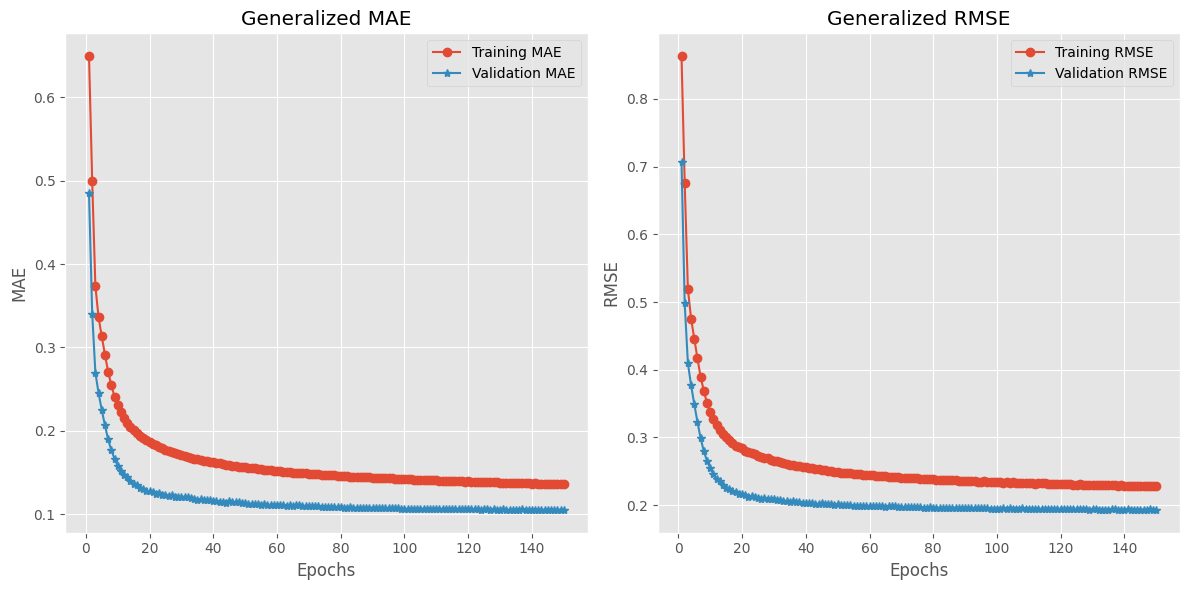

In [13]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1])
    break

In [44]:
# model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
# model_all_train_read.load_state_dict(torch.load('saved_models\model_shared-layer_attention_6.pth'))
# model_all_train_read.to(device)
# model_all_train_read.eval()


In [45]:
# _, _, _, test_loader, _, input_shape_test, _, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon = 6,
#                                                                                     model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)


In [ ]:
# outputs_all_batches, targets_all_batches =  model_prediction(model_all_train_read,test_loader, device, model_type)

In [ ]:
# outputs = torch.cat(outputs_all_batches, dim=0)
# targets = torch.cat(targets_all_batches, dim=0)

# outputs = outputs.cpu()
# targets = targets.cpu()
# # Create a mask where arr1 equals 0


In [ ]:
# mask = (targets == 0.0)

# # Set elements to None (or np.nan for float compatibility)
# targets = np.where(mask, None, targets)
# outputs = np.where(mask, None, outputs)

In [43]:
# # index =4
# for index in range(12):
#     patient1_target = [sublist[index] for sublist in targets]
#     patient1_output = [sublist[index]  for sublist in outputs]
#     # patient1_output = outputs_all_batches[index]
#     # patient1_target = targets_all_batches[index]

#     # print(list(abs_patients_errors_PHs[6].values())[index])
#     # print(list(squared_patients_errors_PHs[6].values())[index])

#     plt.figure(figsize=(13,5))
#     plt.plot(patient1_target)
#     plt.plot(patient1_output)
#     plt.show()

In [5]:


# Instantiate the model for 12 tasks
input_shape = (64, 12, 1)  # Example input shape: batch_size, sequence_length, input_channels
output_tasks = 12           # Number of tasks

# Instantiate the model
model = GeneralizedModelWithAttention(input_shape=input_shape, output_shape=(output_tasks,))
model.to(device)
# Count the parameters
total_params = count_parameters(model)
print(f"Total parameters in the model with {output_tasks} tasks: {total_params}")


Total parameters in the model with 12 tasks: 170892
